In [1]:
from sklearn import datasets  
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
#importing the necessary packages  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB   
#import for display
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import IPython

/home/wlg1fe/anaconda3/envs/markov/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/wlg1fe/anaconda3/envs/markov/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [161]:
np.fromstring(data[:-3], dtype=np.uint8)

/home/wlg1fe/anaconda3/envs/markov/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


array([ 26,  69, 223, ..., 220, 176, 216], dtype=uint8)

In [180]:
X[0]

array([[ 1.5144011e+02,  1.5220279e+02,  1.5175078e+02, ...,
        -6.7051410e+02, -6.7051410e+02, -6.7051410e+02],
       [-4.9441320e-01, -1.6873106e+00, -1.7516959e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-5.4934473e+00, -3.4926369e+00, -2.2002244e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [-8.2359438e+00, -4.2348737e-01,  3.4833102e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-2.7453346e+00,  3.5069859e+00,  3.5929253e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 5.1981318e-01,  4.4735098e+00, -6.1115336e-01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [194]:


a = np.vstack((X, gustav_mfcc.flatten()))
a.shape

(4, 1760)

In [197]:
np.array([]).shape[0]

0

In [196]:
gustav=b'\x004\n?\x00B8\xbf\x00>\x05?\x00\xf4|\xbf\x00\x02\x04?\x00\x12|\xbf\x00\x02\x04?\x00\x1c|\xbf\x00\x08\x04?\x00\x1a|\xbf\x00\x10\x04?\x00\xfcv\xbf\x00\xeeJ?\x00\xc4Z?\x00|q\xbf\x00 \x10=\x00|u\xbf\x00@\xa0<\x000&?\x00\x00O?\x00\x00\xff\xbb\x00\x00\x00\xb8\x00\x00\x00\xb8\x00\x00\x00\xb8\x00*\x12?\x00RM?\x00d\xaa>\x00R\x1c\xbf\x000\xf8=\x00\x84\x00?\x00f\x7f\xbf\x00\x0c\x07?\x00\xd0d?\x00\xdeZ?\x00\xca.?\x00~s\xbf\x00\x86P?\x00\xe4^?\x00\xdaJ?\x00,(?\x00\\W?\x00\x82"\xbf\x00\x0c\xa1\xbe\x00\x80@<\x004\xea\xbe\x00p\xb8=\x00\x84g?\x00\xdc\xd9>\x00P5>\x00\xfa|\xbf\x00\xfcs\xbf\x00\x0c\x03?\x00\xbe\x1e?\x00\xa0*?\x00\xa6F?\x00\xbcX\xbf\x00\x9e`?\x00\xeaf?\x00\x90J?\x00\xc2H?\x00\x80\x00<\x00\x00\x00\x00\x00\x00\t\xbf\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00x\xbe\x00\xe6\x14\xbf\x00\x08\x0f?\x00\x8a\x7f\xbf\x00\x00B\xbf\x00\x80@<\x00\xc4H?\x00\x04\x82>\x00>\x06?\x00lk?\x00\x00\xff\xbb\x00\x00\x00\xb8\x00\x00\x00\xb8\x00\x00\x00\xb8\x002|\xbf\x00\x00:\xbf\x00~s\xbf\x00\x00\x81;\x00\x00\x80\xbf\x00\nx\xbf\x00^=?\x00`0\xbd\x00|\xce\xbe\x00\x88e>\x00\xd6T?\x00|/\xbf\x00\xb4\x9f>\x00P\xc2\xbd\x00\x98\xac>\x00(\xd2>\x00\x08^>\x00\x90*?\x00r\x13?\x00h\'\xbe\x00\x90 ?\x00x\xbb\xbe\x00\xae\x06?\x00\xbe5\xbf\x00\x92\x19\xbf\x00\x08\xc8>\x004\x85>\x00\x88\xe7>\x00x\x99>\x00Vn\xbf\x00>\x1f\xbf\x00\xe0\x15\xbf\x00\xc8\xe2\xbe\x00\xd0o\xbf\x00HC\xbf\x00`\x7f=\x00\xdel\xbf\x00t\x8d>\x00Dm\xbf\x00zR?\x00\xfc\x97>\x00\x02h?\x00\x84[?\x00\x98w?\x00\xc0a=\x00:\x7f?\x00H\xe7>\x00\xcep?\x00\x065\xbf\x00\x08\x02>\x00\xba&\xbf\x00\x10\x07>\x00\xd8\xe6\xbe\x00\x12K\xbf\x00\x0c\x90\xbe\x002:?\x00\xb8I\xbe\x00D\x18?\x00xQ\xbe\x00\x98d>\x00\x90\x96>\x00\xe8\x10>\x00\xda7\xbf\x00x\xc7>\x00D8?\x00\xc2]?\x00\xd0-\xbe\x00hW\xbf\x00\x84\xbe>\x00L8\xbf\x00\xe0p\xbe\x00@\x87\xbc\x00H\xba>\x00<\x8f\xbe\x00\xe82\xbe\x00\x08\x16\xbf\x00 X\xbf\x00\xea=\xbf\x00\xa2\x18\xbf\x00\xbel\xbf\x00vK\xbf\x00\xf0\xb3\xbe\x00(\xa7>\x00\x00\x01\xbd\x00&J?\x00\x80(?\x004\xaa\xbe\x00\xf8\xa9\xbe\x00\x8cU?\x00L\x7f\xbf\x00X;\xbe\x00\xf6H\xbf\x00(\x13?\x00 {?\x00\xbcB?\x00\xf8\x1e\xbe\x00~\x1f?\x00ZP\xbf\x00L\x04\xbf\x00\xea\x16\xbf\x00l\xa6>\x00`\xfc\xbe\x00\x0c??\x00$\x15?\x00D\xb7\xbe\x00(I?\x00\x88P\xbe\x00t\xd0>\x00XR\xbe\x00R\x03\xbf\x00 *\xbd\x00\x96B?\x00j\x10\xbf\x00\x98v>\x00\x0c\xb9>\x00\xb0\x8d\xbd\x00\xb2\x1d\xbf\x00\xa8F?\x00\xfe\x0c\xbf\x00\x00y\xbd\x00\xa0t?\x00\x88\xd5>\x00`F\xbe\x00@\xf3\xbe\x00\xfeq?\x00\x1c"?\x000\x11?\x00t&\xbf\x00\xc4\xe7>\x00\x80\x18\xbd\x00\xf0\xad\xbe\x00\xbcJ\xbf\x00~]\xbf\x0083\xbe\x00\xee\t\xbf\x00\xf8\x1d>\x00:#\xbf\x00\xa0a\xbf\x00\x10\x84>\x00x\x0c?\x00\xa0\xb8\xbd\x00\xb0B?\x00"2?\x00\x94\x89\xbe\x000u>\x00\xe0\xbd=\x00hR?\x00\x02L?\x00\x10q\xbe\x00\xec\xf0\xbe\x00\x80*<\x00\xd8\'\xbf\x00\x00X=\x00\xd0%\xbf\x00\xb28?\x00\xd4\x00?\x00\xbcV\xbf\x00\xfaU?\x00\xecm?\x00\x80Q>\x008\x80\xbe\x00^\x7f\xbf\x00\xaa\n\xbf\x008s\xbf\x00@\x81\xbe\x00\x0c$?\x00l4?\x00\xfe\x1f\xbf\x00"0?\x00\x90)?\x00\x80\x1d\xbf\x00rb?\x00"\x00\xbf\x00\xa0\x05=\x00@i\xbd\x00\x92d?\x00\x08\x0f>\x00\x10%\xbf\x00\xacl?\x00P\x85=\x00&\x11\xbf\x00\x00\x82<\x00\xc6e?\x00\x00\xf5>\x00 \xda=\x00b1\xbf\x00\xdc\xf8>\x00\xe0y=\x00\xe8\xb9>\x00\x04\xcb\xbe\x00^T?\x00\x90\xaf\xbe\x00\\V\xbf\x00x\x08?\x00\xd4\xa0\xbe\x00\xe0u?\x00\xcc\xf6\xbe\x00\xdcH?\x00F\x03?\x00\xfa|\xbf\x00\x00\xf0>\x00\x00\x10\xbd\x00\x06B?\x00\x04j?\x00rn?\x00>g\xbf\x00\x98\x14\xbf\x00\xd4}\xbf\x00\xf4N\xbf\x00|\xc6\xbe\x00\xa0h?\x00h\x96>\x00\xdc\xc1\xbe\x00\xdc\x17?\x00\xd09\xbf\x00\x1a\x10\xbf\x00\xcck?\x00\xe8+\xbf\x00\xe0f>\x00Xc\xbe\x00d]\xbf\x00d\x99>\x00\xbc\xf1\xbe\x00\x10\x98>\x00\x10\xa2>\x00\x8e\x04?\x00(6?\x00\x00\x8c;\x00\x80W<\x00\x88\x85>\x00\x14\xde>\x00\xf0\xac=\x00p\xd4\xbd\x00 \xb2\xbd\x00\x90\x0f>\x00\xa87\xbe\x00\xf0\x8d\xbe\x00\x9ca?\x00,\x00\xbf\x00xZ\xbf\x00\xcc\xb3\xbe\x00\xb0\x04?\x00\xe8b\xbf\x00\x04\x9b>\x00 G=\x00h\x00\xbe\x00`r>\x00\xc8T\xbf\x00\xd8\x8d\xbe\x00\x8c\xd2\xbe\x00V\x04\xbf\x006[\xbf\x00\x04\xb6\xbe\x00\xc0\xfc=\x00"\x1a\xbf\x00@\xe6\xbd\x00\xf6q?\x00\xe8@>\x00\x06\x1f?\x00\x946?\x00\x0ef?\x00\xc8}\xbe\x00~\x0f?\x00\x1c\x18?\x00\x90A>\x00Lo?\x00\x80\xd1>\x00\xda(?\x00\xc0\x01\xbe\x00\x04\xbe>\x00\x08|\xbf\x00\x88\x06?\x00d\xc7\xbe\x00\xf0\xa5>\x00"{?\x00\xb84>\x00\xd4^?\x00p\\>\x00tH?\x00\xd6p?\x00\x00\xc4<\x00\x00\xd9<\x00:K\xbf\x00 \x85>\x00\xc8\xa7\xbe\x00\xca0\xbf\x00HH?\x00\xc0\xa1=\x00\xf2i?\x00\xd0\xbe\xbe\x00\x18\x1d?\x00\xa0\xdf\xbd\x00\xa0?=\x00@\n\xbd\x00\xa0;\xbf\x00\xfa-?\x00\xb0\x9d\xbe\x00F \xbf\x00hO\xbe\x00lr\xbf\x00\xa0\xe3>\x00\x928?\x00z[?\x00\xc0\x02\xbe\x00\xfe\x0c?\x00 +=\x00\xb4\xc7>\x00\xf0\xb5>\x00\x98k\xbf\x00\xe8l\xbf\x00x)?\x00,S\xbf\x00\xc8.>\x00\xc8D?\x00\x98\xf3>\x00\xbc\xdc>\x00\xf8i\xbf\x00Rv?\x00\x08\xbf>\x008;?\x00*R?\x00t\xf4\xbe\x00\xe01\xbf\x00<*?\x00\xb4\xf8>\x00\n\'?\x00\xa0)\xbf\x00\xa4\x08?\x00L\xcd>\x00H\xe0\xbe\x00Zt\xbf\x000U\xbf\x00r\x1e\xbf\x00bP?\x00Xu>\x00\xf03>\x00Bu?\x00&m\xbf\x00\xd8\xe1>\x00\xa0)\xbf\x00@\xd8<\x008K\xbe\x00RJ?\x00\xe0]>\x00r8?\x008\xa0>\x00\xec\xc5>\x00\xa0I\xbf\x00\x0c\x8a\xbe\x002:\xbf\x00([>\x00L4?\x00\x1c\x88>\x00\x00\x08>\x00\xc6h\xbf\x00h\x08\xbe\x00\xc0\x13\xbe\x000\xbf\xbe\x00$1?\x00^\\\xbf\x00P\x14?\x00\xac\x9a\xbe\x00\n\x0c\xbf\x00\xcc.?\x00\xa2\x16\xbf\x00\x90}\xbe\x00\x84&?\x00\xbc\x91>\x00\xc2[?\x00l\xa9\xbe\x00:"\xbf\x00`h>\x00,L\xbf\x00x\x0b\xbe\x00\xbeR\xbf\x00\xe0\x91\xbd\x00*g\xbf\x00\xac\xe1>\x00\xac\x85\xbe\x00bi?\x00\xc0\xbb<\x00\x104\xbf\x00\xf85\xbe\x00\xb4\x85>\x00 \xe4>\x00\xc8m>\x00\xa8K>\x00\x1e\x06\xbf\x00\x88e>\x00zF?\x00 2\xbe\x00\xb0\x05\xbe\x00\xb0\xe4\xbd\x00F\x03?\x00\xfa|\xbf\x00\x00p?\x00\x00\x10\xbd\x00\x06@?\x00\x86b?\x00\x06f\xbf\x00\xf8F\xbf\x00 \x98\xbe\x00`\x86\xbd\x008\x08>\x00p\xfd>\x00pT\xbf\x00ZY\xbf\x00\xac)?\x00~d\xbf\x00\xe0\x96=\x00\x88z\xbe\x00@(\xbd\x00\x8c\x8d\xbe\x00\xb0\xf7=\x00\xa87>\x00\xf8\xd0>\x00\x9cl?\x00\xfen\xbf\x00\xe6B\xbf\x00@\x03>\x00\xf8\x02\xbe\x00\xd4\xb3>\x00\x9e1?\x00\xec\xe4>\x00<\x83\xbe\x00`E\xbe\x00`\x0b\xbe\x00\x16[?\x00\x94!\xbf\x00\x08V\xbf\x00\x00G\xbc\x00\x8ce?\x00h\x99>\x00\xa0b\xbd\x00RD\xbf\x00z$?\x00N$\xbf\x00\x14B\xbf\x00D\xb8\xbe\x00\xe8Q\xbe\x00p\xc9\xbe\x00\x8cP?\x00`\xb5\xbe\x00\xa04=\x00\xc8V\xbe\x00\xc0\xad<\x00\xd4\x02?\x00\xcc\xab\xbe\x00\xb2r\xbf\x00\x98\x16?\x00`\xbf\xbe\x00X\xb5\xbe\x00\xa0Y\xbd\x00\xa8\x12>\x00&x?\x00\x0eC?\x00\x9ce\xbf\x00\xf8"\xbe\x00>X\xbf\x002i\xbf\x00l\xb3\xbe\x00@\xa8\xbc\x000\xc2>\x00xW\xbf\x00z\x05\xbf\x00\x98\xf9\xbe\x00\xb2Y\xbf\x00\x94\xfb>\x00\xf8#\xbe\x00\xf8m\xbe\x00\xf0\xfc>\x00l??\x00\xa8\xc3>\x00\x90\xbe=\x00\x08\x07\xbe\x0087>\x00\xf0\xfa\xbd\x00.[\xbf\x00\xf0\x12\xbf\x00xd\xbe\x00\x04\xe1>\x00\xfa\x1c?\x00\xd2p?\x00\x88\x7f>\x00,\xce\xbe\x00P\xff>\x00\xd2\x0c?\x00\xe2p?\x00\x1c\xc5>\x00`L?\x00,\x83\xbe\x00\x0c\x13\xbf\x00t7\xbf\x00\x00%>\x00\xfeE\xbf\x00\x00\xf4=\x00@#=\x00\xf4\xbc\xbe\x00t\x19\xbf\x00`\x82\xbe\x00\xb0\x1a>\x00\xe8P\xbe\x00\x8c\xc3\xbe\x00\xe0B\xbe\x00\xfcq\xbf\x00\xa4\x12?\x00DD?\x00p\xae\xbd\x00\xde\x0e\xbf\x00 f\xbd\x00Zb\xbf\x00\x86H?\x00\xe8R\xbf\x00\x94(?\x00\xb4\xde>\x00(n\xbe\x00\xa69?\x008*\xbf\x00\x8eG\xbf\x00\xe6\x02?\x00\x08V\xbe\x00V&?\x00\x800<\x00T\xfe\xbe\x00\x8e<?\x00\xc0\x9d<\x000\x17>\x00\xcc\xd2>\x00\xa0\x1b\xbe\x00\x00\x0e<\x00\x94.?\x00\xde??\x00\xa89\xbf\x00L\xee\xbe\x00Tk?\x00H\x01\xbf\x00^|\xbf\x00He\xbe\x00\xae \xbf\x00\xa0<=\x008\x7f\xbf\x00`\xa6\xbe\x00,\xaa\xbe\x00\x88\xdb\xbe\x00Na?\x00\xb2c?\x00P\xca\xbd\x00\xd8Q\xbf\x00\x00\xe6<\x00\xcc\xac>\x00\xc8\r>\x00X\xce>\x00`e=\x00~\x1f\xbf\x00|\xf9\xbe\x00\x84T?\x00\xc8\\\xbe\x00\xa2(?\x004s\xbf\x00\xb4\xcc>\x00\xb2_?\x00\x00,=\x00\xf8\x7f>\x00 \x8f=\x00\xb4\xe5>\x00ld\xbf\x00\xfeG\xbf\x00\x9c\xa3\xbe\x00"D\xbf\x00\xb8\'?\x00To\xbf\x00\x94\xd8>\x00\xb0\xb0=\x00|\xc6\xbe\x00\xe0\x7f?\x00h\x18\xbf\x00\xf2\x10\xbf\x00X\x08\xbe\x00\x86\x1e\xbf\x00tR\xbf\x00\x04u?\x00\x00?<\x00:J?\x00.X\xbf\x00\xe4\x97>\x00Ra?\x00\x10,\xbf\x00\xd4\xb3\xbe\x00F\x03?\x00\xfa|\xbf\x00\x00\x18\xbf\x00\x00\x10\xbd\x00\x06@?\x00\xd0O\xbf\x00x\xb1>\x00\n|\xbf\x00F|?\x00\xa0\xb2\xbd\x00\xe4\xfd\xbe\x00\xa8A\xbe\x00p\xf1\xbd\x00D\xcc>\x00\n>\xbf\x00\x80~\xbc\x00\xb8\r?\x00\xdeC\xbf\x00\xecg?\x00\x1eF\xbf\x00,\xae\xbe\x00\x04\x8c>\x00\\*\xbf\x00\x98*\xbf\x00\\\x07?\x00@\xc0\xbd\x00\np?\x00l$\xbf\x00\xda\x02\xbf\x00J9\xbf\x00 \x06>\x00\xb8\xae>\x000V\xbe\x00\xac\x04?\x00.}?\x00\x02L\xbf\x00\x10\xa5>\x00\x00\x10\xbf\x00>2?\x00\xd2 \xbf\x00\\\xb8\xbe\x00\xf6I\xbf\x00\xa0#\xbd\x00\x00|\xbf\x00\xf8T\xbe\x00\x1c\x82>\x00\x14\xe9\xbe\x00b:?\x00 E\xbd\x00\xb4\xe0\xbe\x00\x00\x0b?\x00\xcev?\x00\x8cm?\x00D6\xbf\x00xm>\x00l>\xbf\x00\x8c\x94\xbe\x00\x80<=\x00(3?\x00tV\xbf\x00\xf6C\xbf\x00\xd8\xaf\xbe\x00L;?\x00l\xd6\xbe\x00\xa04\xbd\x00\xa4w\xbf\x00|w\xbf\x00\xc0i\xbf\x00\x80\xb1>\x00tb?\x00 d?\x00P\x93\xbe\x00\x18+\xbe\x00Zv?\x00\x80\xb6>\x00@\xba\xbc\x00\xb0\xb1=\x00\xc2\x1a\xbf\x00H%>\x00h\xb2>\x00\xc0W>\x00,Z?\x00\xec0?\x00 \t>\x00\x00\xfd;\x00\xc06\xbf\x00|\xcc>\x00\xccb\xbf\x00~s?\x00\xa8}?\x00\x80\xfb\xbc\x000\xd2=\x00\x92x?\x002.?\x00X*?\x00\\=?\x00p\xe3\xbe\x00\xa0!\xbd\x00\xdaF\xbf\x00\xe0\xbe=\x00P;?\x00\x1c9?\x00\x08\xad\xbe\x00\xc4*\xbf\x00\nb?\x00\xf0\xb3\xbe\x00\xe8\x15>\x00\xd4I\xbf\x00\xda\x11?\x00\xf0\xc4\xbe\x00\xf8e\xbf\x006O?\x00\xf0c>\x00\x1e\x05?\x00@\x8a\xbe\x00\x00h>\x00\x90>\xbe\x00rc?\x00x\xdf\xbe\x00p\xdf\xbd\x00X\xa2>\x00\xaaZ\xbf\x00\xc8\x1f\xbe\x00\x00}<\x008x\xbe\x00L~\xbf\x00H\xf9\xbe\x00\x98\n\xbf\x00,v\xbf\x00\xc4\xd9\xbe\x00B\x0c\xbf\x00\xfaA?\x00r2?\x00 \x12?\x00\x80k=\x00\xb0\xd8>\x00\xa4\xe5\xbe\x00\xd0\xf6\xbe\x00Xk?\x00\xba8?\x00\x9eJ?\x00\xf0w\xbf\x00\xbc\x1a\xbf\x00\\g\xbf\x00\x10\xab=\x00H\x9a\xbe\x00\xee,?\x00\xd8\x80>\x00\xa6*?\x00\xc4o?\x00\xda?\xbf\x00\x00\xdf;\x00\x00\x8b\xbb\x00\xd4\x82>\x00H\xb5>\x00\x9c[?\x00\xc0G\xbe\x00\xc8\x88\xbe\x00\xf0\xbe\xbd\x00T\xfe>\x00\xc0g\xbe\x00\xaa~\xbf\x00\xb8)>\x00 \x93=\x00\xe8B?\x00\x16\x08?\x00\x1cb\xbf\x00\x9c,\xbf\x00\xb0\xa4\xbd\x00\\\xf9>\x00\xc8_\xbf\x00\xb2\x1f\xbf\x00\xac\xe9\xbe\x00h\x1d>\x00V\x1d?\x00@\x8d\xbd\x00X\x1d\xbe\x00\xd8\xab\xbe\x00\x16*\xbf\x00\x98|\xbf\x00\x9c+\xbf\x00\x10o\xbe\x00F\x07?\x00\x9c4?\x00X\r>\x00Z\x17\xbf\x00 z\xbe\x00<\xe0\xbe\x00\xfcH\xbf\x008\x80\xbe\x00\x14q?\x00\x10z>\x00\xb4J\xbf\x00\xc6\x0b?\x00@.=\x00F\x03?\x00\xfa|\xbf\x00\x00\x00\xbe\x00\x00\x10\xbd\x00\x06B?\x006h?\x00 \\\xbf\x00\x0c/?\x00x\x1f?\x00\xcc\xee>\x00@\xb2>\x00\xb0\xc4=\x00@\xed\xbe\x00\xa8;>\x00\x94\xec\xbe\x00P\x8d>\x00L\xde\xbe\x00.\x0c\xbf\x00\xd0\xbe\xbd\x00\xdc\xcf\xbe\x00\xc0b\xbf\x00,\x88>\x008C>\x00\x04\x17\xbf\x00\xb0\xe2=\x00\x80\x08\xbd\x00\xc8:\xbe\x00\x00\x16\xbb\x00\x80\x03\xbe\x00vG?\x00xB>\x00<\x00?\x00\x9e\x1c?\x00\x00>;\x00@\xd0\xbc\x00\xe08?\x00x*?\x00p\xf1\xbd\x00h\xb9\xbe\x00\xe0m\xbe\x00(\xce\xbe\x00\x8eu\xbf\x00\x1a\x1e?\x00\xdc\xb1>\x00\\\x95>\x00\x8c\x88\xbe\x00(~>\x00\x00\xf8<\x00\xa4Z?\x00\xa8\x08\xbe\x00\xe0\xe4\xbe\x000\xe9\xbe\x00\x0c!?\x00\xa0\x17=\x00P[\xbe\x00\xf8\x1b\xbe\x00\xe0\xbe\xbd\x00j\x08?\x00\xe0e\xbd\x00~X\xbf\x00\x1c\x8b>\x00Dd\xbf\x00\x1a~\xbf\x00\x80\x16\xbd\x00 \x0e\xbf\x00>A?\x00\x047?\x00\x10\x17?\x00\xc2t?\x00\xb4\xb6>\x00\xf0\xc2\xbe\x00X\x1b>\x00\xec\xff>\x00H!\xbf\x00\xbal\xbf\x00r;?\x00\x8aN\xbf\x00\xc2A?\x00\x80\xf5\xbc\x00(\xc1\xbe\x006I?\x00Ho\xbf\x00\xa2\x15\xbf\x00\x80A?\x00X\xf2>\x00\xaa\x1e?\x00z)?\x00l\x16?\x00\xc6f?\x00\x9c\xa5\xbe\x00\xd0K?\x00P\x84\xbe\x00F\\?\x00\x80\x89\xbe\x00\xb8I>\x00 \xee>\x00\xc0\xce<\x00P\xb8=\x00\x00B=\x00\xd0\x90>\x00\x04\x0b?\x00\xccX?\x00h-?\x00\xb87\xbe\x00\xcaE\xbf\x00 w>\x004\x99>\x00x\xf3\xbe\x00\x9a4?\x00Z\x1a\xbf\x00\x88\'?\x00\x10q\xbe\x00\xe6/\xbf\x00l\xcb\xbe\x00@k\xbd\x008\xd5>\x00\xbc\xe0>\x00@\xe6\xbe\x00VN\xbf\x00\xdc\x15?\x00\xc0\xd2<\x00\x14\x1a?\x00pg?\x00X\x08>\x00H9?\x00\x8c\xc3>\x00 )?\x00\xcc\xb4\xbe\x00\xb2r\xbf\x00\xd4\'\xbf\x00T\x91\xbe\x00\x12C?\x006N?\x00\x88_\xbf\x00N\x1e?\x00\xd8h\xbe\x00 <\xbd\x00N]\xbf\x000_\xbe\x00`\xb4>\x00P\xb8=\x00\x08^\xbf\x00\x88S>\x00\xe0U\xbe\x00 \xd3\xbe\x00\xbc\x16\xbf\x00\x9e??\x00f\x11?\x00\x16x\xbf\x00\x0c\x0f?\x00\x92J?\x00\x98M>\x00\xa4\xb1>\x00N,\xbf\x00JG?\x00\\\x16?\x00\x80\x07<\x00X\x8b>\x00\x8cd\xbf\x00\xbep\xbf\x00\x06\x0b?\x00x\x0e?\x00`\xd2>\x00\x96"?\x00P\x02\xbe\x00\xaaF?\x00\xc8<?\x00T\xdf\xbe\x00R\x01\xbf\x00j-?\x00Xp\xbe\x00hh\xbe\x00\x00\x93\xbc\x00\x90\x1b?\x00\x80\xf4=\x00p-\xbe\x00\x00|>\x00\xd0|\xbf\x00\xa6\x12?\x00d\x1a?\x00\xa88\xbf\x00$_\xbf\x00\x80\x11?\x00\xf0\x82=\x00Jp?\x00X\xbc>\x00@\r\xbe\x00jM?\x00\xda%\xbf\x00\x00\xca\xbe\x00\xd8\xb2>\x00\x8a\x08\xbf\x00\xc0f?\x00\xd0\x9f=\x00P\xeb>\x00F\x03?\x00\xfa|\xbf\x00\x04\xac>\x00\x00\x10\xbd\x00\x06B?\x00\xf4R?\x00\xf4`?\x00\x00-\xbf\x00\x1c\x8f>\x00FJ\xbf\x00\xac\x8e>\x00\\\xd8\xbe\x00"\x16\xbf\x00`\x1d>\x00\xe8\x16\xbe\x00\x00\xc8;\x00\x96\n?\x00\x085>\x00\xd0d\xbf\x00h\\\xbf\x00l\x01\xbf\x00\x80f\xbc\x00\x00\xe1\xbc\x00\xb2W\xbf\x00\xac\xa5>\x00\xccj\xbf\x00\xdey\xbf\x00\xc4\xc7>\x00\xf0->\x00,h?\x00\xac\xc4>\x00\x80\xfb\xbc\x00fw\xbf\x00h\xa1>\x00\xa8\xd8\xbe\x00\x90\x95>\x00\xe0D\xbe\x00\xc8\x1d>\x00\x0c\x97>\x00\x020?\x00\xe0i>\x00\xeaU?\x00&F?\x00\x1aZ\xbf\x00\xe0\x7f=\x00@\xde>\x00X\x08?\x00\xeaP\xbf\x00\x90\xe5>\x00\x10z?\x006J?\x00P\x82\xbd\x00^P\xbf\x00p\xfd\xbd\x00*j\xbf\x00\xd4|?\x00`K=\x004\x87\xbe\x00p\xd2>\x00\x9a\x1d\xbf\x008\xee>\x00\xdcm?\x00\xa0@=\x00,\x15\xbf\x00\xf48\xbf\x00\x10\xdb=\x00@B>\x00\x82H\xbf\x00D\xfe\xbe\x00`\x1d>\x000\xce\xbe\x00\xc0\xf2\xbd\x00p\xc0>\x00LW\xbf\x00P\x18\xbe\x00(\x1c\xbf\x00\x14\xe1>\x00\xbe.\xbf\x00\xd4S\xbf\x00\x88\xd4\xbe\x00"\x18\xbf\x00NF?\x00&r\xbf\x00\x00:\xbe\x00\xde!\xbf\x00\xe8\xde>\x00\xa8h\xbe\x00\xd0_?\x00\xe48?\x00\x80\x12\xbd\x00P:?\x000\xed>\x00\xa8I\xbe\x00dC?\x00\xda??\x00\xf0-\xbf\x00\x80\x08>\x00P4>\x00\xf0f>\x00\x80\xc4=\x00rS?\x00R{\xbf\x00\x98\xc1\xbe\x00\xd2q\xbf\x00\xb0&\xbf\x00\xbe6\xbf\x00x\xb2>\x00\x8e2\xbf\x008\x02\xbf\x00\xaar\xbf\x00\x90;>\x00@\x17\xbd\x00\x86S?\x006~?\x00\xb0v\xbe\x00\x905?\x00x,\xbf\x00X\x12\xbf\x00\x00Y\xbd\x00\x10*?\x00\xce]\xbf\x00\xf4W\xbf\x00 \x9a=\x00\xb8\x1e\xbe\x00X\xd5\xbe\x00\xf01?\x00J\\\xbf\x00\xc4\x17\xbf\x00\xf85?\x00hd>\x00\x90\xb6\xbe\x00$5?\x00@~\xbd\x00\xba9\xbf\x00@\xea>\x00\xbek\xbf\x00\xa4\x10\xbf\x00\x10l?\x00*$\xbf\x00\xf2[\xbf\x00\x98r>\x00\x94\x15?\x00\xa0\xa9>\x00\x0eA?\x00\x04\xde>\x00\xe6\x1b\xbf\x00(i?\x00p\xe8=\x00.\x1e?\x008v?\x00\x1c\xf9>\x00\x12\x14\xbf\x00Jj\xbf\x00@W>\x00n\x05\xbf\x00\xe4\x9c>\x00\xd8Q>\x00\x00G\xbf\x00\x9eV\xbf\x00\x80d>\x00Zr\xbf\x00$k\xbf\x00`\x10\xbf\x00z,\xbf\x00\x10[>\x00P\x94=\x00t\xa8>\x00p\xe7\xbd\x00\x80\x1c\xbc\x00\xde>\xbf\x00\xe0\n\xbe\x00\x90\x9f=\x00\xb8\x81>\x004R?\x00ni?\x00\x0eX\xbf\x00\xd4s\xbf\x00(*?\x00\xb0\xd7\xbd\x00\x98Y>\x00\xf8+\xbf\x00`\xa3\xbd\x00\xd84?\x00t\x94>\x00>\x1e?\x00\xce\x1d\xbf\x00\x8a\x16?\x00PC>\x00\x10\xe9\xbd\x00\xd8G>\x00ti\xbf\x00D\xe8>\x00\x04\xef\xbe\x00\xd6\n?\x00@y\xbe\x00F\x03?\x00,|\xbf\x00\x02N?\x00\x00\x10\xbd\x00\xf4\xc1\xbe\x00^\x7f?\x00l`\xbf\x00\x0c\x8b\xbe\x00\x0cp\xbf\x00\xa2\r\xbf\x00\x94R\xbf\x00\xe0\x12\xbd\x00\xe8b\xbe\x00@^\xbd\x00\x8c\xb6>\x00 \xac>\x00\xc0^\xbf\x00D\x86>\x00\x10N>\x00\xf0.\xbf\x00\x02\x19?\x00>\x07?\x00\xe0}>\x00lp?\x00\x9e\x10\xbf\x00\xc0\x84\xbd\x00\xa0|>\x00\xc4a?\x000j?\x00H\x1c\xbf\x002\x00?\x00\xf4\x94>\x00\x00!\xbe\x00\xb4K?\x00\xf8\x13\xbe\x00\xe0#\xbe\x00\xc08\xbe\x00~X\xbf\x00\xa2y\xbf\x00\xfe0\xbf\x00\x9c\x01?\x00@i>\x00\x94\xc5\xbe\x004\xe5\xbe\x00\x98\xa6\xbe\x00\xda\x04\xbf\x00\xa8\xdc>\x00H+>\x00Vx?\x00\xe8\'\xbe\x00n\x1f?\x00@\x1a=\x00\xd4x?\x002\x1c\xbf\x00\x94\xf8>\x00@b?\x00\x10%>\x00\xf6N\xbf\x00\xbc\x18\xbf\x00@\x90\xbe\x00D\x10?\x00\x180\xbf\x00\xd0\xd3\xbd\x00\x86;?\x008\x1e\xbf\x00\xe0w\xbe\x00\n.?\x00\x00\xb7<\x00\xf8\xd7>\x004\xb6\xbe\x00\xa0g\xbd\x00\xf6G?\x00p\xcc\xbd\x00\xf8\x19\xbf\x00\xa0U?\x00\nt\xbf\x00,0?\x00\xac\x88>\x00\x149?\x00\x0ew\xbf\x00\x0c.?\x00\xf8\xab>\x00\xe8\xed\xbe\x00zW\xbf\x00x\xe8\xbe\x00\x10u>\x00\x12e?\x00@\x81>\x00\xc8\x96>\x00\xde\x0c?\x00\xb4\xb0>\x00^J?\x00jD?\x00\xbc\xdd>\x00Tn?\x00`S\xbf\x00\xc0\xb5\xbc\x00\x90\x15?\x00\xa8/\xbf\x00:V?\x00\x08W>\x008|>\x00`\x1c=\x00\xea%\xbf\x00\xc24?\x00ZS?\x00\x80~=\x00vR\xbf\x008\x85>\x00\x06}\xbf\x00x\x0f>\x00 \xd5>\x00\xf0\xad=\x00\x10\xeb\xbd\x00\x022\xbf\x00\x18\x01?\x00\xec\xdd>\x00`*\xbd\x00ZL?\x00\xe8\x13?\x00 y?\x00\x8c\x9b\xbe\x00\x8a.\xbf\x000\x14?\x00\xe0\xb9\xbd\x00`J\xbe\x00\xec\x08?\x00 \xf2\xbd\x00\xf8m?\x00\xc8\x0f?\x00\xe0\xfb>\x00@H\xbf\x00n\n?\x00$\x85\xbe\x00\xdc\x12\xbf\x00\xf8\x1d>\x00\xea\x1d\xbf\x00\xf0??\x00LN?\x00\xa2\x19\xbf\x00\x805>\x00\x90D?\x00T$\xbf\x00\xe0 \xbe\x00\x00\xab\xbe\x00\x08,\xbf\x00\x08g?\x00\xa8 \xbf\x00\xee%?\x00\xa4T?\x00pb?\x00\xa0\x04\xbf\x00\xb0\x00>\x00\x860\xbf\x00*)\xbf\x00\x18e\xbf\x00\x00\xb6<\x00\x90\xad>\x00\x88\xe8>\x00\xb0\xda=\x00\x1c\x08\xbf\x00\x98\x9b\xbe\x00x}>\x004\xab\xbe\x00\xe8>>\x00\xc8\xf3\xbe\x00l\x99>\x00`\x15?\x00\xfc\x88\xbe\x00t\xe7>\x00\xfeZ?\x00\x16Q\xbf\x004E\xbf\x00\x00\x1f<\x00\xa8m?\x00\x10\xf5=\x008\xe1\xbe\x00\xe2~\xbf\x00\x1a+\xbf\x00\xfc\xe9\xbe\x00\xc0\xf9=\x00 \x82\xbe\x00\xba\x07?\x00\x94M?\x00\xee\x19\xbf\x00\x102\xbf\x00\x90\x01?\x00\xfc\xf6\xbe\x00\xa4g\xbf\x00d\xc5\xbe\x00\x08[\xbf\x00\x90\x9a>\x00\xe03>\x00@$\xbf\x00\xa0;>\x00:I?\x00ZB?\x00B\n?\x00\xf4f?\x00\xa0\xd4\xbd\x00\xe4\xdd>\x00\x0c\xad\xbe\x00\xd0\x1d>\x00<>?\x00xb\xbf\x00,U?\x00\xbcl\xbf\x00\xbc\x83>\x00P\xdc=\x00\x9cx?\x00\x8c\xae\xbe\x00\xc4*?\x00\xbaW\xbf\x00hm>\x00~(\xbf\x00\x10X>\x00\x1c\xc6>\x00\xc8\x19>\x00T\xde>\x00\xa8"?\x00|\xd2\xbe\x00X\xdc>\x00\x88L\xbf\x00H\x17\xbf\x00\x08\x13\xbf\x00\xc8\xf8>\x00\x14$?\x00\xf2m\xbf\x00`\xaa>\x00\xc4\xec>\x00\xb2\x0e?\x00\xfa ?\x00\x1cf\xbf\x00\x087\xbe\x00@`\xbd\x00fL\xbf\x00\x80O>\x00T,?\x00\xd0]>\x00\xe6:\xbf\x00\x00\x1a\xbf\x00^S?\x00\xa8\x85\xbe\x00\xd6L?\x00\x90r>\x00\xa4\xed\xbe\x00\xaa8\xbf\x00 (=\x00\x80@<\x00\xba~\xbf\x00\ny\xbf\x00\xfc\x00?\x00\xa8/\xbe\x00\xf0\xad\xbd\x00\x184\xbf\x00\x00\xe8=\x00\xd2\x08?\x00\x00\xcf\xbc\x00\xd4\xcc\xbe\x00(??\x00\x98\xae>\x00\xd0=\xbe\x00 a\xbd\x00\x96F\xbf\x00\xcc\xdd\xbe\x00\x80\xa0<\x00j5?\x00 b>\x00\x8a ?\x004h\xbf\x008\xec>\x00\xd0~\xbf\x00\x90\xcf=\x00\xa4\xc3\xbe\x00\xf8+?\x00\x94\x82\xbe\x00\xe0\x0c>\x00po\xbe\x00\x86v\xbf\x00\xa0\xb0\xbd\x00,\x10\xbf\x00\xbcA?\x00\x84C\xbf\x00\xe0\xee\xbe\x00v\x16?\x000\xb3>\x00N\t?\x00FM\xbf\x00t\xd6\xbe\x00\xdah\xbf\x00Rd?\x00\xa2`\xbf\x00\x16|\xbf\x00D\xd4>\x00\xe0^?\x00\xcc\xe4\xbe\x000o?\x00\x1az?\x00Pu\xbe\x00\xb8.>\x00`\x17>\x00\xbau\xbf\x00\x86:\xbf\x00\xc0{?\x002`?\x00T\x8f\xbe\x00\x00A=\x00\x0c\xa5>\x00v4\xbf\x00\xc0F>\x00\x8a\x05\xbf\x00\x84\x9b\xbe\x00\xe8u>\x00z(\xbf\x00\xe0\x16\xbe\x00\xf0\x07\xbf\x00\xa2I\xbf\x00\xc0\xa5\xbd\x00H\xb3>\x00|\xb4\xbe\x00\x8c\x18?\x00\xe00\xbe\x00d\xff\xbe\x00F??\x00\x94\x85>\x00f\x7f\xbf\x00~N?\x000Y>\x00\xc0%>\x00\xf8\x01\xbe\x00(=\xbe\x00r\x1c\xbf\x00\x90m>\x00<=\xbf\x00(\xed>\x00Jr?\x00\xc8\xff\xbe\x00\x00x:\x00Zy?\x00\xcc\x97>\x00\xc0\x19>\x00\xa0\xf3>\x00\xa0Q>\x00\x98\xb4\xbe\x00\x8c\x1d\xbf\x00\xf8\xae>\x00\xb6~\xbf\x00\xf0\x07\xbf\x00\xd0\xb7\xbe\x00\x08\xef\xbe\x00`$\xbd\x00\x80\x94<\x00\x80<=\x00\x80T\xbf\x00 \\>\x00\x00\xa7;\x00\xfc\xee\xbe\x00\x80\x7f<\x00\xf0\xca=\x00L\xb1\xbe\x00\xf8\xf8\xbe\x00\x96M\xbf\x00\xaa\x0b?\x00\xbea?\x00\\\xff\xbe\x00\xfc\x17?\x00\x88\xea>\x00\xd8A\xbf\x00T\xc1\xbe\x00Rg\xbf\x00j\x17?\x00F1\xbf\x00H\xdd>\x000}\xbe\x00\xf4\xf6\xbe\x000\xd2>\x00XU\xbe\x00\xee5\xbf\x00\xf48\xbf\x00\x00\xfc\xbd\x00\x80@<\x00B~\xbf\x00\ny\xbf\x00\x92\x14?\x00\xf0\t\xbf\x00\xe4\x8b>\x00\xc2x\xbf\x00\xde\x1f\xbf\x00\xfa=?\x00\x96w?\x00\xa6\x05?\x00@\x15\xbd\x00x\x1a\xbe\x00\xfaK?\x00^{?\x00&\x13\xbf\x00`\x14\xbf\x00\xd4Z\xbf\x00\x84\xc5\xbe\x00\xf6{\xbf\x00xC>\x00\x10\x9b=\x00h\xd0>\x00\x88\xfb>\x00\x02\x0b?\x00$\xfd\xbe\x00\x90d\xbe\x00\xb8\\\xbf\x00\xf0=?\x00 \x92=\x00\x90\x83\xbd\x00<\xe7>\x00\xd0O\xbe\x00\x00\x98\xbd\x00^_\xbf\x00\xc8\x02?\x00\xec\x83>\x00nB?\x00\x80\xa8\xbe\x00D\x15\xbf\x00@\x88=\x00\xf0\xee>\x00\x94\x1a\xbf\x00(3\xbf\x00\x08(\xbe\x00\xee\x19?\x00\x00\x18?\x002M?\x00\x8c\x1e?\x00f~?\x00$\x1a?\x00\xf2:?\x00` ?\x00x\x80\xbe\x00:Q\xbf\x00vq?\x00\x98\x94>\x00Z#?\x00\x84\x08?\x00\x12^\xbf\x00\x1a3?\x00\x10\xbe=\x00\x00\x86\xbb\x00\xb0\x7f\xbe\x00`\xdf\xbe\x00\x00\xc2\xbe\x00@\x1c>\x00\xb2e\xbf\x00\xae%\xbf\x00\xb0\xfb\xbe\x00\x80\x94<\x00\xc0\xce>\x00\xa8K\xbf\x00\xc8g\xbf\x00\xd0h>\x00@q\xbf\x00\xd2w\xbf\x00p\x83=\x00P\xcb>\x00\x9c ?\x00p\xda=\x00\x9c\xa3\xbe\x00\x163\xbf\x00t\x93>\x00\x00w?\x00\xc4h\xbf\x00\xe4t?\x00<\xc4>\x00\xa0_=\x00("\xbe\x008\xdd>\x00^\x16\xbf\x00$\xf0>\x00\xbc\n?\x00\xc0\xbb>\x00@\xd7<\x00\x00O<\x00zs?\x00\x94\xdb>\x00>i?\x00\xceF\xbf\x00\xc0\x93<\x00\xc8\x07\xbe\x00p\x14\xbf\x00\x1c\xc4\xbe\x00 \xf7\xbe\x00\xa0H\xbd\x00\xe2K?\x00.H?\x00\x18\xfb\xbe\x00|\xa9>\x00\xa0>\xbe\x00\xecZ\xbf\x00lu\xbf\x00\xc0\x82<\x00\xf8X\xbe\x00&J?\x00\xc2l\xbf\x00\x90>\xbe\x00\xa0\x16\xbe\x00F\x01?\x006|\xbf\x00\x10X>\x00\x00w?\x00\x06\x15?\x00\xd0\x94=\x00\x8c\xa5\xbe\x00\xdc9\xbf\x00\x14\x81>\x00\xd0\xfb>\x00h.\xbf\x00\x9a\x0f\xbf\x00\x9c\xcf>\x00\xd2"?\x00@\xa2>\x00j4?\x00\x9c\x95\xbe\x00\xd8\xe4>\x00\x0cM?\x00\x90n>\x00\x00\x19>\x00\x84\xa4>\x00\xb8r>\x00<&\xbf\x00p\x80=\x00bJ?\x00Vg\xbf\x00\xaa$\xbf\x00\xac\xe5\xbe\x008\x91>\x00H}\xbf\x00\x00\x0c\xbe\x00FN?\x00,v?\x00n\x19?\x00\x8e+\xbf\x00T\xd3>\x00\xc4\x88\xbe\x00f\x14?\x00$l?\x00\xb4\xa0\xbe\x00\xb6)\xbf\x00P\x96=\x00\x8c\xa5\xbe\x00@j=\x00\xf8,?\x00\xe0\x0e=\x00\xb0?\xbf\x00\x1a>\xbf\x00\xf8\x10?\x00Fw?\x00\xf8V?\x00@\x02=\x00\xc6c\xbf\x00\xfcC\xbf\x00\x82^\xbf\x00\x80\x1c\xbe\x00`\xc6\xbd\x00\x00h\xbb\x00\x90G\xbe\x00`\xc8=\x00\x08\x02?\x00\xa0\x0b?\x00\x04\x1b?\x00\xa8\xff\xbe\x00\xaa8\xbf\x00L7\xbf\x00\x00\n>\x00\x1e<\xbf\x00\x88D\xbf\x00\ng\xbf\x00V1\xbf\x00\xa4Q?\x00,\xb9>\x00\xd0\xab\xbe\x00 \xf5>\x00\xe6{?\x00h\xc2\xbe\x000\x93>\x00\x80\x8f\xbd\x00p\x12>\x00\xee=\xbf\x00\x12D\xbf\x00,\xb6>\x00\xa4\xbb>\x00\x80\x16\xbd\x00:\t\xbf\x00\x00/>\x00\xa4#?\x00\xc0\x85\xbc\x00\xb0\x87\xbe\x000\x9b=\x00\xe8\x1a>\x00\xee\x0e\xbf\x00Jh?\x00\x8ca?\x00<\x99\xbe\x00`\x05=\x00\x00\xab\xbb\x00&\x16\xbf\x00z"\xbf\x00|y?\x00\xd0\xb7\xbd\x000\x9a>\x00\x880?\x00@\xa1\xbc\x00\xe0\x83\xbe\x00\xc2;\xbf\x00|\t\xbf\x00j%?\x00\x1aA?\x00\x14\'\xbf\x00d\xc2\xbe\x00\xf4\xc4>\x00 "=\x00\x00x\xbb\x00F\x01?\x006|\xbf\x00\x04.?\x00\x00w?\x00\x06\x0b?\x00@\x94=\x00\xbeZ\xbf\x00xv>\x00\x08\x11?\x00\xaa\x13\xbf\x00\x04\x88>\x00\xdeD?\x004\xd8\xbe\x00X\xae\xbe\x00\x94\x13?\x00\xdc\xd4>\x00\xd0\xb3>\x00\xa6%?\x00 b\xbd\x00\x98w\xbe\x00\xb4M?\x00\xbaI?\x00 \xb4=\x00\x000\xba\x00\xca\x1f?\x00\x86+\xbf\x00\x08\x90>\x00\x12D\xbf\x00`[>\x00ND\xbf\x00(Q>\x00(\x99>\x00\x98|>\x00l\xd6>\x00\xc0r\xbf\x00\xdc\xf6>\x00\xcc\xad>\x00\x80Z\xbc\x00\xe8m\xbe\x00\xbcF?\x00\xee=\xbf\x00(\xe5\xbe\x00p*?\x00\xbcJ?\x00\xfcg?\x00R-\xbf\x00$\xd0\xbe\x00\xdah\xbf\x00\xe6<?\x00\xe0\xb4\xbd\x00\xb8\xd9>\x00\x00\xd0\xbe\x00T??\x00\x10\x8f=\x00\xd4\xe7\xbe\x00t\x9e\xbe\x00\x94\xd7>\x00`\x18\xbd\x00\xa4\x0f\xbf\x00@P>\x00<\xa2>\x00x\xb3\xbe\x00\xa0M>\x00FC?\x00h\xa9>\x00Fv\xbf\x00\x9a\x1d?\x00@\xb9<\x00\\\xcf>\x00\x12{?\x00\x92\x16\xbf\x00\xa0_\xbe\x00\x80\xc5>\x00\xfa#?\x00\xee=\xbf\x00\xe8`?\x00\xd8\x10?\x00DN\xbf\x00@\x9e\xbe\x00\xf0f>\x00fy?\x000Y\xbf\x00@\xdc<\x00~r\xbf\x00P\x00?\x0047\xbf\x00\xb4\xdf>\x00\xb0\xea=\x00\xf8_?\x008s>\x00\xb4K\xbf\x00t\xd0>\x00Bv\xbf\x00\xfc\x00?\x00\xa8^\xbe\x00\x8c\x83\xbe\x00dw?\x00P\x08\xbe\x00\xba~\xbf\x00\xb0\xb3=\x00\x08d\xbf\x00\x98s?\x00\xcc\xe5\xbe\x00\x80\x91\xbe\x00\x881\xbf\x00\xe0\x1d\xbd\x00x\x8c>\x00X\xa1>\x00\x88\x16?\x00\xc0\xcd=\x00\xbc\xc5\xbe\x00\x0c\xe2>\x002\x1e?\x00\xc0\xdd\xbe\x00\x88;\xbe\x00\xac\x87>\x00F\x03?\x00\xc8}\xbf\x00\xfcY\xbf\x00\x00w?\x00\x06\x1d?\x00\xb0\x95=\x00Ba?\x00\x8c\xee>\x00\xd8\x06>\x00\xb0\n\xbf\x00 \x0c\xbe\x00\xb6e\xbf\x00\x90\xe8\xbd\x00\x14\xcd>\x00\xae ?\x00p=>\x00\xcce?\x00nL?\x00\xbet?\x00\xc0S\xbd\x00\xa8I>\x00\xb0\xa5=\x00\xa0\x0c\xbf\x00\xb8\x05\xbf\x00$\x14?\x00\x90\xc4\xbe\x00\x88[>\x00\xbc\xd1>\x00\xaa\t\xbf\x008G?\x00x\x95\xbe\x00\n<?\x00\xb0\xbb>\x00,\xc7\xbe\x00\x00 ;\x00\xa0\x12=\x00\xc8p>\x00\x16m?\x00fi\xbf\x00\x1e*\xbf\x00x5\xbf\x00\xec\x91\xbe\x008F\xbe\x00|\xd5\xbe\x00\x00\xda;\x00\x8c\xb2\xbe\x00\x10\xe1\xbe\x00\n+?\x00\xf0\x1e\xbe\x00\x1cL?\x00<:?\x00 :\xbe\x00\xb6c?\x00\x90\xa9\xbe\x00\x92_\xbf\x008\xcd\xbe\x00\xf8X\xbf\x00\xe6d?\x00\xc0\x90=\x00p\xa2\xbd\x00Li\xbf\x00\xe0&\xbe\x00\xc8\x90>\x00\xa2+?\x00\x9e\x0f?\x00(\x10>\x00\xf0X?\x00\xac\x88>\x00\x90\x0e?\x00@\xeb=\x00<\xcb>\x00@c>\x00P\xbb\xbd\x00\xac\xd0\xbe\x00 \xb6>\x00\xeeT?\x00\xe0\xa5>\x00\xd29\xbf\x000\x80\xbe\x008Q\xbf\x00\xee\\?\x00\x08Y>\x00\x90\xbe>\x00|\xa1>\x00\xce\x17\xbf\x00\xba8?\x00\xcc\x99>\x00\xce\x0b?\x00\x18\xab\xbe\x00\x8eB?\x00\x00\xd4\xbe\x00P\x8c>\x00\x08\x7f?\x00`\x06\xbe\x00\xce8?\x00\x8a`?\x00\x8c\x10\xbf\x00\xfe\x19\xbf\x00`5\xbd\x00*u?\x00\x0c\xe0>\x00P\x1f?\x008x>\x00\xb0\xda\xbe\x00 \x1f\xbe\x00|\xc7>\x002I\xbf\x00 \xc9>\x00\x10\x89\xbd\x00<\xf8>\x00\x80}?\x00\xb2\x00\xbf\x00\xd2Y?\x00,C\xbf\x00pm\xbe\x00\xd0\xcd\xbe\x00\xa2Q\xbf\x00\x1cH\xbf\x00,8\xbf\x00,\xb6>\x00x0\xbe\x00\xdc\xf5\xbe\x00\x00B>\x00\xa4\xa7>\x00^\x18\xbf\x00\x0e\x11\xbf\x00,\xef>\x00h\xe0>\x008\x1a\xbe\x00\xb2u?\x00@-\xbd\x00jp\xbf\x00\x02Z?\x00X\x05\xbe\x00L\xad>\x00\xb4\xbf>\x00\xe0\xc3=\x00\x0eG\xbf\x004\xdb\xbe\x00\xf8\xb1\xbe\x00\x82\x11?\x006\x03\xbf\x00\xb8M>\x00\x149\xbf\x00\x04\xd5>\x00@\xa0<\x00b~\xbf\x00\ny\xbf\x00\xf2.?\x00\x00\xa2\xbe\x00\x00\xe9>\x00\xc8R\xbf\x00\x8c\x85>\x00>??\x00$\xa3\xbe\x00\x80\xf3=\x00\xf6]\xbf\x00\xb0\x06?\x00|\x84\xbe\x00\xe8c?\x00\xe0\xfa=\x00\x9e`?\x00~R?\x00\x927\xbf\x00\x00`\xbb\x00\x90\x0e\xbe\x00`X\xbe\x00\xc4\x93>\x00t\x13\xbf\x00\xde7?\x00P\xba\xbe\x00\x88$>\x00l\xb1>\x00\x14}?\x00|X\xbf\x00\x90\xdf=\x00\x00G>\x00\xa0\xb4\xbe\x00\xc8\t>\x00\x10\xe4\xbe\x00`\x8c=\x000a>\x00\xfaY?\x00 3\xbf\x00\x9c\xf4\xbe\x00@\x0c\xbe\x00(\x98\xbe\x00h\x8f\xbe\x00\x10\x93>\x00\xe4~?\x00\x18\x0c>\x00\x10\x04?\x00\xa0\xeb\xbe\x00\xd4\x93>\x00H[>\x00\xac\xbb\xbe\x00\x0e\x01\xbf\x002t\xbf\x00H~\xbf\x00\x8c\xef>\x00\x06\x18?\x00\xb0\x1f\xbf\x00\xb4\x96>\x00\x1c\\\xbf\x00\xee\x02\xbf\x00\xd2\n\xbf\x00\xa0\x0c\xbe\x00\xa2^?\x00Pj>\x00\x00\xdc=\x00\x14\xef>\x00\xa0Z\xbf\x00Xl>\x00\xaa\x0e?\x00@\xbb\xbd\x00\xd0\xeb=\x00h8>\x00P\xa7=\x00\x1e\x08?\x00`^\xbe\x00l^?\x00\xcc\xdb\xbe\x00\xe0\xe4>\x00\xfc\xc2>\x00\x84\xd3\xbe\x00 \x08?\x00\x80\x1e=\x00\xd2G?\x00\xe0O\xbe\x00\xb6O?\x00P\xb9>\x00\xcew\xbf\x00\xf8x\xbe\x00<\xb1>\x00\x0e\x07?\x00\x940?\x00\xe0I\xbe\x00\xf0\x1d\xbf\x00\xf8\x11>\x00\xf6y\xbf\x00\xca\x02?\x00\x00\xe7>\x00R\x12?\x00\xc0\x8d\xbc\x00\xf6\x13\xbf\x00\xc8\xd6\xbe\x00p+?\x00\xc6d\xbf\x00\x00\xf8\xbe\x00\x90\x1e\xbf\x00@V?\x00\xa8\r\xbf\x00<[?\x00\x00v?\x00\x88F>\x00\xecq?\x00\x86<\xbf\x00\xa8\x08\xbf\x00\x90\t>\x00\x12_\xbf\x00\x84\x15?\x00.@?\x000\x10\xbe\x00\xda[\xbf\x00\x08\xe6\xbe\x00\xc4\xbf>\x00\xe0M\xbd\x00.[\xbf\x00\xb8\xe0\xbe\x00F\x08\xbf\x00\xa8\x80>\x00\xfc\xdf\xbe\x00\x00\xf2<\x00(\x8c\xbe\x00\x98\x15\xbe\x00\xc4\xda\xbe\x00\xf8p\xbe\x00\xdc\t\xbf\x00*6?\x00\xfc\xef\xbe\x00T\xbc\xbe\x00\xf2\x05\xbf\x00\x9e\x16\xbf\x00\xe0d=\x00\xf6\x00?\x00~\x7f\xbf\x00 X=\x00\x02E?\x00\x90\x11\xbf\x00\xfc$\xbf\x00l\xbb\xbe\x00\xd0L>\x00\xa4\\?\x00 \xdc\xbd\x00@,\xbf\x00\x18@?\x00\xd0\xfe\xbe\x00<]\xbf\x00X\x13?\x00\xd68\xbf\x00\x00V\xbe\x00@\xe0<\x00\xea\x7f\xbf\x00\ny\xbf\x00\x92\x16?\x00(\xe8>\x00bt\xbf\x00\x00\xb4;\x00\x1c\x02?\x00\x94\x1c\xbf\x00\x94\x93>\x00\x98\xd6>\x00\xc6,?\x00b\x07?\x00 \x9e=\x00>J\xbf\x00&e?\x00@\x87\xbd\x00\xa4\xdf\xbe\x00\xc4\xae\xbe\x00z\n\xbf\x00\x1c\xf2\xbe\x00\xe08=\x00\xec&\xbf\x00\xe2\x16?\x00\xfe\x0e\xbf\x00\x90#?\x00\xe6-?\x00\x00\xb9>\x0000\xbf\x00d\xad\xbe\x00\xd8Q?\x00X\xe2\xbe\x00\xd4B?\x00@=\xbe\x00\xf8!>\x00|\xf6>\x00\xb8?>\x00\xc2)\xbf\x00(\x19\xbe\x00\xf08?\x00\xd0\x9b=\x00\xb0\xa6\xbe\x00\xc04\xbf\x00\x10M>\x00hN>\x00\xae\x14\xbf\x00\x8c$\xbf\x00\x80&=\x00\x18w>\x00\x10B\xbf\x00Z\x0b?\x00\xd0{\xbe\x00@t\xbe\x00>A?\x00,~\xbf\x00\xe0\x93\xbd\x00JP\xbf\x00\x84\x15?\x00&Z\xbf\x00n{?\x00\xbeM?\x00\xe8g>\x00\xc4\xf3>\x00\xe0O=\x00`U=\x00\xd0\xd6=\x00l\xf7\xbe\x00\xd0\xa7>\x00\x0e,\xbf\x00\x9c2\xbf\x00\x84\xb5\xbe\x00\xa4\xe5\xbe\x00\xe8\x13\xbe\x00@\xda<\x00\xa0\xb0\xbd\x00\xc8\xd8\xbe\x00\xa08\xbe\x00\x00U\xbc\x00\xf0\x11\xbf\x00\xe6&\xbf\x00n\x13?\x00`I\xbe\x00\x00\xde\xbe\x00\xf0\xe3\xbe\x00Fx\xbf\x00x2>\x004$\xbf\x00H\xaf\xbe\x00.\x07?\x00jm?\x00T}?\x00\xfa\x1e\xbf\x00\x16~?\x00\xb0#\xbe\x00\xf8\xca\xbe\x00f@?\x00h\xdd\xbe\x00du\xbf\x00\xb0\x15\xbf\x00b|?\x00\x10\xeb=\x00\x06x\xbf\x00\xa6n\xbf\x00\x9a3\xbf\x00&\x04\xbf\x00:A?\x00\xb2~\xbf\x00:/\xbf\x00\x98L\xbe\x00\xd0\x05?\x00\x80N\xbc\x00X!\xbf\x00\xb4)\xbf\x00\xf2\n\xbf\x00p9\xbf\x00\x00\xc7\xbe\x00@\xe0<\x00r\x7f\xbf\x00\ny\xbf\x00\x88\x00?\x00\xf0\x07\xbf\x00\xa0!=\x00tA\xbf\x00\x80\xef<\x000w>\x00\xc8_\xbf\x00 t\xbf\x00\x00\xea\xbd\x00x\xf6\xbe\x00\xe0\t\xbe\x00f,?\x00X.\xbf\x00\xd04?\x00\xf0l>\x00J\\?\x00JY?\x00p\x1c>\x00 \xe8=\x00f\'?\x00\xb4\xd7\xbe\x00\xb8\xfb\xbe\x00\x08\x0e>\x00h\xd0\xbe\x00\x90\x94>\x00*\x0c\xbf\x00\xc22?\x00\x10T>\x00\x16p\xbf\x00\x10\x81>\x00\x80Q\xbc\x00,\x95>\x00t\xa0>\x00\x90)\xbe\x00\xd6Z\xbf\x00\xf0\x07\xbf\x00\x80\xe2\xbe\x00\x885?\x00\x8cX?\x00\x80\xb9<\x00\xaa\x1f\xbf\x00\\\xfc>\x000~\xbf\x00P\x1e\xbf\x00\x90\xbc\xbd\x00d\r\xbf\x00\x1ax\xbf\x00\x98Q?\x00\xdc\xd2\xbe\x00\xfc\xaf>\x00\x84]\xbf\x00\xc4\x8f>\x00.-\xbf\x00\xcci?\x00\xa8d\xbe\x00\xa0\x01\xbd\x00\xa0H?\x00bp\xbf\x00\xee[?\x00^>?\x00\x143\xbf\x00 U=\x00\xa4\xeb>\x00\x08Y\xbe\x00\xd0j?\x00\x04r?\x00HR\xbe\x00\xf07\xbf\x00\xcc|\xbf\x00\xd8\x17\xbe\x00\xe0Y>\x00\x14\xc3>\x00\xc4\x08?\x00\xd4O?\x00\xfa+?\x00\xa2I\xbf\x00\xa6\x02\xbf\x00\xden\xbf\x00\xacF?\x00`\xd9>\x00`|\xbf\x00\xd8]?\x00\xac\xbb\xbe\x00\xa0\xe6>\x00\xf0B\xbe\x00\xd4\xca>\x00\x8ai\xbf\x00\xa6#\xbf\x00\\\xa8\xbe\x00\x8e_?\x00D\x1c\xbf\x00^s?\x00\x10\x91>\x00\xc0{\xbd\x000\xa7\xbe\x00 \xa8\xbe\x00v@\xbf\x00\xec*?\x00@8\xbf\x00\xb4\xe0>\x00F\x01?\x00\x10|\xbf\x00\xfay\xbf\x00\x00w?\x00\x06\x19?\x00 \x85=\x00rw?\x00\xf4L\xbf\x00\xcev\xbf\x00\xa01>\x00\x90&>\x00F\x17\xbf\x00\xd0H\xbe\x00\xc4\xb3\xbe\x00\x88\xee\xbe\x00\x98\x8b\xbe\x00\xc0\xc9\xbd\x00\x9e^\xbf\x00\xcc\xe3>\x00@5\xbd\x00,\xa8>\x00\x10\xb4=\x00\xa4O?\x00$\x05?\x00\x80D?\x00\xe0\xad>\x00d\x93\xbe\x00\x18r\xbe\x00,h\xbf\x00(]\xbe\x00rp?\x00\x04\x05?\x00\x10\x96=\x00\xd8l>\x00\xac\xb4\xbe\x00\x9eQ?\x008\xa8>\x00\x80^\xbf\x00(O\xbe\x00T\x93>\x00\xca\x1c?\x00\x88\xba\xbe\x006\x01?\x000\x8c=\x00d\xc3>\x00\xf0R?\x00\xb4m\xbf\x00\xe4\xdd\xbe\x00\xb8\xec\xbe\x00\xd6)\xbf\x00\xa0\xf5\xbe\x00\x04\x82>\x00\x18k\xbf\x00\x10}>\x00\xfc|\xbf\x00h\t?\x00\xc02?\x00\xc0\xb8=\x00\nt\xbf\x00\x84\x99\xbe\x00\x94\xcd\xbe\x00ry\xbf\x00\x1a.?\x00 J\xbe\x00hu>\x00*-?\x00\x988>\x00\x96n?\x00\x18\xb7>\x00\x90\x95\xbe\x00Tu?\x00\x0c{\xbf\x00\x90 \xbe\x00\x14`\xbf\x00d\xd4\xbe\x00\xa8\x07>\x00@Q>\x00\x00\xbb\xbe\x00\x1c\xeb>\x00\x18V?\x00\xf4\xf2>\x00\xf8\xfb>\x008\xb3\xbe\x00\xb8"\xbe\x00\xc0\xba=\x00N\x11\xbf\x00\x12\x13\xbf\x00\xc0x=\x00\x00\x0e>\x00\x80\x9e<\x00\xa4\x0f\xbf\x00@\xba\xbc\x00\xb2H?\x00t{?\x00\xa0=\xbd\x00\x02w\xbf\x00\xde\x0f?\x00\xf8\x9f>\x00>+?\x00\xe4\xfc\xbe\x00\xc0\xe1=\x00\xb0|?\x00\x80\xe8\xbe\x00BX?\x00\xfe\x7f\xbf\x00\x04\xb0\xbe\x00x4\xbf\x00\xa0S>\x00L9\xbf\x00\xf0H>\x00\x08t>\x00\xb0\xd2=\x00\xc4\xcf\xbe\x000+?\x00\xbe\x13?\x00\x00\xb1=\x00\xfaf\xbf\x00@\x18\xbe\x00l\x08?\x00\xb4\xb2>\x00\x8a\x0f\xbf\x00~"?\x00(,\xbe\x00\x80\x1e\xbd\x00p\xc2\xbd\x00\xa09\xbf\x00\x08j>\x00@\xe0<\x00\x82~\xbf\x00\ny\xbf\x00\xde0?\x00\x00T\xbf\x00\x0eU?\x00\x02t?\x00\xd0y?\x00\xb0;\xbe\x00.k\xbf\x00\xdc\xe4>\x00\x00\xcf=\x00\xb85\xbf\x00d\x87>\x00\xdc\xea>\x00\xdc6\xbf\x00z]?\x008\x11\xbf\x00\xe0\xef>\x00XN>\x00\xb0h>\x00>?\xbf\x00\xb4\x02?\x00"\x08?\x00P|>\x00\x1a\n\xbf\x00$k?\x00\xa4\xcf>\x00l\xf7\xbe\x00\x94}?\x00\xe8R>\x00\x96#\xbf\x00\xace\xbf\x00\x82)\xbf\x00\xcc\xcc>\x00:m?\x00\xc0k\xbd\x00\xc8s?\x00\xb2/\xbf\x00\xd2\x1f\xbf\x00\xb6\x18?\x002g\xbf\x00\x8cJ?\x00`\xe3\xbd\x00\xdeu?\x00(\x1e\xbf\x00\xe4\x15?\x00\xe2\x00\xbf\x00@\xdf>\x00\nz?\x00\xe4\xee\xbe\x00\xaeV?\x00H\x01?\x00Jm?\x00\x90\x8f=\x00\xfa\x1f\xbf\x00\x88\x7f?\x00\xa0\n\xbf\x00(#\xbf\x00\xc0\xc7=\x00\xaac?\x00\xd8\xbe\xbe\x00\x9c\xda>\x00 \xb9=\x00\xd0g?\x00"g?\x00\xb4\xeb\xbe\x00\x80p=\x00\xe0C=\x00\xe2w?\x00\x10??\x00\xc0\xe4=\x00\x02h?\x00H\xf2>\x00T\xd4\xbe\x00va\xbf\x00,\xf2\xbe\x00\xb0\x82=\x00\xc8\x18?\x00H\x1c\xbe\x00\xd0\xb6>\x00\x18a>\x00\x1cF\xbf\x00x\'\xbe\x00`g\xbf\x00T\xe4>\x00\xc61?\x00\x84\x18?\x00\xe4\x1e?\x00\xce\x08?\x00\xd0\xe0\xbe\x00\x80\xbe\xbc\x00\x16>\xbf\x00\xa6\x11?\x00\xbe\'\xbf\x00\xe0\'=\x00\xe8$\xbe\x00\xb6!?\x00&\x0f?\x00D\xc6>\x00R$\xbf\x00\xe4e?\x00Hi?\x00\xa0\xa8=\x00h\xfd>\x00\x98\x1d>\x00\x18K\xbf\x00\x84V?\x00\xac\xac\xbe\x00\xe8\x16\xbe\x000\x10\xbf\x00B\x08?\x00\\\xd6\xbe\x00\xc6\x0b\xbf\x00\x18P?\x00\xaeM?\x00\xc4\xb5>\x00\xc0\x04\xbf\x00\xa0\x06?\x00,\xa0\xbe\x00FR\xbf\x000\xba>\x00\xc6\x19?\x00\xaa,?\x00\x94\xff>\x00\x80\xe8=\x00\x9c\xb8\xbe\x008\x94>\x00\x80\x08<\x00@[?\x00\xd4\xab\xbe\x00\x80\xf6\xbd\x00 \\?\x00\xf0\xbd>\x00\x80t\xbe\x00\xacV?\x00`\x1f\xbe\x00\x1c\xf0\xbe\x00\xbe\x0e\xbf\x00BQ?\x00 l=\x00\xeeH?\x00\x968\xbf\x00\x00\xdf\xbe\x00@\xe0<\x00\n~\xbf\x00\ny\xbf\x00\x10\xf5>\x00\x12j?\x00\xb0A>\x00\xact?\x00\x004?\x00Hw\xbf\x00H\x07\xbf\x00\x14\x89\xbe\x00\xf0^\xbe\x00H\x00\xbe\x00\xaa\x02?\x00`_\xbf\x00Vx?\x00\xa0Q=\x00p\xe7\xbd\x00\xb8<\xbe\x00\xfa\x15?\x00\x88\xd8>\x00\xa6\x17\xbf\x00\xe8\x08\xbf\x00\x88O?\x00\xd2+?\x00\x84\xb3\xbe\x00\xf07>\x00\xa0H\xbd\x00\xfe\x1b?\x00\x18\x13>\x00\x1c\x84>\x00\xfc\xf4>\x002G?\x00\x98\xe5\xbe\x00\xe81?\x00\xf0L\xbf\x00\xb0\x8b=\x00\xc0~=\x00\xf07\xbf\x00\xf2.\xbf\x00\x14\x15\xbf\x00\xc4\xec\xbe\x00\xcc4\xbf\x00(\x12>\x00\x02\x1b?\x00@\xb3\xbe\x00\xc62?\x00\xaex\xbf\x00\x1c\xbe>\x00\xa88>\x00\x96\x1b\xbf\x00\xe8\\?\x00\xf0B?\x00\x18\xc9>\x00\x00\xf8\xbb\x00\xf4\xea>\x00\x18\xfe\xbe\x00\x80\x9f\xbd\x00 \x05=\x00\xb0\x89=\x00$1?\x00\x18\x10?\x00\xd2\x18?\x00\x90\x92\xbd\x00\xf8\xeb\xbe\x00T\xd6>\x00\x88\xf0\xbe\x00V\x1e?\x00P\x80=\x00x\x0b?\x00\x00\xf6\xbd\x00\xb4\xe2\xbe\x00\xe6h\xbf\x00\x04i?\x00<l?\x00\xfcx\xbf\x00\xa81\xbe\x00\xa0)\xbd\x00\xa8\xc8\xbe\x00\x08^>\x00\x98Y\xbe\x00\xa8K>\x00l\xcb\xbe\x00\xba\x1f?\x00\x00\x9f\xbc\x00\xb4\xd6>\x00\x10\xad>\x00>g?\x00\xc6\x00\xbf\x00rH\xbf\x00D\x89\xbe\x00\xf8\x82>\x00\xb6m?\x00,\x8e\xbe\x00\xc2\x18?\x00~\t?\x00\xdc\x18?\x00p\n>\x00\xe8_\xbe\x00\xcc\xb7>\x00F\x01?\x00v|\xbf\x00\x10\xdc>\x00\x00w?\x00\x06\x03?\x00\xd0\x83=\x00Fo?\x00P\x0c\xbf\x00\xf8a>\x00\x80.\xbd\x00jT?\x00\x80\xa2\xbd\x00\xf2j?\x00\x00\x14\xbf\x00\x00I\xbe\x00\x10Y?\x00 \x97=\x00\\o?\x00\xa0\xf1\xbd\x00\xd4\x84>\x00\x9c\x9a>\x00\x80`<\x00\x8c\xea\xbe\x00`\xd2\xbe\x00`\xeb>\x00X >\x00Z7?\x00\x04\xc6>\x000\xb3=\x00p\x7f\xbe\x00\xcc\x97\xbe\x00.\r\xbf\x00\xd4\xa9>\x00\xbc\xc1\xbe\x000\x0e\xbf\x00\xa8\x0b?\x00\xd4\xab\xbe\x00\x18r?\x00\xf09\xbf\x00Zz?\x00\xb8\x1a>\x00\x98\xad\xbe\x00z=?\x00\x10\x8f>\x00\xe8\xcb>\x00P\xb8=\x00\xd0\xd5\xbe\x00po?\x00\xaaP\xbf\x00\xe4R\xbf\x00\x80\xca\xbc\x00\xd0\xe9=\x00\x80\xac>\x00\xb0\x9c\xbd\x00\x14)?\x00\xf4I\xbf\x00p&>\x00h\xdb\xbe\x00\xf66\xbf\x00\\\x8e>\x00\x10\xde>\x00\xf0\x95>\x00\x1c\xc7>\x00|\x8f>\x00\x98\xc1\xbe\x00\xa0>\xbf\x00\x80\x0b?\x00\x109\xbf\x00\xf0\x8a=\x00\xbcP\xbf\x00\xbc\x16\xbf\x00\xbc\xe6>\x00\xa8\xb8>\x00@\x95\xbc\x00\xc00\xbd\x00\x10\xb8\xbd\x00\x04W?\x00\xc0W\xbf\x00\x00\xaf\xbc\x00f\x7f?\x00`\x1b\xbe\x00\xfc>?\x00\xa6\x05?\x00\xe8\xf8>\x00h\x99>\x00\xa4+?\x00"<\xbf\x00p~\xbe\x00\x08U?\x00\xb4\xa8>\x00\xc0\xcf\xbe\x00\x12[\xbf\x008\x1f\xbf\x00\xa8M\xbf\x00\xb8d\xbf\x00\xe0\xfa\xbe\x00\x94\x92\xbe\x00\xc0M\xbd\x00Fj?\x00\xf0\xbb>\x00F\x01?\x00\x1c|\xbf\x00\x08f?\x00\x00w?\x00\x06\x05?\x00\x10\x84=\x00\xb8j\xbf\x00\xa0\xa7=\x00L\xfc>\x00\xc0X=\x00`\xbe\xbe\x00\x82W?\x00n$\xbf\x00\xc4\x8d\xbe\x00\x9c\xc2>\x00 \xf5\xbe\x000\xe9\xbe\x00\xb2s?\x00\x0c{\xbf\x00\x88\\?\x00\xe4\x15\xbf\x00\xb8\xb8\xbe\x00L\xa2>\x00 \x06=\x00\xf2[\xbf\x00\xf2e\xbf\x00\x04\xcc\xbe\x00hF\xbe\x00\xe0\xc6=\x00\x8a2?\x00T$?\x00\x189>\x00\xd0N\xbe\x00\xdcn\xbf\x00\x0c\x10?\x00\x90"\xbe\x00P\xe4\xbe\x00@\xb8\xbd\x00`\x82=\x00\xf0z\xbe\x00z3\xbf\x00@\xee\xbd\x00\xe8\xad\xbe\x00\xfa.?\x00\x00\xb6;\x00\x9eN?\x00\x0eS?\x00x\x10\xbe\x00@\x93\xbc\x00\x90\xa3\xbd\x00\xbep\xbf\x00\xec\xb6>\x00@>\xbf\x00\x88\x0f\xbf\x00h\xa6\xbe\x00\xdcb?\x00\xf0\x9f=\x00\x90\xa6\xbd\x006\x11\xbf\x00hV\xbf\x00\x9c\xfb\xbe\x000\x82>\x00v$?\x00P\xf0=\x00@\xde\xbd\x00\x00\xdc=\x004,?\x00\xc2*\xbf\x00\x82P\xbf\x00\x06=?\x00&6?\x00\x00\x10=\x00\xc4\x98>\x00\xd08\xbf\x00\xc0\xd6<\x00`_>\x00~p\xbf\x00\xd4\x1e\xbf\x00\xe0\xd6\xbd\x00\x80Z\xbd\x00\xa0c=\x00\xe4M?\x00\xb2u\xbf\x00\xc0\x07?\x00\x00\xb6\xbc\x00\x00\xef\xbb\x00\xc0\x13\xbf\x000\xe1\xbd\x00\x14\x18?\x00\xdc\xb1\xbe\x004\x92>\x00\xd0\xde\xbd\x00L,\xbf\x00\x8cR?\x00\xecZ\xbf\x00\xe6J?\x00@\x8f\xbd\x00<,?\x00\xc0\x8c=\x00v\x08\xbf\x00fN\xbf\x00\xd63?\x00\x96>?\x000[\xbe\x0023?\x00\x00\x97<\x00H&\xbe\x000\x02\xbe\x00Z\x07\xbf\x00 _\xbd\x00 K\xbf\x00\xc0\x13>\x00(\x03\xbf\x00\xd0\xfe\xbd\x00@\xbe=\x00\xe0]>\x00\xc0\xf8\xbe\x00\xd4\xd7>\x00\xd4,?\x00\x80\\\xbf\x00\xee.?\x00\x16Q?\x00\xe28\xbf\x00~_\xbf\x00 \x10=\x00\xa2~\xbf\x00\ny\xbf\x00\x18o\xbf\x00\x00\x03?\x00\x9c\xb7\xbe\x00\xc8?\xbe\x00\x00\x08:\x00\x98)>\x00\x86v\xbf\x00h\xe4>\x00\xc0\x88\xbe\x00H\x0e\xbe\x00\x80k=\x00`\xdb>\x00\xa6\t\xbf\x00(J>\x00\x025\xbf\x00\x86$\xbf\x00\x96w\xbf\x00\xb4C\xbf\x00& \xbf\x00\xa0>>\x00@\xba<\x00P\xf4\xbe\x00\xdc\xe8\xbe\x00\x8cf\xbf\x00\xb0\xf6=\x00H+?\x00h;>\x00x\xdf>\x00D\x9c\xbe\x00\x14]?\x00@j>\x00.c?\x000K\xbf\x00\xaa8\xbf\x00\x00\x8e\xbc\x00\x94T\xbf\x00\xd4\xc9>\x00.v\xbf\x00\x06~?\x00P\xfb=\x00\x10\xfb\xbe\x00\x82.?\x00\xfc\x10?\x00\x08\x17\xbe\x00\xa8\xea>\x00\x80p=\x00\x9c\xd5\xbe\x00X\x98>\x00\x843\xbf\x00\xc0\x91\xbc\x00\xc8E\xbe\x00\xec\xc0>\x00H\x1c?\x00R\x1c?\x00\x90*?\x00\x90\xa1\xbe\x00\x00*>\x00\\\x9b\xbe\x00\xaa*\xbf\x00\xf2\x14\xbf\x00d(\xbf\x00\x00\xd8;\x00\xb2!?\x00\x1c\xfa>\x00\xe8\x85>\x00\xaa#?\x00\x803<\x00\x16??\x00 \x01\xbf\x00P\xd5=\x00\xb8\xfc\xbe\x00\x14P\xbf\x00\xa4j\xbf\x00\xd8L\xbe\x00\x02\t\xbf\x00\xb8_\xbf\x00\xa6Z?\x00\x003\xbc\x00\xca#?\x00\xe0g\xbd\x00\x9eW\xbf\x00\xec\xca>\x00\xf25?\x00\x04\x93>\x00\x9c\xc8>\x00\x80@\xbf\x00\x84t?\x00\xe0\xf7\xbd\x00\xa8\xdb>\x00\x04~?\x00p\x86=\x00\xca\x08\xbf\x00R\x00?\x00\xfeU\xbf\x00.8?\x00(k>\x00\xd8\x1c>\x00\xe2??\x00\xa0M=\x00\xa8\xf5\xbe\x00l\xa5\xbe\x008V\xbf\x00nP?\x00\x80t?\x00\xf0z\xbf\x00\xe8(\xbf\x00\xa0\x13\xbe\x00\x8a\\\xbf\x00\xa0\xcd\xbe\x00\xc8\x06\xbf\x00\x80L\xbc\x008V\xbe\x008V\xbe\x00\xa8\x91>\x00\xb6z\xbf\x00 \x8b\xbd\x00z+\xbf\x00\xfeD\xbf\x00dm\xbf\x00\xe4\xf0>\x00\x88\x13\xbe\x00\x1c\xfd>\x00<\x95\xbe\x00\x04G?\x00\xc0\xae=\x00\xe0\xa5\xbd\x00\x1c\x1f\xbf\x008\x17?\x00\x00\x1b?\x00\xa8\x0c\xbf\x00\x84\xb1\xbe\x00,F\xbf\x00\x00\x8e>\x00\xe0\xef=\x00jz\xbf\x00\xaa6?\x00\x10\xb1=\x00\x0e\x0e?\x00\x14\x19?\x00x]?\x00,\xfd\xbe\x00\xa0p\xbe\x00\x8c\xd0>\x00x$?\x00 \xe8\xbe\x00&\x01?\x00\x00m=\x00\xb2]\xbf\x00\x0eI\xbf\x00p\x16>\x00\xb8\xcd\xbe\x00\xe0\x16\xbe\x00\xbc\xd2\xbe\x00\xe0n=\x00\x8aS?\x00\x802=\x00\xa0*\xbe\x00P\xb3\xbd\x00\xb0v\xbe\x00\x9a]\xbf\x00\xa0\x84\xbe\x00\xa4\xf6\xbe\x00xT\xbf\x00X\xdf\xbe\x00\xc0F\xbf\x00\x00\xa4\xba\x00\xceE?\x00\x00\x1e<\x00\x08\xe0>\x00\xd0\xa3\xbe\x00n\x12?\x00\xb6x\xbf\x00\xde9?\x00\x00\r<\x00ba?\x00DF\xbf\x00p\xf4=\x00T5?\x00`\xb1\xbe\x00Zo\xbf\x00<L\xbf\x00\xf6*\xbf\x00\x9cj?\x00\xa8`>\x00\x88L?\x00n.\xbf\x00l\x8e>\x00\xbc\x19\xbf\x00\xe4m\xbf\x00\x94\xdb\xbe\x00\x88\xa4>\x00&5\xbf\x00\x80a=\x00\xc0\x98\xbe\x00\x80u?\x00P\x90\xbd\x00\x12m?\x00F\x03?\x00\x96|\xbf\x00\xe0\'\xbe\x00\x00w?\x00\xfa^\xbf\x00\xf4<\xbf\x00\xa6~\xbf\x00h^>\x00HK?\x00D\xca\xbe\x00t\x11\xbf\x00X<\xbf\x00\xc4\x16?\x00\xb0l>\x00\x9c\x17\xbf\x00l\x85>\x004;?\x00T+?\x00\xf8->\x00@\x9b\xbe\x00\x92%?\x00\xd6\x05?\x00\xfc\t\xbf\x00\xfc$?\x00t\xc7>\x00~\x02\xbf\x00P+\xbe\x00\xf0\xb6=\x00\xa4+\xbf\x00\xb0\xfc\xbe\x00"o\xbf\x00za\xbf\x00\xf81\xbe\x00 \xaa=\x00\x10\xf5\xbe\x00\x00h\xbe\x00\xd4\xec\xbe\x00\x10\xd5=\x00\xfcM?\x00 `=\x000&\xbf\x00\xa0Q=\x00\x9eq\xbf\x00\xcc(\xbf\x00\\F?\x00p\x9e\xbd\x00b#?\x00\x98\xdc>\x00L9?\x00\xf4.?\x00\xfeH?\x00\xc4\t?\x00\xe8\x11\xbe\x00*$?\x00`D=\x00*\'\xbf\x00\xf0`?\x00@\xc6<\x00\xf8Z>\x00\x0cG\xbf\x00\xb4\xb9>\x00\xa6$?\x00~~\xbf\x00*_?\x00bm?\x00\xb0\xa6=\x00\x1c\x10?\x00\xf4\x13?\x00\xa8\x07\xbf\x00\x0c9?\x00\xd6\x7f\xbf\x00\xc0\x0b>\x00\xc0\'>\x00`G?\x00\x80>\xbe\x00@!?\x00xO\xbe\x00\xda3\xbf\x00@5\xbd\x00\xde%?\x00({\xbf\x00. ?\x00b\x16\xbf\x00\x8c,?\x00\xe8_\xbf\x00\xdaN\xbf\x00Z\x11\xbf\x00\xf2S?\x00\x0cZ\xbf\x00\xa0\x95\xbd\x00T\xb4>\x00 }\xbe\x00^\x1f?\x00\x807>\x002\r\xbf\x00\xe0\xe8=\x00\xa4n\xbf\x00P\x95>\x00\x00\xa8\xba\x00`H\xbf\x000\xe4=\x00p\xb2\xbe\x00f"\xbf\x00\x8c,\xbf\x00,\x80\xbe\x00\x8ak?\x00P\x97>\x00@L\xbd\x00\xc0v\xbf\x00\xa8\t\xbf\x00  >\x00@\x98=\x00N\x03?\x00\xd0\xa2=\x00\x14\x8d>\x00>#?\x00\x827?\x00 N\xbe\x00\xe4\x06\xbf\x00\xa6\x0c\xbf\x00\xd0D\xbe\x00\xcc\x97>\x00x\x92>\x00\x94\x8d>\x00D\x81>\x00N2\xbf\x00vC\xbf\x00\xdcI?\x00\xf0\xdc>\x00DN\xbf\x00j\x1e?\x00\x9c\xd9\xbe\x00\x00\xb0\xb9\x00\x96T?\x00\x00L>\x00\x1e-\xbf\x00\xf4\x18?\x00@\xf0>\x00@\xce>\x00\xe0\xcd>\x00\xfa\x16?\x00\x86\x06?\x00\x00 9\x00\x80[=\x00j/\xbf\x00 -=\x00\xdc\x97>\x00|\xeb\xbe\x00L\x06\xbf\x00\xb65\xbf\x004\x8c>\x00\x92{?\x00\x10P\xbf\x00\xa8\x07>\x00T\xab\xbe\x00<x\xbf\x00\xc0\xbe=\x00^#\xbf\x00\x10U\xbe\x00\xa4\xb2>\x00\xfa_\xbf\x00\xa0M\xbd\x00\xc2\x04\xbf\x00\x94\xa2>\x00@\xce\xbd\x00h\'\xbe\x00\xec\xc1\xbe\x000j?\x00\xb0\xca>\x00 \xb6=\x00\x80n\xbd\x00\xc2o\xbf\x00 \xec>\x00\x98n\xbe\x00\x1cR\xbf\x00\x80l?\x00\xdaP?\x00\x0e|?\x00 g\xbf\x004\xbe\xbe\x00 u\xbd\x00\x88\xdc\xbe\x00@\xa7\xbd\x00\xf0F?\x00d\x93>\x00\x9ch?\x00\x80J=\x00Xs\xbf\x00Z\r\xbf\x00\xe6(?\x00\xe0\xfa\xbe\x00\xa0\x9f\xbd\x00\xc0"\xbf\x00\x88k?\x00\x026\xbf\x00X\x8f>\x00X\xa3>\x00t\xc3\xbe\x00x1>\x00\xe4e?\x00\x10x\xbe\x00@&>\x00 \xf5\xbe\x00\xe0I>\x00\xd8\x9b>\x00Z>?\x00\x00\xdb\xbe\x008\xdd>\x00\xa88>\x00\xaeT\xbf\x00\xb0\xf9\xbe\x00\xb8\xb3\xbe\x00p\xba\xbe\x00@\xde<\x004\xad\xbe\x00\x90\xed\xbd\x00\xac\xda\xbe\x00\xc0V\xbd\x00\xb4\xdd\xbe\x00\x00\xdd<\x00F\x03?\x00\xd6|\xbf\x00\x14\x9c>\x00\x00w?\x00\xfa|\xbf\x00\xf2Z\xbf\x00\xe8T>\x00\xc4V?\x00\xa2g\xbf\x00\x80g?\x00\xac\xb4\xbe\x00t\xb5>\x00\x98N\xbf\x00\xf2-\xbf\x00P4>\x00\x00\xc5>\x00|\xde\xbe\x00\xa0q\xbe\x00\xd0!\xbe\x00X\x12?\x00xw>\x00\xd8\xd2>\x00Py\xbf\x00t\xaf>\x00(\x02\xbe\x00\xa8\x04>\x00HW?\x00\x94$\xbf\x00L\xb7\xbe\x00\x1c\xbc\xbe\x00X\xb3\xbe\x00H&\xbe\x00\xb0(>\x00 5=\x00d\xb7>\x00 `?\x00|\x06\xbf\x00\xe4\xe0>\x00\xb6c?\x00\xae2?\x00\xdek\xbf\x00\xfc\xcb\xbe\x00<\x08\xbf\x00D\xea>\x00\xde3?\x008i>\x00\x04I?\x00DP\xbf\x00\x96g?\x00JN\xbf\x00\xfeJ?\x00\x8a|?\x00d\xb7\xbe\x00\x10k\xbe\x00\xdc\x8a>\x00p\xe2=\x00\xb4s?\x00\xa4\xba>\x00^\x15?\x00\xb24?\x00\xea\x11\xbf\x00\xb0]\xbe\x00\x80\x04<\x00\x80l\xbf\x00@\x88<\x00\xfa+?\x00\xb8\xe0>\x00\xa8\x99\xbe\x00\x8cx?\x00\xe8l\xbe\x00&\x1f?\x00 \xe2\xbd\x00Pg\xbf\x00\x14Y\xbf\x00\xe0B\xbd\x00fd?\x00\xa2=\xbf\x004\x97>\x00 9\xbd\x00\x82\x10?\x00\xb4.?\x00\x86/\xbf\x00h\x07?\x00L\xfb>\x00\xd2\x07\xbf\x00\x02\t?\x00*R?\x00pH\xbe\x00$\'?\x00&\x08\xbf\x00\xbe=?\x00X\x08>\x00\xc0\xc8\xbe\x00\x80\xf4\xbe\x00\xb4R?\x00\xa8->\x00:x?\x00\x12[?\x00@\xf8\xbd\x00|\x1a\xbf\x00\x18U\xbf\x00\xf4A\xbf\x00\xf0\xb9=\x00\xe0\x19\xbf\x00X;\xbe\x00h\x9a>\x00\x10\x83\xbe\x00\x10\xa2>\x00:\x0f?\x00\xb0q>\x00d\x93\xbe\x00\x00\x80;\x00\xbc\xce\xbe\x00:}?\x00P\x1b\xbf\x00\xa8r>\x00\xd0n\xbe\x000R>\x00@I\xbf\x00\x14\x14\xbf\x00\x94\x16\xbf\x00\xc0=\xbd\x00^N?\x004\xdb\xbe\x00\xea\x1a\xbf\x00\x00\x05\xbd\x00\xe8\xe8\xbe\x00\xb6\r\xbf\x00\xdc\xda\xbe\x000\xf8=\x004\xbd\xbe\x00\x90\x86\xbe\x00\x1e\x0e?\x00\xb04\xbe\x00@w\xbd\x00\xfef\xbf\x00HD>\x00\xeaY\xbf\x00\xbcn\xbf\x00\x80\xc3\xbc\x00\xb8<>\x00\x18k>\x00\x00T\xbe\x00*\x15?\x00\xb4\x0e?\x00\x9aR?\x00\xb0\xc4>\x00~[\xbf\x00\xacY\xbf\x00\x18R?\x00\x9c\xe1>\x00\xa4\x80>\x00Hh\xbf\x00@\x18\xbd\x00T\r\xbf\x00H\xb7\xbe\x00\xd8\x0f>\x00\xd0g\xbf\x00j\x19?\x00\xb0\xe1\xbe\x00\xf6\x12\xbf\x00\xd0\xd6=\x00\xdc4?\x00\x14\x8a>\x00\x98\x8a>\x00`\xfb\xbe\x000\x02>\x00\x9c\xec>\x00|\x11?\x00\xd8L?\x00n8?\x00@\xf8\xbd\x00\xd8\x02>\x00\xc8\xfa\xbe\x00\xc6g?\x00\xce<\xbf\x00\xec\xff\xbe\x00\xe0\x86>\x00Dj?\x00\xd6\x11\xbf\x00`\x1d>\x00>#?\x00\xc8n?\x00\xccH?\x00vY?\x00x\x03\xbf\x00\x18\x19\xbe\x008V\xbe\x00\xa0\xb0\xbe\x0088\xbf\x00\x94\x8f\xbe\x00\xe8\xc7\xbe\x00\xd2\x00\xbf\x00\xdcV\xbf\x00\x98\x0b\xbe\x00\xc0\x86>\x00\xcc\xdb\xbe\x00\x9as?\x00h`\xbf\x00\xb8\x92>\x00t\xd5\xbe\x00v\x07?\x00<M?\x00`\x96\xbd\x00F\x03?\x00\xf2|\xbf\x00\nF?\x00\x00w?\x00\xfaz\xbf\x00\xfeX\xbf\x00di?\x00T5?\x00\xb0\x9e=\x00\xc8h>\x00\x98\x7f>\x00\xc8\x99>\x00\xc20?\x00\xbe\x7f\xbf\x00\xb2\x1f\xbf\x000\x1d\xbf\x00\x86[?\x00\xaa\r\xbf\x00f\'\xbf\x00\x88\xfb\xbe\x00\x08\x14\xbf\x00P\x88>\x00\xf8\x05>\x00\n\x1d?\x00h\x04\xbf\x00lX?\x00\x06Y\xbf\x00\x8a\x07\xbf\x00\x0c\x17?\x00"x?\x00\xa8Q>\x00\x98\xe0\xbe\x00\x10\x91=\x00\xe00>\x00\xbc\x95>\x00<\xc4>\x00\x00\x94\xbd\x00H\x90>\x00Tz?\x00x\\\xbf\x00Xh?\x00`8>\x00\x02\x01?\x00\xc0\xa2\xbe\x00dP?\x00p\xc1>\x00\x14\x1b\xbf\x00\xe4\x07\xbf\x00\xe07\xbe\x00\x88\xfd\xbe\x00\xbe\x1a\xbf\x00H >\x00|:?\x00\xc6\x1a\xbf\x00\x00\x08\xbe\x00\xc4x?\x00\x90\x0b?\x00<\xb8>\x00\xf4\xbf>\x00\x08z?\x00x\'\xbe\x00Z\x1b?\x00\xcc)\xbf\x00\xe2V\xbf\x00\xc8\xe6\xbe\x00\xb4\xa3>\x00@\x9d\xbe\x00\xf0\xb3=\x00\xd0?>\x00\xc0\x00=\x00NY\xbf\x00\xbcL\xbf\x00\xf8\xbc>\x00\x00C\xbf\x00\xb8!>\x00D\xd7\xbe\x00p5\xbf\x00x\x11\xbe\x00\xfaO?\x00^!?\x00|J?\x00jZ\xbf\x00\\\x95>\x00*H\xbf\x00\xd2~\xbf\x00fT?\x00\xb6\x0f?\x00\xf0 ?\x00\xf0\xf2\xbe\x00RG\xbf\x00\\\x88\xbe\x00\xba\r\xbf\x00d\xcf>\x006m\xbf\x00\xf0\xce\xbd\x00\xc2\x1a?\x00<\xbd\xbe\x00\x88)?\x00\xb04\xbf\x00\xee\x01?\x00\xe6"?\x00\x00\x89=\x00\xe65\xbf\x00\xda0\xbf\x00\xc8\xe4>\x00v5\xbf\x00\x92a\xbf\x00\xb4\x91>\x00\xd8=\xbf\x00Hy\xbf\x00\xee[\xbf\x00\x8cd?\x00\xeeM\xbf\x00\xc0\xf4<\x00H\x7f?\x00\xc0\xd3\xbc\x00\x00;\xbf\x00\x98\xe1\xbe\x00\x80\xa5\xbe\x00\xec%?\x00&\x16\xbf\x00`\xc7=\x00pt>\x00\xd4_\xbf\x00\xe2\x0b?\x00\x8aW\xbf\x00\xb8t\xbf\x00L\xc5\xbe\x00\x00\x02\xbf\x00\xcet?\x00^\'?\x00\x18H>\x00p\x11\xbf\x00\xfe#\xbf\x00\xe0\xbf\xbd\x00&w?\x00v\x03?\x00\xbaD?\x00\xe6<\xbf\x00\xe8\x19>\x00\x18|>\x00P\x16\xbf\x00\x0c\x92\xbe\x00\x80\xff>\x00\xc0\xf2\xbe\x00\x00\x9d;\x000\x16\xbf\x00`>?\x00\x80\xac=\x00L\xa5>\x00\x109\xbf\x00\xb8\x81>\x00\x80\x8a=\x00 ;?\x00p\x00\xbe\x00\x06A?\x00\xc8\x9e>\x000\xdf\xbd\x00h\xae>\x00\xd8\x9a\xbe\x00\x18\x0f\xbe\x00\x90=\xbf\x00`\xfd>\x00\xa0\xa3\xbd\x00\x88\x1f?\x00\x8c\xef>\x00\xe8+\xbe\x00N\x10?\x00\\d?\x00x\xd7\xbe\x00\x18\x19?\x00H\x93>\x008\xf1\xbe\x00PX>\x00\xc6O\xbf\x00L\xbc\xbe\x00\xb4F?\x00\xe4\x84\xbe\x00L\xe3>\x00\xec\x88>\x00\xe4%\xbf\x00\xf8e\xbf\x00@\xba\xbc\x00\x00\xf9\xbd\x00\x04\xc2>\x00\xb0\xe1\xbe\x00\x00N\xbc\x00P9>\x00\xb4\x02\xbf\x00hh>\x00\xa6\x14\xbf\x00\xc6\x14?\x00l\xec>\x00p\x82\xbd\x00\xeeB?\x00x\x8a\xbe\x00@\x04\xbd\x00F\x03?\x00\x06}\xbf\x00\xf6A\xbf\x00\x00w?\x00\xfax\xbf\x00\x1ey\xbf\x00\x1c\xbd>\x00\x9c\x1f?\x00\xd6|?\x00\xe8R?\x00\x08/?\x00\xe2\x0f?\x00\xa0x\xbe\x00\x88\x87\xbe\x00\xd2n\xbf\x00\x92\r?\x00H\xe8>\x00\xba"\xbf\x008\x01>\x00\xe0\xb9=\x00\xc0\xad>\x00f6\xbf\x00\n^?\x00\xdc\xce\xbe\x00\xa0x\xbe\x00r_\xbf\x00dC?\x00\xccH?\x00hT?\x00\xe4\xce\xbe\x00\xc0\x06>\x0048?\x00\xd4\xd8\xbe\x00bm\xbf\x00\xbe8?\x00\x90\xe9\xbe\x00@\xda\xbd\x00X\x7f\xbf\x00\x00z<\x00\x90\x9e>\x00t\xd8\xbe\x00\x9c-?\x00pC?\x00$\xb1>\x00<a?\x00*\x7f\xbf\x00\xfei?\x004\xdf\xbe\x00\xc0\xdd\xbc\x00\xe0\xf0=\x00\x00V>\x00b\x05?\x00\x04A\xbf\x00\xf0\x10\xbe\x00Vm\xbf\x00x\xb9\xbe\x00\x80?\xbf\x00\xdc>\xbf\x00\x80L\xbf\x00\x18P\xbe\x00\xa0g=\x00|F\xbf\x00\x08t\xbf\x00\x8cZ\xbf\x00\xde6?\x00\xc8\x90\xbe\x00\x80W?\x00\x9ae?\x00\xb2\x01\xbf\x00pA\xbf\x00\x9aV?\x00\xfe$\xbf\x00T,\xbf\x00\xa6\r?\x00@\x11=\x00\x00b\xbd\x00\xc0s=\x00P\xc9>\x00@]\xbe\x00v=\xbf\x00\x02u?\x00\n\x13\xbf\x00l_?\x00\x84\x1c?\x00\x00.\xbd\x00d\xc0>\x00h\xcf\xbe\x00\xf6D?\x000}\xbe\x00\xe0k?\x00\xcc\x19?\x00\xc0\xd3\xbe\x00\xa6M\xbf\x00\x00\x18\xbe\x00d\xe3\xbe\x00\xf8|\xbf\x00BK?\x00(\xef>\x00*\x13\xbf\x00(;?\x00\x14\xf9\xbe\x00<\xff>\x00\xc48\xbf\x00\xb89\xbf\x00\x14\xf7\xbe\x00\x80_?\x00\x9e\x0c\xbf\x00\xd0\xd9\xbe\x00\x00\x93;\x00j\x15?\x00\xfa\x05?\x00`2\xbd\x00L1?\x00\x16\'\xbf\x00\x18\x1d\xbf\x00x\xb3\xbe\x00P\x08\xbe\x00\xc0.\xbe\x00\x88z\xbe\x00X\xd9\xbe\x00\x00\xbe<\x00\\\xee>\x00\xe8\x8b\xbe\x00\x80i=\x00\x98\xe7\xbe\x00F\x0e?\x00\x06w?\x00r{\xbf\x00DH\xbf\x00p\xbe\xbe\x00`\xdc\xbd\x00Z\x1c?\x00\x1e:\xbf\x00\xa2h?\x00\xf27?\x00\\b\xbf\x00\xc8\xe5>\x00t:?\x004\xc9\xbe\x00Nc?\x00pA\xbf\x00x\xbf>\x00N`?\x00\x8eH?\x00\xd8z>\x00D{?\x00<O?\x00\x8aU?\x00\xf0[\xbe\x00\xe8\xda>\x00\x10\x14>\x00\xae\x05\xbf\x00\x08u\xbf\x00\x08\xc3>\x00\\\x1f\xbf\x00\xd8T?\x00\x00\xe4;\x00\xd6\n\xbf\x00\xe88\xbe\x00\xde)\xbf\x00\xa4\x13\xbf\x00N%?\x00\x80\xa4>\x00J\x15\xbf\x00\xc0+\xbd\x00\xcc\xc4\xbe\x00\x86L?\x00\xcc\xd5>\x00\x00w\xbd\x00\xf4-\xbf\x00X\x82\xbe\x00\x0c\x80>\x00\xd4\xcf>\x00\xc4\x1a?\x00\x08\xb8\xbe\x00@B\xbd\x00\x10\xd9\xbd\x00@\x96<\x00\x0c\xdd>\x00\x92\x17?\x00\x90{>\x00\xf6m\xbf\x00 \x02=\x00\x00\xca;\x00\x1ek\xbf\x00\xa4\x07?\x004\xf3>\x00l\xca\xbe\x00|\x06\xbf\x00\x82[\xbf\x00N>?\x00`{>\x00F\x03?\x00\xfa|\xbf\x00\xec\x93\xbe\x00\x00w?\x00\xfar\xbf\x00\x009\xbf\x00$T?\x00\x8cV\xbf\x00,\xa1>\x00\x94b?\x00D\xfd\xbe\x000\xec>\x00\xe0;\xbd\x00\x82\x10?\x00\xe0\x9b\xbe\x00\xd0\xa2\xbe\x00\x84n?\x00\xe0\x15=\x00d\xb5>\x00\xe4\xb9\xbe\x00\x90c\xbe\x00\x8a!?\x00X\xb5\xbe\x00.X\xbf\x00P\x01\xbe\x00\x96T?\x00\x10i\xbe\x00\xd6[?\x00J!?\x00\xb4\x9e>\x00\x80\xfd\xbe\x00\xe8=\xbe\x00R\x07?\x00@w=\x00\xc0\x1d\xbd\x00\xd6y\xbf\x00\xd2\x16?\x00\xb4\x19\xbf\x00n\x10?\x00,L\xbf\x00\xf4\xeb>\x00\xd0\x85\xbe\x00\x12l?\x00\xb2M?\x00\nr\xbf\x00\xda\x10\xbf\x00\xa8\xd3\xbe\x00\xec\xa5\xbe\x00`\xf4\xbe\x00nI?\x00\x00H:\x00\n7?\x00\xe8L?\x00Xs>\x00\xe8\x1f\xbf\x008H>\x00\x80g\xbf\x002j?\x00\\M?\x00\xf4\x14\xbf\x00\xc0\x99<\x00t3\xbf\x00 \x92=\x00.-\xbf\x00\xcet\xbf\x00\x90Y>\x00L\x94\xbe\x00\xa8A\xbe\x00\x10a\xbf\x00\xa8\x9a>\x00\x16(?\x00\x08j\xbf\x00\xd0(\xbf\x00`\x04=\x00\xe0a=\x00\xa0_\xbe\x00Ff\xbf\x00*|?\x00\x8ed\xbf\x00\xc2\x1f?\x00h\x0b\xbe\x00\xa8<?\x00\xd0\x01?\x00\x0c8?\x00T\xda>\x00\x92r?\x00\x00u\xbf\x00\xbc\xad>\x00\x10\x84\xbe\x00\x98k?\x00J,?\x00\xd8 \xbf\x00\xcc\xda>\x00\xe4\x0f\xbf\x00\xd4\x86>\x00\xac<?\x00\x80\x93>\x00h\xc2\xbe\x00\x0ez?\x00\x00\xe4=\x00\x161\xbf\x00p\xdf\xbd\x00H\x9f>\x00\x80\x80>\x00\xd0"\xbe\x00\xe8%?\x00X\xdd\xbe\x00\nD?\x00\\\xc7>\x00\xd0\x1e\xbf\x00`\xb5\xbd\x00\xe0C=\x00\xf0\xe5\xbd\x00\xa2\x02\xbf\x00\x94\xeb\xbe\x00hN>\x00\xf23?\x00\xf8\xfc\xbe\x00\x14\x87>\x00XU\xbf\x00\xb0%>\x00tx?\x00p9>\x00&\x07\xbf\x00pF\xbf\x00\xba=\xbf\x00\xa0\'\xbd\x00`\xb2>\x00\x80\x85\xbe\x00\x000\xbe\x00\xa6[\xbf\x00t*?\x00`\xc2\xbd\x00\x92m\xbf\x00\xac\xb5>\x00\xf8,>\x00\x1a/\xbf\x00\x00\xc2\xbc\x00@\xff>\x00\x0cC?\x00\x00\x0b<\x00\xfcH\xbf\x00\xcc8?\x00\xa0\x14\xbe\x00\x00T=\x00\xec\x16?\x00`5=\x00 {>\x00\xfc\x08?\x00\x90??\x00&C?\x00@"?\x00T\xf5>\x00\x94X\xbf\x00\xc4\x18?\x00\xfc\xd4\xbe\x00<\xd5>\x00\x80p\xbf\x00\x10t\xbe\x00F\x7f?\x00H\\>\x00>\t\xbf\x00d\x1f?\x00\xfa3\xbf\x00\xc8\r\xbe\x00\xb0\x86\xbd\x00\x9c\xef\xbe\x00\x10\x08>\x00p4>\x00\xb8\xf6\xbe\x00\x129?\x00(C>\x00\xc0\x96<\x00\xf2+\xbf\x00 \xa5\xbe\x00p\\\xbf\x00\x14\x90>\x00\xb21?\x00\xf0!\xbe\x00\xa4J\xbf\x00\x00X;\x00\xd0>?\x00P\x1e?\x0080>\x00\xf4\xd5>\x00*u\xbf\x008h>\x00\xd0\xe6>\x00:\x08?\x00d]?\x00\x00\xd7\xbc\x00\x80b?\x00\x02G\xbf\x00Nn\xbf\x00(o>\x00F\x03?\x00\x00}\xbf\x0008>\x00\x00w?\x00\x06\x7f?\x00\x10-\xbf\x00@\x8f<\x00\xb4\x98\xbe\x00\x80\t<\x00\xf8U?\x00@\xaf<\x00\x04\x7f?\x00x\xf2\xbe\x00\xce%\xbf\x00\xc8\x03\xbf\x00\xd0\xab\xbe\x00hN\xbf\x00XK?\x00\x00.?\x00\xbe\x16\xbf\x00\xf8\xfb>\x00@G>\x00f{?\x00\x94\r?\x00\xc8=\xbf\x008M?\x00\xe0\xe3\xbd\x00\x8c\xdf>\x00\xa0\x88\xbd\x00\x08-?\x00\x10^?\x00j\'?\x00\x94\x15?\x00\xfc\x06\xbf\x00\xc8H\xbf\x00\xd8\x13\xbe\x00\x1eU\xbf\x00`\x98=\x00X\xd2\xbe\x00\xa0\xca\xbd\x00\x8c\x1a?\x00D9\xbf\x00\xa6O\xbf\x00(Y?\x00\x1a\x00?\x00\xbcv\xbf\x008J\xbe\x00\x98\x03>\x00\x86\x08\xbf\x00\xc0I\xbd\x008 \xbf\x00Lv?\x00\x90\xa8>\x00,\x04\xbf\x00@\xb5\xbd\x00\xd4\xcf\xbe\x00\xd8\xab>\x00\x9a\x06\xbf\x00\xf2y?\x00\xc8\x8f>\x00 \x93\xbd\x00\x0c\xff>\x00\xc8\xd8\xbe\x00\x8c\x9e\xbe\x004P\xbf\x00<\x8b\xbe\x00\x90\x83=\x00\xc0\xc7\xbd\x00\x9e9?\x00\x80-\xbc\x00`\x0c\xbe\x00<L?\x00\x80=<\x00J4?\x00\x02;?\x00H*\xbe\x00\xeeU?\x00\xf0;?\x00N\x08\xbf\x00 a\xbf\x00\xe0@=\x00\x90K\xbe\x00\x88;?\x00\xe4"?\x00\xd2\r\xbf\x00<(?\x00\xd8\x1a>\x00\xc0\x06\xbe\x00`\x18=\x00@"\xbd\x00p\xe5=\x00t\x9b\xbe\x00\xbe4?\x00\xb4o?\x00T\x0c?\x00\x90l\xbf\x00\xf8`\xbe\x00\xceD\xbf\x00\xccO?\x00\xfaH?\x00\xcc\xf5>\x0023?\x004Z\xbf\x00 \xa2>\x00\xd6\'\xbf\x00\x86^\xbf\x00\xf8e>\x00r~?\x00l\xc2>\x00H,\xbe\x00\xf0\x85\xbd\x00$\xbe>\x00\xe8\x11>\x00\x10\x16\xbe\x00Dr?\x00\xf6x?\x00X\x8d\xbe\x00R#?\x00\xd2\x04?\x00\xa8\x87>\x00>r?\x00\x84\xf7>\x00\x1c\xcb\xbe\x00X\n>\x00^\x16?\x00\x06\x02\xbf\x00,\xb6\xbe\x00@1\xbf\x00H\xbe\xbe\x00(=>\x00\xe8\x84>\x00\xe8\x8b>\x00\x88\xa6>\x00\xca\x05\xbf\x00Xz\xbf\x00\xdcz\xbf\x00\xa8;?\x00\xa4\xe8\xbe\x00\x08\xb2\xbe\x00\x88h\xbf\x00t[\xbf\x00nq?\x00\xfc\x8b\xbe\x00\x90\x80\xbd\x00h\xaa\xbe\x00\xca\x03?\x00\xe0\x8f\xbd\x00\x00\x05\xbc\x00\xb8\xf6\xbe\x00(\xed\xbe\x00\xd2\n?\x00L\x82>\x00(\xc0\xbe\x00\x160\xbf\x000\xb5\xbe\x00\x90F>\x00\xa06\xbe\x00(?\xbe\x00\xe0\xef\xbd\x00(X\xbf\x00\xb6K\xbf\x00\x00H\xbf\x00\xfa\x17\xbf\x00\x0e$\xbf\x00\x06b\xbf\x00\xe8|?\x00X\x1d\xbf\x00\xc0\xbc\xbd\x00\xe0J=\x00\xa8\x18>\x00dc?\x00\xce:\xbf\x00\xf09\xbe\x00\xbe\x0c?\x00 4\xbf\x00\xd2U\xbf\x00\xe8K\xbf\x00@\xc3\xbc\x00 \xf1=\x008\xc0>\x00 ,?\x00\xcc\xb8\xbe\x00\xa4\xbe>\x00\\\x81\xbe\x00\xa0:\xbe\x00\x80\xa5\xbe\x00\xf8=\xbe\x00\xc6{?\x00\xece?\x00\xcaa?\x00\xe0\x8a\xbe\x00\x1cO\xbf\x00\x88\x14>\x00\xde9\xbf\x00~I\xbf\x00 P=\x00Z\x7f\xbf\x00\ny\xbf\x00\x04q\xbf\x00\x94\x9a>\x00\x00\xcf\xbe\x00\xe0:>\x00\xf6q\xbf\x00Jt\xbf\x00\xe08>\x00\xe2\x1f?\x00p\xa8>\x00,x?\x00@$=\x0000\xbf\x00BJ\xbf\x00\x1e|\xbf\x00\x94\x05?\x00d\xd3>\x00\xf2T?\x00xE?\x00\xa4\x9a\xbe\x00\xa8j\xbf\x00\x0c\x1e?\x00\xa2B\xbf\x00>>?\x00d\xba\xbe\x00N_?\x00x\x04\xbf\x00\xe0\x9a\xbd\x00\xdc]?\x00\x18\xfc\xbe\x00\x80[=\x00Xz\xbf\x00@\xcc\xbc\x00 \xa7=\x00h\xb2\xbe\x00\xa8\x88>\x00T\x17\xbf\x00\xa0Y=\x00\xd0P\xbe\x00\xdcM\xbf\x00\x80\xe2\xbc\x00\x9c\x1f\xbf\x00\xb6p?\x00\xa8%?\x00\xe2\x0b\xbf\x00*S\xbf\x00\xac~?\x00@q=\x00\x02\x7f\xbf\x00VT\xbf\x00^O\xbf\x00\xd0\xce\xbd\x00\x98&\xbe\x00@\xe2=\x00\xc4\xc3>\x00\x00\xd8\xbd\x00\x10\x89\xbd\x00\x92i?\x00\x14\xf5>\x0020?\x00\xc6F\xbf\x00N\x15\xbf\x00\xe6J\xbf\x00\xcc\xc0>\x00p}>\x00p\x85\xbe\x00\xf0\xf9\xbd\x00\x9c\x17?\x00\xd6\x11?\x00\x80Q\xbe\x00\xb2v?\x00 &\xbf\x00d\x0e\xbf\x00\xb0\xb4\xbd\x000\x8c=\x00\xe6\x0b\xbf\x00\xc4\x0f\xbf\x00zh\xbf\x00\xb8X?\x00\xb84>\x00\x80\xdd\xbe\x00(d\xbe\x00\xde*\xbf\x00\xb2\x0f\xbf\x00H\xc9\xbe\x00l\xdf\xbe\x00\xa8\x01\xbe\x00\xb4\xf6>\x00\x84^?\x00x&?\x00\x0c!\xbf\x00\xa6\\\xbf\x00F\x1f\xbf\x00\xc8Y>\x00`\xd2\xbd\x00\xe0P\xbe\x00 \xec\xbe\x00\xac\xd0>\x00<(\xbf\x00\xbc\xab\xbe\x00\xfc*?\x00\xd0\xa8\xbd\x00 u?\x00\x9c\xdf\xbe\x00\xe6\x1c?\x00\xc82?\x0087\xbe\x00\xbeJ\xbf\x00\xacn\xbf\x00T;\xbf\x00\xd8T?\x00BZ\xbf\x00\x00\xa3;\x00\xbcT?\x00\x90&>\x000n>\x00\x94z?\x002H?\x00~y?\x00d\xe7\xbe\x00x@>\x00\xd0D>\x00\xf65\xbf\x00 \x84=\x00\x1aI\xbf\x00\x82q?\x00\xd4R\xbf\x000\x9b\xbe\x008\x05\xbf\x00\xe4\x12\xbf\x00\x8eQ?\x00\x18a\xbf\x00(>\xbf\x00` \xbf\x00\xdc\xa8>\x00\xe4\x8a>\x00\xdc\xd8>\x00RZ?\x00:_\xbf\x00\x94Q\xbf\x00H]\xbf\x00\xd0Y\xbf\x00\x90P?\x00\x9eb?\x00p\xd7\xbd\x00\x98\r\xbe\x00p\x14?\x00\x8al?\x002F\xbf\x00\x9aI\xbf\x00\xf0\x81\xbd\x00\xf8U>\x00\xeaG?\x00\x16_\xbf\x00\x1ep\xbf\x00\xe8\x0f?\x00BS\xbf\x00\x84+?\x00\x10\xde>\x00\xf8)?\x00:u?\x00\xa0\xf6\xbe\x00\xbaM?\x00\x881\xbe\x00,\xde>\x00\x04N?\x00\xe8\xd3\xbe\x004Y?\x00 e\xbe\x00\x00\x82\xbc\x00P\xee=\x004\xa9\xbe\x00\x00\xeb\xbd\x00\x9e@\xbf\x00\xbc\xad>\x00\x80\xd9\xbc\x00\xbc\x94\xbe\x00\x00`\xba\x00\x8c\xfa>\x00 \xee\xbe\x00\xf4\xfa\xbe\x00\xf03\xbf\x00\x14\xc2>\x00\xdaU?\x00\x0en\xbf\x008T?\x002M\xbf\x00H\x9d>\x00,\xa5\xbe\x004?\xbf\x00\x80\xdf\xbd\x00\xd0\x1e?\x00&\x02\xbf\x00\xc8\xdc\xbe\x00\xa8\xfb\xbe\x00(\xb5>\x00\xfcK\xbf\x00P\x8a=\x00\xf0&\xbe\x00Xc?\x00\xc0\xf1=\x00 \x96>\x00\xe0\xb1\xbd\x00\xf89\xbf\x00~I\xbf\x00 P=\x00\xe2~\xbf\x00\ny\xbf\x00\xda~\xbf\x00@y?\x00\x10\r\xbf\x00\x08H?\x00\xa4\xbe>\x00\xe0b\xbd\x00(w>\x00\x04@\xbf\x00\x005>\x00\x0c\'\xbf\x00\x00\x05?\x00\xb0i>\x00l.?\x00`L?\x000/\xbe\x00n"?\x00,\x8b>\x00\xc4\x95\xbe\x00\x80\x0c<\x00\xf2*\xbf\x00F"\xbf\x00\xd4_\xbf\x00be\xbf\x00\x08F>\x00\xbc\x90>\x00t*\xbf\x00\xe0X>\x00\x8c\xa2\xbe\x00\x00\xef;\x00x\x99>\x00\xe0\x8d>\x00\xdei\xbf\x002h?\x00\xeat?\x00P\x0c?\x00po\xbf\x00\x9eW?\x00 \xd4\xbd\x00\xbe,\xbf\x00x\x17>\x00\x00D?\x00\x82K\xbf\x00LD\xbf\x00\x08\x07>\x00\x00\x10>\x00p\xb7\xbe\x00\x8c\x0b?\x00n(\xbf\x00\x08;\xbf\x00\x98\x0f\xbf\x00`\xd1\xbe\x00\xdcm?\x00\x00f>\x00R`\xbf\x00\x90\x98\xbe\x000\x13\xbf\x00`\xb3\xbd\x00\xb0\x17\xbf\x00t\xe2>\x00\x98I?\x00\x1a2\xbf\x00t\xa4>\x0020?\x00\xb6:?\x00`\xb5>\x00\xf2\x18?\x00\xcc(\xbf\x00J\x17?\x00\xe6Q?\x002\x1a\xbf\x00@\x91\xbc\x00\xd6X\xbf\x00T\xb4>\x00\xd2F\xbf\x00Hb\xbf\x00\xc4&\xbf\x000\x18\xbe\x00\x9c\x95>\x00\xfe \xbf\x00\x18\xa3>\x00\xca.?\x00\xf0\xd5\xbe\x00\x86\\?\x00\xd8l?\x00\x08\x1c\xbe\x00\xb0\xe7\xbe\x00\xd21?\x00\x9e\x02\xbf\x006k\xbf\x00\x98\x9f>\x00\xc8\x0f?\x00\xb0\x9b\xbe\x00\xe0\xbb\xbe\x00HP\xbe\x00\x90\xd6\xbe\x00\xf4\xfb>\x00,\x86>\x00\x08\x04>\x00\xb6R?\x00p\x17\xbe\x00\xa0\xf3=\x00D \xbf\x00\xd8+>\x00\xc0\xd9<\x00\xf2\x13?\x00\xbeE?\x00\xf4\t?\x00\x90\xbc\xbe\x00`\xd8\xbe\x00nZ?\x004\xe7\xbe\x00\xde??\x00v8?\x00jD?\x00\x88m\xbe\x00\xa8\xea\xbe\x00x5>\x00\x1eq?\x00\xd0m\xbf\x00\xb68?\x000\x86\xbd\x00(\xe7>\x00\xdc3?\x00\xcc\x04?\x00v@\xbf\x00p\x86\xbd\x00\xcc!?\x00\nW?\x00\xa6{?\x00j\x12?\x00\x00%\xbf\x00,\xce\xbe\x00\xc8\xce>\x00h5?\x00\xd2@?\x00x,?\x00\xd2E\xbf\x00\xb4\xa8>\x00^`\xbf\x00\xee\x01\xbf\x00\x14\xac>\x00H\x15\xbe\x00n_?\x00\xc88\xbf\x00\x80m\xbd\x00\xc6W?\x00\xe0\x1b\xbd\x00\xbe\\\xbf\x00\x00v\xbb\x00\xa8\x14\xbe\x00\\\xf6\xbe\x00\xa42\xbf\x00\x80\xaa>\x00\x98\xca\xbe\x00\x90\xb4>\x00\xc4\xf2\xbe\x00J*\xbf\x00@\xab\xbd\x00\x00!\xbf\x00d\xe7\xbe\x00\x88U>\x00\xec\xf7\xbe\x000\x1c>\x00\xb8\x03?\x00\xb6Z?\x00`Y\xbd\x00\x88\xb3>\x00\x00\x10>\x00\xa0\xcf\xbe\x0027\xbf\x00pt?\x00\x80\xea>\x00\xb8y\xbe\x00@E>\x00N&\xbf\x00(i>\x00\xccj?\x00bu\xbf\x00`\x1d>\x00\xb4\x02?\x004\x85\xbe\x00\xfc\xae>\x00\\M?\x00\x10\xcf\xbd\x00\x88Q\xbe\x00\x80\x93\xbc\x00\x1eh\xbf\x00H\xf0>\x00\xc8\x13?\x00b0\xbf\x00\xbc\xb2>\x0040\xbf\x00P\xd6\xbd\x00\xd2k\xbf\x00\xfcx\xbf\x00\xa0\x90\xbd\x00V\x04?\x00\xdaC?\x00f\x13?\x000+?\x00@\xc3=\x00\x1aP\xbf\x00\xf49\xbf\x00~m\xbf\x00 P=\x00j~\xbf\x00\ny\xbf\x00\x04y\xbf\x00\xe4^\xbf\x00,[\xbf\x00\x90\x1e>\x00X#?\x00\xb4\x19?\x00\xc6_?\x00\xa4k?\x00\xb6=?\x00r\x1e\xbf\x00\xb4\xbb>\x00\xac\x03?\x00\x18\x81>\x00\xac\x10?\x00@+=\x00@\xdd>\x00\x8e=\xbf\x00\x84\xc8\xbe\x00\x80\xfe>\x00p\xd0>\x00\x0c\x8d\xbe\x00d\xdb>\x000l?\x00\xc8\x0e?\x00\x00p\xbb\x00\xa0q\xbf\x00\xa8o\xbf\x00j\x19\xbf\x00\xd6D\xbf\x00\x04\xfc>\x00H\x0f\xbe\x00\xa0\xfc\xbd\x00\xdc\xd9\xbe\x00v<?\x00L\x9a>\x00\xd4\xe0>\x00\x180\xbe\x00(f\xbf\x00\x04y?\x00\x0c_?\x00\xfc\x80>\x00\xd6M\xbf\x00\xe0e>\x00XS\xbe\x00\x0e>?\x00\xe4\x03?\x00\xe0\xfd>\x00\xba\x02?\x00\x18\x04\xbe\x00\x180?\x00\x10\x17\xbe\x00\x88[\xbf\x00:\t\xbf\x00p\x88>\x00\x1c{\xbf\x00\xa0Q=\x00\x00]\xbe\x00\xe0J\xbd\x00`\xe3=\x00\xc8x\xbf\x00\xf4\x00\xbf\x00\xe8\x16\xbf\x00\x90\xfe=\x00\xd8\xa0>\x00p4>\x00\x98x\xbf\x00\x10p>\x00\x0ee\xbf\x00\xa4\x86>\x00\\H?\x00\xb27\xbf\x00\x80Y=\x00F1\xbf\x00L"?\x00\x10\xd4>\x00\xf4~?\x00\xc0 >\x00\xf8]>\x00,A\xbf\x00@+?\x00T$?\x00\xa0\x8d>\x00\x0c\xd5>\x00T\x8d\xbe\x00\xf8W\xbe\x00\x94\x0f?\x00D\x05?\x00d\x80\xbe\x00\x14\x0e\xbf\x00\xd0\xb2\xbd\x00`b>\x00\xd0|\xbf\x00\xba7?\x00n\x13?\x00\xac\x9a\xbe\x00\x80\x1e=\x00\xbe\x1a\xbf\x000\xa7\xbd\x006W\xbf\x00\x82\x12?\x00n}?\x00@\xae\xbc\x00\x80~>\x00\xa0\x95=\x00`\x16=\x00\x00\x84:\x00~\x0c\xbf\x00\xb4\xed>\x00\xa0\xa6\xbd\x00\x80x\xbd\x00zh\xbf\x00\xb4\xe7>\x00\xe4v\xbf\x00\x00\x92\xbd\x00\\X\xbf\x00\xe4\r?\x00 ;=\x00`\xbe>\x008k\xbe\x00\xe8\x0e\xbf\x00\x18\x00?\x00r\x06\xbf\x00\x84&\xbf\x00\xb0V?\x00\x90\xd1\xbe\x00\x88\xf0\xbe\x00\x00\xd5\xbe\x00\xec\x86>\x00\x1ca\xbf\x00\xcac\xbf\x00f\x04?\x00\x9c\xc4>\x00\xa8r\xbf\x00\xa4\x83>\x00\xf4+\xbf\x00\x0c\x7f\xbf\x00\xdc%?\x00\xf4d?\x00\x12\x16\xbf\x00\xb2\\?\x00\x80\xe1\xbe\x00\xd2h?\x00T=\xbf\x00$~?\x00h~>\x00\xc0\xb9\xbc\x00\xca)\xbf\x00\xe8\xbd>\x00\x80l\xbd\x00p\xd3\xbd\x00\xd6M?\x00pl\xbf\x000\xa7>\x00vR?\x00J\x1b\xbf\x00\x9e`?\x00H_\xbe\x00\xa4\xf9\xbe\x00L\x9d\xbe\x00\xfca?\x00 \x0b=\x00@k\xbe\x00$r?\x00d\xce\xbe\x00\x18\x12?\x00X\x16\xbe\x00\x94\x9f\xbe\x00P\x12\xbf\x00\xa4\x0b?\x00\xac\x16\xbf\x00\x1e*\xbf\x00 \xdf\xbe\x00\xa0c\xbd\x00\x1a\x12?\x00TS\xbf\x00j?\xbf\x00.\x06?\x00\x80\xed\xbc\x00\x962?\x00t\xe0\xbe\x00\xe4\x92>\x00\xa8M\xbe\x00\x12\x05?\x00 \xfb\xbe\x00J8\xbf\x00\xd8\xbd\xbe\x00\xd2\x0f\xbf\x00\x80\xf1<\x00\x90\x06?\x00Z"\xbf\x00\x04\xe7>\x00\x8eK?\x00\x88L\xbe\x00\xa09\xbf\x00~\x7f\xbf\x00 p=\x00\xf2\x7f\xbf\x00\ny\xbf\x00\x06{?\x00\xe4\x1c\xbf\x00,\x7f?\x00<\x87>\x00\xe0i\xbd\x00`\xcd=\x00\xe8}\xbf\x00\xf4\xee\xbe\x00<\x92>\x00&8?\x00\xc0\xe6\xbd\x00\x0c\x88\xbe\x00\xdc\xd4>\x00\x9c\x9b\xbe\x00\xe8\xcc>\x00x\xdc>\x00\x98\x06\xbf\x00\xc6\x17?\x00\x94[?\x00`\x82>\x00Z\x17\xbf\x00\x80\xdc>\x00\x9cm?\x00\xd0F>\x00\xdc\x06?\x00"\x1b?\x00zc\xbf\x00\xb0q>\x00*L?\x00\x9a??\x00\xf4m?\x00\xf8+\xbf\x00\x0c\xf9\xbe\x00bt\xbf\x00\xc8"\xbe\x00r)?\x00\x88g>\x00\xe8\xa2\xbe\x0086?\x00\x948?\x00 K\xbe\x00\x88\xfd\xbe\x00\xce\x03\xbf\x00D\x0c?\x00d(\xbf\x00X;\xbf\x00\x18\x7f>\x000\xdc\xbd\x00\x04\xa0\xbe\x00\xa0)=\x00f>\xbf\x00\xe0\xbc>\x000\xf1=\x00\xf6"?\x00Bz\xbf\x00\x0c\xb6\xbe\x00P\x16\xbe\x00\x82]\xbf\x00\x948\xbf\x00\x9c\xda\xbe\x000\xeb=\x00, ?\x00@\xb5=\x00\x8c\xd7>\x00L\x02\xbf\x00\x04\xd4\xbe\x00\x86`\xbf\x00\xc8\xb0>\x00\xa6\x14?\x00\xc0\t\xbf\x00`4\xbf\x00\xf0\xde>\x00\x84\xc5\xbe\x00vN?\x00\xe6\x06\xbf\x00 )\xbf\x00\xb8\x81\xbe\x00\x8c\xc2\xbe\x00\xe8\x0f\xbe\x00\x04\xd1\xbe\x00\xa0\x90\xbd\x00\x88\xc7\xbe\x006(?\x00\x00\x08\xbd\x00\x90\xe6\xbd\x000P?\x00"H?\x00\x94W?\x00\x08m?\x00\x90Y\xbe\x00\xc4\xe7\xbe\x00\x18\x9a\xbe\x00\x18w?\x00\xa0\xc7>\x00\x04\x08?\x00\x8a\x13?\x00&{\xbf\x00\xa4\xaf>\x00 \x1e\xbe\x00$\xf5>\x00\xfaR\xbf\x00\x80\x1a?\x00\xc4)?\x00N`?\x00@\x95\xbe\x00\x10\x9e\xbe\x00P\x8b\xbe\x004o\xbf\x00\xb4\xd3\xbe\x00\x08\xe6>\x00\xd0\xfe\xbe\x00,W\xbf\x00P\xe1>\x00\xc0,>\x00\x04y?\x00\xda`?\x00\xf8{\xbf\x00\xe0B?\x00(\xcf>\x00\x8e>\xbf\x00<!\xbf\x00\xf2R?\x00\xc0\x12\xbe\x00x\x1d\xbf\x00z(?\x00\x9e7?\x00\xc8F\xbf\x00*/\xbf\x00\xfc\xc6>\x00\xe0q=\x00po\xbe\x00z\x06?\x00\x80\xe7\xbe\x00\x00 \xbf\x00\xb2M\xbf\x00`\xc0\xbe\x00\x84\xac>\x00\xbc~\xbf\x00\xa2@?\x00ja?\x00\xc0\x9c<\x00\xa8|\xbf\x00t]?\x00\x9eZ\xbf\x00\xd4\xd0>\x00xS>\x00\xe4h?\x00x\x7f\xbe\x00\xe02\xbe\x00d\xcf\xbe\x00B\x05\xbf\x00\xeaZ\xbf\x00\xaa\x18\xbf\x00NA?\x00\xa0\x03\xbf\x00\xa0K\xbd\x00\xc6/\xbf\x00R\x14\xbf\x00<\x18?\x00\xe8e>\x00\x88\x1b\xbe\x00\x00\x87<\x00\xc6`?\x00 \xfc\xbd\x00\xb8|?\x00\xb2J?\x00\xf8d\xbe\x00\xb8i?\x00 {\xbd\x00\x1c\xbd>\x00\xb0\x1d\xbe\x00\xee:?\x00\xe8\xd4>\x00\x84\xbc\xbe\x004\x01\xbf\x00\xb8\x8b>\x00\xb2??\x00vN\xbf\x00\xf8\xb6>\x00@\r\xbe\x00\xeeC?\x00\x98t\xbe\x00\xf0\x97\xbd\x00\x00<?\x00\x8a\x7f\xbf\x00\xf0;\xbf\x00\x94\x05\xbf\x00\x82?\xbf\x00\xec\x86\xbe\x00F\x03?\x00\x14}\xbf\x00\x0e\x06?\x00\x00w?\x00\x06{?\x00\x02c\xbf\x00\xd0X>\x00\x16T\xbf\x00"l?\x00\xe0S=\x00X\x7f>\x00~h?\x00jQ\xbf\x00\xe4\xb6\xbe\x00\x8e\x12?\x00\x90\x1c\xbf\x00>\x11?\x00\x8c\x1b\xbf\x004\xfe>\x00\x98\x8a\xbe\x00\xc0Q\xbf\x00\x804<\x00\x00\xe9<\x00\x00\xf0\xbd\x00\x08\xc6>\x00\xd0\xa6>\x00\\P\xbf\x00\x90\xc3\xbd\x00\x0c\x0c\xbf\x00P\xab=\x00\x98(?\x00\xa0\xc7\xbe\x00Da?\x00\xb0f\xbe\x000\xda\xbd\x00\xc8d\xbe\x00\x04|\xbf\x00\x02$\xbf\x00\x00_?\x00\xb4\x93\xbe\x00p[?\x00l~?\x00\x8a-\xbf\x00\nB?\x00\x08>>\x00\x92\x02?\x00X5\xbe\x00\xcc\x0e\xbf\x00hD\xbf\x00$\x1f?\x00d\x84\xbe\x00\x80j?\x00\xd8Z>\x00\xda\x13?\x00\x18\xca>\x00\x02j?\x00`[?\x00P\xda\xbd\x004\xba\xbe\x000\x08\xbe\x000\x01\xbf\x00\x04\xa3\xbe\x00\xde!\xbf\x00\xb8&\xbe\x00<I\xbf\x00\n0?\x00\x06p\xbf\x00\x18\xb6\xbe\x000\xc7\xbd\x00\xb8j>\x00\x14c?\x00~V?\x00X\xc9\xbe\x00h1>\x00P\xf8\xbe\x00\xd0\xc7>\x00\xf07?\x00\xca\x18\xbf\x00\xc4\xe3>\x00\xfay\xbf\x00\x02T?\x00\xd8/>\x00\x80\x0b=\x00\xfem?\x00\xc6f?\x00p\x00\xbe\x00h\x00?\x00\xb0\x91=\x00\x14\xe6>\x00\x00<\xbe\x00\xc0V=\x00\xe0{?\x00d\xda\xbe\x00\xc8\x02\xbf\x00\x84\xb6>\x00\xe0J>\x00\xec)\xbf\x00\x00\xe09\x00B%?\x00@X>\x00\x8e&\xbf\x00\x80\xbd\xbd\x00\xdc\xe8\xbe\x00D\xec\xbe\x00\x00J?\x00\x94\xfb>\x00\x943\xbf\x00P\xc0=\x00\xc2D\xbf\x00\xd4Y\xbf\x00`[\xbe\x00\xfa6?\x00`\x08?\x00\x1c\x9c>\x00<i\xbf\x00\xa0\x14?\x00p\x91\xbd\x00@>?\x00\x90\xb2>\x00\xac\xf9\xbe\x00\xb0L?\x00ps\xbf\x00\xa8b\xbf\x00D\x83>\x00`\x1f>\x00@l\xbe\x00\xda\x16?\x00`T\xbd\x00\xd0\x81=\x00 9\xbf\x00v\x04?\x00Ve\xbf\x00\xc6T?\x00\x90\xcc\xbd\x00\x18\x13>\x00\xa0\x98=\x00\x00\xd2<\x00\x18\x0c>\x00\x96I\xbf\x00h\t\xbf\x00\xae\x18\xbf\x00t<?\x00\xec\xcc\xbe\x00\x90.\xbf\x00\x9e\x06?\x00\x10\xce>\x00\x94\xad\xbe\x00$}\xbf\x00\xda\x06\xbf\x00v\x18\xbf\x00\x80\xb6<\x00\xea@?\x00\xda(\xbf\x00`\xb1\xbe\x00D\xfb\xbe\x00D\xdc>\x00h\x8a>\x006m\xbf\x00HO\xbf\x00\xdc\x89>\x00\xb4\x81\xbe\x00\xa0\x19\xbf\x00\x1c\xec\xbe\x00\xce&?\x00\xb4\x0c\xbf\x00\x14\xa2>\x00 \xdf\xbd\x00\xc0\x94\xbe\x00\xf0Y?\x00\xb8=?\x00(!?\x00\x8a\\\xbf\x00\xb0\xba>\x00@[\xbe\x00\xd2j?\x00\xd8\xf9\xbe\x00P\x00>\x00@I\xbf\x00xi\xbe\x00h\x1f?\x00\x80z>\x00\xd8\x1c\xbe\x00 P?\x00 /\xbf\x00v+\xbf\x00\xa6w\xbf\x00\x986?\x00l\xa8\xbe\x00\xc49\xbf\x00\x82b?\x00 p=\x00\x02\x7f\xbf\x00\ny\xbf\x00\xf4z?\x00,\xba>\x00\x80\xab\xbd\x00\x00W<\x00\xe0\xd3=\x00N~\xbf\x00\xc8\xc5\xbe\x00\x00\x90\xbc\x00Va?\x00 q>\x00p\x0f>\x00\nS\xbf\x00tB\xbf\x00\xc0\xf2\xbd\x00l\x8a\xbe\x00\x86Q\xbf\x00"%\xbf\x00\xa8\xec\xbe\x00|\x82>\x004\xe9>\x00x\xa5>\x00\x00\xc3\xbc\x00\xd0S>\x00\xc0\x8c>\x00,\x03\xbf\x00\xa8R\xbf\x00 \xea>\x00\x00>\xbe\x00\xa0t=\x00\x86r?\x00@\xac>\x00jm\xbf\x004\x06?\x00\x98@?\x00\x00\xce\xbc\x00\xb8\xe9\xbe\x00\xa4\xd2>\x00\x04(?\x00\x9c\xe7>\x00\x80\x99\xbc\x00\xc2\x17\xbf\x00h\xd9\xbe\x00\xa84\xbf\x00d{?\x00\x08r?\x00\xc0\xc6\xbd\x00\xf8g>\x004\xea>\x00\xb03>\x00\x9c\xc6\xbe\x00\x10\xae>\x00\x10\xf6=\x00>G?\x006\x12?\x00\x90\xa3=\x00P\xe2>\x00\xf0Q\xbf\x00@_\xbd\x00x\xc7>\x00&3\xbf\x00hF>\x00\x8e\x15\xbf\x00\x00\x9a\xbe\x00\x00E\xbe\x00\x00\x83\xbc\x00\xc8\x99\xbe\x00\xdc\x1d?\x00d\xe7>\x00\x00\x04<\x00\xe0<>\x00\x90\xdb\xbe\x00\xae\x1c\xbf\x00\x08u\xbe\x00H\x9c>\x00 \x9f>\x00\x00\xe1\xbd\x00(\xae>\x00`0\xbe\x00\x88K?\x00\xc4\'\xbf\x00\xc4J?\x00jm\xbf\x00$\xaa\xbe\x00p\xd0>\x00\xfa%\xbf\x00\xc0\x99>\x00L\xd2>\x00\xc8\xea\xbe\x00\xa84\xbf\x00H\x0e\xbe\x000\x8d\xbe\x00FT?\x00\x80\x80<\x00\xe0\xd5\xbe\x00\x8c\xb4>\x00\xf0\xcc\xbd\x00\xc6\\\xbf\x00\xcc\xee\xbe\x00\xf8Z\xbe\x00\x08>>\x00\x12\x13\xbf\x00p\xc9=\x00l\xec>\x00\x96B?\x00\x08I?\x00\xa4\xc9>\x00\x06\x10\xbf\x00\x10\xec\xbd\x00P\xa0\xbe\x00\xa8!?\x00\xcc\xc5>\x00^;\xbf\x00\xde)\xbf\x00Zk\xbf\x008\xcf>\x00\xa0%=\x00\x02u\xbf\x00\x80J\xbc\x00\x90y>\x00\xe8\x1e\xbf\x00\xe4\x8b\xbe\x00\x805<\x00\x06:\xbf\x00\x80\x86\xbd\x00B\x7f\xbf\x00X_?\x00PE\xbe\x00h+>\x00\xe6W?\x00\x98}\xbf\x00\x00&=\x00`.=\x00\xf6\x0c?\x00\xf0\x01?\x00\x80%=\x00<\r\xbf\x00\xe8O?\x00\xc6p?\x00\xc4\x00\xbf\x00P\xba\xbd\x00\xe8:\xbe\x00\x84\x82>\x008F?\x00\xf8y\xbe\x00Z|?\x00\xbec\xbf\x00\xd0i>\x00\x98\xf8>\x00\xcc\xbc>\x00\x86\x1b\xbf\x00p\xc1>\x00\xc8\x0b>\x00\xb0\x18\xbf\x00\x10\xf5=\x00H\x0e?\x00\xf2P?\x000l\xbf\x00(o>\x00\x8c\x81>\x00xO\xbf\x00\x84\x12?\x00F\x14\xbf\x00\xeaK\xbf\x00\xe8f?\x00\xc09\xbe\x00P\xa3>\x00\x14\x89>\x00\xc4\x91>\x00\xc2k\xbf\x00\xe6\x07\xbf\x00\x04\r?\x00\xd0\xf2>\x00\xf0\xac\xbe\x008@?\x00\xa0|\xbe\x00\xd0\xd4\xbd\x00\x8c\xe8\xbe\x00\x90\xfa\xbd\x00\x10\x0e\xbe\x00\\`\xbf\x00~\x10\xbf\x00<9\xbf\x00\x82H?\x00 p=\x00\x8a~\xbf\x00\ny\xbf\x00\xecT?\x00\x00i?\x00.\x1b?\x00\x10X?\x00\x865?\x00\x82@?\x00\xfcg\xbf\x00\xc8\x07\xbe\x00\xe8\x9a>\x00\x1e2?\x00\x90;>\x00\xf4\x14\xbf\x00\xe0)=\x00 ?\xbd\x00\xbc\xe7\xbe\x00\xbcg?\x00\x8c\x86>\x00\xf4\x80>\x00\xf0\x07\xbf\x00\x84_?\x00\x00\xea\xbc\x00\xa2\x08?\x00x\x96>\x00\xa0\x89\xbd\x00\x08_\xbe\x00\xe6\x00?\x00 Z>\x00P\xeb\xbd\x00XN>\x00\xb4\x10?\x00\x80\n\xbc\x00@\xa8\xbe\x00\x90/>\x00\x8c\x87\xbe\x00hD\xbf\x00D\xaa>\x000]\xbe\x00\x00\xba=\x00\x8c\x0c\xbf\x00.&?\x00\x90\x18\xbe\x00\xd0\xa2=\x00\x16T?\x00 k>\x00\x90\xd5\xbd\x00\xf6\x01\xbf\x00\xc0\x82\xbe\x00\x18]?\x00Z!?\x00\x00\xe6<\x00&\r?\x00\x80\x0b\xbc\x00\xdc\x83\xbe\x00\xf0$\xbf\x00\xee:?\x00\xa2\x0f\xbf\x00H+?\x00D\xf0>\x000\xd1=\x00F\n?\x00\x00g?\x000s\xbe\x00^\x14?\x00r(?\x000\x03>\x00\xce`?\x00\x0c\xd0>\x00\xf8\xf7>\x00\x1c\x87\xbe\x00\xe4\x1b?\x00 }\xbe\x00rd?\x00\xb4]?\x00\xe0\xe6=\x00\xdc\xdb\xbe\x00\x80\xf3\xbe\x00\x10\x9e\xbe\x00Pv?\x00ha\xbf\x00\xe65?\x00\xb0P\xbe\x00P_?\x00f\t?\x00p\xaf\xbd\x00|\xe7\xbe\x00^V\xbf\x00\xa4\x10?\x00\xc8g\xbe\x00\xe0\x9e\xbe\x00L\xf1\xbe\x00H\xec>\x00\xf2S?\x00\x18\xce\xbe\x00\xc0}?\x00\xd0Z\xbf\x00\xe0a?\x00\x8cn?\x00\xa0_\xbe\x00x\x81\xbe\x00H\xe6>\x00D\xa2\xbe\x00\xc0\xac<\x00\xa20?\x00\x9e{\xbf\x00\xd0\xe2\xbe\x00\xae\'?\x00\xd80>\x00\xbc\xd2>\x00\xd81\xbe\x00L\x99\xbe\x00\x00\x0c\xbf\x00p\xaa\xbe\x00\xca1?\x00\x00\x11?\x00\x00 \xb9\x00\xc0\xb3\xbe\x00@R\xbf\x00\x00\xfb=\x000\xfc\xbe\x00\xce\x17\xbf\x00(;?\x00\x04{\xbf\x00dj\xbf\x00,5?\x00\x10;?\x00\x94\xd3\xbe\x00\x88\xbd>\x00pv>\x00\xa87\xbe\x00\xc6J\xbf\x00\xc0\xd8<\x00\xc23?\x00\xf2\x08\xbf\x00\x1a=?\x00\xd0\xbc>\x00\x80\xeb\xbe\x00`{\xbf\x00R\x10?\x00\xd6\x03?\x00\xf0\x92\xbd\x00r\'\xbf\x008\x04>\x00 (>\x00\\\xad\xbe\x00\x1eo\xbf\x00\x80\xc4>\x00H\x8a\xbe\x00\xe6\x04?\x008G\xbf\x00\x10\x19?\x00\xfc:\xbf\x00\xdaF?\x00p\xd7=\x00\xd2O\xbf\x00\x10\x98=\x00\x8cA\xbf\x00\xd4\xbc\xbe\x00t\xb8>\x00tQ?\x00\x9e<\xbf\x00\xb8\r\xbe\x00\xc0\xa0>\x00\x10\xa7=\x00x\x0e\xbf\x00\x00b\xbc\x00@\x96\xbc\x00b)\xbf\x00\xbc\xd6\xbe\x00\xa8]?\x00\xec(\xbf\x00\\?\xbf\x00B\x1d\xbf\x00\xe0\x00\xbe\x00\xac\xd7>\x00\x86a\xbf\x00F\x03?\x00\x88}\xbf\x00\x90\x8f\xbd\x00\x00w?\x00\x06a?\x00B\x7f\xbf\x00zY\xbf\x00r~\xbf\x00\x84\x9b\xbe\x00\xf0\xf5=\x00\xbc\xb8\xbe\x00\xe4&\xbf\x00\x80\x11\xbd\x00\xb0\xba>\x00\xe0]\xbf\x00p\xb2\xbd\x00\x1e_\xbf\x00 9?\x00\xb8U\xbf\x00\x84D\xbf\x00\xd6G\xbf\x00,\xd5\xbe\x00\xcaF?\x00\xe8G?\x00\xc4\xba>\x00\x8eJ\xbf\x00\xa2[?\x00v\x7f\xbf\x00\x02\x01?\x00\xa8Q?\x00\x00\xab\xbd\x00\xe4z?\x00\x94E?\x00\x0cH?\x00:\x7f\xbf\x00\x0c\xd4>\x00\x000\xbc\x00\x98D\xbf\x00\xa0\x11\xbe\x00X\x1f>\x00\xfc}?\x00,\xbd>\x0044?\x00\x94\xac>\x00\x1e\x19?\x00\xfck\xbf\x00\xe0W\xbd\x00\x9c\xc3\xbe\x00\x0c\xa6>\x00\xa0\xf7\xbd\x00^\x12\xbf\x00\xda\x03\xbf\x00\x96i?\x00\xd0\xae=\x000\x86=\x00\x9c\xde\xbe\x00\xc0(?\x00\xc0G?\x00\x9aj\xbf\x00\xd4S?\x00\x98\xdc>\x00\x10!>\x00\x9c\x0e?\x00.\x19\xbf\x00\xfc\x95\xbe\x00H\xe4>\x00r\t?\x00\xc8Z>\x00$\xbc>\x00\xd8\x19\xbf\x00x!\xbf\x00P;?\x00x5\xbe\x00\xb24?\x00\xe2M\xbf\x00\x86\x05\xbf\x008h\xbf\x00\x04{\xbf\x00\xbc6\xbf\x00x\'\xbf\x00\xa8M\xbe\x00\xe0\xee\xbe\x00\xea\x18?\x00\xe0A\xbe\x00HM\xbe\x00\xb0\xd3=\x00\xdaH?\x00\xf8,\xbf\x00\xa0\xec\xbd\x00\x90\r>\x00\xe0\xd8>\x00F>\xbf\x00\xc0\xf3<\x00&\x18?\x00\xa0\x82\xbd\x00\x12N?\x00,\xc7\xbe\x00L(\xbf\x00@\'>\x00\x00\xa7\xbb\x00\x80\xb7=\x00\xf4\xfb>\x00L]\xbf\x00\xc8\xb2\xbe\x00\x106\xbf\x00Hl\xbf\x00\xe44\xbf\x00\xe8-?\x00\x80,\xbd\x00\x00\x8c\xbe\x00V\x1f\xbf\x00\x8c\x8d>\x00h\x13\xbf\x00\xc4\xe5\xbe\x00,t?\x00\x9a`\xbf\x00 \x94\xbe\x000\xf8>\x00@\x7f\xbf\x00\xd4\xfa>\x00\xd0\xe1=\x00\xe2l?\x00p\xb8>\x00L\xeb>\x00\xe0o>\x00pp?\x00\x1e\x04?\x00\xeao?\x00\xbc\x8d\xbe\x00\x0e2?\x00b\x0e\xbf\x00\xa4t\xbf\x00\xd0[>\x00\xbc\xd1>\x00\x88\xdd>\x00V<?\x00\xa0\xa6\xbd\x00L\x89\xbe\x00\xb8@>\x008\x10>\x00`y\xbe\x00(\xfe\xbe\x00\xd8\xf5\xbe\x00X\x11?\x00t\xfe\xbe\x00\x88/\xbe\x00\xbcm?\x00,\x85>\x00\x00\xaf\xbe\x00\x00^<\x00\x9ef?\x00\xa0\xae=\x00\x86V\xbf\x00,f?\x00\xb8o>\x00\x94\xf9>\x00\xd8\xbe\xbe\x00\x84G\xbf\x00H"?\x00\xf69\xbf\x00\x08J>\x00\x10\x88=\x00\x9a\x7f\xbf\x00\ny\xbf\x00\xc06?\x00h`>\x00\xda"\xbf\x00\x12D?\x00,\'\xbf\x00\x10\xfc=\x00\xbe$?\x00h`?\x000\x14\xbe\x00X\r\xbf\x00Ty?\x00\xb4_?\x00XQ\xbe\x00T\xaf\xbe\x00\x96y\xbf\x00\xe4\xb8\xbe\x000\xe0\xbd\x00b\x7f?\x00\x1c\x17\xbf\x00\x82X\xbf\x0083\xbf\x000Z\xbf\x00(|>\x00\xa4\x9d>\x00\xd8d?\x00j\\?\x00:T?\x00\x96G\xbf\x00\xa4\xff>\x00>\x1e?\x00j<\xbf\x00T\xb0\xbe\x00p\x06>\x00\x8c\xa2>\x00\xba\x06\xbf\x00\x8a\x02?\x00\x0c{\xbf\x00Tr\xbf\x00\nq\xbf\x00\xec\xfe>\x00\x8c\xa8>\x00\xd0\xb7\xbd\x00\xfc\x9f\xbe\x00@\xfd<\x00\x182?\x002p\xbf\x00\x9c\x1d\xbf\x008}?\x00:\x06?\x00\x18\x1c?\x00\x14\xad\xbe\x00\x1cc?\x000\xfd=\x00\xd2$?\x00z|?\x00\xcc\\\xbf\x00\xa4}?\x00B\x01?\x00 \\\xbd\x00\x8eb?\x00\xac\xfe\xbe\x00\xdc\xbb\xbe\x00*]\xbf\x00\x08o\xbe\x00\x9cF\xbf\x00\xa4\xbf\xbe\x00\x105\xbf\x00Xm?\x00\xb0{>\x00 \x89=\x00\x12C?\x00\\\xe9\xbe\x00\xd0\xc4\xbd\x00\x00\x1c\xbd\x00\x86\x10?\x00\xe0\xbf=\x00v\x1f?\x00\xa6`?\x00\x96\x1e\xbf\x00\x9aa\xbf\x00\x96Q\xbf\x00\x90i>\x00l\xe9>\x00T\xbc>\x00\xc0\xaa>\x00\x10\x8a=\x00\x80\xc9\xbd\x00\xdc\xa8>\x00xu>\x00\\\x1e?\x00t\xe5\xbe\x00\x902>\x00@u\xbf\x00\xc0\xcf\xbc\x00\xd0\xc7=\x00\xf63\xbf\x00L\xcf>\x00\xf45?\x00\xa4\xb8\xbe\x00\xc8\x0c?\x00xD?\x00\xf09\xbf\x00\x98\xd6\xbe\x00\xa8F\xbf\x00\xb8\x11\xbe\x00t!\xbf\x00\xaeO\xbf\x00(\xb0>\x00P\xbb\xbe\x00\xc0\xed\xbd\x00\xb8\xc5\xbe\x00\xb4{?\x00\xc0)\xbd\x00\x8a\x1a\xbf\x00\x08{>\x00\xd8\x8c\xbe\x00\xb2p?\x00\xac\xdb>\x00\xd4\xc4>\x00`\xae=\x00\xe0\xd4\xbe\x00\x9c\xdd>\x00<\xb5\xbe\x00\x80\xed\xbe\x00|\xb4>\x00 \x97=\x00\x80(\xbf\x004\r?\x00\xa0>\xbf\x00D\xdc>\x00 \xfb=\x00\x10\x7f\xbe\x00\xce\x0f?\x00\xf4\x18\xbf\x00@z=\x00\xa0\x9e>\x00J\x17?\x00\x149\xbf\x00\x826?\x00\x10\x88=\x00"\x7f\xbf\x00\ny\xbf\x00\xa8~?\x00,\x80>\x00l\x05?\x00\x00\xd6;\x00p\xbf>\x00\x1c\xa2>\x00 \x94>\x00(\xed>\x00R\x17\xbf\x00\xe4\xf2\xbe\x00\xf8\xef>\x00D\t\xbf\x00\x10\xe1>\x00\xf8\x0e>\x00\xe0\x9e>\x00\xd83>\x00\xd4@?\x00\xd0&\xbe\x00f\x14?\x00\xf0\x8e=\x00\xb0\x17>\x00\xf8\xb9\xbe\x00,\xee>\x00l\xd0>\x00\x88\xcc>\x00$\\\xbf\x00\xca\x0b?\x00P\x0b?\x00z\n\xbf\x00\x08p?\x00\x149?\x00P2?\x00\x9c\x99>\x00\xb65\xbf\x00r\x1e\xbf\x00,\x89\xbe\x00\x0cg\xbf\x00\xd8\x0b\xbf\x00\xd0`>\x00\x90\x9f>\x00`\xc7\xbd\x00\x92\x0e?\x00`\x94>\x00\x00p=\x00`)=\x00\x80\x9d<\x00\xd4o?\x00\xa6H\xbf\x00X4?\x00\x0e(\xbf\x00@>\xbf\x00\x061\xbf\x00\xc8O?\x00\xc0\xdd=\x00\x1c\x9b>\x00P \xbe\x008\xa7\xbe\x00XV>\x00\xa6V?\x00\xd0\xae\xbd\x00D\xbf\xbe\x00\xbcq\xbf\x00\xcaq\xbf\x00\x80m=\x00\x00,?\x00\x84\xee>\x00\x86Z\xbf\x00\x10\xec=\x00\xc4\xac>\x00\xc0)\xbf\x00\x80W\xbd\x00P\x1f\xbe\x00\xb6\n\xbf\x00\xc0f\xbd\x004\xea\xbe\x006a?\x00\x00\x9c\xba\x00\x94\xc0\xbe\x00B\x01\xbf\x00$\x06\xbf\x00\xde\x14\xbf\x00\xc8\xd6>\x00\xdeG?\x00`R\xbf\x00|X?\x00\x08\x18?\x00\xa0\x87\xbd\x00\xfc\xae>\x00\xb4<?\x00\x8eS?\x00\x1c*?\x00\xc6z?\x00\xe03?\x00j2?\x00\xf8\xe4>\x00\xe8\xd4>\x00\x00\xbe\xbc\x00p\xa9\xbd\x00\x189\xbf\x00 W?\x00\xc0\xbf\xbc\x00\xf2\x1b?\x00\x00\x81\xbc\x00H\xac\xbe\x00\xa0J=\x00bW?\x00\x06~\xbf\x00\xe0\x16=\x00\\\xd7\xbe\x00\xb8\x0f\xbf\x00\xda@\xbf\x008y?\x000\xc8\xbe\x00\x8cP?\x00\x0eK?\x00\x96\x16\xbf\x00\xe8=>\x00\x80-\xbf\x00\xd4\xc9>\x00\xee\'\xbf\x00p=\xbe\x00\x98\x0f?\x00\x00V\xbb\x00\x8c%\xbf\x00\xc0\x8f<\x00\x88]\xbe\x00\xd46?\x00\xb8t?\x00\x90\x0e>\x00`\xe3>\x00\xde2\xbf\x00X\r?\x00\x1c\x9f\xbe\x00\xd4\xa4>\x00\xf8p?\x00p\x98>\x00\x98o\xbe\x00\xc6D\xbf\x00Le\xbf\x00\xb4q?\x00\x96T\xbf\x00\xca\x16?\x00\x00\xd7\xbe\x00@\x01\xbd\x008x>\x00$Z\xbf\x00\x00~?\x00\xeew\xbf\x00@\x08\xbf\x00\xf4\xcb>\x00\xe8\xf9>\x00p\x0c\xbf\x00\xe2\r?\x00\xd0\xdf\xbe\x00\xf8\xa3>\x00\xcao?\x00\xd0?>\x00\xba7\xbf\x00\xa8:\xbf\x00~D?\x00\x8a1?\x00\xb0\xc9=\x00\xb8Y\xbf\x00 \\?\x00P)?\x00&;?\x00\x14\x0e?\x00nN?\x00\xc8\x11\xbf\x00\x0e\x0c?'
svenja=b'\x004\n?\x00B8\xbf\x00>\x05?\x00\xf4|\xbf\x00\x02\x04?\x00\x12|\xbf\x00\x02\x04?\x00\x1c|\xbf\x00\x08\x04?\x00\x1a|\xbf\x00\x10\x04?\x00\xfcv\xbf\x00\xeeJ?\x00\xc4Z?\x00|q\xbf\x00 \x10=\x00|u\xbf\x00@\xa0<\x000&?\x00\x00O?\x00\x00\xff\xbb\x00\x00\x00\xb8\x00\x00\x00\xb8\x00\x00\x00\xb8\x00*\x12?\x00RM?\x00d\xaa>\x00R\x1c\xbf\x000\xf8=\x00\x84\x00?\x00f\x7f\xbf\x00\x0c\x07?\x00\xd0d?\x00\xdeZ?\x00\xca.?\x00~s\xbf\x00\x86P?\x00\xe4^?\x00\xdaJ?\x00,(?\x00\\W?\x00\x82"\xbf\x00\x0c\xa1\xbe\x00\x80@<\x004\xea\xbe\x00\x0eG?\x00Hh>\x00\xb0\xb5>\x00\xf8m>\x00\xfa|\xbf\x00\xfcs\xbf\x00\x0c\x03?\x00\xbe\x1e?\x00\xa0*?\x00\xa6F?\x00\xbcX\xbf\x00\x9e`?\x00\xeaf?\x00\x90J?\x00\xc2H?\x00\x80\x00<\x00\x00\x00\x00\x00\x00\t\xbf\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00x\xbe\x00\xe6\x14\xbf\x00\x08\x0f?\x00\x8a\x7f\xbf\x00\x00B\xbf\x00\x80@<\x00\xc4H?\x00\x04\x82>\x00>\x06?\x00lk?\x00\x00\xff\xbb\x00\x00\x00\xb8\x00\x00\x00\xb8\x00\x00\x00\xb8\x002|\xbf\x00\x00:\xbf\x00\x82h?\x00\x00\x81;\x00\x00\x80\xbf\x00\ny\xbf\x00\x04e?\x00\x00\xf6>\x00\xac\xde\xbe\x00\\\xcf>\x00\x06X\xbf\x00\x84|\xbf\x00\x00\x00\x00\x00\x00\x04\xbf\x00\xa8-?\x00t\x89\xbe\x00\x08\x15\xbf\x00X\x04\xbe\x00\x10\xe9=\x008\x0f>\x00\xc8{?\x00X>\xbe\x00\xc0i\xbf\x00\x90\xd8\xbe\x00\xa8\x0f?\x00\xccB?\x00N\x12\xbf\x000\x03>\x00\xc0\xad=\x00\x84.\xbf\x00\xc8W?\x00\x8c\x13\xbf\x00pX\xbf\x00\xa6{?\x00\xd4\x18\xbf\x00\xe8+\xbf\x00\xf0\x82=\x00\x94\xd8>\x00\xea\x17\xbf\x00P\xea\xbe\x00\xf2j\xbf\x00\x9c\xb0\xbe\x00$\x98>\x000\xbc\xbe\x00\\\xb1>\x00\x80S\xbc\x00t3?\x00$\xd2>\x00t\xbb>\x00\x00y\xbd\x00^e?\x00\xb0\x05\xbe\x000.?\x00\x86y?\x00\nu?\x004\x90>\x00\xb0\xfa=\x00\x10\xf6>\x00 }\xbf\x00r<\xbf\x00\xb4\xad\xbe\x00\x10\xac\xbd\x00"N\xbf\x00Tn\xbf\x00fa?\x00\x82$?\x00\xc8\x11\xbf\x00\xf8\x10>\x00XC?\x00\x8c{?\x00\xd0\xa5>\x00\xb4\xee\xbe\x00 \xe6>\x00\xc8\x94>\x00(\xa9>\x00\xc6\x1f?\x00hS\xbe\x00\xc8\x14\xbe\x00Xw\xbe\x00\xda9\xbf\x00@\x1d?\x00\x08\xc9\xbe\x00\x12;?\x00\xa69\xbf\x00Z\x05\xbf\x00*c\xbf\x00H>\xbe\x00\xb8\xda>\x008\xe3\xbe\x00\x00C\xbd\x00\x00\xad\xbb\x00\x82\x06\xbf\x00\xcei?\x00\\.?\x00lv\xbf\x000d\xbe\x008S?\x00(\xcf>\x00\xcah\xbf\x00n*\xbf\x00h_\xbf\x00\xbc\x9d\xbe\x00\xa8\xd0>\x00\xe0f>\x00\xe0\xff\xbd\x00,O?\x00\xb0T\xbe\x00^A\xbf\x00\xb0\xf9\xbd\x00\xba1?\x00\x02O?\x00\x12]?\x00\xfc\xbc>\x00\xb0\x9e\xbd\x00\x18\x1c?\x00\x18\xce>\x000\x03>\x00\x08\xb2\xbe\x000V\xbf\x00\xd0\x15?\x00D\xaa>\x00^*?\x00\xd0\x91\xbe\x00\x0eP?\x00\x00W=\x00L\x9b\xbe\x00\xc0\xcb\xbc\x00\xfaF?\x00\xa8\xde\xbe\x008<>\x00\xf8\xa6\xbe\x00\xae\x0e?\x00\xc6\x1a?\x00\xb8\x8f>\x00P\xbd\xbd\x00\xfc\xe6>\x00N\n\xbf\x00Rl\xbf\x00\xbc?\xbf\x00\xc6\x04\xbf\x00\xba\x19\xbf\x00\xfcm?\x00\xe6\n\xbf\x00\x82T?\x00\x90\xcd=\x00\xe6\x02?\x00\xd0i\xbe\x000\x13?\x00\x00\x14=\x00\xc84\xbf\x00\x04\xa6\xbe\x00D\x9a>\x00@\xf1<\x00\xe0\x8c\xbe\x00h5\xbe\x00\xfc\xdf\xbe\x00H\xd8>\x00@\x85<\x00\xac\xb4\xbe\x00@\xa5\xbd\x00\xf2\x19?\x00\x9cD\xbf\x00\x8c\x9c>\x00t7?\x00\x00\xe6\xbe\x00\xb8L>\x00\xb6;?\x00\x00"\xbb\x00\xa0\x08=\x00\x10B\xbe\x00Xs\xbf\x00@\xa2\xbe\x00\xf0K>\x00\x80#?\x00\x12!\xbf\x00\xecf\xbf\x00HL\xbe\x00\x92T?\x00\x88\xfd\xbe\x00\xc8\x0b?\x00\x8c\xdf\xbe\x00\xb0\xb9>\x00\x80\x13>\x00\xea@\xbf\x00\x0c\xc2\xbe\x00P>\xbf\x00\x1c\xb5>\x00\x0c\n?\x00$\xef\xbe\x00F\x03?\x00\xd6|\xbf\x00\x00\xf0>\x00\x00w?\x00\xfan\xbf\x00\x00\x7f\xbf\x00\xe0W=\x00\xa6K?\x00\xfc\x93\xbe\x00x\xa4\xbe\x00\x80!<\x00,\x10\xbf\x00\xaa\x1e\xbf\x00\xa09?\x00\xd4*\xbf\x00\xf8@>\x00\xe0q=\x00\x80\xd8>\x00h\x1a\xbe\x00\xb4\xbc>\x00\x029?\x00\xfa2?\x00\xe0\xcb=\x00\xec\xec>\x00\xccV?\x00\x00\xca\xbc\x00&\x06?\x00@\xf5<\x00\xacS?\x00L\xad>\x00\xa0i>\x00@,\xbf\x00\xb0\x0c?\x00 \n?\x00\x98\xa7\xbe\x00\xc0\x1c\xbf\x00\xf6-\xbf\x00\xd2\x0c?\x00z|\xbf\x00\xc42?\x00\xc8\x10?\x00\x92O\xbf\x00\x00\x0e;\x00`\xff=\x00hw>\x00\x90;\xbe\x00\x9eP\xbf\x00\xd0x\xbe\x00\xf87>\x00\xfaZ?\x00p\xad\xbe\x00 \x12=\x00\xf2i\xbf\x00\xd8\x02\xbe\x00\x18\xd2>\x00Hv?\x00\x96v?\x00(=\xbe\x00\\\x14\xbf\x00\x80}\xbd\x00\x00,\xbf\x00\xd8\\>\x00\xbc\xc8>\x00\x00\x1b?\x00(q>\x00\xdc\x9d\xbe\x00v\x10?\x00\x14b\xbf\x000h\xbf\x00\x18\xed\xbe\x00\x00\x18;\x00\x10F\xbf\x00\x18\x01?\x00\\\x9d>\x00\x00\xb0\xba\x00\x8a^?\x00\xa0\xa7\xbe\x000\xdf>\x00\xdaI\xbf\x00\xa8u\xbf\x00\x9e\x12?\x00\xf6L?\x00Dc?\x00\xec\xf8\xbe\x00j>\xbf\x00\x00\n\xbd\x00\xd8\x1d?\x00 \xcf\xbd\x00\xac\xab\xbe\x00P\x00?\x00`\x84=\x00\\\xec>\x00\x80\x03<\x00\xd0\xde=\x00\x8a\x06?\x00\x00z=\x00X\xaf\xbe\x00\xf4\x06?\x00\xda\x1b?\x00\xe0\x01\xbd\x00\xd0\x8f=\x000\xb8=\x00Fi?\x00p\xdc\xbe\x00\x12\x0f?\x00\xfc \xbf\x00\xa8\xdf\xbe\x00\x00\xa7\xbb\x00`\xbf>\x00\xc0^=\x00h-\xbe\x00D*?\x00\x80\xf3\xbd\x00\xce\x04\xbf\x00H{\xbf\x00P_\xbe\x00~G?\x008\xe4\xbe\x00\xd8\x1b?\x00\x84z\xbf\x00\xc0\x7f=\x00R1?\x00jy?\x00\xc0\x94\xbe\x008#\xbf\x00\xfaK?\x00\xa0)>\x00 \xbd\xbe\x00\xe0\x9d=\x00h\xd1>\x00\x10)>\x00\x10K\xbe\x00\x10<\xbe\x00`:\xbd\x00\xe8!\xbe\x00\x88S?\x00\x18Q>\x006\x7f\xbf\x00\x806>\x00`\xcc\xbd\x00\x8a.?\x00@\'\xbe\x00\xe4)\xbf\x00&D?\x00|??\x00\x08[>\x00L\x88>\x00h\x1e>\x00\x08\x9f\xbe\x00z\\\xbf\x00\xe47\xbf\x00\x0e\x00?\x002:\xbf\x00\x8c\xeb\xbe\x004\x06?\x00\xb8\xf3\xbe\x00t2\xbf\x00\xe04\xbf\x00\xa6\x05?\x00&\x14?\x00D;\xbf\x00\xbc\xeb>\x00\xb0\x92\xbe\x00Td?\x00\x80\xa4\xbd\x00\xb2"?\x00\xc6O?\x00x\xc2>\x00t\xdf\xbe\x00l\xc0\xbe\x00\xb4\xb9\xbe\x00\xe8}>\x00x\xa9\xbe\x00@\x11\xbf\x00\xf8\x1c?\x00\xc8\x96>\x00@6\xbf\x00\n\x15?\x00dr?\x00\x86[?\x00\x90\x9f\xbd\x00`\x92>\x00(-\xbf\x00h\x14\xbf\x00 *\xbd\x00H\x03?\x00@\x9b>\x00\x987\xbf\x00(A?\x00\xc2L?\x00\xd8\xf8\xbe\x00\xf0\x0f\xbf\x00\xf8\xee>\x00pt\xbe\x00 \xd1>\x00\x1aI?\x00\x16e?\x00\x0eH?\x00`\\=\x00>\x0b?\x00$m?\x00\x00\xf4;\x00\xa2v\xbf\x00\x00&>\x00F\x03?\x00\xec|\xbf\x00\x00p?\x00\x00w?\x00\xfa|\xbf\x00\xfez\xbf\x00\xa8_\xbe\x00\x00X\xbb\x00&g?\x00v[\xbf\x00\\\n?\x00\xc4\xb1>\x00Dd\xbf\x00|\xa4>\x00\x94 \xbf\x00\xf2(\xbf\x00\xac:?\x00\x1e\x00?\x00\xc0w?\x00*\x12?\x00\xcad?\x00\x16^\xbf\x00PE\xbf\x00\xd4h?\x00\xcew\xbf\x00P\x11?\x00\x9au?\x00\x88\x7f\xbe\x00P2>\x00\x00\x02\xbd\x00@\x10\xbd\x004\xe2\xbe\x00\xa6u\xbf\x00\xb4A\xbf\x00T\xee>\x00*q?\x00\xa0}\xbe\x00@\x18\xbd\x00\xf0\x0b?\x00\x14\xdb>\x00\x88Q>\x00$d\xbf\x00\xb0\xf8\xbd\x00Jb?\x00\xf0\x99=\x00\x14\xa3>\x000p\xbe\x00\xd8H?\x00\xaah?\x00\xb8l\xbf\x00\xd2\x00?\x00\xd2E\xbf\x00\x90I?\x00<\xde>\x00\x0c\x03?\x00\xd0\x96\xbe\x00\x00H\xba\x00\\\x00\xbf\x00\xdeJ?\x00\xf4\x8e\xbe\x00\x80\x1e\xbe\x00\x08@\xbe\x00p\xc6>\x00^C?\x00\x161\xbf\x004\xaf\xbe\x00\xc0\x93\xbe\x00\xe4\x7f?\x00\xdcK?\x00\xfa~?\x00\x0c\xfa>\x00\xd8\x15>\x00JB\xbf\x00\xea$\xbf\x00>X\xbf\x00\x86n\xbf\x00\x00\xe8:\x00\xd2X\xbf\x00\xde\t?\x00@\xcc>\x00v\x07\xbf\x00Ha\xbe\x00\xb4\xa7>\x00t7?\x00p\xa5>\x00\xa0a=\x00\xd4\xc6\xbe\x00\xf2e\xbf\x00\xec\xa1\xbe\x00\x00\x8d\xbd\x00\xb8\x94\xbe\x00\xc2\x17?\x004\xca>\x00^7\xbf\x00\xd0C?\x00F\x1a\xbf\x00\xd8\x1a\xbe\x00p\x99\xbe\x00Fj\xbf\x00\x1c1\xbf\x00\xf2A\xbf\x00 \xb8\xbe\x00\xe8\x1b\xbe\x00P\x9f>\x00(=>\x00\x0c\xcf>\x00\xdaU?\x00\x18\xdc\xbe\x00\xc0^\xbd\x00F\x1c\xbf\x00\xe4\xa0>\x00\x10\xfd=\x00\xf0\x91>\x00\x80*<\x00pJ>\x00\x00e>\x00\xdc\x13?\x00\xa0\xe1=\x00\x80/?\x00\xdaV\xbf\x00@A=\x00\xe6H\xbf\x00\xbe\n\xbf\x00\xb2b?\x00\xf6\x16\xbf\x00\xe0g>\x00`\x08\xbf\x00\xa4o?\x00\x90\x82\xbd\x00\xf0N>\x00\x00=\xbc\x00\xc8\xe8\xbe\x00\\\xf5\xbe\x00\xeeF?\x00\x14x\xbf\x00\xd0\xbd>\x00|\xe4\xbe\x00\x00l;\x00\x96h\xbf\x00R\x00?\x00\x0c\x8e\xbe\x000\xf6\xbe\x00\x889\xbf\x00\x8c0?\x00~j\xbf\x00$\xa6>\x00T\x9f\xbe\x00\xe6\x03?\x00\x92A\xbf\x00\x84\xc7\xbe\x00\x14U\xbf\x00\xcaJ?\x00h\xb0\xbe\x00\x126?\x00H(?\x00\x98K?\x00\xc0\x1c\xbd\x00\x90\xb6=\x000r\xbe\x00\x14\x8b\xbe\x00\xb0Y\xbe\x00:*?\x00\x080?\x00@\x11\xbd\x00X(\xbf\x00\xeaF?\x00d\xde>\x00H\xa3>\x00X\xea>\x00\x0e~\xbf\x008\xac>\x00T4\xbf\x00\xc02>\x004\xb5>\x00\x92u?\x00\x08\x14\xbe\x00\x80#=\x00\x14\xeb\xbe\x00\x00o\xbf\x00@\xb4\xbd\x00\xf0\xf4=\x00\xac\xaa\xbe\x00X\xff>\x00D\xb1\xbe\x00\xec\t\xbf\x00\x005?\x00\xa4$?\x00\xe0\xce>\x00|\n?\x00\xb4<\xbf\x00 \xa0=\x00P_\xbf\x00\xa0K\xbf\x00D\x14\xbf\x00hb?\x00\xd2Q\xbf\x00\xd0C\xbf\x00\x9a2\xbf\x00\\9\xbf\x00~u\xbf\x00\x00\x81;\x00\x98~\xbf\x00\ny\xbf\x00\x02o?\x00\xe0q=\x00\x1ew?\x00\xac\xab>\x00\xf0\xc4=\x00\xcc`?\x00\xc4\x8a>\x00X1\xbf\x00\x00L\xbc\x00\x8e\x02?\x00\x04L?\x000\xed\xbe\x00\xe0\xd2\xbe\x00\xf6W?\x00V\x0f?\x00\\\x1d\xbf\x00^\x16\xbf\x00X\xe4>\x00\xa2\n?\x00\x04\x02?\x00\xa0p?\x00\x8a\x1d\xbf\x00l\xb8>\x00\xd0\xd9\xbe\x00b\x0f\xbf\x00\x1ak\xbf\x00\xbe1\xbf\x00\x08\xcc\xbe\x00H\xb9>\x000\x8d>\x00\x00\x9e<\x00\xc4m?\x00Le?\x00\x82O\xbf\x00\x9a??\x00\xd0\xa7\xbd\x00\x98a?\x00\xea\t\xbf\x00\x8c\n?\x00\x08\x81\xbe\x00\x90\xd3=\x00@\xd2=\x00\x08L\xbe\x00\xc0:\xbf\x00\x90\xef=\x00\x9c\xa8>\x00\xd8.\xbf\x00\xd2B\xbf\x00\x96<\xbf\x00\xd2N?\x00*\x19\xbf\x00\x9c\x97>\x00\xe6T\xbf\x00\x00\xa9>\x00v5?\x00h0>\x00\xc0\x1e\xbd\x00\x86^?\x00vx?\x00$\xfd>\x00\x80\xcc=\x00\xae\x04\xbf\x00\xc8\xee\xbe\x00\xd0\x15\xbf\x00\x82N?\x00\xaed\xbf\x00\xe8\x10\xbe\x00\xf8\xc5>\x00&q\xbf\x00T$?\x00\x80u\xbd\x00h;\xbe\x00\xe87?\x00\x98t?\x00x\x10\xbe\x00\xc4\xdb>\x00\x10\xf3\xbd\x00$\xe3\xbe\x00\x08\x80>\x00\xb2\'?\x00\x08\x95\xbe\x00\xaey?\x00\xe8n?\x00\xf0\xa8=\x00\xbc??\x00Dt\xbf\x00Vy\xbf\x00\x16%?\x00\xa0\x88=\x00\xb4\xa0>\x00vK?\x00\xa0\x87>\x00\xf8G?\x00hb?\x00\xdc\xb4>\x00\xb8b\xbf\x00z\x0b\xbf\x00\xbc\x08\xbf\x00\xc4\xef\xbe\x00\x8ay\xbf\x000\xe4=\x00BM?\x00RS\xbf\x00 `>\x00\x88\x01>\x00p~\xbe\x00PI\xbf\x00\x8aI?\x00\xa8\xa5\xbe\x00\x08\xe2>\x00\xec\x81\xbe\x00\xdc\xa3\xbe\x00\xa2|\xbf\x00^\x1d\xbf\x00\x80\xd9>\x00PM?\x00L\x05\xbf\x00\x80\x1f?\x00\xd8\xa0>\x00x\x15>\x00\xe4\xc6>\x00\xc2\x18\xbf\x00\x10\xf2\xbd\x00ZO\xbf\x008/?\x00\x04{?\x00\x00V\xbe\x00\x88\x88>\x00\xec|?\x00"\x06?\x00\xa0\xe7=\x00\xde&?\x00\x90\xdc=\x00\xc2Y\xbf\x00\x10c>\x00>S?\x00\xf8u?\x00\x80\n\xbe\x00\x00\x88\xbe\x00\xec\xf4\xbe\x00\xb8\xb8\xbe\x00\x1c ?\x00F<?\x00@\x06\xbd\x00\xae\x0b\xbf\x00\x9at?\x000M\xbf\x00L\xbe>\x00\x08\n\xbf\x00\xd8?>\x00\xba]\xbf\x00\x9c\x98\xbe\x00\xd07\xbe\x00\x10e\xbe\x00\xfc\xa6\xbe\x00\xe6b\xbf\x00\xa0\x08>\x00\x10\xc4\xbe\x00x >\x00"L\xbf\x00\xe0\xfb\xbd\x00d\x9e\xbe\x00\xd4w?\x00\xc4\x8d>\x00(i\xbe\x00p\xbe\xbd\x00f?\xbf\x00\xea)\xbf\x00\xf0\xf0\xbe\x00P~>\x00\xa0\xd7=\x00\\i?\x00|\xff\xbe\x00\\a?\x00,O\xbf\x00\xb4I?\x00@\xc5\xbd\x00\xa2\\?\x00\x88\x9b>\x008[>\x00\xf4\xf7\xbe\x000\xd3\xbe\x00\xa0\xe5=\x00\xd8:\xbf\x00\xbe\\?\x00\xe6g?\x00\xb0\xd2>\x00\x90\xd0>\x00\xb4\xb4>\x00Xe>\x00\x98\x90>\x00\xec8\xbf\x00\x82j?\x00\x00\x81;\x00 ~\xbf\x00\ny\xbf\x00\xee|?\x00@p=\x00\x18<?\x00\xf0.\xbf\x00\x00\xc0>\x00<Y?\x00\xc4\x89>\x00\x08\x0c>\x00|\x90\xbe\x00\xc8[\xbe\x00T\x15\xbf\x00<\xdc\xbe\x00@\x96<\x00\xc4\xdf\xbe\x00\xf0s\xbf\x00\x80i\xbd\x00\x86\x07\xbf\x00\xb8*\xbe\x00\x8e\x14\xbf\x000\x9d\xbe\x00,\xed\xbe\x00\x98\xe2>\x00\x00\x8b;\x00:S?\x00\xe0}=\x00\xc0!\xbe\x00\xb0\xe1=\x00 \x00>\x00\xd28\xbf\x00`\x1a\xbe\x00\xce.\xbf\x00@\xf0\xbd\x008\x02\xbf\x00L\xac\xbe\x00(\x88\xbe\x00V%?\x00\xe0\xd5>\x00x\xd7\xbe\x00pB?\x00\x02\x19?\x00 \t\xbf\x00\x08B>\x00`\x97>\x00\x8e#?\x00^U\xbf\x00\xf0\xb6\xbe\x00\xfc^?\x00"\'?\x00\xec\xe7>\x00(\x15>\x00D\xd1\xbe\x00\x04\x83>\x00@k\xbe\x00\xc0\xb7\xbe\x00D\x83>\x00\x80)=\x00\x18z\xbf\x006f\xbf\x00DR?\x00P2>\x00\xe0\x08=\x00\x9eb\xbf\x00,\xd1>\x00\xf2\n?\x00`W>\x00(x\xbf\x00\xc0J\xbd\x00<\xa8>\x00\xb0\xf1\xbd\x00\x82f?\x004,?\x00`3>\x00\x18\xf1>\x00@\x0b?\x00\xe6g?\x00v~?\x00d\x90\xbe\x00\xac\x9c>\x00\x04\x03\xbf\x004y\xbf\x00\x00\xe2\xbb\x00\xb6N\xbf\x00\xa60\xbf\x00\xb4)\xbf\x00\xbc\x82>\x00\x80\x18\xbd\x00RN?\x00jn\xbf\x00 a\xbd\x00\xb0\xe3=\x00\xe05=\x00\x98\xb1\xbe\x00\xf0\xe8\xbe\x00\xa0~\xbf\x00r)\xbf\x00dk\xbf\x00\xf4\xe3\xbe\x00`\xed>\x00N\x1a?\x00\xc2\x1e?\x00\xd4M?\x00<\xa7>\x00\x14\xfb\xbe\x00,\xc5\xbe\x00\x18f>\x00\xcc\x8c>\x00\x96\x7f\xbf\x00v\'\xbf\x00\x10\xe4\xbe\x00\x90\xec=\x00\xe8[>\x00\x88\x1b?\x00\x1c\xee>\x00@\xbf<\x00\xd0\x82=\x00\x00\r\xbd\x00\xca\x1d\xbf\x00\xdc\xdc>\x00\x82T\xbf\x00\xf8\xcf>\x00\xf4B?\x00\x1e:?\x00Vb?\x00\xd2m\xbf\x00|\xec>\x00\x1eY?\x00\xdaE?\x00h<\xbe\x00\x1e!\xbf\x00\x10x\xbe\x00\x06f?\x00\xfc\xda\xbe\x00T)?\x00t\xac\xbe\x00\x843?\x00\xe6\x05\xbf\x00\x00B\xbe\x00\xf8\xd6>\x00\xdc\xdb\xbe\x00\\\xdf\xbe\x00\xc0\xf8=\x00\x80/\xbd\x00\xde>?\x00\x80 >\x00*|\xbf\x00\x9a\n?\x00\xaa\x15?\x00\xe0\xa6\xbe\x00\xe62?\x00t\xee\xbe\x00\x80\xe6\xbd\x00n\x1d\xbf\x00\xfc\xb0\xbe\x00@\x04\xbf\x00\x1e\x00?\x00\x18\xe7>\x00nU\xbf\x00\x86\x17\xbf\x00`\xec>\x00 A?\x00P\x0c>\x00\xf8\xbd\xbe\x00@^?\x00\xc00\xbf\x00\x18O\xbf\x00\xb26\xbf\x00\x18\xf1\xbe\x00\x90\xcd>\x00\x00F\xbe\x00\xac\x9d>\x00D\xaa\xbe\x00\x8c\x95\xbe\x00\xc66\xbf\x00p\xd2=\x00\\C\xbf\x00\x88\'\xbf\x00\x00\x1a<\x00\xcaR\xbf\x00*v?\x00\xca\x0f?\x00\x88\xed>\x00\xfc\x9a\xbe\x00\xf27?\x00\x1e8\xbf\x00\x82@?\x00\x80@<\x00\xa8\x7f\xbf\x00\ny\xbf\x00\xf2H?\x00\x80\xe0<\x00p\xd8>\x00pA>\x00Vy?\x00^\x0b?\x00\xc8\x06?\x00\xc2a\xbf\x00\x00\xbb<\x00z\x08?\x00hG\xbe\x00\xb4;\xbf\x00jF?\x00\xecO\xbf\x00\xa4\x1f\xbf\x00L\xd6\xbe\x00pJ?\x00\x08\xdb>\x00\xc0\x95=\x00\x00X\xbc\x00\x18A?\x00\xf8#?\x00\x92\x00\xbf\x00Dk\xbf\x00\x82I\xbf\x004\xbd\xbe\x00R_?\x00p\xb7>\x00\xe0\xe7\xbd\x00\x04 ?\x00p\x97\xbe\x00\xf0\xe3\xbd\x00\xb8\x06\xbf\x00\xa2z?\x00$\xcd\xbe\x00\x0eC\xbf\x00\x80\xf5=\x00\xe8\x9f\xbe\x00\x8ea\xbf\x00\xb0\x02\xbf\x00h\xb0>\x00d\x0b\xbf\x00P\x8d\xbe\x00\x9c\x80\xbe\x00\x00\x01\xbd\x00\x0e\x10\xbf\x00\xdc\xb4\xbe\x00`_>\x00\xcc\xc7>\x00\x16\\\xbf\x00\xea\'?\x00\x08\x0f\xbf\x00\xee8\xbf\x00`\xa7=\x00\xa8\xbe>\x00\xca\x12?\x00\\m?\x000j>\x00\x02\x14\xbf\x00\xe0\x1a>\x00\xc0:=\x008w\xbf\x00\xa6\x7f\xbf\x00T\xc0>\x00p\x98>\x00\xb8\xe8>\x00zU\xbf\x00T\xfb\xbe\x00p:\xbf\x00Xd\xbe\x00\x8cM?\x00\x88+\xbf\x00\xf0\xaf=\x00\xc0P\xbe\x00\xa6A\xbf\x00D/\xbf\x00\x98`\xbf\x00\xecO\xbf\x00 \x0b?\x00\x16\x1b?\x00\xc6F\xbf\x00P\x99>\x00\xd2W\xbf\x004\xe8>\x00\xf0b\xbf\x00\x00H<\x00\xce\x01\xbf\x00\xf0\xbd=\x00d \xbf\x00\xf0J\xbe\x00\xf8\x8a\xbe\x00\xa6D?\x00l\xe4\xbe\x00\x00\xdf\xbb\x00\xa8L\xbe\x00x\x08\xbe\x00\xee\x02?\x00 F\xbe\x00\x80W=\x00(\x93>\x00\xc4\xe8\xbe\x00Z+?\x00\xde*\xbf\x00\x0e`\xbf\x00\x04\x85\xbe\x00P\x8b\xbd\x00\x90f>\x00f1?\x00\x1a\x06\xbf\x00n7?\x00\xc4\xec>\x00\xe2|\xbf\x00`\x00\xbf\x00\xec\xac\xbe\x00\x90\xc3\xbd\x00P\xc0>\x00\x04\xce\xbe\x00\x80\xe4>\x00\xd2&?\x00\xd0\xa1\xbd\x00\xcc;\xbf\x00\x04j\xbf\x00\x16p\xbf\x00\x10\xc9\xbe\x00PK\xbf\x00\x80=?\x00\xe8K?\x00t\x91>\x00\x0eU?\x00\xc0M\xbe\x00\xd0k\xbf\x00\xe2\x14\xbf\x00\x18\n\xbe\x00p\x87>\x00\xa0!?\x00\x96$?\x00\x90y>\x00Z\x00\xbf\x00 \x04\xbe\x00X\xd2\xbe\x00t\xc4>\x00\x08\x96>\x00 /=\x00\xd0\x8e\xbe\x00\x0c\xe7>\x00\xc0e>\x00x8?\x00\xbc\x07?\x00p;\xbf\x00`\x1c?\x00\xb8.?\x00T(?\x00\xd0\x7f\xbf\x00pc>\x00\n\x03?\x00\xe0\xae\xbe\x00\xe0J=\x00`\t\xbf\x00\x9c\xf0>\x00\xa4\x17?\x00\xac\x87>\x00\xf4\xd8\xbe\x00\x00L<\x00\xccF\xbf\x00X\x15\xbf\x000-\xbf\x00\x10\x84\xbd\x00\xae\x0e?\x00\xc0K>\x00D\xd8\xbe\x00\xde[\xbf\x00,\xff>\x00\x92F\xbf\x00F\x03?\x00\xf6|\xbf\x00\x02P?\x00\x00w?\x00\x06w?\x00\xfcz\xbf\x00<\x96>\x00\x16q\xbf\x00\x80\x0f\xbf\x00h\xc4\xbe\x00\xe0\xdd\xbd\x00\x1c\xd1\xbe\x00\xf87\xbf\x00\xde\x17?\x00\xe0;\xbf\x00\x90\xa3>\x00\xa0^\xbd\x00\xa4~\xbf\x00xC>\x006u\xbf\x00\x10\xe3=\x00\xfa4\xbf\x00\x96w?\x00\x10\xac>\x00 l\xbd\x00\xf4p?\x00rJ\xbf\x00\xf4\xe0\xbe\x00L\x00?\x00\xb8\xda\xbe\x00\xf4C?\x00\xf0\xd3>\x00(\x11\xbf\x00\x9c\xba\xbe\x00,\x96\xbe\x00Hu?\x00@\xe8=\x00\xda<\xbf\x00\x88\xc4\xbe\x00\xd8\xbf\xbe\x00\x08]\xbf\x00t6\xbf\x00\xde^?\x00\xce|\xbf\x00L ?\x00\x80\x18\xbf\x00\x80\x18\xbe\x00BB?\x00\xc8\xfb>\x00\x9cn?\x00\x10\xce\xbd\x002\t\xbf\x00\xe0\x88\xbd\x00\xa2y?\x00\xb2B?\x00\xb6\x1f\xbf\x00\xf0\xb5>\x00x\x0b\xbf\x00\xc6E?\x00v\x15?\x00(3\xbf\x00P\x05\xbf\x00\xfc)?\x00\x1a\x00?\x00^b\xbf\x00\xd8h>\x00\xf0;>\x00\xf8S\xbe\x00\xa0X>\x00\xc0\xdc\xbe\x00>v?\x00\xba\'?\x00(\x92\xbe\x00\xa0\xb6\xbe\x00\xfck?\x00\xf0Y\xbe\x00\x00h=\x00@]\xbd\x00\x00\xdb<\x00\x08\x7f\xbf\x00\xd8t>\x00.5\xbf\x00\x14&?\x00\x8e\x01?\x00xf?\x00p\xda\xbe\x00\x94\x92\xbe\x00P\x83>\x00(R?\x00\x98,\xbe\x00$\xe9\xbe\x008\xdb>\x00\xec\xdb>\x00\x86:\xbf\x00 2?\x00\xc0a>\x00z\\?\x00\xf8\xe2\xbe\x00\xf2p?\x00rC?\x00\x80\x0f<\x00<\xdd>\x00\xf0\x11\xbe\x00\xbcb\xbf\x00\xb4\xc7>\x00P\xd0>\x00\x10\x8e\xbd\x00P\x11\xbf\x00\x0ce\xbf\x00Xh?\x00\xe0\x1a?\x00\x00n;\x00:\x15?\x00VU?\x00\x80=\xbd\x00\x10\xc2\xbd\x000\xe4\xbe\x00\xb4A\xbf\x00\xc8/\xbf\x00\x10D?\x00\x16m?\x00nM\xbf\x00zx?\x00\x90\xca>\x00\x14\x14?\x00x\xdb\xbe\x00tO?\x00\xd2\x1d?\x00(Z?\x00"7\xbf\x00bS?\x00t\xc9>\x00 \xb8=\x00\xe2i\xbf\x00\xce\x1e\xbf\x00\xa8\xae\xbe\x00\xe0d=\x00\xe8W\xbf\x00>N?\x00\x80\x0c=\x00\xa4I?\x00R]\xbf\x00 O=\x00\xf8\xc7>\x00`\x89\xbe\x00\x18\x02>\x00vp?\x00\x046?\x00<2?\x00\x8e\x10?\x00\x8c\x80>\x00\x1cm?\x00L\x84\xbe\x00T\x19\xbf\x00(X\xbe\x00LN?\x00\xd8\x13\xbf\x00\xb6\x7f\xbf\x00\x80o>\x00\xfeD?\x00\xc0N\xbf\x00^[?\x00dK\xbf\x00`\x12>\x00\nd\xbf\x00\xa0\xc9=\x00\xcc(?\x00\x90!>\x00\x84\xa1\xbe\x00 \xd6=\x00*.?\x00\xec%\xbf\x00\xc4\xf6>\x00Xo?\x00\xcc\xfb\xbe\x00\xe2\x05?\x00\x98v>\x00\xf4A?\x00\x02a?\x008\xe5\xbe\x00\xba!?\x00\x00\xc7\xbc\x00:|?\x00\xd0+\xbe\x00\xb4\xf4>\x00\x80H<\x00\x10=?\x00>Z?\x00\xf0G?\x00\xa0\x1d\xbf\x00\xccT?\x00\xa0G?\x00\xc0\x97<\x00Jf?\x00L\x15?\x00\x80S\xbc\x00F\x03?\x00\xee|\xbf\x00\xfe7\xbf\x00\x00w?\x00\xfap\xbf\x00\x14k\xbf\x00\x14g\xbf\x00\\;\xbf\x00\x90\x8a=\x00\x00\xd5=\x00\xfe{?\x006>\xbf\x00D\x1b\xbf\x00@\x9b=\x00*t\xbf\x00\x14\x02?\x00`\x08\xbe\x00\xe8\x14>\x00\x08!\xbf\x00\x921\xbf\x00\xd4\xe0\xbe\x00\x9ag\xbf\x00p\x97\xbe\x00\xdc\x83>\x00\x9c\xbb>\x00\xfe\x14\xbf\x00x\x00\xbe\x00<\x83\xbe\x00\xf0\x9d=\x00\xae2\xbf\x00\xceY?\x00\xe8|\xbe\x00pC>\x00\x90\x99\xbe\x00\xd8<>\x00\xac\x02?\x00\xb0c\xbe\x00\x9c\x13\xbf\x00`e?\x00\x00\xed=\x00\x04k?\x00\xd4\xae>\x00\xe0A?\x00L.?\x00H\xc6\xbe\x00XH>\x00\xec\xe9\xbe\x00\xe2<\xbf\x00\x80\x85\xbd\x00@v\xbd\x00\xf8(\xbe\x00\x1c|\xbf\x00\xba/\xbf\x00<\xfc\xbe\x00@\r\xbf\x00L&?\x00z\x03\xbf\x00H\n\xbf\x00\xf8\x1e>\x00\x00\x06;\x00\x80A>\x00\xb8O\xbe\x00\xd0\xf1\xbe\x00dp?\x00X\xad>\x00\xbc&?\x00|\xfe\xbe\x00xE?\x00\x08\xc6>\x00\xd0\xb8\xbe\x00<\xb0>\x00\x861?\x00\xa0G\xbd\x00\xe0n\xbd\x000\x08\xbe\x00@\xec<\x00\x9c\x85\xbe\x00\x808\xbc\x00r[\xbf\x00\x10\xa8\xbd\x00\xd0h\xbe\x00H\xac\xbe\x00(\xe3>\x00p\x9a=\x00\xc8\x03>\x00\x80$\xbc\x00\xac\xc6>\x00\x92w?\x00\xe0\x93\xbe\x00\x9c\xca>\x00z6\xbf\x00p\xe8\xbe\x00\xd2>?\x00@\x11\xbe\x00v|?\x00\xf0\xa7=\x00P\x84\xbd\x00d\xbf\xbe\x00l\xe0>\x00"C?\x00f\'?\x00\xc6\x0e\xbf\x00\x84J?\x00\x98Z?\x00\x00c\xbf\x00\x00\xa4=\x00\xe00\xbd\x00\x00\xb8;\x00\x10\x03\xbf\x00\x00\xe7\xbb\x00|o\xbf\x00\xa85>\x00\xd2G\xbf\x00\xe6+\xbf\x00n8?\x00\xf0\xdd\xbe\x00\x80\xcd\xbc\x00\xe8i\xbe\x00\x00\x98<\x00\xa4\xe2>\x00\xb0U\xbe\x00\x8c\xfa>\x00\xa2\x15?\x00\xec\xea\xbe\x00(\xa6\xbe\x00\xea\x0c\xbf\x00\xbe\x13?\x00\\\x88\xbe\x00\x02U\xbf\x00\x88x\xbf\x00\x88f\xbf\x00\xe0\xd2\xbd\x00\x02[?\x00|)\xbf\x00\x981>\x00R\x16\xbf\x00`D=\x00Xw\xbf\x00\xbev\xbf\x00P#>\x00\xf0\xd8=\x00\x123\xbf\x00,{?\x00\xf6!?\x00$\xc1>\x00\xa8\x13\xbe\x00\x00\xdd\xbe\x00.\'?\x00\xd0\xa0\xbe\x00\xcc\xfc\xbe\x00zL\xbf\x00Z\'\xbf\x00\xb0|?\x00\xf0v?\x00\x90\xde=\x00\xd2\x00\xbf\x00\x80\x8a<\x00N\x1c?\x00H~\xbf\x00\x1eh?\x00Lh\xbf\x00\xbac?\x00PH?\x00\x88{?\x00\x08\xee>\x00>%\xbf\x00\xea\x02?\x00`\x12\xbf\x00\xa4~?\x00\xc0\xca\xbc\x00\x00\x92;\x00\nd\xbf\x00\x00;?\x00 \xe2\xbd\x00\x98a\xbe\x00\x96}?\x00pW\xbe\x00\xcc\xd4>\x00P\xcf>\x00\x94\xba\xbe\x00,\xe7\xbe\x00\xb8y\xbe\x00D\x9d\xbe\x00`[=\x00Xx\xbe\x00\x94\x9e\xbe\x00\x1c\xae>\x00(\xe7>\x00\x8e8\xbf\x00\xe02\xbe\x00 \xbd\xbd\x00H+\xbe\x00@\xe9\xbd\x00@\xd6=\x00\x8e \xbf\x00\xd0!?\x00H&\xbf\x00\x84O?\x00F\x03?\x00x}\xbf\x00\xf8\x7f\xbe\x00\x00w?\x00\x06e?\x00@\r=\x00`\x01\xbd\x00\xe4\x9d\xbe\x00F(?\x00\xc0\xb2=\x00\xbc\xf3\xbe\x00\xaaC?\x004]\xbf\x00\x0cw\xbf\x00\x00\xc3<\x00\x04,\xbf\x00L\x9f\xbe\x00\xac}\xbf\x00\x82=\xbf\x00\xa2\x1a?\x00\xd0\xe3>\x00\x10\xbf>\x008H?\x00\x00\xff;\x00\xc4\xec\xbe\x00l\x91\xbe\x00H\xaa>\x00L\xa3\xbe\x00,\xcc\xbe\x00\x98=>\x00\x04\'?\x002d?\x00\xc2*\xbf\x00\xb4\x0e?\x00\x90B\xbf\x00\xa6\x14?\x00@J=\x00D$\xbf\x00>$\xbf\x00\x803=\x00\xdaH?\x00(??\x00\xdc\x88\xbe\x00x\'\xbf\x00\xd4@?\x00hQ?\x00~!\xbf\x00h\x07?\x00\xa4\xc7\xbe\x00\xf6*?\x00\x00V;\x00\x0e\x14?\x00l\xea\xbe\x00|\x04?\x00\xbc)?\x00@\xfe=\x00$1\xbf\x00\xd4\xd3\xbe\x00\xc0\xdc=\x00\x9eQ\xbf\x00$\xbf\xbe\x00@\xd5\xbd\x00@\xc7<\x00\xa2&?\x00d\xed\xbe\x00\x004;\x00\xda\x0f?\x00\xf8G?\x00\xe23?\x00l\xa6>\x00\xbc\x81>\x00 \xec=\x00\x00\xcf>\x00\x94\xae\xbe\x00\x9e\x1a?\x00\x10\x1f?\x00\xe0G?\x00\x10\x81=\x00\x1e ?\x00P%>\x00\xf8S>\x00p\x04>\x008+>\x00\xc0\xdf\xbc\x00\xb8\x04?\x00\xb8\x94\xbe\x00\xb8\xfd>\x00\x9e\x02\xbf\x000\xf6\xbd\x00\x0ch?\x00\x80L\xbc\x00|\x92\xbe\x00:S?\x00\x00M\xbe\x00D\xb2\xbe\x00\xceN\xbf\x00\x18C\xbf\x00j ?\x00\xc6$?\x000_>\x00\x08\xfe\xbe\x00\xe8\xf5>\x00\xc0$>\x00p\xa1\xbd\x00\x8ar\xbf\x00\xf2R?\x00P\n\xbf\x00dC\xbf\x00\xb0Y>\x00\x10:\xbe\x00\x1c\x1d?\x00\xa8\r\xbe\x00X2\xbf\x00\x88)?\x00D\xc1\xbe\x00\x18\x08>\x00\xc8b\xbe\x00\x80\x12>\x00\xdc"?\x00D\xb2\xbe\x00\x105\xbe\x00\x82S?\x00\xee\x1d\xbf\x00(N\xbe\x004\xcc\xbe\x00\xa0\t\xbd\x00\x1c\x02\xbf\x00hD\xbe\x00\xb0Y>\x00\x80\x11\xbc\x00\xe89>\x00@\xb0>\x00\xd0\xe6\xbe\x00v1\xbf\x00h\xed>\x00T\xca>\x00\x00\xb8\xbb\x00\xea\x1e?\x00:`?\x00X>\xbe\x00\xe0\xc4=\x000\x1e\xbe\x00\xd6A\xbf\x00l\xf0>\x00b+?\x00\x98s>\x00\x9aT\xbf\x00^??\x00\xa0\x1b\xbd\x00 \x13?\x00~\x03\xbf\x00\xceN?\x00\xdeM?\x008\xc5>\x00\x92\x18?\x00t\xcc>\x00\xc8e>\x004\x16\xbf\x00Xb\xbf\x00d\x17?\x00@\xd2=\x00\xd0\x97\xbd\x00\xd2-?\x00B8\xbf\x00\x04\xf1>\x00@\xa0<\x00\xc8\x7f\xbf\x00\ny\xbf\x00\xc4P?\x004\xd4>\x000\xfe\xbe\x00\xd8\xaa>\x00\xb6\n\xbf\x00,Y\xbf\x00vB\xbf\x00\xa4\xc9>\x00\xbe\x11\xbf\x00\x12>\xbf\x00\x98\xa2\xbe\x00(\x02?\x00\x90l\xbf\x00\x8aU?\x00\xf4\xef>\x00 )=\x00\x8eb?\x00\xe0\x18?\x00Z?\xbf\x00\x08*?\x00\xfe?\xbf\x00|@?\x00"C?\x00\x1e)\xbf\x00\xe0,>\x00 \x1d>\x00Z\x0f?\x00P\r>\x00\x84\x03\xbf\x000\xd9\xbd\x00 \xab\xbd\x00\xc2%?\x00\xcc\xce\xbe\x00D\xa3>\x00<\x86>\x00\x80:\xbd\x00\xd4%?\x00\xdeP\xbf\x00\xfeu\xbf\x00\x18)?\x008\xb2>\x00d3?\x00\xfcU\xbf\x00\xc8B\xbe\x00\x16)?\x00|h?\x00\x00\xd3\xbb\x00\x80Y<\x00\xa0\xf7=\x00\xfa\x15?\x004\xe4>\x00\xe4R\xbf\x000\x14\xbf\x00\x8aW?\x00\xe28\xbf\x008u\xbf\x00\x10\'\xbe\x00*\x10?\x00\x0e\t\xbf\x00vs?\x00\xe8|?\x00\x18d\xbf\x00\xa2M?\x00<\xea>\x00l\xfa>\x00\x8a^?\x00\x8c\x88>\x00\x00a<\x00\xa2A\xbf\x00p$>\x00\xfc\xc3\xbe\x00\xa2\x17\xbf\x00\x80\xad\xbd\x00\xa6y\xbf\x00X\x82\xbe\x00\xa0j\xbd\x00\x84\x16?\x00\x0c\xfe\xbe\x00\xc4\x00?\x00\xdc3\xbf\x00\x18^?\x00`\xc8=\x00\xe6\x0f?\x00 \x1c=\x00\xf0\xe7\xbe\x00<&\xbf\x00\xcem\xbf\x00\x00L>\x00\xbc[\xbf\x00\x0c\x07?\x00@\xa4\xbd\x00V\x17?\x00.\x10?\x00\xc4\n\xbf\x00xl\xbf\x00\x98b>\x00P5?\x00\x84\xfc\xbe\x00\xe8\xf5\xbe\x00j0?\x00\xa2|\xbf\x00\xe6o?\x00\x1at?\x00XK\xbf\x00\xc0\x8d\xbd\x00B\x00\xbf\x00 9\xbf\x00\x08\xb3\xbe\x00\x9c{\xbf\x00\x18y\xbe\x00\xe4\x02?\x00\xa0d\xbf\x00\xa0+?\x00Zj?\x00d\xf7\xbe\x00|\xdf\xbe\x00\xba/?\x00\xee\x02\xbf\x00\x94\x08?\x00\xe0\xc7>\x00Ha\xbf\x00\x00\x99\xbe\x00\xc0\xd2>\x00(E?\x00@%>\x00\x08"?\x00zR\xbf\x00\x80#\xbf\x00\xb0\x81\xbe\x00\xce6?\x00\xb6K\xbf\x00\x0cn\xbf\x00(A\xbf\x00\xc0\x9f\xbd\x00\x86\x1d\xbf\x00\xf4\xda\xbe\x00t\xbb\xbe\x004\xfe>\x00T\xf6\xbe\x00\xf8\xe7>\x00p\x86\xbd\x00\x8e>\xbf\x00\xd0`\xbe\x00\xc4\x9a\xbe\x00\xb8|\xbe\x00\xe8\xcd>\x00\xa2"?\x00\xa0\x1b\xbf\x00l\xcf>\x00\x98\xd3>\x00`\x86>\x00X\xba\xbe\x00\xd8\xef\xbe\x00\xfc\x13\xbf\x00\xa0\x04\xbd\x00F\x03?\x00\x08}\xbf\x00\x040?\x00\x00w?\x00\x06U?\x00H\x14>\x00\xa8\xa6\xbe\x00\xb4\x18?\x00h\n?\x00\xca1\xbf\x00,\x80>\x00\xe83?\x00\x043?\x00\x14\xa9>\x00\x84n\xbf\x00\xc0\x94=\x00T\xbd>\x00<M?\x00\x16\\?\x00\x8a_?\x00\xd0h\xbf\x00p\x83\xbd\x00F#\xbf\x00\xe0\x1e?\x00@V\xbf\x00\x08\x91\xbe\x00D\x81>\x00@\xb2\xbc\x00\xe8z?\x00\x0c\xc7>\x00\x980\xbf\x00\x10\xc9\xbd\x00\xf0\xec\xbd\x00\xf0\xba>\x00\x00Y\xbe\x00\xd0^>\x00\xa0K>\x00|\xee\xbe\x008,\xbe\x00\x1c\x8d>\x00\xfeJ?\x00\x94\x8b>\x00\x10\xe3>\x00Fi\xbf\x00D\xa6>\x00\x08J?\x00T\xa6>\x00\x14\x84\xbe\x00@`\xbe\x00\xc4R\xbf\x00\xc4\x1f?\x00@\x9f<\x00dd?\x00X\x0b\xbf\x00Jn?\x00\x06b?\x00\xf8\xfe>\x00\x18i\xbf\x00\x0er\xbf\x00\xb8\xe5\xbe\x00\xdc\x83\xbe\x00\xa8|?\x00\x00\xb3\xbb\x00\xa8P?\x00\xd2`\xbf\x008\xf8\xbe\x00(\x9a\xbe\x00\xb8\x9c>\x00\xa8\xae\xbe\x00\x1ey\xbf\x00\x14\x94\xbe\x00\xcc\x08?\x00L\xfd>\x00\x80k\xbe\x00\x00N;\x00\xa8\x14>\x00@l\xbf\x00\x80\xd4\xbe\x00\xacg?\x00\xe0\xa6>\x00\xb8\x13\xbf\x00h\xae>\x00\xa2\x03?\x00\xe4c\xbf\x00T.\xbf\x00\xd0\x9d\xbe\x00\xd2\n\xbf\x00\xf4\xaf\xbe\x00\x06y\xbf\x00Xd?\x00H\xe7>\x00`\x89\xbe\x00\xf4]?\x004\xfe\xbe\x00\xa8m?\x00\x94\xbd>\x00\xaeW?\x00\nK\xbf\x00\x14+\xbf\x00\xe0o?\x00\x18v\xbf\x004\x98\xbe\x00\xac\xa7>\x00\xfc\x11\xbf\x00\xf0\xdb=\x00\x98E\xbe\x00|\xbf\xbe\x00\x90\x17\xbe\x00p\x80=\x00\xa6|\xbf\x00\xf0;\xbf\x00\xd0p?\x00\x1cK?\x00d\xf5\xbe\x00$\xf0\xbe\x00j\x1e\xbf\x00H\xe9\xbe\x00\xb8\xab\xbe\x00\xd0U>\x00\xae \xbf\x00rL?\x00\xa4\xe8>\x00\x98\xa2\xbe\x00l\x1e?\x00\x18S>\x00\xe8\xea\xbe\x00Di\xbf\x00\x00\x13\xbf\x00@\x93>\x00\xe0\xef\xbd\x00\x8cE?\x00\x185>\x00l\x81>\x00\x8e\x03?\x000e>\x00\xd6P\xbf\x00L\xda\xbe\x00\x18\x99\xbe\x00\xd8}>\x00\xb4\xcc>\x00\xf8\x18\xbf\x00\x88\x1a\xbf\x00\x98[\xbf\x00\xf0V\xbe\x00\x80\x91>\x00\xdeH?\x00\xdaF\xbf\x00\x00\xf9\xbe\x00\x9aV\xbf\x00\x00\xe9=\x00 B=\x00\x84)?\x00\x88k?\x00\x88\x1e\xbf\x00\xa0\xda\xbe\x00\x86\x0c?\x00\xd8\xae\xbe\x00ZT\xbf\x00\xec\xb8>\x008_>\x00\xa0\t\xbd\x00(\xef>\x00d2\xbf\x00\xa8\xf1\xbe\x00\xc0N\xbe\x00\x00/\xbd\x00\xd6n?\x00\xd2\x04\xbf\x00\xa8\xc7>\x00`\xbc\xbe\x00\x88\xa5>\x00\xc0\xf0\xbc\x00>\x11?\x00\x04\xfe\xbe\x00\x9c.?\x00Pr\xbe\x00\x88\xbb>\x00\xb4\x15\xbf\x00\x0c\xd1\xbe\x00FZ?\x00\xfe/?\x00\xa0\xb6\xbe\x00`\xd8\xbd\x00\x18\xaf\xbe\x00\x80Y\xbc\x00\x8e\x03\xbf\x000\xc5>\x00\xa0\xaf\xbe\x00\xf4\xec\xbe\x00P\xe8\xbe\x00`\xf8=\x00\xd49\xbf\x00~a\xbf\x00@\xa0<\x00\xd8~\xbf\x00\ny\xbf\x00\x16a\xbf\x00\x00\x9a\xbe\x00\x8c\x90>\x00@\xa2\xbe\x00\xe8=>\x00\x90\x02?\x00 \xb3\xbd\x00\xd4\xb5>\x00\xc0\'\xbd\x000f\xbe\x00*k\xbf\x00Fy?\x00\xb6\x12\xbf\x00\x00\x1d\xbf\x000\x14>\x00\x00\xb4\xbe\x00\xe8\xbe>\x00NS?\x00\x82\t\xbf\x00\xeaP?\x00\x18G\xbe\x00\x828?\x00@\xcc>\x00D+?\x00 \x86>\x00\x88\xb3\xbe\x00.=?\x00\xc6p\xbf\x00\x96\t\xbf\x00P\xcd\xbe\x00\xdah\xbf\x00\xf0N?\x00p\x80\xbd\x00\xb8U\xbe\x00\xa0>=\x00\x8c\x95>\x00\xf0L\xbf\x00nK?\x00\xf4\xf4\xbe\x00\xc0\xb9\xbe\x00\xe05>\x00\x80F=\x00v0?\x00(\x0e\xbf\x00\xf0\xaa>\x00\x84\t\xbf\x00\x88\x96\xbe\x00HZ\xbf\x004\x05?\x00\x00\r>\x00dw?\x00\xdc\xcc>\x00\xa8\xe0>\x00z\x05?\x00\xdeR\xbf\x00\xe0\xb8\xbe\x00tg?\x00jX\xbf\x00xV?\x00x~\xbf\x00@M\xbf\x00\x944?\x00\xb8\xdd\xbe\x00\xc4S\xbf\x000\x94\xbd\x00`j\xbf\x00\x98x\xbe\x00\xac\xe2\xbe\x00\xb05?\x00\xca\x05?\x00\x00\xa0:\x00\xf8\xb6>\x00h\xd0\xbe\x00\x90\xda\xbd\x00\x00\xb7=\x00 F\xbf\x00L\x97>\x00@"\xbf\x00\xaeh?\x00\x12<\xbf\x00\x88J\xbe\x00<}\xbf\x00\xdc\xc8>\x00R6?\x00\xcc\xb7\xbe\x00\x18h\xbe\x00F)\xbf\x00\x0c\xf1>\x0027\xbf\x00XZ?\x008\x1d?\x00\x00I\xbe\x00\x00\xab=\x00@"=\x00\x18\xef\xbe\x00\xc0e\xbd\x00\x80i<\x00\xf20\xbf\x00\xe6??\x00\xda_\xbf\x00\x94z\xbf\x00\xc4\xf3>\x00\xa4\x89\xbe\x00\xcaz?\x00\xcc\x08\xbf\x00\xa0C\xbf\x00\xb0\xa6=\x00\xd4\x10\xbf\x00\xe4\xfb\xbe\x00\xae\x1d?\x00\x980?\x00\xe8E?\x00\x80\x1f=\x00`\xcd>\x00l\t?\x00\xfaQ\xbf\x00\x80]\xbd\x00\x80\x95>\x00\xa4\x8b\xbe\x00\xf4\x80>\x00`q\xbe\x00\xe0I>\x00\xe0\x19=\x00\xfc\xea>\x00\xb0\xb0\xbe\x00\xc0\xa5=\x00\x08H?\x00\xb2\t\xbf\x00\x18\x1b>\x00R&\xbf\x00\xb0b\xbf\x00\x00\xfe\xbe\x00\xa0,>\x00@\x9b\xbd\x00\x04\x8b\xbe\x00 \xfc>\x00\xce[?\x00\xa8\x89>\x00\xb2\x17?\x00\xc6?\xbf\x00\xe6"\xbf\x00\x82^\xbf\x00\xfaC?\x00\\9\xbf\x00\xa0\x98\xbd\x00\x90\xe4=\x00\xba{\xbf\x00D\x7f?\x00\x80D<\x00&\x08?\x00\xf0\xa9=\x000a?\x00p\xd7\xbe\x00h\x1c?\x00`\x90>\x00L\xaa>\x00N1?\x00\x84s\xbf\x00\x84c\xbf\x00B\x17?\x00\x9a\x17\xbf\x00fb\xbf\x00\xcey?\x00\xban\xbf\x00\xb0\x0f>\x00\xe0,\xbd\x00\xaaM?\x00B\x13?\x00h\x9d\xbe\x00\x00\xc5\xbc\x00\xda\\?\x00\x0e#\xbf\x00\xea\x04\xbf\x000\xb1=\x00L\xff>\x00\x08(>\x00\x88d>\x00\xc0\xf0\xbc\x00\x00J\xbb\x00\xf8\x0b\xbf\x00\x14\x1c\xbf\x00\x00\x90\xbb\x00\xa0P\xbd\x00\x1az?\x008Y\xbe\x00\x8a\x0f\xbf\x00\xb2w?\x00h*\xbf\x00\xd4\xa8\xbe\x00\xec\xe0>\x00\x18\x86>\x00\x04\xf7\xbe\x00Xa?\x00 S\xbd\x00\xbcl\xbf\x00\xa0\x9e=\x00J8\xbf\x00\x04\xb9>\x00@\xa0<\x00`~\xbf\x00\ny\xbf\x00\xea8?\x00\x1c\xe6>\x00Z*?\x00<,?\x00\xc0\xfe<\x00Xe>\x00\xd81\xbe\x00`-\xbf\x00\x80\x94=\x00\xae,\xbf\x00\x00\x93<\x00\xb0\xdd\xbe\x00\xac\t\xbf\x00\x80??\x00\xd4\xc7>\x00\xae\x03?\x00P\xb3=\x00\xb4\xb7\xbe\x00 \x1b>\x00\x10\xd7\xbe\x00PS>\x00\xf6&?\x00 |\xbd\x00"\t?\x004\xa8\xbe\x00X\x16\xbf\x00\x9e\x1c\xbf\x00\xd0\xb0=\x00\x82a?\x00\xa6Q\xbf\x00>$?\x00h"\xbe\x00\xc4\x84\xbe\x00\x80\xb4=\x00\x18\x05\xbf\x00\x80n>\x00\x88Q?\x00\x06r\xbf\x00\xc0\x97<\x00\xa0\xcf>\x00\x8a3\xbf\x00Hh?\x00\xbc\x14?\x00\xec\xa4\xbe\x00\xd0\xe0\xbe\x006q?\x00bD?\x00\xa0\x10\xbe\x00\xceV\xbf\x00\xc4d?\x00\xce\x1f\xbf\x00\x18u\xbe\x00|\xa2\xbe\x00$7?\x00XE\xbe\x00\xe8A\xbe\x00vR?\x00@R=\x00X\xe9\xbe\x00\x00R;\x00\x86Z\xbf\x00\x00\x9a\xbd\x00\x80u>\x00\xf0\xdc\xbd\x00\xb0`\xbf\x00\xfe\x17?\x00\xf8\xb7\xbe\x00l\xf3\xbe\x00\xe0b\xbe\x00\xe8\xad>\x00*\'?\x00\xc0!\xbd\x00\xb6<\xbf\x00\x0c\xe5>\x00<\xfc>\x00\xec\x0e\xbf\x004u?\x00\xc8\xf8>\x00\xf0\x01\xbf\x00\x9c\xc7>\x00\x08A\xbf\x00\x88h\xbf\x004\x8f\xbe\x00H^\xbe\x00\xb4A?\x00\xc4h?\x00\xa0\xed\xbd\x00D\xbf>\x00\xf0\xd9=\x00\xb8T\xbe\x00\xc2\x0f\xbf\x00\x80\xcd>\x000\xcf\xbd\x000\n?\x00\xe28?\x00\xd0\x08\xbe\x00V\x16\xbf\x00\x1aW?\x00\nC\xbf\x00\xe01\xbe\x000x>\x00\xa0\x80>\x00\xee\x16\xbf\x00\x00|\xbf\x00\xd0\x89=\x00p\xb9=\x00\xa6\x06?\x00\xceM?\x00@r=\x00d\xd0\xbe\x00@#=\x00\\*\xbf\x00"(\xbf\x00\x8av?\x00L6?\x00\x84\xa9>\x00\xd2G\xbf\x00&q\xbf\x00\x04\xbf\xbe\x00\xceL\xbf\x00\n\x05?\x00L\xe7>\x00\xb0\x8e=\x00\x14y?\x00\xa4\xd1\xbe\x00\xf0\x19\xbf\x00\xa0\x07\xbe\x00ho?\x00<\xcd\xbe\x00\x80\xfb=\x00 \\\xbd\x00\xcc\xc1\xbe\x00\xdc\xba\xbe\x00fb\xbf\x00\xd8\x9e>\x00\xd0\xa4\xbd\x00h^\xbe\x000>>\x00 \x08?\x00\x12z\xbf\x00\xb0\x17\xbe\x00(4?\x00\x18->\x00\xa8o\xbe\x00\xa05=\x00J6\xbf\x00\xe8H>\x00\\#\xbf\x00F\x03?\x00j}\xbf\x000\xc0=\x00\x00w?\x00\x06{?\x002\x7f\xbf\x00\xbaA\xbf\x00\xc8M\xbf\x00\x18K>\x00\x04\xd1\xbe\x00\xe8 \xbe\x00\xb8\x1d?\x00\xe8\x00\xbf\x00X\x99\xbe\x00\xf8\x12\xbf\x00\xa4\xb3>\x00\xd4_\xbf\x00\x98\xd8>\x00$\xe4\xbe\x00\x08\xff\xbe\x00N\x1f\xbf\x00\xfa(\xbf\x00\xd0\xcf\xbe\x00Z\x11?\x00`\xd7\xbe\x00\x1a\x1c\xbf\x00\x16:\xbf\x00\x98\x06\xbe\x00\x0c\r?\x00\xd63\xbf\x00\xdc#\xbf\x00\x90\x0e\xbe\x00\xb0\xaa=\x00\x10\x0e\xbe\x00d\xdf>\x00fF\xbf\x00 \x18?\x004\x1e\xbf\x00\xc0\xc6=\x00X\xfc>\x00\xe0\xcf>\x00\x90K?\x00\xeay?\x00\xce^?\x004\xb3>\x00\x1c\xd2>\x00\x1e}?\x00\xe0==\x00\xd2\x07?\x00\x96 ?\x00d\x80>\x00\x1c5?\x00Xm\xbe\x00dD\xbf\x00\x08j>\x00\x1a$?\x00\xb0V?\x00H^?\x00t\xc5\xbe\x00\x96.?\x00\xe8x?\x008\x1b>\x00\x00x\xbd\x00\x00\xdb\xbc\x00\x96$?\x00\x90I\xbe\x00\xf6*\xbf\x00\x8ag\xbf\x00\xfeE\xbf\x00\xdcj\xbf\x008\x19\xbe\x00P\xe9\xbe\x00vy\xbf\x00\xa2\x08\xbf\x00\x06s?\x00\xe0\xab\xbe\x00L\xe6>\x00\xaai?\x00\xb6T\xbf\x00D[?\x00\xa0\xfd\xbe\x00\xe0Z>\x00\x80\xae=\x008~\xbe\x00He\xbe\x00\xf8"\xbe\x00\xd6]\xbf\x00<,?\x00\xb4T\xbf\x00\xfa6\xbf\x00@y\xbd\x00\xcaN?\x00\x00\xe0:\x00\xec~\xbf\x00`\x01?\x00@\xcb=\x00\xa0\x18\xbe\x00\xfaG\xbf\x00\x00\xf1>\x00$\x8f>\x00fo?\x00T\x03\xbf\x00\xc6\x16\xbf\x00\x94;\xbf\x00\xb0i>\x00\xc6\x0b?\x00\xe4\xb4>\x00\x80#\xbd\x00`{\xbd\x00p\xfb=\x00\xb0\xb1\xbd\x00ZM?\x00\xc0\xe9=\x00\xb2\x13\xbf\x00D\\?\x00\x88(\xbf\x00\xcc\x18?\x00\x10m\xbf\x00\x90S>\x00p\xec=\x00l\xfa>\x00\xe0Y?\x00\x80\xbe>\x00\x08\xb8\xbe\x00\xcc\xad>\x00\x06:\xbf\x00\x82m?\x00<c\xbf\x00\xb6^?\x00\xb85>\x00\xe8\xbe>\x00\xc0u\xbe\x00\x18\x1d?\x00D\xff\xbe\x00 U\xbd\x00\xc6L?\x00\x96\x0c?\x00@\x9e>\x00\x00\x05<\x008\xd7\xbe\x00\xc4\x12\xbf\x00\x88\x17\xbf\x00\xe8\x90>\x00\x9aK?\x00\x14r?\x00Dm?\x00\xb8U\xbf\x00\xb6@\xbf\x00X\x8a>\x00\xb4\x91>\x00\x02\t\xbf\x00\xb0\xe3>\x00f\x1f\xbf\x00 \x04=\x00da?\x00\xf8\x05>\x00\x96 \xbf\x00\xd8y\xbf\x00\xc0;=\x0067\xbf\x00P\xc1\xbe\x00\xc4$?\x00HD?\x00`a=\x00\xaaP?\x00\x08\x83\xbe\x00\x8c@?\x00F\x01?\x00\x12|\xbf\x00\x06\x10?\x00\x00w?\x00\x063?\x00\xb0\xc4=\x00\x9c\x94>\x00\\\x02\xbf\x00 \x08?\x00\x80V?\x00`6\xbe\x00\xb8\xc0>\x00(c>\x00\x90\xe6\xbe\x00\x0e,?\x00D-?\x00P\xc6\xbe\x00\x92i\xbf\x00\x82n?\x00\x18\x14>\x00<\xf9\xbe\x00\x0e3\xbf\x00\x02\x0c\xbf\x00\x08$\xbe\x00"2?\x00\x80\xe7<\x00\x00\x14<\x00P&?\x0040?\x00\xb4\xa6\xbe\x00\xbaZ?\x00`,\xbf\x00\xf0\xdf\xbd\x00H{\xbe\x00\xa4\xdd>\x00`i>\x00\x0c-\xbf\x00\x00\xf0=\x00\xe4\x8b>\x00b6?\x00\xb2/?\x00\x80\xa4\xbd\x00$\xc3\xbe\x00\x16j?\x00\n;\xbf\x00b#?\x00\xb8\x16?\x00\xfcw?\x00D{?\x000X>\x00\xeco\xbf\x00\xde\x01\xbf\x00\xac\x98\xbe\x00\xe8\xe8\xbe\x00Fh?\x00<\x9b>\x00\xce\x1a\xbf\x00\xe0\x00\xbe\x00\x94\xf2\xbe\x00\xa01>\x00X@\xbf\x00\xcc\xde>\x00\xbc\xfa>\x00\xb4\x0e\xbf\x000\xd1>\x00\xa8\xf1\xbe\x00\x8eY?\x00\xc4.\xbf\x00\xa8_\xbe\x00@\xb5\xbe\x00$E\xbf\x00\xe8F>\x00\xd0\xb1\xbe\x000\xdb>\x00\xd2p\xbf\x00\xa8p\xbf\x00\xe8\x8e\xbe\x00\xf6u\xbf\x00\xfc\\?\x00\xd0\x14>\x00\\\x90>\x00p\xa7=\x00\x80\x8b\xbd\x006D\xbf\x00\x88\x8e\xbe\x00\x14B\xbf\x00\x98%\xbf\x00@\xa5=\x00\xdc.?\x00d\xa7\xbe\x00\xa0!\xbf\x00\x00l\xbb\x00\xd4\x1e\xbf\x00\xdc(?\x00\\\xd5\xbe\x00\x90\xa5\xbe\x00\xec1?\x00@%\xbd\x00\x9eQ?\x00<b?\x000I?\x00VO\xbf\x00\xc2v?\x00\xc0\xb7\xbd\x00\x80m>\x00\x90\xdb=\x00\x94\x92>\x00\x94D\xbf\x00(J>\x00pu?\x00\xc0\xba\xbc\x00 \xb5\xbe\x00P!>\x00|\x04\xbf\x00\x80\xc4<\x00P\xca\xbe\x00j\x1f\xbf\x00Li\xbf\x00\xac\xd5>\x00\xe4\xe0\xbe\x00p\x00>\x00\x14H\xbf\x00\xf4E\xbf\x00\xa0G?\x00\xa8\xb3\xbe\x00F\x01?\x00\x0e|\xbf\x00\xfaw\xbf\x00\x00w?\x00\x06)?\x00\xe0\xa4=\x00 \x9a>\x00\xc6&?\x00:U?\x00.)?\x00\x8a\x07\xbf\x00Z|?\x00\x806?\x00\xda#\xbf\x00\x96|\xbf\x00\x18W?\x00pE\xbe\x00\xe8\x1c\xbe\x00\xe4s?\x00^7\xbf\x00`Q=\x00".?\x00\x1c\t?\x00\xf4\t?\x006l?\x00X\xb2\xbe\x00\xc0,?\x00\x08\x9e\xbe\x00\xc4W?\x00\\Y\xbf\x00@\x99\xbd\x00zw\xbf\x00\xb8\xfa\xbe\x00\xa0P>\x00\xd4\xc9\xbe\x00DL\xbf\x00\xe0f=\x00T\xd0>\x00\xdc\x18\xbf\x00`\xf2>\x00\xa2e\xbf\x00\xecO?\x00PT?\x00x\xcf\xbe\x00p\x90=\x00\x80\xa5\xbc\x00du\xbf\x00\xe0\xa5=\x00\xc0\xd5>\x00\xfe7?\x00\xec1\xbf\x00D3\xbf\x00\xa8\x11>\x00\x86I\xbf\x00\x90I?\x00r\x08\xbf\x00  \xbf\x00\xbc\xbc\xbe\x00>\x07\xbf\x00j\x14\xbf\x00\\\xe1\xbe\x00 e>\x00\x88\x1e\xbf\x00\x0cE?\x00\x0c\xa7>\x00\xe0?\xbd\x00\\J\xbf\x00\xd6w?\x00\xc0\xd9\xbc\x00\xacz\xbf\x00X\xef>\x00<\x0f?\x00\xdc\xde\xbe\x00\xe0l?\x00\x10\xfd=\x000\x94\xbd\x00`\xb7\xbd\x00P\xd8>\x00\xccB\xbf\x00\x8c\xed\xbe\x00\x94\xf9\xbe\x00Vv\xbf\x00P\x86=\x00@R=\x00\x94\xba>\x00:t?\x00\xd0\xa5=\x00&\x0b\xbf\x00\xd4\x1c\xbf\x00\xd82?\x00\xd8\x98>\x00$\'\xbf\x00\xd4\xa7>\x00X\xcb>\x00\nd\xbf\x00\xf4\xa7\xbe\x00^/?\x00v\r?\x00\x00z\xbf\x00\xe0i\xbd\x00\xa0w\xbd\x00\x00\xa8>\x00\xd0\x93=\x00\xf8V\xbe\x00d1\xbf\x00\xb8\xab\xbe\x00\xc8\xc2\xbe\x00\xc0\xc9\xbc\x00\x0cB\xbf\x00\x82v?\x00\xe8->\x00\x9cs?\x00\xf4\xa7\xbe\x00\x18\xa9\xbe\x00\xb0\x03\xbe\x00pl?\x00\x10]?\x00\x98Q>\x00\xcc=?\x00P\xd9=\x00\xc0\xa7=\x00\x9c\xce\xbe\x00\xe8,\xbe\x00\x8eQ?\x00\xb8\x08?\x00\x9cF?\x00F\x01?\x00\x0c|\xbf\x00\xf4\xff\xbe\x00\x00w?\x00\x06\x1f?\x00\x10\xa5=\x00\x90T\xbe\x00\xb8\xe6\xbe\x00 \xa1=\x008\xf2>\x00\x98=?\x00\x18\xe9>\x00<\xad>\x00t\xe3\xbe\x00Lw\xbf\x00|\xdf>\x00.\x0b?\x00\x9a\x12?\x00(\r?\x00\x80A\xbf\x00\xe8\x0c\xbe\x00<:\xbf\x00\xf06\xbf\x00\x80\xc9\xbe\x00\xd0\'>\x00\xe45\xbf\x00\x0eV\xbf\x00\xa8\xde\xbe\x00p\xd4\xbe\x00\x90\xc4\xbe\x00@Q\xbf\x00\x90i\xbf\x00\xc6b?\x00\xcc\x16?\x00\xdc\xf4>\x00 \xe4>\x00,d\xbf\x004_?\x00\x16+\xbf\x006D\xbf\x00P\xbb>\x00\x80r>\x00\xa0\x1f=\x00\x8a\x16\xbf\x00\xb0*>\x00\x14`?\x00DI\xbf\x00 _\xbd\x00D4?\x00\x12A\xbf\x00\x94\x0e\xbf\x00\x96w\xbf\x004\xc7>\x00\x94/\xbf\x00th?\x000\x8e=\x00L\xa8>\x00\xb4\x8b\xbe\x00\x9c\xbc\xbe\x00\x18]>\x00<\xe5>\x006F?\x00 ,=\x00\xb6\n\xbf\x00\xfe2?\x00\xc0\x82>\x00\x80\xc5<\x00\xe6?\xbf\x00<\xf4\xbe\x00p-?\x00\xcay?\x00\x82K?\x00`\xef>\x00 \x92\xbe\x00\xa4Q\xbf\x00@\xf3<\x00(g\xbe\x00\xa0f?\x00\xa4W\xbf\x00\x90_\xbe\x00\x80i\xbd\x00\xa0\x9d>\x00`\x8f\xbe\x00D\xb6\xbe\x00\x98T\xbe\x00\xd0\xad=\x00 u\xbf\x00\xf4\xa6\xbe\x00\xc0\x8e\xbd\x00@\x83\xbd\x00h*\xbf\x00\xe8k?\x00\xe8\xfb>\x00\xca-?\x00\xc4\x04?\x00`\xb1\xbe\x00\xc4C?\x00\x10X\xbf\x00\xd8\x14\xbf\x00\xa0=?\x00\xe4K?\x00\x90\xb2\xbd\x00\xc2X\xbf\x00`\x0b>\x00FT?\x00\xac\xb1\xbe\x00\xc2_?\x008\x10>\x00:L?\x00n ?\x00X\xb6>\x00@\xa7=\x00\x18D\xbe\x00\xf0\x86>\x00\x98`\xbf\x00X\x03?\x00:>\xbf\x00\xb0c?\x00\\\x04?\x00^\x02\xbf\x00 ->\x00\xfc~?\x00\xc8H\xbe\x00\xa0\x10>\x00\x02J\xbf\x00\xb0*?\x00Z8\xbf\x00\x00\xb0\xbc\x00@\xe0<\x00\x08~\xbf\x00\ny\xbf\x00\xa0(?\x00\x14`?\x000\xc3=\x00\xb0\x9b>\x00Nc?\x00\xa0T>\x00\xd2G?\x00@Y>\x00\x86\x16?\x00d\x07\xbf\x00\xfa0?\x00\nb\xbf\x00\x9cz\xbf\x00PG\xbe\x00\x14l\xbf\x00\xec\x8b>\x00\xf8R?\x00@\x19?\x00\xa0\x84=\x00\xe0s\xbf\x00\xc0\xb0<\x00\xe0p>\x00\xf0p>\x00X\xe3>\x00\xd4\xb5>\x00X`?\x00\xc04\xbd\x00\\\xc3\xbe\x00\x04\xbd\xbe\x00\x08\xc9>\x00h)?\x00\x80[\xbc\x00\xb8\x05?\x00\x94\xff>\x00\x804<\x00@l\xbe\x00\xd6E\xbf\x00\xc8\xc9\xbe\x00X\x92>\x00Z\r\xbf\x00\xbc\x88\xbe\x00\x14b?\x00HJ\xbf\x00\xac_\xbf\x00\xe6w\xbf\x00\xb0\xdd\xbe\x00\x10\xb2=\x00HT\xbe\x00\xd4\xa9>\x00\x04\xcf\xbe\x00\x10\xc8\xbd\x00\xcc\x89\xbe\x00\x9a\x1e\xbf\x00@p?\x00\xec$?\x00\x00\xbf\xbc\x00\xc0x?\x00\x86\x7f?\x00L\xf7>\x00\x9ej?\x00\x00J<\x00\xd4x\xbf\x00\x10">\x00\x80\xfe\xbe\x00\xd6H?\x00\xe4\x8c>\x00\xb2\x19\xbf\x00l\xfb\xbe\x00\x00\xce=\x00\x94\x16?\x00$\n?\x00\xa0\x8a\xbd\x00\xd0\t?\x00\\\xf3\xbe\x00\xd09\xbf\x00|\xc7>\x00\xe0\x1d?\x00\xcc\xd7>\x00\xbe\x18?\x00@H?\x00\xfe\x11?\x00\xd4`?\x00\xec\xba\xbe\x00\x14`?\x00\xa0<>\x00Tf\xbf\x00\xc8f?\x00`\x1c\xbe\x00\xc4\xe1\xbe\x00\xd6z\xbf\x00\xd0\xd1\xbe\x00\xa6\'\xbf\x00\xc0\xe3\xbe\x00\xf6k?\x00H3\xbe\x00\xbcX?\x00\xa4\xf5\xbe\x00n3?\x00\xec\xef\xbe\x00\xe0\xb2=\x00X,\xbe\x00\x90\xcc>\x00\x98z>\x00\xe8d?\x00\n\x1a\xbf\x00\x04\xeb>\x00\x0c}\xbf\x00X$?\x00P\xe2\xbd\x00\x84m?\x00X\x85\xbe\x00\x80\x9c\xbd\x00\xc6;?\x00\x86<?\x00@\xd1\xbc\x00\xc2\'?\x00\xc6\x1d?\x00\xc8(>\x00\xe4\xb8>\x00\x80\xe3=\x00\xc0T\xbe\x00`\xa6=\x00\xaa\x1c?\x00D8\xbf\x00\x10\xe4=\x00 \x10=\x00\x90\x7f\xbf\x00\ny\xbf\x00\xba*?\x00\xecA\xbf\x00\xb8\xbb>\x00\xfc.\xbf\x00J|\xbf\x00\xa0\xed=\x00\xf4A\xbf\x00\x82\x7f\xbf\x00\xc8B\xbe\x00\xd0\xc3\xbe\x00\x80\xcb=\x004\x9f>\x00\x98\xbc\xbe\x00\x0e\x1c?\x00\x80/\xbc\x002k?\x00\x10\x1d>\x00t\xe7\xbe\x00\x16\x07?\x00\xc8\\>\x00\xd8t\xbf\x00@\xca>\x00\xc0_?\x00\xaaT\xbf\x00x4\xbe\x00\xb8~\xbe\x00\xbc\x17\xbf\x00RF?\x00@{>\x00\x04=\xbf\x00P\xec=\x00\xae\x1e?\x00\x10\xce\xbe\x00\xb08?\x00\x94\xf1>\x00\xa4\x8f>\x00n\x1e\xbf\x00\xc0\x89\xbc\x00\xa0\xa1\xbe\x00\x00)>\x00x\xf9>\x00l\xce>\x00\x04\xed>\x00\x9e\x01?\x00\x00\xd2\xbc\x00X\xba>\x00\xecD?\x00\xd0\xb5=\x00\xa8P?\x00\xc8\x0b\xbe\x00\xbc\xef\xbe\x00`\xa5=\x00Nt\xbf\x00|\xb8>\x00\x9c\xbb>\x00zl\xbf\x00\xeeV\xbf\x00\xae\x11\xbf\x000\xca>\x00\x00\xf5\xbb\x00TC\xbf\x00`">\x00\xd4j?\x00|{\xbf\x00\xe0d\xbe\x00 \x81>\x00x|?\x000\x8d>\x00\x04\xf3\xbe\x00\xf0I\xbe\x00h\xa8>\x00\x00\xe4;\x00\xc8~?\x00\x00o?\x00\xc0~\xbf\x006>\xbf\x00\x1c{\xbf\x00\xb8\xf0\xbe\x00\xeap?\x00\xfab?\x00\xea`?\x00\xfe\x0e?\x00\x14(\xbf\x00 n\xbe\x00\xc0\x8c>\x00\xa6d?\x00\xe8:?\x00`A\xbf\x00BM?\x00\xb6B\xbf\x00\x16\\?\x00\x84\xcf\xbe\x00\x18\'?\x00\x02\x02?\x00\xda|?\x00\x90n?\x00bj\xbf\x00\x10\xa0\xbd\x00h*>\x002{?\x00\xe8\xe9\xbe\x006a\xbf\x00\x18\xd8\xbe\x00\xd0@\xbf\x00\x08\xc5\xbe\x00\xc0\xc1\xbd\x000\x9e=\x00\x88q\xbf\x00\xe2S\xbf\x00L\xb6>\x00\xda\x05\xbf\x00ht\xbf\x00\x00\xe8:\x00\xfc\xd8\xbe\x00\xb0}>\x00(\x11\xbf\x00\xe2G\xbf\x004\x80>\x00\xea4?\x00:\x1a?\x00\xb4\xa2>\x00@\x10\xbf\x00\x14N?\x00\xdc\xbf\xbe\x00\xb8P\xbe\x00\x00\x11?\x00\x90\x8f=\x00\x8cY\xbf\x00\xa8y\xbf\x000\x1a>\x00P;>\x00\xd0\xea>\x00F\x01?\x00\x02|\xbf\x00\x08h?\x00\x00w?\x00\x06\'?\x00`\xb5=\x00p\x89\xbd\x008@>\x00\x9c\xc4>\x00`\x15=\x00N_\xbf\x00X\xc4>\x00h\xfd>\x00`>\xbd\x00\xc2\x05?\x00\x86O?\x00<=?\x00\x08N\xbe\x00|l\xbf\x00\x94F\xbf\x00\x84\xb1\xbe\x00~\x7f?\x00&\x0e?\x00\xd0\x1d?\x00L\xcb>\x00,\xdd>\x00R\x05\xbf\x00\xc8w?\x00\xde\x0e\xbf\x00>\n?\x00\x8c+\xbf\x00p\x9e=\x00\xdc\xad>\x00\xc6#?\x00bZ?\x00\xc8J>\x00\xc0\xbc>\x00\xe0\xfd=\x00\xc0\xed\xbe\x00\x8e1?\x00\xd2&?\x00\xa0\x14=\x00`}\xbf\x00\xf4\x02\xbf\x00\xc4\xd8\xbe\x00\xac\xc2>\x00P\\\xbe\x00\x16,?\x00\xf8|>\x00\xf0=\xbf\x00\x1c\x1a?\x00\x14~?\x00\xe0J=\x00&%\xbf\x00\xacT\xbf\x00@\xcc\xbe\x00\xdc5?\x00X\x1b\xbf\x00Vb\xbf\x00\xf4\xb8\xbe\x00P\xda=\x00X\xca>\x00\x881\xbe\x00\x88\xf2\xbe\x00DE?\x00\x0cu\xbf\x00\x10X\xbe\x00\x12-?\x00\x08S\xbe\x00\xb0{?\x00\xec/?\x00P\x9e>\x00@\xd8\xbe\x00\xb8)?\x00 \xd6\xbe\x00\x00\x8a\xbb\x00  ?\x00\xae$\xbf\x00\xd2\x00\xbf\x00j\x7f?\x00h\xc5>\x004{?\x00P\x8e>\x00\xec\xa3\xbe\x00\x8c\xef\xbe\x00\xe0e\xbe\x00\x9a0\xbf\x00(\xe2\xbe\x00\x0c\x84\xbe\x00\x10\xf2\xbe\x00,\x80>\x00\xf6\t?\x00\xa2p?\x00.>?\x00\x9c(?\x00\xc0J>\x00\xc0\x15=\x00`z?\x00\xaam\xbf\x00\x94\xb6\xbe\x00\x1a\x1f\xbf\x00\x08\x05?\x00@\xaa=\x00\xd4\\\xbf\x00p\xa0=\x00L\x0c?\x00\xc8\xe2>\x00\x00\xf6\xbb\x00\xb2>\xbf\x00\xc0\xdd=\x00:\x00\xbf\x00l\x9e>\x00p\x06?\x00h\xb5>\x00 \r?\x00 \xe3\xbe\x00d\x1f\xbf\x00\xf8F>\x00l\xa2>\x00zO?\x00\xce\r\xbf\x00\xd4\x1f\xbf\x00,\x04?\x00&8?\x00\xbcE\xbf\x00h\xb3\xbe\x00<\xa8\xbe\x00\xf2,?\x00\xec\xca\xbe\x00F\x03?\x00\xd0}\xbf\x00\xf8!\xbf\x00\x00w?\x00\x06\x19?\x00\xc0\xa6=\x00\xf0\xd6=\x00@\x01>\x00\xc0G\xbf\x00\xae\'\xbf\x00\x8ac?\x00\xc2Q\xbf\x00\xc2\x13\xbf\x00 5=\x00\x84}\xbf\x00\xec\xe3\xbe\x00>\x1a\xbf\x00@\xd4\xbd\x00\xd0\xc8\xbd\x00\xcc\xea\xbe\x00L\x8c\xbe\x00l\x7f?\x00\xe0{\xbd\x00\x9ep?\x00|d?\x00\xc0C>\x00\x80^\xbd\x00\xd0*\xbf\x00\x96/?\x00\xe4\t?\x0002?\x00\x80I\xbe\x00\x14\x12?\x00(5\xbe\x00\x00I?\x00(n\xbe\x00\xa0j=\x00\xbe<\xbf\x00l\xfa\xbe\x00Rp\xbf\x00\x10o\xbf\x00~<?\x00F=\xbf\x00@\xce=\x00\xe2\x12\xbf\x00(\x1d?\x00\x08\'\xbf\x00 N\xbf\x00\xa0x\xbf\x00\xf0\x87>\x00f-\xbf\x00\x08e\xbe\x00\x04\xeb\xbe\x00\xc4\xb8\xbe\x00~p\xbf\x00\x00L>\x00\xd4\x0c\xbf\x00T\xed>\x00\xd0\x00\xbf\x00\xac\xe7\xbe\x00\x86\x0e\xbf\x00`\x85>\x00\xb0\x88=\x00\x84\xc0\xbe\x00\x04\x9b\xbe\x00\xaa\x14\xbf\x00\x98\x1a\xbe\x00`\xaf\xbd\x00\xd8\xa8\xbe\x00d8?\x00\xa8\x0c>\x00\xca\x14?\x00\xd4L\xbf\x00\x04[?\x00R\t?\x00\x8ed?\x00\x8es?\x00\x10`\xbf\x00\x9c\x04?\x00\x8aE?\x00\x00i\xbc\x00\xc27\xbf\x00`\xb0=\x00 o?\x00\xd0\x91\xbd\x00\xb0\xc3\xbd\x00d\xc2\xbe\x00\xaaC?\x00l\xb3>\x00\xb0>?\x008Z?\x00\xaaz?\x008R?\x00\xe0\x0b\xbe\x00\x12Y\xbf\x00\xc8G\xbe\x00`\xa4\xbe\x00\x80\xb8=\x00\xce<?\x00\x90\xc7\xbe\x00TM?\x00\x80 \xbe\x00H\x11\xbe\x00~I?\x00 \xed\xbe\x00\x80\xf2<\x00\x9c\x80\xbe\x00\x90D\xbf\x00\x9cc\xbf\x00\xbao?\x00<\xf2>\x00X[>\x00\x16$\xbf\x008s\xbe\x00\x82>?\x004;?\x00\x1eZ\xbf\x00\xe4\xd8\xbe\x00 \xd4\xbd\x00\n\x17?\x00\xb8S\xbf\x00\x90\xf6\xbd\x00\xccz?\x00\xfcZ?\x00,O\xbf\x00$\n\xbf\x00T\x12?\x00\xbc\x0c?\x00NE\xbf\x00\xf0\x97\xbd\x00D\xb7\xbe\x00\xe4E\xbf\x00\x1c\xaf\xbe\x00\xfa\x1a\xbf\x00\x90\xa6=\x000\x95>\x00DA?\x00\xf4+\xbf\x00\xd0^\xbf\x00\nX?\x00H\'>\x00\x149\xbf\x00@\xd0<\x00 \x10=\x00*~\xbf\x00\ny\xbf\x00\x9c8?\x00\x14`?\x00\xb6$?\x00(\xb2>\x00\x96r\xbf\x00\xee\\?\x00\x80+=\x00\x98:\xbe\x00P\xcd=\x00\x9c\xa1\xbe\x00\x00D<\x00|\x80>\x00\xc8\x10?\x00\xbcF\xbf\x00D\x8f>\x00\x869?\x00\xb88\xbe\x00\xd6\\?\x00\xc4\xc9>\x00\x98L?\x00\x14*?\x008\x14\xbf\x000\x10?\x00\x80\x8b<\x00\x18\x13?\x00\xc0f=\x006k\xbf\x00\xe4%?\x00d=\xbf\x00r\x07\xbf\x00\x00E\xbd\x00\xd0\x98>\x00,-\xbf\x00L\xfa>\x00\x10\xa6\xbd\x00\xbe$?\x00\xe8\xc7\xbe\x00\x8eC\xbf\x00zs\xbf\x00P\x9e=\x00\xec9\xbf\x00\xd0\xa2\xbe\x00z)\xbf\x00\x00\xb1>\x00\xa8K\xbf\x00l\xbc\xbe\x00T\x08?\x00x\x0e\xbe\x00\xde@\xbf\x00\x9c\x1e\xbf\x000\x99=\x00\x8c\xb2\xbe\x00\xb0\xcf\xbd\x00\x10H>\x000\x13?\x00\x94U?\x00p\xe9=\x00\x10\xf7\xbd\x00\x08\xbd\xbe\x00\xd0\xc7\xbe\x00\xee1?\x00\x10\xef>\x00\xc8p\xbf\x00\xec\xa9\xbe\x00lF?\x00\xec\\\xbf\x00T\x08\xbf\x00\xc8\xf3>\x00|h\xbf\x00\xee0?\x00\xf2C?\x00P\xef\xbe\x00\x9a(?\x00Jd\xbf\x00\x18!\xbe\x00 \x01=\x00t\xa0\xbe\x00lT\xbf\x00\xf89\xbf\x00\xd8t\xbe\x000\xec\xbe\x00\x8c\xeb\xbe\x00\x10\x8c>\x00\xcaF?\x00\x80x<\x00\xfa\x18?\x00\x16R?\x00\xd8\xd3>\x00\xb2^?\x00h\x1a>\x00\xaeO\xbf\x00\xa6L\xbf\x00X\x7f\xbf\x00\xdeN\xbf\x00X\xb4\xbe\x00\xc8\xfe\xbe\x00\x1c\xa7>\x00\xf0\xb2\xbd\x00\xf0m>\x00p\xd8>\x00\xa8\x84>\x00\x18\x94>\x00\xb2z?\x00\x88o\xbf\x00\x9aQ?\x00\xcc\x8b>\x00$1\xbf\x00\xf2e\xbf\x00\x98c\xbe\x00\x80h\xbc\x00db\xbf\x00@\xc7>\x00\x98\xfd\xbe\x00<\x9f\xbe\x00<\x91\xbe\x00x\x0c?\x00@;=\x00\xbcB\xbf\x00\\\xbb\xbe\x00\xac\r?\x00\xb6`\xbf\x00\xf2~\xbf\x00:%\xbf\x00JO?\x00\x04\xe6>\x00\x06e\xbf\x00x8\xbf\x00\x82l?\x00 0=\x00\xb2\x7f\xbf\x00\ny\xbf\x00<m\xbf\x000L>\x00\xa6\x1b\xbf\x00\xc0\xab<\x00\x08"\xbe\x00@\x16\xbd\x00H\xed>\x00\xaa\x0e\xbf\x00h:>\x008\x93>\x00\\\x9e>\x00r9\xbf\x00`z\xbd\x00\xe4\xda>\x00\x10\x92>\x00\x9a\'\xbf\x00@\x15\xbf\x00Pj>\x00\x980>\x00\xf2\x12?\x00\xb8\xfa>\x00"\x05\xbf\x00\x82u\xbf\x00RG\xbf\x00P\x13\xbf\x00\x8cO\xbf\x00\xe0x\xbe\x00\x80\xc5=\x00|L?\x00\xe0\'=\x00\xf0\xae\xbd\x00 B?\x00\xb0\xff\xbe\x00`\xf3=\x00x\x02\xbe\x00\x90\xb2=\x00\x0c\xc0>\x00\x98\xd1\xbe\x00\xcc\xb2\xbe\x00\xf6e?\x00\x923?\x00\xc0.\xbf\x00\xd4\xde\xbe\x00\xa0\x16=\x00h\x1b>\x00\xc8\xc2\xbe\x00 C>\x00\xd4h?\x00r1\xbf\x00\xcc=?\x00\x00\xb8=\x00D\xa3>\x00d\xfa\xbe\x00\x00\x05<\x00pd\xbf\x00H\x9b>\x00\xeaO\xbf\x00^p?\x00`\xbf\xbe\x00\x1a%?\x00 )\xbe\x00x~>\x00\xd4\xc0\xbe\x00\xa8\x19\xbf\x00\xd6m\xbf\x00\xb8\xc9>\x00(\x91>\x00^~?\x00d\x82\xbe\x00\x00\xdc<\x00\x009>\x00\xf0\xa9=\x00\x8e\x1c\xbf\x00\xe0\xe5\xbe\x00\xb4\xd5\xbe\x00\xc0\xc2>\x00\xe0,=\x00,\xcd\xbe\x00ra?\x00\x08\x04\xbe\x00\x82U?\x00P\x8d\xbe\x00\xec6\xbf\x00pK\xbf\x008C\xbe\x00\xf4\x97\xbe\x00\xe4[?\x00x\xb6>\x00\xa4\xbe>\x00P/\xbf\x00\x8e~?\x00\xdc\xdf>\x00\xf0t\xbf\x00\xd2h?\x00\x88\xfd\xbe\x00\x02\t\xbf\x00\xfc\xe2\xbe\x00\xb0\x90>\x00\xa4\x08?\x000\xf6\xbd\x00\xec\xd7\xbe\x00T\x8f\xbe\x00JN?\x00\xd0a\xbe\x00d\t?\x00\xb0\x1e\xbe\x004\xfb>\x004\x00\xbf\x00@w=\x00x\xaa>\x00\x80F=\x00\xdaK\xbf\x00P\x01\xbe\x00j\x1b\xbf\x00x\xae\xbe\x00\xdc\xb0>\x00L\xf7>\x00\xfco\xbf\x00Vz\xbf\x00\x00\xbb;\x00VV?\x00l\xbb>\x00\x9a(\xbf\x00P\xd6\xbd\x00t\x12?\x00 j\xbf\x00T\t\xbf\x00\xe6\x05?\x00T\xe0\xbe\x00\xc8x\xbe\x00\xb0\x1a?\x00\xf0h\xbe\x00\xee\x1d\xbf\x00&R?\x00@\xc4>\x00\xa8P\xbf\x00\\#\xbf\x00<;?\x00\xde=\xbf\x00X\x9e\xbe\x00\xb8D\xbe\x00*<?\x00\xf05\xbe\x00.\x0b\xbf\x00\x94\x8e\xbe\x00\xb4\n\xbf\x00\xf2u\xbf\x00\x80\xef\xbd\x00\x10\xd4\xbe\x00\x80\xca>\x00p\xe2\xbe\x00\xcaN?\x00\x98A>\x00\xe4\x8b\xbe\x00\x98@?\x00\xa0%?\x00\xc8\xed>\x00\xc0\xaa=\x000\xb0=\x00XX>\x00\xa4\x7f?\x00\xa6\x04\xbf\x0087?\x00\x08\xb4\xbe\x00\xfaz\xbf\x00<\xe7\xbe\x00\xa8o\xbe\x00\x1ct?\x000j\xbe\x00\xc84?\x00L<?\x00rR\xbf\x00p\x90\xbe\x00${?\x00\x9cJ\xbf\x00HG?\x00\x14\xf8>\x00\x8e_?\x00\xb4\xac>\x00\x1c\xb3\xbe\x00\xe2\x1d\xbf\x00\x88\xbc>\x00\x88F\xbf\x00\x8a0?\x00F\x03?\x00V}\xbf\x00\nF?\x00\x00w?\x00\x06o?\x00\x1co\xbf\x00h\x1e?\x00\x00\x90:\x00\xfa\x1f\xbf\x00p\x05\xbf\x00\xde\t?\x00\xb8q\xbf\x00\x18s>\x00\x1c\xd3\xbe\x00Xa>\x00\xfc)?\x00xR\xbe\x00\xae\x05\xbf\x00j\x1c\xbf\x00@\xd9\xbc\x00\x88C>\x00\x8c\x93\xbe\x00\xe0\x8f\xbe\x00\xeaW\xbf\x00\xa4F?\x00x1\xbf\x00`?\xbe\x00(7?\x00\x8eE\xbf\x00\xd0\xad>\x00`V?\x00\xa8\x15?\x00@\xd1\xbe\x00v\x03?\x00\x00\xf1\xbc\x00@t\xbd\x00\xf2^?\x00\xfa9?\x00\x90\xd9\xbe\x00\xbe\x1c\xbf\x00\xfc\xfa\xbe\x00\xb0.?\x00T\xaa>\x00\xd6p\xbf\x00$\xfd>\x000\x9d>\x00\x94S?\x00<\xfa\xbe\x00P\xc6\xbd\x00N@?\x00xt?\x00\xf0\x82>\x00\xec\x8d\xbe\x00j\x16?\x00\x1aO?\x00\x90?>\x00\x1cH?\x00\x84c?\x00@\x1a?\x00\x94J\xbf\x00\x00\x08\xbe\x00p\xc3>\x00l\xf3>\x00\xb8\xc1>\x00\x10\x85\xbd\x00\xe8\xe5\xbe\x00&P?\x004M\xbf\x00\xc0\xe9=\x00V\x19?\x00\x10\xcf\xbe\x00\xbc\xea\xbe\x00\xb0a\xbe\x00\x801\xbc\x00P\x9a\xbd\x00`4\xbf\x00\x00\xdf>\x00\xa6R?\x00\x86H?\x00\xd8\xc1>\x00\x90\x10\xbe\x00\xaez\xbf\x00\x80Q\xbe\x00\x0c\xe9\xbe\x00\xb4\x18?\x00\x10\xab\xbd\x00F\x01?\x00(\xbd>\x00\xc4\xed\xbe\x00l*\xbf\x00\xb0\x9c>\x008s\xbf\x002U?\x00|\xdf>\x008*\xbf\x00`\x9c\xbd\x00\x9eA\xbf\x00\xaeu?\x00\x98L>\x00\xc8|\xbe\x00\xbc\xdb\xbe\x00\x8af?\x00\x98\xca>\x00<j?\x004c?\x00\xe6H\xbf\x00\x90>\xbf\x00\x8c\x94>\x00(:>\x00\x00\xf5;\x00Z<\xbf\x00z{?\x00\x98\x00>\x00\x8a\\\xbf\x00\xf0\x1c\xbe\x00P)>\x00\x8eo?\x00|{?\x00\xc0\xf2=\x00\x8c\xe3\xbe\x000j>\x00`\x01?\x00\x18\xa2>\x00\x06v\xbf\x00\xa0\xbd\xbd\x00\xd2\x16?\x00\x90l>\x00\xa0\xd6>\x00")?\x00\x10\xcc=\x00\xcc\xee>\x00\xd0 ?\x00\xc2*?\x00\xea&\xbf\x00\xe0u\xbe\x00\xac*\xbf\x00\x18\x0f\xbe\x00\xee\x0c?\x00\xd2\x14?\x000}?\x00JF?\x004\xe3\xbe\x00\x0c\x8d>\x00\xd0\xb8\xbe\x00\xc4\t?\x00 O\xbe\x00zi\xbf\x00P\xe0=\x00DC\xbf\x00\x8a[?\x00$\r\xbf\x00h"?\x00`\xfd=\x00`A=\x00,\xb3\xbe\x00\xfa\x7f\xbf\x00\xe8\xa1>\x00(A?\x00JL\xbf\x00t\xea\xbe\x00\xf88\xbe\x00\xd8;\xbe\x00Hx\xbe\x00\x9c\x10?\x00\x00>\xbc\x00Bq?\x00~Y?\x00F\x14\xbf\x00$\x8a\xbe\x00\xf8x?\x00T\xda\xbe\x00\x06]?\x00F\x03?\x00\xcc}\xbf\x00\xf6A\xbf\x00\x00w?\x00\x067?\x00\x00\xb6=\x00\x98{>\x00\xdc\x9a\xbe\x00\x80\n\xbf\x00\xfeI?\x00\x1ei?\x00\x900\xbf\x00\xda\r\xbf\x00\xa8\x80\xbe\x00@,\xbd\x00\xcct?\x00\x8a\x15\xbf\x00\xa0O?\x00T\t?\x00\xd8D\xbf\x00\xa6K\xbf\x00@\xd7\xbc\x00\xb0\t\xbf\x00\xac \xbf\x00\xdeH?\x00\xa8\xe3\xbe\x00\x88\xa1\xbe\x00D\x95>\x00\x0e%\xbf\x00\x00@\xbb\x008\x1f?\x00\\\xc8>\x00L\'\xbf\x00\x00\xf9\xbc\x00\xbeR\xbf\x00Z\x0c\xbf\x00\x84\xb2>\x00<\xe5>\x00P\xc6\xbe\x00\x10\xa1\xbd\x00(u>\x00`E\xbf\x00\x00\x8b>\x00\xf0\xf1>\x00\x00E?\x00\xbaf?\x00le?\x00\x9eo?\x00x\xb2\xbe\x00\x80N\xbd\x00\xb0\xfd>\x00h@>\x00\x8aN?\x00V_\xbf\x00$\x8a>\x00\xf0\xde=\x00(z\xbf\x00\xe0\xaf\xbe\x00\x04X\xbf\x00\xe0\x08>\x00\xa6Y?\x00Ne\xbf\x00\xc0Z\xbe\x00\x10\xcc=\x00\xb4\xfc>\x00P}?\x00\x80\x11\xbe\x00\xb0\xd2\xbd\x00\x86v\xbf\x00\xfa \xbf\x00\xf0d\xbf\x00P\x9c\xbe\x00Ri\xbf\x00Z\x1f?\x00\x00Z?\x00x4\xbf\x00d\xaf\xbe\x00\x98\xc2>\x00\x8a)\xbf\x00@\xd8<\x00X\x8a\xbe\x00\\9?\x00$\x87>\x00\x94\xdb>\x004\xa4>\x00\xa6Q\xbf\x00^\x12?\x00\x18\x02\xbf\x000N>\x00(K>\x00\x00\x9b\xbd\x00\x86M?\x00B\x10?\x00\xa0\xe5\xbd\x00X?\xbf\x00\xd2}\xbf\x00\xa0J=\x00pY>\x00\xd0\xcb=\x00\x00\x83<\x00 \x14>\x00H\x1f\xbe\x00\xb0\x9e>\x00\x1a\x06\xbf\x00\xc8\x8c>\x00b\x12\xbf\x00\xe4k?\x00\xa2\x03?\x00\x18V>\x00|\xcd>\x00\xf4\x16\xbf\x00>=?\x00\xd2\x18?\x00\xb88\xbf\x00\xa4B\xbf\x00n\x05\xbf\x00\xe0\xc4\xbd\x00`g\xbf\x00\x08(?\x00Rh\xbf\x00 \xe3\xbe\x00\xecu\xbf\x00X\xd0\xbe\x00\x98r?\x00N&?\x00\x98f?\x00$\xe4\xbe\x00\xe8[>\x00\x00\xdc=\x00\xcc.\xbf\x00\xa2\x07\xbf\x00\xcc\xe5\xbe\x00`g\xbd\x00j~\xbf\x00@7\xbe\x00 X\xbf\x00\x06U\xbf\x00 \x0b>\x00\x80\xd4\xbc\x00z\x1f\xbf\x00\x84\xdd\xbe\x00`\'\xbd\x0068\xbf\x00\x00\x18\xbd\x00 0=\x00J~\xbf\x00\ny\xbf\x00\xa2&?\x00\x166?\x00BC\xbf\x00\xb8\x84\xbe\x00\x06,?\x00\x10{\xbf\x00^Q?\x00\xfav\xbf\x00 `\xbd\x00\xc0\xc9=\x00\x9c\xcb>\x00\xe0\xf7\xbe\x00\x1c\xff>\x00\x86O\xbf\x00\xb4\xba\xbe\x00\xb2B?\x00\xa2V?\x00\x00/\xbe\x00\x8cM?\x00\x8c\xb8>\x00\x9c\x91>\x00\x00\xce\xbe\x00\x88D?\x00x\x02?\x00>\\?\x00\xbe:\xbf\x00@g?\x00`\x90\xbd\x00\xc6K\xbf\x00\x96\x19?\x00\xd4\x80>\x00\xd2\x03\xbf\x00\n!?\x00\x18\xe7>\x00\x90h\xbf\x00\x96\x0c?\x00\x0cj?\x00\x94\x0e\xbf\x00\xc4\xea\xbe\x00t\xb8\xbe\x00\x94\xa7\xbe\x00\xb0\xbe=\x00\x98\x00?\x00\x00\x9a>\x00\xf8\n\xbe\x00x\xca>\x00\x18,\xbf\x00\xd0\xae=\x00z\'\xbf\x00\xb0w\xbf\x00\\\xd4>\x00\xc0\x10=\x004\x96\xbe\x00\x14]?\x00\xfe$?\x002\x7f?\x00 $?\x00\xa4\x86>\x00\x90\xe8\xbe\x00He\xbf\x00\xf8>\xbf\x00\xd0\xaf>\x00\xa0\xd9\xbe\x00:\n\xbf\x00v\x0e?\x00P\x03>\x00\x88"\xbf\x00\x0c\xa7>\x00\x00\xff\xbe\x00 \xba=\x00RJ?\x00l\xfc>\x004\xf8>\x00\xa8\x1f\xbe\x00p4>\x00P\x80\xbe\x00\x08\xf9\xbe\x00Fv\xbf\x00\xf0\xff>\x00\xf8\x1e?\x00P\xc8=\x00\xdc\x9d\xbe\x008\x84\xbe\x00\x14j?\x00\x88\xfe\xbe\x00Jj?\x00\xf0\x8c\xbd\x00PZ\xbe\x00\x1e\x15\xbf\x00t{\xbf\x004\xd7\xbe\x00\x8e<\xbf\x00X\xb1>\x00\x88\t>\x00$\x06?\x00\x80t\xbe\x00\xd4g\xbf\x00\x98:\xbe\x00@\xce<\x00\x80\x80\xbc\x00 \x9d=\x00\x80(>\x00b\x0c\xbf\x00H\xa9\xbe\x00D\x97\xbe\x00xm\xbf\x00\x90\x1d>\x00P\xa5>\x00\xda:\xbf\x00\x14Q?\x00\xb4Y\xbf\x00\x98\xc0\xbe\x00<a\xbf\x00j\x11?\x00T\x93\xbe\x00\xda`\xbf\x00\xf8\xb2\xbe\x00ZY?\x00p\xb7\xbe\x00\xd8\x1c>\x00\xe0C=\x00ph>\x00@8\xbf\x00\x10\xb4=\x00 P=\x00\xd2\x7f\xbf\x00\ny\xbf\x00\x9c:?\x00\x14`?\x00\x08\r?\x00*\x0b?\x00\xe03>\x00\xf8\x07>\x00FN?\x00\x12\'?\x00z4?\x00\xe8\xf2>\x00\xd0\xbd=\x00Hj\xbf\x00\xb43\xbf\x00\nQ\xbf\x00`\\=\x00\x90\xdf>\x00\xba(?\x00\xf0l\xbe\x00\xb0\x1b>\x00t\x8e\xbe\x00\xf42\xbf\x00x\x18\xbe\x00\xd4\x9c>\x00\xa0\x1e?\x00\xdc\xd1\xbe\x00\xa0\t=\x00\xb0 \xbf\x00`x?\x00|\xf6\xbe\x00\x0cH\xbf\x00zz?\x00\xcaL\xbf\x00L\x89>\x00\xec\x00\xbf\x00\xe08\xbf\x00`n\xbf\x00\x00,\xbd\x00\x1c:?\x00\xe6l?\x00\x9c\xc2>\x00\xecy\xbf\x00\x90J\xbe\x00\x90 >\x00\x80\x0f\xbd\x00@\x1f=\x00p7\xbe\x00\x90e?\x00\x02\x04?\x00\xb8\x1f?\x00\x10\x14?\x00F\x7f?\x00\\\xfe>\x00\xe8j\xbe\x008\x0e\xbf\x00L\xd6\xbe\x00\xe4\n\xbf\x00,b\xbf\x00\x80X\xbe\x00\x8c\x93\xbe\x00\x18\x89>\x00p\xa9=\x00\xaa\x1b\xbf\x00~\x03?\x00\xf82\xbf\x00\x00@\xbb\x00BU\xbf\x00d\xa2>\x00\x00\xe1\xbd\x00\x8e\x11\xbf\x00\x08^>\x00\x08*\xbf\x002l?\x00\x10R?\x00\x08F>\x00\x80\xec\xbc\x00^\t\xbf\x00\xdc"\xbf\x00\xa0J\xbe\x00\xc6Y\xbf\x00t\xb7\xbe\x00\xe0??\x00\xb8K\xbe\x00\x80\xd8\xbc\x00\xccS?\x00~J?\x00\xa8\x85\xbe\x00\xe0\xb9=\x00J/\xbf\x00\xb4\x98>\x00\xc4\xd1\xbe\x00<$\xbf\x00 \x0b?\x00\xe4?\xbf\x00 U\xbf\x00\x00\x9f;\x00\xa4\xe9>\x00ND\xbf\x00\xd2\x13\xbf\x00\x9c\xb8\xbe\x00L\xec\xbe\x00,i\xbf\x00\x88e>\x00\xb8W\xbe\x00\x90M\xbf\x00@-\xbf\x00\x9e~?\x00\xc8\xda>\x00d\xdf>\x00\x88\x8c>\x00\xdc\x1f?\x00\xc0w\xbd\x00@\xa1>\x00L\x01?\x00(\xfb\xbe\x00`\xa6=\x00\xf8Y?\x00`p\xbd\x00\xb0\xc1=\x00\x9e9\xbf\x00\xbcj?\x00@{\xbf\x00\xd4\xe2>\x00\xd4s?\x00|A?\x00\xde$?\x00p\x1f\xbe\x00,\x9a>\x00\x88\xa3\xbe\x00\x08\xdd\xbe\x00\xa8\x11>\x00\xc49\xbf\x00\x00\xf0\xbc\x00 P=\x00Z\x7f\xbf\x00\ny\xbf\x00\xa8"?\x00\x16,?\x00\xc8"\xbf\x00\x90\x8b\xbd\x00\xbcg\xbf\x00\x9eO\xbf\x00d\xaf>\x00P\xff\xbd\x00p\xbd\xbd\x00@M>\x0087>\x000c\xbe\x000\xbe=\x00\xd0P\xbf\x00@\xe9>\x00$\xf9>\x00$\x8a\xbe\x00N$?\x00\x90\xb5>\x00\x00\x11?\x00\xf8j\xbe\x00\x90\x9f>\x00@\x01\xbe\x00:\x08?\x00h\xac>\x00bw?\x00\xc0\xbb<\x00\x1e\x06?\x00\xecg\xbf\x00D{\xbf\x00\xa8E\xbf\x00\x00\x8d\xbb\x00t0?\x00\n\x08?\x00xM>\x00\xa02\xbd\x00\xe8\x07\xbf\x00\xe0O=\x00\xc8W\xbe\x00\xde \xbf\x00\xe2W\xbf\x00\xf0C>\x00\xf0*>\x00\x16.?\x00@E\xbd\x00X\xb6>\x00\xacP?\x00\x80P?\x00l\x01?\x00\xe0\x80\xbe\x004l?\x00\xc8\xf7\xbe\x00\xc0v\xbd\x00X{>\x00\x18\x08>\x00 \xc4=\x00"b?\x00.v\xbf\x00\xe8\x10\xbf\x00DO?\x00\xc0\xbc<\x00\xd8g\xbe\x00l2?\x00 x=\x00\x80\x9e\xbe\x00\x88<>\x00F\x07\xbf\x00\x92K\xbf\x00\x1eZ?\x00\xb2#\xbf\x000K\xbf\x00\x88{>\x00\x00b\xbc\x00\xd8C\xbf\x00\xea\x13\xbf\x00 V\xbe\x00|=?\x008B>\x00h\x95\xbe\x00\xb2"?\x00\xac\xaa\xbe\x00J\x1d\xbf\x00\x90\xab\xbe\x00p\xbe=\x00\x8aw\xbf\x00\xdad\xbf\x00T\x9b\xbe\x00\x96:?\x00\x10\xde>\x00$\x97\xbe\x00\xae_\xbf\x00\xe0\x17\xbf\x00\xc4\x16?\x00\xdca?\x00XU\xbf\x00\x9e%\xbf\x00P\x92\xbe\x00v-?\x00^b\xbf\x00(\xee\xbe\x00\x00D\xbd\x00\xa8\x89\xbe\x00n\x16?\x00@\xab<\x00\xce)?\x00\\\x8a>\x00Hc\xbf\x00\xe0P=\x004\x98>\x00\xf0s?\x00r{?\x00\x96L?\x00\xf0\x92\xbe\x00\x12n?\x00\xdc\xcc>\x00,\t?\x00\xa0^\xbe\x00x\xbc\xbe\x00\xe8\x15>\x00\x00\x83\xbb\x00\x04G?\x00X\x13?\x00\xac9\xbf\x00F\x03?\x00\xfe}\xbf\x00\xf4a\xbf\x00\x00w?\x00\x06!?\x00\xc0\xa4=\x00$=\xbf\x00D\xb7>\x00\xa8r\xbf\x00\x0cV\xbf\x00\xb8\x00\xbe\x00r7\xbf\x00\x100>\x00\x80 =\x00\x08)?\x00\x00\xea\xbd\x00LZ\xbf\x00\xec~?\x00\xe0\xd4\xbd\x000\x01\xbf\x00\xc8)?\x00\xbcw?\x00\xa0\xb9\xbd\x00\xa0\xef\xbe\x00@\x1a=\x00\x00\xc9;\x00P+?\x00\xacJ\xbf\x00\xc0x\xbe\x00\xa8\x96>\x00\xc8\xde\xbe\x00P[\xbe\x00\xc8T>\x00BI?\x00 \xe2=\x00@\xcb\xbc\x00FA?\x00\x08\x84\xbe\x00Xg\xbf\x00.&?\x00\xf40?\x00\xdc\x11?\x00Z\x12\xbf\x00\x80E>\x00\xf8+>\x00@\xa4=\x00\xc0-=\x00\xfc)?\x00`V\xbe\x00p\xcd>\x00\x18x\xbe\x00\xe4\xfb>\x00\xbc{\xbf\x00\x80\xa6>\x00\x18\x01?\x00\xce=?\x00NT\xbf\x00\x109>\x00b9?\x00\xb2\n?\x00\xb0\xff\xbe\x00Z#?\x00\x1c\x96\xbe\x00\xc8\xe5\xbe\x00D\xd3>\x00\xa8$>\x00\xb0\x86\xbe\x00@1\xbe\x00\x90\xbf>\x00\xccN\xbf\x00\x1en?\x00\x90\xc6=\x00\x08\xf2>\x00\xfc\xab\xbe\x00\xb68\xbf\x00\xb84\xbf\x00@\x04\xbf\x00\xbc\xf9>\x00\xd8,\xbf\x00:~?\x00\xa0{>\x00`S?\x004\x19?\x00\x00\xd4;\x00\nK\xbf\x00\x80\x13\xbc\x00X\x14?\x00\x1e]?\x002,\xbf\x00\xb8\x1f\xbe\x00t\xc4>\x00,\xc1\xbe\x00(\xbf\xbe\x00\\\xcb\xbe\x00j\x14\xbf\x00\xc4\xad\xbe\x00\x98\x85>\x00 \x85=\x00x\r?\x00\xb2D?\x00\x00b<\x00\xce4\xbf\x00t\xd2>\x00\x80O\xbc\x00h\x13\xbf\x00\xf6\x1e\xbf\x00\x04w?\x0028\xbf\x00\xfc~?\x00\xf4\x8a>\x00X&>\x00\xfc\t?\x00T\x17\xbf\x00\x08s\xbe\x00(\xb4\xbe\x008m?\x00l\xba>\x00\xd82?\x00.E?\x00p=>\x00\xf4\x1c\xbf\x00:=?\x00\xd4\xe2>\x00\xec|?\x00\x10\xee=\x00(\xc6>\x00\xd4\xb0>\x00\x80_>\x00*^?\x00\xdc*?\x00F\x03?\x00\x9a}\xbf\x00\xe8\xd3\xbe\x00\x00w?\x00\x06[?\x00>s\xbf\x000G\xbe\x00\x04\x83\xbe\x00dk\xbf\x00\x90\xa9\xbd\x00\xbc\xd9>\x00p\xc5>\x00\x00\xf3\xbc\x00 :?\x00\x90v>\x00\xb0\xca=\x00@\x9f=\x00\\\xc0>\x00tk\xbf\x00\xb8V\xbe\x00\xf0+?\x00\xa8\xcd\xbe\x00"\x02\xbf\x00 \x90\xbe\x00*\x17\xbf\x00\xb0v\xbf\x000??\x00z\x01?\x00\xb8\xb8\xbe\x00\x9ei\xbf\x00\xb8\\?\x00H\x11\xbe\x00\xc4\xb0>\x00\xf0\x9b>\x00@\xcc\xbe\x00\xea_?\x00\xa6e?\x00(Q>\x00\xcc\x89\xbe\x00p9\xbe\x00\x88\x9c>\x00\xe2\x1f\xbf\x00\xca@?\x00\xc0 \xbe\x00\xb8\x0e\xbf\x00f1\xbf\x00Bi?\x004\xe2\xbe\x00\xea\x05?\x00\xe4F?\x00\xfc\x8a>\x00<\xc3\xbe\x000_\xbe\x00\xe4\xd5\xbe\x00\x86a\xbf\x00\xc0`\xbe\x00. ?\x00\x04\x19?\x00\xbcP?\x00|\xae\xbe\x00\x18\x8a>\x00\xf8\r\xbe\x00@H\xbe\x00\xb6\x1a?\x00\x10\xc5\xbe\x008\x1d?\x00\xd8[?\x00\xf0\x01\xbe\x00\xf4\x89\xbe\x00\x84\xe1\xbe\x00\xb8\xb8>\x00\x00+\xbf\x00\x90\x88\xbd\x00X\x01\xbf\x00\xf0^?\x00\xca_?\x00 \xa4>\x00\xdc\xbf>\x00T]?\x00n/?\x00\xe4\x9b>\x00\xe2|\xbf\x00P\xc3\xbd\x00\xae#?\x00\x00h=\x00t\xf8\xbe\x00\xa8\xba\xbe\x00\xa64\xbf\x00\xd0%\xbe\x00\x84\x01?\x00\x10M\xbe\x00"^\xbf\x00p\xa8\xbd\x00\xfe@?\x00\x0eI\xbf\x00\xd8(\xbe\x000.>\x000L>\x00\xde\x17?\x00 [\xbf\x00\xd8\xbf\xbe\x00\x9a\x07?\x00\x04\xde>\x00H>\xbf\x00D\xf0>\x00@!=\x002@\xbf\x004\xbc\xbe\x00\x10\xd3=\x00 \xbc>\x00tV?\x00\x1ab?\x00\x84\xfa\xbe\x00\xbcm\xbf\x00`\xbb=\x00\x88A>\x00DD\xbf\x00\x10\xa2\xbd\x00\xf4K?\x00\xf0N>\x00T\xa2\xbe\x00\xd0%?\x00\x80\x02\xbf\x00\xf0m\xbf\x00\xbcx\xbf\x00\xb0t>\x00\xce1?\x00\xa8\xf2\xbe\x00T\xd6\xbe\x00T\xb7\xbe\x00~\x17?\x00,\xe8\xbe\x00\xd8\xcf>\x00 \x88>\x00\x1e\x07?\x00\xf2i?\x00XN?\x00@\xa1\xbc\x00\xe0V\xbd\x00\xf0B?\x00\xd0\xaf\xbe\x00&!?\x00\xc0\xff\xbe\x00\xc0%?\x00\xd0\x81>\x00\xe6p\xbf\x00\x08\r\xbe\x00\xa0\xeb\xbe\x00\xf6}?\x00l\xdd\xbe\x00b \xbf\x000\xd8\xbd\x00\x1c\x83\xbe\x00\x00\xfb\xbb\x00\xda3\xbf\x00F\x03?\x00X}\xbf\x00\xe0`=\x00\x00w?\x00\x06)?\x00\xf0\xc7=\x00\x04p?\x00 \xbf>\x00X4\xbf\x00\xe8u\xbe\x00,\xf6>\x00\xd0\x16?\x00 #\xbe\x00`(\xbd\x00Df\xbf\x00Z#?\x00\xb6/?\x00\xe0\xdb=\x00\xf0\xd0\xbe\x00\x80\x8e\xbc\x00`\xdd\xbe\x00\x9e+?\x00\xc4\xfa>\x00d\x9d\xbe\x00\x88\xcf\xbe\x00X\xe8\xbe\x00\x10\x91\xbe\x00t\x9a>\x00\x10\xc2\xbd\x004[?\x00\x00(<\x000?\xbf\x00,\x9d\xbe\x00z_\xbf\x00\x00?\xbd\x00P\xff=\x00 \xa1=\x00\xca`\xbf\x00\xd8\x1d\xbf\x00\xecX\xbf\x00,\x8d\xbe\x00R[?\x00\xee>?\x00\x806\xbd\x00.\x03?\x00\xceo?\x00^t\xbf\x00<~\xbf\x00\xe0\xaf\xbe\x00p\xbe\xbd\x00\x1e\x7f?\x00\x92H\xbf\x00P\x86=\x00\xe0\r?\x006\x03\xbf\x00\x986\xbe\x00\x98X>\x00\x1c\xf4\xbe\x00\xe6\x16\xbf\x00Hf?\x00l\xee\xbe\x00\xa8\x9e\xbe\x00T$\xbf\x00,o\xbf\x00\x80\x13=\x000\xf5\xbe\x000{\xbf\x00p\xe1>\x00XL>\x00\xf4<?\x00`a\xbf\x00\xbc\xd8>\x00\xb0V\xbe\x0080\xbe\x00P\xc7=\x00\\\x9f\xbe\x00l\xa8\xbe\x00J\x19\xbf\x00\xc8A\xbe\x00\xbc/?\x00X.\xbf\x00\x90\xfa\xbe\x00\x0c>?\x00({\xbf\x00<\xa7\xbe\x00\xb0\x03>\x00\x90N\xbf\x00p\x01>\x00@\x9d=\x00\nm?\x00\x08k>\x00 T\xbe\x004-?\x00\xfc\xb1>\x00\x0e\x14\xbf\x00\xf4\xfe>\x00\xc6W?\x00x\xda>\x00\xde-?\x00\xd6m?\x00Xs?\x00@\x84=\x00\xb6x?\x00\xe0\xd5\xbd\x00\xa0H\xbf\x00`g>\x00\xdc\xc1\xbe\x00@&\xbf\x00\xc0"\xbf\x00\xe4 \xbf\x00H\xce>\x00\x00S\xbf\x00&$\xbf\x00\x84&\xbf\x00\xfcS?\x00\x9eK\xbf\x00pU?\x00\x90\xd0\xbd\x00\xc8\x85\xbe\x00\x1c\x19?\x00\x96l?\x00@C\xbf\x00\x00n;\x00N\x18\xbf\x00h\xe5>\x00\x88\x1a?\x00@\xf2=\x00\xa0\xed\xbd\x00\xb0J?\x00x\xa4\xbe\x00,\xaa\xbe\x00\x90\xb4>\x00l\xc0\xbe\x00\xca#\xbf\x00\x98\x81>\x00\xb8$?\x00\x1c\xd9>\x00\x84m\xbf\x00BQ\xbf\x00\xb8\xf6\xbe\x00\xd4\xef>\x00\xe2t?\x00tG\xbf\x00\xb6\'\xbf\x00d\x85\xbe\x00\xbc\xb4\xbe\x00\xe2v\xbf\x00\xbc\xc6>\x00\x04K\xbf\x00\x92Y\xbf\x00h\x81>\x00\xf2]?\x00Vs\xbf\x00\xa8\x15\xbe\x00\x80\x0b<\x00 .>\x00Tv\xbf\x00\xe0\x00>\x00\xa0Z\xbf\x00\xa0\xf3\xbd\x00p\xdb\xbe\x00\x00\x17=\x008H?\x00 \x18\xbf\x00\x82k?\x000\xbd=\x00\x1c\x98>\x00Le?\x00\xc0:?\x00JE?\x00\xb22?\x00.8\xbf\x00\x82v?\x00 p=\x00z\x7f\xbf\x00\ny\xbf\x00\xea|?\x008\\>\x00\xe8\x1d?\x00\xd4\xd6\xbe\x00\xfce?\x00,g?\x00\xc6.?\x00\x98\xce\xbe\x00\xf4b?\x00<-\xbf\x00\xbcz?\x00\xa0\r?\x000\x85\xbe\x00p\xa3=\x00,\xdd>\x00\xb4\x07?\x00P6?\x00dn\xbf\x00\x86z\xbf\x00H\x0f\xbe\x00p\xce\xbd\x00D\xc3\xbe\x00\xd8\xb1\xbe\x008\x11?\x00$\xd8\xbe\x00`s\xbd\x00B\r\xbf\x00\xe0r?\x00\xfc~\xbf\x00\x1eN\xbf\x00\xb0\x94\xbd\x00\xb8\x96>\x008T>\x00d\xf0\xbe\x00\xf0\t>\x00Zw\xbf\x00\x8c\x0b?\x00X\x81>\x00\xbc\x10\xbf\x00\x9cw?\x00\xc8,>\x00\xa0;=\x00\xf8\x10?\x00\x02b\xbf\x00\xf4(\xbf\x00@\xa1\xbc\x00@\x07=\x00\x84W\xbf\x00D\x85>\x00\xc4}\xbf\x00r>?\x00\x88\x18\xbf\x00\xdcF?\x00Z\x1f?\x00\x1e\x02?\x00\xc6!\xbf\x00 Z=\x00\x9c\xaf>\x000\x02\xbf\x00\x1es\xbf\x00\x0c\xd0\xbe\x00\xec\x8d\xbe\x00\x10-?\x000\xa4\xbe\x00\xa0\x00>\x00\x80\xe2\xbc\x00"*?\x00X\x1c>\x00>)?\x00\xd0H\xbe\x00\xe0Q\xbd\x00\xbc~\xbf\x00 \xbd\xbe\x00\x1e\'?\x00\xfa4\xbf\x00\xa0F\xbd\x00&\x7f?\x00\xe0\x15=\x00\xd2Q?\x00\xec3?\x000\x14\xbe\x00\xd6\x0c\xbf\x004\x7f\xbf\x00\xdaU\xbf\x00dV\xbf\x00\xaa\r\xbf\x00\xe2h?\x00\xa8\xeb>\x00Fg?\x00\xa0\xf6=\x00\xba\x06?\x00\x885\xbe\x00\xe8x\xbe\x00\x00\x8f<\x00,K\xbf\x00D\xb2\xbe\x00\xaa`\xbf\x002@?\x00x\xfb\xbe\x00(\\\xbf\x00\x80\xd4\xbc\x00&/?\x00\x9cN\xbf\x00\x1aA\xbf\x004\x18\xbf\x00\x04\xa7\xbe\x00`d\xbf\x00P\x08?\x00`\xaa=\x00\xb8\xd3\xbe\x006\x15?\x00\x80+\xbf\x00@\x19\xbf\x008%\xbe\x000\x03?\x00\\\x8c>\x00\x02\x17?\x00r@\xbf\x00\xa4\xc9\xbe\x000\xce\xbe\x00\xb0h\xbf\x00\x9e{?\x002p\xbf\x00\xa0h?\x00\x96k\xbf\x00\xec\xe8>\x00,P\xbf\x00(5?\x00zH\xbf\x00\x9c\xda\xbe\x00\x14\xe1>\x00\x80\xfb<\x00dk?\x00*w?\x00\xb4O?\x00\x92\x05\xbf\x00@\x80<\x00@h\xbf\x00\x80\xa5=\x00\xc8d?\x00^s?\x00\x10\xed\xbe\x00\x0c\x07?\x00\x101?\x00:)?\x00\x00\xd4<\x00\xb4=?\x00H\xef>\x00\xd8\x03\xbf\x00\x00\x1e\xbb\x00\x14\xf4\xbe\x00\xe2\x17\xbf\x00\x96m?\x006/\xbf\x00|\x90>\x00\xf08\xbf\x00@\x88=\x00\xe0R\xbe\x00*6?\x00\xfe\x0c\xbf\x00p\x8e>\x00L7?\x00\x1e\x1a\xbf\x00\x8c\xcb\xbe\x00H~\xbf\x00\x8c\x1f?\x00z\r?\x00\x1c\t\xbf\x00\xf2w?\x00F3?\x00\x18K?\x00\xc0\xda\xbe\x00\x8eU\xbf\x00\xfej\xbf\x00\xa0\x8a\xbd\x00 E\xbf\x00\xca\x0f?\x00\xe4\x9f>\x00x\x98\xbe\x00 \x19=\x00\x98D?\x00\xb2\x03?\x00,\xf1\xbe\x00\xd4#?\x00p\x87=\x00\xc0\xfc\xbc\x00*8\xbf\x00~U\xbf\x00 p=\x00\x02\x7f\xbf\x00\ny\xbf\x00\xe6v\xbf\x00\xfa&\xbf\x00\xb8Q>\x00\xa8+>\x00Hr>\x00T^?\x00\xa0[\xbf\x00x\x16>\x00\xf8q?\x00\xd4\x05\xbf\x00\xb0Z\xbe\x00\x06\r?\x00\x00\xd7\xbb\x00\xd4\x12?\x00|\x16\xbf\x00lD?\x00t)?\x00\x828\xbf\x00 3=\x00`\x11=\x00Z.?\x00\xc0\x97=\x00\x00\x13\xbe\x00`\xe0\xbe\x00\x80\xea=\x00\xd8_?\x00\xcc\x18?\x00\xcc\x07\xbf\x00^e\xbf\x00\xcax\xbf\x00P\xfa=\x00`_=\x00"l\xbf\x00\xd0`\xbe\x00`\x98>\x000L>\x00@s\xbe\x00\xb6:?\x00>Y\xbf\x00\x18\r?\x00\xa0\xba\xbe\x00\xa4H?\x00\xa4M?\x00\x80\xa9\xbd\x00BS\xbf\x00\xd0\xc8\xbe\x00\xf62?\x00T\xf8>\x00\xd0o>\x00\xe0+?\x008\xca\xbe\x00\xf4s\xbf\x00@\x16>\x00\x02\x19\xbf\x00\xb0\xb5\xbe\x00*\x13\xbf\x00\x949\xbf\x00x|?\x00\xba@?\x00NQ?\x00\xb8.>\x00\xa0\xb6\xbd\x00HN?\x00vt?\x00p\xd5=\x00fI\xbf\x00dy\xbf\x00\x06\x0e?\x00 \x1a\xbf\x00\xde\\?\x00\x18\x01>\x00\xe6d\xbf\x00\xb80?\x00\xf8\xec>\x00\xccx\xbf\x00\xc0\x8f\xbe\x00\x90Y\xbe\x00\x84\xe3\xbe\x00l\r?\x00\xeez?\x006j?\x00\xf0A\xbe\x00N\x0e\xbf\x00\x08[?\x000\xd4=\x00ZP?\x00 (>\x00DB\xbf\x00\xd8\xbd\xbe\x00bU\xbf\x00\xfcI?\x00\x026\xbf\x00\xa0\xb5\xbe\x00l\xde>\x00\x0c\xb6>\x00\xa8\x0f>\x00r0\xbf\x00J\\\xbf\x00\x10u?\x00\xfe`?\x00\xb0\x9b\xbe\x00\xca2\xbf\x00\xf2r\xbf\x00H^?\x00\xe8v?\x00\xf2Y?\x00\xe6^?\x00\x9e\x1a\xbf\x00x8?\x00\xe6j\xbf\x00P\x01?\x00\xd8\xbf>\x00\x90M?\x00\x12s?\x00\x8c\xe1>\x002(\xbf\x00\xcc8\xbf\x00\xa4\xb7>\x00\x10\xbc\xbe\x00\xe4\xca>\x00z1\xbf\x00@\xac\xbc\x00\xc0P\xbe\x00@g=\x00\x02N\xbf\x00\x88\xf7\xbe\x00\xf0\xc8\xbe\x00\x127?\x00\xd8\x0c?\x00\x9ez?\x00\xb0\x95\xbe\x00,\x9b>\x00pE\xbf\x00\xfcW?\x00Di\xbf\x00t@?\x00\x84\xc9\xbe\x00\xf6k\xbf\x00\xa0e>\x00\xa4j\xbf\x00\xb0S\xbf\x00\xb8\x1b\xbe\x00\x98\x0e>\x00\xa0\xc8>\x00\xf2\x05?\x00\x10\xdb>\x00\xb0\x90>\x00\x96\x12?\x00h\x0c>\x00\x04F?\x00(S\xbf\x00\x1a\x11\xbf\x00\xae_?\x00@\x98=\x00pz>\x00\xf4K?\x00\xc8\x0e\xbe\x00\x14.\xbf\x00\xf8O>\x00d\x05\xbf\x00\xcc\r?\x00\x10S\xbe\x00~>?\x00\x80K\xbc\x000e>\x00\xf4%?\x00\xc08\xbe\x00<\xfb>\x00\xec\x00?\x00,\x19?\x00\xd0\x87\xbd\x00 1\xbd\x00\x94\x88>\x00\xa4\xa9\xbe\x00\x80Z>\x00N{?\x00 j\xbe\x00\xc6\x02?\x00\xc0\xb7>\x00 \x91>\x00\x1c\xa4>\x00\xe0;?\x00\xd8_?\x00h\xf0\xbe\x00\x08[\xbe\x00P\x08>\x008\xf7\xbe\x00p\xd5\xbe\x00d\xcb>\x00J\x0b\xbf\x00\x0c&\xbf\x00\xe06=\x00\xd0\xa2=\x00\x10\xc8\xbe\x00p\x87\xbd\x00\xc6\x19?\x00\x94K?\x00\x00\xa2\xbe\x00fg?\x00\x00:\xbf\x00~M\xbf\x00 p=\x00\x8a~\xbf\x00\ny\xbf\x00\xe4t\xbf\x00\x02\x19?\x00\xac\xe7\xbe\x00\xd0\x99\xbd\x00\x00\r<\x00Xt\xbe\x00\xae\x7f\xbf\x00`\xb9=\x00\x8cH\xbf\x00\n\x02?\x00\x00\xbb\xbc\x00z\x0c\xbf\x00p\xed\xbe\x00\x00\xc2\xbb\x00\x0e>\xbf\x00\xe8\x9d>\x00\xa0\xc1\xbd\x00|\xf1\xbe\x00\xda\x15\xbf\x00\xc8V\xbf\x00H\xba>\x00Vx?\x00\x9c\x95\xbe\x00\x04\xa6\xbe\x00d\x83\xbe\x00$\xa3>\x00\xec\n\xbf\x00\xc0\xdc\xbc\x00\xa0??\x00b%\xbf\x002!?\x00DC\xbf\x00t\xaa>\x008\xe9\xbe\x00\xd2\x02?\x00\x12i?\x00\x187\xbf\x00\xa0\xb9=\x00.d?\x00$6\xbf\x00\x1cA?\x00\xe0e\xbe\x00\xf0\xf9\xbe\x00\xd8=\xbe\x00\xc8J?\x00\xa4P\xbf\x00\xd2=?\x00\x1a ?\x00D\xb5>\x00\x8e-?\x00\xc8M>\x00\xact?\x00\\\xbb>\x00\xa2C?\x00\x0e/\xbf\x00p^\xbe\x00\x00\x95\xbb\x00@\x90>\x00\xd6k\xbf\x00\x94\xe9\xbe\x00\x94\xd0>\x00XX\xbf\x00`\xd5=\x00X:\xbf\x00\xc8\xb5>\x00p\xc2=\x00\xf8\x0c>\x00lG?\x00j.?\x00\xb0Z\xbe\x00\x94\xb5>\x00\x92`\xbf\x00X\x14>\x00\xf6\x15?\x00:5\xbf\x00\xf4I\xbf\x00dW?\x00\x065\xbf\x00Hb>\x00\xb2W\xbf\x00\xe8D>\x00(y\xbf\x00\xb2%\xbf\x00vS\xbf\x00\x18\xa5>\x00\xf4\xf1\xbe\x00\x18\x03\xbe\x00\xd0\xfe=\x00b\x1a\xbf\x00\xdc\xab\xbe\x00\xaa>\xbf\x00\x0eS?\x008\x8a\xbe\x00\xf8Y\xbe\x00\x00\x18\xbf\x00PO\xbe\x00\\\xc8>\x00\xa0Y>\x00\xac\x19?\x00\xc0\x15\xbd\x00\x88\r\xbf\x00& \xbf\x00\x90\xa5=\x00\x10(?\x00\xc6\'\xbf\x00\xd4\x93\xbe\x00&3\xbf\x00bX?\x00`\x95=\x00vB?\x00Xx>\x00\x82V\xbf\x00@J\xbf\x00\x800\xbf\x00\xd0\xa4\xbd\x00\xeel\xbf\x00\x10E>\x00\x1e|\xbf\x00\xe2\x1d\xbf\x00PX\xbf\x00^+\xbf\x00\xe8\xa5>\x00\x80\xdc=\x00`\x07\xbf\x00\x80\xc5=\x00\xa6\x7f?\x00\xe8\x92>\x00\xb4I?\x000Q>\x00\xb0e?\x00p"\xbe\x00|V?\x00\x02\x1e\xbf\x00\x90\x86>\x00\xb6\'?\x00\x10\xec=\x00\xfaf?\x00\xaa@\xbf\x00\xf6g\xbf\x00\xa0\xf0\xbe\x00\x88y?\x00(\x03\xbf\x00T<\xbf\x00\x94\x9a\xbe\x00\xe4\xb3>\x00@\x15\xbd\x00\x80\xd2>\x00\x94\x9c>\x00\x84\xd7\xbe\x00\xdcC?\x00>7?\x00\xcc\xd8\xbe\x00\x88~\xbf\x00 \xa8>\x00\xc4$\xbf\x00\x04\xf7>\x00\xa0\xb8\xbd\x00 \x1c>\x00R\x0e?\x00\xdc4\xbf\x00Z/?\x00\x98H\xbf\x00\xa80\xbe\x006\x11\xbf\x00\x08M?\x00\xb4\xc7\xbe\x006M?\x00\x04\xff\xbe\x00\x84\xc7>\x00\x00`\xbc\x00D\x17?\x00\xa0C\xbd\x00\x1c\xb2\xbe\x00\xa4\xb4\xbe\x00z{\xbf\x00\xd0\xab\xbd\x00\xb0\xaf=\x00\xe0\xf1>\x008}>\x00@d=\x00FF\xbf\x00\x90Z\xbf\x00:>\xbf\x00\xa0\x8e=\x00\x08\xc5\xbe\x00\xeaY\xbf\x00x2\xbe\x00\\\xb0\xbe\x00\x88o>\x00\xf4\xa5\xbe\x00RT?\x008\x14?\x00\xe0!\xbe\x00\x00\xb3\xbe\x00\xb0\xf1\xbd\x006\x1d?\x00\xdcG\xbf\x00\xf08\xbf\x00`\x86>\x00D\xd4\xbe\x00\x00J\xbe\x00J8\xbf\x00~g\xbf\x00 p=\x00\x12~\xbf\x00\ny\xbf\x00\x0c}\xbf\x00\x16;?\x00\xf6R?\x00T\xb0\xbe\x00@Q\xbe\x00\xb4\x8d\xbe\x00\xe8}\xbf\x00\x00\x9d\xbd\x00\x14\xae>\x00\xb4\xc8\xbe\x008D?\x00\xe8\x10>\x00\xc6[?\x00\xfaE?\x00\xd2x\xbf\x00\xd8\\\xbf\x00\x90F>\x00\xf8^\xbf\x00\xa0\x1c\xbe\x00\xc4\'\xbf\x00N\x1d?\x00P`\xbe\x00Z\\?\x00\xb8]\xbe\x00\x1e\x19?\x00\xb8\x1d>\x00\xf6Q\xbf\x000\xa5\xbe\x00\xaec\xbf\x00\x90\x11\xbe\x00T\xa5\xbe\x00f5\xbf\x00\xc4\x99>\x00\x1c\xb4\xbe\x00$\x88>\x00@\xe5\xbc\x00\x00k?\x00\xe4Z?\x00\xb8f\xbe\x00 \x9f>\x00l^\xbf\x00\xa4\xb7>\x00\xa0f>\x00\x08c\xbe\x00T\xce\xbe\x00\xa2(?\x00T#?\x00\x8c\x07?\x00\xa4\xaa>\x00\xe4\xe5>\x00\x9eD?\x00\x0c\x07?\x00,\xfb\xbe\x00\xc2\x1c\xbf\x00\x90\xb9\xbd\x00\xc8,?\x00\xa0X\xbf\x00\xd4x?\x00\x98O?\x00\xd0A>\x00\xe8\x7f\xbe\x00\x9e=?\x00\xfer\xbf\x00@Z\xbf\x00\xceD?\x00\xb0I\xbf\x00\x9c\xe2>\x00\xae9?\x00v\n?\x00`D\xbd\x00\x08<?\x00\x8ar\xbf\x008Z\xbf\x00PH\xbe\x00\xa8Y\xbf\x00\xa0,\xbe\x00 \x90\xbd\x00\xb4\x1a\xbf\x00\x88e?\x00\x18v\xbf\x00\x18\x1b?\x00\x82o?\x00\xc6*\xbf\x00\xb0\x7f\xbf\x00$9\xbf\x00\x00\x13>\x00\xa2,?\x00\x8cK\xbf\x00l\xbe\xbe\x00\x06=?\x00\xb6q\xbf\x00<\xa8>\x00>\x06?\x00T\x7f?\x00\xe8\x16>\x00\xaaT?\x00L\x9a\xbe\x00\xf0}?\x00\x00}>\x00\x94\xdf\xbe\x00\x84\x0f\xbf\x00\x98<\xbe\x00`\xd9\xbe\x00\x8a#?\x00\xa2A?\x00JR\xbf\x00,\xbc>\x00\x94\xcf>\x00\xe0\x91\xbd\x00\xc4W?\x00\x00\xfd\xbe\x00\xb0T>\x00\xd8\x1b?\x00\xd0\xd8\xbe\x00\x82\'\xbf\x00P^\xbe\x00\x90\r?\x00\x10M?\x000\xd5\xbd\x00\x82f\xbf\x00\x86K?\x00\x18">\x00\xa8\\?\x00\xd8\x1d>\x00p\xe8>\x00\x9e\x10\xbf\x00:k\xbf\x00\xa0\xfb>\x00\x10n\xbf\x00\xe4??\x00\xaa9\xbf\x00\x900>\x000R>\x00\xf8\xa4>\x00|\xc7\xbe\x00t\x0c?\x00\x12M?\x00\x8c\xfd\xbe\x00\xfc\xda\xbe\x00V,\xbf\x00R\x0e\xbf\x00\xd0#>\x00(7?\x00\xc0`\xbf\x00\x02j\xbf\x00\xb0;\xbf\x00\xfc\xff>\x00\x9c\xbc>\x00\xc4\xb8\xbe\x00\xda\x0f?\x00\x1c0\xbf\x00\x08c?\x00@\x84\xbc\x00\xdc#?\x00\xb8|>\x00\x80\xbd\xbe\x00\x8cv\xbf\x00\x9c\x1b?\x00JF\xbf\x00\xd4\xff\xbe\x00(#?\x00\x02\x12\xbf\x00\xb6_?\x006$\xbf\x00\x06e?\x00\x82f\xbf\x00\x1aJ?\x00j\x1e?\x00T!?\x00,\xdc>\x00\x80k<\x00\xe2\r?\x00\xd6w\xbf\x00PY?\x00V4\xbf\x00\x1ef?\x00\x94\xa7>\x00\x90$\xbf\x00\x10\x8d=\x00>w\xbf\x00\x98\\>\x008\xd3\xbe\x00b^\xbf\x00\xa6#\xbf\x008\xab\xbe\x00\xce\r\xbf\x00,\xda>\x00 \xca\xbe\x00\xa0Q\xbf\x00\xc8+\xbf\x00\xf0\x05\xbf\x00\x00\xc7\xbd\x00R/\xbf\x00\x00\xe6\xbd\x00\x90\x07?\x00F\x03?\x00"}\xbf\x00 \xcc>\x00\x00w?\x00\xfah\xbf\x00\x10}\xbf\x00|\x9f>\x00\x1a[\xbf\x00\xd0\n\xbf\x00\xd6K\xbf\x00p\x1a>\x00\x9c\x03?\x00\x88-\xbe\x00\xe0\xae\xbd\x00X\xed\xbe\x00`\x96\xbe\x00\x16&\xbf\x00\xb8\xba>\x00\xdc{?\x00\xb4\xd7\xbe\x00\x80\xff<\x00 \x15\xbf\x00(\x8d>\x00\x92F\xbf\x00\x80W\xbd\x00\xa2p\xbf\x00\\\x90\xbe\x00`!=\x00$\xea>\x00j\x1b\xbf\x00`\xba\xbe\x00,0\xbf\x00\xc4\xae>\x00PZ\xbe\x00\x00F?\x00\x84\xfc\xbe\x00Pq?\x00\x88\x14>\x00\xc0\x97\xbe\x00\xf8\xb7\xbe\x00H\x19\xbe\x00\x04P?\x00\xe0G\xbe\x00\xb4\xb3\xbe\x00"(?\x00\xc0\xdc\xbc\x00\xec.?\x00 )\xbf\x00\xdc\xc6>\x00\x08o\xbe\x00\x88\xb0\xbe\x00\xf8w>\x00T{?\x00\x9eY?\x00(=\xbe\x00X\xf4>\x00\x80g\xbe\x008!?\x00(\n\xbf\x00\xf8\x14>\x00\x84\x18\xbf\x00\xbc\x7f?\x00\x08+\xbf\x00\xfew?\x00\xe2r?\x008\xd1>\x00\x8cb?\x00\x00\xf5>\x00\xc8\xe6\xbe\x00 N>\x00\x800>\x00\x98\xd9\xbe\x000f\xbe\x00`M\xbf\x00\x08\xdc\xbe\x00\x12U?\x00\xb0b?\x000d\xbe\x00\xe6\x13\xbf\x00\xd8N\xbe\x00`?\xbe\x00\xfc\xab\xbe\x00\x04\xdf\xbe\x00\xdc+\xbf\x00\x80\x8e=\x00\xb8\x06>\x00\xea\\\xbf\x00\x008:\x00X\xe8\xbe\x00\xa4\xd4\xbe\x00<\xfa\xbe\x00\x1cC?\x00\x88\xf5>\x00\x00\xaf\xbd\x00.B\xbf\x00rj?\x00\xb6V?\x00\xd0\xa1\xbe\x00\x80\xd3=\x00:\x17?\x00\x80\xb6=\x00\xf0M\xbf\x00\xec\x19\xbf\x00\x88\xd5\xbe\x00\x00\x80=\x00\x9c\x1a?\x000h\xbf\x00\x16x?\x00p\x91\xbe\x004\x11?\x00\xc8\xa7\xbe\x00`\x8a\xbd\x00\x98f\xbf\x00~d?\x00hj?\x00\xdc7\xbf\x00(\x7f>\x00TP\xbf\x00\x86,\xbf\x00XT\xbe\x00\x04S\xbf\x00\\\x9d>\x00 \xbd=\x00\x92,?\x00\x845?\x00\x00\xaa\xbd\x00\xec\x97\xbe\x00X\x90\xbe\x00\xc61?\x00Fu?\x00\x10\xf7\xbe\x00Z5?\x000\xab>\x008\x8d>\x00\xfc\x12\xbf\x00\xc6U\xbf\x00 \xe0\xbe\x00vy\xbf\x00tg\xbf\x00(=\xbe\x00\x8c\xce>\x004\xd7\xbe\x00\x00\r<\x00\xc8m?\x00\xb0\x1c\xbf\x00\xd6\x1a?\x00(\xd0\xbe\x00\x80\x86\xbd\x00b/\xbf\x00P9\xbf\x00\xc8\x10\xbf\x00\x98L?\x00l\xff>\x00\xaa>\xbf\x00@+?\x00\x12!\xbf\x00Dp?\x00\x00\xfb;\x00\xec\x05?\x00\xb87\xbe\x00\xf4=\xbf\x00\xe0\xa2=\x00\xa0\x0b\xbf\x00\x98\t?\x00\xac\xe5\xbe\x00J\x1c?\x00:5?\x00\x9c\x86\xbe\x00`\xcc>\x00\xa2f\xbf\x00\xf0\r\xbf\x00\xc8\x86\xbe\x00\xc8J\xbe\x00\n\x1d?\x00\xb0\xe3=\x00\xd0<\xbe\x00\xe0\xbe=\x00\xc6d\xbf\x00\x10\xc0>\x00\x8a"?\x00\x04\x02?\x00\xa6\x1a?\x00\x00\xd0>\x00\x00\x83<\x00vL\xbf\x00F\x03?\x00(}\xbf\x00\x10^?\x00\x00w?\x00\x06[?\x00\xfer\xbf\x00\xf0\xa5=\x00\x1c\xeb\xbe\x00\xe61\xbf\x00\x94\xbb\xbe\x00\xe2\x17\xbf\x00(\xbe\xbe\x00\x88\xd4\xbe\x00\xbe#\xbf\x00\xc0\x1b\xbe\x00\x80:\xbf\x00\xdc\xb6\xbe\x00\xa4\xd9\xbe\x00\xa0\xaf\xbe\x00vA?\x00\xda-\xbf\x00\x88/\xbf\x00\xd8\x12\xbe\x00`==\x00\xa6n?\x00@\xbb>\x00*I?\x00\xc0\xc5=\x00\x04\x14?\x00,\xe3>\x00Bt\xbf\x00\xa6d\xbf\x00l\xcb>\x00\x82%\xbf\x00\xd6`?\x006*\xbf\x00\x90t>\x00\xac\xe8\xbe\x00\xe8h\xbf\x00@Y\xbd\x00\xa0z?\x00\x80\x0f>\x00 R\xbe\x00\x98`\xbf\x00Vq?\x00>W?\x00\x90\x88=\x00\x94t?\x00P\xe8=\x00\xe4\xdf>\x00~C?\x00\x1e;?\x00\x18K>\x00\xe4K?\x00\x10\x02\xbf\x00\x88\xe7>\x00 \x07\xbd\x00\xd8D?\x00\x0e\x16?\x000\xf1\xbe\x00\x00\x8e>\x00\xc8\xf6\xbe\x00HI>\x00`\x88=\x00BH?\x00x\x10\xbe\x00\x9e5\xbf\x008\xaf\xbe\x00,G?\x00\x1c1?\x00rc?\x00\x12\x0e?\x00\x80Z\xbe\x00\xec\x95\xbe\x00\x00\xd6\xbc\x00\xf0T?\x00@\xb4<\x00d ?\x00\xf0S>\x00DX?\x00\x1c+\xbf\x00 \xa6>\x00\xc8!\xbf\x00\xa0\x8c\xbe\x00\xd4\xff\xbe\x00|\xac>\x00\xda7\xbf\x00\xda2\xbf\x00|\x03\xbf\x00\x80$\xbd\x00P\xbe>\x00\xf0(\xbf\x00\xa8W?\x00\xf0\x8c=\x00\xacc\xbf\x00\x808<\x00v1\xbf\x00\xd8\xb3\xbe\x00\x948?\x00\x06\x1a?\x00\xbc\x10\xbf\x00\xacb\xbf\x00\xe0\x1d\xbd\x00\xaeF?\x00\\\x8a>\x00\xbc\xa3>\x00T+?\x00\x10D>\x00\x1cq?\x00\x10\xbe\xbe\x00&]\xbf\x00\xeeY\xbf\x00\x88X\xbf\x00\xb8\x03?\x00\x00\r\xbd\x00\xc4\xc1\xbe\x000\x8b>\x00\xa0}\xbe\x00 \xe7>\x00\xfcv\xbf\x00\xca6\xbf\x00\xf0\xef>\x00\xcc\xdc\xbe\x00\xecE\xbf\x00\xear\xbf\x00\x8ek?\x00\xdej\xbf\x00L_\xbf\x00\x88\xf8>\x00l\xc9>\x00\xf0\xf1>\x00\xa6&\xbf\x00\xbe\x00?\x00b\x7f\xbf\x00\x801\xbc\x00\xc2\\\xbf\x00\x9e1\xbf\x00N\x10\xbf\x00NP?\x00|\xa7>\x00\xf8(\xbf\x00\xa0$\xbd\x00`V\xbd\x00VR\xbf\x00\x18G\xbf\x00V\x11?\x00\x9c\\\xbf\x00\x18y?\x00b\x02?\x00\x88\x9a\xbe\x00\x10\xe2=\x00l\xf6\xbe\x00\x10\x94\xbe\x00\xe8m\xbe\x00\xe8\xc8>\x00"E\xbf\x00\x88O\xbf\x00tD?\x00\xe0H>\x00\xa8\xb9\xbe\x00\xbc_\xbf\x00\x1ay?\x00D\xe1>\x00*@\xbf\x00\x90\xa3\xbd\x00L\xab\xbe\x00\xaew?\x00b\x02?\x00d\x84>\x00\xf0\x0b>\x00\x80\xda\xbe\x00bz?\x00\x94\x0b?\x00\x00\r\xbe\x000\xa3\xbd\x00 \xf2\xbe\x00Hl>\x00\xc0\x1c\xbd\x00FZ\xbf\x00\xe8\x18>\x00l\xee\xbe\x00 ,\xbe\x00\x00\xc8=\x00n9\xbf\x00\x82L?\x00\x10\x88=\x00\xaa~\xbf\x00\ny\xbf\x00\xf0b?\x00\xf4$\xbf\x00\xdc\xd4\xbe\x00\xe4\xd0>\x00\x98\xe7>\x00\xbe\x02\xbf\x00\x94\x19?\x00Hz?\x00\xf4\x82\xbe\x00\xb6\x08\xbf\x00ze\xbf\x00\xc0\x1c>\x00\xac\x80\xbe\x00\xa6J?\x00 \xd0\xbd\x00\xe83\xbe\x00\xcc\x12?\x00x\xbc>\x00\x84a?\x00\xf0\xc1\xbd\x00\x103\xbf\x00\x18\xc9>\x00|-?\x00\xec(\xbf\x00Du?\x00XX\xbf\x00\xf2\x14?\x00\xecd?\x00\xf8\xa5>\x00\xac\x98\xbe\x00\x12H?\x00\xf0q\xbe\x00\xecV?\x00Jo\xbf\x00\xe8{\xbe\x00\x90\xa3=\x00\x16\x14?\x00\xc4=\xbf\x00H\x18>\x00\xfe>\xbf\x00Zg\xbf\x00\x14\xba\xbe\x00\xe0\xca\xbd\x00 \x8f\xbe\x00\xdc\xc1>\x00\xe0\xb9=\x00\x94g\xbf\x00\x80\xea\xbe\x00\x04\xe9>\x00\x96\x10?\x00Jt\xbf\x00\x00\xd6;\x00\xe6S?\x00\xc8l>\x00\x00 <\x00\x00\x8b\xbd\x00\xc46?\x00\x14\n?\x00X\xc7\xbe\x00\xe0,\xbd\x00\x1cJ\xbf\x00\xf4&\xbf\x00X+>\x00\x86+\xbf\x00\xfcL?\x00\xa0?\xbf\x00H\\\xbe\x00(A>\x00X \xbe\x00\x08\xd8>\x00`2\xbe\x00\xf08\xbe\x00\xb2n?\x00\x12m?\x00\x94s?\x00 \xcd\xbe\x00 _\xbf\x00\xa0\xf9>\x00\x80M?\x00\xc8L?\x00\x9c\x9d>\x00\xecE\xbf\x00H\xa3>\x00\x90\x18\xbf\x002)?\x00\x1em?\x00\xc0k\xbe\x00\xee{\xbf\x00\xea5\xbf\x00ho\xbf\x00\xd0\x8a\xbd\x00\x96\'\xbf\x00V3?\x00\x98\xfe>\x00,k?\x00\x1a\x13?\x00\x9at?\x00\x00V\xbb\x00\x9eF?\x00h\x15>\x00 \x17\xbd\x00jr\xbf\x00\xc0\x98\xbe\x00\x14\xe5\xbe\x00\\\x0c\xbf\x00d\x14?\x00\x94\xd6>\x00\xd4\xa7\xbe\x00\xf8\xd8\xbe\x00\xf0\x9a\xbe\x00<\xe2\xbe\x00\xa0?\xbe\x00\x16x\xbf\x00\x90R>\x00\x90\xa1=\x00\x1c\x8a>\x00\xd8#\xbf\x00\xc6\x7f\xbf\x00h\x04?\x00x\xcc\xbe\x00JM\xbf\x00\xd8\x1e\xbe\x00\xd8\xd6>\x00\xf8m>\x00\x16\x07\xbf\x00`D>\x00\x18\xc2\xbe\x00\xa8\xec\xbe\x00\x16\x1f?\x00:\x06?\x00BL\xbf\x00\\.?\x00\x10\xaf>\x00\xa2\x08?\x00d\xa5\xbe\x00\x08\xf9\xbe\x00\xe41?\x00`\x0e\xbd\x00\x1cn?\x00 \xd9\xbd\x00 \xca=\x00\xb4\x1e?\x004\n?\x00\x90\xd0\xbd\x00\x002\xbf\x00\xfc\xaf>\x00\x9ej?\x00\x00\xa6=\x00J\x12\xbf\x00\xca}?\x00&/?\x00\xa0P\xbe\x00\xa8\'\xbf\x00\xa4t\xbf\x00\x04\xb8\xbe\x00\xdaM\xbf\x00\xe0\x94=\x00\x1at?\x00\xf0;>\x00\x9a\x18\xbf\x00\xb8V?\x00\x8c!\xbf\x004\x8b\xbe\x00\x82i\xbf\x00\x80\x9f>\x00t*?\x00\x80D?\x00\x10\xaa=\x00\x0c\xd6>\x00@\xcd=\x00xj>\x00\xb8s?\x00\x18\x81\xbe\x00\xf2\x1b?\x00\xd4h?\x00\x8c\x08\xbf\x00F\x03?\x00\xac|\xbf\x00\xc0G\xbe\x00\x00w?\x00\xfav\xbf\x00\xe6N\xbf\x00\xd0f>\x00\xa6h\xbf\x00\xda\\\xbf\x00\xce"?\x00\xd8\xf9>\x00\x1c\xe5>\x00F\x19?\x00\x00$\xbf\x00\x16(?\x00&X?\x00`\x84\xbd\x00@y=\x00 x>\x00\x14\x9a>\x00F\x10?\x00\x00\xe3\xbe\x00l\xc1\xbe\x00\xe0\xb9\xbe\x00\x88\xe6\xbe\x00(/\xbf\x00D\xb8\xbe\x00\x00\xd5<\x00\x1eD\xbf\x00\xfc\xea\xbe\x00\xf4\xe0\xbe\x00>\r\xbf\x00\xc0\xc8\xbc\x00\xae\x18\xbf\x00\xd0\x15\xbe\x00\x10\xcc>\x00\x00\x84<\x00NA\xbf\x00\xb2:\xbf\x00X\xe2\xbe\x00\x86j?\x00t\x8b>\x00\x90\xc9=\x00\x04/?\x00\xac\xf9\xbe\x000\xa1=\x00\x8a/?\x00v\x1f?\x00\x98E\xbe\x00`==\x00"1?\x00\xd2\x12?\x00@\xaa<\x00 \xb8>\x00\xe6\x06\xbf\x00\x84#\xbf\x00P\x12\xbf\x00(O\xbe\x00\xf0\xe9>\x00PJ>\x00b\x11\xbf\x00\x18E>\x00Lq?\x00\x0c\xf1\xbe\x00\\G\xbf\x00\xb8d>\x00\x8e>\xbf\x00\x0cs?\x00@V?\x00\x14\x01?\x00VH\xbf\x00FN\xbf\x00\x02\x12\xbf\x00fW?\x00\xe6/\xbf\x00\xe0\xc7>\x00\xbc\x00?\x008M\xbe\x00l\xa6\xbe\x00\xee!\xbf\x00p\xef\xbd\x00H\xa7\xbe\x00\xac\xf3>\x00\xdc\xfe\xbe\x00\x90\x97\xbd\x00\xb0\x80\xbe\x00X\xab\xbe\x00\x80w\xbe\x00\xe8\x0c\xbf\x00R&?\x004l\xbf\x00\xe0\x89>\x00\xa8\x1e?\x00\xf6|\xbf\x00\x18\x92\xbe\x00@\xa7\xbe\x00JV?\x00\xec*?\x00\x8c\xd2>\x00\xa0\x01\xbe\x00\x82\x03\xbf\x00t\x8e\xbe\x00Rn?\x00B\x05\xbf\x00\x18x\xbe\x00\xda1?\x00\x00\xdf\xbd\x00\x90\xce=\x00TE?\x00\xe4x?\x00XP\xbf\x00jP\xbf\x00\x0c\xcf>\x00zX?\x00\xa6;\xbf\x00ZD?\x00Pe\xbe\x00\xc2+\xbf\x00\x90`?\x00\xa4\xb1>\x00\x0eT?\x00\x80Z<\x00\x14\xb1\xbe\x00 \x04\xbf\x00\xb8\x9b>\x00\x8c\x95>\x00\x109?\x00\xb6b\xbf\x00~3\xbf\x00\x18\x94\xbe\x00\x1cV?\x00\xbam\xbf\x00x\x18?\x0049?\x00\xce\x13?\x00\x10\x9e=\x00FX?\x00\xa6j\xbf\x00\xb8J?\x00\x18U?\x00(\x13\xbf\x00<\x0f\xbf\x004\x07?\x00\xb4_\xbf\x00Z@?\x00\xfa(\xbf\x00\xdc\x8e>\x00\x88x\xbf\x00bE\xbf\x00\xd0@>\x00\x14\xea\xbe\x00 \xdf>\x00\x08\xa0\xbe\x00\x0e\\\xbf\x00\xc8(>\x00FB\xbf\x00v3?\x00bI?\x00t\xcb>\x008\xd7>\x00\n>\xbf\x00\x00b\xbd\x00\xd8G>\x00$\x93>\x00v/\xbf\x00\xd8H\xbf\x00`w=\x00\xa0\xf5>\x00`V\xbf\x00X>\xbf\x00\x9c\x19?\x00\xf6\x03\xbf\x00X]?\x00\xb6\x02\xbf\x00\xa0\x1e\xbf\x00f\x11?\x00\x14\xa2>\x004~?\x00\xf08?\x00\x90j\xbe\x00@6\xbe\x00h[?\x00\xa0W>\x00t\\?\x00\xe8k>\x000\xf3\xbe\x00\x00\x1e;\x00`)\xbe\x00(G\xbf\x00\x00\xcb\xbc\x00\xc0^=\x00 \xd1\xbd\x00\x10u?\x00 m\xbe\x00\xf4\x98\xbe\x00\x00\xee\xbe\x00X\x95\xbe\x00\n=?\x00\xc0M=\x00p\xa3=\x00\xae\x0e?\x00\xb6O\xbf\x00\xcem?\x006;\xbf\x00\x82u?\x00\xe6\t?\x00@G\xbe\x00\x1c\xb5\xbe\x00\xa6J\xbf\x00\xc0^\xbf\x00@??\x00\x0e7\xbf\x00`S>\x00P\x07>\x00 8\xbf\x00~?\xbf\x00\x10\x98=\x00\xba\x7f\xbf\x00\ny\xbf\x00\xeen\xbf\x00\xcc\x12\xbf\x00l\x92>\x00p$\xbe\x00\xd8\xcb>\x00\xaen\xbf\x00(s>\x00,\x99>\x00J\x02\xbf\x00\x88\xc6>\x00\x94C\xbf\x00t!\xbf\x00\x84f?\x00\x80\x06<\x00\xde\r?\x00dV\xbf\x00Tp\xbf\x008n\xbe\x00\xe0D\xbe\x00\xe0\xbb>\x00\x80\xa5\xbd\x00`}>\x00d\x9c>\x00\x9c\x8e\xbe\x00\xe2\t?\x00\x90\xe4=\x00\x08\x88\xbe\x00Zf?\x00D\xe7>\x00ZO\xbf\x00\x84"\xbf\x00\x00\x90\xbd\x00\x02\x0b\xbf\x00\x94\x8e>\x00(\x96>\x00\x08\xdc\xbe\x00|\xa6\xbe\x00H@>\x00\x80c>\x00\xf4\xf6\xbe\x00\x00\xf2;\x00\xbc\xae\xbe\x00D\xf5\xbe\x00\xc6\x1d\xbf\x00Z2?\x00,\xa5>\x000\x96=\x00\x10\xa0\xbe\x00h5?\x002f?\x00\x0cb?\x00\xb0\xa7\xbd\x00\xe0\xd0=\x00\xd0|>\x00\xc0S\xbf\x00\xbeJ?\x00H\x0f\xbe\x00l\x99\xbe\x00\x84\xff>\x008\x96>\x00\xda{\xbf\x00T\x9c\xbe\x00dh\xbf\x00\x08j>\x00|\xd9\xbe\x00bq?\x00\x04\xbf>\x00x[?\x00\xb0\xf1\xbd\x00lJ\xbf\x00|\xd2>\x00\xb0V\xbe\x00H&\xbe\x00|\x8f\xbe\x004+?\x00\xee5\xbf\x00\x80#\xbd\x00\x90O\xbe\x00$ ?\x00H\xc7>\x00@\x10\xbe\x00\x98\xbd\xbe\x00P\x1f?\x00\x14\x89\xbe\x00\x90:?\x00H\xe8\xbe\x00\xc2\n\xbf\x00 .>\x004%?\x00p)?\x00~\x0f?\x00\x10\xa8=\x00\x1eI\xbf\x00\x00\xbe>\x00\x10+\xbe\x00\xbc\xbf>\x00\x88\xc2>\x00@\xfd\xbe\x000\xcc\xbe\x00\x90J\xbf\x00\xa0\xea=\x00 \xdb>\x00PB?\x00\xc0t=\x00bi\xbf\x00\xa8\xa3\xbe\x00\xd4k?\x00\xae\x05?\x00p\xc3=\x00\xc83\xbf\x00 \x98\xbe\x00\x08\xd7\xbe\x00 \t\xbf\x00\x9c\x11\xbf\x00\xc0\xa3<\x00\xf0w>\x00\xb0\xd7=\x00X\xaa\xbe\x00\x88\xc9\xbe\x00z2\xbf\x00\xd6\t\xbf\x00x\xf7>\x00\xf0\x83\xbe\x00`\x81=\x00\xac\x02?\x00Nb?\x00\xdc[\xbf\x00\x14\xa4>\x00P\x97>\x000\x9e\xbd\x00\xf4{?\x00\xf08\xbe\x00\xb0\xe6\xbe\x00x\x8e\xbe\x008R?\x00\xf8\x14?\x00H\xe4\xbe\x00\xd6J\xbf\x000\xec\xbd\x00\x80a\xbd\x00\xf6b\xbf\x00\xe8\x08?\x00\xd0\x1d\xbf\x00\xf06>\x00\xd87?\x00\xb0\xc3=\x00@\xa0\xbe\x00p\xef\xbe\x00d\xa5\xbe\x00\xf8\xb3\xbe\x00Hd?\x004X?\x00\x00]\xbd\x00\xac\xf4\xbe\x00B:\xbf\x00(u\xbf\x00J\x0f?\x00\x8c\x03?\x00\xdc\xb8>\x00\xd0L?\x00\xbe_\xbf\x00\x800>\x00pl?\x00\x9e+\xbf\x00|\x91>\x00\xba$\xbf\x00f\x1d\xbf\x00T7\xbf\x00\xe0\x1f\xbd\x00\xa0\x83>\x00\x8c\xc4>\x00*!?\x00B=?\x00 ?>\x00P\xdc\xbe\x00\x00\r\xbe\x00\x14\xb3>\x00\xa6n?\x00\xf0\xd7\xbe\x00Z;?\x00\x94??\x00X%\xbe\x00`6>\x00\xaee?\x00@h\xbf\x006h\xbf\x00\xac\xd5>\x00\x84n\xbf\x00\xe0|\xbd\x00\xa6s\xbf\x00t\xbf\xbe\x00b\x13\xbf\x00\xdc\xef>\x00\xb8\xda\xbe\x00(7>\x00\xec]\xbf\x00\xb4\xc9>\x00\x88\n?\x00\x06i?\x00\xc01\xbd\x00\x88J?\x00\x00\x99\xbd\x00\x002<\x00\xe0=?\x00\x06\x17\xbf\x00F\x03?\x00\xcc|\xbf\x00\x12>?\x00\x00w?\x00\xfaj\xbf\x00\xf2L\xbf\x00\x80\xe6\xbd\x00\xcc\x16?\x000\xa0=\x00\xccP?\x000\x05\xbe\x00`D?\x00\xf4\xc9\xbe\x00\xfc\x13\xbf\x00*&?\x00\xd4\xad\xbe\x00\x82\x0c\xbf\x0088?\x00\xb6\x05?\x00\x80\xae\xbc\x00F\x15\xbf\x00\x1c\xde>\x00hs>\x00lc\xbf\x00@\xf4=\x00jo?\x00\x8c\xdc\xbe\x00\xde\x15\xbf\x00\xde\x1d\xbf\x00\xe2\x04\xbf\x00T\x97>\x00\x00\xe09\x004F?\x00\xdc[\xbf\x00\xc0\xad\xbc\x00\xb0\xe8\xbd\x00\xf2.\xbf\x00\xdaf\xbf\x00\xf8\xda\xbe\x00\x1e\x1a?\x00(\x05>\x00\xdc\xa4\xbe\x00\x80\xa2\xbe\x00\xf8\x89\xbe\x00\xac\xf4\xbe\x00p\xe5>\x00\x98\xc6>\x00\x80-=\x00\x1c\x85>\x00$\xbf\xbe\x00\xba[\xbf\x00\x80\xb9>\x00\x0el\xbf\x00\x84 ?\x00\xda\x18?\x00&\x0c\xbf\x00\xe0\xfc=\x00\x88\xac>\x00\x80d\xbe\x00l\x0e?\x00\xc2,?\x00\x80\xa1<\x008\xcf\xbe\x00\x88\xa4>\x00(\xfa\xbe\x00d\xac>\x00|\xd2>\x00\xc85\xbe\x00V`?\x00\xc8X>\x00\x84f?\x00\xda\x12\xbf\x00\x16O\xbf\x00\x18\x86>\x00DM\xbf\x00 \xb4>\x00D\xbb>\x00\x08\x07\xbe\x00\x10\xcf>\x00\xd8_\xbe\x00\xc0\xd1\xbe\x00X\x8d>\x00\xf4\x94\xbe\x00D\xc3>\x00`\xc1>\x00|\xad\xbe\x00\x94\x18?\x00D5?\x00h0?\x00`\x00?\x00\xe0\xd8\xbd\x00*`\xbf\x00\x800\xbc\x00P\x9e=\x00\xe0\x01\xbd\x00\xa0\xaa=\x00\x00\x99=\x00$A\xbf\x00\x00.\xbb\x00t\x02\xbf\x00P\xcb>\x00H\x19\xbe\x00\xf8F\xbe\x00\xe6T?\x00L\xd8>\x00\xe0\x13\xbf\x00\xac\xee>\x00"4\xbf\x00\xd4M\xbf\x00\xe0\xd2\xbe\x00\x18\xfc>\x00\x84\xdc>\x00`\x9e\xbe\x0045?\x00\x14\xca>\x00l\xf5>\x00\x90\x08?\x002c\xbf\x00\x98\x8f>\x004\xc1\xbe\x00\x183>\x00\xc4$\xbf\x00x[>\x00\xc6-\xbf\x00\x10\xae=\x00l\xff\xbe\x00<\xce\xbe\x00\xe8\xfb\xbe\x00\xf0\xca\xbe\x00Zu?\x00\x00^\xbb\x00\x1an?\x002k\xbf\x00(:\xbe\x004m?\x00@\xf8>\x00\xe8\x0c\xbe\x00pd>\x00>\x0e?\x00\xd0\x1d>\x00\x10\xd9=\x00\x98 >\x00\x004\xbc\x00\xf0*\xbe\x00\x96\x1a\xbf\x00\x045\xbf\x00p\x14\xbf\x00\xba"\xbf\x00n:\xbf\x00\x90\xb3=\x00\x00\x7f?\x00\x1c\xab>\x00t\xf9\xbe\x00\x08#\xbe\x00\\\xe5>\x00\x94\xd2>\x00\xc2`\xbf\x00\x9e\x1b\xbf\x00\xe8H>\x00`\xc3\xbe\x00\xc8s?\x00\xd2N?\x00\x9eA?\x00\xa4^\xbf\x004\xca\xbe\x00\x00\x86\xbd\x00\x906\xbe\x00\xc4\x05\xbf\x00\xb0\t?\x00\xf2s\xbf\x00\x1aB?\x00@\x94<\x00\xb4R\xbf\x00D\x0b?\x00\xa0\xef\xbd\x00\x84\x10?\x00FX\xbf\x00\x02}?\x00\xa8\x1d\xbf\x00jU\xbf\x00\x16u\xbf\x00\x00\xc9<\x00\x8c\xe8>\x00\xa6V\xbf\x00\x86"\xbf\x00\xf8\x9f\xbe\x00\xda\\?\x008Z\xbe\x00@\xf3\xbe\x00\x02W\xbf\x006v\xbf\x00n:\xbf\x00\x18\x9e>\x00\xd0&\xbe\x00\xce6?\x00@\xbe>\x00<\xda>\x00\xf4O\xbf\x00\xaeg\xbf\x00d{\xbf\x00\xa0\xd9\xbe\x002K?\x00x\x1d\xbe\x00pj\xbe\x00\x00\x07<\x002\x14\xbf\x00\xa08\xbf\x00~G\xbf\x00\x10\x98=\x00\xca~\xbf\x00\ny\xbf\x00\xf0d\xbf\x00\x004\xbc\x00<J\xbf\x00\x80\x81\xbc\x00\xf0`\xbf\x00\xbc[\xbf\x00\x18:\xbe\x00|"\xbf\x00\xc8\xfd>\x00@\xe3\xbd\x00@\xae\xbc\x00\n<?\x00\x84T?\x00\x80\x9e\xbc\x000S?\x00\xa4s?\x00:H\xbf\x00\x90\xf0=\x00LA\xbf\x00\xf2\x0b?\x00\x90\xa4\xbd\x00\xc0\xc0<\x00\xd8@\xbf\x00\xd2k\xbf\x00\xe0V=\x00 \xa4\xbd\x00\xaa\x1b?\x00p\x0f?\x00t\xc2\xbe\x00Lv?\x00\x1e_\xbf\x008\x97>\x00\xb0\xc1\xbe\x00\x96V?\x00*9?\x00\xf4\t?\x00lD?\x00\x98p\xbe\x00\x98!>\x00jc?\x00\xden\xbf\x00\xfeA?\x00TM\xbf\x00hk\xbe\x00\xd4.?\x00$\xaa\xbe\x00h\xc6>\x00\xa21?\x00\xec\xdd>\x00\xa0\t>\x0048\xbf\x00\xc0\xa0\xbd\x00\x94X\xbf\x00\xb8n>\x00\xbc#?\x00\x00\x96\xbc\x00\x90*\xbe\x00d\xb9\xbe\x00\\\xac\xbe\x00\xc8\xc6>\x00\xf0f>\x00ni\xbf\x00d;?\x00(\x9d>\x004%\xbf\x00\x12\x16?\x00\x9c\xbf>\x00\xa0q?\x00\xf0#>\x00@\xa6<\x00Hb\xbe\x00@\x88>\x00\xcc\xad\xbe\x00VJ\xbf\x00 \xfe\xbe\x00\xe8t\xbf\x00~\x06?\x00x_\xbe\x000t?\x00\xbc\x18?\x004\x98>\x00\xe8M\xbf\x00\x881\xbf\x00t ?\x00\x84\x12?\x00H\x0c?\x00\x10\x94=\x00\xf0+\xbe\x00H#\xbe\x00\x02%\xbf\x00\xee\x15\xbf\x00\xb4\x92>\x00Rx?\x00\xf0\xf9=\x00X\x17\xbf\x00\xfa~\xbf\x00\xf8F?\x00xg?\x00\x12V?\x00\x80\x85=\x00`\x11>\x00\xb4\xe5>\x00\x10:?\x00\x90\xab\xbd\x00z4\xbf\x00\xe8\r?\x00Tx\xbf\x00\xc2\x03\xbf\x00\xc8\xe6>\x00 0\xbf\x00\xfc\x81\xbe\x00F\x0e\xbf\x000\xea>\x00(*?\x00\xc4\x84\xbe\x00x/\xbe\x00\x00\x82\xbb\x00`K>\x00^h\xbf\x00\x88\x15\xbf\x00P\x1a>\x00\xb0\x97=\x00\x98\'\xbf\x00\xbc\x11?\x00\xac1?\x00\xc8:>\x00~H?\x00\xfc\xff>\x00\xe8\xd8>\x00\xcc_?\x00\xf8#?\x00P\xb4\xbd\x00\xd2t?\x00L\xf9>\x00\x00~>\x00\x04\t\xbf\x00\x80\xb1\xbd\x00\xa4^?\x00\xb2k\xbf\x00\xa0L\xbf\x00`\x00>\x00\xc6G\xbf\x00\xce\x1f?\x00\x00\x84\xbb\x00\x90j\xbf\x00\xd8U\xbf\x00 f\xbf\x00p\x9d\xbd\x00v/\xbf\x00\xb4\xc8\xbe\x00,\xc8>\x00^H\xbf\x00\x9a\t\xbf\x00d\x02\xbf\x00\xbc\x9e>\x00\x18\xda\xbe\x00\xd0I\xbf\x00\x08J>\x00`\x7f\xbd\x00\xec\x85\xbe\x00\xf8g\xbe\x00\n\x1e?\x00\xae]\xbf\x00\xfaq\xbf\x004\xb8>\x00\xe0A>\x00@\x13=\x00hn\xbf\x00Rz\xbf\x00^z\xbf\x00\xe0\xae\xbe\x00\x064?\x00Z\x1c?\x00\xdeN?\x00lk?\x00\xbe\x06?\x00\x88Q?\x00\xd4\xee>\x00\xeeG\xbf\x00\x0e8\xbf\x00\x9cs\xbf\x00\x10\x1d?\x00\x9a\x1e\xbf\x00\xeeZ\xbf\x00X\xff\xbe\x00h\xd8\xbe\x00\xd2#?\x00\x8a-\xbf\x00\x88%?\x00@s?\x00\xc4\xdf\xbe\x00@G\xbe\x00|\x91>\x00\\r\xbf\x00\x04\xcb>\x00@Y>\x00:9?\x00Xs\xbe\x00\xa8I>\x00\x90R\xbe\x00\x90\x12\xbf\x00\xf0\x86\xbe\x00L\xa6\xbe\x00F\x03?\x00\xdc|\xbf\x00\xdc\xa3\xbe\x00\x00w?\x00\xfan\xbf\x00\xf4N\xbf\x00\x18\xf0\xbe\x00tK?\x00\xc0\xc1\xbc\x00\x18r\xbf\x00\x94\x81>\x00\x82\x1b?\x00\x84C\xbf\x00\x86E?\x00\x8e\x18?\x00\xd0\xae\xbe\x00`\x12\xbf\x00\x18\xff\xbe\x00\xc2H?\x00b_\xbf\x00\xc8=>\x00\xf8%\xbe\x00\xceq\xbf\x00\xf4\xa3\xbe\x00x\x01\xbf\x00\x802\xbf\x00f9\xbf\x00\xf2*\xbf\x00\xb0x?\x00>8\xbf\x0082>\x00\xa0x>\x00\x9cQ?\x00\xa0^=\x00P=\xbf\x00\x88c\xbf\x00\x84\x98\xbe\x00\xf0\xf0>\x00(3\xbe\x00\xe2\x0f\xbf\x00\xf4R?\x00\x80\x99=\x00Lz?\x00d\xd3\xbe\x00\xd0~?\x00\x94\x05\xbf\x00\xd2S?\x00X]?\x00\x1eG\xbf\x00\x92\x14\xbf\x00\xf0\x89\xbe\x00\x80\xec>\x00~G\xbf\x004\xb3>\x00\xd0\xcb\xbd\x00\x08\xd1>\x006t\xbf\x00\x14\xfe>\x000l?\x00`\xb8=\x00:7\xbf\x00(g>\x00t\x81>\x00$0?\x00\x08h>\x00\xa4\x90>\x00\x8c\xf0>\x00\x926\xbf\x00@|\xbd\x002&\xbf\x00\xd8v>\x00\xe0\x81=\x00(\x83\xbe\x00\x9aL\xbf\x00v:?\x00\xe48\xbf\x00\xaa\'\xbf\x000\x89\xbd\x00\xd6]\xbf\x00\x90x>\x00\xd0"\xbe\x000\xf9\xbe\x00\x90\x94=\x00\xc4J\xbf\x00\xe0:?\x00bt?\x00\xf8\xfd>\x00By?\x00d\x17?\x00 \xb8=\x00\x18\xbc\xbe\x00@\xca\xbc\x00\x1a,\xbf\x00dr?\x00(i>\x00\x1a\x1d\xbf\x00\xa0\x90\xbe\x00\x82!\xbf\x00\xcc]\xbf\x00\xe8\x18>\x00t;?\x00\xac\xc2>\x00\xc0\x95=\x00(Q?\x00~\x1d\xbf\x00\xd0\xc5\xbd\x00\xe0\xbe\xbe\x00\xcc\xde>\x00\x80\x1d\xbc\x00\\\xac\xbe\x00\xdc8\xbf\x00\xa8o\xbe\x000\x05\xbe\x00@\x7f\xbd\x00Dv?\x00z?\xbf\x00\xb8$>\x00`6>\x00\xc8\x0e>\x00X\xcf\xbe\x00\x10\xd5\xbd\x00\x1c4\xbf\x00@\xf8=\x00\x18\xc0\xbe\x00\xc2\x02?\x00`r\xbd\x00\x80\xc2>\x00po>\x00\xd8\x0f\xbf\x00\x0c\xf7\xbe\x00\xe65?\x00\xfc0?\x00H%\xbe\x00\xd2=?\x00TI\xbf\x00\x00K\xbe\x00 \xdd=\x00\xec\xa4\xbe\x00Hn\xbe\x00:F?\x00\x8eN\xbf\x008\x10\xbe\x00\xb8\xdf\xbe\x00.9\xbf\x00XP\xbe\x00l\xf4>\x00\xf6#?\x00\xde@\xbf\x00\xec\xa2>\x00\x80\xb1<\x00\x1c\x90\xbe\x00\x08\xb7\xbe\x00\xfc\xc1\xbe\x00@}\xbe\x00\x06\x11?\x00\xec\xa1\xbe\x00\xa0\x86\xbd\x00Dn\xbf\x00\xda2?\x00^A?\x000\x86=\x00\xa2\x05?\x00h@\xbe\x00\xa0\xa6\xbe\x00\x8cd\xbf\x00\xf0\xb3=\x00,$\xbf\x00HF\xbe\x00\xa84?\x00\xa8\xf1>\x00\xfcu\xbf\x00`\x95\xbe\x00\x14\x98\xbe\x00\xaat?\x00\xb0e?\x00&e?\x00\x98\xf1>\x00\x14\x11?\x00\xec\xd5>\x00|\xec\xbe\x00\xbe|\xbf\x00\xec\x8d\xbe\x00\x10\xdf>\x00|\x95>\x00\xe0\x00?\x00\xda\n\xbf\x00\xa0\xc0>\x00\xa4\x93>\x00\x1c1?\x00\nO\xbf\x00\xf85?\x00\x00\x13<\x00\x0c\xca>\x00\\\xdf\xbe\x00\xf2\x07\xbf\x00\x90\xb5\xbe\x00\xfa\x05?\x00\x10\x8a\xbe\x00\xac\xd4\xbe\x00\x80\xbe\xbe\x00t\xb4>\x00\xb0`\xbe\x00\xd69\xbf\x00\x82z?\x00\x10\xa8=\x00\xda\x7f\xbf\x00\ny\xbf\x00\xf6v?\x00\x00%?\x00\xe0R\xbf\x00z9\xbf\x00\x80]\xbe\x000\xd3\xbd\x00:I\xbf\x00\x00Z\xbd\x00v\x15?\x00\xc06\xbd\x00 \x06\xbe\x00\x94f?\x00\x9e\x1b\xbf\x00\xc0L?\x00\xda\x05?\x00*E?\x00\x0c\xa5\xbe\x00\xdc\xf8\xbe\x00PK\xbe\x00`~\xbf\x00\x0c\xb1>\x00\xd2p?\x00\xcel?\x00\x107\xbe\x00\x84\xdd>\x00\x86#\xbf\x00VC?\x00l\xc4\xbe\x00\x1a]\xbf\x00\xeeQ\xbf\x00\x00\xa4:\x00\n!?\x00,\xf5>\x00L{?\x00\xc4\x95\xbe\x00F\x1e?\x00\xdei?\x00\x00\xe7<\x00\xfc>?\x00\x00\x81\xbd\x00`\xdd\xbe\x00`\xbd=\x00\\\x7f\xbf\x00\xe0G?\x00H\xf2>\x00^\x14?\x00b\'\xbf\x00\x12\x06?\x00\xf4\xa0>\x00\xce\x7f\xbf\x00 E>\x002^\xbf\x00*z\xbf\x00<\xdd\xbe\x00`\xdc\xbe\x00\x92&?\x00,\xd6\xbe\x00\xd23\xbf\x00\x08g?\x00:r\xbf\x00@\xf0\xbd\x00\xb2J\xbf\x00TM\xbf\x00(\x94>\x00h\x0f>\x00n\x01\xbf\x00\x1aZ?\x00~;?\x00H*\xbf\x00\xd2:?\x00\xe6y?\x00\xd8\xbd\xbe\x00\x94-?\x00\xf0\x7f>\x00 \x1c\xbe\x00\x00\xca;\x00\x18\x19?\x006H?\x00\x10\xb6>\x00\xc0(\xbf\x00\xd83\xbe\x00J\t?\x00$\xe4\xbe\x00\xbc\x93>\x00Z\x14\xbf\x00f*\xbf\x00za\xbf\x00P\xa9=\x00\xe4l\xbf\x00\xe8\x1f?\x00h\x1c\xbf\x00\x1e#\xbf\x00Pa>\x00\xfc\x8f>\x00\xc0e=\x00\x987\xbe\x00\xa0x\xbd\x00@.\xbf\x00\x82r?\x00\x08n\xbf\x00L\xec>\x00`{?\x000\x83\xbd\x00l\x07?\x00\xd0\x0b?\x00\xf0\xbc>\x00\xc0\xc6\xbc\x00H9>\x00\xa0\xb1>\x00^\t?\x00dI?\x00`\xfb\xbd\x00\x18\x15?\x00\x86p\xbf\x00p\xd4=\x00\xd8B>\x00@j\xbf\x00\xc8\xc2>\x00X?\xbf\x00\x0c\xc7>\x00\xa6 \xbf\x00\xc0\x92=\x00(p\xbe\x00\n;\xbf\x00\x004\xbc\x00\xcaa\xbf\x00\xa0\r\xbf\x00\x00!\xbd\x000\xc6>\x00\xfc\xd5\xbe\x00\xdai?\x00 \x19>\x00Z\x7f?\x00\x86\x10\xbf\x00\x18\x88>\x00\xe0\x1e\xbd\x00\xe8\xdc>\x00\xe0b=\x00\xd8p\xbe\x00\x8a|?\x00zP?\x00\xf0\xa2\xbe\x00\xc2\x1e?\x00\xe0\x1d\xbe\x00\xeaD\xbf\x00\xb4|\xbf\x00\xc4f?\x00\xa0\r?\x00\x8c\x87>\x00\xe4\x11?\x00\x04\xbb\xbe\x00\x98n>\x00\x10\xfb\xbd\x00p\xc9>\x00\xc0A>\x00\x1c\x13?\x00@\xc8>\x00d\xfa>\x00\xd4M\xbf\x00\x1c\xcc>\x00\x08\x8c>\x00\x98z?\x00\xc8H\xbe\x008i\xbf\x00j\x0e?\x00p\xd0=\x00P|\xbe\x00 \x15=\x00\xf0\x96\xbe\x00FP?\x00\xa8\\?\x00<\x98\xbe\x00\xd4\xea\xbe\x00\x18\xd3>\x00\xa8\xda>\x00\xe0\\\xbd\x00\x1c\xf9\xbe\x00\xc4\x9f\xbe\x00\xceG?\x00\xea`\xbf\x00\x8c\x95\xbe\x00\x9ak?\x00\xc0\xcd>\x00 ^\xbf\x00`\x10?\x00P\x98\xbd\x00\x80\x1e<\x00\xd68\xbf\x00~]\xbf\x00\x10\xa8=\x00b\x7f\xbf\x00\ny\xbf\x00\x16w?\x00@\xa6<\x00@\xff<\x00\x10\xf4\xbe\x00\xb8\x86\xbe\x00\xc0\xee\xbc\x00\xf8\xa5\xbe\x00\xb6H?\x00\x00\x84:\x00$\xfb\xbe\x00@v\xbd\x00\xfe\x16?\x00p\x05\xbf\x00Fc?\x008\xb0\xbe\x00\x98\xb0>\x00\x80\xd7\xbd\x00\xb0:\xbe\x00Dr\xbf\x00\xcep\xbf\x00\xf4Z\xbf\x00\xa4\x92\xbe\x00\xe0}\xbf\x00\xb0\xc8>\x00`\x1a\xbf\x00\x18\xa0\xbe\x00la\xbf\x00\xd6f\xbf\x00\xfc\xcd>\x00\xf6+?\x00X\xce>\x00\x80=\xbe\x00\xc6D\xbf\x00HJ\xbf\x00\xf0\x1d\xbe\x00``\xbe\x00|\xa1\xbe\x00\xd4\x91\xbe\x00\xcc\xf0>\x00\xc8\x00>\x00\x10}>\x00\xb8\xf3>\x00$x?\x00d\xfb>\x00\x92\x0e?\x00Zb\xbf\x00\x125\xbf\x00\x802?\x00\xbch?\x00\xc4<\xbf\x00BO?\x00\xceO\xbf\x00\xe0\xa4\xbd\x00p\xbe>\x00T\xb1\xbe\x00\x80\xad=\x008p\xbe\x004}?\x00@\x10\xbf\x00L\xab\xbe\x00\x9e=\xbf\x00P\x99=\x00\xdc(?\x00\xb0\xa3\xbd\x00\xd4\x8a>\x00@\x18>\x00\x1a^\xbf\x00,\x84>\x00\xdc5\xbf\x00\xb0\x9b\xbe\x00hM\xbf\x00\xc4h\xbf\x00\xf8\xa9>\x00(\\>\x00 W\xbe\x00\xe2:\xbf\x00H\xbf>\x00\xf0\xdd\xbd\x00\x80\x98>\x00t\xe5\xbe\x00\xcc\x8c>\x00\x88\x18?\x00\xc0d=\x00x<\xbe\x00L\xe9>\x008\xa7>\x00\xb8v\xbf\x00\xfc\xf1\xbe\x00\x18V>\x00\x1c\x1a?\x00\x80R\xbe\x00< \xbf\x008 \xbe\x00\xacz?\x00\xe8:?\x00p\xba\xbe\x00\xb0\xab\xbd\x00\xee"?\x00\x0c\xa0\xbe\x00\xa4\x9e\xbe\x00\xe0n\xbf\x00\x1eW\xbf\x00\x00X:\x00\xb2\x03\xbf\x00\xc0\xcd=\x00\x88\xa9\xbe\x00\xbe}?\x00\xd6\x03\xbf\x00\xd8N\xbe\x00\x00%\xbe\x00d\xed>\x00\xf4\x81>\x00\x80\xe0\xbc\x00\xc2g\xbf\x00x\xa6\xbe\x00p&\xbf\x00&:\xbf\x00\xf4f\xbf\x00P\x84>\x008Y>\x00\xcc\x0f?\x00\xa8\xdd>\x00l\xb8>\x00\xe0\x85=\x00XW\xbe\x00~\x12?\x00L\x06?\x00\xe0O\xbe\x0089\xbf\x000J?\x00j;\xbf\x00\x14,?\x00\x90\xc9=\x00\xfc@\xbf\x00`x=\x00\xc0S\xbf\x00\xa85>\x00\xb0\x88=\x00@\xb6\xbd\x00@\xbc\xbe\x0004\xbf\x00x\t>\x00\x10\x1c\xbe\x00p\x16?\x00\x14\x9a>\x00^!\xbf\x00(\x00\xbf\x00\xa4I\xbf\x00\x12\x1a?\x00\x8ah\xbf\x00\xb6\x16\xbf\x00\xa4\xc2\xbe\x00\xc41\xbf\x00\xa4\xa5\xbe\x00\x14\xa9\xbe\x00\xf2\\\xbf\x000d\xbf\x00\xee\x03?\x00\xc83\xbe\x00X">\x00,\xa2>\x00\x10\xc1>\x00\xa4\xc0>\x00\xc8\xeb>\x00\xc0x=\x00\xe0\xb6\xbd\x00\x90\xbd\xbe\x00|\xa9\xbe\x00\x16\x01?\x00\x00\xef=\x00\xd07\xbe\x00\xac\xfa\xbe\x00~|?\x00\x10\xf7>\x00P\xd5=\x00\xa0\xe9\xbe\x00`\x19>\x00(\xde>\x00p#\xbe\x00\x1e\x13\xbf\x00\x00e?\x00\xd0\x9e\xbd\x00^\x0c?\x00\xe4\xe0\xbe\x00\x00V\xbc\x00h\xdd\xbe\x00\xe2`\xbf\x00\xd0\xc8\xbe\x00\x12\x04?\x00X\x14\xbe\x00\x80E\xbe\x00\xe4n?\x00D\x95>\x00^\r?\x00\x00\xc5\xbc\x00,\xf6\xbe\x00\xe0*\xbd\x00\xc69\xbf\x00~\x07\xbf\x00\x10\xa8=\x00\xea~\xbf\x00\ny\xbf\x00\xe6N\xbf\x00\xc8\x04>\x00\x96 \xbf\x00P\x87\xbe\x00\x80@\xbc\x00\x1c/?\x00h\x7f\xbe\x00$u?\x00\x04\x9a>\x00\xd4\xaf\xbe\x00p\x18>\x00\x18F?\x002x\xbf\x00\x92\x1f?\x00h\xee\xbe\x00F\x14?\x00\x10\x01\xbe\x00\xccL\xbf\x00\n4?\x008\xf1\xbe\x00\xf2C?\x00$_?\x00\x18X?\x00\xf0z\xbe\x00$,?\x00\x00\xac\xbc\x00\xd8\xc8>\x00\xfa \xbf\x00\xbe\x1b\xbf\x00ZW?\x00\xc0E\xbd\x00 \x96\xbd\x00\xd4\'\xbf\x00\x80\xe2\xbc\x00@q=\x00|\xa8\xbe\x00\x84\x9f>\x00\\e?\x00\xc0\xf1<\x00L\xfa\xbe\x00\xb8\x0b>\x00\x04|?\x00jZ\xbf\x00\xc8>\xbe\x00n\x07\xbf\x00\xa6D\xbf\x00\xe8d\xbf\x00\x80\xca\xbe\x00\xb8\x0b\xbe\x00`+>\x00D\xf2>\x00\xf8=?\x00L\x82\xbe\x00\x02)?\x00\xe6A\xbf\x00\xceL?\x00dJ\xbf\x00\xfc&\xbf\x00\x00\xee>\x00H{?\x00h\x96>\x00\xc0b\xbe\x00 B\xbd\x00\xc0\x02?\x00|\x06?\x00\xf0}\xbf\x00\x88\xab>\x00\x88]\xbf\x00|]\xbf\x00X\x04\xbf\x00$v\xbf\x00XM\xbf\x00\x88\x1b>\x00\xc8\x19\xbf\x00\x8a;?\x00z@?\x00hJ\xbe\x00\x00u=\x00\xa0<\xbf\x00\x04\xdc>\x00\xf24\xbf\x00\x10D?\x00@O\xbf\x00\x14e\xbf\x00zL\xbf\x00\\\x9f>\x00`\xfc>\x00|\x7f?\x00\x84\x9d\xbe\x00\xfcE?\x00\x10\xc4\xbd\x00\xe6i?\x00\x00\xb3\xbc\x00>;\xbf\x00\xe6k\xbf\x00\x00\xe1>\x00\xc0\xe6>\x00\x18*>\x00\x84\x91\xbe\x000\x7f>\x00\xc0\x18?\x00\xb2v\xbf\x00\xfa]?\x00@t?\x00\xacs?\x00@h=\x00\x0cH?\x00\x90\x81>\x00\x14,\xbf\x00\x00l;\x00bZ?\x00`|\xbd\x00\xd4[?\x00\xf8@\xbf\x00\xd0{\xbe\x00\xd4g\xbf\x00rO?\x00nD\xbf\x00\x1e\x0c?\x00,\xb4\xbe\x00\x8a3\xbf\x00\xd0r\xbe\x00\x90\xa3\xbd\x00x\x07>\x00h\xe4\xbe\x000\'\xbe\x00\xf8\x8e\xbe\x00\xa0\x9c\xbe\x00l&?\x00\x80\xed<\x00\xa4\x11\xbf\x00D\x19?\x00\xe6p\xbf\x000\x80>\x00\xbcJ?\x00tZ?\x00\xd8\xae\xbe\x00\xe2o?\x00T\xc7>\x00\x14}\xbf\x00\xd0h?\x00n9\xbf\x00\x8c\xb8>\x00\xc4\x7f\xbf\x00\xac\xe3>\x00\xb0_>\x008o?\x002K\xbf\x00\xaeo?\x00n\x0f?\x00 \x0f>\x00*,\xbf\x00\x10\x08\xbf\x00\x10-\xbe\x00\x8ae?\x00\xd6w\xbf\x00H:\xbf\x00\xa0\x19\xbd\x00\\\x0f?\x00\x84W\xbf\x00\xca*\xbf\x00\xc6<\xbf\x00x\x89\xbe\x00\xd4\xb9>\x00\x8ep?\x00Tn\xbf\x00\x80\x0e\xbd\x00p\xfe=\x00bf?\x00\xa2\x08\xbf\x00\xd0\xfa\xbd\x00\x18Z>\x00\xc0&\xbd\x00Dz?\x00\xe2#\xbf\x00 \x88>\x00`d\xbe\x00\x08c?\x00\x8a\x07?\x00\xa0d>\x00@\xc7\xbd\x00\xfe\x19\xbf\x00\xa4\x94\xbe\x00@9\xbf\x00\x00\x98>\x00ZS\xbf\x00\x18\xa3>\x00\xe4u\xbf\x00\xa0K>\x00\xd4\xc2>\x00\xc0\x13\xbf\x00\x16N\xbf\x00\xb8\x19\xbe\x00\xa0\xf5=\x00x"\xbe\x00T\x86\xbe\x00\x90\x91\xbe\x00\x82j\xbf\x00*\x1c?\x00<\x00\xbf\x00\x02^\xbf\x00\x8e,\xbf\x00\x10z\xbe\x00@z?\x00F$?\x00\x08\x16\xbf\x00\xc88>\x00zp?\x00\xf0\xd9>\x00\x86{?\x00\xa0K\xbe\x00~n\xbf\x00\xcc\xdb>\x00\xc8;>\x00\x0c\xa7>\x00@\xfb>\x004r\xbf\x00\xc0\x11\xbd\x00>b?\x00F\x03?\x00\xb0|\xbf\x00\xd8\xe3\xbe\x00\x00w?\x00\xfah\xbf\x00\xeeH\xbf\x000I>\x00\x9c\x8d\xbe\x00\xe0\x82\xbe\x00\x90-?\x00\xb0\xc8\xbe\x00D\xf7>\x00\xc8\x06\xbf\x00n\x1c?\x00\xc8\x11\xbf\x00\x16$\xbf\x00\xb8\xb5\xbe\x00\x98"\xbf\x00\xf4{\xbf\x00\x1a\x17\xbf\x00\xc0;\xbe\x00Ly?\x000c\xbf\x00|\xdb\xbe\x00\xa0/\xbf\x00\xd8\x19?\x00\x18C\xbe\x00\x10\x04\xbf\x00\x90e>\x00*q?\x00\xf2[?\x00T\x14\xbf\x00\xb6I?\x00\xb2i\xbf\x00\xe8\xb4>\x00,\xff>\x00(3>\x00\xf2=?\x00z{\xbf\x00\xb4\xff>\x00\x04h?\x00"u?\x00\xb4,\xbf\x00L@\xbf\x00\x18\'>\x00\xb2t?\x00\x84\xa5>\x00J\x06?\x00 \x05\xbd\x00\x12M?\x00N-\xbf\x00\x100\xbf\x00\xe4\x03?\x00\xa0\xdb>\x00\xeeW?\x00\x80\x10\xbd\x00\xa2#?\x00\x00F\xbd\x00\x80*=\x00\xea<?\x00\x8aJ?\x00\xdc\x97>\x000\x90>\x00Zu\xbf\x00\xbaK?\x00\xc25?\x00\xdc]?\x00\xe4d\xbf\x00\x10k?\x00\xc0d\xbf\x00\xa4\x80>\x00H0\xbe\x00h9\xbf\x00NM?\x00\xd6&?\x00\xcaB\xbf\x00\x9c\x92\xbe\x00\x88j>\x00\xdc\xc8\xbe\x00H\x8e\xbe\x00\xe4\x9f\xbe\x00\x80+=\x00\xa0\x81=\x00\xc0\xe0=\x00\x00\xa6\xbc\x00\xd0 \xbf\x00\xc0\xea=\x00\xc4+?\x00\xd4\x1a\xbf\x00"\x07?\x00\x00\xfe\xbc\x00.S\xbf\x00\xc8\x1f>\x00\xc4`?\x00\x90\x8c>\x00p\x0e>\x00Pw>\x00\xcc\x11\xbf\x00\xc8\x06>\x00\xa0W>\x00\x84/?\x00`&\xbd\x00(\xd4\xbe\x00"\x15?\x00\xc0\xe7\xbc\x00 \x15?\x00\xe0/\xbd\x00\x80\xcd\xbc\x00\xfai?\x00j7\xbf\x004\'?\x00Z\x1f?\x00Xz\xbe\x00\xac\x99>\x00p\xc0\xbd\x00n\x05?\x00\xa0\x99\xbd\x00\x90S>\x00\xc6@\xbf\x00\x10\n\xbf\x00\xda.\xbf\x00\xe0\xec>\x00\xc4\xb7>\x00`\x90=\x00\xf8\x04>\x00\xb04\xbe\x004y?\x00p\xb0=\x00\x10\xd1\xbd\x00\x16\n?\x00\x98\xbf\xbe\x00 \xbd=\x00\x0e\x00\xbf\x00\x9c\x0e?\x00\xa0%\xbf\x00\xd6~\xbf\x00\xa03\xbd\x00\xb2g?\x00|$\xbf\x00\x00\xda=\x00X}\xbe\x00|!\xbf\x00\xc8/?\x00DI\xbf\x00\x98\xb9\xbe\x00\xecv?\x00v\x16?\x00\xa6I\xbf\x00\x14]?\x00\xb0\x0e\xbe\x00\x08\x12\xbf\x00p\x7f>\x00\xbc\x1e?\x00P\xd6\xbd\x00\xa8\x1c\xbe\x00p\xaa=\x00l\xe1\xbe\x00\x024?\x00\xd4>\xbf\x00\x10\xa9=\x00`\x8a>\x00\xa89\xbe\x000A\xbe\x00\x00\xe2;\x00\x10\x7f\xbe\x00\xb0\xa0>\x00\xde;?\x00\xee&\xbf\x00T\x15\xbf\x004o?\x00\xb0\xb9>\x00\x04e?\x00:e\xbf\x000\x13\xbe\x00\x98\xca>\x00\xe0t\xbe\x00D\xf6>\x00\xf4\xb6>\x00\xdeb?\x00X\x87>\x00\xe2q?\x00\xf4\x11?\x00jY\xbf\x00\xee$\xbf\x00\xbc\x96\xbe\x00\x80n?\x00<\xb4\xbe\x00\x8e5?\x00\xa0\x85\xbd\x00\xa0\xb3>\x00\x9cx\xbf\x00\xc4\xc7>\x00.^?\x00\xfa{?\x00\x98/\xbf\x00\xde\x00?\x00\x9c\x83>\x00H\xbf\xbe\x00\xe0\x0c?\x00\xfc\xb0>\x00\x14k\xbf\x00|\x92>\x00\xf2\x0f?\x00\xacI\xbf\x00\x10\xa1\xbd\x00*H?\x00\xa6\x1f?\x00\xa4l?\x00@\xc6>\x00\xb8\x0f\xbf\x00\xa0\xd5\xbe\x00\x84\xd9>\x00(\r?\x00p8\xbf\x00~g\xbf\x00\x10\xb8=\x00\xfa\x7f\xbf\x00\ny\xbf\x00\ny?\x00\xcaR\xbf\x00p\x9f=\x000^>\x00\xd4e?\x00h\x8a>\x00\xc2\x03?\x00\xc8a?\x00@\xf6=\x00\x0ek?\x00\xb8\n?\x00\x80\x87\xbe\x00(\x9e>\x00\x80F\xbf\x00\x80d\xbe\x00\xa0M\xbf\x00\xd4\x13\xbf\x00\xd4\xb9\xbe\x00h\x80\xbe\x00:\x03\xbf\x00\xe8\xee>\x00\xdc\x94>\x004J?\x00\xe6q\xbf\x00\xac\xe5>\x00\x00\x80\xbc\x00\xfa\x12?\x00\x16\x04\xbf\x00\x16\x16?\x00\x120\xbf\x00H;\xbe\x00\xb8\x1a\xbf\x00\x800\xbd\x006\x11\xbf\x00j%?\x00\xdc\xcd>\x00\x00\x06>\x00@\xf0\xbc\x00D\r?\x00lq?\x00\xb8\xb9\xbe\x00\x18N>\x00\x80`?\x00`\n\xbe\x00\xac\x9f>\x00\xcah?\x00\xf0\xcd\xbe\x00L\xe4\xbe\x00`\x03\xbd\x00\xb8\x94>\x00\xe8\x8d\xbe\x00\x00\x9e>\x00\x00\xbc:\x00Rr?\x00\xf0\xab=\x00\xbc\xd5>\x00h\x15>\x00\xaa\x0e\xbf\x00\x94\\\xbf\x00\xd0\xfb=\x00\xd4\xe7>\x00\x00L\xbc\x00\xd0\x92>\x00(\xea>\x00\x80U?\x00\xd4\xb2>\x00r1?\x00xH\xbf\x00\xae\x19\xbf\x00\x88|\xbf\x00\xfaW\xbf\x00P\x04\xbe\x00L,\xbf\x00@Y\xbd\x00tc?\x00\xd67?\x00\x80\x99\xbd\x00B3\xbf\x00\xbc\x80\xbe\x008\xcc\xbe\x00\xc4\xfc\xbe\x00\xd0r>\x00\x18G\xbf\x00\x98\x8f>\x00\xf8O?\x00\xdc\xcf>\x00\x00o\xbe\x00\x8aV\xbf\x00\xd2\x1b\xbf\x00Rx\xbf\x00\x04\xd6>\x00\xeav?\x00\xfc\x82\xbe\x00\xb8w?\x00|$\xbf\x00\xe4\xf3\xbe\x00\xd0}>\x00\xdc\xd0>\x00\x08\x80\xbe\x00@Q\xbd\x000\x1d\xbf\x00\xa67\xbf\x00\xf6 ?\x00v0?\x00\x0e"?\x00\xfe6\xbf\x00h\xbb>\x00\xa0;?\x00\x1c\x99\xbe\x00`\x93\xbd\x00\x9a\t\xbf\x00`9\xbf\x00\xd4\x9e\xbe\x00^r?\x00\x18"\xbf\x00`<\xbf\x00\xeay\xbf\x00<d?\x00\xd6y\xbf\x00\x92A?\x00\xe0D=\x00\xd0\xe3=\x00\x98\xbe>\x00\xe8\xbe>\x00\x80\xc5=\x00j\x0c\xbf\x00\xe47\xbf\x00\xbc\t\xbf\x00\xb4\xee>\x00\nH\xbf\x00\x02}\xbf\x00\xd0\r\xbf\x00\x90\x90\xbd\x00x\xb8\xbe\x00\x1ey?\x00\xc8*>\x00B\x0f\xbf\x00\x90\xfc\xbe\x00\x88\xd4\xbe\x00\x08\xb8\xbe\x00\x803\xbc\x008\x14\xbf\x00H\xd3\xbe\x00\xb0}?\x00Ht\xbf\x00xl\xbf\x00ds\xbf\x008\x04\xbe\x00\x82J?\x00\xf4\xfb>\x00`[=\x00:o\xbf\x00\xf0?\xbf\x00\x00<\xbf\x00D\xb1\xbe\x00\xd0V\xbe\x00 (\xbe\x00\xbcq\xbf\x00\x9c>?\x00\xf0\xe0>\x00fC\xbf\x00@\xb0>\x002d\xbf\x00lh?\x00\x98>\xbe\x00\xf8\xe1\xbe\x00\na?\x00\xcc\x9f\xbe\x00\xf8!\xbf\x00"\x0f\xbf\x00Z\x03\xbf\x00\xa0\x13\xbf\x00P\xc2>\x00\x90\xa3>\x00 \x11>\x00$\x06?\x00\x90\xd6\xbd\x00\x02\x1a\xbf\x00X\x1f\xbf\x00$\x1a\xbf\x00\x1eK\xbf\x00\xde1?\x00\xd8\xf4\xbe\x00.o?\x00P:?\x00\x08\xaa\xbe\x00h?\xbf\x00H\xf8>\x00\x80\n?\x00T\xc6\xbe\x00@\xaf\xbc\x00\xc0 =\x00\xba??\x00\xf2G?\x00\xc2E\xbf\x00F\x03?\x00\xc4|\xbf\x00,\xfc>\x00\x00w?\x00\xfar\xbf\x00\xeaH\xbf\x00p\xe2=\x00@"\xbf\x00\xd0\xd2=\x00\xb07\xbe\x00\xb07\xbf\x00\x1c\\?\x00p\xff>\x00\xe0_\xbd\x00TB\xbf\x00\xb4Y\xbf\x00\xf4\xfd>\x00 \x9e\xbd\x00 \xfa\xbd\x00\x9e*?\x00\xce/\xbf\x00 \xfa=\x00\xc0\xe3=\x00\x80*\xbc\x00\x0c\xe8>\x00\x0c\x12\xbf\x00\xea\'?\x00\xa0\x7f\xbf\x00\\I?\x00> \xbf\x00\xaaX?\x00\xb8\xd6\xbe\x00D\xe6\xbe\x00\x00i\xbf\x00h>?\x00\xc4E?\x00\x8aI?\x00\xdca\xbf\x00$\xc9\xbe\x00hd?\x00\xa0\x86\xbe\x00\x88i>\x00\x90\x82\xbd\x00pn>\x00\x1a\x1d\xbf\x00\xb6J?\x00lF?\x00\xa0\xa3>\x00$\x11\xbf\x00\xb4\t?\x00\x04\xbf>\x00(H\xbe\x00\x14\xb4\xbe\x00\xdc\xca\xbe\x00\xf0\xf1=\x00\xb4\xa0>\x00 u\xbd\x00\x80u>\x00.d\xbf\x00x\x86>\x00H\x04>\x00\xfat?\x00P=>\x00\x9e\x0f?\x00\x1c2?\x00\xb0g\xbe\x00\x14K?\x00\xba\x16\xbf\x00\x98\x8f>\x00\x0ea\xbf\x00\xceP?\x00\xf0\xed\xbd\x00\\I\xbf\x00\xa6*?\x00\x80\x10\xbf\x00P\xbf\xbd\x004\x1d?\x00\xa0v\xbd\x00|\x8f\xbe\x00 d=\x00\xe0\r\xbe\x00H\x14\xbe\x00\x803?\x00\xb4\xc5>\x00T_?\x00\xc0\xaf=\x00p\xac>\x00\x80W?\x00\x04\xf4>\x00\xc0\r\xbd\x00(\x99\xbe\x00\xbe\x0c?\x00v4?\x00\xe6w?\x00 \x17>\x00\xcc\x8a>\x00\xe4\x1f\xbf\x00P\x1a\xbf\x00<\x98>\x00R\x12?\x00@~>\x00\xa8\xf8>\x00\xdai\xbf\x00\x96j?\x00\x14\x05\xbf\x00\\\t?\x00\xfc]?\x00D`?\x00D{?\x00\xe0s>\x00nH?\x00\xe8\'?\x00\xcc{\xbf\x00\x08$>\x00@\x14>\x00\xe8\xc6\xbe\x00`\x17\xbd\x00\xc0\x08=\x00`$\xbe\x00f\x02\xbf\x000\xe4\xbe\x00`y?\x00\x06\x16?\x00\x18\x16?\x00|\x08\xbf\x00\x80\x9b\xbc\x00"\x11\xbf\x00\xd0\x00\xbe\x00"\x0b?\x00,&\xbf\x00,\xdf>\x00\x9c\xf7>\x00\x80\xfe=\x00\xaa2?\x00\xb0\xd8>\x00`p\xbe\x000\x00\xbf\x00\x06*?\x00\xd0\x95=\x00\xae\x07\xbf\x00\xb4\xf8>\x00\xc0\x16>\x00\xc0\xf9=\x00\xe0a>\x00\xd4Q?\x00\xb0\xf6=\x00\x18R>\x00\xf0(\xbf\x00\xc8\x14?\x00p\xfd=\x00\xdcz\xbf\x00\x8cG?\x00\xd4o\xbf\x00\x80\x18=\x00\xa8\xe5\xbe\x00`D>\x00\xe88\xbe\x00\xa6>\xbf\x00\xfc;?\x00\xfa\x1c?\x00\x04\x9e>\x00t0\xbf\x00p\x80\xbd\x00\xd0`\xbf\x00 \xc6\xbe\x00\x16\x04?\x00\x12n?\x00t\xb5>\x00*\x0f?\x00Ri\xbf\x00@V=\x00\x0c\x91>\x00\xb0-?\x00\x04\x13?\x00\xc4\xdc\xbe\x00\xaeG?\x00\xf0k>\x00\xb0;\xbf\x00\xb4*\xbf\x00r\x06?\x00(\x17\xbe\x00\xb8\xb3\xbe\x00\xac\xc5\xbe\x00\x90\x89\xbd\x00$\xe4>\x00|\xef>\x00h8\xbe\x00\x9cO?\x00,\xee>\x00Fo\xbf\x00\xe0\x93>\x002)?\x00h\xa7\xbe\x00\x94\xb1>\x00\xa0\x91\xbd\x00\xfc3\xbf\x000\r\xbe\x00\xea9\xbf\x00bK?\x00\xb4_?\x00|W\xbf\x00\xb0\xca>\x00v.?\x00\x9cL\xbf\x00\xf8q\xbe\x00,\x0b\xbf\x00\xf0\xd5\xbe\x00\xb8\'?\x00\x988\xbf\x00~W\xbf\x00\x10\xb8=\x00\n\x7f\xbf\x00\ny\xbf\x00\xfcx\xbf\x00\xca6\xbf\x00 \xec>\x00Bc\xbf\x00\x908\xbe\x00\x00\'\xbe\x00\xc4\x9b>\x00\x96~\xbf\x00\x02n\xbf\x00dz?\x00\xec\xb2\xbe\x00dj\xbf\x00\xc8Q\xbf\x00\x18\x1d>\x00pP\xbe\x00\xda\x07\xbf\x00\xbc\xfd>\x00\xb0Y>\x00\x04\xfc\xbe\x00\xd0U\xbf\x00Z0\xbf\x00\xb0%>\x00\xe8\x05?\x00@"\xbf\x00\xa0\x14\xbf\x00\x14\xfb>\x00\xb0\xcd\xbd\x00 r\xbe\x00.b\xbf\x00H\xa0\xbe\x00\x82\x0e?\x00\xa2j\xbf\x00\x10\xed\xbd\x00\x98!>\x00\xd0\xf2\xbe\x00\xb8\x14?\x00 H\xbe\x00h*\xbe\x00\xe0\xef>\x00Pz\xbe\x00\x1aR?\x00\xa8U\xbe\x00\xfc\xfb>\x00\x940\xbf\x00P,>\x00\x9c\x95\xbe\x00N\x11?\x00\x08\xbb\xbe\x00\xe00\xbe\x00h\xfd>\x00^w?\x00\x00\xa2;\x00\xcc\xbb\xbe\x00B[\xbf\x00~h\xbf\x00\xe8\xe8>\x00\xf4+?\x00\n\x00?\x00h\xd2>\x00px?\x00$\x97>\x00\x00\xb6\xbe\x00\xbc(?\x00\xe4D\xbf\x00\xdcw?\x00.\x05?\x00\xca2\xbf\x00\xac\xe6\xbe\x00\xd2$\xbf\x00\xc8\n>\x00@\xff\xbc\x00\xb6_\xbf\x00\x90\x91>\x00\xa8\xf5>\x00\xa6\x11?\x00\xe00>\x00X\xc5\xbe\x00\xa4\xbd>\x00\x08"?\x00\xa8U\xbe\x00\x14&?\x00\xb0\xb6\xbd\x00H&\xbe\x00\xd0X\xbe\x00\xe0\x8b\xbe\x00\xc8/>\x00\xecN\xbf\x00\x0cS\xbf\x00\xc2q?\x00\xf4\xce\xbe\x00"D?\x00\x14\xe0\xbe\x00\xca}?\x00\xb67?\x00dY?\x00t`\xbf\x00\xc2|?\x00\xf8\xca\xbe\x00\x10B>\x00\xf6U?\x00P\xe9\xbe\x00p~\xbf\x00\x1a4\xbf\x00\x048\xbf\x00\x9e\x17\xbf\x00\x98\xe0\xbe\x00\xc8K?\x008\x1f\xbe\x00\xa4\x19\xbf\x00\xda\t\xbf\x00\x80\xe9\xbd\x00\xf0%\xbf\x00*x\xbf\x00\xa0c\xbd\x00(\x10\xbf\x00\x88B>\x00\xd0\xe1>\x00\xbc\x13\xbf\x00`\xeb>\x00\xc2Y\xbf\x00\xe6}?\x008\xda\xbe\x00\x18=?\x008;?\x00\x9a3\xbf\x00l\x18\xbf\x00\x9cM\xbf\x00\x10S?\x00`\xf2\xbd\x00H\xa1\xbe\x00@1>\x00\x16H\xbf\x00@\x8a=\x00v^?\x00\xb2\x07?\x00\xd0\xc8>\x00\x00)<\x00By?\x00\x8c\xf8\xbe\x00\xd8\xb8\xbe\x00d]\xbf\x00\xa0G>\x00\xb6x?\x00\xf4U\xbf\x00\xd2\x08?\x00\x10\x18\xbe\x00\xbe\x1b?\x00\x00:>\x00\xdc\xd0>\x00\x90H\xbe\x00\x10K\xbf\x00zi\xbf\x00\xf0\xee>\x00\x88\xfe\xbe\x00j\x12\xbf\x00\xcc\xb5\xbe\x00\xdc\xe7\xbe\x00\xf0\xfb>\x00\x88,>\x00*3\xbf\x00Hl?\x00\xd0\x04>\x00n\x10\xbf\x00\xd2I\xbf\x00\x14\x03?\x00\xeeA\xbf\x00,\xe5\xbe\x00\x86@\xbf\x00\xf0\xcd>\x00\x00\x85=\x00\xe8z?\x00\x80\x83\xbe\x00\xa2-?\x00\x1c\x8e\xbe\x00\xe8\xe0>\x00\xea0?\x00\xdc\xf6>\x00\x00\x9c\xbe\x00\x80\x03<\x00x\x1e>\x00\xfe:\xbf\x00H\x00?\x00\xe0\x95=\x00\xcaC\xbf\x00\x9c\x9c\xbe\x00\xb05\xbe\x00\xc0\x9c\xbc\x00\x00|?\x00\xc4~?\x00\x92E?\x00\xf0J\xbf\x00\xe2??\x00z/?\x00\xc8n?\x00\x18\x11\xbe\x000\x1c\xbf\x00\xf84\xbf\x00\x00\x90\xba\x00<f?\x00F\x03?\x00\xd4|\xbf\x00\xea\x11\xbf\x00\x00w?\x00\xfad\xbf\x00\x06I\xbf\x00f|?\x00\x0c\xf9\xbe\x00 \xbd\xbd\x008)>\x00 \n\xbd\x00\xccu?\x00\x90m>\x00bg?\x00\xe0\xc6\xbe\x00jo\xbf\x00p;?\x00\xe4*\xbf\x00\xe8{>\x00x\x1b>\x00\x9c\xc7\xbe\x00^w?\x00\xb02\xbf\x00\x04Q?\x00\x00k?\x00\x84\x9a\xbe\x00v.?\x00P~\xbf\x00\x10H\xbe\x00\x80\xdd<\x00H\x81>\x00R1\xbf\x00 \xc1\xbe\x00za?\x00\xd4\xfb\xbe\x00\x1a<\xbf\x00^\x08\xbf\x008\x0c\xbf\x00>W\xbf\x00r3\xbf\x00\xf82?\x00\x00\xc2;\x00\x00#<\x00\x10]\xbf\x00<?\xbf\x00\x98"\xbf\x00\x00Q?\x00\x98\x8f>\x00 ">\x00\x084\xbf\x00\nj\xbf\x00\x18\x87\xbe\x00NU\xbf\x00\xbcX?\x004\x1c?\x00\x90\x06?\x00\xbes?\x00\xd8v\xbf\x00 \x1d?\x00\xacL?\x00\x9c|\xbf\x00R\x04\xbf\x00\xb0z\xbf\x00j]\xbf\x00\xb0\xb0=\x00\xccl?\x00p\xb3>\x00\x82@?\x00x\xf8\xbe\x00\x12\x15\xbf\x00(\xd2\xbe\x00V\x0c?\x00\x9eW?\x00\xd8j\xbf\x00>\x01?\x00\xfeK?\x00\x04\x8e>\x00\xd0_>\x00\xc6p\xbf\x00\x08^>\x00\x94F?\x00\xa0v=\x00 \x15>\x00@\x82>\x00t\x06?\x00\x1e\r\xbf\x000\xc8>\x00\xfc4?\x00&\x19?\x00\x14P\xbf\x00\x00\xe5>\x00R\x0c\xbf\x00\x02I\xbf\x00\xf8\xc9>\x00*(?\x00\x80\xca<\x00>\x06\xbf\x000\xb7=\x00p\x9f>\x00\xd60?\x00\xa2%?\x00\xaaL?\x00"h\xbf\x00fr\xbf\x00\xc4\xf4>\x00\x1c\xb4\xbe\x00h\xca\xbe\x00\xfc\x89\xbe\x00@\xd5<\x00P\xaf\xbe\x00\\\xc1\xbe\x00Vn\xbf\x00\x08\xe5\xbe\x00\x90\xdf>\x00\xb4V\xbf\x00\x80\x7f\xbc\x00\xe0c?\x00@b\xbe\x00\xc8M\xbe\x00@\xac<\x00`\xd3\xbe\x00hl\xbf\x00\xb0\xce\xbe\x00\xdc\xc9\xbe\x00\xa8H\xbe\x00P\xa7>\x00*a?\x00\x80V\xbf\x00\x1c\x1e\xbf\x00\x80\xe7<\x00\x1e\x0b\xbf\x00\xc4k\xbf\x00\x0c9?\x00\x1c\xc1\xbe\x00\xc8\xfd>\x00\x1c*\xbf\x00 \x1b=\x00\xb6:?\x004~\xbf\x00\x08\x80\xbe\x00\x98\x1f\xbe\x00xj>\x00\xfe\r?\x00\xd0\x9e>\x00\x80Z\xbd\x00 \xea\xbe\x00\x92Z\xbf\x00h\xe8\xbe\x00\xb2l\xbf\x000Z?\x00\x02:?\x00\xe0j>\x00\x00\x83;\x00\x92.\xbf\x00\xc84>\x00t\xca>\x00\xde\x06\xbf\x00\x10P?\x00\xc0-\xbf\x00\xd85>\x00\x10\xb0\xbd\x00T\x91>\x00\xd8\'>\x00\xd8C\xbf\x00\xb2^?\x00L\xcb\xbe\x00\xa8\xba\xbe\x00\xde)?\x00\x98"?\x00$\x03?\x00\x08\x0b\xbe\x00\xcc\x90\xbe\x000h>\x00@d\xbe\x00\xa8]>\x00>=?\x000\xdb\xbd\x00\xc04?\x00\xb8<\xbe\x00\x10\xdb=\x00@\xee\xbd\x00\\~?\x00\xf8f?\x00p\xfd\xbe\x00@\x83\xbd\x00\x90-\xbf\x00h\xc5>\x00\x00\xad<\x00\x18\x1a\xbe\x00\x90\xc7\xbd\x00\x14)\xbf\x00PO\xbf\x00zX?\x00j_\xbf\x00h>?\x00\xfe|?\x00\xa4\xa3\xbe\x00\xfe\x05?\x000K?\x00\x04a\xbf\x00LS?\x00\xf8\xcb\xbe\x00\x08\x17>\x00\x8a\x7f\xbf\x00\x8a8\xbf\x00\x82<?\x00\x10\xb8=\x00\x1a~\xbf\x00\ny\xbf\x00\xfah?\x00\x00\x0f\xbf\x00\x80\xcd=\x00\x06#\xbf\x00\x80z\xbc\x00\x1c\x92\xbe\x00\xe0h\xbf\x00\x8e\x06?\x00\nx?\x00r\x01\xbf\x00\x18\xa3>\x00X\xcf\xbe\x00\x00\xd2\xbe\x00L\x00?\x00\x98\xee\xbe\x00\x18\xea\xbe\x00P}\xbe\x00\x1cn?\x00\xe8A?\x00\xcc9\xbf\x00\x04\xb1>\x00\xd0\xd1\xbd\x00zP\xbf\x00\xa4\x1d\xbf\x00\x00e>\x00\xe0\xb2\xbe\x00\x00b\xbf\x00\xf0a\xbf\x00\xc0\xca<\x00\x00\xb8\xbc\x00\nA?\x008G\xbe\x00\xcev?\x00\x80\xac\xbe\x00\xf0\x11\xbf\x00\x9eN\xbf\x00\x80r\xbe\x00P/\xbf\x00\xd2d\xbf\x00\xf8\x05?\x00p >\x00\x80Y\xbd\x00\x8ci\xbf\x00P\x87\xbd\x00\xd0\xcd\xbd\x00\xe4\xd9\xbe\x00\x98\xa5\xbe\x00d\xad\xbe\x00vl\xbf\x00\x88\xfa>\x00|^?\x00\x00\xd9>\x00\xc8\xbd\xbe\x00\xa0\xe8>\x00\xa0\xdc\xbe\x00.b?\x00d\x16\xbf\x00\xf8s?\x00\xfci?\x00hM?\x00\xda\x12?\x00\x00\xb7=\x00\xc0\xd4=\x00j\x7f\xbf\x000K\xbf\x002\x7f\xbf\x00@3\xbd\x00&2?\x00\x8cB?\x00p\x82=\x00\xf8\xf0\xbe\x00\xc8\x95\xbe\x00\x88\x19\xbf\x00\xc4\xa6>\x00\xe0+?\x00x\x1e>\x00\x1a)\xbf\x00\x00m\xbd\x00T \xbf\x00\xe0\x8f\xbd\x00bQ?\x00^J\xbf\x00\xf6\x0f\xbf\x00d\xb7>\x00\xc05=\x00\x0c\xeb\xbe\x00\x88\xd9>\x00Z\x06?\x00\xc4\x83>\x00\xf8s>\x008A?\x00\xb8\x89\xbe\x00\x8c\xdc>\x000(?\x00\xf0`\xbf\x00Z\x04?\x00\x12I\xbf\x00\xf8\t\xbe\x00\xec\xe3>\x00\xa4\x15?\x00\x0cp?\x00\xd8\xd8\xbe\x00D\xa0>\x00>]\xbf\x00\x00\xe8\xbe\x00\xb0\x91\xbd\x00\xe0\xd9\xbe\x00\x08\xcb\xbe\x00\xc0\xc2<\x00 \x0e\xbf\x00\xc0q\xbe\x00\x10\x15?\x00@n>\x00P2\xbf\x00 \x96\xbe\x00\xc4\xe5>\x00\xfc\xb3>\x00\x807\xbf\x00\xa4\x89\xbe\x00P\xa7\xbe\x00\xcc\xd9>\x00@_>\x00L\xe7\xbe\x00\x8c\xb8>\x00\x04Z?\x00\xa0g\xbf\x00\xf8??\x00\xc2^?\x00\xbc\xc0>\x00\x18B?\x00V7?\x00<\x8b>\x00\x98\xdd>\x00L\xc3\xbe\x00\xb8h\xbe\x00\xb8\xc8>\x00b\x0e\xbf\x00\x82+?\x00\x18m>\x00\x80\xc5\xbd\x00\xf0\xc7\xbd\x00\\[\xbf\x00@%\xbf\x00\xbc\x0f?\x00\x10\x10>\x00|\xb1\xbe\x00\xf0J?\x00P{>\x00\xa8\x1b>\x00\x18\xd7>\x00\xc8\x13>\x004\xc9\xbe\x00\xd6$?\x00(\x14\xbe\x00\xa4=\xbf\x00\xacI?\x00^8?\x00\x00p?\x00\x04\t\xbf\x00Hn?\x00\xf0\xfe\xbe\x00Lv\xbf\x00xj\xbe\x00\xb4h?\x00\xd0\x03?\x00\x94=\xbf\x00\xb0v\xbf\x00\x00o=\x00\x8ae\xbf\x00\xfay?\x00\x90$?\x00\xba\x10?\x00F\x03?\x00r}\xbf\x000\xbc>\x00\x00w?\x00\x06U?\x00(C>\x00\xd0\x8d>\x00\xa0\xa2\xbe\x00\xd8H\xbf\x00\xb8T\xbf\x00Zj\xbf\x00\x80G\xbc\x00\xc0,>\x00\xf0\x04\xbe\x00\x88\x81\xbe\x00\x1c{?\x00X\x06\xbf\x00p\x04\xbe\x00\\^?\x00P\x8f=\x00\xf8\x95\xbe\x00\xc0P=\x00\xc4\xc8>\x00\xe0\xe4>\x00\xd8\xc1>\x00\x90\xc2=\x00\x00\xbd\xbd\x00`\x06\xbd\x00*\x03\xbf\x00\x026?\x00BB?\x00\x0cK\xbf\x00X\xd6\xbe\x00\xecT?\x00\x82K?\x00\xd0\xf2>\x00\xc0\x1f\xbe\x00\xac\xe5>\x00\\\x18?\x00x\x06\xbe\x00\x00\x18\xbd\x00X\x9a\xbe\x00\xd6\x12?\x00\xf4T\xbf\x00\x10z>\x00\xa4\xd5\xbe\x000\xb3\xbd\x00xE>\x00\x00\x808\x00l\x9d>\x00\x0c1?\x00\xa8:\xbf\x00\x80\xa4\xbd\x00>{\xbf\x00F\x00?\x00\x9e\x12\xbf\x00x$\xbf\x00Pk>\x00\xb0\x14>\x00\xa8\x88>\x00\x82x?\x00\xe0e\xbe\x00\xbeT?\x00\x80\xc3>\x00\xca,?\x00\x1cx\xbf\x00\x88\x88\xbe\x00\n-?\x00\xe0\xaf\xbe\x00ba?\x00\x1cy?\x00^#?\x00\xd6b?\x00\x08\xe3>\x00 \x1e=\x00\xdc\x17\xbf\x00J%?\x00\xcc\x9c>\x00\xa0\xe9>\x00\x8a\x00\xbf\x00<\x07\xbf\x00 \xd5\xbe\x00\x84\x15\xbf\x00\x9e4?\x00\x10\xfb>\x00\xd6F?\x00\nt?\x00\xb0)>\x00\xc0&\xbd\x00lP?\x00\xa8\x1a\xbe\x00\x88\x99\xbe\x00\x00\xd0>\x00vo\xbf\x006W\xbf\x00\xe0e\xbe\x00\x80.\xbf\x00\xd0\x1a\xbf\x00\xfeH\xbf\x00x$?\x00\x90L\xbf\x00\xa8\x08\xbf\x00\x845?\x00\xbe#?\x00\x16q?\x00 \x05?\x00<\x1d?\x00\xfaQ?\x00X\xf9>\x00$,?\x00\xbc\x1a\xbf\x00\x18?\xbe\x00\xb0\x11\xbf\x00\xa0\x10\xbf\x00\x80\x8b\xbc\x00\xa0}>\x002T\xbf\x00\xee\x0b?\x00\xe4%?\x00@z>\x00T\x83\xbe\x0023\xbf\x00\x00y\xbe\x00\x80\xc4<\x00\x00`\xbf\x00\xbc\xa1>\x00\xf8R\xbf\x00\xe4\xe5\xbe\x00\xf4C\xbf\x00\x04\x7f?\x00\xacK?\x00$\xdb\xbe\x00\x1cC?\x00\\\x02\xbf\x00\x92[\xbf\x00Lh\xbf\x00x$>\x00\xec+\xbf\x0042?\x00\x96,\xbf\x00\xb0\x7f\xbf\x00|\xfb>\x00\xccS\xbf\x00~+?\x00\x00\xa2\xbe\x00p\x8f>\x00\x8c\xbc\xbe\x00\x08:?\x00\xc4\xd9\xbe\x00\x00b\xbb\x00\xc0\x8c\xbe\x00X\x12\xbe\x00j\x1d?\x00jO\xbf\x00`\x00=\x00|h?\x00D\x03\xbf\x00\xc0~?\x00\xa2w\xbf\x00PW?\x00\xfeW\xbf\x00\x04j\xbf\x00p\x0c?\x00\x06]\xbf\x00\xd6m\xbf\x00F\x03?\x00\x92}\xbf\x00\x18V?\x00\x00w?\x00\x06K?\x008+>\x00>\r\xbf\x00\xec2\xbf\x00HR\xbe\x00\x10j\xbe\x00Ra\xbf\x00\x960?\x00t\xaf\xbe\x00~V?\x00\xc0\xd1\xbe\x00\xa0\xc7\xbd\x00\xf8C\xbf\x00\x08:\xbe\x00\\L?\x00\x0ev\xbf\x008\x13>\x004T?\x00\x94\xbc>\x00\xfc\x0b\xbf\x00\xaa.?\x00`n\xbe\x00\x10\x1b\xbf\x00Vd\xbf\x00\xe8\xd2\xbe\x00\xc2/?\x00\x8c\x05\xbf\x00 i\xbd\x00*X\xbf\x00\xd8\x9d>\x00\x00\xb2\xbe\x00P\x16\xbe\x00\x10h?\x00:n?\x00\xf0z\xbf\x00\xb0\xbc>\x00P\x81\xbe\x00bt?\x00\\\xa4\xbe\x00\x9ee\xbf\x00@\xd5>\x00\xd8n?\x00x\r?\x00$\xf7\xbe\x00@3\xbe\x00\x80\xcf=\x00\\\x9a>\x00\xc0\x96\xbd\x00@\xef>\x00\xa2:\xbf\x00\xbc\x94>\x00\xac\xd2\xbe\x00\x02\x1e?\x00\x1c\xf4>\x00\xbc\x9d\xbe\x00\xe0=>\x00 g\xbe\x00\x00}\xbc\x00\x88Y>\x00$\xd3\xbe\x00\x08\x1c?\x00\x80\xed\xbd\x00 \xa4\xbd\x00&\r?\x00\xeaI\xbf\x00\xf4\xb5>\x00^<\xbf\x00\x889\xbf\x00\xbc\x9c>\x00\xf0\x9b=\x00\x1a=?\x00\x98\x17\xbf\x00\x98\x8a>\x00|\xe7\xbe\x00\xb6\x03?\x00\n>\xbf\x00\x80\xdb\xbd\x00\xc0\xab\xbe\x00L\xbd\xbe\x00l\xcb>\x00\xc0\xbb=\x00\x1e\x0c\xbf\x00\xe8H\xbf\x00\xc6e\xbf\x00HU?\x00\xbc\x8a\xbe\x00\xc8\xab\xbe\x00<\x10\xbf\x00\x90\xb6\xbe\x00\xb0Z?\x00$5\xbf\x00\xfc\n?\x00\xc0\xbf<\x00\xe8 \xbf\x00(s?\x00\na?\x00\\\xbb>\x00\xa4w\xbf\x00\xb0e?\x00\x96Y?\x00\xa4\xae>\x00\xcc7?\x00\xaaj?\x00 \xe9=\x00$\x12\xbf\x00\xc0\xcb<\x00L\xb5\xbe\x00\x0c\x8d>\x00\xc89?\x00x8>\x00\x98\x1d\xbe\x00\x188?\x00\xd8\xd8\xbe\x000\xb0\xbd\x00:\x16?\x00\x10U?\x00@t?\x00\x00\xe4\xbb\x00\xeaa\xbf\x00L`\xbf\x00\xeeG\xbf\x00\xc03?\x00\x14\'\xbf\x00v,?\x00\x14\xca>\x00\xc05\xbe\x00J^\xbf\x00 \xcc=\x00"/\xbf\x00\x14x?\x00\x86\x0b?\x00 \xe3>\x00\xbc\x03\xbf\x00@r=\x00\xa6X\xbf\x008\x82\xbe\x00xd>\x00\xfc=?\x00P\xc6=\x00\xfcB?\x00\xb8r\xbf\x00\xf87\xbf\x00\xb2\x07\xbf\x00\xc8%\xbf\x00\xc0\xca\xbd\x00\xec\xfc\xbe\x00\x9ae?\x00\x98_>\x00\x82\x1e?\x00p\x07?\x00\xd0b?\x00\x90\x0e\xbe\x00\x00\xa0<\x00F\x03?\x00\xb0}\xbf\x00\xe81\xbf\x00\x00w?\x00\x06A?\x00\x00<;\x00\xbc\xdb>\x00\xa8d>\x00\xe8\x17>\x00p\xf9\xbe\x00\xa2"?\x00D\xe1>\x00bk\xbf\x00\xfe\x7f\xbf\x00D\xe7\xbe\x00\x9e~\xbf\x00P\xaa\xbd\x00 \xc4>\x00@\xf8\xbc\x00@\x06>\x00.\x01?\x00\x80\xdf\xbe\x00\x8ay\xbf\x00>m\xbf\x00<\xd5\xbe\x00\xc4Q?\x00\x86g?\x00\xd8h\xbf\x00\x06"?\x00\xd2\x11?\x00\xac\x9b\xbe\x00(\x0e>\x00\x9cy\xbf\x002\x0b\xbf\x00\xf6E?\x00\x10>?\x00\x86Q\xbf\x00\xc0\xae\xbd\x00p\x9d\xbe\x00\x98$?\x00l\xc4>\x00\xda\x14\xbf\x00\x9c\x17?\x00\x10\x04?\x00\xaa\x1d?\x00,\xcd>\x008k>\x00\xa4N?\x00\x00\xfa;\x00\xdeg\xbf\x00\x82Q?\x00\xe0W>\x00\xb0\xaa\xbe\x00\x00\xc0=\x00|\x19\xbf\x00jg\xbf\x00\x80f\xbc\x00p\t?\x00\x80\xfa<\x00\x0ea?\x00\x00\xe4<\x00\xf0\x98\xbd\x00:\x1c\xbf\x00$1\xbf\x00x\x87>\x00\x00\xae=\x00bG\xbf\x00\xb0J\xbe\x00\x9es\xbf\x00nr?\x00l\x9e>\x00,w\xbf\x00\xec\xd3>\x00\\\xb5\xbe\x00\x9c\xce>\x00fq\xbf\x00\x00\xd9<\x00 v\xbf\x00rb?\x00\xc28\xbf\x00\xb8\x1b\xbe\x00\xc8\x82>\x00l\xfd>\x00\x94F\xbf\x00X\x1b\xbe\x00\xf2n?\x00\x82\x07?\x00\x8c\x18\xbf\x00\x00\xe7<\x00pe\xbf\x00\x8a\x19?\x00T\x06?\x00\xe0\xdc>\x00\xc8O>\x00\xecB?\x00X#\xbf\x00\xd8j\xbf\x00(\xf1>\x00\xb4\xec\xbe\x00 \xb9=\x00\xe0\xca=\x00\x00\xf3\xbe\x00\xc0\xb7>\x00`\x98\xbe\x00\xc8v>\x00l\xfc>\x00\xd4\xdf>\x00\x82;?\x00\x80Z\xbe\x00BH\xbf\x00\xb6b\xbf\x00\xb4\x1b?\x00\x8cV\xbf\x00\x00\xd4\xbb\x00\xe2E\xbf\x00<\x1a\xbf\x00\xeae?\x00\x0e\x13\xbf\x00`\xf3\xbd\x00\x0c\xe4\xbe\x00\x00C\xbf\x00\xb2\x19\xbf\x00\x1a-\xbf\x00\xf4\x9b>\x00`\\?\x00\x00F;\x00\x00\xf1=\x00\xfeF\xbf\x00x0?\x00P\xa7\xbd\x00$\x1e\xbf\x00tD?\x00\xa2\x15\xbf\x00(Z\xbf\x00N}?\x00\xf6c\xbf\x00\x88\x18?\x00\x14\xfc>\x00\xc6\x11?\x00\xa4T\xbf\x00\xa0+=\x000\xfd\xbe\x00\x12G\xbf\x00L\x8c\xbe\x00L\xaf\xbe\x00\x88[\xbe\x00P\xc3>\x00\xf0\x9f=\x00\xd0\xcf\xbd\x00\x129\xbf\x00\x08J>\x00\x10\xc8=\x00:~\xbf\x00\ny\xbf\x00\xb6.?\x00\x18(?\x00\x00\'<\x00\xdc\xcd>\x00\xf8C\xbf\x00\x00C?\x00\xa0\x00?\x00\x801=\x00t\x8b>\x00L\x9c\xbe\x00\xa0~\xbf\x00`\x97\xbe\x00`\x1a>\x00HJ\xbe\x00\xd0+\xbe\x00\x8c\xe2\xbe\x00L\xfc>\x00\xe8;\xbe\x00\x90\xff=\x00^\x0f\xbf\x00\xec\xbd>\x00\x9aU\xbf\x00`c>\x00\xacw?\x00\xe8y?\x00\xc4q\xbf\x00PN\xbe\x00\xce\x12\xbf\x00z??\x00>c\xbf\x00\xc8R>\x00\xf8\x06?\x00l\x1f?\x00\xe4K?\x00\xcer\xbf\x00\xfc\xd2\xbe\x00\xdc}?\x00DM?\x004\xf7>\x00\xe4\x81\xbe\x00\xb6\x1a?\x00\xd4\xa5>\x00\x12L?\x00P\xda\xbe\x00\x90\xaa\xbd\x00FF?\x00p\xca=\x00\x88\xd4>\x00n\x18\xbf\x00LE\xbf\x00\x8c\x94>\x00\xa4\xe7>\x00|\xd4\xbe\x00\x86\x1a\xbf\x00P)>\x00\xfc\xc2\xbe\x00\xb8[?\x00\xd0D\xbf\x00\xd0\xac=\x008\x1e>\x00@\x0f=\x00Z\x01\xbf\x00\x98\x11?\x00\xb8\x8c\xbe\x00\xacP\xbf\x00rF\xbf\x00\xa8c>\x00D\xee>\x00\xacQ?\x00\x1c\xc0>\x00\xf4\xc6\xbe\x00\xf8\'>\x00\xd0i>\x00\x08\x8d>\x00\xc0\xf7\xbe\x006-\xbf\x00\x0eM\xbf\x00\xc0w>\x000\xe0>\x00@V=\x00\xf8]?\x00(\x88>\x00<\x97>\x004\x13\xbf\x00\x00\xdc\xbe\x00`9=\x00\x8c\x12?\x00\xc8\t?\x004t\xbf\x00\xd0\xde\xbd\x00\x16,?\x00(l>\x00|\xe1>\x00V(?\x00\x8aL?\x00lT?\x00\xde:?\x00\x8eZ\xbf\x00\xe4\xa1>\x00Pa\xbf\x00Py>\x00d=?\x00T4?\x00VX?\x00n\x18?\x00\xd0\xff\xbe\x00\xd2\x05?\x00Ta?\x00\xb2h\xbf\x00:\x06\xbf\x00\xec\xd0>\x0005>\x00\xfeH?\x00\xa8+\xbf\x00\xf0\xb8=\x00\xb8\xa8\xbe\x00|\'\xbf\x00L*?\x00\x10\x0b\xbe\x00\xfc\xfc>\x00\xc8\xb4\xbe\x00\xb0\xa5=\x00\xb0q\xbf\x00\xaee\xbf\x00hV>\x00\xbe_?\x00py>\x00\x92\x02\xbf\x00\xa8S\xbf\x00\xe40\xbf\x00\x08\r>\x00\xac\x80>\x00(u?\x00\xd4\x8e\xbe\x00.K?\x00\xa04\xbf\x00\x00\x1e\xbd\x00.9\xbf\x00\x04\xb1>\x00\x10\xd8=\x00\xc2\x7f\xbf\x00\ny\xbf\x00\xb8V?\x00\x00h\xbf\x00\x06[\xbf\x00\xa4\x1c\xbf\x00`\xbc>\x00\xa8;\xbe\x00\xe6M\xbf\x00^\x1f?\x00\xa0\xad\xbd\x00\xd0M\xbf\x00\xc8\x97\xbe\x00\xae^\xbf\x00N5?\x00@F\xbf\x00h\xd7>\x00\xa0\x03\xbf\x00\xb2~\xbf\x00\xee\x00?\x00\x80\x0c\xbf\x00\x80\xdc=\x00\x80S\xbf\x00\xf2\x1f?\x00rO\xbf\x00\x08n\xbe\x00\xc8~>\x00\x92R?\x00\xb4\x89>\x00\xf8h?\x00\x10\x1c\xbe\x00\xfc\xc7>\x00\x9cz\xbf\x00\xfer\xbf\x00\x00\xb6;\x00\xbce?\x00,M\xbf\x00.\x1d?\x00d\x98>\x00`i\xbd\x00\xda\'\xbf\x00\xa0\xb9>\x00\xd0\xc1\xbe\x00t\x1a?\x00\xcc\x84\xbe\x00HJ\xbe\x00\xb0\xdc\xbe\x00\xe8\xa5>\x00,\xfd>\x000L>\x00\x84\x80\xbe\x00BQ\xbf\x00\xa4\xfc\xbe\x00\xe0w\xbe\x00\xc8\xc2\xbe\x00\xe4\xd1\xbe\x00\xbc\x00?\x00@\xd9\xbd\x00t\xca>\x00\xf6B?\x00\xe2&\xbf\x00\xd4\xd0>\x00\xce\x0c?\x00\xc2\x1f\xbf\x00\x94\xa2\xbe\x00\x1c\x91\xbe\x00\xcc\xb4\xbe\x00\xe0A=\x00j0?\x00\x127?\x00\xceN\xbf\x00D\xcd>\x00\x80\xca\xbc\x00\x84R?\x00\xd4\xce\xbe\x00jg\xbf\x00\x905>\x00@\x87<\x00\x18l\xbe\x00\x94\x93\xbe\x00\xe0,=\x000\x8b\xbd\x00\xe20\xbf\x00\x8cO\xbf\x00jv\xbf\x00\x8c\x8e\xbe\x00Dx?\x00$\x89\xbe\x00$\x7f?\x00\xa8A\xbe\x00P\xd6\xbe\x00\xa0]?\x00,\xff>\x00x:\xbe\x00\x80}\xbe\x00\xfc/\xbf\x00\xf8\x0e>\x00T/?\x00,\x8d>\x00\x10\xea\xbd\x00\xbc\x87>\x008k?\x00`\xcc=\x00\x88\r\xbe\x00\xa6(\xbf\x00\x80z?\x00\xd4\xe7>\x00\xe4v\xbf\x00\x9cs\xbf\x00\x94\x14\xbf\x00\xba*\xbf\x00`\x16\xbe\x00\xc0\x12?\x00\xa09>\x00\x82}?\x00\x00\x18\xbf\x00\x00\x1f\xbf\x00\xa2\x1d?\x00\xb6N?\x00\xc0\x98\xbe\x00xK?\x00\x94n\xbf\x00\x12\x15\xbf\x00|\x15?\x00\xc4\x17?\x00\xf8t\xbf\x00\xf4&\xbf\x00\x84S?\x00\xce\x02?\x00\xe4\xc0\xbe\x00VI\xbf\x00\xa0\xfa\xbd\x00.\x05\xbf\x00\x8ax\xbf\x00\x94\xee>\x00\xf4k?\x00\x1c\xa5\xbe\x00l=\xbf\x00(]\xbf\x00\x98\xe4>\x00\xe8\xc4>\x00 U\xbd\x00\\\xf4>\x00\x04\xe8>\x00Xp\xbf\x00\xe6m?\x00V3?\x000i?\x00\x0c\xc6\xbe\x00F\x03?\x00\xf0}\xbf\x00\x1a6?\x00\x00w?\x00\x06)?\x00\x00,;\x00\xb0@\xbf\x00pl>\x00H_>\x00\x10g>\x00\xa2%?\x00\x02>\xbf\x00:\x18?\x00\xc0m\xbe\x00\x9a3?\x00\xc0\xa3>\x00\xfc\x07\xbf\x00 3>\x00fe\xbf\x00`(\xbd\x00\x88r?\x00\x8c\xa2>\x00\xd4\xf1\xbe\x00\xe2\x1d\xbf\x00xm\xbe\x00\x805\xbe\x00l\xf2\xbe\x00\x00\xe9;\x00\x9c\x89>\x00\xdc\xac>\x00\xa0@>\x00\x04^?\x00HM?\x00\xcc\x8f>\x00(`\xbf\x00\xd8D?\x00\x1a\x06?\x00.b\xbf\x00\xc8\xa0>\x00\xb0s>\x00hC\xbf\x00\x18h?\x00@\xdf\xbd\x00`\xc2=\x00\x82[?\x00\xd0\x1f>\x00\x88g>\x00\xc0\xbb=\x00\xb02>\x00\xe8w>\x00\xa0\xe3=\x00b$?\x00\x00H\xbf\x00\xa8]\xbe\x00\x9e ?\x00zz\xbf\x00\xb4\x9e\xbe\x00`\xc0\xbd\x00\xf4\x81\xbe\x00\xc0\xda\xbe\x00,(\xbf\x00\xb8x?\x00H}\xbe\x00j\x19\xbf\x00\xe0\xbf\xbe\x00\x80\xac\xbc\x000\xc0=\x00\xaa(\xbf\x00|\x00?\x00\x18j?\x00\x0c\x9a>\x00p\x95=\x00h\x1a?\x00\xde\x12?\x00\x10\x9e\xbd\x00\xfc\x16\xbf\x00\x00\xc1\xbe\x00@\x05=\x00\xe0r\xbf\x00\xa6R\xbf\x00TH\xbf\x00l ?\x00\xa0D?\x00p \xbe\x00\xe0\xd4=\x00\xd2W?\x00F7?\x00\xc0\x8b\xbd\x00P\x14?\x00\xf0\x02>\x000\xb0=\x00\xb6N?\x00\x1cM\xbf\x00\x02X\xbf\x00@\x89<\x00\x08\x1a?\x00\x1cG\xbf\x00\xe4\xdb>\x00\xf0\x9e>\x00z+\xbf\x00p\x80\xbd\x008\xdb\xbe\x00\xa4u?\x00R\x05?\x00h0?\x00\xe4\xca>\x00*0\xbf\x00@,?\x00\xbeU\xbf\x00XC>\x00p~\xbf\x00<\xde>\x00\xe2\x11?\x00\xa0K\xbf\x00d\xa7\xbe\x00(.>\x00<5?\x00J6?\x00()?\x008D>\x00\xbc$\xbf\x00F`?\x00\xa0\x03?\x00\xe4X\xbf\x00\x14\x12?\x00@\t=\x00\xd4A\xbf\x00\xa0\'\xbe\x00\xc0f\xbe\x00\xa0\xd2\xbd\x00T\x05\xbf\x00@\xc5\xbe\x00P8\xbf\x00\xa69\xbf\x00\x04\x91>\x00\x10\xd8=\x00\xd2~\xbf\x00\ny\xbf\x00\xbaB?\x00\x16,?\x00\xe4;\xbf\x00 \xb3\xbe\x00xI\xbf\x00\x88\xd2>\x00\x987>\x00\x1e \xbf\x00\xf4\xe7>\x00h\xf1>\x00\xa0\xe3>\x00\xe8\x9b>\x00\x981?\x00l\xa7\xbe\x00\xeaY?\x00@\x14=\x006)\xbf\x00\xf0\x9c=\x00\x18\xf6>\x00\x1a\x13?\x00\xa08\xbd\x00\xeab\xbf\x00\x00\x19\xbc\x00\xce??\x00XB>\x00\xc0\xd7\xbd\x00\x80\xac\xbd\x00\xe8\x83\xbe\x00\x80+>\x00\x84\xdd>\x00\xc0\x11?\x00@\xe7<\x00vp?\x00\x8eU?\x00\x1c5?\x00p\x00>\x00\xf8Q\xbf\x00p\t>\x00Ph\xbf\x00\x9ea?\x000,>\x00\x00P<\x00BG\xbf\x00\xc2\x1a?\x008n>\x00\x90\xe8=\x00\xae\x07?\x00\x90\xba=\x00\xac4?\x00N\x00?\x00\xb0\xd4=\x00\x00\xd1\xbe\x00\x0eq\xbf\x00>_\xbf\x00\xfao\xbf\x00\x04\x15\xbf\x00\x82 \xbf\x00,#\xbf\x00(w\xbf\x00\xfcF\xbf\x00\xa8\xb9\xbe\x00\x00P?\x00\x08I>\x00 \xe1\xbe\x00\xcc??\x00@\x87>\x00\xe0\x08\xbf\x00,\xa5\xbe\x00\x8c\xb6\xbe\x00\x80\xf7\xbe\x00\xa4)\xbf\x00\xfc\xe1>\x00:O?\x00\xf6q?\x00\x00\xdf>\x00\x80\xe2<\x00"\x11?\x00\xde\x1e\xbf\x00\x805?\x00\x8c_\xbf\x00\xc04>\x00:!?\x00\x80\x85<\x00\x98\xf2\xbe\x00\x14{?\x00Xq\xbe\x00`d\xbd\x00\x14\xa4\xbe\x00\xbcU\xbf\x00\x04\x06\xbf\x00$c?\x00p\xb7=\x00<\xd0>\x00\xdau\xbf\x00`\x1f\xbd\x00\x1c"\xbf\x00\x16,?\x00\x14\xb6>\x00P\xff=\x00\x18\x83>\x00@\x9d<\x00\x96f\xbf\x00X\xc6>\x00\x18R\xbf\x00^\x07\xbf\x00\xd4\\?\x00`\x98=\x00\xca(\xbf\x00\x98\xe1>\x00\xe2%?\x00hV\xbe\x00\xd8\x12>\x00\x8ep\xbf\x00\xfc\x11?\x00\xe0(\xbd\x00h\x01\xbe\x00\xb0\x89\xbe\x00\x0c7?\x00( >\x00\x8a,?\x00\xcam\xbf\x00\xe8!>\x004/?\x00DV?\x006\x12\xbf\x00\xd0\x02\xbf\x00\xe2\x18\xbf\x00@w\xbf\x00\xd0\x17\xbe\x00\\W?\x00\xfc\x1f\xbf\x008a\xbe\x00\x88\x9c>\x00h\x8b\xbe\x00\x80\xc6>\x00\xb0\xc4\xbe\x00:>\xbf\x00\x00\xd7=\x00\x16 \xbf\x00\x18y>\x00`\x15\xbd\x00\xecm?\x00\x8c\xbf>\x00F\x03?\x00\xc0}\xbf\x00\xcc\xb3\xbe\x00\x00w?\x00\x065?\x00\x90\xb5=\x00Tu\xbf\x00Xb?\x00\xdeh?\x00DA?\x00\xbe\x11\xbf\x00\x8c\x92\xbe\x00\x94v?\x00\xbab?\x00\x08b\xbf\x00j>?\x00\x90\xfc=\x00\xb4)\xbf\x00\xf82?\x00\x1eM\xbf\x00\xee\\\xbf\x00\x90\xac\xbe\x00\xec\x8a>\x00@\xc2\xbe\x00\x04B?\x00(]\xbe\x00rT?\x00\xfa\x12\xbf\x00\xd8\x1a\xbe\x00\x98\x10>\x00\x88\xe7\xbe\x00\x80\xeb\xbd\x00\xcc[\xbf\x00\xb0\x13?\x00`2=\x00\\\xac>\x00\x8a\x00?\x00\xdaU?\x00`\xad\xbe\x00p\xb0>\x00\x1c\x89\xbe\x00xk\xbe\x00\xd4\xca>\x00\x98\xe0\xbe\x00\x9c\xa6\xbe\x00\xb0\x04>\x00\x84\xab>\x00\x960?\x000.>\x00Tg?\x00\xd0\xb1=\x00\xa4\x99>\x000S>\x00\x82\n\xbf\x00\x92h\xbf\x00\xa8U>\x00\x9a7\xbf\x00$\xa7>\x00Bw?\x00\xd8@\xbe\x00\x90d\xbf\x00`+\xbe\x00\xac\xa0>\x00\x18\x1f?\x00l\xd3>\x00\x80\x8a=\x00\xf0\xfd=\x00@I>\x00T\xb4>\x00\xa6g?\x00L\x80\xbe\x00T\x9a\xbe\x00|\x1c\xbf\x00\xc6\x11\xbf\x00XF\xbe\x00\xa0&=\x00\x94\xc0\xbe\x00X\xf9\xbe\x00LJ\xbf\x00Zb\xbf\x006=?\x00\xf4\xfe>\x00\xf8\xfd\xbe\x00\\\xaf\xbe\x00\x08\xd2>\x00,\xcc>\x00J:\xbf\x00\xb2??\x00\xa0\xca>\x00\xa0z?\x00\xac\xf5>\x00x\xe9>\x00|\x0c\xbf\x00\xa2d?\x00,\xa6\xbe\x00\x00\x88=\x00\xc8\xd8>\x00\x18l>\x00\x98s>\x00\xb6*?\x00P\x1d\xbf\x00\xd4\xcd>\x00\xdcy\xbf\x00\xeat?\x00\xee~?\x00\xe0\x05\xbf\x00X\xfb>\x00\x08\x7f\xbe\x00\x80\xcd\xbe\x00\xdeV?\x00\x80Q?\x004\xbc>\x00\x08(>\x00zM?\x00\xd8^\xbe\x00\xe0!\xbd\x00\x14\x02\xbf\x008\x7f\xbe\x00z9?\x00,\xb3\xbe\x00\x9c\x8b\xbe\x00\xd2T?\x00(*>\x00\xc8\x05>\x00\x96\x1b?\x00\x90\x0c\xbf\x00\xc0\xdb\xbd\x00@\x8c=\x00\xee(?\x00\x96\x0e\xbf\x008v?\x00\xd0/?\x00$\x15\xbf\x00HL?\x00\xe0W\xbd\x00&e\xbf\x00\xc0\xd1\xbd\x00@\xfb<\x00D\xa7>\x00x)?\x00D\x04?\x00J1?\x00\xcc\xe0\xbe\x00\xf0G\xbf\x00P\xd6=\x00\xfc9\xbf\x00\x04\xbd>\x00\x10\xe8=\x00\xe2\x7f\xbf\x00\ny\xbf\x00\xd0@?\x000T>\x00`\xa5\xbe\x00\xa88\xbe\x00\xaa\x11\xbf\x00h\x80\xbe\x00@\x19\xbe\x00\xb8\x99\xbe\x00\x00\x0c;\x00\xaa_\xbf\x00fo?\x00 \xd7\xbe\x00\xe0\x1a\xbe\x00\x94E\xbf\x000\xf2\xbe\x00\xc8\xe4\xbe\x00\xa4\xfa>\x00\xf0N\xbf\x00d\xb3>\x00\x80\xf6\xbe\x00\xdc\\\xbf\x00\xc4<\xbf\x00L\x9b\xbe\x00\xf4\x04\xbf\x00B\x19\xbf\x00\x98\x1e>\x00^\x1b\xbf\x00Dy?\x00x\x15\xbe\x00\x06L\xbf\x00\xb6\'\xbf\x00\x14\x1f\xbf\x00\x94v\xbf\x00\x14c?\x00\xa0k?\x00H\x05\xbe\x00\xbc;\xbf\x00\xc8\x84\xbe\x00\x0cv\xbf\x00`\xf0\xbe\x00\xdeM\xbf\x00 S\xbe\x00\x00\x1f\xbd\x00tw?\x00\x8c_\xbf\x00\x80\xa6\xbd\x00\xa8h\xbe\x00\x84\t\xbf\x00`\x05>\x00\xd0v\xbe\x00\xb0S?\x00PW?\x00j*?\x00\x18\x16?\x00\x1c.\xbf\x00d9?\x00\xb8x?\x00D\xc5>\x00\xb4\x9f\xbe\x00\x08z\xbf\x00 v\xbe\x00t\xa8\xbe\x00d\xd0>\x00\xf0\xe5>\x00\xf8\x90\xbe\x00\xa0>=\x00\x02|\xbf\x00\x0e2?\x00\xea]?\x000s?\x00"o?\x00\x82Z\xbf\x00p|?\x00\x1c$\xbf\x00\xc0\xb3<\x00\xcc\xe6>\x00\xecp\xbf\x00BI\xbf\x00 \xc6\xbe\x00\xec\x0f?\x00\xc0R>\x00\xdc\x0e?\x00\x9c=?\x000\xb8>\x00\xd2[\xbf\x00\xf0\x8e\xbe\x00\xd0h>\x00\xe4H\xbf\x00T"\xbf\x00\x98\xab>\x00\xf4\x1e\xbf\x008c>\x00\xfa\x0b?\x00\xc0{\xbf\x00bS?\x00@v>\x00\xbc\xf0\xbe\x00\x88\xf0\xbe\x000^>\x004\xdc>\x00\xac\xa3>\x00\x18\x02?\x00:S?\x00\x00W>\x00\x90m\xbf\x00|S\xbf\x00x">\x00H\x95\xbe\x00@\xb6\xbc\x00\xd0\xfd\xbd\x00rb\xbf\x00(/\xbf\x00\xce`\xbf\x00X\xf2\xbe\x00\x9c\x90>\x00\xd0j>\x00\xbc\x8e>\x00\x80\xed>\x00\x90\xff>\x00\xa40?\x00\x98p\xbf\x00(}\xbf\x00@]>\x00\xaa\x0c\xbf\x00\x8c\x81\xbe\x00>y\xbf\x00\x1c\xc3\xbe\x00\x90\xb8\xbe\x00\xce\x1d\xbf\x00F(?\x00\xe0\xff\xbe\x00\xd41?\x00pl?\x00\xe8b>\x00D\x99>\x00\xa8d>\x00`\xc3\xbe\x00dF\xbf\x004\xb7>\x000E?\x00\xa0l\xbe\x00\xd4\xb8>\x00\xc0L=\x00p\xe4\xbd\x00\xf0\xd3=\x00l\xf6\xbe\x00\xb8;>\x00\x94\xd7>\x00\x00:\xbf\x00\x08\x02>\x00\x10\xe8=\x00j\x7f\xbf\x00\ny\xbf\x00\xc0,?\x00\x18(?\x00\xc6\x04?\x00\xc8i>\x00\x8cs\xbf\x00\xf0[>\x00ZG?\x00PK\xbe\x00\x98\x92>\x00\x90\xc2>\x00\xd0I?\x006M\xbf\x00\x00?<\x00\x10\xb3>\x00`\x13\xbd\x00\xd0U\xbe\x00Dd\xbf\x00\xac\xbb\xbe\x00xt\xbe\x00P\x8f\xbd\x00X>\xbe\x00X\xc2\xbe\x00\xb4\xbb>\x00hi\xbe\x000\xac>\x00\x90C?\x00\xf4\x9c>\x00\x90\xc4\xbd\x00\x18z\xbe\x00\x18X?\x00\xda\x08\xbf\x00\x12\r\xbf\x00\xac\x91>\x00>\x01\xbf\x00\xe8E?\x00\x80(\xbe\x00@\xf8\xbc\x00\xa0)?\x00h\x94\xbe\x00\xd8\xc3>\x00$\xa8\xbe\x00~{\xbf\x00\xcc\x16?\x00\x08\xc4\xbe\x00x\x97>\x00\xc4\xd7>\x00\xec\n?\x00\x00!?\x00\xcc\x95>\x000\x9c>\x00\x92+\xbf\x00d\xc6>\x00\x06#\xbf\x00\x84\x0b\xbf\x00\xc0\xda\xbe\x00\xdc$?\x00\xe8\xf1\xbe\x00\x00*>\x00@\xd4<\x00\x10\x81=\x00\x80\xf7\xbe\x00\x98%\xbe\x00:]\xbf\x00Zd\xbf\x00\xa0=?\x00hY\xbf\x00d\x07\xbf\x00l\xce\xbe\x00\xd8K?\x00\x80\r\xbf\x00VC\xbf\x00\xa0\x9a>\x00\xe6\x06?\x00\xf6A\xbf\x00(\x1f>\x00p\xa6>\x00@\xde\xbc\x00 \xc1>\x00\xbc\xd3\xbe\x00\x92,\xbf\x00\xb4\xb1>\x00\x8e_\xbf\x00\xc8\xdc>\x00X\xe1\xbe\x00\xf0\xa6\xbe\x00\xe8\xfb\xbe\x00\xdco?\x00\x18w\xbf\x00\xa8|\xbe\x00VP\xbf\x00\xea\x12\xbf\x00\xec!\xbf\x00\x16\\?\x00\x04D?\x00@\xf6\xbe\x00H\x05?\x00\xb6,?\x00\xf4\xfc\xbe\x00\x00\x9c<\x00\xec\x7f?\x00@_\xbf\x004z?\x00\xa8\x1f?\x00lu?\x00Lu?\x00\xe0\xa2>\x00\x0c\xd6>\x00\xf0,?\x00(>?\x00\x96\x15?\x00Hd?\x00\x80\xa0=\x00\xa4\x8c\xbe\x00\xf6k\xbf\x00\xb0\xc9=\x00\xa8\xf2>\x00\x10\x91\xbe\x00&-\xbf\x00\x9c*\xbf\x00\xc8P\xbf\x00\xd8\xc9>\x00\xea\x1a?\x00\xf8A?\x00\x80\xd5\xbe\x00\xc0\xda\xbc\x004L?\x00\x10`>\x00d$?\x00\xf8\'?\x00\x96Z?\x00&.?\x00\xe0\xc3\xbe\x00\xf8&>\x00F\x01?\x00\x08|\xbf\x00\xe4q\xbf\x00\x00w?\x00\x06\x1f?\x00P\xb5=\x00\xb0\x93=\x000J\xbf\x00t\xd7\xbe\x00\x10T>\x00\x1e\x00?\x00> ?\x00\x90\xb2\xbd\x00^\x03?\x00\x8aC\xbf\x00(\xc0>\x00\xceg\xbf\x00`\x93\xbd\x00\x0cv?\x00\xe4\xaa>\x00@\xec<\x00\xc47\xbf\x00\xc0|\xbf\x00\x00\xab\xbd\x00\xfe4?\x00\x08\x9e>\x00\xd0S\xbe\x00\xa6\x7f\xbf\x00\xa0]>\x00\xb8k\xbe\x00\x16;\xbf\x00\xc6/?\x00\xdc\xfa>\x00,\xd8\xbe\x00\x04\x90\xbe\x00Ba\xbf\x00\xa8"\xbf\x00\x16\x16?\x00\xb8\xae\xbe\x00\x88Y?\x00\xb8\xb6\xbe\x00XL?\x00\xe0g\xbe\x00\xf8\xcd\xbe\x00\xe4H?\x00\x14\\?\x00\xd41?\x00@\xd6<\x00|\x8b\xbe\x00~~?\x00:_?\x00\xa0\x0e>\x00\x142\xbf\x00\xb0U\xbe\x00FV\xbf\x00\x18\xd9>\x00\x10\x85>\x00\xf0\xd1=\x00\xba@?\x00\xf8\xc5\xbe\x00nw?\x00\xb0\xfb\xbe\x00\xd0w\xbf\x00\x04\x8b>\x00T\xf8\xbe\x00\x10\xb9\xbd\x00@\xa7\xbd\x00\x00(\xba\x00hk?\x00Hh?\x000S\xbe\x00\xa6z\xbf\x006v?\x00\x84\xbb\xbe\x000K?\x00\xden\xbf\x00\xbea?\x00\x18\x81\xbe\x00,\xc9\xbe\x00\xe8\x14\xbf\x00\x98\xbd\xbe\x00\x08/>\x00\x80J=\x00\xc8\xf4\xbe\x00\x04f\xbf\x00\x80u\xbd\x00P\xeb>\x00\xc0\xaa=\x00\x90$\xbe\x00Fo?\x00\xf4\xe6>\x008.>\x00\xecR\xbf\x00\xc8\xf6>\x004\x84>\x00\xde\x07\xbf\x00(\x8f>\x00`\x0e=\x00x\xbf\xbe\x00j]?\x00\x88\x16>\x00p\xa9=\x00 \xe4=\x00\xac\xfe>\x00\x80\x03>\x00\x00\xbe<\x00\x98L>\x00n3?\x00`B\xbf\x00Dp\xbf\x00\xd4_\xbf\x00\xf6\x1f?\x00\x8e#?\x00\xd8?\xbe\x00L\r\xbf\x00\xd0\x15\xbe\x00\xdc\xf4\xbe\x00jt\xbf\x00\x08"\xbf\x00@\xf3=\x00\xb6.?\x00\x9aq\xbf\x00\xc0\xd3\xbe\x00\xa8y\xbf\x00\x9e\x17?\x008\xda\xbe\x00x\x86\xbe\x00\xd68\xbf\x00\x00\x8c\xbd\x00\x10\xe8=\x00z~\xbf\x00\ny\xbf\x00\x9e ?\x00\x14`?\x00(T>\x00\x1c\x1e\xbf\x00\x8c\x99\xbe\x00\xf0\xc9=\x00@p\xbd\x00j"?\x00\x1c-\xbf\x00p\xf4>\x00\x08\xda>\x00T\x0b\xbf\x00\x18\xfa\xbe\x00\x8c\x8e\xbe\x00\xe0r\xbe\x00\xd4\xa0\xbe\x00lb\xbf\x00\xf0P?\x00<\x9b>\x00\x14\xa9>\x00h\x1e\xbf\x00p6\xbf\x00p\x8b>\x00\xc0\xec<\x00*\x18\xbf\x00"<?\x00\x02-?\x00P\xed\xbe\x00\xe4m?\x00&l?\x00\xce\n?\x00j\t?\x00@\xf3>\x00,@\xbf\x00\x00\xdc>\x00\xa4Q\xbf\x00\xbay?\x00\xd0Z>\x00\x9c\xdf\xbe\x00\xc0\xe5=\x00 \xa1=\x00\xdc@?\x00\xb0\x0c>\x00\xa0~=\x00\x008\xba\x00`d>\x00\xec\x1f?\x00\x8ao?\x00F\\?\x00\x8aN\xbf\x00\x0cb?\x00Zv?\x00\x90d\xbf\x00d\x1c?\x00(\xe3>\x00\xe0<\xbf\x00\x00;\xbf\x00\x98[\xbf\x00\xb87>\x00\xf0b?\x00l\x8c>\x00\xf0\xb8\xbe\x00\xb8E>\x00@\xcb=\x00p\x0b?\x00\xeef\xbf\x00\xaaq\xbf\x00\xc0D\xbe\x00tf?\x00\xb0\x8a\xbd\x00\xf4\x04?\x00\x16\x1e?\x00,\xac>\x00\xd2`?\x00r\x05\xbf\x00\xa0E\xbd\x00\x90\xbc>\x00HW\xbf\x00\xe4\xf3>\x00N\n\xbf\x00\xd0\xa1=\x00 k\xbf\x00\x1c\x1e\xbf\x00h\x1b?\x00vy?\x00^C?\x00\x04k\xbf\x00\xa0x?\x00\xfaR\xbf\x00\x1cK\xbf\x00\x84`\xbf\x00<k\xbf\x00\xb2!?\x00\xcc\xf1>\x00\xf4/\xbf\x00\x887\xbe\x00hW>\x00\x84\xb8\xbe\x00\x1cm\xbf\x00L\x97\xbe\x00\x04\xb2>\x00\xfe.?\x00`\x0c?\x00\x10\r\xbf\x00\x8e\x17\xbf\x00\xdc\xb5\xbe\x00l\xe4>\x00$\xd6>\x00\xe0\x02\xbd\x00  \xbd\x00\xf0U\xbe\x00t\xa2>\x00`K\xbe\x00H\xc0\xbe\x00P~?\x00h\xf6>\x00\x00E\xbe\x00\xd0\xe0\xbe\x00<I\xbf\x00h4>\x00\xb49\xbf\x00\x008\xbd\x00\x10\xe8=\x00\x02~\xbf\x00\ny\xbf\x00\x98\x1e?\x00\x14`?\x00\xa0p=\x00\x00f\xbf\x00\xcad\xbf\x00\xd8\xd8\xbe\x00\\!?\x00\xb2\x01\xbf\x000\xaa\xbd\x00t}?\x00\xbc\xdf\xbe\x00\xac\xf2>\x00\xc0\xbb\xbc\x00\xc6o\xbf\x00T\x9b>\x00 \x92=\x00\xf8\x8a\xbe\x00\xf6G?\x00d\x9c\xbe\x00|\xa2\xbe\x00\xe46\xbf\x00t\x1f?\x00\x92}\xbf\x00`\x98\xbd\x00,<\xbf\x00<\x92\xbe\x00h\xee\xbe\x00\x18\xe8\xbe\x00V@?\x00\x00P:\x00\x8cC\xbf\x00\xa28?\x00\x82D\xbf\x00H\xc0\xbe\x00\xd0\xf0>\x00\x00\xb2\xbe\x00\x00\x00\xbf\x00H\xa9\xbe\x00tP\xbf\x00(\xd0>\x00\xb4q?\x00\xc8{\xbe\x00\xc0\xbd\xbe\x004\xcc\xbe\x00\xde\\\xbf\x00\xa4\xbb\xbe\x00`L\xbf\x00\x92\x0f\xbf\x00 _=\x00x,>\x00\xc0\xb3>\x00`\x98=\x00\xbc\x8f\xbe\x00\x82\x14\xbf\x00P\xbe\xbe\x000?\xbf\x00\xd0\xcf=\x00\x8aj?\x00\xf6\x13?\x00\x84F?\x00\x08-\xbe\x00\x92x\xbf\x00XR\xbf\x008\x11>\x00P\x98\xbe\x00tK\xbf\x00\x96W?\x00\x00\xae\xbc\x00\x0e4\xbf\x00\xb8\xe1\xbe\x00\x96x\xbf\x00N8?\x00pz\xbe\x00\x00e<\x00H@\xbf\x00*{\xbf\x00\x8a5\xbf\x000\xd4=\x00\x80\x9d=\x00\x10!?\x00ZL\xbf\x00\x18.>\x00\xacG\xbf\x00 \xfc=\x00\xb8\x11?\x00\xfc^\xbf\x00\x80\x1b\xbe\x00\x1c\x8e\xbe\x00.\t\xbf\x00r#\xbf\x00\x082\xbf\x00\xc4\x05?\x00`\x08\xbe\x00\x00\xb1>\x00Z\x1e?\x00\xc8\x04\xbf\x00\xcc\x02?\x00\x14\xa8\xbe\x00\x90\xb4>\x00d\x0c?\x00\xec\xf0\xbe\x000\\\xbe\x00\x1ea?\x00\xcc_\xbf\x006>\xbf\x00\x84.\xbf\x00\x1e?\xbf\x00\xc09\xbf\x00\xa0\xbb=\x00\x80\x17<\x00\x0e\t\xbf\x00\x00\xa8\xbd\x00\x00\xa9=\x00\x9a\x16?\x00lq?\x00\xac\xbe>\x00d\xfb\xbe\x00N2?\x00\xe0\x1b>\x00\x90\x99>\x00\xe4\x97>\x00\x8c\x91>\x00F\x01?\x000|\xbf\x00<\xec>\x00\x00w?\x00\x06\x1b?\x00\x90\x94=\x00\xecf\xbf\x00.u\xbf\x000\xc3\xbe\x00\xc4s?\x00\xb8\x86>\x00\x9aB\xbf\x00\x0e*?\x006\x01?\x00\xd0~?\x00,p\xbf\x00j~\xbf\x00(x\xbf\x00\xfc\x83\xbe\x00\xf4\xae\xbe\x00\x1eF?\x00\x80\x95=\x00\x80\x13\xbf\x00\\\x11\xbf\x00\xf0=>\x00\xf2-?\x00Hi\xbf\x00pa\xbe\x00`\xf5=\x00jL\xbf\x00\x08"?\x00\x06Z?\x00\x16U\xbf\x00\xd0\x01>\x00\xa4\xa6>\x00\x80|\xbd\x00\xb68\xbf\x00\xa0\x8e\xbd\x00\x0cD\xbf\x00\x08\xc5\xbe\x00X*\xbe\x00\\\xae>\x00\x84\x15\xbf\x00\x88\x14?\x00\xeem\xbf\x00\xe8\xdb\xbe\x00Ri?\x00\x16\x15\xbf\x00X\xae>\x00\xfe\x08?\x00\xdaC?\x00\x00\xe8\xba\x00v~?\x00P\xcc=\x00\x88n\xbe\x00\x0eE?\x00\xce\x1c?\x00\xe0\x1f?\x00\x80\x82\xbe\x00\x00\x13>\x00^M\xbf\x00D\xff\xbe\x00\x00\xb0\xbb\x00h\x06>\x00\xa0\xf3\xbe\x00\xa4h?\x00\x0e\x15\xbf\x00P\x8a\xbe\x00\xdec\xbf\x00\xe8\x1d>\x00\xf0\xb5\xbe\x00`8>\x00\xbc\xc3\xbe\x00\x88K>\x00\x04j\xbf\x00\xf4P?\x00\x92+?\x00\x00v\xbb\x00(\x11>\x00,\xcb\xbe\x00@\x98=\x00\xecf\xbf\x00Pm\xbf\x00L*\xbf\x00p\xf3>\x00BC\xbf\x008V\xbe\x00\x1cy\xbf\x00\x18X>\x00Rn\xbf\x00@N=\x00\x88\xce\xbe\x00`_\xbf\x00L^\xbf\x00`K\xbd\x00\xf0\x06\xbe\x00\xcao\xbf\x00\xd42?\x00T\xbd\xbe\x00\xa2T?\x00<\xd3\xbe\x00\xb8[\xbe\x00\x961?\x00\x90L\xbf\x00pP\xbe\x00(\x7f?\x00J3\xbf\x00D\x99>\x00|\xf9\xbe\x00`T>\x00*\'?\x00\xa0\x97=\x00 /=\x00\x98~>\x00\xa83\xbe\x00\xc0\xb7\xbe\x00\xf0F?\x00\x109\xbf\x00\x00V\xbe\x00\x10\xf8=\x00\x12\x7f\xbf\x00\ny\xbf\x00\x8e\x12?\x00\xeek\xbf\x00\xfc\xc1\xbe\x00\x10\x9c>\x00\xac\x0e\xbf\x00`\xac=\x004\x91\xbe\x00\x00\x7f\xbd\x00|9\xbf\x00RS\xbf\x00\xf0\xee\xbe\x00\xc8\x02\xbe\x00\x00\x02\xbe\x00>1\xbf\x00\x80k\xbc\x00\xa4E?\x00\xd8\t\xbf\x00T\xf4>\x00p\x0b\xbf\x00\xe8\x97\xbe\x00:\x06?\x00\xe2/?\x000o\xbe\x00\xa0\xe7=\x00\xcc\x8f>\x00\x9e\x15\xbf\x00\x14\xff\xbe\x00\x00Q?\x00\x000\xbd\x00\xfcd\xbf\x00d\xb2\xbe\x00\xe4\xed>\x00\x10\x06?\x00\xccc\xbf\x00n;?\x00\x18i?\x00\x90\x97=\x00(\x13?\x004(?\x00\xdcX\xbf\x00\x8ch?\x00P\xc1\xbe\x00\x08\xe5>\x00\x80#?\x00\xf8K>\x00t\x87\xbe\x00\x9c\xbe\xbe\x00\xe8{\xbe\x00\x0e%\xbf\x00ZN\xbf\x00\x9e&\xbf\x00\x80c?\x00\xd0D\xbf\x00T\'?\x00L\xfa\xbe\x00\x00e?\x00\xc4s\xbf\x00\x02\x1f\xbf\x00LC\xbf\x00@"\xbf\x00\x98\xff\xbe\x00.#?\x00\xe0\xcd=\x00\x80#>\x00\x80\xa9<\x00\x0ed\xbf\x00fb?\x00\x00\x11<\x00(\xc1\xbe\x00\xf2/?\x00\xb0!?\x00\xac\xda\xbe\x00\xfa\x1a\xbf\x00\xeek\xbf\x00 \x8e>\x006\x15\xbf\x00\x02u?\x00<\xd0>\x006X?\x00L>?\x00\x80x=\x00&}\xbf\x00\xec\xe4\xbe\x00l\x08?\x00p*>\x00\x141\xbf\x00\xd8\xcd\xbe\x00\xd0k\xbe\x00DV?\x00\xf0\xff\xbe\x00\x02$?\x00\xdet?\x00t\xa6>\x008:?\x000\x0c\xbe\x00\xd4S\xbf\x00\xe0#?\x008,?\x00\xde\x1a?\x00ht\xbe\x00r7\xbf\x00\xac-?\x00\x08\xe7\xbe\x00\x80z\xbe\x00 \x10>\x00(\x00>\x00\xda^?\x00D\xc4\xbe\x00\xbc\xe0\xbe\x00\xf46?\x00*U?'
hans=b'\x004\n?\x00B8\xbf\x00>\x05?\x00\xf4|\xbf\x00\x02\x04?\x00\x12|\xbf\x00\x02\x04?\x00\x1c|\xbf\x00\x08\x04?\x00\x1a|\xbf\x00\x10\x04?\x00\xfcv\xbf\x00\xeeJ?\x00\xc4Z?\x00|q\xbf\x00 \x10=\x00|u\xbf\x00@\xa0<\x000&?\x00\x00O?\x00\x00\xff\xbb\x00\x00\x00\xb8\x00\x00\x00\xb8\x00\x00\x00\xb8\x00*\x12?\x00RM?\x00d\xaa>\x00R\x1c\xbf\x000\xf8=\x00\x84\x00?\x00f\x7f\xbf\x00\x0c\x07?\x00\xd0d?\x00\xdeZ?\x00\xca.?\x00~s\xbf\x00\x86P?\x00\xe4^?\x00\xdaJ?\x00,(?\x00\\W?\x00\x82"\xbf\x00\x0c\xa1\xbe\x00\x80@<\x004\xea\xbe\x008|>\x00\x96\x7f?\x00\x88\x84\xbe\x00$\xc9>\x00\xfa|\xbf\x00\xfcs\xbf\x00\x0c\x03?\x00\xbe\x1e?\x00\xa0*?\x00\xa6F?\x00\xbcX\xbf\x00\x9e`?\x00\xeaf?\x00\x90J?\x00\xc2H?\x00\x80\x00<\x00\x00\x00\x00\x00\x00\t\xbf\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00x\xbe\x00\xe6\x14\xbf\x00\x08\x0f?\x00\x8a\x7f\xbf\x00\x00B\xbf\x00\x80@<\x00\xc4H?\x00\x04\x82>\x00>\x06?\x00lk?\x00\x00\xff\xbb\x00\x00\x00\xb8\x00\x00\x00\xb8\x00\x00\x00\xb8\x002|\xbf\x00\x00:\xbf\x00~s\xbf\x00\x00\x81;\x00\x00\x80\xbf\x00\nx\xbf\x00`E?\x00\x04\x8a\xbe\x00>4\xbf\x00\x0e5?\x00\x1c\xc6\xbe\x00(\x01>\x00\xec\x00?\x00Tl\xbf\x00\xcev\xbf\x00\xec\x07?\x00\x08B\xbe\x00nJ?\x00\x80\x10=\x000\xa9=\x00\xb0_>\x00\xd6]?\x00\xf0\x8d\xbd\x00\xba\x10?\x00\xca$\xbf\x00 x=\x00\xa0\xd2>\x00\xd0D?\x00|J?\x00\xccZ\xbf\x00 N>\x00H\xdd\xbe\x00\x82??\x00\x00Y?\x008\x18>\x00\xcaq\xbf\x002C?\x00\xc0\xd9\xbe\x00\xb0\xd4=\x000X?\x00\xa0\x96>\x00@\xdf\xbd\x00^D\xbf\x00\x90\xaf\xbe\x00j[?\x000\xe5=\x00`S\xbf\x00\xf0`>\x00\x00$<\x00Z0?\x00\x00!<\x00\x18<\xbf\x00 +\xbd\x00\x00\x8c\xbe\x00T\xc7>\x00\x80\xb2\xbd\x000p?\x00lD?\x00\x0cM?\x00\xaa?\xbf\x00\xb0\xb3\xbe\x00\xeeb?\x00J5\xbf\x00\xc8|?\x00D\xa8>\x00`N=\x00@\xd4\xbc\x00\xc65?\x00\x1es\xbf\x00t\x1e?\x00\xf2>\xbf\x00\xdeO\xbf\x00\x80\x95\xbe\x00\x04\xd4>\x00\xb8i\xbe\x00(\xa5\xbe\x00\xfc=\xbf\x00 \xf6=\x00\xb0\xee\xbd\x00dg?\x00\xf4\xb6>\x00\x020\xbf\x00\xd4C\xbf\x0002>\x00\x80\x14\xbc\x00\x08\xee>\x000\xca\xbe\x00\xa8\x0b?\x00\x00\xe6\xbb\x00\xc4\x81\xbe\x00V\x17\xbf\x00\xf0\xd2\xbe\x00\xd88\xbe\x00,\x83>\x00\xe4\xdd\xbe\x00\x08+>\x00Xz\xbe\x00\xc0\\>\x00\xd0\x10>\x00,2?\x00\xc0F\xbd\x00zy\xbf\x00\xf0\xef=\x00\\(?\x00\xd0\xa1=\x00h|\xbe\x00\xdc\xad>\x00\xda\x02\xbf\x00\x00\x809\x00@\xf7\xbc\x00v\x1d\xbf\x00\xa6R?\x00\xd4"\xbf\x00\xec\xa1\xbe\x00\xac\x13\xbf\x00\xb4@\xbf\x00|M?\x00\x00:\xbc\x00\xf0<\xbf\x00\x8a\x17?\x00@\x98>\x00lb?\x00P\xd9>\x00\x00\xe4=\x00\xf4\xd3>\x00\x1e)\xbf\x00\x08;?\x00p\x93>\x00\x12z\xbf\x00^z?\x00\x90X>\x00"p?\x00\x00\xb0=\x00V^\xbf\x00Nh\xbf\x00\x9c.?\x00\x90\x87>\x00Z\x12\xbf\x00L\\\xbf\x00\\\xf0\xbe\x00\x80\xf7>\x00r-\xbf\x00>{\xbf\x00\xac\xbb>\x00\xc0\x12?\x004e\xbf\x00\xc6K\xbf\x00\xa0\x1e\xbe\x00`\x17>\x00\x10:\xbf\x00\x00\x0b<\x008}?\x00X\x01>\x00\xaaC\xbf\x00\x98\x00\xbf\x00\x90Y?\x00 G?\x00\xe0K?\x00^g\xbf\x00\x88_?\x00.v\xbf\x00\x08-\xbf\x00\xf0G?\x00\x0c`\xbf\x00f\x17?\x00\xa8Q>\x00\xc0M\xbd\x00l\xf1>\x00\x1e\x1f\xbf\x00\xc4\xbb>\x00\x9c\x8f\xbe\x00@\xd8\xbe\x004\xa2\xbe\x00\x80B<\x00\xbeM?\x00\xe8`\xbe\x00\xd4i\xbf\x00\xe4\x1c\xbf\x00p\x1b>\x00\x88\x19>\x00\xe4K\xbf\x00\x00\xd0>\x00\xd2R?\x00\x18/\xbe\x00\x80P<\x00\xcc\xfd>\x00\xa4r\xbf\x00`\'\xbd\x00\xf4\x80>\x00\xa0\x12=\x00\x00\x99>\x00\xe4,?\x00\x8a\x14\xbf\x00\xc0\xaf\xbc\x00\x14\x89\xbe\x00\xc4\xf3>\x00\xb0\xa5>\x00P\xca>\x00F\x03?\x00\xfa|\xbf\x00\x00\xf0>\x00\x00\x10\xbd\x00\x06@?\x00\x8aF?\x00\xcc\xe4>\x00pe\xbe\x00,_\xbf\x00>z\xbf\x00<\xbd>\x00\x16\x13\xbf\x00\xe8\x10?\x00\xe8\xb5>\x00\xc0\x96>\x00\xf6t?\x00\xc8>?\x00\x88\xf0>\x00>2?\x00\xb0\xb5=\x00\xd0\xc7=\x00\x0eh?\x00\x96=?\x00dx?\x00\xac4\xbf\x00\xc0(\xbe\x00P\xa2\xbd\x00 d\xbd\x00P\xf5>\x00\xc0\xdd\xbe\x00\x14\xd0\xbe\x00b:?\x00\x04$?\x00\xb0\xc0>\x00\x1a;?\x00x!\xbf\x00P\x93>\x00d\x8e>\x00 \x0b\xbe\x00\xe0l\xbf\x00V%?\x004\x1c?\x00D\x90\xbe\x00\x96\x15?\x004\xce\xbe\x008\x8a\xbe\x00\x18\xb4>\x00\xe8]?\x00x\xd5>\x00\xb0\x03>\x00\x021?\x00\xf8H\xbf\x00\xe8\x97>\x00Z1?\x00\xfc*?\x00\xc4p?\x00 \x06\xbe\x00~z\xbf\x00\x08h>\x00\xf0\xa6\xbe\x00\xe0O=\x00\x00F\xbb\x004\x06\xbf\x006B\xbf\x00P\xd7=\x00 "\xbd\x00\x062?\x008y\xbe\x00\x10\xe6=\x00pP\xbe\x00\x80\x1a\xbe\x00\x16V\xbf\x00H\x02\xbf\x00\xd4\x83\xbe\x00\x18\x1f>\x00\xd4Y\xbf\x00\xfa?\xbf\x00\x00\xe8\xbe\x00\x90\x81\xbe\x00\xb09\xbf\x00\xf6E\xbf\x00\x98\x13\xbf\x00\xca\x1f?\x00\x90m\xbe\x00DY\xbf\x00\x80\xb9\xbc\x00@\xb8\xbd\x00\xf43?\x00\xea"?\x00\xd8a?\x00\x12 \xbf\x00\x88\x9a\xbe\x00\xb0~\xbf\x00\x98b>\x00\xe4\xce>\x00\x12y?\x00\xec\x0b\xbf\x00\xae5?\x00|r\xbf\x00t\xb2>\x00x\x17>\x00\xb8.\xbf\x00\xe2K?\x00\xbc,?\x00\x86\x0f?\x00\xc0\xe2\xbc\x00\x84z\xbf\x00&%?\x00\xb00\xbe\x00"r\xbf\x00\x06^\xbf\x008\x12>\x00\xc8e\xbe\x00\xe8P\xbe\x00\xfc\xb4>\x00\x0c\x85\xbe\x00\xb8\xd7>\x00\x98\xf5\xbe\x00\xf0\xdc\xbe\x00\xf8v\xbf\x00`s?\x00\xb0\xb5\xbd\x00\x08\xb2\xbe\x008\xb1\xbe\x00\xc0D\xbf\x00 \x93>\x00\x88\xdd\xbe\x00\x0eD\xbf\x00\xc8\x06\xbe\x00R)?\x00\x12\'?\x006A?\x00\x18\xa5>\x00\x80h=\x00\x8aV?\x00\x0c\xce>\x00\xf4j\xbf\x00\x10\x80=\x00P\x03\xbe\x00t\xd7\xbe\x00\xf4\xfd\xbe\x00nL?\x00R\x12?\x00x\x00?\x00`y\xbf\x00\xce!?\x00\x90\xeb=\x00@\xbd=\x00\x04\xbf>\x00\xcc\xd3>\x00\xe4E?\x00\xfc\xb5>\x00@\xbc\xbe\x00\xc0j\xbf\x00 -?\x00(\xa1\xbe\x00\x98\x92\xbe\x00\x18e?\x00jD\xbf\x00\xfe/\xbf\x00\xa09?\x00\x0c\xb9\xbe\x00\x0c\xf7>\x00 v\xbf\x00\xba1\xbf\x00\x8e*\xbf\x00 |\xbf\x00\x14\xff>\x00\x002?\x00~5?\x00\xf8\x16\xbf\x00<1\xbf\x00\xd2d\xbf\x00\xc2=?\x00 \x03>\x00\x02A\xbf\x00\x80\x98\xbd\x00\xf0s>\x00\xe2\x03\xbf\x00\x94S?\x00&T?\x00\xe0\x19\xbe\x00\x00E?\x00\x98\x19\xbe\x00>U?\x00\xdaf\xbf\x00\x08F>\x00\xa8\x02\xbf\x006O?\x00\xa4\x07?\x00LZ\xbf\x00\xa0)\xbe\x00\xd8\x17\xbe\x00\x0c7?\x00\xc8\xca\xbe\x00F\x03?\x00\xfa|\xbf\x00\x00p?\x00\x00\x10\xbd\x00\x06@?\x00\x00\xef\xbc\x00\xe6~?\x00\x9cw\xbf\x00\x12\x7f?\x00\xe0\x84>\x00\x8c\xe7\xbe\x00p+?\x00\x8eU?\x00\xfa\t\xbf\x00\x9c\x1d?\x00\x08m\xbe\x00\xd6+?\x006q\xbf\x00\x1ch\xbf\x00\x18\xe3>\x00&\x13\xbf\x00\x80\xf2=\x00L\x89\xbe\x00\x9a8?\x00\xc0J>\x00\xb8\x06\xbf\x00\xb25\xbf\x00 N>\x00\xe2"\xbf\x00\xf4\x80\xbe\x00\xd27?\x000\xc4\xbd\x00\x00\xe6\xbb\x00\xa0:?\x00\xa0">\x00 \x9a>\x00\x98~>\x000\xcd\xbe\x00\xe46?\x00\x10\xb2\xbe\x00HD\xbe\x00\xf40\xbf\x00\xc8\xf3\xbe\x00\x8aD?\x00\xd8F?\x00\xecf\xbf\x00\xf6\x7f\xbf\x00p[\xbe\x00j\x1c\xbf\x00\xd4=\xbf\x00\xca4?\x00\x88O\xbf\x00\xa4\xc2>\x00\x12z?\x00\xe4n?\x00\xe0p>\x00\xe0A?\x00\xf0\xa2\xbe\x00nw?\x00\xcc(\xbf\x00\xd2n?\x00\x04)\xbf\x00\xa0O\xbf\x00P\x85>\x00\xe8\xdc>\x00`$\xbf\x00\xf08?\x00\x94\xfa\xbe\x00>w\xbf\x00`\xca>\x00:-?\x00\xdc\x8e\xbe\x00xe>\x00\x8ak?\x004\xc4>\x00 `\xbe\x00\x90\xfb\xbd\x00\xd80\xbf\x00\xd4\x00\xbf\x00@B=\x00\xe8v?\x00:#\xbf\x00Z$?\x00`\x9f\xbd\x00\xa4\x90\xbe\x00\xb6U?\x00\xe0^=\x004\x83\xbe\x00\xf8\x01?\x00\xb6l?\x00\xb0\x91\xbd\x00\xb4z\xbf\x00\x08E>\x00&%?\x00\x9cj?\x00\xe4}\xbf\x00\xf4\x18\xbf\x00d%\xbf\x00\x80\x8a>\x00Py\xbf\x00\xa6$?\x00\x84\t\xbf\x00t\xcc>\x00\x9c\x0c\xbf\x004\xd3\xbe\x00`\x8f=\x00\xe4\x9a\xbe\x00|\x01?\x00\x18\xb5>\x00\xdaS\xbf\x00\xc0\x9b<\x00\xe0\x19\xbe\x00\xe4\xa1>\x00\xaeR?\x00\x80\xed\xbc\x00\xe0Y?\x00\xe0U=\x00\x144\xbf\x00L\xd1\xbe\x00X\xd4\xbe\x00\x1e\x15\xbf\x00\x18\x1d?\x00\xf0\x8a>\x00\x08u\xbf\x00\x96O\xbf\x00"w?\x00\xbc\xc6\xbe\x00\x1a\x16\xbf\x00\x14l\xbf\x00X\xa6>\x00\x88(\xbf\x00tB?\x00\xeav\xbf\x00\x80\x94<\x00\x18\xff>\x00\xc0\xf7>\x00`\x87\xbe\x00\xe0#>\x00\xb2A?\x00\xa0\xfc=\x00p\x01?\x00\xde8\xbf\x00`\xf0\xbe\x00nU\xbf\x00D\x13?\x00`\xdb>\x00P\xb5\xbd\x00\xb2#?\x004\x83>\x00pX\xbf\x00@\x16=\x00\xd4O?\x00\x02H?\x00H\xfd>\x00\xa0\x1d\xbf\x00\xc6%\xbf\x00\\b?\x00X\x1a?\x00\xdca\xbf\x00@\x0e\xbe\x00D0\xbf\x00\xd8\xf7>\x00d\xc9\xbe\x00\x80h\xbf\x00\x98\x1c?\x00\x1aL\xbf\x00F\x14?\x00\xe8\x9d\xbe\x00\xc0W=\x00\x92E\xbf\x00zw\xbf\x00\xb8\xf8>\x00\xa4\xa3\xbe\x00\xf6\x0c\xbf\x00\x90\x89\xbd\x008\x06\xbf\x00L\x14?\x00\x8c\xee\xbe\x00F+\xbf\x000\xde>\x00l\t?\x00\xa8\x1d?\x00\xe0\x11?\x00\x8ct?\x00 \x81>\x00\x00\x8a>\x00$\x7f\xbf\x00\x90\xf0>\x00\x06.\xbf\x00(E>\x00\xb0\xf5\xbd\x00`\xf0\xbe\x00\x8a:\xbf\x00\xe2=\xbf\x00\xf8\x12\xbf\x00F\x03?\x00\xfa|\xbf\x00\x00\x18\xbf\x00\x00\x10\xbd\x00\x06B?\x00x\x9f\xbe\x00J\x03\xbf\x00\xc4F?\x00,\x18\xbf\x00&9\xbf\x00\xd0A>\x00\x12\n\xbf\x00\x06\x14\xbf\x00\xae(\xbf\x00\x88\xb7\xbe\x00\x90T>\x00\xce\x18?\x00\xb4j\xbf\x00\xd0)\xbe\x00\xf0\x14>\x00\x00}\xbd\x00\x9a/\xbf\x00bW\xbf\x00\x1ca?\x00\xa6\x16?\x00\x80\xa3>\x00B\\\xbf\x00\x1cX?\x00\xbeD?\x00\xb4~?\x00\x1a\x04?\x00\xcc\xad\xbe\x00X.>\x000)>\x000\x14\xbe\x00\xc0\xf5\xbd\x00Fx\xbf\x00\xac\x92>\x00\x08c>\x00\xc4l\xbf\x00|[?\x00\xfe9\xbf\x00\xd09>\x00\xbcX\xbf\x00\x88\xb7>\x00\x18|>\x00@]\xbf\x00\xc2(\xbf\x00\x80E\xbc\x00")?\x00\x08\x15\xbe\x00\xc8G\xbf\x00\xfa^\xbf\x00~O?\x00\xb8d\xbf\x00\xa8\x8d\xbe\x00@k=\x00\x1e\x03?\x00\x8c%?\x00\xba1?\x00l\x98>\x00,\xa3>\x00\xb0\x94\xbe\x00\x10\xba=\x00Pz?\x00PZ\xbf\x00\xfc\x14\xbf\x00\xf6\x17\xbf\x00\x84\x8d>\x00p\xbf\xbe\x00P\x94\xbe\x00,B\xbf\x00\xa8m\xbf\x00\x88u\xbe\x00 \xf2=\x00:\n\xbf\x00\x04\xaa>\x00\x9eM?\x00\x94\x9e\xbe\x00(\xc5\xbe\x00\xfa<?\x00\xa2>\xbf\x00\xf0.>\x00\xa0\x9f=\x00\xa0\xef>\x00\xb4f?\x00 `>\x00fK?\x00>"?\x00\x8aE\xbf\x00\xc80>\x00\xd4\xd9>\x00\xa4}?\x00N\x18\xbf\x00\xa0\xa3>\x00\x883\xbe\x00\x9c\xea>\x00\xe6L?\x00\xca\r?\x00\xaeu?\x00$\x13?\x00\x049?\x00\xf4E\xbf\x00\x92\x08?\x00\xaaR?\x002%\xbf\x00\x00+?\x00\xa4\xe3>\x00\xde%?\x00f\x11?\x00\xec\xb5\xbe\x00Ff?\x00\xcax\xbf\x00\xbc\x17\xbf\x00\xd0\x9d\xbe\x00\x9eM\xbf\x00\x8c\x9d>\x00\x0e.?\x00\x98\r>\x00\xbc\xc9>\x00\xe0\xa6\xbe\x00Vg?\x00\xe8k?\x00\x80l=\x00\x90\xa6>\x00\x0c\x08?\x00\x90\xe9\xbe\x00\xcc\xba>\x00\xb4\xf2>\x00\xe0\x99=\x00\xb4]\xbf\x00\xfeC?\x00\x08)>\x00\xf2j?\x00\xe4\xd3\xbe\x00\xb0\xab=\x004\x1b\xbf\x00HP>\x00\xbc\xea\xbe\x004C\xbf\x00\xd6/?\x00\xc6L\xbf\x006i?\x00\x00\x1a\xbb\x00^\x10?\x00\x86^?\x00\xac\xea\xbe\x00\x8e\x15\xbf\x00\xf8S>\x00\xd0\x1b>\x00\xb0\x15\xbe\x00h\xe8\xbe\x00 \xa9=\x00\x8a\x02\xbf\x00@W\xbe\x00\x88o\xbe\x006`\xbf\x00\xe8\x12>\x00\xb2S?\x00\xd2\r?\x00\x984\xbe\x00\x10]\xbe\x00\xc8\xa4\xbe\x00\x16g?\x00\x160\xbf\x00\x90\xe7\xbd\x00p\xa4>\x00\xb0d>\x00\xf6W\xbf\x00\xbc\x8d\xbe\x00$\xb8>\x00\xf8\x10>\x00\xc8\xf1\xbe\x00`\xfd\xbe\x00\xc8\xa8>\x00\x00\xba\xbe\x00\x1c\xcd\xbe\x00@\xd1\xbc\x00NZ\xbf\x00\x18]\xbe\x00p\xc8=\x00PI\xbf\x00~{?\x00l\x1c\xbf\x00P1?\x00l\xbc>\x00\x88\xce>\x004\xa2\xbe\x00*!?\x00zs?\x00\xd8/>\x00\xc0z?\x00\xa2{\xbf\x00\x9eZ?\x006v\xbf\x00F\x03?\x00\xfa|\xbf\x00\x00\x00\xbe\x00\x00\x10\xbd\x00\x06B?\x00\x0c\xae>\x00t\xca>\x00lh\xbf\x00\xb8\x8e>\x00\xa0\x92=\x00nz\xbf\x00z\x02\xbf\x00\xb8D\xbe\x00\xe8g?\x00\xd2\x05\xbf\x00\x9cW?\x00^\x1c\xbf\x004\x99\xbe\x00\xc8\x90>\x00\x1c\x01\xbf\x00R\x15\xbf\x00 \x05\xbf\x00l~?\x00\x00\xf8<\x00fF?\x00\xe8A\xbe\x00\x96\x16?\x00\xa8\'\xbf\x00\xbc\x7f\xbf\x00\x80\xb7>\x00\xf0\x8c\xbd\x00\xe8j?\x00\xd8\xb1>\x00b]\xbf\x00\x004<\x00\xf0p?\x00\xfa\x05?\x00\xe0\x0c=\x00PQ\xbe\x00\xf0d?\x00\xc0M>\x00\xd0*>\x00\xe6\t?\x00\x0c\x11\xbf\x00\xf4\xfa>\x00\xd6\'?\x00Ns\xbf\x00\x08O\xbf\x00X\xa7\xbe\x00\x98\x18>\x00\x98\x86>\x00\xf2\x1c\xbf\x00\xb4\x1e?\x00P\x0e?\x00\xc0\xda\xbe\x00\xa0\x9b\xbe\x00\xf2\x19?\x00\x90\xe2>\x00\xd8\xc2\xbe\x00\x00Y\xbc\x00\xb0K\xbe\x00,\x98>\x00\x90\x01\xbf\x00\xd0\xfa\xbd\x00jL?\x00H\xd0\xbe\x00&??\x00\xcc\xc9\xbe\x00>y\xbf\x00\xaaE\xbf\x00P\xcc>\x00\xa0G\xbf\x00\xe0R\xbf\x00$\x03?\x00\xcag?\x00\xd4\x87>\x00\xc4\xee>\x00\xd0\xbc\xbe\x00\xd0\xe4\xbd\x00H\x13\xbf\x00\xa8\xfc\xbe\x00\xf8\xd9\xbe\x00Z\x16\xbf\x00\x14\x9f\xbe\x00\x80q?\x00\xf0\x8a>\x00\xa8b\xbf\x002G?\x00\xa8~\xbf\x00(\x93>\x00\x14[\xbf\x00\xd09\xbf\x00\xf2.\xbf\x00\xa8\xb6\xbe\x00Lx\xbf\x00Xr?\x00\x1c\x96>\x00\x80|>\x00\xb0\x8e=\x00\xec\n?\x00\xf0E>\x00\xe8_\xbe\x00\x08N\xbf\x00\xa24\xbf\x00\xe0\xfd\xbe\x00\x86\n\xbf\x00\xfa~?\x00\xc0\x18\xbd\x00\x0cc\xbf\x00\xf0o?\x00h\x15\xbf\x008\xb8>\x00\xdcX\xbf\x00\\5\xbf\x00n&?\x00\x16v\xbf\x00x\x01\xbe\x00Ps\xbf\x00\xf0\x9f=\x00\xc8P\xbe\x00B$?\x00<\x0b\xbf\x00\x90\xdb>\x00\x022?\x00\x88?\xbf\x00\x8a"?\x00\x18\xac\xbe\x00\x18/\xbf\x00p\xa3=\x00\x00\xed;\x00\xc0q\xbd\x00\x8cC?\x00\xf4\xdd>\x00\x0c\xc1\xbe\x00P3\xbe\x00P%\xbf\x00\xd0a>\x00\x8c\xf5\xbe\x00\x04\xb0>\x00\xd8#>\x00\xc0/\xbe\x00@C=\x00X\x12>\x000U\xbf\x00\x00\xb5;\x00\xb0\x94\xbd\x00\xd8:?\x00\xfc\xf5\xbe\x00\xec\xa1>\x00\x9a \xbf\x00\x10%?\x00\xcc\x1b\xbf\x00\x80b\xbc\x00\xdc\x00?\x00\x08@?\x00\xe0\xcd>\x00\xa8\xaf\xbe\x000\x92\xbd\x00\xee,?\x00\x98r?\x00\xe0\xe1>\x008f\xbe\x00\x80p\xbe\x00\xd6P\xbf\x00~-\xbf\x00\xf0M\xbe\x00D\x8c>\x00\x00J\xbc\x00\xe8.>\x006\x1d\xbf\x00@\xe1>\x00 X?\x00 \x9c\xbd\x00p<\xbf\x00p\x11\xbf\x00\x88\xfb\xbe\x00\x90f\xbe\x00p\x03\xbf\x00\xcch?\x00\xee\x10?\x00\xee`?\x00.4?\x00\xb8\x1f>\x000\x93\xbd\x00X\xe3\xbe\x00\xb0\xc7=\x00@\x04=\x00\xa0C\xbf\x00\xe0X>\x00\xe6\x0f\xbf\x00\xb4[\xbf\x00(\xd6>\x00\xa8y\xbe\x00~\x1f?\x00\xb6\x0c?\x00F\x03?\x00\xfa|\xbf\x00\x04\xb0>\x00\x00\x10\xbd\x00\x06B?\x00\xbcs\xbf\x00x^\xbf\x004\xfb\xbe\x00\xd8y\xbe\x00\x1cQ?\x00BH?\x00v\\\xbf\x00\xcc\xec>\x00\x9c\x9b>\x00h\xd4\xbe\x00\xc8\x06\xbf\x00\xb0\xd9\xbe\x00\xfe\x07?\x00\xc0+\xbf\x00\xc0K\xbf\x00\xb8\xfd\xbe\x00\x84\xca\xbe\x00\xb6\x0b?\x00B1\xbf\x00v|?\x00P\x91=\x00<;\xbf\x00\xa0S?\x00\n,\xbf\x00"A\xbf\x00\x9c\x8b\xbe\x008\x85>\x00\x18\xb6\xbe\x00\x00\xac;\x00\x06\x0f?\x00(\x91>\x00R[\xbf\x00\xf2\x19?\x00\xaca?\x00h\x12>\x004]?\x00N\\\xbf\x00\xa0\x88>\x00\xe0\x9f\xbd\x00@\xbe<\x00HX\xbf\x00:/\xbf\x00(\x9e>\x00\n\x0c?\x00\x803\xbc\x00\x9eg\xbf\x00\x12\x00\xbf\x00d}\xbf\x00`\xd5=\x00\x00\xaa;\x00\xecB?\x00\xea\x07\xbf\x00\xe4\x7f?\x008\t\xbe\x00\x10\xa8\xbd\x00@Y\xbf\x00\x08\xf0>\x00\xd0\xcc\xbe\x008\xcc\xbe\x00\xecH?\x00\xb0g?\x00\xc4\x8b\xbe\x00\x10\'>\x00\x84\x8d>\x00&0\xbf\x000\xe1\xbe\x00LU?\x00\xfeJ\xbf\x00\xe4\xea\xbe\x00\xa0\xbf\xbe\x00\xca0?\x00 \xca\xbe\x00\x80\xd8\xbc\x00\xfc\xe2>\x00\xf8M>\x00p{\xbf\x00\xd0\xc8>\x00\xc0\xe4\xbd\x000\xb6=\x00\x0c\xd3>\x00@\xd0>\x00\xfeA?\x00\x025\xbf\x00\x90\x19\xbe\x00\xe6\x02?\x00\xac\xd0>\x00\xbc?\xbf\x00$\xd1>\x00\xf0\xe9=\x00\x90k\xbe\x00\x8cq?\x00\x10j>\x00\xac)\xbf\x00\x96"\xbf\x00\x08S?\x00\xa8X>\x00T\x05\xbf\x00\xf4\x0c?\x00\xf0\x8b\xbd\x00$\xc8>\x00\xe0\x86=\x00\xe4\x87>\x00\xbe&\xbf\x00\x04A?\x00\xba\x06?\x00X\x89>\x00\x126?\x00\xc6~\xbf\x00\x085?\x00\x08\xc0>\x00l\x8e\xbe\x00tQ\xbf\x00` >\x00\xa8\xc5\xbe\x00\xf0\xa2\xbd\x00h\x02>\x00|.?\x00\xa6\x06\xbf\x00\x00\xbc:\x00\x98\xc0>\x00\xec\xaa\xbe\x00\x00\xe1<\x00\xb4\xd5\xbe\x00x\xf9>\x00\xc0\xb6\xbc\x00\x12c?\x00\x88B?\x00\xf0N\xbe\x00$\xfa>\x00`o\xbf\x00|\x93>\x00L\xc1\xbe\x00(b\xbf\x00\xa8[\xbe\x00\xa4\x95>\x00 \r?\x00\x9cK?\x00\xf4\xc5>\x00v\x00\xbf\x00hn\xbf\x00\xa4\xa2>\x00`e\xbd\x00:C\xbf\x00\x12f\xbf\x00p\xd7\xbd\x00\x98W>\x00\xf8\x1f>\x00\x84\xbd>\x00\xceK?\x00\x08\x10\xbe\x00\x98x\xbe\x00\x94\xb3>\x00\x90\xef\xbd\x00 \x80\xbe\x00\x9cj?\x00\x80\x07\xbf\x00\xbao?\x00\\\x0e\xbf\x00\xd4\xab>\x00\x9ap?\x00<9?\x008\xf0>\x00\xf4_?\x00\x06\x16?\x00X\xef>\x00\xdc\x0b?\x00\xbaX?\x00\xc8c\xbe\x00\xd0{>\x00\xe0o\xbe\x00\x96,?\x00\xe4-?\x00\xcc\x9b>\x00&!?\x00`w\xbf\x00\x1a6\xbf\x00\xaa\'\xbf\x00\x80"<\x00\n\r\xbf\x000\x95\xbd\x00`G?\x00\xaa.\xbf\x00\x80-\xbf\x00"0\xbf\x00\xf8g\xbe\x00\xfek\xbf\x00xe\xbf\x00\xca:?\x00\nr\xbf\x00\xfc1?\x00F\x03?\x00\xc2}\xbf\x00\x02P?\x00\x00w?\x00\xfat\xbf\x00\xa0\xb4=\x00\xac\x8b>\x00\x80c>\x00<\x0c\xbf\x00@V=\x00$^\xbf\x00\xf0\x17\xbe\x00\\\x1c\xbf\x00`j\xbd\x00\xd0\xd8>\x00p\xe6\xbd\x00\xd0N?\x00 \x1a=\x00\xec\x9e\xbe\x00\xc0\xeb\xbd\x00\xd4.?\x00\x00(?\x00:H\xbf\x00\x089\xbe\x00\xc0\xa5>\x00\x80\xdd\xbd\x00\x86r\xbf\x00\xb0\xec>\x00\x80%\xbf\x00\xce{\xbf\x00t\x92\xbe\x00\x9aJ?\x00\xe0\xea\xbd\x00\xa8(?\x00\x90\xd9\xbe\x00\xc0\xbd>\x00\x00\xc3;\x00\x96\r?\x00\xd87\xbe\x00rk\xbf\x00\x00\xe6\xbe\x00\x82J?\x00\xb4\xc3\xbe\x00\x00$?\x00|\xc6\xbe\x00ZO?\x00\x86c\xbf\x00\xf0\xcb=\x00\x96t?\x00jk?\x00\x842?\x00\x00P?\x00\xbai\xbf\x00\xe8\x18>\x00N3?\x00\x8e$\xbf\x00l\xd7\xbe\x00\xa0T\xbe\x00.\x01\xbf\x00\xb8\xb9\xbe\x00\x90\xd6>\x00\xa4\xad>\x00\xacq?\x00\xe8\x8c\xbe\x000\x89>\x00\xa2e\xbf\x00\xdc\x99\xbe\x00\xe0\xb9\xbe\x00\x18\x86>\x00\xfc\x08?\x00\x98\x99\xbe\x00(\x08\xbe\x00\xeeg\xbf\x00\xc8\xff>\x00\xd4\x8c>\x00H\xb1\xbe\x00\xce!\xbf\x00\x1c\xe3\xbe\x00\x00\x17<\x00\xe8\'?\x00x\x96\xbe\x00\xf4b\xbf\x00\xc0\xc2>\x00\xb07\xbe\x00\xa2b?\x002\'?\x00@\xd0\xbe\x00\xc4\x05?\x00^F\xbf\x00\x00e\xbe\x00\x80/<\x00"\x19\xbf\x00\x8e:\xbf\x00\xf0\xbe\xbd\x00\x90C?\x00\x80\x8c\xbe\x00\xf0\x85>\x00>l?\x00\x00w<\x00\xd4|\xbf\x00\x1cJ\xbf\x000\xcf>\x00\x88L\xbf\x00<\xff\xbe\x00\xe4\x85>\x00\xa4O?\x00\xde2\xbf\x00\xcee\xbf\x008\xf6\xbe\x00\xee5\xbf\x00\xf0\xd5>\x00\x88.?\x00<\xfe\xbe\x00\x18\xd6\xbe\x00T2\xbf\x00\xcaW\xbf\x00\x840?\x00$\t?\x00\x08[?\x00\x00~>\x00\x9ei?\x00\x80:?\x00\xf0\xa8\xbd\x00\x98\x06?\x00\x807\xbe\x00\x10\xed=\x00\xe8\xd5\xbe\x00\x8c\xd1\xbe\x00\xc2R?\x00@\xf3<\x00\xf6\x19?\x00\x06K?\x00\x8eH\xbf\x00\xe0p\xbe\x00\x90\xdf=\x00@\x8d\xbd\x00\x86\x01\xbf\x00\xe8\'?\x00\xa0\xc8\xbd\x00\x9c\x82\xbe\x00\x00G=\x00\xeaH?\x00\xce;?\x00\x12j?\x00HP\xbf\x00F\x01?\x00<|\xbf\x00\xfe7\xbf\x00\x00w?\x00\x06!?\x00`\x94=\x00\x1em?\x00\x88\x1f\xbf\x00\xd8S\xbe\x00hD\xbf\x00\x00\xc8>\x00\x18>>\x00\x90\xc8\xbd\x00\x02j?\x008\x1c?\x00\xcc\xf7>\x00$\xa5\xbe\x00P\x12\xbe\x008\xf5\xbe\x00\x18^?\x00P\xbc>\x00\xcc\x85>\x00\x00\xae\xbc\x00V7\xbf\x00\xa8\xe6\xbe\x00H4>\x00\x04\xbc\xbe\x00\xd4\xfd\xbe\x008\x16\xbe\x00(H\xbe\x00\xa0v=\x00&z\xbf\x00 \x14\xbd\x00b??\x00@\xac>\x00PE\xbe\x00D\xb9\xbe\x00@\xcb\xbd\x00Z9?\x00 p=\x00@\xea\xbc\x00\x1a\t?\x00(1\xbe\x00T\xe1\xbe\x00\x06|\xbf\x00\x10\x98=\x00\x88\x8e>\x00\x14\xf6>\x00\x0e1?\x00\xc6h?\x00\x00E\xbe\x00\xa8O\xbf\x00\x90I\xbf\x00\xe8x>\x00\xd8\xcb>\x00`\x0c\xbf\x00\xb2K?\x00\x92h\xbf\x00\xc0\xbd>\x00z:\xbf\x00\xdal?\x008\x8f>\x00\xec\xf1>\x00Xl>\x00\x84\xba\xbe\x00@\x0c\xbd\x00@0?\x00R\x13?\x00\xdc]?\x00\xe6$?\x00\x88\xf1\xbe\x00,\xd5>\x00\x887>\x002p?\x00\x16\x0b?\x00\xbcx\xbf\x00\xd0\r\xbe\x00\x98\x8c\xbe\x00\xc0>=\x00~$?\x00\xd0\x9d=\x00\xd0\xa5\xbe\x00`\x11\xbe\x00\xf8\xa5\xbe\x00\xf8u?\x004\x83\xbe\x00\x92c?\x00\xe0b\xbd\x00\xc4\x03?\x00p\xa8=\x00"\n\xbf\x00L\xbf\xbe\x00x\x14\xbf\x00P\x8d=\x00\xa2K\xbf\x00`2=\x00\x84\x96>\x00fu\xbf\x00\xf0\xcc>\x00\xfe\x1f?\x00~O\xbf\x00\xf8,?\x000P>\x00@.?\x00p.?\x00\x84@\xbf\x00\xe4\xe7\xbe\x00\x0c\x1f?\x00\xb0)?\x00H\xe1\xbe\x00\x126?\x00\xc0\xb9\xbc\x00\x80\x01>\x00\xd6&?\x00\xca9\xbf\x00\x00\x9c\xbd\x00\x80@<\x00@~\xbf\x00\ny\xbf\x00\x8e*?\x00\xeec\xbf\x00\x00\x0b\xbc\x00\xd08>\x00\xc0\xdd>\x00\x16G?\x00\xa0\x03=\x00\x9c\x07\xbf\x00\xc8b\xbf\x00\xbcF\xbf\x00r\n?\x00\xe82>\x00\x1ex\xbf\x00\xb80\xbf\x00\xe8\x87\xbe\x00\x92o?\x00\xd8\xb3\xbe\x00\xf6\x14?\x00\xc88\xbe\x00\x1c\xaa\xbe\x00N%\xbf\x00\xd6 ?\x00\xb8\x01?\x00v=?\x00\xdc>\xbf\x00\xa8O?\x00L]\xbf\x00\xbcH?\x00\xb8\x03>\x00\xe8P?\x00\xeeO\xbf\x00\x94\xd1>\x00\x80\x9e\xbd\x00\x18\xf6\xbe\x00|\xe4\xbe\x00\xc0\xd1\xbe\x00\xe0\x91=\x00<\xe6>\x00\x00\x1b?\x00ro?\x00\xe0v\xbe\x00\xc0[>\x00\x00\xb2>\x00n_\xbf\x00\x90\xa3=\x000\xac=\x00\xc4\xfc\xbe\x00\xf0Z?\x00\xaai\xbf\x000\xe1=\x00\xa0\xb9>\x00\x10\xb1>\x00LU?\x00\xa0\xa2=\x00\xa8\xdf>\x00\xaab?\x00JA?\x00p\xcf=\x00\xf2\\?\x00:\x07?\x00\x84\xb7\xbe\x00\xb8;>\x00\x80\xfb\xbe\x00\x92{\xbf\x00VU?\x00Zt\xbf\x00`?\xbd\x00\xa2-?\x00\x80I<\x00\x94;?\x00\xf2w\xbf\x00BA\xbf\x00hc>\x00\x82!?\x00L\xa9\xbe\x00F$?\x00\x80\x9a\xbd\x00\x94H?\x00\xc84\xbf\x00\xeei\xbf\x00\xf8s?\x00\x1c\xce>\x00\x14\xc3>\x00\xbaj?\x00\xcc\xb8\xbe\x00\xb0\x12\xbf\x00x|\xbe\x00P8\xbf\x00\x10\t\xbe\x00(\xad\xbe\x008I\xbf\x00\xfeV\xbf\x00>A\xbf\x004\xab>\x00&o?\x00h\xb7\xbe\x00L\x88\xbe\x00\x18W\xbe\x00\x0cj?\x00(\xed\xbe\x00,r\xbf\x00p7>\x00\x80#\xbf\x008 \xbf\x002B\xbf\x00H\x1f\xbf\x00\x1aE\xbf\x00\x90H\xbe\x00\xe4\xdb\xbe\x00\xa03\xbe\x00p\xa0\xbe\x00L)?\x000 \xbe\x00xP?\x00\x90\xc4=\x00\xe64\xbf\x00\x04\x97>\x00.{\xbf\x00\x92.?\x00`\x9e=\x00F\x01?\x00T|\xbf\x00\x10`>\x00\x00w?\x00\x06\x11?\x00 \x94=\x00PD>\x00t\xef>\x00\x84\xd5>\x00\xea:\xbf\x00X\x05\xbe\x00\xa47\xbf\x00\x1e0?\x00\x0c*\xbf\x00\xa8\xd3>\x00\x8en\xbf\x00\xd4\xb3>\x00\xa2u?\x00\xd8\x1f?\x00\x84+\xbf\x00\x988\xbf\x00\xc2{?\x00\x94\x89>\x002(\xbf\x00\xce\x16\xbf\x00\x106\xbe\x00\xb0p\xbe\x00<\xb6\xbe\x00\x90R\xbf\x00.5\xbf\x00@\x12?\x00\x80\x95\xbd\x00JA?\x00P\xe9=\x00\xeeh\xbf\x00\xb0)?\x00\x9c7?\x00\x001\xbf\x00`\xd1>\x00\xde0\xbf\x00\xa0\\=\x00\xc0\x94=\x00\xecp\xbf\x00\xb6\x1d?\x00\xdaD\xbf\x00\xd0\xa1>\x00|\'\xbf\x00\x1c\x93>\x00(y\xbf\x00D\xb3\xbe\x00\x00\xba=\x000\xa0=\x00@\xa7>\x00\x00:\xbf\x004\x12\xbf\x00~5\xbf\x00\x10g\xbf\x00\x8a2\xbf\x00\x00\xb7\xbe\x00\x80(>\x00\x1c\xb3\xbe\x00 S\xbe\x00B1\xbf\x00\xc4\xcf>\x00\xaa5\xbf\x00\x02f\xbf\x006O\xbf\x008L>\x00F\x12?\x00\x00\xc1\xbe\x00\x90\x80\xbd\x00\xfc^?\x00r\n?\x00\xc2Q\xbf\x00p\x9f=\x00\xecl\xbf\x00\xe8\x01>\x00 W>\x00,v?\x00\xf4d\xbf\x00\xbcv?\x00\x98^\xbf\x00\x00\x1e\xbc\x00L`\xbf\x00v6?\x00\xee!?\x00vw\xbf\x00\x00\x06\xbd\x00\xc2]?\x00Nt\xbf\x00\xf46\xbf\x00\xb0\xd7\xbe\x00T1\xbf\x00\x98\x1c\xbe\x00P(>\x00\xe0\xe8\xbd\x00\x0c\xc0\xbe\x00\xb4\xa8\xbe\x00\xe0\xfc=\x00<\xe2>\x00\x9eL\xbf\x00\x80\xd2=\x00\x12+\xbf\x00\xe8\x18?\x00\x88\xbd>\x00\xf0g>\x00\xaap\xbf\x00X9?\x00\x029\xbf\x00\x00\xe3\xbe\x00@\xa0<\x00P\x7f\xbf\x00\ny\xbf\x00\x08\xfd>\x00\xf0;\xbf\x00\x86r\xbf\x00\xe2(?\x00\xce7\xbf\x00T\x98>\x00h\x95\xbe\x00\xb8\x18\xbe\x00d;?\x00\x00\xba\xbd\x00\xb0\xee>\x00 \xe5\xbe\x00T/?\x00P\xd8>\x00\xaa)\xbf\x00\xae\x11\xbf\x00\xacr\xbf\x00xm\xbf\x00<\x8e\xbe\x00\x90\xee=\x00\x00\xf0:\x00$\r\xbf\x00\xacK?\x00p\x94=\x00\xfc\x93\xbe\x00\xf8\xe6\xbe\x00Pl\xbe\x00\xc0\xf2\xbe\x00\xf8K>\x00\xbc\n\xbf\x00\x80\xe2\xbe\x00Pe\xbf\x00\x80\xf0<\x00(\xc7\xbe\x00\xf07\xbf\x00jN?\x00L\xbe>\x00\x04)?\x00\xa0D\xbf\x00Ts?\x00\xb0\xfa>\x00d\xe3\xbe\x00\x12\x1e\xbf\x00\x04\x18\xbf\x00\xb6K\xbf\x00\xa0,\xbd\x00d\\\xbf\x00D\t\xbf\x00\x1c\xdd\xbe\x00\xb4k\xbf\x00XV\xbe\x00\xde\x1b\xbf\x00h\x18\xbe\x00\x9eW?\x00\xd8T>\x00$\xa0>\x00x&>\x00`\xa5=\x00`\x0b\xbd\x00\xfcd?\x00:~\xbf\x00\xe0\xf4\xbe\x00,\xf4\xbe\x00\x04\x17\xbf\x00\xacQ\xbf\x00`\x83=\x00\xa4v\xbf\x00\x9c ?\x00n\x10\xbf\x00x\x19\xbf\x00\xcc\x99\xbe\x00\x80\xb8>\x00$\xa9\xbe\x00\x1cq\xbf\x00@\xa8\xbe\x00\xd8.>\x00,A\xbf\x00\xec\x7f?\x00\xdc\x11\xbf\x00\x8e?\xbf\x00\x16[?\x00\x88\x94>\x00\xc6,?\x00rh?\x00\xa0 \xbe\x00P\xe7>\x00\x8c8\xbf\x00 \xba=\x00\xd0\xd5\xbd\x00\xc0\x0c\xbe\x00\xb4P\xbf\x00Bp\xbf\x00`\xe9\xbe\x00\xe0\xce=\x00\xfal?\x00\xe4U\xbf\x00,9\xbf\x00\x80\t\xbf\x00@\xa0<\x00\xd8~\xbf\x00\ny\xbf\x00\xfc\xe4>\x00\x10R?\x00\xa4\x14\xbf\x00B=\xbf\x00\x80=<\x00P\xb9>\x00\xdc\n?\x00N\x02\xbf\x00\xb6P?\x002F\xbf\x00v@?\x000\x8c\xbd\x00X9\xbf\x00d^?\x00(%\xbe\x00\x8c\xd1>\x00x\xa5>\x00\x80\x06\xbd\x00\x803\xbf\x00\xa0\x12\xbf\x00\x94\xe9\xbe\x00"c?\x000\x1a>\x00\x84\xc5>\x00\\\xdd>\x00"g\xbf\x00 \xaf\xbe\x00\xfcq\xbf\x00\x96&?\x00\xa0\x12\xbe\x00\x90,\xbf\x00@x?\x00\x00l=\x00p4\xbf\x00\xb8\x97\xbe\x008\xae\xbe\x00\xbc??\x00\x1c\x15\xbf\x00\xc4E?\x00\x9cJ?\x00\x00o\xbf\x00&L\xbf\x00 \xf2>\x00\xf8\x11?\x00\xfah\xbf\x00\x14u?\x00PG?\x00H\x1b\xbe\x00@\x86<\x00h\x11>\x00\xe8W\xbf\x00\x88m>\x00\xcc\xf3\xbe\x00ph?\x00\xc0\x7f?\x00\xcc\xd0>\x00H\xd7\xbe\x00H\xf0\xbe\x00\x94\x02?\x00\xc4-?\x00$\xe5\xbe\x00\xe4\xdf\xbe\x00\x86V?\x00p\x9f\xbe\x00\xfe$\xbf\x00x\xdf\xbe\x00:c?\x00\xf8\xb3\xbe\x00\xcc\xac>\x00&\x10\xbf\x00\xbc\x00?\x00\x18c?\x00\x00\xa6\xbc\x00\x00\xa4>\x00\x1ea?\x00ZN?\x00\x8e\'\xbf\x00@c>\x00\xc8\x0b>\x00|\xd9\xbe\x00\xfe\t\xbf\x00F>?\x00\x00\x1a\xbb\x00\x1eN?\x00h\xa5>\x00\x96F\xbf\x00\xd6c\xbf\x00\xc0)?\x00\n\'?\x00D\xe1\xbe\x00\xe68\xbf\x00\x80\x0f\xbf\x00@\xa0<\x00`~\xbf\x00\ny\xbf\x00\xf0\xe4>\x00\xf2\x03\xbf\x00\xb4<?\x00\xc8J\xbf\x00\xa0k\xbe\x00(\x7f\xbf\x00(\x81\xbe\x00\xf47\xbf\x00\xe8\x1a\xbe\x00\x18\xfb>\x008/>\x00L\xf6\xbe\x00J\r?\x00\xd0\x8c=\x00\x10\x1e\xbe\x00P\xd5=\x00\xa0d\xbf\x00\xe0q>\x00\xf4\xad>\x00@\xd2\xbe\x00\x04\x88\xbe\x00\x88;>\x00\x00L\xbc\x00\xf44\xbf\x00\x00\xd4>\x00\xack\xbf\x00\x80?>\x00\xee`\xbf\x00\x08\x0b?\x00:C?\x00\xe0\x01=\x00\xe4\xdf\xbe\x00\x0c\x82\xbe\x00\xe8_\xbf\x00 :>\x00\x18^\xbe\x00\xd8\x13>\x00\x04z?\x00\x80\xa6\xbe\x00\x1c\xd7>\x00\x9c\xc4>\x00\xb4\xcd\xbe\x00\x0c\x9c>\x00\xf2\x17\xbf\x00\x18\xf0\xbe\x00\xa0u?\x00H\xa5>\x00V_?\x00\xc4\xcc>\x00F\x0b\xbf\x00D\xa5\xbe\x00H\x0f>\x00d\xe4>\x00`\x81>\x00HI\xbf\x00H:?\x00\x84\xe2>\x00\xe2!\xbf\x00\xe4O?\x00\x80q=\x00|9?\x00\xf4\xed>\x00\xec\xcb>\x00\xb0\xd4=\x00\xfc\xef>\x00\xf0\xa0\xbe\x00"w?\x00v3\xbf\x00\x80\\=\x00`\x00?\x00*/\xbf\x00<\xe4\xbe\x00`\xe3>\x00\x00\xf1;\x008|\xbe\x00^Y\xbf\x00\x80y=\x00@\xb2=\x00\x84%?\x00p\xac\xbe\x00\x00\xe2\xbb\x00\xd0\x01?\x00\xd2H\xbf\x00pC?\x00`\x95=\x00@\xb8\xbe\x00\xac\xb9>\x00\xf0?>\x00\xf0\x98=\x00F\x01?\x00@|\xbf\x000\xc0=\x00\x00w?\x00\x0c\xfa>\x00\xe0i=\x00x1?\x00\xce-\xbf\x00.]\xbf\x00h!\xbf\x00\x1a}?\x00\xf0\x16\xbe\x00p\x19?\x00Ha\xbf\x00(\xd8>\x00\xa4 \xbf\x00\xac\xf0>\x00\x008\xbb\x00\xb8\x06?\x00\xb0\xc4=\x00\x06\x18?\x00\x8c\x06?\x00\xdc\xe8\xbe\x00\xf0\x14?\x00\xce2?\x00\xf2=\xbf\x00\x98L\xbf\x00\x1a\x7f\xbf\x00\x9ak\xbf\x00\xb6.?\x00@\x01=\x008\xae\xbe\x00\xc0\xc2\xbd\x00\x80a=\x00\x18S\xbe\x00\x008\xbb\x000\x84=\x00\xf2\'?\x00\x00\x17=\x00\xb8\x88\xbe\x00\x001\xbf\x00`\x7f?\x00\xa8\xf0>\x00`\x0c>\x00l\x87\xbe\x00\x0ct\xbf\x00PV?\x00\x94\xa4\xbe\x0081>\x00\x00>?\x00\xb8p?\x00\x14\xf6\xbe\x00(\x0c?\x00F\x16?\x00\xc0\x9b\xbe\x00\x90e\xbe\x00Nh?\x00\xbeE\xbf\x00p\xf6>\x00>y?\x00\xa0\x90>\x00|F\xbf\x00\x0cz\xbf\x00\xd2Z\xbf\x00\xb8C>\x00\x00\x9c\xba\x00,\xe5>\x00\xa4\x12?\x00\xec\x1d?\x00\xa6:?\x00\x80\xc4=\x00\x08$\xbe\x00\xc0K\xbe\x00\xc0\xf3<\x00|\xd9\xbe\x00\xc0\xd2=\x00\xeeE\xbf\x00j\x14\xbf\x00(\x10?\x00\n ?\x00he>\x00\x8c\xb0>\x00\xfc\xb6>\x008\xeb>\x00\xb0\xb0=\x00b/\xbf\x00dY?\x00\x1e\x1a?\x00P\xae\xbe\x00<\x19?\x00\x806>\x00*a?\x00\xf0\xd8>\x00\x80U\xbe\x00 n>\x00\x8a0\xbf\x00\xf2+\xbf\x00 \xca>\x00*\x1c?\x00\xa2\x07?\x00|\xe0>\x00\xb2\x15?\x000\x82\xbd\x00 A=\x00\x90\xa3=\x00\x1cx\xbf\x00\xb8\xe2\xbe\x00\x86\x1f?\x00\xa0R\xbe\x00 \xee>\x00\x10\xe0=\x00\x0c)\xbf\x00\xb0z\xbe\x00F8\xbf\x00\x04\x9d>\x00@\xe0<\x00p\x7f\xbf\x00\ny\xbf\x00\xbeR?\x000\x04>\x008\xcf>\x00\xd61\xbf\x00fJ\xbf\x00\xd0\x02\xbe\x00\x00\xf8;\x00$\xf8>\x00\x00.\xbc\x00\xb8\x12?\x00\xa80\xbf\x00\x18\x05\xbf\x00\x04\xc9>\x00d\xfd>\x00Z#?\x00\x88=\xbf\x00d\x9b\xbe\x00T\xcc\xbe\x00\xcaN?\x00Pp\xbf\x00<\x17?\x00\xd8\xde\xbe\x00\xf0c?\x00\x1cp?\x00\x10,>\x00\xc2^?\x00\xa8\x19\xbe\x00\xa0\xfd=\x00\xf8\x07>\x00\x182?\x008\x8e\xbe\x00`\x11\xbe\x00\xb8\xb8>\x00\x1e\x0c\xbf\x00\xb2\x16?\x00\xfe$\xbf\x00< ?\x00\xa8\xdc>\x00,.?\x00\x00C>\x00t\xb5\xbe\x00ZO\xbf\x00\x80*?\x00(V\xbe\x00\x00a<\x00\xb2q\xbf\x00\x88\x81\xbe\x00*L?\x00\x9cr\xbf\x00DV?\x00\xc00\xbf\x00$G\xbf\x00\xbc\xab\xbe\x00\x98\xe6>\x00NN?\x00\xf8d\xbe\x00\xd8Y\xbe\x00\x8c\x0c\xbf\x00\x18\xe2\xbe\x006\x16\xbf\x004\xd5\xbe\x00\x08\xf7>\x00(W?\x00\x02O?\x00\x80r>\x00T\xcc>\x00|\xce\xbe\x00&\'?\x00\x00\xbf<\x00\x80-\xbf\x00BS\xbf\x00\x80\x1f\xbc\x00X8>\x00\x80-\xbf\x00\xd8\xaa>\x00j\x7f\xbf\x00\xb0\x98>\x00t"?\x00\xcc\x8f\xbe\x00\xa0R\xbe\x00\xf27\xbf\x00vh\xbf\x00\x18q>\x00\x8a]\xbf\x00\xa4\xf9\xbe\x00$\xb9\xbe\x00(\x1c?\x00\\\x96>\x00@\x10>\x00\xf0\xa2\xbd\x00Hl?\x00(\xec\xbe\x00\xf4b?\x00\x90Q\xbe\x00\xfaq\xbf\x00@\xb3\xbd\x00\\#\xbf\x00\x80\xe6<\x00"b?\x00\x90\x92\xbd\x00\xcc\xe4\xbe\x00\xa0o\xbe\x00`y\xbf\x00\xe2r?\x00\xb4\xba\xbe\x00\xc0\xf6<\x00"\x1f\xbf\x00\x14\xdb>\x00\xe0\xd7>\x00\x98\xf9\xbe\x00\xdeo?\x00T\xdb\xbe\x00\xbep\xbf\x00\xccb\xbf\x00\xe8\x16>\x00\x8c\x7f\xbf\x00\xc4;\xbf\x00vP?\x00\xc0\xaf\xbe\x00N\x1b\xbf\x00\xa0\xcf>\x00\\\xe8\xbe\x00\x18\xcb\xbe\x00&D\xbf\x00<\xb1\xbe\x00\xe4\xf5>\x00\xbc\xc2\xbe\x00x\xd9>\x00\x9e\x00\xbf\x00`\xf6>\x00\xa0\x05\xbf\x00\x0c\xb4\xbe\x00\x00\xf6\xbc\x00(j\xbf\x00t\xb9>\x00R\x08\xbf\x00\xc02\xbd\x00\xaee\xbf\x00\xd0U\xbf\x00\x18\xd6>\x00\xfc\xf7\xbe\x00\xb4\x99>\x00\xfa:?\x00  =\x00\xd89\xbf\x00\x00\xf0\xbc\x00@\xe0<\x00\xf8~\xbf\x00\ny\xbf\x00\xa2"?\x00\x16Z?\x00$\xc3\xbe\x00,\xd1>\x00\x00p\xbf\x00.[?\x00\xd0\x80>\x00x\x90>\x00\x98%\xbe\x00\xf0\x9f\xbd\x00\xe0\x1f>\x00\xc8\x97\xbe\x00\x1e)?\x00\xb0\xf2=\x00\xe4g?\x00@\xd6\xbe\x008\xce>\x00\x1e.\xbf\x004\'\xbf\x00\x00\xe8\xbd\x00\xbeT?\x00\x80\xba<\x00\x80&>\x00\xac"?\x00\xb8\xe6>\x00\x80<\xbe\x00D\xa5>\x00\x94\xee\xbe\x00\xe6$?\x00`\x9e>\x00\xf4\x10?\x00\x88g?\x00\x02R?\x00\xf8A\xbf\x00p\xd5\xbe\x00\x90\xbe\xbe\x00\x00g\xbc\x000$>\x00\xfa}\xbf\x00\xa8i\xbe\x00f!?\x00\xf0\xbe=\x00\xb4\xe1>\x00\xd0\x04\xbe\x00\xd4M?\x00 i\xbf\x008x?\x00\xd4\x9f>\x00@$>\x00x\xad>\x00\x14\xcd\xbe\x00\xa2\x12\xbf\x00\xa0/\xbd\x00`\x0f\xbd\x00(o\xbf\x006H\xbf\x00\xaa`?\x00\xd0\xc4>\x00\x06\x11\xbf\x00\xf4`\xbf\x00\xee??\x00\x0c9?\x00`E=\x000d\xbe\x00\x94@\xbf\x00\x00\xb7>\x00b\x04\xbf\x00\xc0\t>\x00\xd0p>\x00\x00P>\x00Z\x0f?\x00$M?\x00\x1aG\xbf\x00\xeeR\xbf\x00\xbeC?\x00`\xdc>\x00,\xf3>\x008$\xbf\x00@v>\x00\xc0<\xbd\x00\xe8\xc5\xbe\x00\x96x?\x00\x16Z?\x00pT?\x00L\x08?\x008h>\x006Y\xbf\x000\xd7>\x00`\xcc>\x00<\xed\xbe\x00\x84\xb8>\x00D\xe5>\x00\x88\x06?\x00\xbeH?\x00\x08\x1b>\x00\xf4\xa5\xbe\x00\xd0#\xbe\x00\xa8\xae>\x00,\xaa>\x00\x14\xb7\xbe\x00\xcaz\xbf\x00\xc0\xca\xbc\x00\xe67\xbf\x00\xf8\x8a\xbe\x00l\x91>\x00\xac\r?\x00\xac\xa7>\x00$\xd5>\x00,\xf3\xbe\x00\xc0\xe0\xbc\x00@\x8f=\x00\x8e\x1d\xbf\x00L#\xbf\x00\xe2l?\x00\x14\xcd>\x00L\xce\xbe\x00t\xe7>\x00@$\xbd\x000s\xbe\x00fw\xbf\x006<?\x00H\xf2\xbe\x00\xd0\x86\xbd\x00F\x03?\x00\xf4}\xbf\x00\xf4\xff\xbe\x00\x00w?\x00\x06%?\x00`\xb5=\x00\xda\x0c?\x00\xfc\xce\xbe\x00\xc0\x8b\xbe\x00\xc0\xf1<\x00\xe6{\xbf\x00\xec\x86>\x00 S>\x00\xa8\x1b?\x00\xe0\xe5>\x00\x00\x9d\xbc\x00\xbem\xbf\x00\x8c\x82>\x00\xf0\xd8=\x00n\x18?\x00d&?\x00H\xed\xbe\x00\xee\x1c?\x00\x98Y?\x00j\x1a\xbf\x00\xc0\xaf=\x00\x1a{?\x00T7?\x00\x14\x91>\x00\xa0K=\x00dQ\xbf\x00\xd4\xdf>\x00x\x7f\xbe\x00\xc4\x0f\xbf\x00\xcar\xbf\x00\x00\x8a\xbd\x000\x84>\x00\xb4\xfa\xbe\x00<\xa9\xbe\x00Fn\xbf\x00\xbcv?\x00P\xe4>\x00`\r\xbd\x00\x12\x1c\xbf\x00\xb8\xbc>\x00\xa8\xd2\xbe\x00\xd0\xb2=\x00\xc0\x15\xbf\x00\xdc\x80\xbe\x00\xd0r\xbe\x00\x10&?\x00\xbc<\xbf\x00\xb8\xe0\xbe\x00\\\xb8\xbe\x00HP\xbe\x00\xf0\xe2=\x00\xc0\xcc\xbe\x00\xa08\xbd\x004\xc0>\x00\x80,>\x00\xbc\x91\xbe\x00\x04\x04?\x006\x04?\x00x\xcc>\x00\xb22\xbf\x00$_?\x00@\x95\xbc\x00(`\xbf\x00\xf8\xce\xbe\x00\xe0V>\x00\x0e\x0b\xbf\x00$\xf4\xbe\x00\x98N>\x00`\x81=\x00$)?\x00\xa0c\xbd\x00\xe8e>\x00,v?\x00\xdc\r?\x00&(\xbf\x00\x10\x00\xbf\x00\xa8)?\x00\x14\x9b\xbe\x00\x12*\xbf\x00\x9c\xb6>\x00\xe8\xe8\xbe\x00>u?\x00\xe0!\xbd\x00\xb0\n\xbf\x00\xe0\xa5=\x00\x1c\xda>\x00D\xd8\xbe\x00\xf8\x84\xbe\x00\xc0??\x00\xe4d\xbf\x00\x04\x0f?\x00\xe8J>\x00j\t?\x00\x00r?\x00\x02\x03?\x00 \x15=\x00\x0c\xc6>\x002\'\xbf\x00\x1cS\xbf\x00\x90Z\xbf\x00T\xd2\xbe\x00\x9c;\xbf\x00`)?\x00\xf8\xdb\xbe\x00\xc00>\x00\xda\x16\xbf\x00<\x00\xbf\x00\x00B<\x006z?\x00\xf0\xc1\xbe\x00Db\xbf\x00H\x07>\x00(M?\x00\x1cC\xbf\x00\xf8\xd8\xbe\x00\xc4\x93>\x00\x00$\xbb\x00\xe8T\xbe\x00\xc0\x1e?\x00\x04\xc2>\x00\xb8*\xbf\x00\xc0m\xbd\x00\xe2{\xbf\x00\x18r\xbf\x00\xc2*\xbf\x00\x16p\xbf\x00H*\xbf\x0088\xbf\x00\x008\xbd\x00@\xe0<\x00\x08~\xbf\x00\ny\xbf\x00\x9a&?\x00\xecq\xbf\x00\x00|\xbb\x00\xe01\xbd\x00J\x7f?\x00`\x18=\x00p\xdb=\x00\x98\xaf>\x00\xb0\x96\xbd\x00J\x06?\x00\xe4!?\x00p\xdb\xbe\x00\xe8\xd0>\x00\x8eU\xbf\x00\xe0r\xbe\x00\xceY\xbf\x00\xa8t>\x00\x86h?\x00P\xb4=\x00tr?\x00\xc0\x9b>\x00\xe40\xbf\x00\xee=?\x00\xe8\x9c>\x00|\x03\xbf\x00\x8a\x1b?\x00\xd8\r>\x00\x00\xb1;\x00\xf2Q?\x00\xc0\xab\xbe\x00\xd8:\xbf\x00\xf0\xb0\xbd\x00\xacN\xbf\x00\xbad\xbf\x00\x00\xd09\x00R\x1a?\x00\x00\xef\xbb\x00\x9c\x9f>\x00\xc8\xeb>\x00`\xaa=\x00\x0e\x01?\x00\xa8\\\xbe\x00 \x96>\x00\x88]\xbf\x008\xfe\xbe\x00\\M\xbf\x00\x10[\xbe\x00`)\xbe\x00\xfc;\xbf\x00XZ?\x00\x1c\x9c\xbe\x00\xfae\xbf\x00\xa4\x1c\xbf\x00P\x16>\x00\xb0\x8e\xbe\x00h\xee\xbe\x00\xf0^\xbe\x00\xa0!\xbe\x00^^\xbf\x00\xd0$\xbe\x00\xd0\xb2=\x0025?\x00\xfaw\xbf\x00,\x1c\xbf\x00\xa0}\xbf\x00\xccD?\x00XS?\x00\x1a\x02\xbf\x00\xbe!?\x00\xfc\x84>\x00p\xb7=\x00\xb0\xac\xbe\x00he?\x00X\xb3>\x00\xbc4?\x00\xd0\xda\xbe\x00\x1aD?\x00\x88R\xbe\x00\x90\\?\x00\xf4T?\x00\xbch\xbf\x00\xecq\xbf\x00\x04[?\x00\x98;>\x00\xb0k\xbe\x00`\xa4=\x00\xc0\x1d?\x00\xc8\xa9\xbe\x00>{?\x00\xc0\xd4>\x00\xc8;?\x00DH\xbf\x00\xb0*>\x00\x84Y\xbf\x00\x9ey\xbf\x00\x04\xd2>\x00\xac-?\x000\xfd>\x00\x88B\xbf\x00\xce\x15\xbf\x00PO>\x00(\xc9\xbe\x00\xc8\x1c?\x00\xd8#?\x00\x90y\xbf\x00\x96\x14?\x00Na?\x00\xec\x97\xbe\x00\xd8z\xbe\x00\xe0\x0e\xbe\x00\xe4\xea\xbe\x00\xfc\xe5>\x00\x90\xa9\xbd\x00X\x10\xbf\x00\xd8\'\xbf\x00\xc0\xa3>\x00 \x8b\xbd\x00\xbe@\xbf\x00|.?\x00\x08\x8e\xbe\x00\xd0\x17\xbe\x00\xe4O?\x00F\x03?\x00\x90}\xbf\x00\x10\xe0>\x00\x00w?\x00\x06)?\x00@\xa6=\x00\xf8\xdd\xbe\x00\xda\r\xbf\x00\xd0\x07>\x00\xb8B?\x00\x80">\x00\xee|\xbf\x00\xa6o\xbf\x00r3?\x00\x90?\xbe\x002.?\x00\xf8\x11?\x00\xb2e\xbf\x00\x88\x1f>\x00<1?\x00\x803?\x00\xe0\x8f=\x00\xe4\xb1>\x00X\x11?\x00\xdc\xd1>\x00P\xa0\xbe\x00|\xb9\xbe\x00\n\x1d?\x00\xda{?\x00\xc0\xc9=\x00\x80\x95\xbd\x00,m?\x00\xd2w?\x00T\x87\xbe\x00h0>\x008M>\x00\xe0\n?\x00t\x82\xbe\x000*?\x00\xe0\x18>\x00\xdck\xbf\x00\xc8\xb4\xbe\x00\xfc\x1e?\x008R\xbe\x00$\x83>\x00\xf0\x8a>\x00\xb4\xa9>\x00\x00\xe4;\x00\x10s\xbf\x00\xaa%\xbf\x00\xa4\x91\xbe\x00\xe4\x1b\xbf\x00\x08]?\x00\xb4\xdd\xbe\x00\xc0\x9b=\x00\x80\x97>\x00\xeaj\xbf\x00\x84\xdf>\x00p\x9c=\x00\x80\x9b\xbc\x00\xfc\xf2\xbe\x00\xf4\x03?\x00\xd8[?\x00\x8c\x97\xbe\x00 \xb5=\x00\x08s\xbe\x00\xc43\xbf\x00rI\xbf\x00\xf4z\xbf\x00\xbc\xa5\xbe\x00\x94B\xbf\x00|j\xbf\x00\x0eV\xbf\x00\x98j\xbe\x00\xb6k\xbf\x00\x80\xd6\xbc\x00|\xdf>\x00h5\xbf\x00\x80\xb6\xbd\x00\xf0\xc6\xbe\x00\xc0\xdf<\x006V\xbf\x00\x00\x12<\x00d1\xbf\x00\xf0P\xbf\x000\x11\xbe\x00\x8a\t?\x00\xe0V=\x00\xac\x06?\x00\x00\xbd=\x00\\\xb6>\x00\x02h\xbf\x00\x94\xd5>\x00\xb8t>\x00\x80\'?\x00\xc0\xb8=\x00\xda\x1a\xbf\x00`s\xbf\x00 \xad\xbe\x00\xb87>\x008!\xbf\x00\xce6?\x00\x8e;?\x00\xfc1\xbf\x00Xx\xbf\x004\xbc>\x00$0?\x00|\xd8>\x00\xe4<\xbf\x00\x90\x1e?\x00X\x0f>\x00T\x02?\x00\x00\x1a\xbc\x00h\xb6>\x00"\x08?\x00\xfc7?\x00\xec\x06\xbf\x00\x18\xa7\xbe\x00\x10g?\x00\xa4r?\x00\xe8\x87\xbe\x00\x9c\xb8>\x00\xf8\x19>\x00\x8am?\x00\x90\x8a\xbe\x00\xcc\xc3\xbe\x00.k\xbf\x00\xc4;\xbf\x00|\xa8\xbe\x00\xf8\xbe>\x00h\x1d>\x00p\xec>\x00,\x0b\xbf\x00\x94\xea\xbe\x00\x9aa?\x00\x0cK\xbf\x00\xd0x\xbe\x00F>\xbf\x00\xf0\xcd\xbe\x00|x?\x00\xb4r\xbf\x00p\xa8\xbe\x00\xe0\x05\xbf\x00\xbc"\xbf\x00\x98\x06>\x004\xb3\xbe\x00\x08\xb3>\x00(.\xbf\x00(\xf5>\x00P\x83=\x00\xb8"\xbf\x00PO?\x00\x14\xfd\xbe\x00\x863\xbf\x00\x08I\xbe\x00\xde-?\x00\xa8\xd2>\x00B9\xbf\x00~K\xbf\x00 \x10=\x00\x18\x7f\xbf\x00\ny\xbf\x00\x08_\xbf\x00\x00\xe6>\x00\xd0m\xbe\x00\xd2\x14?\x00xe>\x00\xc0\xbe\xbd\x00\xb0\xb8=\x00\x80\xd7\xbe\x00\xa8D\xbf\x00\xb0\xa0\xbd\x00\x08B>\x00pl\xbe\x00\x92F\xbf\x00\xd4-?\x00\x10\xfa>\x00b/?\x00\x9c\'\xbf\x00\xe0%>\x00\xf0\xe6>\x00\xe0y>\x00\xecu?\x00\xe8\xaf>\x00\x08W>\x00`P?\x00>E?\x000;\xbf\x00\xd8\xcf\xbe\x00\x84\xbb>\x00\x80\xab\xbe\x00 _\xbf\x00\x082\xbe\x00\x806?\x00\x00\xfa\xbe\x00\x18X?\x00\x80\x06\xbd\x00\xaaS\xbf\x00Xj?\x00Z;\xbf\x00p\xee>\x00\xcc~\xbf\x00$\xb7>\x00P\xf6\xbd\x00\x0eG\xbf\x00`i>\x00`\x8e>\x00:p\xbf\x00\x94\x1d\xbf\x00\x02n\xbf\x00\xb0\x1d>\x00\x18\x1f\xbf\x00\xfcI?\x00|H\xbf\x00\x08X?\x00 /=\x00<,\xbf\x00\\\xa1\xbe\x00\x8a\x06\xbf\x00\x00\x9a<\x00\x12@\xbf\x00\xec\xa3\xbe\x00\x1a(\xbf\x00\xd8~?\x00\xd8E?\x00\x00\x82;\x00\x94!\xbf\x00\xcc"?\x00\x8a^\xbf\x00H+\xbf\x00<\x86\xbe\x00\xd0\xdb>\x00T\xf3>\x00\xe4\x1c\xbf\x00\x80\xba\xbc\x00\x90\\?\x00\xbeQ?\x00:d?\x00\x00\xa2\xbc\x00\xc0\xb8<\x00(3\xbe\x00\xec4?\x00\xc0\x9c<\x00\xc8Z\xbf\x00\xe0\xf2\xbe\x00|\x01\xbf\x00\x9a3?\x00\x1c\xba>\x00\xdc\xcf>\x00p\xda>\x00@Z\xbf\x00\xd8F\xbe\x00\x0c9\xbf\x00`\\=\x00\xcc.\xbf\x00\xd4D\xbf\x008\xed\xbe\x00\xb4]?\x00\x18_?\x00|y?\x00\xce/?\x00\xe8\xc8\xbe\x00\xdc\xe7\xbe\x00\xaeO?\x00\x18\xee>\x00\x08`?\x00H|>\x002h?\x00\xf4\x1e?\x00`&\xbf\x00\xf6)?\x00\x98\xfd\xbe\x00\xf4.\xbf\x00\xe0\xb1\xbd\x00<g?\x00\x04\x07\xbf\x00\xde\x0f?\x00h;?\x00\xfc\xbe>\x00`$?\x00$t?\x00\xac5?\x00t\x10?\x00\xac(\xbf\x00(R?\x00p\x0b\xbf\x00 O=\x00\x98\xb9>\x00^E?\x00\x80D>\x00\x04\xc9\xbe\x00n9?\x00\x94\xff>\x00\xf4N\xbf\x00rP\xbf\x00\x14\x9a>\x00\xa4Y?\x00\x0c\xae>\x00\xb8\x18>\x00\x90*\xbe\x00\x14\\\xbf\x00\xf4o?\x00\x84\xd2>\x00\xa6~?\x00\x10\xed\xbd\x00\xc0\x13\xbf\x00Pn\xbf\x00\xac!?\x004\x06\xbf\x002C?\x00\xa0\xc7\xbd\x00\x92E\xbf\x00 \xc1>\x00|p?\x00\x18f\xbf\x00\xfe\x00\xbf\x00@\x04=\x00V;?\x00zR?\x00\xc02\xbf\x00\xd0\xd1\xbe\x00*\x0f\xbf\x00\x88\x0c>\x00\x1e#?\x00P\xd2=\x00\xc8\xd0\xbe\x00 &?\x00t3?\x00\xa8\x8c>\x00P\x0c>\x00d\xb4\xbe\x00\xdax\xbf\x00`\x99\xbe\x00\x14;\xbf\x00\x1cU?\x00tn\xbf\x00V,\xbf\x00\xac\x0f?\x00B(?\x00\xdc\xde>\x00\xa4\x9c\xbe\x00x\x86\xbe\x00\xe8\x7f\xbe\x00\x10\x01>\x00\x90\x1b\xbe\x00\x88W>\x00\xe0\xc4\xbd\x00@t\xbe\x00\xa0T\xbf\x00NN\xbf\x00\xb4a?\x00\xd0\x88=\x00\xd2/?\x00@\xa3\xbc\x00\xe8\x18?\x00d\xaf>\x00\x8c\xdb\xbe\x00HK\xbf\x00\xea\x01\xbf\x00\xc0\x0f\xbe\x00\xaaF?\x00F:?\x00,z?\x00\xd4-\xbf\x00F\x03?\x00\xca|\xbf\x00\xf8\x1f\xbf\x00\x00w?\x00\xfat\xbf\x00\xf0`\xbf\x00\x14\xf7>\x00\x18\n?\x00\xf6!?\x00\xa4{\xbf\x00\xb0\xbc\xbd\x00$\n?\x00 U\xbf\x008\t\xbf\x00<\x7f?\x00\\%?\x00\x00T<\x00\xa8\xaa\xbe\x00\xc0\xea=\x00\x8c\xb8\xbe\x00\x1eH?\x00\xb0\x01\xbf\x00\xc0\xbf\xbd\x00d\x8b\xbe\x00\x88\xfe>\x00\x1c~?\x00\xfe\x00\xbf\x00\x00\xf5\xbc\x00\xdcK?\x00t\xd0>\x00\xd8\x10>\x00 P?\x00X\x01?\x004G?\x00p\xef\xbd\x00\xd2`?\x00\x14Q?\x00\xa0\xee\xbd\x00\x14j\xbf\x00\x80\xed\xbe\x00\xec\x0c?\x00\xa4\x9e>\x000\xca\xbd\x00X\xbc>\x004\x02\xbf\x00 \x8b>\x00\xc0\xbe\xbe\x00@\xc1\xbe\x008\x12>\x00\x80\xda<\x00\x18\x13\xbf\x00\x14\x8a\xbe\x00\x88#\xbe\x00\xb46?\x00\xae\x04\xbf\x00\xa2s\xbf\x00\x14&?\x00X\x83\xbe\x008\xf1>\x00\xcc\xbf>\x00\xa01>\x00\xd0\x84\xbd\x00\xf8g\xbf\x00\xb0\t?\x00xC>\x00\x08\x03?\x00(\x85>\x00P->\x00\x10\xde=\x00\xac\x9b\xbe\x00@\xd2\xbd\x00\xc4/?\x00\xc4\xf1\xbe\x00\xee}?\x00\x8c\xb7\xbe\x00\xa0\xf6=\x00\xac\xf4>\x00Zy\xbf\x00\xbeR\xbf\x00\xc0\xfc\xbc\x00\xc0\x89\xbe\x00\xd8U>\x00`t\xbf\x00\x00]\xbe\x00\xd4\xe8>\x00d2?\x00@\x0c\xbf\x00\xf84\xbe\x00\\7\xbf\x00\x00\x11>\x00p#>\x00\xf8]?\x00\x94P?\x00\x90 \xbe\x00t\xa8\xbe\x00@g\xbe\x00\xc8\xb7\xbe\x00|\xa3>\x00\xd0\xec=\x00`N?\x00\xbcu?\x00\x80\xe6\xbe\x00\x98U>\x00\xc0\x07\xbf\x00\xde\t?\x00\x1c\x1b?\x00\x18\x8c\xbe\x00V\'?\x00 \x16>\x00\xe82?\x00\xb8\r\xbe\x00\xd0\x11\xbe\x00B\x0b\xbf\x00\x9aJ\xbf\x00\xa8\xc2\xbe\x00\xfc\xfc\xbe\x00\xb4\xc9\xbe\x00\x9c\x18\xbf\x00\x92\x07\xbf\x00>\x18\xbf\x00\x80s<\x00p\x9b>\x00^\x07?\x00\xd6-\xbf\x00^#?\x00\xe4\xc2\xbe\x00\x88<>\x00$\x11\xbf\x00$\xbb\xbe\x00\xd0\xda=\x00\xc6S\xbf\x00\xd8\x0c>\x000\x0b\xbe\x00\xd8k>\x00J/\xbf\x00r\x1e\xbf\x00\\.\xbf\x00\x1c\x9f>\x004\xaf>\x00\xd6\x1c\xbf\x00\xe2V\xbf\x00\xda \xbf\x00\xa8}\xbf\x00\x90\x15\xbe\x00\xe0\x85\xbd\x00\x80\x1f\xbe\x00\n(\xbf\x00rr?\x00\x00\x88\xbb\x00RC?\x00`F\xbe\x00\xfe\x06?\x00\xa0\x96\xbe\x00\xb2\\?\x00\xb6A?\x00PC?\x00\x02\x1f?\x00\x1a.?\x00$\xb0\xbe\x00\xc8E\xbe\x00:\\\xbf\x008\x1b\xbf\x008\x86>\x00\x10I\xbf\x00\x000\xbe\x00\xc4T?\x00\xa6T?\x00l\x08?\x00\xbc\xd6>\x00Tx?\x00\xf8a>\x00l\x86\xbe\x00\xb4F\xbf\x00\xd2F\xbf\x00\n\x13\xbf\x00x\xed\xbe\x000\xf8\xbe\x00\xd2`?\x00tU\xbf\x00\x00\xcf=\x00H\x17?\x00F\x11\xbf\x00\x08\xe3>\x00|\xc9>\x00\xaa^\xbf\x00@\xb0>\x00 \xba>\x00\xc6f\xbf\x00,5\xbf\x00\x8c\xd1\xbe\x00p\xeb>\x00\xaek\xbf\x00T\xa8\xbe\x00\xa8\x91>\x00\xf8\x11?\x00P\xc7>\x00\x10\xdd=\x00\xd4\x96>\x00\xc8(\xbf\x00\\D\xbf\x00(]?\x00 \xdd=\x00\xa0\x16\xbe\x00\x16\x07?\x00n\x19\xbf\x00\xd0\x19\xbe\x00T\xd3>\x00F\x03?\x00\xe8|\xbf\x00\xe0\x1f\xbe\x00\x00w?\x00\xfa|\xbf\x00\x08{\xbf\x00\\<\xbf\x00\x84\x1c?\x00\xe6\x00?\x00\x00\xe4>\x00\x8a\x06?\x00\x04;\xbf\x00\x08\xf1>\x00@\xde<\x00\x1c\xc5>\x00(\xb8\xbe\x006F\xbf\x00\x08\x8c>\x00l{?\x00\x88\r\xbf\x00\x80\xe6=\x00H@>\x00\xe06=\x00\xb0\x90\xbe\x00\xd6B?\x00\x02Q?\x00x\x0c\xbe\x00\xc8+\xbe\x00r~\xbf\x00@}\xbd\x00\\\xee\xbe\x00\xa45?\x00@S>\x00\xf6/?\x00\xb0\xe1\xbd\x00\x80\x8d=\x00\x98"\xbe\x00X\x9e>\x00\xf8\x93\xbe\x00\xe0\x91>\x00\x88\x00>\x00\xe8\xb8\xbe\x00\x14\xdd>\x00\xe0|?\x00\xf0\xd0=\x00\xdc\xa9>\x00 \x11\xbe\x00\xb4\xe2\xbe\x00\xec\x93>\x00\xc0-\xbd\x00H~>\x00\x98A?\x00\x18;\xbf\x00H\xca\xbe\x00\x00"\xbb\x008\xac>\x00\x9a\x7f?\x00L\x15\xbf\x00\x0c\xb6>\x00\x96B\xbf\x00\xee\x1f?\x00D\xcc\xbe\x00\x1c\xeb\xbe\x00\x80p>\x00\x9en?\x00\xfaR\xbf\x00,\x0e\xbf\x00\xc0\xbf>\x00\xe4\xce>\x000{\xbf\x00\xac\x06\xbf\x00\x84o?\x00\xf2X?\x00\x80r=\x00d*\xbf\x00h\x85\xbe\x00\xb0\x90\xbe\x00l\t\xbf\x00$-\xbf\x00\xeac?\x00\xdc7\xbf\x00\x00\xb2;\x00T_\xbf\x00h\x1c>\x00 \x94\xbe\x00\x80h\xbf\x00Lm\xbf\x00`\x18>\x00By\xbf\x00\x08,>\x00\xcaq\xbf\x00\x1e\x15?\x00\xeci?\x00j\x08?\x00\xbe\x01?\x00 +\xbe\x00h\xac\xbe\x00\x98\x7f?\x00\xc0\xb8\xbc\x0004\xbe\x00\x80"\xbc\x00\xb0\xec=\x00\xc8\x16\xbe\x00\x94\x85\xbe\x00\xa4\x93\xbe\x00\xc0\xf0=\x00\x8e5\xbf\x00\xf2\x08?\x00\x08\xf2\xbe\x00 a\xbf\x00T\x19?\x00\xb4;?\x00\x8ab\xbf\x00\x18 \xbe\x00\x10\xb8\xbe\x00\xc8D?\x00p\xc6\xbe\x00l\xb8\xbe\x00\x00\xc1\xbd\x00\xa0\x03\xbf\x00\x14\xb3>\x00\xb8j\xbe\x00\x94\xe0>\x00\xc0\xc0\xbe\x00\xfa8\xbf\x00 m\xbd\x00\x10o?\x00\xdc\xa1\xbe\x00f8?\x00\x80Y=\x00\x9c\x07?\x00@:\xbd\x00\\\xa9\xbe\x00\x00H\xbd\x00\x00\x1f>\x00\xe4\x11?\x00\xe4\xec>\x00\x88C?\x00(2\xbf\x00\xa0\x8f>\x00\x9c\n\xbf\x00\x100>\x00\x88\x05\xbe\x00\xe6x\xbf\x00\xecg\xbf\x00\xe6\x03?\x00\x8ay\xbf\x00\x16\x17\xbf\x00\xb8<\xbe\x00\x9eg\xbf\x00\x18j>\x00,\xc3>\x00~x?\x00\x80\xa5\xbd\x00&&?\x00\xb4t\xbf\x00`t>\x00D\xe9>\x00V#\xbf\x00\x9c\xac>\x00@\x8a=\x00\xe48\xbf\x00\xa0\xdf=\x00\xcc\x86>\x008\x9c>\x00\xe8y\xbf\x00\x14\xfe>\x00(\x05?\x00\xf4\x8b>\x00\nr?\x00 7>\x00@k\xbd\x002K?\x00\xe0|=\x00\x80\x19\xbc\x00h\x1b?\x00xp\xbe\x00\xc0\x0f=\x00\xa4\x1b?\x00H\x08>\x00(\x18>\x00\xd4V?\x00\xe4W?\x00(#?\x00|\xd7>\x00,]?\x000$?\x00\x08\x03?\x00\xa0\x99\xbe\x00\x1c\xd9\xbe\x00\x94\xf2\xbe\x00DG?\x00**?\x00P\xf0\xbe\x00Nv\xbf\x00\x92C?\x00\x9c}\xbf\x00\x90@>\x00\x02O?\x00\xb29\xbf\x00~g\xbf\x00 0=\x00\xb0\x7f\xbf\x00\ny\xbf\x00\x00y?\x00X#?\x00\xb8\x01\xbe\x00\xb8:>\x00\xa0\xa0\xbd\x00\xcen?\x00\xc0q\xbe\x00\xd8y?\x00\x18\x85>\x00\x0cc?\x004\xfe\xbe\x00\xe6v\xbf\x00\x8el\xbf\x00\xc6Y\xbf\x00\x98\x9f>\x00>k?\x00\x98\x87\xbe\x00\x0er?\x00\xec\x0e\xbf\x00\xec\xa2>\x00\x885?\x00$\x84>\x00\x1a.?\x00\x986\xbf\x00ph?\x00\x90\xa2=\x00\x00\xf2\xbb\x00\xf49?\x00\x9eu?\x00\xf4\x11?\x00\\_?\x00XT\xbe\x00\xba\x10\xbf\x00P\xc6=\x00\xe0\x1e>\x00\xc08\xbe\x00\xbc\xb3>\x00\xfc\xea>\x00\x884?\x00\xda*?\x00\xc8\x7f>\x00\xe0(>\x00\x1e=?\x00<\xaa\xbe\x00`8\xbe\x008\t\xbe\x00\x1c.?\x00`g>\x00\xc2\x15\xbf\x00`\x91\xbd\x00\xc4\xe9>\x00\x8c5\xbf\x00\xcc\xaf\xbe\x00\\\xef>\x00~,?\x00\xf4[\xbf\x00:K\xbf\x00\n\x00\xbf\x00\x80m<\x00\xf0\xf9\xbd\x00\xd4h\xbf\x00\xd0\xf7=\x00\xcc\xb7>\x00\xd0,\xbf\x00\xd4T?\x00\x00\xab;\x00\xf8\xc1\xbe\x00b|?\x00zk\xbf\x00p{\xbf\x00h[\xbf\x00\xdc\xdb\xbe\x00HP\xbe\x00\xd0\x83=\x00\xfaN\xbf\x00\x9eF\xbf\x00\xdaU?\x00\x1eu\xbf\x00\x18D\xbf\x00\x10\xed=\x00\x10%?\x00\x9c)\xbf\x00 m\xbd\x00\xb8\xf3\xbe\x00\x10F?\x00\x0c\xc9>\x00d\xcc>\x00\xd0#\xbe\x00Z-?\x00\xc0*\xbf\x00\xe0T=\x00h\n\xbe\x00\xd4\x82\xbe\x00\xe4^?\x00\x98D>\x00.9?\x00\x0c\x07\xbf\x00p\xbd=\x00n|?\x00"^?\x00\x0c\xdc>\x00\x00\xba\xbb\x00\xe0\xfe=\x00\x86-\xbf\x00\xe0a\xbd\x00\x00P<\x00\xdc\xff>\x00\x90I\xbf\x00\x9cx?\x00\xa0\x80\xbe\x00\xa4Q\xbf\x00\xb8\xf8\xbe\x00\xeeQ\xbf\x00\xb0\xa2\xbe\x008y?\x00\x02g\xbf\x00\x9c\xed>\x00L\x15\xbf\x00&e\xbf\x00.N?\x00\xb0\x0c\xbf\x00\xd4\xd3>\x008\xd4>\x00\xa4\x8c\xbe\x00 \x06=\x00\x8c\x06\xbf\x00hN>\x00\xa8B\xbf\x00\x00\xd4;\x00\x9c\x9a\xbe\x00\xe6\x08?\x00\x80\xfe>\x00\x90^\xbe\x00\x00\xfe\xbc\x00\xa8\r>\x00(\x0e\xbe\x00(v\xbe\x00\x90\xa2>\x00\x02\x05?\x00\xce<?\x00\x940\xbf\x00Df?\x00 \x90=\x00\x00i\xbe\x00T\xdc>\x00x\x07>\x00t[\xbf\x00\xc0\x00?\x00\xdc\xf0>\x00\x9e-?\x00\xeaN\xbf\x00\x92U?\x00\xc6N\xbf\x00\xe4\xa6\xbe\x00\xd4&?\x00\x8a\x19?\x00\xc49?\x00H#\xbf\x00H\xc2\xbe\x00\x08\x04\xbe\x00\xa0\x8f=\x0023?\x00h\xc1>\x00\x00\x8d>\x00\xeeu\xbf\x00r\x04\xbf\x00\x08@\xbf\x00:\x14\xbf\x00Ph\xbf\x00^{?\x00x\x1c?\x00(p\xbf\x000\x9e\xbd\x00H\x02\xbf\x00\xe4\x85>\x00\xb89>\x00 \xc5>\x00\xf6\x14\xbf\x00\xd0\x0b\xbf\x00\xc4\xe3\xbe\x00\x02"?\x00VH?\x00X%>\x00vL\xbf\x000f\xbf\x00\x9c\xb3\xbe\x00\n\x1f?\x00\x90+?\x00\xa0\xa5\xbd\x00\\\xf4\xbe\x00\x88\x1a?\x00\xf8->\x00\x08\x95\xbe\x00\x10\xdb=\x00j\x1d\xbf\x00F\x03?\x00\x08}\xbf\x00\nH?\x00\x00w?\x00\x06\x7f?\x00\x00?\xbf\x00nu?\x00\x88K\xbe\x00\xa2\x07\xbf\x00F=?\x00v=?\x00@\xa2=\x00\xf4V?\x00.1?\x00\x9aL\xbf\x00d\xcc>\x00\xa2M\xbf\x00@\x96<\x00\xa4\x01?\x00pi?\x00\xbc\xea>\x00\xd20\xbf\x00l\x05\xbf\x00bA?\x00\x80\x1c\xbc\x00\xd0\xc2\xbd\x004\x10\xbf\x00\xd0\x0c?\x00 \xdd=\x00\x8eJ\xbf\x00\xb4\xd8\xbe\x00\xd0\x1b\xbf\x00F1?\x00\x10V\xbf\x00\xb0N\xbe\x00\xd0\x80=\x00*\x07\xbf\x00\x04\xd7\xbe\x00\xe4\xa1>\x00\x82\x16\xbf\x00(\xec\xbe\x00\xb8\x06>\x006I?\x00h\xb5\xbe\x00R$\xbf\x00\xb0i>\x00\x1co?\x00\x90\xe4=\x00\x92:?\x00\xdc\xdf>\x00$(\xbf\x00\xec\xe9\xbe\x00hu?\x00 \x07>\x00\xe6\x04?\x008k\xbe\x00\xc4\xef>\x00\xa0\x01\xbd\x00\x00\x1b\xbf\x00@\xa4=\x00@\xa6=\x00\xa0\xdb=\x00\xc0\xca\xbc\x00pg>\x00FO?\x00\xf8\x86\xbe\x00\\\x9e\xbe\x00\xacp\xbf\x00\x86V\xbf\x00\xca>\xbf\x00:\x19\xbf\x00HG\xbe\x00\xfc.?\x00\xe0S?\x00\xa0\t=\x00 \xe9=\x00^d?\x00`\x96=\x00\x00\xb8\xbe\x00x\x15>\x00\xc4Q\xbf\x00<`?\x00\x18\xf0\xbe\x00|\xcf>\x00 \x0b>\x00\xc8}?\x00\x1c\xa2>\x00\xb0\x9c>\x00\xa0\x01\xbf\x00@q\xbd\x00\xaa\\\xbf\x00\x96\x18?\x00\xf8{\xbf\x00\xe48\xbf\x00 B\xbd\x00\x10\x1e\xbf\x00\x08\r>\x00l\x95>\x00\x00\x7f>\x00^B?\x00(S?\x00h(>\x00\xd6e?\x00`\x8e\xbe\x00\x8c\xb6>\x00\nV\xbf\x00(\xc7\xbe\x00\x18w>\x00,j?\x00\xe8\xba>\x00L\xfb\xbe\x00\x8cK\xbf\x00\xd4\xa9\xbe\x00\xc0\xdc=\x00\x10\xad\xbe\x00,\xe7>\x00\x9c\xf6\xbe\x00\xe0y?\x00\\T?\x00\xa8\x8c\xbe\x00\xe0\'?\x00\xdeg\xbf\x00\x90\xde>\x00\xf0\xdc\xbd\x00>F\xbf\x00\x00\x86\xbe\x00\x80,<\x00 Q?\x00\x00\xfd>\x00\xee\x02?\x00\x08\x05\xbf\x00\xd8\xf9>\x00\xb8B\xbf\x006\x7f?\x00^`?\x00\xacN?\x00\xc0\xdc\xbc\x00H+\xbf\x00\x0c\x89>\x00\x00-?\x00\x98O>\x00\x84\xac\xbe\x00\x00,\xbe\x00J>\xbf\x00\xeeg\xbf\x00\xf0\xa1\xbe\x00\xfc\xbe\xbe\x00\xf4E\xbf\x00\xfa\x19\xbf\x00\xeeF?\x00\x10\xfd\xbd\x00\x88f>\x00\xe65?\x00R/?\x00\x12c?\x00\xce-?\x00\x14\xd8>\x00P\x94=\x00\xa0\xcf\xbe\x00P\xca\xbe\x00\xf8\x80\xbe\x000P\xbe\x00\x1c>\xbf\x00Rv?\x00\xc0\x80\xbe\x00\nU\xbf\x00\xc4-\xbf\x00\x1e\x06?\x00d\x1e\xbf\x00\xeeZ?\x00\xa0\x85>\x00v0\xbf\x00RN\xbf\x00\x08T\xbf\x00T\x80\xbe\x00\xb4\xfb>\x00\xb0a\xbf\x00\x18\x18>\x00\xb0W\xbf\x00\x94\x89>\x00\x92[?\x00\xc0\xda\xbe\x00,\xfa>\x00\xb8N\xbf\x00\x88\xdf\xbe\x00\x14\xb2>\x00@Y\xbe\x00\x14\xa4\xbe\x00\xc4\x13?\x00\xc0?=\x00\xd8c>\x00*8\xbf\x00~k\xbf\x00 0=\x00\xc0~\xbf\x00\ny\xbf\x00\nw?\x00`s=\x00@\xef=\x00hZ>\x00\x02>\xbf\x00\xf4\x05\xbf\x00\xfa,?\x00"v\xbf\x00\x90\xb6=\x00h%\xbe\x00l??\x00\x00\x05<\x00\xf2\\\xbf\x00pZ\xbe\x00\xc0h>\x00h\x1d\xbe\x00\xf0\x9a>\x00\x96J?\x00\\\x04\xbf\x00\xac\x7f\xbf\x00\x80\xba\xbc\x00,}?\x00L\xa8>\x00\x12K?\x00PI?\x00\xfc\x9f>\x00@\x90\xbe\x00\x00P\xbe\x00 \x8b\xbd\x00\xf84>\x00\xbc\xb7>\x00\x10\xcc\xbe\x00Rn?\x00\xd0O\xbf\x00\x80\x1f<\x00\xb6}?\x00.\x14\xbf\x00\xe0O=\x00P\t\xbe\x00\xb0+>\x00\xa8\xe6\xbe\x00\xdc\x86\xbe\x00xZ\xbe\x00\x9e9\xbf\x00$;?\x008\'?\x00\xb8\x7f>\x00\x88k\xbf\x008\xaf\xbe\x00\xc0X>\x00\x92\x1d?\x008%>\x00Lg\xbf\x00\xc0\x02\xbe\x00\xf6\x13\xbf\x00\x14[?\x00\\\xb8\xbe\x00\xf0A?\x00\x1c(\xbf\x00\\S\xbf\x00fL?\x00\x0cB\xbf\x008\x90>\x00\xd4??\x00rP\xbf\x00\x94_?\x00\xb2"\xbf\x00ZI\xbf\x00\xd6k\xbf\x00$\x07\xbf\x00\xa0\x08?\x00\x9c\x88>\x00R#?\x00je?\x00\x9e0?\x00\x02@?\x000\xb8=\x00"?\xbf\x00$\xd1>\x00h\xc5\xbe\x00\x80k\xbf\x00L\xf3>\x00\xc0L=\x00\xf0\r\xbf\x00\xa4\x8c>\x00:g?\x00\xe0\x06\xbf\x00r\x1b\xbf\x00\xf6I?\x00\xd61?\x00\xc0\xe8\xbe\x00\x96#\xbf\x00\xe08\xbd\x0087\xbf\x00\xa04\xbf\x00H7?\x00\xec3\xbf\x00\x90q\xbe\x00\xc8W>\x00p\x9c=\x00\x18\xb5>\x00\xae1\xbf\x00\xfa!?\x000\xee\xbe\x00\x98S\xbf\x00\x80\x7f?\x00x[\xbf\x00\xa0N=\x00\x90\x12?\x00DT?\x00\xc0\xcd=\x00\xc0\xed\xbc\x00T\xdb\xbe\x00\xacS?\x00za\xbf\x00~7\xbf\x00\x10\xe5\xbd\x00\xc8\x87\xbe\x00\x1eC?\x00\xd4\x11?\x00\xd2{\xbf\x00\x8a\x1a\xbf\x00\x04\xa3>\x008^>\x00 i>\x00\x94\xb3>\x00\x08\xd1>\x00z#\xbf\x00\xf8j\xbf\x00\xca\x14\xbf\x00&T\xbf\x008\x92\xbe\x00\x00\x89\xbe\x00\x0c\x07?\x002k?\x00\x10X\xbf\x00"W\xbf\x00\x10^\xbe\x00L\x8c>\x00*g\xbf\x00H~\xbe\x00\x94\'?\x00xh\xbf\x00\xa8>?\x004~\xbf\x004\xb2\xbe\x00\xb8~>\x00\xc0;?\x00Rm\xbf\x00\xcc\xf1\xbe\x00\xb4\xfc\xbe\x00\xc2/\xbf\x000p?\x00\x06\x02\xbf\x00\xb8\xe4\xbe\x00P\x15?\x00\xfc\x84>\x00\xfef?\x00\x86!\xbf\x00\xc0n\xbf\x00 k\xbd\x00\xa0\xa2\xbd\x00\x8c\xbf>\x00\x90\xe3=\x00r+?\x00X\x15\xbe\x00\xa0\xe1=\x00\x12\x00\xbf\x00\xec\xfa>\x00\xa0}\xbd\x00\xd4~\xbf\x00pT>\x00f.\xbf\x00\xb2\x17?\x00\x02u\xbf\x00\xc8Q\xbe\x00\x18\n\xbe\x00ly\xbf\x00(:?\x00\x06\x00\xbf\x00\x00+\xbd\x00\xd0\x0b\xbf\x00*h?\x00\xae5\xbf\x00\xb6\x0b\xbf\x00$\xd7\xbe\x00\xd0\xf2>\x00\xd0\xf0\xbd\x00&1?\x00\xac\xa6\xbe\x00\x8c\xa4>\x00p}>\x00\xe8(\xbe\x00(\x08\xbf\x00F\x03?\x00\xca|\xbf\x00\xec\x8f\xbe\x00\x00w?\x00\x06\x7f?\x00\xf2H\xbf\x00\xe8h\xbf\x00t\x06?\x00L\xf3>\x00\xe8\x89\xbe\x00 \x86>\x00\x82<\xbf\x00\xa6&?\x00\xc00\xbf\x00\xeel\xbf\x00D;\xbf\x00\x18\x06\xbe\x00d\xe9\xbe\x00\xc6Y?\x00\xb0\x9d>\x00zs\xbf\x00\xb8\xd9\xbe\x00\x00*>\x00\xb0\xfe\xbd\x00\xd2u\xbf\x00\xf0\xd1\xbe\x00\xe2}\xbf\x00D\xce\xbe\x00t\xc5>\x00\xf0\x80\xbd\x00\xd6R\xbf\x00`\xc6\xbe\x00x\x1b\xbf\x00\x90\x8d=\x00\xea\x19\xbf\x00|\xa1>\x00\x8c"\xbf\x00\x00\n=\x00\x98\x12\xbf\x00\x008<\x004?\xbf\x00\xc8\x83\xbe\x00P\x98\xbd\x00\xd4\xa4\xbe\x00P(\xbe\x00\xb0\xe2=\x00\x94\xd4>\x00\xe0K=\x00\x08J\xbe\x00\xe4(?\x00\xe8\xcc\xbe\x00\x94\xd1\xbe\x00xJ?\x00h{>\x00<\x8d>\x00\xa0.=\x00\x00\xc8\xbb\x00\xb4\x19\xbf\x00\x88\x97>\x00\x9c\x07?\x00\xcc\xe8>\x00\xe0\x12?\x00\x84\xed>\x00V?\xbf\x00\x9aR?\x00vk?\x00\xd6\x0f?\x00\xa8\x89>\x00\x18]?\x00\xa0\xa9=\x00rz?\x00\xcc\x86\xbe\x00\xc0\xdd\xbe\x00`x\xbf\x00\x94\xf2>\x00\x80\xb9>\x00v4?\x00`\x9e>\x00\x82\x05\xbf\x00\xe8+\xbe\x00\x90\xd5\xbe\x00\xf0H>\x00\x0c\xfb>\x00t\xcf\xbe\x00\xc0\xee<\x00\xb8m?\x00\xa0\xdc\xbd\x00H\xb2\xbe\x00X\x1a\xbf\x00\xcc\x87>\x00(\x9c\xbe\x00\x9c\x1f\xbf\x00h"?\x00\x00\xb8;\x00x2\xbe\x00\xe4\r?\x00p\x93=\x00`n=\x00:7\xbf\x00\xec\x9c\xbe\x00\x9cW\xbf\x00\xb0\xc4\xbe\x00\x90\x17\xbf\x00"z?\x00p\xb7\xbe\x00\x00\xd9<\x00L6\xbf\x00\xd6O?\x00j!?\x00vr?\x00\xf0\x19\xbe\x00\xf0\x91\xbe\x00h\xbc>\x00\x8a[?\x00\xa0\xf9=\x00\xdaY\xbf\x00\xa0F\xbf\x00\xd6\t\xbf\x00\xf0\xb1>\x00n\x15?\x00\xcc\xe8>\x00\xa0\xd4=\x00\xa4\xb8>\x00\x80\xa3=\x00\x00Z\xbb\x00(c>\x00\xd0g>\x00\x1cS\xbf\x00\x98\x08>\x00\xe2S?\x00\xb8\x87\xbe\x004\xfc>\x00 q\xbf\x00Xb\xbf\x00`I\xbd\x00\x84\xe2\xbe\x00\xc4\x7f\xbf\x00\x9cM?\x00l\xa1>\x00\xf6q?\x00\x0c(\xbf\x00\x8c+\xbf\x00\xe6\x1e\xbf\x00\x90\xfc>\x00\x14\x03\xbf\x00\x0c!\xbf\x00@\x15?\x00\x0c\x91>\x00\xe8\x9e>\x00\x00\xb9\xbd\x00`3\xbe\x00\xe6E?\x00\xd0K\xbf\x00\xa0>?\x00\xc0+=\x00"c?\x00\x88\xfe\xbe\x00(\xe2>\x00\xb6"?\x00J\x05\xbf\x00j\x16?\x00@\xfc=\x00D\x97\xbe\x00\x84\xc2>\x000!?\x00\x12e?\x00\x04[?\x00V\x14\xbf\x00(\x06>\x00\x1e\x19\xbf\x00\x80\xa8=\x00\xb8)\xbf\x00\xd0k>\x00\x00L<\x00\xa8\x87>\x00l\xe1\xbe\x00\x80@\xbd\x00hj>\x00\xa6a\xbf\x00\xde\x13?\x00\xc4\x17\xbf\x00\x08|?\x00\xfeB\xbf\x00\xdcs?\x004\xb2\xbe\x00\xc0\x81\xbc\x00\xc0\xd1<\x00X/?\x00lJ\xbf\x00B|?\x00\xd28?\x00\x88\x03>\x00@\xab=\x00V*?\x00\xd0\x16\xbe\x00\xc8\xfb\xbe\x00(P>\x00 \x1a\xbd\x00\x00N?\x00\xfeJ\xbf\x00\xf2\x10?\x00,\xd3>\x00\xcc1\xbf\x00\xdc\xaa\xbe\x00Bg?\x00D\xcf\xbe\x00X\x06>\x00F\x03?\x00\x8e|\xbf\x000@>\x00\x00w?\x00\xfaX\xbf\x00\xd8l\xbf\x00^\x15\xbf\x00\xa0^>\x00\xdc\xf1>\x00\x80\xff>\x00\x02\x15?\x00h\xd2>\x00\x90#\xbf\x00@\xec>\x00\xd0!>\x00\xaa6\xbf\x00\xdcX?\x00@\xc0\xbe\x00nH\xbf\x00\x84\x1d\xbf\x00\x04\x99\xbe\x00\xb6\x06?\x00\x8e\x08\xbf\x00@\xcc>\x00T^\xbf\x00\xf0\x9e=\x00L3?\x00\x180\xbf\x00\xb8\xe6>\x00\x98O?\x00t~?\x00\xe4@\xbf\x000g\xbe\x00\x881?\x00\x04\x16\xbf\x00\xf0\xc8>\x00\x9c\xf7\xbe\x00t%\xbf\x00\x0c`?\x00\xc2\'?\x00\x98w>\x00\x94\x1e?\x00\x0e\x1e\xbf\x00\x90\xda\xbe\x00~\x1b?\x00\\\xd5>\x006j\xbf\x00\x00\\\xbf\x00\xea3?\x00\x18\x17>\x00\xc8a?\x00\xc8\x85>\x00<m\xbf\x00\x16D\xbf\x00\xe0\xd5\xbd\x00h\xd8\xbe\x00\x86W\xbf\x00\xe0\xe3\xbd\x00B^?\x00\xf0\xf6\xbe\x00\x1c\xb6>\x00\xb0\x06?\x00\x18\x16?\x00|\xa0>\x00\x0e>\xbf\x00D\xfa\xbe\x00\xb64\xbf\x00@t?\x00 \x13=\x00^V\xbf\x00\xae[\xbf\x00\x883\xbe\x00"S?\x00`B\xbd\x00\x80w\xbf\x00\xde^?\x00 0\xbd\x00 \x97\xbd\x00\xb0\xfa\xbd\x00\x04/?\x00D\xb2\xbe\x00\x06\x1d?\x00\xc8\x1a?\x00PO>\x00\n-?\x00\x1c\x9b\xbe\x00\x0e#?\x00\x88\xf0>\x00\x8c\x9a>\x00\xce\x19\xbf\x00 \xa0>\x00`>\xbe\x00(\xd5\xbe\x00\xf2\x12\xbf\x00t_\xbf\x00\xc0\xc3=\x00\x94\xcc\xbe\x00\xc4\x98\xbe\x00\xce\n?\x00\x1ch?\x00\x10\xfc=\x00\xb0Z?\x00\xdc\x08\xbf\x00x\xe7\xbe\x00\x00\xc3\xbe\x00\xb8:\xbe\x00\xc8\x8a>\x00\xbef?\x00\xae\x0e\xbf\x00\x00B\xbc\x00H\x13>\x00(\xbe\xbe\x00N-\xbf\x00\x80\xb7=\x00\x9a\x16?\x00p-\xbe\x00\xfc^?\x00J3\xbf\x00\xcc9?\x00\xa2?\xbf\x00\x881?\x00"\x01\xbf\x00\x04\x18?\x00\xc8j\xbf\x00X\xd3\xbe\x00\x9c\x8f>\x00\x94o\xbf\x00\x0c\x90\xbe\x00T\x9f>\x00\x88\xbd\xbe\x00\xf8\x0e\xbf\x00\x84E\xbf\x00\x18\x06\xbe\x00\xa4T\xbf\x00\xfc\x83\xbe\x00\xfer\xbf\x00\xd0\xd5\xbd\x00\xd0[?\x00n\x14?\x00 \xfb=\x00\x00\x89;\x00h\xc7>\x008\x03?\x00\x025?\x00\xd8->\x008\xf5\xbe\x00Rf?\x00\x88$>\x00\xf6!?\x00R3?\x00\x8c]\xbf\x00\x0e#?\x00`L?\x00\x1e_?\x00x;\xbe\x00\xbc\xe4>\x00\xac\xcd\xbe\x00`\xc3=\x00\xb0\xfc>\x00\xbe\x1f?\x00\n\x15\xbf\x00\x8c\x93\xbe\x00T"?\x00xP>\x00B*\xbf\x00\xa0\xea=\x00\x16{\xbf\x00\xc0<>\x00\x9c\x8e>\x00j\x08?\x00@k\xbe\x00P\x0c?\x00\x88\xd9\xbe\x000\x98\xbd\x00,c\xbf\x00\xc4\xec>\x00\x1cD\xbf\x00tQ?\x00\x08\xe0\xbe\x00\xf0\x16\xbf\x00\x80\x16<\x00\xc0\xf0\xbd\x00\xa0\xfd\xbe\x00\xb0G\xbe\x00\x9c\xb0>\x00Td\xbf\x00\xa8\x99\xbe\x00\x88\xc6\xbe\x00\x1e\x0e\xbf\x00` \xbf\x00\x88Z>\x00\xe0U?\x00P\xc3\xbd\x00^\x15\xbf\x00X\xfa>\x00\x94\xf4\xbe\x00\n\x1d\xbf\x00H\x1a>\x00hx\xbf\x00P\xa7\xbd\x00\xe4v\xbf\x00x\xad\xbe\x00\xec\xa0>\x00L\xfd>\x00\x00\x8d>\x00|\x84\xbe\x00(@>\x00\x18!>\x00~\x1d\xbf\x00@X?\x00\xd8\xd8>\x00H\t>\x00\x98\xff>\x00\x98R\xbe\x00j\x01\xbf\x00\xc0\xba<\x00pQ>\x00\x84S?\x00\xbc\xa5>\x00\x04C\xbf\x00LH\xbf\x00*Y\xbf\x00F\x03?\x00\xf0|\xbf\x00\x0c(?\x00\x00w?\x00\xfax\xbf\x00\x04]\xbf\x00`\\\xbe\x00\xc0\xf0\xbd\x00\xc4\xa2>\x00\xfc\xf4\xbe\x00\x00\xe0>\x00\x82s\xbf\x00\xb0\xdd=\x00\xe4q?\x00\xe8\xa5>\x00`P\xbf\x00\xda ?\x00\x00y<\x00<\xa6\xbe\x00\xe0\t=\x00\x80&\xbe\x00\x0eh\xbf\x00\x94p?\x00Xh>\x00\x80\xc1<\x00\xdcn\xbf\x00\xc0k>\x00\xe0.=\x00 M\xbe\x00X\x83\xbe\x00\x80c>\x00\xd6q?\x00d\xa4\xbe\x00\xc0\x1c\xbf\x00\xd8[>\x00\xfa??\x00@\x1f\xbf\x008[>\x00\x00\xed>\x00\x84\xf9>\x00@C\xbe\x00\xb0\x0b>\x00X6\xbf\x00\x98F>\x00\xc8g>\x00\x10\x8f>\x00\xd8\x0c>\x00\xc23\xbf\x00\x80&<\x00>\x11\xbf\x00 f\xbe\x00\x8cE\xbf\x00\xb60\xbf\x00\x88=?\x00\x1aG\xbf\x00\x98\x08\xbe\x00\xf8r\xbf\x00L\xb7\xbe\x00\x04\xf3>\x00\xe4t?\x00\x90\x0f>\x00\x04\x9f>\x00$\xc7\xbe\x00\xb0\x96=\x00\xa0\xdd=\x00\x80,=\x00 \x91=\x00\x00M>\x00\xd8b\xbe\x00\x90\xff\xbd\x00<\xd9\xbe\x00"s?\x00\x0e\x1c\xbf\x00\xc0"\xbd\x00\xee@\xbf\x00\xa0~\xbe\x00\x18\xef\xbe\x00\xc0\x8b\xbc\x00\x14z?\x00,\xce\xbe\x00\xf0\xe2\xbe\x00\xa6\x15\xbf\x00\x8eH?\x00`(\xbd\x00\x00 =\x00\xf6`\xbf\x00`\xc5\xbd\x00\xbc\xfc>\x00\x081?\x00BL\xbf\x00\n<\xbf\x00<\x8d>\x00H\\?\x00\x904>\x00\xe4\xd6>\x00 \x16>\x00\xb0\xe0=\x00D\x86>\x00\xb8_\xbf\x00\xe60?\x00\xc4\xfc\xbe\x004.\xbf\x002\r\xbf\x00 \xc0\xbd\x00\x00\x90\xba\x00\x1a]\xbf\x00X\xc6\xbe\x00D)?\x00tl?\x00\xc0[\xbe\x00::\xbf\x000{\xbf\x00\x80\xe6=\x00\x021?\x00b\x1a\xbf\x00\xfc(\xbf\x00n\x0f?\x00F+?\x00\xc4\xa2>\x00l\xc9\xbe\x00\x90\x1a?\x00\xe4\xaa>\x00\xc2$?\x00\xe8\x10?\x00\x12\x0e\xbf\x00\xc0\x19\xbe\x00\x9c\x8d>\x00<C\xbf\x00 \x9e=\x00@\xf5\xbe\x00\xc0E\xbf\x008Z\xbe\x008\x0f?\x00^$?\x00"k?\x00\x8c\x8a\xbe\x00~E?\x00J\x06\xbf\x00\xd2T\xbf\x00\x801\xbd\x00\x94\'?\x00\xf0=\xbe\x00\xfaM?\x00\xa8\x00\xbf\x00\xa0\x13>\x00\xe6\x1e?\x00\xd8\xc2>\x00\xb0\x86\xbe\x00\xb2E?\x00P\xcb\xbd\x00\xc22?\x00\xe0)\xbf\x00hn\xbf\x00\x848?\x008\x9b\xbe\x00r@?\x00\n\x1f?\x00\xfaw?\x00B@?\x00\xc0\x93\xbd\x00\x80w\xbc\x00\xe0\xd4>\x00\x80\xe9\xbe\x00\x80\xb7>\x00.L?\x0006\xbf\x00t\x91>\x00.P?\x00P{>\x00bb?\x00\xd29?\x00<\x86>\x00NZ?\x00zy?\x00\x02k?\x00t4?\x00 \xf6>\x00\xc0\xab>\x00\xd4\xb8\xbe\x00\x08\xc0>\x00\xd0\xc3=\x00\xe2<?\x00|$\xbf\x00\xf0!\xbf\x00\xc0{?\x00\xc0m?\x00\xe0S\xbd\x000!?\x00@\x1f\xbe\x00\x00X\xba\x00\x90\xa9\xbd\x00\xa0<=\x00\x14R?\x00\xbeO\xbf\x00P\x02>\x00\xe2f?\x00\xa0g?\x00"8\xbf\x00~[\xbf\x00 P=\x00\xe0~\xbf\x00\ny\xbf\x00\xfat\xbf\x00H\xc2>\x00\x80\x19\xbf\x00\xd0\xf6\xbe\x00\xf8\xd7>\x00@+\xbd\x00(\x1e>\x00\x9ew?\x00\xb0{>\x00\xb8>\xbf\x00 \xa7>\x00\xd0S?\x00\xb0\x8f\xbe\x00\xe2\x1b\xbf\x00p\xf3\xbe\x00\xa0y\xbe\x004\xd0\xbe\x00lh\xbf\x008|?\x00n4\xbf\x00(\x9f>\x00X.\xbf\x00\xd8e?\x00p\x86>\x00X\xc0\xbe\x00\x0e-?\x00~\x08?\x00\x94\x88\xbe\x00\xdc\r\xbf\x00h\xd0\xbe\x00\xd0\x0f\xbf\x00\xfc\xe1>\x00\xec^?\x00X\x1a?\x00\x16\x0c?\x00\x00\xd4\xbb\x00\x9c\x15?\x00\n_?\x000c\xbe\x00|\x1d?\x00\x00\xa1>\x00\xa6,\xbf\x00\x0c_?\x00p\x1e\xbe\x00\x80\x9b=\x00xG>\x00`\xcb\xbd\x00\x1eD\xbf\x00\xd8\xb5>\x00\xa2@\xbf\x00\xe2;\xbf\x00\xc0\x9c>\x000u>\x00\x060\xbf\x00\xe6\x17?\x00\xbc\xcb>\x00\xb4\x08\xbf\x00\xd0\xd4\xbd\x00\xe4\x00\xbf\x00\xb0H?\x00H\x04\xbe\x00^C?\x00\xb8 \xbe\x00n_\xbf\x00\xb0\n\xbe\x00`\xa5>\x00\x18Z\xbf\x00()?\x00\xe2,?\x00>!?\x00\x04\x15\xbf\x00\xb8\x98>\x00\x00\x80\xbd\x00:C\xbf\x00\xae2?\x00jY?\x00\xc0\x08\xbd\x00\xc0\xfb\xbc\x00\xcef\xbf\x00\xba(\xbf\x00(\x82\xbe\x00<\x0c\xbf\x00p\xcc>\x00\xc0\xbb=\x00\x9eH?\x00\xb0\x9e\xbe\x00\x88s\xbe\x00T\x88\xbe\x00.W?\x00\xa8l>\x00\x98}>\x00\xc8\xaf\xbe\x00\xf0Z\xbe\x00\x0c\x18\xbf\x00\xb44\xbf\x00\x005>\x00*\x01\xbf\x00t\xa6\xbe\x00\x0eh?\x0023\xbf\x00\xd6-?\x00\xe6=\xbf\x00\x1c\xd2\xbe\x00,:\xbf\x00\xe2N?\x00\\_?\x00\xc0K=\x00\xf4\x05?\x00\x16\x10?\x00$\r?\x00\xd0\xd1\xbd\x00P\xcb=\x00(z?\x00D\xeb\xbe\x00\x08x\xbe\x00\xc8\x13\xbf\x00\x08R?\x00\x04=?\x004|?\x00`\x1d=\x00.m\xbf\x00P#?\x00\x88\xfd>\x00\xdc\xd6>\x00`\xfe\xbe\x00\xf2T\xbf\x00\xe4$\xbf\x00\xc6l?\x00\xc02\xbf\x00@\xe7\xbd\x00\x9a\x08?\x00\xd2x?\x00\x00\x8a;\x00\xdcV\xbf\x00@\x92>\x00\xba\x1c\xbf\x00\x14\xd8\xbe\x00\x98\xad>\x00\xe4\t\xbf\x00\xa0\x19\xbd\x00\x00\xd5\xbe\x00x\x05?\x00\xea:\xbf\x00@\xfe=\x00H\xb2>\x00\x9cd?\x00<\xae>\x00"R\xbf\x00\x961?\x00\x18:\xbf\x00\x941?\x00P=\xbe\x00d@?\x00j@\xbf\x00\xec\x9f>\x00p\x17>\x00\x9c?\xbf\x00l]?\x00\x08G?\x00 \xb4>\x00\x14\xc5\xbe\x00 \x05=\x00&x?\x00\xa0\xe9\xbd\x00\xc0\xf4=\x00,\x91>\x00&\x01\xbf\x00 5>\x00:8?\x00X~\xbe\x00d\xee>\x00\xaaz?\x00\xc4\x1e\xbf\x00\xc0A?\x00z_\xbf\x004R?\x00\x06\x1e?\x00L\x93>\x00@\xbd\xbd\x00@\xc5\xbd\x00\xa0\xa5=\x00\x1a\x02\xbf\x00XB\xbe\x00\x14=\xbf\x00\x0c\xf6\xbe\x00^>\xbf\x00\xf0G>\x00\x9eI\xbf\x00\xe8\xcb>\x00\x84\xf6\xbe\x00\xd4\xaf\xbe\x00\xe0\xc3\xbe\x00\x1c\xdc>\x00,\x1c?\x00\x80Q=\x00\xb8Q?\x00(\xa1\xbe\x00\xe0V\xbd\x00F\x03?\x00\xf8|\xbf\x00\xe8\xcf\xbe\x00\x00w?\x00\xfax\xbf\x00\n[\xbf\x00\xd8\\\xbf\x00\xa0\x02=\x00\x8a"?\x00\xbay\xbf\x00 \xbc=\x00\xa0!\xbf\x00\x18\xef\xbe\x00\xc8)>\x00\x92\x16\xbf\x00\xe8\n>\x00\x1a:?\x00\x92b\xbf\x00h4?\x00&u\xbf\x00\x12&?\x00\xf0\xfe\xbe\x00\x00g=\x00\\\xcd\xbe\x00\x8aS?\x00Z.\xbf\x00p\xfe=\x00\xc4h\xbf\x00\x88\r\xbe\x00`\xb5\xbd\x00$\xb2\xbe\x00\x18\xd0\xbe\x00\x007\xbe\x00pp>\x00\xe8\x01>\x00`\x02=\x00\xb0\x9d\xbd\x00\xc20?\x00\x88\xbf>\x00\xba\x07?\x00r\x0f?\x00\xb4\xfd>\x00\x9e\x1d\xbf\x00([\xbf\x00\xb8\x7f\xbe\x00\xf6 ?\x00\x98g>\x00\xc0_\xbf\x00T\xde>\x00 \x04\xbe\x00$k\xbf\x00*c?\x00\xbav\xbf\x00~~\xbf\x000n\xbe\x00\x88\xb9\xbe\x00\xc0B\xbd\x00\xf2!\xbf\x00\xa6\x10\xbf\x00\x0e\x11\xbf\x00\xd0S\xbf\x008\x1c?\x00\x90\x1b?\x00\x0e$\xbf\x00@\xf6<\x00\x84\xda\xbe\x00p\x0c\xbe\x00\xf0#\xbf\x00\xa0\xf1\xbd\x00t\xe9>\x00~\x1c\xbf\x00\xdcV\xbf\x00\xc8\xb3\xbe\x00\x860?\x00\x00H\xbe\x00\x04\x8e>\x008k\xbe\x00\x80\xcd\xbe\x00XP>\x00\x0c=\xbf\x00X\x00\xbf\x00\x8aV\xbf\x00\xc0\x85\xbe\x00B=?\x00\x90\r\xbe\x00v\x11?\x00hQ?\x00\x18+\xbf\x00\xc0\xd9\xbd\x00\x80~<\x00\x10\x9b\xbe\x00`n=\x00\x00\xbd=\x00\xfc\x8c>\x00\xf8t\xbe\x00\xc6\x10\xbf\x00\x00.\xbe\x00\xe8\x16?\x00\x08E>\x00\x80m=\x00\xb8\x0b?\x00\x94\xa3\xbe\x00\xba.?\x00\x04\x82>\x00h~>\x00\x1c\x1b?\x00&C\xbf\x00\xd2D\xbf\x00\xe8s>\x00\x8c\xfc\xbe\x00\xa0;?\x00\x10\x91\xbe\x00\xd8m?\x00@s\xbe\x00\xcc\xe1>\x00\xe0\xd4\xbe\x00`p=\x00\x00v;\x00`\xce\xbd\x00>4?\x00\xdc\x18?\x00bA?\x00\x90\x13?\x00\xb25?\x00D>?\x00D\xb7\xbe\x00$4\xbf\x00\xd2\x1a?\x00FB\xbf\x00\x00\xcd\xbc\x00\xe4\xc6>\x00\xeeb?\x00\x1cY\xbf\x00PN?\x00\xac\x9f>\x00\x10\xfa>\x00\xa00>\x00\x00\x87\xbd\x00JG?\x00\xd6\'?\x00\xcc\xa1>\x00\xea\x11\xbf\x00\xd48?\x00\xa6\x1b\xbf\x00\xa07=\x00L\xa2>\x00\xac\xd2>\x00\xe0\xf9>\x00\x88\x93>\x00t\xfd\xbe\x00\xa8\x1b>\x00\xb0V>\x00H\xe3\xbe\x00\xe6\x10\xbf\x00\xe8\xbf\xbe\x00\xc0\x82<\x00\xacM?\x00\x905?\x00\x88P?\x00\xbc\xdb>\x00\xaa\x06?\x00\xc89\xbe\x00\x8a\x11\xbf\x00\xd0\xc2\xbd\x00\xec\xd1>\x00pV>\x00X\xbd\xbe\x00\xd8.?\x00\xa0}\xbe\x00@H=\x00L\xbc>\x00\x04k\xbf\x00l\x8f\xbe\x00\x08\xaa>\x00\x045?\x00^7\xbf\x002F?\x00\xa4C?\x00.b\xbf\x00\xb8m\xbf\x00\xdc\xcd>\x00\xdc\xb4\xbe\x00\xect?\x00\x90\t?\x00\xdeD?\x00\x80\xcd<\x00\xe8\xfc\xbe\x00\x98\xd7>\x00\xfc\xdb>\x00\xf8a\xbf\x006$?\x00t\x02\xbf\x00\x1eQ\xbf\x00\x00\xef=\x00\x94u?\x00\xfe8\xbf\x00~q\xbf\x00 p=\x00\xf0\x7f\xbf\x00\ny\xbf\x00\x02}\xbf\x00L\x8e>\x00\xe8\xb3>\x00\xd0y\xbe\x00x\x1b?\x00\x08{?\x00\x84Y?\x00T\x7f?\x00\xd8;>\x00\xa0\x04=\x00\xe0y\xbe\x00\x84h\xbf\x00\\V?\x00\x88\x10?\x00$\x8c\xbe\x00\xce\\\xbf\x00\xceP\xbf\x00\x90 ?\x00X.?\x00\xf02>\x00\x08\x8b\xbe\x00\xc8\x10\xbf\x00\x86S?\x00:E?\x00<\xfd>\x00\xea<?\x00\xb8;\xbf\x00LR\xbf\x00\xaae?\x00\xa0\xb2=\x00\xa2A?\x004\x83>\x00\xbe\x19\xbf\x00\xec\xdb\xbe\x00\x98D\xbe\x00\x14\x18\xbf\x00h\xb3>\x00@\xc2=\x00j+\xbf\x00\xfe\x1d\xbf\x00\x10%\xbf\x00"V\xbf\x00@L\xbd\x00\x0c\xf9\xbe\x00<,?\x00$\xde>\x00(0\xbf\x00\x10\xc5>\x00Pf\xbe\x00\x98\xb3>\x00|I?\x00\x04\xd0\xbe\x00\xee\x14?\x00\xfc\xfc>\x00\xc4\xee>\x00\xa0\xe4>\x00\x84\xd0\xbe\x00\x0c\x97\xbe\x00@M\xbe\x00\xdc\x0e?\x00\x1aw?\x00t\x15?\x00\x0c\xd8>\x00\x10\x98=\x00\xa6X\xbf\x00h/\xbf\x00\xf0\xf8\xbd\x00p\x1c>\x00N<\xbf\x00\x008\xbf\x00\x04\x14\xbf\x00\x98\x11\xbe\x00\x80\xf6>\x00&\x1e\xbf\x00\xbaG\xbf\x00\x8e`\xbf\x00\xe2#?\x00\x1c\x85>\x00\x9e?\xbf\x00\x88\x80>\x00\x10\xd1\xbe\x00\xc0\xbe\xbe\x000\xf8\xbe\x00\xf0\x0b?\x00\xb0\xe7=\x00B^?\x00\x18 \xbf\x008\x95\xbe\x00do\xbf\x00\xe2\n\xbf\x00$q\xbf\x00\x00\x93=\x00~M\xbf\x00|\x05?\x00\xa4o\xbf\x00J\x19?\x00\xd8\xbe>\x00 E\xbf\x00\xb0\x13?\x00\xd6Q\xbf\x00\xf8p\xbe\x00\xc4\xd7\xbe\x00P\x11\xbf\x00\xdcX?\x00\x84j\xbf\x00(l\xbe\x00JU?\x00\xf8\x17>\x00 X\xbd\x00V=?\x00\x96)\xbf\x00\x948?\x00^:\xbf\x00|E\xbf\x00\xa0\x08\xbe\x00\xdc\xbe>\x00\xdc\xe2>\x00\xc0\xd9>\x00 \xf4\xbe\x00\x00\xe9=\x000\xe7=\x00\xda}\xbf\x00\xe0i\xbf\x00\x00Y<\x00t\xe5\xbe\x00,\xc6\xbe\x00\x80B<\x00Fg?\x00Nl?\x00\x98\x04>\x00\xa0\x9b=\x00\x16D\xbf\x00x\xb8>\x00\xac\x00?\x00\x88\x18\xbf\x00\x00\x0f>\x00\xf0$\xbf\x00&7\xbf\x00\xf4\x85>\x00l\x01?\x00\xc0\xa1=\x00,q\xbf\x00\x00\xf4\xbc\x00\xe6:?\x00\xd8\x0b?\x00\x08\x89\xbe\x00\xc0\r?\x00\x00\x9f<\x00.\x01\xbf\x00\xc2\'\xbf\x00\x0c\x9b\xbe\x00V\x1a?\x00\xc0\x13>\x00\xc0\x12=\x00\xa0{?\x00\x1e>\xbf\x00\xa8r\xbf\x00"c?\x00\x00\xbc>\x00pu>\x00`\xb7=\x00\xf8\x1a\xbf\x00\x8c\xec\xbe\x00\xfe8\xbf\x00t+\xbf\x00p\x1a\xbe\x00\xb2`?\x00\x88s\xbf\x00L\xa0\xbe\x00P%>\x00J\x08\xbf\x00\x00m<\x00\xd0$\xbe\x00\xf0\x8e>\x00`O=\x00\x94Q?\x00\n/?\x00\xf0\xe5>\x00h\x13>\x00\x8e\x06\xbf\x00`\x1b\xbf\x00\x965\xbf\x00\x88\xa4\xbe\x00\xae\x1d?\x00\xac\xb0>\x00X2?\x00P\xfe>\x00\xbah?\x00\xb4\x0b?\x00\xa0\xa9>\x00\x0e3?\x00x\xef\xbe\x00\xaa9\xbf\x00\x82z?\x00 p=\x00x\x7f\xbf\x00\ny\xbf\x00\x02}?\x00\xbc\xb9\xbe\x00: \xbf\x00`\x93\xbe\x00\xac\x84\xbe\x00\x9c|?\x00\xa0E=\x00\x00\xe6\xbe\x00\x08?\xbf\x000\x82\xbd\x00`D\xbe\x00T\xd6\xbe\x00\xa2\x01\xbf\x00zZ?\x00\xc8\x85>\x00\xb8i>\x00P\xe2=\x00\x08\xbc\xbe\x00\x90\xb0\xbe\x00|m?\x00\xe0i\xbd\x00\\e\xbf\x00\x84\xd9\xbe\x00\x8c,?\x00\x8e\x1f?\x00\xa0\x13?\x00\x12\x05?\x00@-\xbd\x00\x90\xfe>\x00 \x11?\x00\xa8\xd7>\x00\xfe`?\x00 \'?\x00\x08\xad\xbe\x00L\xee\xbe\x00\xfa\x15?\x00\x80V>\x00\x80b<\x00\xe86>\x00\xdc\x11?\x00$6\xbf\x002\x01\xbf\x00@\x83=\x00(\xa0>\x00\xc0K\xbf\x00\xbc\xa6>\x00`\x05>\x00\xe42?\x00\xf6[\xbf\x00\xc0\xc7>\x00\xd2\x01\xbf\x00\xd8C>\x00X\x16>\x00\xc8P?\x00\xfc\xfd\xbe\x00\x14\x80\xbe\x00\xe0_\xbe\x00\x00z\xbd\x00\xae+?\x00\xa20?\x00@d=\x00`\x1d\xbe\x00\x9c\xf5\xbe\x00\x08:>\x00\xd0\xb5\xbe\x00py\xbf\x00\xd2G\xbf\x00f\x1f?\x00\xfcD\xbf\x00h\xbd>\x00@\xcb=\x00\xb6(?\x00\xe8\x0c?\x00\x14\xcd\xbe\x00\xf2/\xbf\x00\xd4J\xbf\x00 \x14\xbf\x00h\x98\xbe\x00\xe8D\xbf\x00@\xf7\xbe\x00\x807\xbe\x00`n\xbf\x00\xa2[?\x00\xa4\xcd\xbe\x00\xa8\x13\xbf\x00\x10\x0c>\x00\x0c\xa5>\x00\xc85\xbe\x00<\x93\xbe\x00\xda\x1e\xbf\x00\xc6X\xbf\x00\xfer\xbf\x00\xc8X?\x00\xf4\x13?\x00\xc0\xfa\xbc\x00\x18:?\x00\xeau\xbf\x00\xd0l?\x00\xb8\x1a>\x00:!\xbf\x00\x00\xc4<\x00\xa0j=\x00x\x80\xbe\x00\xb8\xc6\xbe\x00\xfag\xbf\x00x\x9a>\x00\xa0?=\x00$\xd1\xbe\x00\xa4\x8a\xbe\x00\xa82>\x00\xd2}\xbf\x00\x90\x89>\x00D\x19?\x00D\x8b\xbe\x00\xdc\xf5>\x00\xc8.>\x00\xe0X\xbd\x00\xe0\xe6=\x00@\xca\xbd\x00ra?\x00\\\x14\xbf\x00\x88\xe9>\x004\xb8>\x00\xb65\xbf\x00(\xbe\xbe\x00\xb8\xc7\xbe\x00\xd2e?\x00\x80\xde>\x00\x86h\xbf\x00bX?\x00\x88??\x00>M\xbf\x00\x1ec?\x00,H\xbf\x00\x14e?\x00\xf0\x03>\x00h\xc5\xbe\x00\xc05?\x00\x94n?\x00\xb8\x87\xbe\x00\xfc\xd7\xbe\x00\x00\xf8\xbc\x00\xeaA\xbf\x00\x84\xc7>\x00\xd6\\\xbf\x00\xe02>\x00,\xd2>\x00\xa0\xa4>\x00L\x1b\xbf\x00Ne\xbf\x00h\x02\xbf\x00\xecj?\x00\xf4\xe5>\x00\xb0\x08\xbe\x00\xc4\x11?\x00\xd4\xfa\xbe\x00\xc0[=\x00(8\xbe\x00\xa2U?\x00\xce7\xbf\x00\x06a\xbf\x00\x082?\x00\x02i?\x00\xf0k>\x00H\xc1>\x00l\x03\xbf\x00\x00\xeb<\x00H}\xbe\x00\x82g?\x00\xa2\x14\xbf\x000[?\x00\x9c\xd5\xbe\x00P >\x00,o?\x00\x8ej\xbf\x00\xfc\xb0>\x00`\x18\xbf\x00\x18\x01\xbe\x00,\x9e>\x00\xf0C\xbf\x00\x90\x8f>\x00\xc8f>\x000\x08\xbf\x00\xa08\xbd\x00\xaeS\xbf\x00\xccE\xbf\x00\x06\x19\xbf\x00:8\xbf\x00\x82J?\x00 p=\x00\x00\x7f\xbf\x00\ny\xbf\x00\xeen?\x00Ht>\x00\xc8\x90>\x00\x00\x009\x00\x88c\xbf\x00\xf0\x96\xbe\x00\x18\x92\xbe\x00\xf0/\xbf\x00\x00\x16\xbe\x00\x98\x1c>\x00\xf8>\xbf\x00\x8c\x82\xbe\x00.\x07?\x00L\x1a?\x00`\x04\xbd\x00\xc0\x15>\x00\x927\xbf\x00~s\xbf\x00\xb8\x8c>\x00@s>\x00\x9ca\xbf\x00\x80|<\x00\xa4\xde>\x00X\xf4>\x00\x82u\xbf\x00F\r\xbf\x00\xf4;?\x00\x002<\x00B8?\x00H\xa9\xbe\x00N\x0b\xbf\x00\nU\xbf\x00\xd4\xbf>\x004\xe4>\x004\x07\xbf\x00\x88\x01\xbf\x00\xf8\x04\xbf\x00\xd4\xad>\x00\xea\x13\xbf\x00\xe0\xb9>\x00l\x9b>\x00\xa8\xed>\x00@\xed\xbd\x00 7\xbf\x00\xb0\xa2\xbd\x0003>\x00\x8c\xf2>\x00\xf6\x1d\xbf\x00t\x1e\xbf\x00\x00\x91\xbb\x00Bc?\x00\xe4\x0b?\x000E?\x00(\xf9>\x00\x18\xd8>\x00\xb8\n\xbf\x00\xf4\x9d>\x00^[\xbf\x00 \xf2\xbd\x00\x0c\x18\xbf\x00\xb0~\xbf\x00:\x01?\x00.i?\x00\xc0\x8b\xbc\x00\x94\x82\xbe\x00n6?\x00x3\xbe\x00\x18\x01?\x00\x805>\x00\xfci\xbf\x00\x14\xf0>\x00xA\xbe\x00~I\xbf\x00hV?\x00 h\xbd\x00 \xef=\x00\x86\x1c\xbf\x00\xf4\x81>\x00\x80!\xbe\x00H}>\x00\xe4K\xbf\x00\x02\x18?\x00\x14o?\x00|`\xbf\x00\xf47\xbf\x00\xb0o?\x00\xe0\xff>\x00\xe0\x12?\x00\x84V\xbf\x00pK\xbe\x00\xd4V\xbf\x00\x1cE?\x00\xd0\xde\xbe\x00\xdc\xeb\xbe\x00\xf8\xb6>\x00p\xfe=\x00\x00\xf9>\x00L\xe8\xbe\x00\xc26\xbf\x00\x82B?\x00\xc4\x1d\xbf\x00\xc8d\xbe\x00\x14\xc4>\x00\x00\xad\xbe\x00\xac\xdd\xbe\x00\xa8d\xbe\x00\xcc;\xbf\x00L\xda\xbe\x00`\xa1\xbd\x00@\xd7\xbd\x00t\x9f>\x00\x12v?\x00|\xe5>\x00~$\xbf\x000->\x00\x18s?\x00\xa4\xd6\xbe\x00\x9e\x10\xbf\x00\x98s>\x00n9?\x00\xa0\x9d\xbd\x004\xe6>\x00\x14\xe8\xbe\x000h\xbf\x00\xa8,\xbe\x00\x10\x0f\xbe\x00\xbc\x0b?\x00\x90]\xbe\x002(?\x00\x1a9?\x00P\x86\xbd\x00\xc0b=\x00x\x15>\x00\xfcO?\x00\x1a\x16\xbf\x00\xe4\xed\xbe\x00&\x1e?\x00 =\xbd\x00\x00\x9b\xbe\x00\xa0\x1d>\x00dX\xbf\x00Fw\xbf\x00X\xe3>\x00h\x1e>\x00\x10\xe6\xbd\x00\x96\x08?\x00\x80\x81\xbd\x00\x88\x7f?\x00\n\x1a\xbf\x00\xd4\xdc>\x00\xce\x1b?\x00x6?\x00L\x88>\x00\xc0\xb8>\x00 \x04\xbe\x00\x98;\xbf\x00\xdc\xeb>\x00:\x15?\x00Z,?\x00\xdc\x8c>\x00\x10\x95\xbe\x00`\xd5\xbe\x00>s?\x00x\x0b\xbe\x00\x9c\xe6\xbe\x00 =\xbf\x00\x88^?\x00$\xb4\xbe\x00\xe0B?\x00\x00\xf0;\x00\xd8\x9e\xbe\x00P\x19\xbe\x00\x88\xa7>\x00\x80\xdd>\x00\xa0%?\x00\xcc8\xbf\x00\x82(?\x00 p=\x00\x88~\xbf\x00\ny\xbf\x00\xdeX?\x00\x00w\xbe\x00\x8c\x7f\xbf\x00*s\xbf\x00t\xab\xbe\x00\xb2)?\x00\xd0N\xbf\x00\x90\xb2>\x00\x90,?\x00|L\xbf\x00H\xd2>\x00\xac\xa0\xbe\x00XA\xbe\x00\x10x?\x000;?\x00F=?\x00p\xff\xbe\x00\xe8\x12\xbe\x00 \x03\xbe\x00\x9cq?\x00>\x00?\x00\xccl\xbf\x00\x0c\'\xbf\x00$\xa0>\x00fu?\x00\xf0\xa4>\x00\x00\xcc\xbe\x00\xe0\xd0>\x00\xcc\x8c>\x00\x16[\xbf\x008F\xbe\x00H\x1c\xbe\x00\xb8\xb7\xbe\x00X\'?\x00\x08v\xbe\x00\xe0p\xbf\x00P\x07>\x00<\xb2\xbe\x00\x08\xe3>\x00\xcc\xd6>\x00\x80\x1d<\x00$\xe0\xbe\x00\xa0\xe8\xbe\x00\xf0x\xbe\x00 G?\x00\x92\t?\x00@\xa8\xbc\x00\x00\x8d\xbc\x00\x00\x8a\xbc\x00\x00\xb8\xbd\x00\xe0\xb3\xbe\x00\xde4?\x00\x00\xc4\xbd\x00\x00\xfd>\x00\xc4\x00\xbf\x00P)>\x00\xf0C>\x00\xa0!>\x00\xda\x16?\x00\x026\xbf\x00T)\xbf\x00\x94w\xbf\x00`\x95>\x00R:\xbf\x00\x1ca\xbf\x00\xb8\xa4>\x00H\x89\xbe\x00\x02p\xbf\x00\xf0\x9e\xbe\x00\x84\x9f\xbe\x00\xb8i>\x000f>\x00\xbc\xf0>\x00\xd0\xba\xbe\x00 \xd8>\x00\x80@\xbc\x00|\xda\xbe\x00L\x00?\x00T\x03\xbf\x00\xf0\x8b\xbe\x00\xd8p?\x00\xcc\x14\xbf\x00\xca3?\x00\xe2l?\x00\x00\xd0:\x00p\x81>\x00\xa4\xea\xbe\x00vV\xbf\x00\xb0\x8d\xbd\x00\xf4[?\x00\x00v\xbd\x00\xd8\x8a\xbe\x00ND?\x00"\x1b\xbf\x00P\x05\xbe\x002\x11\xbf\x00P^>\x00\x00#\xbd\x006b\xbf\x00\x86$?\x00\xac\xb3>\x00\x8a7\xbf\x00\xd0\xbd\xbe\x00\x04|?\x00\xb0\xfd\xbe\x00<1\xbf\x00@\xa6\xbc\x00\xa0\x04?\x00\x9eZ?\x00\xa0T\xbf\x00\x18*>\x00\x80~?\x00\xec\xba>\x00\xa64\xbf\x00\xf8_\xbf\x00\x10\x8a\xbe\x00\x9cs\xbf\x00\xd8\xab>\x00D4?\x00\x94R?\x00\x1c\xc0\xbe\x00\xac\x83\xbe\x00d\x9c>\x00\x98\x19>\x00hc\xbe\x00H\xf6>\x00\xfam?\x00\x10>\xbf\x00\xb4S?\x00\xfeZ?\x00\x00\xd5=\x00H\x9f\xbe\x00\x08C\xbf\x002-\xbf\x00\x0c\xc6\xbe\x00\xc23\xbf\x00:M?\x00\xc0@\xbe\x00\xe4\xb2\xbe\x00\x94>?\x00X\xa9>\x00\x82\x10\xbf\x00\xe04\xbd\x00\xee\x1c?\x00\xcc:?\x00x\x97\xbe\x00 \x9d\xbd\x002i\xbf\x000\x9b\xbd\x00\xf8\x8c\xbe\x00\xaaq?\x00\xa4\x96\xbe\x00\x0c\xdb\xbe\x00\x82\r\xbf\x00P\xb2\xbd\x00x\xa4\xbe\x00\xf8:>\x00\xe8\x8d\xbe\x00XJ?\x00d\x95\xbe\x00\xc0O>\x00fm?\x00\xdas\xbf\x00\xc0\x9a<\x00\x80l\xbc\x00,\xca\xbe\x00x\xfc>\x00F\x03?\x00>}\xbf\x00 \x7f\xbd\x00\x00w?\x00\x06Q?\x00\xd8+>\x00\x80~?\x00z+?\x00&I\xbf\x00\xe0:>\x00xN?\x00\x94t?\x00\xba\x19\xbf\x00\xd2T?\x00\xf8\xe9>\x00\x00\x0c\xbc\x00\xe85\xbf\x00\xd8\x7f\xbf\x00d\xde>\x00<\xeb>\x00 \xd2>\x00\x00\xa5;\x00\xc0\xa7\xbd\x00\xacU\xbf\x00\xca3\xbf\x00@I\xbd\x00\x9a\x04\xbf\x00@f?\x00\xe8~>\x00\xe8\n\xbe\x00\xa8Z>\x00P\xab=\x00\x14|?\x00\x9et?\x00\xe8\x1b\xbf\x00\x1a\x07?\x00&!?\x00\xd4r\xbf\x00\x18\x0e\xbe\x00\xb4\xcf>\x00\xc8\t>\x00\x90\x82>\x00x/>\x00`\x87>\x00\xba(\xbf\x00\xdc\xab\xbe\x00\\\\?\x00,\x99\xbe\x00\xbc\xd2\xbe\x00@j\xbd\x00(q\xbe\x00\xb0\x16\xbe\x00\x8a~?\x008&?\x00\x10\xda\xbd\x00\xcc\xe3>\x00p\x9d\xbd\x00P*>\x00D\x15\xbf\x00\xb0\xf8\xbd\x00\xd4\xb7\xbe\x00x\xf1>\x00\xcc\xc7\xbe\x00\x16I?\x00 \x1e\xbe\x00\x04\t\xbf\x00\xa8O\xbe\x00P\x8a\xbd\x00,\xe5\xbe\x00\x16\x05?\x00\xfc\\?\x00r>\xbf\x00$4\xbf\x00@(\xbe\x00\xc0\xeb<\x00\x00\xb5<\x00pl\xbe\x00h\x9c\xbe\x00`V\xbf\x00t\x9a\xbe\x00\x1c\xd8>\x00\xc8\xf5>\x00\x96\x1f?\x006\x19?\x00\x969?\x00\x80\xce\xbc\x00\n\x16?\x00 \x80>\x00\xa8t>\x00\xb8)\xbe\x00\xa0\xba\xbe\x00\x94D?\x00F"\xbf\x00\xc4\x00\xbf\x004\xa9>\x00\xc8b\xbf\x00t\x7f\xbf\x00\xaa\t?\x00b=?\x004<?\x00\xd8<\xbf\x00\xc0\xa9\xbc\x00\xf8"\xbf\x00p\x14\xbf\x00\xc2\x18\xbf\x00\xa0\xb4\xbe\x00@\x9f\xbe\x004\x1d\xbf\x00@\x9a\xbd\x00\xa45?\x00\x00\x8b<\x00(V>\x00H\x07>\x00.W\xbf\x00\xfc??\x00\\\xfe>\x00\xcaa\xbf\x00\xb8Q\xbe\x00<\xb5\xbe\x00*J?\x00\xa0\xa0\xbd\x00\xd4I\xbf\x00n*\xbf\x00\x14\x82>\x00\n\x00\xbf\x00\x9a$\xbf\x00\xf0B?\x00\xa29?\x00\x94\xa5\xbe\x00\xc0\x8b\xbe\x00\x9eC?\x00pP\xbf\x00Hb\xbf\x00\xa0M?\x00\xccy?\x00\\\xd7>\x00 L=\x00\xb4\xac\xbe\x00d!?\x00\x96\'\xbf\x00"7?\x00\x10j?\x00@\xa6=\x00T\xce>\x00@\x06>\x00\xfc\xd7\xbe\x00\x1e)?\x00\xec%\xbf\x00\xb0|>\x00\x9c\x9b>\x00\x10\x13\xbf\x00\xb0\xd6>\x000\x90\xbe\x00\x98;?\x00\xa6~\xbf\x00 \x16=\x00\x10\xc2=\x00\xee^?\x00\xca\x02\xbf\x00\x80\xb1\xbd\x00H\xbf>\x004\x03?\x00\xe0\xbe\xbd\x00\xea{?\x00h$>\x00H8\xbe\x00l\x06?\x00\x9ee\xbf\x00H\x88\xbe\x00\xd2_?\x00\xd4\x17?\x00\xf8\x0c\xbf\x00\xa6\'\xbf\x00\\\xf2\xbe\x00`\xe6\xbe\x004\x00\xbf\x00(l\xbf\x00\xb8j>\x00F\x03?\x00f}\xbf\x00 \xd0>\x00\x00w?\x00\x06e?\x00,s\xbf\x00\xde^\xbf\x00@v>\x00\xec\xed\xbe\x00n[\xbf\x00L\x97\xbe\x00xb\xbe\x00Bu\xbf\x00rF?\x00\xf0q>\x00\xac\xff\xbe\x00D\x82\xbe\x00\xcc\x0f?\x00`\x16=\x00`C\xbf\x00\x80\xcd\xbd\x00\xf0g\xbe\x00\\\x01?\x00L4\xbf\x00|\x9c\xbe\x00"$?\x00\xd2E?\x00@N\xbe\x00\x86*\xbf\x00\xcer\xbf\x00\xd8\xb5>\x00*B\xbf\x00L[\xbf\x00\x94\x9b\xbe\x00P[\xbe\x00\xc0]>\x00Xk\xbf\x00\xc0\xc7\xbe\x00\xc6|\xbf\x00\x04\xeb>\x00\x00w>\x00\xb8\xbb\xbe\x00\xc4\xe4>\x00\xcc\xa3\xbe\x00\xf8\xe2\xbe\x00n\x7f\xbf\x00nt\xbf\x00\xe0\xe8>\x00P\xa7=\x00\xcep?\x00@\xe8<\x00py>\x00\x0cJ\xbf\x00\xc0\xd0\xbe\x00\x1ae\xbf\x00\xd2H?\x00^n?\x00xa>\x00ps>\x00\x00\xe4\xba\x00\x06j\xbf\x008j\xbf\x00\x90(>\x00`\xf0>\x00*\x08?\x00\xa4w\xbf\x00\x0ey\xbf\x00\xac\xd0>\x00\xa0\xb6>\x00\xbe\x0c?\x00\xb8[>\x00\x928?\x00\xde1?\x00Vz\xbf\x00n*\xbf\x00\x10i>\x00\x1av\xbf\x00 ^\xbe\x00\xb4z?\x00\x80n\xbc\x00p\xd5>\x00\x80\xb7>\x000l>\x00<Y\xbf\x00T\x89>\x00\xf4\x7f\xbf\x00Xr>\x00\x80\x81\xbe\x00\x8cl?\x00\xc8D>\x00\xec\xc6>\x00\x88\xd1\xbe\x00hJ\xbf\x00 T\xbe\x00\x90\xc6\xbd\x00\xa2\x0c?\x00@\xe5>\x00(\x00?\x00\xba*\xbf\x00\xec\x1d\xbf\x00L\x17?\x00\xc09=\x00~0\xbf\x00|\x0f?\x00\xe0>\xbf\x00h\x0b\xbf\x00\xf0\t?\x00\x94\xce>\x00\x04\xcf\xbe\x00,i\xbf\x008e\xbe\x00\x06y?\x00\xe0n\xbf\x00\xe23\xbf\x00\xb8Z\xbe\x00\xb8\x0b>\x00ru?\x00\xa8\xff\xbe\x00\xacx?\x00P0\xbf\x00H+?\x00\x10(\xbe\x00L\xf8\xbe\x00`\xf5\xbd\x00D@\xbf\x00l\xbb\xbe\x00\x00\xe6;\x00j^?\x00FI?\x00\xecz?\x00:\x03?\x00\xf8@>\x00\x82d?\x00L.\xbf\x00\x0c\x92>\x00\x00\x00\xbb\x00\x945\xbf\x00(m\xbe\x00\x0c(\xbf\x00\x12\'\xbf\x00\xc0\xbc=\x00\x961?\x00@\xfa\xbd\x00\x00\x1b\xbd\x00hT?\x00\x8cr?\x00\x98\xf6\xbe\x000\x97>\x00`\xd5\xbe\x00\x84\xd6\xbe\x000\x8b>\x00\xd2\x1b?\x00\xc4\xff\xbe\x00<\xa8>\x00\x10Z?\x00\xbcB?\x00\x88\x8c>\x00p2\xbf\x00|\x98\xbe\x00\xb2^\xbf\x00FI\xbf\x00\xb0\x0e?\x00\xd8\x98\xbe\x00\x10\xe1\xbe\x00\xf4y?\x00\xc8)>\x00\x88\r\xbf\x00JK\xbf\x00F\x03?\x00\x84}\xbf\x00\x10`?\x00\x00w?\x00\x06]?\x00\x00L;\x00\xe4\x8f>\x00`O?\x00\xaep\xbf\x00(w>\x00\x84\xe6\xbe\x00\x08\r\xbf\x00\xc8\x1f?\x00d\x81>\x00@\xca<\x00\x00\xc0\xb9\x00\xd6 ?\x00JT\xbf\x000\xe0=\x00>O\xbf\x00\x98\x07\xbe\x00\x90}?\x00T\x17\xbf\x00P\x91>\x00p\x05\xbe\x000\xef\xbd\x00z4?\x00\xf4\x11?\x00(:>\x00\xc6,?\x00\x00O\xbc\x00\xd4H?\x00\x08<>\x00 \xe8=\x008d\xbf\x00\x00\xb3;\x00\xaao\xbf\x00\xa2C?\x00\xd0\t\xbf\x00H!\xbf\x00\xbeN?\x00z*?\x00\x903>\x00\x88O\xbe\x00\xa6B\xbf\x00\x00\xe8>\x008i?\x00d\xd5\xbe\x00\xd4T\xbf\x00\xf8\x0f\xbf\x00l\xca>\x00\xf0`\xbf\x00\x02v?\x00L;\xbf\x00\xe2F\xbf\x00\x1a5?\x00b?\xbf\x00(\xaa\xbe\x00P\x06\xbe\x00\xa4\x19\xbf\x00\xb0\xe1=\x00\xbaW\xbf\x00j:\xbf\x00.b?\x00P&>\x00<J?\x00TO?\x00\x928?\x00\xca\x03?\x00\x90\x03?\x00`\xe4\xbe\x000m\xbf\x00Ho>\x00x_>\x00\xc8 ?\x00T\xa6>\x00xV?\x00"{\xbf\x00\xa8\xf0>\x00@\xaf<\x00\xac\xd5\xbe\x00\xfa\x12?\x00\xa4\xe0>\x00\xa0\xfc\xbd\x00\x88B?\x00HU>\x00\xb0)>\x00b~\xbf\x00F3?\x00\xecZ\xbf\x00\x9c\x81\xbe\x00L_?\x00`\xa6\xbd\x00h\xfa>\x00X\x08>\x00\ni\xbf\x00\x18\xcc\xbe\x00H>>\x00D\xf3\xbe\x00d\xef>\x00\xc2P?\x00bu?\x00\x04\x18?\x00\x90\xca\xbd\x00\x18\xbf\xbe\x00\x80_>\x00d\x98>\x00X\x11\xbe\x00\xf4\x81\xbe\x00(\xcf>\x00\xe0\xac=\x00\xb0\xdd=\x00\xca\x07\xbf\x00\x983\xbf\x00\x9aS?\x00\xb0\xc4=\x00\x90c?\x00\xd0\xff\xbe\x00\x98*>\x00\x80\x87\xbc\x00x\x06\xbe\x00|\xc9>\x00n>\xbf\x00\x00M=\x00p\x07\xbf\x00,\xbd>\x00\xf8%\xbe\x00\xc4\x15\xbf\x00\xe8F>\x00XF?\x00\x02(?\x00\xa0\xbb\xbd\x00\xf0D>\x00`\xe7>\x00\xf0t?\x00\xb8`>\x00\xf0=?\x00\nA?\x00H\xd3\xbe\x00\xfc~\xbf\x00x{\xbe\x00x\x91\xbe\x00$\xb4\xbe\x00\xb0A?\x00\xa2l?\x00|\x07?\x00\xf0\xce\xbe\x00\x94N\xbf\x00T^?\x00\xeeQ\xbf\x00<0\xbf\x00P\xfb=\x00\x1c>\xbf\x00\x80+?\x00\x98u\xbf\x00@\xb9>\x00X\'\xbf\x00\x84h?\x00\xc4\xae>\x00\xc4T?\x00\xcc8\xbf\x00\x04\xa5>\x00\x10\x88=\x00\xa8~\xbf\x00\ny\xbf\x00\xc6@?\x00\x18\x16?\x00\x1c\xd5>\x00\x989?\x00\x1c:\xbf\x00\xc2s?\x00\x96o?\x00\x14H\xbf\x00x\x1d\xbf\x00\xc0G\xbe\x00`\x1b=\x00\x98\xa8>\x00\xac\xa7\xbe\x00\x9a\x06?\x00p\x88\xbd\x0008\xbe\x00\xa6|\xbf\x00\x18\xc3>\x00\x1az?\x00\x00\x00\xbb\x000\xd4\xbd\x00\xbc\x0e?\x00\x00S\xbe\x00\x08E>\x00H\xfd\xbe\x00p\x19>\x00\x123?\x00\xee<\xbf\x00tF?\x00\xac\xd0\xbe\x00\x9c\xec\xbe\x00`\x16\xbd\x00p\x05?\x00\x9a\x15\xbf\x00t7?\x00\xc8\x1a\xbf\x00 6?\x00\x80v=\x00\xf0b\xbf\x00v\x01?\x00pE?\x00\xc0%=\x00\x1at?\x00>]\xbf\x00\x90]\xbf\x00@\x14>\x00\x10l>\x00p\xc0=\x00\xcc\xc4\xbe\x00\xf8\x03\xbf\x00\x80\xc1=\x00\x0c`?\x00\x88\x07?\x00\x94\xec>\x00PU\xbf\x00\x1a\x13?\x00\xbek\xbf\x00\x00\xb1<\x00\xa0\xad\xbe\x00\x1c\xca\xbe\x00\xb0\x19?\x00\xb0`>\x00\x88)>\x008\xf6>\x00`\t\xbe\x00\n}?\x00@a\xbd\x00t\xb2\xbe\x00@Z\xbd\x00\x00V?\x00\xe0{\xbe\x00\xcc\x84\xbe\x00\x00;?\x00@\x01>\x00\xa6F?\x00\x80><\x00\xa0\x82\xbe\x000K?\x00N(\xbf\x00\xc2\x1d\xbf\x00,S?\x00\x00\x0f\xbe\x00`\xe8=\x008\xf7\xbe\x00\xa0\xe1>\x00Z\x0b?\x00\xc0=\xbe\x00\xe4\xe6>\x00\x18o>\x00Rt\xbf\x00\x98_>\x00hs\xbe\x00\x00\x94;\x00\x1ck?\x00|\x8a\xbe\x004\x13\xbf\x00\xb4\x8e>\x00 \xf8>\x00 \xb1=\x00l\xed>\x00\xcc\xf0\xbe\x00\x00\xfc\xbb\x00\x90\t?\x00\xc0+=\x00\xf4\xc9\xbe\x00H|?\x00\xb0\xb8=\x00p\x80=\x00\xb0\xdd\xbe\x00\xf4*?\x000\xb0=\x00\x10\xaa=\x00\xe0\xbe\xbd\x00\xce\x02?\x00\xa0u?\x00X\xd7\xbe\x00\x18\xf4\xbe\x00fj\xbf\x008\x01\xbf\x00\x00\xe5>\x00\x809\xbf\x00`%\xbd\x00$3?\x00F\x1d\xbf\x00\xf64?\x00r4?\x00p\\\xbf\x00\xf4p\xbf\x00<\xa0>\x00\xd8\xc9>\x00\xe8!>\x00\x14q?\x00\x06\x1c?\x00\xac\xae\xbe\x00 \x96>\x00\x92|?\x00F\x7f\xbf\x00\xbc\x8e\xbe\x00<\xec>\x00\xd8|>\x00\x18\xbe\xbe\x00P\xa4\xbe\x00x{\xbe\x00\x02Q\xbf\x00\xf8\xf4>\x00n8\xbf\x00\x10\x84=\x00\x10\x88=\x000~\xbf\x00\ny\xbf\x00\xb2*?\x00\x16\x00?\x00P\xd3\xbe\x00\x84\xf3>\x00\xb6I\xbf\x00(U\xbe\x00L\xb1>\x008 ?\x00\x88\xc1>\x00\xa6\x08\xbf\x00P\x1d>\x00\xde>\xbf\x00^i\xbf\x00\xaa)\xbf\x00\x80Z<\x00\x96u\xbf\x00`)=\x00\xc0\x0e\xbd\x00\x9c\xd3>\x00\xd0A\xbe\x00\x06G\xbf\x00v&?\x00@\x9f>\x00\xb8\xba\xbe\x00(\x14?\x00\\U\xbf\x00\xc4l?\x00\xb0\\\xbf\x00bI?\x00\x88J\xbe\x008i>\x00\x96o?\x00@\xd8=\x00\x8c\'\xbf\x00\xb8\xc4\xbe\x00\xf84>\x00\x00\xcc\xbe\x00d\xf3\xbe\x00t\xac\xbe\x00\xaa]\xbf\x00\xe8\x17>\x00\nu?\x00`\xb3>\x00(\xef>\x008K?\x00\x10\xa9=\x00\x0c\xca>\x00\xfa\x0f?\x00\x98\x8d\xbe\x00\x00v>\x00,\x88\xbe\x00Nu?\x00\xc00>\x00\x04b\xbf\x00\xb0\'\xbf\x00\xc0\xf6\xbe\x00\xd4\x90>\x00\x92\x17\xbf\x00\xa0:>\x00\x08\xc8\xbe\x00@\xe4>\x00\xe8\\>\x00 \x96\xbe\x00\xfcv\xbf\x00\x18\xee>\x00L\xf6>\x00\x00\x88\xbc\x00\xe8\x04?\x00\xb05\xbf\x00\xd8\xd1>\x00\xb8j>\x00z\x1a?\x00 \xc2\xbd\x00\xba)\xbf\x00\xa0e\xbe\x00(D>\x00\x80x\xbe\x00\x1c}?\x00\xf4\xa5\xbe\x00\xd0\xad\xbd\x00\x14\xf0\xbe\x00\xc0\xa7>\x00\xc4\xc3>\x00\xfc\xdf\xbe\x00h\xda\xbe\x00\x82\x1e\xbf\x00XY\xbe\x00:\x11?\x00\xeeE\xbf\x00,\xd3>\x00 \xf2=\x00V\x02\xbf\x00\n@\xbf\x004\xac>\x00~@\xbf\x00*9?\x00\xec\x97\xbe\x00Jo?\x00\xdc\xb5\xbe\x00\x08\xbe>\x002p\xbf\x00H\x19>\x00@\xb3\xbd\x004\xca>\x00\xbc\xe3>\x00\xec\xea\xbe\x00\x00:\xbd\x00T\xcc>\x000\xb1>\x00j\x1d\xbf\x00N:?\x00\x00\x08?\x00\xba\x06\xbf\x00\xc8P?\x00\xd4[?\x00\xe8V\xbf\x00\x00f<\x00\x14A?\x00\xe0#>\x00\xb0\x80>\x00tl\xbf\x00\xe0$\xbd\x00\xc0k>\x00\xea\'?\x00\xdc\xcf>\x00\xd2"?\x00\xa8\xfa>\x00\xba=?\x00\x08p?\x00F\x01?\x000|\xbf\x00$\x90>\x00\x00w?\x00\x06\x1d?\x00\xc0\x94=\x00\xc8 \xbf\x00h\x9e>\x00\xe4(?\x00\x80:\xbf\x00\x9e\x19?\x00\x00(\xbf\x00\xb0Q\xbf\x00z3\xbf\x008\x1a\xbf\x00\x0c\xe3>\x00`\xd3>\x0006?\x00\xa0\x01?\x00F#\xbf\x00n$?\x00\x10\xdf>\x00\xb0\xac=\x00@Q\xbe\x00\x1c\xb5>\x00$W\xbf\x00\x0eY?\x00\xc4\xb0\xbe\x00@\xce\xbe\x00\xc0\xaf\xbe\x00\xa4\xdb>\x00\xb4\x1a?\x00@\xe8>\x00\xa0m\xbf\x00\x00M\xbf\x00\xe8j\xbe\x00\xe0F=\x00\xdc\xc2\xbe\x00\xd0n\xbf\x00\xd4\x1f?\x00@\x88<\x00Ze\xbf\x00\xf0\xa1>\x00\xbc\xed>\x00P\x9e=\x00t\xce>\x00\xf4\\?\x00X)\xbf\x00 \xec>\x00|G?\x002!?\x00\x00C=\x00b\x02?\x00\xe6\x1c\xbf\x00\x10}>\x00\x1ce\xbf\x00zo?\x00t\xb7\xbe\x00\xa2\x19\xbf\x00f\x18\xbf\x00\xa2u\xbf\x00\xd0V\xbf\x00D\xc5\xbe\x00`-\xbd\x00\xe2f?\x00\xb8\n?\x00\xe8%\xbf\x00|\x9a>\x00\xc0@\xbf\x00\x00\xf3\xbe\x00\x1a_?\x00>$?\x00\xc0\x93<\x00\x84*?\x00\xd8\xe1>\x00\xf0=>\x00P">\x00\x90e\xbf\x00\x98]>\x00\x98\xdd>\x00\xa0`\xbd\x00\xf0\x97\xbe\x00\xb0\x9d=\x00P\x97=\x00\xe4p?\x00f\t\xbf\x00\x1a_?\x00J;\xbf\x00\x10\x95>\x00&\x18\xbf\x00\x1at?\x00d\xec\xbe\x00\x008>\x00\xa4\x1b?\x00`O>\x00\x84\xb4\xbe\x00\xb8\x06?\x00@\'\xbe\x00\xd8F\xbe\x00\x12\x17?\x000\xb4=\x00XI?\x00`-?\x00P\'?\x00$\xfa\xbe\x00 n?\x00@\xcb>\x000r\xbe\x00`\xac\xbd\x00h\xab\xbe\x00\x96\x0c\xbf\x0000\xbf\x00Lc\xbf\x00\x80\xec\xbe\x00\xd8(?\x00\x94\xbe>\x00\xdaF?\x00^9\xbf\x00\x00\xbf\xbe\x00\x10\x98=\x00@\x7f\xbf\x00\ny\xbf\x00\x8a\x08?\x00\xf0\t\xbf\x00\xba!?\x00x!\xbe\x00\xec\xe7\xbe\x00ZN\xbf\x006!?\x00\xc6*?\x00\xc8\xff\xbe\x00\xf0\x9d\xbe\x00\xf6H\xbf\x00\xf4p?\x00\xd2x?\x00\xc0Q>\x00\xc8\'?\x00\x9a6\xbf\x00\x00\xb7;\x00\xcc\x98\xbe\x00\xb0=\xbe\x00\xa89\xbe\x00\x98\xa0\xbe\x00\x00\xf8>\x00\x98\xa0>\x00Z\x0c\xbf\x008x\xbe\x00\x1c(\xbf\x00\x042?\x00 ;=\x00.~\xbf\x00\x0c\x07?\x00^.?\x00P\x1d\xbf\x00\x1a\x1e\xbf\x00\x80\x11\xbd\x00\xb0\x8c>\x00\x90\x80=\x00\xa0h\xbd\x00\xc0\x18=\x00xv\xbe\x00\x00\xdc<\x00\xc4\xab\xbe\x00$\xc2>\x00\x06X\xbf\x00\x04\xea\xbe\x00D\xbe\xbe\x00H\xc9>\x00zZ?\x00\xc6x\xbf\x00\xf0o?\x00\xec_?\x00t\xf0>\x00\x88/\xbf\x004X\xbf\x00\x92X\xbf\x00\xe8\x0c?\x00\xee9\xbf\x00\x1a\x0c\xbf\x00\xbc\x98>\x00\x88\xf1>\x00 \xc3\xbe\x00\xec\xa1>\x00\xeax?\x00fQ?\x00\xac\x0e?\x00\xc4b\xbf\x00\xe8w\xbf\x00\xf0V\xbe\x00\xf0\xab\xbd\x00x\x8f>\x00\x00\x84=\x00\xe0\x1d>\x00\x80\xdd>\x00F+?\x00\x8c\xbc>\x00\xe8}\xbe\x00\xd0l\xbf\x00X\xc9>\x00P\xc6=\x00*5\xbf\x00\x80G\xbe\x00\xf8\x80\xbe\x00\x08\x11\xbe\x00\x00\xa7;\x00\xc0\xee\xbc\x00\xcc\xe1\xbe\x00\xe8S>\x00\xc4\xe7>\x00\xa8\x9c>\x00x\xb7>\x00\xec7?\x00\xaep\xbf\x00P\x97\xbe\x00\x00\x9e<\x00\xbc\xda>\x00\xac\x13?\x00\xc8z>\x00X\xf4\xbe\x00\xf8\xab>\x00P\x0b\xbe\x00\\9\xbf\x00x\xbd\xbe\x00F\x01?\x00~|\xbf\x00\xeeG\xbf\x00\x00w?\x00\x0c\xfa>\x00\xd0\x83=\x00\xc0\xcb=\x00\xe85>\x00\x80\xdc>\x00\xec\xb6>\x00\x98\x94>\x00\x80\x85=\x00\xa07=\x00\x90\xfb\xbe\x00D!?\x00\x90\xf6>\x00\x94s\xbf\x00^S\xbf\x00\x8ch?\x00\x96j\xbf\x00h&>\x004\xdf\xbe\x00\x18H\xbe\x00\x906\xbf\x00\xc4p\xbf\x00PR\xbf\x00\x00\x17\xbd\x00H\xb5\xbe\x00d\xc2>\x00Ju\xbf\x00\xbc/\xbf\x00\xea]?\x00\xf8.?\x00\xf2<\xbf\x000\xc3=\x00\xe2T?\x00\x00\x84=\x00x\x91\xbe\x00\x18\x84\xbe\x00\\\xd3>\x00\x06K\xbf\x00Xz?\x00\xbc]?\x00\x88q?\x00\x92+?\x00\xee\x16?\x00t\x1e?\x00\x9c\x8b\xbe\x00hQ\xbe\x00vO?\x00@\x1a\xbd\x00\x12K?\x00@\x88\xbe\x00@*=\x00PP\xbe\x00\xe0u>\x00\x8e\x05?\x00\x80(?\x00\xa2F?\x00@r\xbe\x00p\xa9\xbd\x00H\x99\xbe\x00`]>\x00\xf0|>\x00`d\xbd\x00\xae(?\x00J\\?\x00\xf0;\xbf\x00\xb0\xd9\xbe\x00\xf4\x16\xbf\x00\x8ad\xbf\x00^v\xbf\x00XS\xbe\x00\x92\x0c?\x00pr>\x00\x80\xaa<\x00\xeaI?\x00\x94\xbf>\x00\xc2k?\x00Za?\x00\xaeS?\x000:?\x00\xb4\x14\xbf\x00\x0c\x07\xbf\x00d\x02\xbf\x00<M\xbf\x00T\xd4>\x00\x88\xcb>\x00\xd0R\xbe\x00F\x1c?\x00\xc0`>\x00 \xce\xbe\x00\xda3?\x00xU\xbf\x00P{\xbe\x00\xcag\xbf\x00\xa4\xd6>\x00hv>\x00F\x01?\x00\x86|\xbf\x00\xdc\x9f\xbe\x00\x00w?\x00\x0c\xea>\x00\xe0\x83=\x00\xbcT\xbf\x00`w\xbe\x00\xce@?\x00\x0e\x00\xbf\x00\x8cW?\x00\x00S?\x00 \x06?\x00\xbcu?\x00.\x14\xbf\x00\\/\xbf\x00:[\xbf\x00\x10\x92>\x00.P\xbf\x00\xec\x0f?\x00|@?\x000m>\x00\xf8\xa6\xbe\x00d)?\x00\xb8\x13?\x00D\x10?\x00@\x1e\xbf\x00\xe6E\xbf\x00\xd2\x1a\xbf\x00\x1c\x94\xbe\x00J\x0b\xbf\x0089?\x00@\xc5=\x00\x98~\xbe\x00`\x8e=\x00\xd2@?\x00@Y\xbf\x00\\^\xbf\x00\xb0C?\x00L\xe3\xbe\x00F"\xbf\x002S?\x002m?\x00\xd0\xb0>\x00\xcc\xbb\xbe\x00\xbe\t\xbf\x00\xe82\xbf\x00`|=\x00Pp?\x00(\xc3>\x00\x04=\xbf\x00`.\xbf\x00X/\xbf\x00\xa0w\xbd\x00nM?\x00\xe0u\xbe\x00\xfc\x10?\x00\xc0\xf5<\x00\x84=\xbf\x00\xb8x?\x00\x90\xb8\xbd\x008\xf0\xbe\x000\xc6>\x00@\xb8<\x00`S\xbe\x00\xc0c=\x00\x88V\xbf\x00\xe6~?\x00\xd8\x0f?\x00h\x84\xbe\x00\xa0T?\x00\\\x8c\xbe\x00xN?\x00l\xd4\xbe\x00\xa0\xed\xbe\x00|\x83\xbe\x00\x84\xdb>\x00\xbc\x85>\x00\x0c\x03\xbf\x00(\xb7\xbe\x00@\x80\xbd\x00\xc0#?\x00t\xc3>\x00\x9a{?\x00\xa8\x9c>\x00x\xe6>\x00\xd8<\xbf\x00\x8e2\xbf\x00$\xca\xbe\x00J4\xbf\x00F\x06\xbf\x00$\xf4>\x00\xf0\xb2=\x00\x84\\\xbf\x00\xe0j\xbd\x00\x88&?\x00F\x01?\x00\x82|\xbf\x00P\x18>\x00\x00w?\x00\x0c\xee>\x00\xc0g=\x000\xb4\xbd\x00B7?\x00\xc0\xe0=\x00\x98(>\x00:P?\x00*\x07\xbf\x00\xba^?\x000\x8e>\x00\xcc\x06?\x00\xd4\x1d?\x00\xe2\x1c\xbf\x00 \xe2>\x00\xa2\x0f\xbf\x00\xa4X?\x00.#\xbf\x00v\x12?\x00\x08L?\x00HA\xbf\x00\x10\xe9\xbe\x00\xfc\x1a\xbf\x00\xb6@?\x00\xe4\xdc\xbe\x00\x94s?\x00^?\xbf\x00 Z=\x00\x1ah\xbf\x00HL?\x000\xd3>\x00"X\xbf\x00\xf2\x03\xbf\x008\xf2>\x00\x18\xb7\xbe\x00\x90\x8a=\x00JD\xbf\x00 N\xbf\x00\xce;?\x00X-?\x00\xe22\xbf\x00H.\xbf\x00\xd0\xf6\xbd\x00\x00\x90\xbc\x00\x0e\x11?\x00L`\xbf\x00\xa4\xec\xbe\x00\xcaa?\x000\x03?\x00\xd4\xc5>\x00\xd4\xce>\x00\x80\xc3\xbe\x00&^?\x00\xba\x08\xbf\x00~n?\x00b\x1e?\x00 \x96>\x00n7?\x00*:\xbf\x000\x85\xbe\x00\xc2}?\x00t\x83\xbe\x00\xfe6?\x00\xe4\xa7\xbe\x00L\x90>\x00\xd4\r?\x00\x10\xf8\xbe\x00\xb8\x04\xbe\x00.C?\x00<\xde\xbe\x00>3?\x00J\t?\x00\xb2=\xbf\x00 1?\x00\x88\xd5\xbe\x00\xf4\xee>\x00\xf4\x97>\x00X\xbb\xbe\x00\x00\xbe\xbc\x00P\x1a\xbf\x00\xf6B?\x00\xc2\x7f?\x00p\'\xbf\x00\x80o?\x00\x80\x00\xbd\x00d\x04?\x00\x94\r?\x00T#?\x00\xc6L\xbf\x00\xae\x14?\x00\xf8g>\x00\x96=\xbf\x00\x06)?\x00^\t?\x00F\x01?\x00\x98|\xbf\x00\x14\x1e?\x00\x00w?\x00\x0c\xe2>\x00\x80g=\x00\x92S?\x00x\xa4>\x00\x12\x1e?\x00\xb8$?\x00\xb0+>\x00\xec\xee>\x00\x88)?\x00\xac\x8f\xbe\x00\x18k?\x00\xaa\x02?\x00\xe2W?\x00\x00\xb8;\x00\xc0N\xbd\x008\x00>\x00^]\xbf\x00\x90M>\x00Zq?\x00\x00\xb1\xbb\x00$E?\x00pe\xbe\x00\x08I?\x00\xb2\x10?\x00\xee(\xbf\x00\xe8Q\xbe\x00\x00\x9a;\x00\x98k\xbf\x00\xb6[\xbf\x00`h=\x00\x9ee?\x00\x0c\xe8>\x00\xb8o\xbe\x00\x98X\xbe\x00\x10\xc9>\x006?\xbf\x00\x1e@?\x00@@=\x00\xc0m>\x00\x08r\xbf\x00\x94\xc4\xbe\x00\xd4Q?\x00\xc4\x98>\x00\x10a>\x00\xf0\xb5\xbe\x00*]?\x00\xc2_\xbf\x00h\x10?\x00(\x17\xbf\x00\xf6{\xbf\x00\xf0\x9f=\x00\xd6\x12\xbf\x00\x90`\xbf\x00\xb8\x05>\x000d?\x006*\xbf\x008\x81\xbe\x00\x18/>\x000T>\x00 y=\x00\x92s?\x00\x14\xd3>\x00\x18\xfc\xbe\x00\x007\xbe\x00\xa0y\xbe\x00\x00\x8c:\x00P\xef=\x00\xe8\xee>\x00\x80Z\xbf\x00@S?\x00\xc0j>\x00\x98T\xbf\x00@\xde<\x00~:\xbf\x00N,\xbf\x00v\x19?\x00H!>\x00\x84\xde\xbe\x00@@?\x00vI?\x00(\xbe>\x00\xd0\x8c\xbe\x00\x9cy\xbf\x00\x96\x0b\xbf\x00th\xbf\x00f!?\x00@\x97\xbe\x00\x888\xbf\x00\x80\x0f\xbf\x00\x10\xa8=\x00\xea~\xbf\x00\ny\xbf\x00\xec\xdc>\x00\xe4\xdf\xbe\x0041?\x00p\x89\xbe\x00\xf80\xbf\x00\x1e3\xbf\x0083\xbf\x00\xdc\xf9\xbe\x00\\\x07?\x00\x88+\xbe\x00\x92A?\x00\xe0b?\x00\xcc\xc4\xbe\x00d\xc6>\x00\xe0Y=\x00\xd0\xf9=\x00\x085\xbe\x00\xa6d?\x00\xf8`\xbf\x004!\xbf\x00P\x00>\x00\x80\x98>\x00\xb4%\xbf\x00<\xa2\xbe\x00\x10\xbd=\x00\x0ep\xbf\x00\xfeF\xbf\x00\xe0+?\x00x\x12?\x00\x1cR?\x00\x80v=\x00\x92s?\x00\xe0\xd8\xbe\x00\xa4\xfe\xbe\x00|\x95\xbe\x00\x80w\xbc\x00\x00(\xbc\x00\x00\xa1>\x00h\xf2>\x00\xde\x16?\x00\x16X\xbf\x00\x0c\xb4>\x00\x9e>\xbf\x000\xed=\x00\x00\x05<\x00"D\xbf\x00\xc2c?\x00\xc6\x04?\x00@\xcf\xbd\x00\x10\x04?\x00\x80\xbb>\x00\xe4\x99\xbe\x00\xcc$?\x00\x88B\xbf\x00\xc03\xbe\x00\x18">\x006Q?\x00\x00\x08\xbe\x00\xf2\x01\xbf\x00@p\xbf\x00\x02g\xbf\x00\x90\xc4>\x00p\x13\xbe\x000C\xbe\x00\xc0v>\x00\x0em?\x00\xe07>\x00\x8a|\xbf\x00\x90\xb9>\x00\xd8b\xbf\x00\x8e/\xbf\x00VM\xbf\x00\xf0Z\xbe\x00`\xd2\xbd\x00\xd0F>\x00^C?\x00\xa4Y?\x00\x80\xc2=\x00\xf4\xc4\xbe\x00,y\xbf\x00\xe0\xc5\xbe\x00\xd4\x81>\x00\xbet?\x00\xb66?\x00\x80S<\x00\xe2}?\x00\x9eC?\x00\x8e\x1d?\x00\xa0>?\x00F\x01?\x00\x96|\xbf\x00\xd8\xe3\xbe\x00\x00w?\x00\x0c\xfa>\x00\xe0f=\x00\x08z\xbe\x00PD>\x00p\xbb>\x008%>\x00 \x97\xbd\x008!?\x00`N>\x00\x08\x08\xbe\x00\x8c^?\x00@\xb2=\x00\x84\xf4>\x00\xe8\x7f?\x00 R\xbd\x00\xd0\x83=\x00JZ?\x00\x08L>\x00\x80e<\x00\x80y?\x00 \x1e\xbe\x00\x80v>\x00\x18X\xbe\x00\xf4\x98\xbe\x00F\x06\xbf\x00\x88\x05\xbe\x00\xd8H?\x00\x82x\xbf\x00\xc4#?\x00\xbc\xdb>\x00\xe4K\xbf\x00\xf8\xbc\xbe\x00\xa0m=\x00\x92s?\x00D\xe7>\x00@\xd8>\x00\x8c\xec>\x00\x90\x81>\x00\xf2=\xbf\x00^\x07\xbf\x00d\xad>\x00\xb0?\xbf\x00\x18q\xbf\x00lE?\x00\xfe\x11\xbf\x00"{?\x00\x0c\xac\xbe\x00T*?\x00\xd2~\xbf\x00\xe0\xb2>\x00\x04\x96>\x00\xd0\x83=\x00\xe0\xeb\xbd\x00l\x12\xbf\x00`\xec>\x00\x9c\x0f\xbf\x00\xfc`\xbf\x00$\x84\xbe\x00\x02\x1d?\x00\xc2U\xbf\x00\xe4\xdb\xbe\x00\x1c\xea\xbe\x00\x809\xbd\x00\x00\x9b>\x00\x80\xd4=\x00~A?\x00@u\xbd\x00p\x07?\x00\xceD\xbf\x00\xb0C?\x00\xa6+\xbf\x00(P\xbe\x00\xc6;?\x00\xcc\x98\xbe\x00\x10C\xbf\x00<\xb3>\x00\x00\xa7\xbe\x00(\xa3>\x00\xe0d?\x00t$?\x00t\x02?\x00p^\xbe\x00\x0c\x95\xbe\x00\xb0}?\x00\xe0t\xbe\x00\x80\x89\xbd\x00\x94\xf6\xbe\x00\xa2U\xbf\x00F\x01?\x00\xb0|\xbf\x00\xc0\xc2<\x00\x00w?\x00``=\x00\x92s?\x00\xe0\xd8\xbe\x00\xa4\xfe\xbe\x00|\x99\xbe\x00&R\xbf\x00\xe4\xd4\xbe\x00P\xde>\x000{\xbf\x00\x90M?\x00\xf0\x10\xbe\x00\xde\x1b\xbf\x00\x18@?\x00,\xc1>\x00\x80]?\x00\xf2,\xbf\x00\xc8J?\x00\xaeD\xbf\x00N\'?\x00f\'?\x000\xa8>\x00\xa0h>\x002U?\x00L@?\x00\xc6\x08?\x00|\xd2\xbe\x00 l=\x00`z=\x00\x92s?\x00\xe0\xd8\xbe\x00\xa4\xfe\xbe\x00|\x99\xbe\x00&R\xbf\x00\x02\x0b?\x00\xdc+\xbf\x00\xc8\x15\xbe\x00\xe06\xbd\x00$U\xbf\x00\x90\x84=\x00 ;\xbe\x00L\xa0>\x00\xfcd\xbf\x00\xe0\x91>\x00t\xb9\xbe\x00$\xc8\xbe\x00\xb4\x17\xbf\x00L\x97\xbe\x00\xec\x9c\xbe\x00\xe8?\xbf\x00\x84\xe3\xbe\x00\x886?\x00\xb4\xa9\xbe\x00\x00\x88\xbc\x00bP\xbf\x00@y=\x00\x92s?\x00\xe0\xd8\xbe\x00\xa4\xfe\xbe\x00|\x99\xbe\x00&Z\xbf\x00\x04u\xbf\x00\xa6\x08?\x00\xd4\x13\xbf\x00\xc4\x9b\xbe\x00@,\xbe\x00xs\xbe\x00\x04\xaa\xbe\x00\\{\xbf\x00\x8a\x19\xbf\x00\\\xc4\xbe\x00\xb0P\xbf\x00\xd0\xc1=\x00 f=\x00.A?\x00\\\x85\xbe\x00x\xad\xbe\x00\x00\xfd=\x00 \x03?\x00>.\xbf\x00\xc0\xe2<\x00\xdc\x1e?\x00\xec8\xbf\x00\x80\x13\xbf\x00\x10\xb8=\x00\x82\x7f\xbf\x00\ny\xbf\x00\xd8\xd8>\x00\xe4\xdb\xbe\x00\x1c\xde\xbe\x00\x92/?\x00\x80<\xbf\x008\x11\xbe\x00\xd4\x0c\xbf\x00l(\xbf\x00zj?\x00^~?\x00\x984>\x00\x94\xf4>\x0067?\x00RS?\x00\xb0\xc9>\x00\xc8\xd6>\x00\xd0??\x000n\xbf\x00\x1c\xa8>\x00,\xb8>\x00\x94\x89>\x00\xa6\x1d?\x00\x92X\xbf\x00h\x99\xbe\x00l\xef\xbe\x004\x06?\x00\xe8\x94>\x00\x02}\xbf\x00\xe4\xdb\xbe\x00\x1c\xde\xbe\x00\x92/?\x00\x80<\xbf\x008\x11\xbe\x00\xdc4\xbf\x00\x1c%?\x00\xa0T\xbe\x00..\xbf\x00\x1c\x0b?\x00\x88Q\xbe\x00D\xa4\xbe\x00\xf0\xa8\xbe\x00\xec\xf3\xbe\x00\xb0%\xbf\x00$3\xbf\x00~7\xbf\x000\xa1\xbe\x00\x8eu?\x00vD?\x00\x8c\xec\xbe\x00\x12p\xbf\x00rH\xbf\x00\x9a\x1b\xbf\x00\xac\xda\xbe\x00\x8cw\xbf\x00p\xbd=\x00\xf2\x03\xbf\x00\x14O?\x00\xa4\x1a\xbf\x00\xccO\xbf\x00\xf8G\xbf\x00\xc0s\xbd\x00Vg?\x00,.\xbf\x00 \x18\xbd\x00\xec\xf3\xbe\x00\xf2+\xbf\x00(<\xbe\x00\x9c\xec\xbe\x00P\xce>\x00\xe8Y\xbe\x00\x0e\x18\xbf\x00(|?\x00\x90-?\x00RS\xbf\x00@B>\x00\xd4\xe6\xbe\x00\xf65?\x00@z\xbe\x00\x00\xa6\xbd\x00\x1a\x7f?\x00\xf0/\xbe\x00\x82~?\x00\x9cg\xbf\x00`\xb1\xbe\x004Z\xbf\x00J*\xbf\x00\x1c\x90\xbe\x00@\xfd\xbc\x00F\x01?\x00N|\xbf\x00\x16v?\x00\x00w?\x00\x06\r?\x00\xa0h=\x00\x88J\xbf\x00\x14\x1a\xbf\x0043\xbf\x000%?\x00<\r\xbf\x00Xj?\x00\x8c5?\x00\xf6\x7f?\x00z\x15\xbf\x00\x86^?\x00\xec\xeb>\x00\xa8x>\x00\x98c\xbe\x00z\x7f?\x00d\x93>\x00Ta\xbf\x00,\xc9>\x00\xbe_\xbf\x00z\x7f?\x00\xa4\xf9\xbe\x00\xe00>\x00TT?\x00vJ?\x00\xa8\'>\x00X\xbf>\x00`\xbf>\x002H\xbf\x00\xa0\x80\xbe\x00$\xb8>\x000\xf8\xbd\x00P\x01\xbe\x00\x00\xe9<\x00\xa8\xc1\xbe\x00\xd8\x19>\x00\xa0z=\x00 z\xbe\x00\xf4@\xbf\x00x\x97\xbe\x00\x80m\xbf\x00\xe0A\xbd\x00\x88\xe5\xbe\x00\xb4\xd7>\x00J\x1a\xbf\x00t!?\x00\x9cy\xbf\x00\xd0z>\x00\xd0\xa7>\x00\x90\x92>\x00\xf0y?\x00h\xdb\xbe\x00Jt\xbf\x00X\x16\xbf\x00\xe4#\xbf\x00\x00Z\xbe\x00Z\r\xbf\x00|\xc2>\x00\x00\xf1\xbc\x00\xeaZ\xbf\x00\xfch?\x00\xf0k\xbf\x00\x9en?\x00~5\xbf\x00x\x12?\x00(B?\x00\xac\xe0>\x00\xeeo\xbf\x00>$\xbf\x00&w?\x00F??\x00\xf2\x07\xbf\x00PU\xbf\x00\xc6Q\xbf\x00\xbc+\xbf\x00\xa8\xac\xbe\x00va?\x00t\xd9\xbe\x00\xd8;\xbe\x00h\x96\xbe\x00\xc0\x85\xbd\x000M>\x00\x80\x11?\x00\x8c\t\xbf\x00\x04\x9f>\x00\xdc\xf9\xbe\x00P3?\x00Zz?\x00H\x1a?\x00\xa0\xfc=\x000\x8b=\x00\xe2\x12\xbf\x00\xba)\xbf\x00\x8a5?\x00\xd08\xbf\x00\xa0\xd3=\x00\xd4\x85>\x00Xb>\x00\xc0\x16\xbe\x00b\x0b\xbf\x00\xa0\x1c?\x00 \x03\xbf\x00\xbc\xe7\xbe\x00Z\\?\x00\x14\xe5\xbe\x00\xa0\x1e\xbe\x00F\x01?\x00Z|\xbf\x00\xea\x11\xbf\x00\x00w?\x00\x06\x07?\x00\xa0h=\x00\x88P\xbf\x00~h\xbf\x00\x9c\xd7\xbe\x00\x98<>\x00\x92\x16\xbf\x00x\xcd\xbe\x00\xd2\x1f\xbf\x00\x00\xd8\xba\x00\x80\x08?\x00\xcc\xd0\xbe\x00T\xa0\xbe\x00\xe0w\xbd\x00X\x0b\xbe\x00\xf0!\xbe\x00\xc25\xbf\x00\x04\xf2\xbe\x00H@\xbf\x00Px?\x00` =\x00\xe0\xf3\xbe\x00\x8cd\xbf\x00&#?\x00\xee\x19?\x00p\xa8=\x00\xe4\x1f?\x00\xd01\xbe\x00\x88I?\x00\x8cr\xbf\x00\x9e$?\x00\x18\xf4>\x00\x80_\xbd\x00 J\xbf\x00\x88G?\x00\xf2\x07\xbf\x000u\xbe\x00\x92h\xbf\x00j*\xbf\x00\xbc9\xbf\x00(\xc5\xbe\x00\x92U\xbf\x00\x82\x1e?\x00\xc8z?\x00\xa0{>\x00\xe8w>\x00\x00d\xbf\x008\'?\x00Hq>\x00\xa0\x9c\xbe\x00"!?\x00 \xa7>\x00\x86E?\x00T\x94\xbe\x00\xdc\xc9>\x00\xb2\x16\xbf\x00\xfa9\xbf\x00\xfe\x13\xbf\x00\x0c\x8b>\x00\xa8\x10\xbf\x00<\xa3>\x00\xc4D?\x00`\xfb\xbd\x00l\xf6>\x00\x0c\xbc>\x00\xc0\xbf>\x00\x10v>\x00 T>\x00\x08\x17\xbf\x00@n=\x00x;?\x00\xf8\x12?\x00X\x80>\x00\x885\xbf\x00\xa4\xcd>\x00\x04\x94\xbe\x00\xbaQ\xbf\x00\xe2h?\x00\xac\xa5>\x0086\xbe\x00\xc8r>\x00\x10\x12\xbe\x00\xfc\x9f\xbe\x00\xd0\xef>\x00\x00\x0e\xbc\x00\x92N\xbf\x00\x1a,\xbf\x00\x9ah?\x00\xb00\xbe\x00\xd2/?\x008I\xbf\x00\xe2|?\x00\xa0\x10\xbf\x00\xd6:?\x00\xd49\xbf\x00\x10\x94\xbe\x00\xd8}>\x00HM?\x00\xdc$?\x000Q>\x00\xdct\xbf\x00\xc6~?\x00\xe66?\x00F\x01?\x00R|\xbf\x00P\xcf\xbd\x00\x00w?\x00\x06\x13?\x00\x80h=\x00x;?\x00"H\xbf\x00\x9c\xdf\xbe\x000\x9e\xbe\x00\xb6T?\x00\xc0k?\x00>3\xbf\x00XS>\x00Zq?\x00\x88&\xbf\x00\xe0\xef=\x00\xa0\xd5\xbd\x00Ns\xbf\x00\xb0\xc1>\x00xp>\x00<\x10?\x00\xbc\xd6\xbe\x00\x08G\xbe\x00\xf8C\xbf\x00>J?\x00\xb8\x97\xbe\x00\xc0\x88=\x00\xa8e>\x00\x80\x96=\x000\xa6=\x00\x18\xea>\x00\x06,\xbf\x00\xf4\x95\xbe\x00\xdc\xa7\xbe\x00\x9c\xec>\x00\xc4\xda\xbe\x00 \xb8\xbe\x00\xb0_\xbf\x00\xf6v?\x00\x80N\xbe\x00\xa8\x1e?\x00\xf2\x03\xbf\x00\xec8\xbf\x00\xb4\x10\xbf\x00\xe0\x04\xbe\x00\xc8\x00>\x00\xbc\x9b>\x00 C\xbd\x00t\x1b?\x00\x90\xc3>\x00\x98\xc9\xbe\x00\x80V\xbc\x00\xa4\x91\xbe\x008#\xbe\x00\xc0\x87=\x00.F\xbf\x00\xfc\x03?\x00HD\xbe\x00\xa8\xe0>\x00\xa0\t?\x00\xc0\xf6\xbd\x00$\x8d>\x00\x14P?\x00$\xbb>\x00fc\xbf\x00\x0c\x83\xbe\x00`\xd2>\x00\x00\x06?\x00\x8c\xeb\xbe\x00\xfab\xbf\x00$^\xbf\x00Tp?\x00\x1c\xa7\xbe\x00\x98f\xbf\x00xO?\x00\xf2\x03\xbf\x00\xd4\x81\xbe\x00pN>\x00\xdcy?\x00\xa8\x12\xbf\x00\xfc\x95>\x004\xa0>\x00\xd8\x80>\x00t\xae\xbe\x00`\x0e\xbe\x00\xfe_\xbf\x00\xd0/\xbe\x00\xc8\\\xbe\x000\xcb=\x00\xf4\xb9>\x00\xa8/\xbe\x00\x10+\xbf\x00H{>\x00\x92j?\x00\xc42?\x00\xc8\xe4\xbe\x00\x08u\xbe\x00`E\xbd\x00\xa4\x81\xbe\x00Rf\xbf\x00\xe0\x99\xbd\x00\xac9\xbf\x00"R\xbf\x00\\+\xbf\x00\xb4\x8f>\x0086>\x00\xe8\x98\xbe\x00X0>\x00F\x01?\x00^|\xbf\x000\xbc>\x00\x00w?\x00\x06\r?\x00@h=\x000\xf4\xbd\x00\x109\xbf\x00\x9a\x10\xbf\x00\x04\x10\xbf\x00\x02K?\x00\x08y\xbe\x00\x90/?\x00\x94\xaf\xbe\x00\x82\x1c\xbf\x00,?\xbf\x00&#\xbf\x00\xd0\x01?\x00\xc8O>\x00\xc0\xac\xbc\x00\xe0T?\x00\xbe=?\x00p\x0c>\x00\\\'\xbf\x00\xba<?\x00\x0eC\xbf\x00v\x11\xbf\x00\xb2\x11\xbf\x00p\x88>\x00\x02@?\x00\xa8\xc6>\x006\r\xbf\x00\xeeK?\x00\xday\xbf\x00\x94c\xbf\x00\x8a,\xbf\x00|\xe3\xbe\x00<\xb9\xbe\x00\xa0Q?\x00Z\x19?\x00\xe0z=\x00\x88R\xbf\x00\x08l?\x00\xe4\x18?\x00\x14D?\x00J#\xbf\x00\x90\xcf=\x00\xeec?\x00\x98]?\x00\x0e\x03\xbf\x00D\x02\xbf\x00X->\x00\xe0l\xbd\x00(\xfa\xbe\x00\xc8a?\x00@~=\x00z5\xbf\x00~[\xbf\x00\xb8\xe2\xbe\x00\x12G?\x00\xb8!\xbf\x00^\x02?\x00\x9e\x07?\x00\xdc2?\x00\x94)?\x00\x1c\x16?\x00\xa4x?\x00\xf0\x80>\x00(K>\x00n<\xbf\x00zk?\x000\xc5=\x00 X\xbe\x00\x00`=\x00\x84p\xbf\x00\x90\xed=\x00\x80\xda=\x00@\x9c\xbd\x00"-?\x00\xe0N?\x00\xa0\x85\xbd\x00\x80`=\x00<\xe7>\x00\x84\x7f?\x00\xfee\xbf\x00\xa0\r>\x00\xf0!\xbe\x00\xc8\x13\xbf\x00$k?\x00\x88v?\x00\xba&?\x00\xb0w\xbe\x00<\xc2>\x00\xb4\xa9>\x00\xc0K\xbf\x00\x10s\xbe\x00\x18\xf1>\x00hK>\x00\x80+?\x00\xd0\xac\xbe\x00p\x81=\x00\x82\x01?\x00\x8c\r\xbf\x00\xd8\n\xbf\x00ZH\xbf\x00\xda6\xbf\x00F\x01?\x00T|\xbf\x00\x18V?\x00\x00w?\x00\x06\x05?\x00\xe0h=\x00\x88T\xbf\x00~v\xbf\x004\x9d>\x00\xf4\xb5\xbe\x00\x00\x1e?\x00 )?\x00\xbc\x80>\x00\xb0\xf6\xbe\x00\x10\x00\xbe\x00\xa4\x85>\x00\x10\\\xbf\x00\xd0\x99\xbe\x00\x84=\xbf\x006/?\x00\xc0Q\xbf\x00(\xd6\xbe\x00h\xca>\x00\x14\xd8>\x00\x00v<\x00\xaa\x03?\x00\x08\x0b?\x00\\\xc9>\x00 \x1b=\x00\xb0\xb5\xbd\x00\x08#\xbf\x00P\xc4=\x00 @\xbd\x00\x8c\xd6\xbe\x00,\xda\xbe\x00\xac\x9f\xbe\x00\xc8\xdf\xbe\x00N*?\x00\xc0k=\x00z\'?\x00\xaev?\x00\xb2\t\xbf\x00\xa6\x0e?\x00h\xbb>\x00 \x15\xbf\x00x{\xbe\x00\x000:\x00\xd6}?\x00\xf69\xbf\x00X\x80>\x00P\x9f\xbd\x00xy?\x00\xe8S>\x00\xc2H\xbf\x00\x88\xae>\x00\x1eg\xbf\x00@F\xbf\x00\x00*\xbb\x00dh\xbf\x00\xe00\xbd\x00\x98\x08\xbf\x00`\xeb\xbd\x00t\xe0>\x00\xd0\xba\xbd\x00\xb8%>\x00\xce\x00?\x00\xc4@\xbf\x00\x94l\xbf\x00P\xd8\xbd\x00ps\xbf\x00:\'?\x00H\x11>\x00,F\xbf\x00\xf6W?\x00\xf2\x03\xbf\x00\xe4\xdd\xbe\x00T\xbd\xbe\x00\xc0\x03\xbf\x00zG\xbf\x00\xc0E\xbd\x00\x880>\x00\x10C>\x00\xfa9\xbf\x00\\\x86\xbe\x00\xf6.\xbf\x00\xa8}?\x00R>?\x00\xfeD?\x00BU?\x00\x08U>\x00\x84\xf9\xbe\x00\x06C\xbf\x00@\x1f=\x00\x98<>\x004\x0b?\x00\xa0h=\x00X\xa9>\x00\xd0`?\x00\xf4\x06\xbf\x00\xe4\x06?\x00|\xde\xbe\x00H.?\x00\xbc`\xbf\x00\x081\xbe\x00\x1cw\xbf\x00\xfee?\x002`\xbf\x00$\xb2>\x00\xba9\xbf\x00\x00\xc3\xbe\x00\x10\xc8=\x00\xb2~\xbf\x00\ny\xbf\x00\x8c\x02?\x00\xf2\x07\xbf\x00\xc6\x1a?\x00\\\xc2\xbe\x008L?\x00\xf0\x14?\x00\xd0\x08\xbe\x00d\xe4>\x00\x8ed?\x00p\x94\xbd\x00VP\xbf\x00\x02q?\x00D\xf9>\x00\xac\x99>\x00\x00\xef=\x00\xf0\xf1>\x00\xda??\x00\x10%\xbf\x00\xb6U\xbf\x00t\x82>\x00\n7?\x00\xb4\x1d?\x00\x94\xc3\xbe\x00\x9c\x00?\x00V\x10\xbf\x00\x1c\xa9\xbe\x00\x9c\xa0\xbe\x00\x00\x12\xbf\x00\xf2\x03\xbf\x00$\xb3>\x00@\x8a\xbe\x00pm\xbe\x00\xf0\xb1>\x00\x9c\xf5\xbe\x00HD>\x00@$>\x00\xf2\x03\xbf\x00\x14}?\x00\x14X\xbf\x00\x90\xd7>\x00\xa8\xed\xbe\x00@\xab\xbc\x00\xe0\xda=\x00\xa0\xaa\xbd\x00`-\xbd\x00,\xc6>\x00,;\xbf\x00h<?\x00\xa0\x1c=\x00\xac\x10\xbf\x00\x0c\xc4\xbe\x00\xe8\x17>\x00\x14\xdc>\x00hN?\x00\x18\xaa\xbe\x00\x80\xa9>\x00\\\x08?\x00\xb8!\xbf\x00\xb47?\x00,\x97>\x00$\x9c>\x000\xb4=\x00,\xf6>\x00HQ?\x00\xb0\x0b\xbe\x00$\xb4\xbe\x00\x80n\xbd\x00\x10\xc1\xbd\x00\x80l=\x00\x84H\xbf\x00\x14t\xbf\x00Nt?\x00Hd>\x008->\x00\xdc[\xbf\x00@\x89<\x00Jk\xbf\x00\x90\xfb=\x00\x90G>\x00\x04\xb6>\x00<\xcc\xbe\x00\xf0Z\xbe\x00\x9c\xc0>\x00\xcc\xfb\xbe\x00&\x12?\x00,\x8d\xbe\x00\xfa4?\x00\xc0\xec=\x00\xceT?\x00\x90c?\x00\xeel?\x000\x16>\x00\x9e\x0c?\x00\xe6m\xbf\x00`>\xbf\x00p\x91>\x00(i\xbf\x00\xb4\xa1>\x00>\t?\x00\x0c\t\xbf\x00X9\xbf\x00\x00\xaf\xbe\x00\x10\xc8=\x00:~\xbf\x00\ny\xbf\x00\x86\x0c?\x00\xf2\x07\xbf\x00\x80d\xbd\x00\xf4\x95\xbe\x00\xa0\x97\xbe\x0001\xbe\x00x+?\x00\xb8\xaa\xbe\x004\x90\xbe\x00\x8e|?\x00\x8e\x1d\xbf\x00\x80W>\x00@\xc8\xbe\x00\xf8b\xbf\x00p8?\x00\xe4i\xbf\x00\xbaU?\x00D\xe8\xbe\x00\xf6q?\x00\xe0k=\x00\xc0i\xbf\x00\x84\xd8>\x00\x98\x9b>\x00\xe0\xc0\xbe\x00\xeeq?\x00\x18\\>\x00\x80\xfb>\x00\x04A?\x00\x16\n?\x00\x9c\xe2>\x00 \xd0\xbe\x00\xbc\x18?\x00@`\xbf\x00t`\xbf\x00\x80u=\x00\x88N\xbf\x00`\xe4>\x008\x87\xbe\x00T0\xbf\x00p\x0b?\x00\x14\xbd>\x00\xa4l?\x00\xa8\x13\xbf\x00\x90\xd8\xbe\x00\xf8,?\x00\xdc\xa4>\x00\xb2%?\x00\xa8\x81\xbe\x00\xae1?\x00\x9e^\xbf\x00\xc8\xe0\xbe\x00 R\xbf\x00\x06X?\x00\xc4\xb5\xbe\x00 n\xbe\x00\x82{?\x00|u?\x00\x98\x01>\x00&??\x00 \x06?\x00\x14\xee\xbe\x00\xf0\x8c\xbe\x00N\x17?\x00l2?\x00\xa0\x9d\xbe\x00,R\xbf\x00p\xb8\xbe\x00\\\xbf>\x00xq\xbe\x00\xe0d=\x00X\xc3>\x00\x00\xb0\xbe\x00\xa8{\xbe\x00\x00\xa4\xba\x00\xf6K\xbf\x00p\xce\xbd\x00\xd2c\xbf\x00\xf4(\xbf\x00\x00\xd9\xbe\x00~\x0b\xbf\x00\x00E\xbc\x00\xbc\xa6>\x00p\x16\xbe\x00@\x95=\x006J?\x00\x10\x88\xbe\x00\xbcr?\x00(\xec\xbe\x00\xc0\x1b\xbe\x00\xa8\xcc>\x00\xb0g\xbf\x004y?\x00>\r\xbf\x00V4?\x00NF?\x00&(\xbf\x00\xa8\x1c?\x00\xb65\xbf\x00\x80r<\x00\xee\x02\xbf\x00\x98$\xbf\x00\x88\x1f>\x000\x9a>\x00F\x01?\x00R|\xbf\x00hx>\x00\x00w?\x00\x06\x07?\x00\x80h=\x00xE?\x00\x08E>\x00\xd4v?\x00d\xb2\xbe\x00\x98u\xbe\x00\xb45?\x00n\x1a?\x00\xa0\x89=\x00\x18;\xbe\x00\xa0\x19\xbe\x00,\x7f\xbf\x00\x80r?\x00\x14\xa6\xbe\x00$\xa8\xbe\x00(\x02\xbe\x00\x10\x85>\x00,/\xbf\x00\x18\x14?\x00> \xbf\x00\x92/?\x00\xf0\x9f=\x00\xec ?\x00B>\xbf\x00t\xd2\xbe\x00Zm\xbf\x00\xd0\x15\xbe\x00\x00a\xbe\x00\xb0g>\x00\x08\xc1>\x00\xac\xd4\xbe\x008W\xbf\x00xV>\x00\xd8 >\x00\xf2\x07\xbf\x00\x10\x99\xbd\x00\nC?\x00j\x14\xbf\x00xL\xbe\x00\xac\xd9>\x00\xe4W\xbf\x00\xc0\xcd=\x00\x8c\xe4>\x00\x10\xa6\xbd\x00B3\xbf\x00\xe4\xa6\xbe\x00v\x13\xbf\x00\xcez\xbf\x00\x84\x85\xbe\x00l\xba\xbe\x00\xc0\xa4=\x00P[\xbe\x00P\xfa>\x00\x90\x8f>\x00\xf8r>\x00|\xe3\xbe\x00\xce\x04?\x00@\\=\x00h&?\x00@\xf4=\x00L\x18\xbf\x00\xfc\xe1>\x00\x80Q\xbe\x00\x9cO?\x00\xdc\xb1\xbe\x00<\n?\x00bt\xbf\x00\xbaD\xbf\x00\xf2\x07\xbf\x00Pq\xbf\x00\x92V\xbf\x00\x88\x10\xbe\x00h\x0e\xbe\x00<\xea\xbe\x00\xa8e\xbf\x00\xd6D?\x00\x1aH?\x00\x0c\xbb>\x00\x025?\x00\xb8\x04?\x00\x9e>\xbf\x00\xc0\x15\xbf\x00\x80G\xbc\x004\xa2\xbe\x00p\xec\xbe\x0021?\x00\x96\'?\x00\x80\xe0\xbd\x00\xd6Z\xbf\x00\xbc\xb0>\x00\xa6Y?\x00\xf8^\xbf\x00\x80e<\x00\x96e\xbf\x00<\xd1>\x00\xf8\t>\x00tE\xbf\x00"Q?\x00\xd4s\xbf\x00\x00\xba;\x00@\xc0\xbe\x00\x80=\xbd\x00\xac\x84>\x00\xa0\x18>\x00F\x01?\x00P|\xbf\x00\x1a6?\x00\x00w?\x00\x06\t?\x00\xe0h=\x00\x84t\xbf\x00,O\xbf\x00\xd4\x82>\x00\xc0\x13>\x00\xd0\x93\xbe\x00"b?\x00\xc0c>\x00B??\x00\xd0\xe5\xbe\x00\x12M?\x00\x0ee?\x00\x06t?\x00\x10\xe6\xbe\x00\x14C?\x00\x06\x0c?\x00\xa0\x9c=\x00p.>\x00\xa4\xa9>\x00\xc8>\xbe\x00`U=\x00\xe4Y?\x00<\x90>\x00\xfc\x0e?\x00\xb8\x94\xbe\x00\xd0\xfc=\x00\xa8H\xbf\x00\x96\x12\xbf\x00\x9aN\xbf\x00\xba/\xbf\x00d~?\x00\x9aG?\x00X#?\x00\xc0\xf7\xbc\x00@u=\x00\x84t\xbf\x00t!?\x00\xf8?\xbf\x00 j\xbf\x00h\xac>\x00\xfc\x82\xbe\x00D@\xbf\x00\xe0\xce\xbd\x00\x80\xad=\x00P\x06\xbf\x00\xb82\xbf\x00\xb6q?\x00\xa4\x9d>\x00\xe2\x1a?\x00\xbc\xfa\xbe\x00\xe4\xeb\xbe\x00\xe0\xd2>\x00>P?\x00x\x1e>\x00\xec\xb3\xbe\x00P\xa5\xbe\x00$\xb2\xbe\x00\xb0\x8f\xbd\x00\xd0\xf5\xbd\x00B9?\x00\x14\x16?\x00\x06`\xbf\x00H\x10?\x00\x1c\xb8>\x00\xc0\xb3<\x00\xf2^\xbf\x00\x1c\xf7\xbe\x00z\x12\xbf\x00(\x96\xbe\x00p\xa9>\x00@\x10>\x00\x00i\xbd\x00\xac\xa4>\x00\xd8\x15>\x00\xa0\xec>\x00h8?\x00\x00!>\x00@K>\x00p\xd5\xbe\x00P[\xbe\x00\xcc\xd5\xbe\x000\xfc>\x00\x00\xb8\xbd\x00\xa8\x11\xbf\x00\x10\xb9=\x00\x90_\xbf\x00\x8aF\xbf\x00\xd8\x96>\x00\xeau?\x00\xa68?\x00\xd8\xa6>\x00hw\xbf\x00\x08\xcf\xbe\x00\x00\xcb=\x00\x027\xbf\x002]\xbf\x00\xd4\x81>\x006\x10\xbf\x00`G\xbd\x00\x98\xa6>\x00\x10\xc2\xbe\x00\xd0\x08>\x00\xe6N?\x00\xd0\xcd\xbe\x00\xaa8\xbf\x00\x00\xc3\xbe\x00\x10\xd8=\x00\xd2~\xbf\x00\ny\xbf\x00\x88\x06?\x00\xf0;\xbf\x00"\t\xbf\x00n[\xbf\x00\xa8<\xbe\x00R!\xbf\x00\x02\x0b\xbf\x00\xf2y?\x00\x0c\xe0\xbe\x00\x00E<\x00\x00\xf2>\x008\xa5\xbe\x000l?\x00\x9e\x1e\xbf\x00\x88\x1d\xbe\x00$\t?\x00\xf0W\xbf\x00\x00F>\x00X\x1d?\x008\x1c\xbe\x00\xca\'?\x00\xd6P\xbf\x00\xc2R\xbf\x00\xdc\xb3\xbe\x00fQ?\x00\x08\x96>\x00\xae\n\xbf\x00\xccV?\x00\x00\xe9\xbb\x00X\xf7>\x00\xe84\xbe\x00\xc8\x16\xbf\x00\xd4#\xbf\x00\xc0\x9f\xbe\x00\xa6%?\x00\xf07\xbf\x00\xb4x?\x00\x8a?\xbf\x00\x16:\xbf\x004)?\x00^w?\x00\xa4s?\x00L\x98\xbe\x00\x94\xef\xbe\x00\xb4\x92\xbe\x00z\x05?\x00\x18V\xbf\x00\xd66\xbf\x00h_\xbf\x00\x1a\x0f\xbf\x00^G?\x00\xf8\xa5>\x008\xd2>\x00\x16{?\x00\x18\x0c>\x00\xc2q\xbf\x00\x80@\xbf\x00\xf4?\xbf\x00\xa0I=\x00Jq?\x00\xcaI?\x00\xa8)?\x00Rc?\x00\x08I\xbf\x00\xdaq\xbf\x00\xd0^>\x00\x90A?\x00T\xf2>\x00`\x82=\x00\xb8j\xbf\x00\x00\r\xbe\x000|?\x00\xb8w\xbe\x00p\xa7>\x00\xaa\x17\xbf\x00<\'\xbf\x00\xd8\xfe\xbe\x00\x10\x18?\x00\xb0I?\x00\xa8\xea>\x00d\xec>\x00L\x93\xbe\x00\xe6\x18\xbf\x00\xeey\xbf\x00\xc08\xbf\x00L1\xbf\x00Z\x03?\x00\x02+?\x00\xb08\xbf\x00\xf0\x10\xbe\x00\xaa\x18\xbf\x00`h\xbe\x000\x15?\x00\x10y\xbe\x00\xfa4\xbf\x00p\xec>\x00\x00(;\x00\xfaE?\x00\x98\x15\xbf\x00X\xcc\xbe\x00 9\xbf\x00\x00\xf0\xbc\x00\x10\xd8=\x00Z~\xbf\x00\ny\xbf\x00\x848?\x00\xf09\xbf\x00\xe8o\xbe\x00\xa0j>\x00\xea\x11?\x00\xaeV?\x00\xd8k\xbf\x00x\xcc\xbe\x00T\xec>\x00\x00\x8f\xbc\x00\xc6%\xbf\x00\xe4\x8b\xbe\x000\xd6>\x00\x88\x0f\xbf\x00\x10\x99\xbe\x00\xa0\xa0\xbe\x00\x025?\x00\xe0h\xbd\x00\xb6\x05?\x00 \x03=\x00L\xc7>\x00\xd4\xb2\xbe\x00\xf8\x14\xbf\x00RR?\x00lG?\x00\x00U\xbf\x00\xa87>\x00\x98\x16?\x00P\xab>\x00`)\xbf\x00 \xdd\xbd\x00,\x1f\xbf\x00\xd8}\xbe\x00\xc88?\x00\xe0\xaf\xbe\x00T\x08\xbf\x00\x98\xbc>\x00\x10\xc6\xbe\x00"i?\x00\xccp\xbf\x00\x1c)?\x00R\x0b\xbf\x00\xaa4?\x00\xd8R\xbe\x00\x10\xb6>\x00\xbaN?\x000<\xbe\x00\x16\x04?\x00H\x1a?\x00\xde8?\x00@\xdb=\x00\x80\xa7<\x00Dg\xbf\x00\x16\x1d?\x00\xbc\x87\xbe\x00\xe0\x81=\x00,\x8d\xbe\x00p\xd5>\x00\x9c\x18?\x00\xa0\x1c=\x00j{\xbf\x00\xc43\xbf\x00\xd0\n\xbe\x00\xb0%?\x00\xa0\x8c>\x00\xd8\x13\xbe\x00\x98\t?\x00\xe0\r\xbe\x00\xba|\xbf\x00\xb0\xf8>\x00\x00\xde;\x00X\xdf\xbe\x00\x18\xc7\xbe\x00\x10\x97\xbe\x00\x06??\x00\x90\xa4\xbd\x00,\xbc>\x00.X\xbf\x00\x14\x9f\xbe\x00\x1c\x05?\x00\xee_\xbf\x000\x89\xbd\x000\x93\xbe\x00 \x9b>\x00\x18c>\x00d\xfa>\x00\x14\x86>\x00\xac\x93\xbe\x00\x00\x11\xbe\x008\xd0\xbe\x00 \x13?\x00\xa0\xab\xbd\x00\xcc\xfe\xbe\x00\x96l\xbf\x00|#?\x00\x16\x17\xbf\x00\xf2!?\x00\xd0s>\x00\x80,=\x00\x8a\x10?\x00\\\xbd\xbe\x00\x0c\xab>\x00rW?\x00\x14\xb7>\x00\xf8`?\x00\xa0=\xbd\x00l\xe7>\x00`H=\x00\xb8\x1e\xbe\x00\x18\x1a\xbe\x00\xa6*\xbf\x00\x1c\xa9\xbe\x00\x9c\xbf>\x00\xfe\r\xbf\x00\x88"\xbf\x00\xaa\x05?\x00\xa8x\xbf\x00\x18g?\x00\x88S>\x00h\x0b?\x00\xd4S\xbf\x00\x1c(?\x00\xd0\xe4\xbd'
gustav_np = np.fromstring(gustav, dtype=np.float32)
svenja_np = np.fromstring(svenja, dtype=np.float32)
hans_np = np.fromstring(hans, dtype=np.float32)

gustav_mfcc = get_mfcc_feature_data(gustav_np)
svenja_mfcc = get_mfcc_feature_data(svenja_np)
hans_mfcc = get_mfcc_feature_data(hans_np)

import numpy as np
X = np.array([
              gustav_mfcc.flatten(),
              svenja_mfcc.flatten(),
              hans_mfcc.flatten()]
            )
Y = np.array(["1","2","3"])
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)
print(clf.predict([svenja_mfcc.flatten()]))

['2']


/home/wlg1fe/anaconda3/envs/markov/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.
/home/wlg1fe/anaconda3/envs/markov/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """
/home/wlg1fe/anaconda3/envs/markov/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [164]:
import  scipy
import numpy as np
import io
import tempfile
import IPython.display as ipd
data=b'\x1aE\xdf\xa3\x9fB\x86\x81\x01B\xf7\x81\x01B\xf2\x81\x04B\xf3\x81\x08B\x82\x84webmB\x87\x81\x04B\x85\x81\x02\x18S\x80g\x01\xff\xff\xff\xff\xff\xff\xff\x15I\xa9f\x99*\xd7\xb1\x83\x0fB@M\x80\x86ChromeWA\x86Chrome\x16T\xaek\xbf\xae\xbd\xd7\x81\x01s\xc5\x87U\x1eSP\x03\xa5\x7f\x83\x81\x02\x86\x86A_OPUSc\xa2\x93OpusHead\x01\x01\x00\x00\x80\xbb\x00\x00\x00\x00\x00\xe1\x8d\xb5\x84G;\x80\x00\x9f\x81\x01bd\x81 \x1fC\xb6u\x01\xff\xff\xff\xff\xff\xff\xff\xe7\x81\x00\xa3A\x86\x81\x00\x00\x80\xfb\x83\xaa_}\xdf\x11\xb5\xb8/\x1c"\xdb\xbb"s\xfc\xa4\x130\xcae\t\xf4\xfc{\xbe\xf4\xd0#,=\xbb\xdd\x11p\x07\xf7r\xa0\x98\xc99X\xa1\x9aV\xdb\x03"N\x89\x1a\xa0\xcc\xe6\xc2\xc2w\xf0u<\xe2\x0c ;\x17\x92\x1c\xd6\x87/\xab\xbb\xab \x0f?S,c9\xa3\x9c\xec\xef{\xc7\xba\xec\xb5\t\x1aF\xf3\xbd\xc6\xf0\xd6\x8e!\x02\xa6\xd4\x96\xe0-AU\x86g\\\xb7\xcf\x8c\xce\xedu13=\xb5\x16Q\xf3\x8c\x10\xb8S\x135\x9a{\x9a\xfc\x8f\xd4\xad\xfa$\x9e\xc1v\xe4\xe8\xde:\ram5\xf6L\xd1\xaaA\xf9\x98Q\xdd\xa9\xae\x8c\xff\xac\x1d^\t\xb6\xa9d\x14r\xe2QM\xb4\xe8eehW\xdbL\x00(@l\xcb\x0e\xb9m\xb0\xd5{\x00\xb3\xa6\xb24{\xa4\t"\x88\xdb9\xe6\x16k\x18\x05\ru~\xb7\x03\xec\xad\x8fy\xc4h\xa6\x95\x7f\x86:^5\xd5\\ W\xe7\x104\\O\xe8S\xd6\x04\xa1*tz+w\xea\xb7\xb2\x14\x0f5J\x9d\x82\xe7>\x0e\xe5!yb \x89>\x85Z\x07\x8eaKU\xa8\xbeB\x8b\x83\xac\xd4Us*\xd3\x88\xbe\xe9h\x86\x82\xdeW\x8d\xa2\x80\xd8z\xa8*0\xd1\xcd\x9f\xef8\xef\xe1\x85\xbd1\xb3\x0e\xe1\x95T\xce\x02\x10\x86\x1cRt\xea\xce\x84T\xe0\x8d\xc4\x13d`O\xf9\xad\xf7:\x1d\x80M\xc3s\xe5\x088\xbb\xeb\x8d\xc6\x06\x92\xf5\xdc\xa2O\x0b\r\xd9_\x80_\x84\xe5\xeeaJ:\x9a\xd8\xb1\xfb\xb3\x81\xdb\xe5\x92\xf1\x7f5\xd6\xcf,=\xf0\xa3A\xa5\x81\x00;\x80\xfb\x83\xd1a{\xde\xb0\x13\xcc\xcd\x15\xc9\xfa\xbe\x98\xea%\x80\x9c\x06\x0c\xd7D\tZJ\xdf\xabo\xd2\xcbTl2\x8dR\x1c@\x9e\x02\x8f\x14\xf1\xa0\xe0\r\xd5\x8e\x9e\xd4\xddp\xc0\xc0XA\xd6\xd9\xa3\x9b\x86s\xac\x84\x1d!\xb6\xceZG\xc5l\x08\xb9\x10\xb5\xd4\xff\x8f\xa9\xd2"w\x95J\xe9\xa4[[\xe5~\xde#\xa0\xca\xaf(\xbb\x85[g\xef\x06\x98Ra\x99\x06W\x9d\xc4`\x03]\xf5\xf6\xa1\xa6\xdc\x8c\xf2V\xfd\xf3f\xdd\xe0u"hV\xab\xe0\xa8\xd4\xdf\x16\xbe,\xee4\x0c*\xa0\xa1\x93\x9b\r\x9az\x0eq\xb9+\xc4\xf8\x84\x8c\x8ep\x93\x1d\xbfmE\xd6\xe7\xee\xe2R\xc5\x02Y\xb4\rI!dM*\x97\xe2:\x86m\xec\xb2wr\xf3\xd2\xd0\xca\xb2\xb0\x0b\xc0^*\xe9mp\xadi\xe9\xa5)\x8c\xb2Ub\x0f\x12a\x0b\x8d<\xe6!\xce\x08v\\-]\x80\xb4\x87k\xaeYC\xban_\xdb\x07\xb1\xbcf\xfb\xdf\xa5{S\xc3\xcf\xbc6\xc3\xae\x93\xedTl\xd13:\xaf\xd7\x90\xcc!\xa3\xa1\xcd8Q|\xc7\xd6\xdf\x91\x16\n\xab\x03\xcc\xc6!\xed\xe2F\xfd\xcf\xf1\xac\xd4\xba\x19AU\xe6\x84P\x92\xa5\xc2K\xa8\xd3f\xbdEXQ\x7f\xd2P#^\xbf\xc1rA\xed\xfd\xfa\x9e\x18\xe2\x0c\xc7\x15\x1c4\xf4\xe8\xb0$\xa8\x96\x10\xfd\xfes\x18\xe0}U\x80\x945\xa5\xaa\xc5\x87\x1bl4\xa2J.-\xf1\xe9\x1c\x00\xa8\x02\x15\x14\xc2\x02\x1a\x00l\x96!F\x8dn\x03K\x8e\xcd|\xf1\xdc_\xde&\x80\xdc\x1bi\xa3\x1be=\x87\xe0\x93\xdbx\xa4`9\x81\xc7\x93\x7f,\x88I0}\x9c^\xaa(\xbeQ`\xd3\xe0\xe8\xa3Ag\x81\x00w\x80\xfb\x83a\x7f^\xbc5(\x86\xa7y\xfb\xfe=5W\x97\x17^\xcfZ\xe2\'\xf6\xa4\t\xd1\xb7\xee\xaa\x9b7\xb9.\xa3}*la\xa5eGe\xc3\xcb\xfa\x08;\x8dl\x81nN\xa3\x1dsc\x8f\xbdu+\x16m9f\x13\xf0\xef\xd6fS \xe2^\xe1wc\x8e\x12\x8e\xc0\x97\xf7\x1dQ\xe1n\x1b\xafI\xe8]\xfemOB\xc6LKBh`\x07\x86a\xe7=\x90\x9b\x02%\x13\xc0)\xf6\xabwaU\x9a\x1c%\xa7=\xcd\xe6\xd0\xdfNS\xd4u\xb6ZfT\xde<n\x14\xd0\xfd\x81\xce\xb8*\xacw5\xde\x83\xea6\xb4l\x8d\xcf\x9d\xc2\x9a\xbf\xf4\xf7\xd9\xc5\xae\xdb\xf2\xba\x8a\x97\x08b\x980\x82\xac|\xaf\x94vJ \xa9\xda\x07\x00\x90_V\xcf\x8b\xce\x0b\xa9\xc9\xf2]k\x92N\xeb\x0b\x8dg\xca\x9c\x12\xb5\xe4\x90\x9d\x8f\x97\x89NK\x18l\xed\xd5-\xa5\xbe\x80\xd3\x8b\x0e`\x14\xa9\xba\x0c\x17W\x99B=\x89y\x1c\'3iY\xfaC\xd2\'j\xa3\xfb6\xf7\x85z@\xad\xccYw\xe0S\xf0\xc5\xc9\x81\xfa*X\xed\x87\x96\xc9\x16\x99\xf7wbe\x85a7\x8e\xdb\x97(\xf8\x1b\xd6\xd5\xa0\x000\x93Q\xad\xd0\xc6\xac=\x8e\x94v\xbd(iv\xeaZ\xd81\xa5\xac\xe2\xa0Tf\xf5\x08\x15\xe0\x89by0ci~\x91\x05\x80\xee}\xe2\xcd\xda\'w#\x07\xf7L\xe7\xa1Nd\xea\xd0\x99l\x8e\xe3\x9a\xc0\xa3A\x83\x81\x00\xb3\x80\xfb\x03`0\xd1\xe1\x89\xc1\x1b\x81\xe65\xeaC\xf7M~\xb4\xdby\xbc2b\x06\xb8\xcc{]\x83\x1e?)\x9d\x93\xbfENLa\x0b\xc3n\xc4\xbf\x80\x00\x7f:\xd6C\xac5\x16\xc1\x87O\xd6,\xd2\xae\xc2\xeb\xbfKR//t\x93B$\xf2>\x9c%\xb0\x1eJv\xc9\xf2W\x97\xb6\xef?G\x15\x91\xb0\xec3\x07\x83\xfcj\x1a\xe7\x91h\x88\xdcD\x108\xa8|m\xf3~\xd4\xe49\xeb1\xcb\xbaS\xb5]\xd6\x84P\xabn1\x07\x14\x97a \xe8#\x1c\xb9)\xd4\xb5\x15\xc1\x0cu"c>\xbc$x\xe7\x9a%\x81~T\xa3E\x9c{\x89=\xa4R\xb8\xbc\x81\x88h\x14\x07=\xc11\xc6ih\x04\x94\xb6\x87dH{\x99\x15\xa9m\xcc\xa5\xb1^[\xfe\x00K\x9d\xe3\x0e\x19\x05\xad\xc5\xb1$\xc7\x0b\x13\xa2J\'T8\xbc-\x1f\x8fs\xffy\xa6\x8a\'\xe5\xd1\x1b\x0cg\x0eN\x05\xdf\xea\xa7g\x89\xf67\xae\xd8\x1eL\x11T\x8c"\x19u?B-\xf8\x9a\'jl\xcd\xf7a\x82\x02\xa3\xe2\xdbl\x8f0\xd9\x9b\x1de;S\xb0\xf5\xc4\'\xb8\xf5\x80\xfaz,\xba\x1e\x18\x03\xcdR\x9cH\xcayC\xa8\xbc\xd8\xb3\x99\xa0\xe9\x9bg\x83\x17;\x0c\xd4$i\xe1\xf1\xebB\x7f\x87\xbbtz\x12\x04;\xf7I\x82\x05*\xdf\xc2\r]\x9f\xd39\xab\x7f I\xcf\x84H8)={\xf3\xea\x19\xa2\xed\x8f{\x96\xbc\xe5\x9e.\x8c\x07\xbfL\xbfN\x04%\xc98qQ\xee\xea\xfd\x85\xcf\xf8c\x99\\NAh\xdd\x97\xcd4\xa3A\x83\x81\x00\xef\x80\xfb\x03a\x8dc\x92\x08\xfb\xb3\xdd&\xe8\x8d\xd8\xc7\'3\x14\xb0\xaa\x81\xebP\xbcq\xde\x99z\xeb\xd5\x89\x84HR\xfc\xf5P<\xd1\x19u\xe0\x10\xf9#l\n.\xfd\xee\x82I\xd3S\x1e|~j\x9cO\xbc\x9d\x1c\x8a\xc8\xf5\xa4\xc29\xe2F{!\xbf\xbe5\xd5\xe9\xbe$\xcc\x84\x93\x9aC\xcb\x81\x12\xc8\xa3\x7f\xf7\xc4\x0b\xc6\x8d\xcdq/A\x8d\xd0\x8b\xb5%\xb2a\xfa\x94\xdc\rC;E\x81\xa6K\xec&\xf9\xc4\xf5\xbe`\xefFN\xfaK`\'\xfe\xc2u\xe8\xfeNH]^\x0c\x99~\t;\x9d\xab\x185\xac\x04pM\xcaJ}.aS\x84\xe3\x95\':S\xc8\xd2\xe7L0\xaaG>\xf5\x1b\xc74Peq\xe6\x04w\xa0\x12\xd4\x10#\x04\x05\x97]\xfbZ#\x13\xdf[\xae\xfcht\xf0\x0f\x08/\xa2\xd1\x86\xce:\xd6\x97n\xb5\xee\xcc\x1d\x86hW\x16RX\xd1\xb8\xb2O\xc9g$\x14\xbdW\x1d\xe8#\x05]\xf4\x1aB\\T\x90yy\xf3\xd0\xc2\x01rU\x95F\xa1`/\x86\x7f\xdb\x84\x8aw\x04\xe8P4\xb0\x8d\xb2\xf7\xcd\x82\xe8\xe48r\xcb\x02\\\xcc\x16|\xad\xc4\x1e\x07,L\x89\xcc\x98\xd9\xffwl?\xec\r\xcf{\xcb2\x17\x80\xff\xfd=\x84\xc1a{\xae\xb1\xfa_V\xe7q\x9d\xea\x90$\xf8\x9fF;xw\x9a\xaeU\x1cf\x1c>C\xe9\x13\x94u\x02q3\xc7\x13\x7f\xf9\x9e\x05\x8c\t\xc5\x191\x92\xea\xdc"t\x10\xd3g\xcdG\xa6R\xd4\xb1r\x98\x80\xe1\xb8M\xc2\x10\x1d\x14\x85\xfc=\xa3A\x83\x81\x01+\x80\xfb\x03^\xbdm\xc8\x83Jj\xc1\xbd\x13\x86y\xcc\x80t\x94C\xf0\xfcx\x98\xb4\xe3|\xbe\xc0r\xcc\xfcQ\x93\xaagW\x0bpI\x9b\x8bMT\x0f\xb2\x01D[\xe8\xdc\xd6\x1f)\xfa\xf0\xb41\x90VN\xe95\x03\xe6\x87\xd4\xc9\xda\x7f\xe0\xb0_\xc6\xd8\r\x9c~qVI\x9d\x80U\x00\x08\xa9?\x11\x03\xbe\x16R\xfc+s\rR^\xefc:v9\x8f\xee\xeb\xa0\xc9~\xc57\x04\'\x0b\x90\xe4\xbd\x10\xcb\xf4\x92\xa9I\xf9g\x0bsI\x89^\xc1%\x18\xca\xf0Pe!5\xdep\xc5\x1cL\xcb\xb2\x9d\x9a\xd5\xd0`\x05Z\xda\xeeU\x13\xd5\xf4*\xe2\xb0~\x1f&QfO\x040\xe9T\x17+\x00/\xe0Q\x88xI\x97(\xdf\xb0y/\xa2\xfdS\x8fmmaX\xfd\xfa(\x8f\x9f\xe4t\xbb\xbf\xd5o\xddx\n}\xcaU\xae\xda\xe0)Z\xf00>\x95\x1b\xa32C-\xc9w\xcf\xe3\x08\xe0%\xc0)\xcfL\xbc\x1d\xcb\x8a\x11\xf0\xb0\xd4\xff\xaf\x0e\xc5K}b%\xe2\x016^I\xe1\xbc\x8d\xb9\xe9\xbd\x0e\xf9\x15\xdc\xce\x05\x05iHr\xed=\xa4I$\x90hEf;\x04\xde\xbe\x9d8\xb6\xb1!\x07\xb0}\x15\x00\xc1A\x7fi\xa2\x07|F\xed\xae\x01t\xfc\x8d(\x90\xc9\xc2S\x9b\x17,up\xb3\xfd=\xce\xa0\xdcc\xb6D#\xbe\xa2\x00\x13d\xdbWr#H|\xe7\x8ce\xe5\x1f\x88f\x95\xcb\xa1F\x04\x0c\xec\xb8[\xa6bW{B\x8c\x8ex\xeez\x83\xbd\xba\nyt\x95\xed\x1a\xf7UK\xfb[\x14\xa3A\n\x81\x01g\x80{\x83~B\x0b\xea\xe0\x7f\xf9%\x94E\x9c\xa2\xd7\xd3\\\xc2\x9af_\xca$A\xd1~q*\xed\xf6\xa1Nb\xdf\xd1\xc3\x0b\xba\xf59\xb4\xfc\xb9\x841Z\xdb\x8e\xbfVSD!-\x90\x0c\x91&\xae\x82\xcd\xbd9\xcb\x05\x81-\xcd\xf7;\xd4R8\xf3]\xc7\x13[fc\xa7X\x92\xaa\xf7\xaf\xbc\xc05\xdd\x1f\xe3\x9f`\x17!\xe1bL\xf9\x13\xd3\x1a\x816\x91\xebu]\x14\x02.\x8f\x8f\xd0\x97\xfa\x99\xd9\xec\xce\x8b\xec\xae\xdd|s\x17@\xce\tODu~\x9al\x1d\xaeIZ\n.\xd7\xf46\xf7JA\x0b[\xbb\xdbY\x82y\xe5\xf2l\xce6\xc6E\x91\xe5\x1f&o*\xb6\r\xad\xf3\xf6G\xb4\x1e5\xf1b\xe7\xfe\xc5\xce\\X\x08\xad!B^\xd3\x04\xeb\xab\xa8\x08\xa2c.X\xeb{|\x02L\x13h\t\xb6\xad\xd0j\xff\x07R\xcc\xe6|\x00r\xed@\x18!P\x19\xc0\n\xfc\xaf2V\x9c\xb6\x7fX0\xe0\xd3\x81\x0f\xe3W \xb8\xcf\x17\xae\xc9\xff\xd2g\xde]Q\xd1X@\xa5\x0b\x16\xa3@\xc8\x81\x01\xa3\x80{\x83BA\x08\xa4\\\xc2\xc9#sX\x91\xc9\xa3_\x06\x01\x8b\xec\xc3\x82\x90\xfd\xce\x85U\xf5L\x7f\xd9\xeb\x81^v7\xe5|\x0b\xd8\x8d\xa07\x9e\xdf\xd3\x8d\x94\xdc3\xee\xbe7\xb5\xa0\x9f\xad\xef\xb0\xce\xaf\r\x0f\x01\x15k\xb6\xfcg\xc1\x08\xa4^\x07\'yE\xaa\xf9\x03JE\xba\xbb\xfc\x8f\xf0\x8e\xc8\xb2\xeaQ\xaaT\x9aK\x0cW\x87\x89\x83\x99\xed*\xa9\xfd\xa2\xb8\xdd\xf1\x83\x00\rx2rP*\xfa\x01\x91\xa2\xa4Ic*\x87\xabq\xfd\xb0\x10)\x0b\x0e\x08\xa2\x94\x05!\xa8}\x8e\xb3\x83\x01\xe6a\x04\xdb\x98o\x9ck\x1d\x9b"5\x93Od\xc1g\xb5\xc7\xff$<\xc5N\x89J\x01\xff\xec\x90\xd8\xf6\x93G`\xed\xb2\xfe\x05\xd4\xfc\x10\x83\xc6s/\xe1M/\x81\xa3@\xc7\x81\x01\xdf\x80{\x83A?\x08\xa4\x8a\x7f\xaa.=\xe3\xbf\x10;\xb8\xcbS%\x9fDp\x9d\x06\n(\x98\xd3\x15<X\xa3\xba:\xfb^\xb6\x81`\xdb\xea\xc8E\r\xa4@]\xfbeK\xd7\x12\xfd\x06\xaa\xf6\xa3\xde\xd1\xcb\xd6\x00\x03\x1b\xf8\xc5D\xcb5\x08\xa4\x8air&\x81\xd4\xea\x8a\xee4\x05"\xff:\x05q"\xd6z\xff5\n\xba\x16\xc2\xc4\x80\xd5\xbc\xab\x05(R\x94\x86.-\x87\xbe\x85wM\x80\x16\t\xad\x00\x0b*\x9e\xcd\xea\x90\xf1\xe5a\xb6Si\xf2\xce\x08\xa48*\xff\xef\xac;\x85\xbf\xc2Y"N\xc4\xbf\x1b\xc0\xad\xb4\xdb7\x86%\x8aK\xc0y\xdf\x15\xb7\xf1o@\x8b6R\x1d\x85\xecKN\xe7+o!\xad\x17\xedA\x9d\xe6\x81\xa2K\xfaQ\n\x1d\n\xffF~\xa3@\xc6\x81\x02\x1b\x80{\x83<A\x08\xa4\x8ak\xc1\x13cS\x9b\xf6d\xd9\xa4\xd5\x17\x07?\x05\x0b7\x02A;\xc9\xdeb\x9d\xd4\x1a\xb9\x92\xfc[\x02|\x95\x0b\x82\xb9\xd1\x88\x07U\xd99"\xc7\xf4?\x02E\x87\xfe}\x8cVv\xdcG?\x08\xa4\x87\xaf\x873.%\xe8\xab\xc4\xbb\xea\xa5\x18//\x0ep\x823\xfdt\xe9\xa8R\x87?xU\xa77w\xe5HKZ~%\xc9\x85K~6d_0\xb0;[W\x99^\x9e\xeb }k\xd2\xd2\x97\xda0\xbc\x14\x08\x9a7\xea,\xb8\x16\x8d\xb6\xdeq|\xb9\x8aOOQOjR\xe9?d\xa49\xd4\xaf\xba\x9bH\xddl\xcaa\xc5\xc0\xb0\x84)\x9b)\x0f\xac\xc1\xcf\xd6\xf8\xa4x\xc5S\x1f\xca\xa2d)\x1a+\xf4\xbb/\x11&\xe1\xf8\xa3@\xd3\x81\x02W\x80{\x83AD\x07\xc9T\x8a\x9d\xd7\xf7iu\xd3@t\x18i\xf1\x05\xf5\x08\xd7-\x1d\x0b\xf0\x0c[\xbf/\xab\x12N?`\x9ex\xecsP\xbao\xa4\xc2\'\n\x9a\xe8"\xe3\xa7X_\x1b\xfca\xeaCiF\xd6\xb7E\nd\xdc5\xd2\x07\xbe8R\xfe\x11.p\xb9\xe7h\x1a\xe3\xc5\xe84\xc9\x1a\x82r\xe7u\xb2v\x03\xfdf\xda\x1f\xc9\x84\xb8\x9cw\x0e\xef\x1c\xf9\xf1\xb4\x8b3\x94 \x03\x1a}7n\x9b\xbc\xda\xe4\xed!J\xd4o\xb3\ru\x1f\xbf\xe8}\xac\x17\xf2\x07\xd6N~n\nW\x80\xccV\x0e\xb6w\x9a\xb6\xe3\x11\x9c\xd0\xbdS\x11+b\xf3\xd4JL"ZJ\x9e\x870\x19k(\xe3\xe4\x8b\xe1\x7ft\x95\rb\x12\xf4\xf1\x92\xfdjR\xf7Dr\x93\xe1)\xb5-\xd1\xc4dO\xa0\xdb\xd2\xf3U\xa3@\xcf\x81\x02\x93\x80{\x83AG\x07\xbe\x8a\x8ds \xad\xef\xa8\x98\xa8\xbe\xad\x86\xe4;\x99\x02\x89\xda}\xff/\x80\xc2\xd8\xe4b\x7f\x18b\x1b\xd8\xba<\x10(\xd9S\xb1S5\xec\xf5S\xbb\xefYl\xc2\x8b\x93<\xcaN[\x8e\x01\xd1\x05\x11\xd8\xacC\x97\x07\xbe5\xa7\x8f\x02\xa7\xf52\x1a\xc4N\x17s\x82F\x80\x88\x82\xf4\xb4yn\x9c\xa6\xbdNc\xcd\xe3\xbc\x9eg\\\xa2\xab\xe0\xa0\xbeDi\xbc\x85vh\x0e\x1d\xde\x132\xf3\xd3jI\xd8\xd8\x92\xb0\xd9\x83\xd5n\xe5\xbd\xe6\xbbet\x9f4T\x07\xbe\x8ah\xd6\xe6\xeb,"H\x87\xcb\x93\xab"Ao%#\xc6P\xdc\xd3E\x84fq\x04\x85d\xe3N\xf7\xc8\x95\x15\x08GW\xa2\xa1\xb4\xf7E\xcb\\C\xe5Q\xa6\xf6\xe3U&\x1f\x06s\xb3\xef\x12\xf8z\x93\xa3@\xcd\x81\x02\xcf\x80{\x83C@\x07\xbe\x893\xcd\xd7\xc2\x0et\x88\x1821\x83\xd1\x90H\xd5 \x0c\x07,pw*\x14q\xefR\x00\x0bb\x8ck\xa7Y\xef\xaa\xc9\xe2\x1b\xb0c\x18 C\xcf\x0e\xd9\x12\x13\xb3\xe8\xb0\xa2{\x97\x02/B\xee\x92\xec\xa3<\xd7\x80\x08\x16z7"\xb2\xe1\x86\xd5=\xa7\xc9\xc6@7\x01A\xc5!\xecw\xbaQ\xd3\xfd\xf51\x9f\x96\xa7\xdd\x07zr\x89A3\x8aGO\x1au\xffkq;\x14\x8c\xa400\xe6"v\xb60\xab\x8a\xd4.J=\x1c \x08\xbcN\xa8\x8c1\x84\x8e\xf2V\xa2\x8fc=\xecF\x9a\xa9_\x9d\xff\x11\xb1+vcQ\xfe\xadV\xfe\x90uU\xe7k\xdc\x85\xe4\xa2K\x1f\xc8W\x04\x05\xe0\x0c\x94\x81d\xca_"\x80P\x05\x8c\xe4$\xef\xf5\xf9L\xd3\x8d\xa3@\xc3\x81\x03\x0b\x80{\x83?<\x08\xa4]\xea*cR\xd3C\xbf\x06%\xe4i \xd99\xbb^-a\x86\xfe\x1f nj+\xc4\xabB\xa3sE\x85M\x00\xb6\xec\xa6\nDT\xdcu+\x9e\x0c~{\x85\xab\x14\xeeH\xa4\xc4y\xa7&\xafJ\xfa\x08\xaey\x19\xc5\xeb\xaaB\n\n\xd5y\xd9\x91\xfcO\x00\xf7\x9dI\xa9\x9a\xae&\x81M\x97\xf4\t\xd98hk,\x05D\xd5\xc5\\\x98"`\x06\x0b1\x0b+\xe6\x87\xe0\xef\xaen\xe5/u\xba\xbd;\x05\x08\xa44\xd4c\x18\x02u\xfe\xcf\xfe\x0e\x14\x8d\xe1gt\x81\x06\xa2)W\xbc\xd71{\xa3m\x97~\xe8\xf8\xeb\xc7_\xa6U\xc7\xf1L\xce\x9f\x8d\xd9\xb1\x80\x1b\xf0\xb6#\xdb\xe9Sr6\xa2U\x0eYe\xcd\xces\x83\xa3@\xc8\x81\x03G\x80{\x83<C\x07\xbe\\}\xa7M\x9dA-^][\xf1\x850\x9a;\x87\x95\xe6\xdf\x0e\xf7e(#\x82\x90\xbd\xc2f\xe61\x8c\x18\xee\xe9p\x87\x12\x91CQ\xbf\xd3\x1cl\\\xf6\xf0\x00\xe8\x9e\xecc\x89\xe0%\xfc \x07\xd6Ry`\xea\xa2\xae\x02[4E\x90\xb8\x1f\xc5\xe3C\x81\x1d\xd1\x1bTl\xa1B\x1f\xcdo.M\x1f^\x96*\xf8\x08\x1a\xaf\x96bNu\x93\x1dB@S\xe9/\xfd\x97\x82\x86\xae\x1b\x8de\xd3=\x87\xcd&X\xb1>\xae\x07\xbeW\xfc\xef\x9d\x81A\xe7\x02\xdb\x0f?\xc9K\xc7\x8a\x95\xa6;\xb6\x19b\x7f\xc9\'3\xb4\x92\xad\x8e\x0e\x8a\xaeAxv\xb6\xc2\x90\xdcW\x02S\xe8\xf3\xd7d\x80W\x85@\xde\x1b\xc2v\xb3}\x99\x9d\x1f~\xe9.\xbc\xa3@\xc9\x81\x03\x83\x80{\x83?@\x07\xc3n\x14b\x16\x86\xc8\t\x07\x94[\x0e\xa0\xf6h\x08\x82\x8a\xad\x03\x18\xf0\xb7\x16\x11W\xaa\xeb\x96\x0b\xc5\xb6\xe5r5\xe5\xdd\x7f\xa4\xee\x8a\xbe\xb8\x0c:\x08^ \x88\xf7Vof\x9d\\NT\x88]&\xb5\xa5\x07\xbe`\xe0\xc1\x97\x94\xad\x11\xbd.y\xa1\xf1\xb0\xcch\xe7\xa52,\x9f^\xc2\xf0\x91|hl\x94\xf8\xa60Nr\xdaJ\x8f\x88\xcfR\xab!b\xa6\xba\x12\xed\xdc2u$\x88\xf0\x8bh\x8e\x96x\xb4\x7fo,\n\x07\xbe\x85\xe8\xbd\x87\xc9/\xf8F\xd3\x10\x01\xc7\xd9G\x1asJ\xb2~Z\xd8O"V\xeaf3\xda\x8fb\xba\xc6{yV.\xa4*\r\x9d\x83\x80\xee@7\x10 M\xcd\xdc\xc5\x95Q`\x0f\x06\xdd\xf2x x\'\xc7\xd4\xa3@\xd4\x81\x03\xbf\x80{\x83DE\x07\xbe\x87\xc9G\xc2\xb9\xb2c\xa8\x93\xd8\x86U\xd8lb\xfc\x80\xdb\xff4\xe7\x0f?\x94\x1b\x93\x84p\x08I\x1d\xedgM\x80\x83\xbe\xa3@?PV\x1b\x8d\xaau\x84\x14Wh\xcd\xbc\x88A\xca>WO\x96\xf7\x10\xbe\x9d\x08+O\x07\xbe\x897-\xc2\xd8\x9f<\xcc\x83[\x9c\xbc\xc0\x91\xed\x983\xd9\xdc\x8dG\x1d\x9e3\xad\x0b\xc2\x00\x1eU\x99>\xd8\xfa\xcd\xd3=\xd3#\x0buH\x19z\x14.S\xebLT\xb9\xab\xc1\x90*\xb3\xeb\xf0J\x08\xfc\xd1$e\xdf\xc7\xde\x07\xd6&\xa5c\xf2\xe5\xcb\x18m\x06K\xc8\x14~\xbf\xcf\x84\x98\x17\x1d\x16\x8e\x87\x0c\x96\xb4\xed\xa8\xea\xbd\xe3\x87\x94\xdb\xa1\xbd\xbf\x81\x0e\xa8\x1e\xf8\xff\xc0\xcb\xf7X\xdc\xe0\xf2;I\xf5\xe5\xb3\xe0\xe4\xc4+\x0f\x18\x17\xceW\x04\x1d\xa3@\xd1\x81\x03\xfb\x80{\x83>D\x07\xbe\x95O\xd3\x98tQ\xa8\xd4\xee)\x899\xf3i\x81[\x1d\xb9\xbd\xbc[\xc5\xd9\xdc`G\rm/\xa1\xd2\xf5q`\x85\t\xb8\x99Zp9\xda\xd2>\xf5\xcf[\x93\x0653|Z\x82tS\x1e\x05\xe3T\x07\xc9]\xb3}\xc4\xb4\xb0{S{w\xf7\x13\x9c?\xb3>\xbfT\x91\xde.9Y\x03\x8eE\xb4F\xea\xc7\x11MO:\xc3\x04:\x8a\xbe\xa0\xc1\xb32|\x04\x0f,\xdd\x8c.\xbcR\xceo\xbb\x08Q\x9d\x05\xcf\x08Y\x86\xd2T\x17\x08\x12\xb8\xf3\x13Q2G`\xd3\xda\xcf\xc233\x7f\xca\x8f9\xbe\xb7\xfbT\xbb\xb9\x7f3\x04:h1\xd2\x19*\x08<\x7fHN\x0e.\xe3\x93\x8c\x80\nf\x95?4\x08\xd0\x93\x1e\x82\xceT\xb6\xad\x0c\x15\x00J\xd2%\xcdH\xe0\xa6\xd4\xaa\xa3@\xcb\x81\x047\x80{\x83B?\x08\xaee\x12\x00_+zs\x99\x02\x8e\xe5JB\xdcM\xcf\x84\x17\xb5]\xbcx\xd0"F0\x83d\xea\xbd\x99\xaaac$P.\xc4&\xe7\xae\xbem.B7@\x11\xa3t\xd73f\x9b\xa2B\x92\xc8\x81\xff\xf3\xe9L_\x08\xbcH\\\xc2\xc1H+O^p\xc4\r\xf2r\xa1\xc7>\x94bf\xbd\x0c33\xc5\xac\xfe\xed\xe8\xa7\x1b\xa2\xec)\xa1\x10\xa6\x16[\xa4+\x10\xb1\xf1X\x1c7I6\xbb\x11H\xd1+\xf4\x864\x96m.\x83]\x08\xa4_a\xa2\x1a\xeb\x1a\xee}\xc0\x93\x1a)\x8a\x92\xf56B\x9e\xfe\xf7\xc3\xd5\xe72\xfcv\x88\xea?\x93\xcb\x08\xb9\x92\xd0\xfan8c\xd0\xd4\xb7\xec\x8f\xe1\\\x145\xad.\xd8E\xb2\xef[\x03rK\x802\xf3\'\xe4&\xa3@\xc7\x81\x04s\x80{\x83?@\x08\xa4\x87\xde\x01Wb\x132\x8e\n\xbb|;\xa2\xe9l,k\xa5b\x10\x0c\xd2*$\x05\xaeS`sBx\\$\x91\xe4\xf0\xca\xdfPx\\V\x13D\x7f\x0eZ\xc2\r\xec\t\xd4s\xb1\x92\x8c\xeb\x175\xebV\x08\xa4\x87\xa5\x9a&\xdc\x05%\xbf\x82\xbayT\x16+\x80\xb6\xea\x14\xba\xe3v\xf0\xbc\x8e\x1c\x1e\x8eV$\xf5J\xf7,\xa80\xae\xf596\x8a\xf9\x1b\x17\x85\x16\x00\x88\xd2$\x13\xec/h\xef\xc9\xfe\x85\xba\xc3[\x8d9\x08\xa2\xbck1\xa9\x05grS\x08p\xdf\xef\x1f\x00\xb0r4\x8d\xbe\x1cye \'\x1cid%\xb6\x10\x99\xc5\x03\xab\xebvo\x89\x9fl\x7fKMY":\xf15-\xe7\x17\xb8\xda\xf9/\x1b}\xbb\xdc\xeb\x1c.\xa3@\xc3\x81\x04\xaf\x80{\x83A<\x08\xbc3|G\xf6\x8c\xb1\x8cv\xe8J  \xaf\x08\x17C\xf1\x17\xc1\xf3\xfe\xbb+F\xde\xe1\x01\xf4\xa0&\xef\xb1\x1c\xb9@\xe7\x04\xcd?\xfbc\x1e/\x19\xfb\x17\x17\x9a\x8f\x8a\xf7\x0c-\xf6\xcd|\xe9\x13k\x93\xb4[]\x08\xaeiH\x1c\xf9-\x18\x87_\x88\xe7\xe6\xc9k\x03\xde\xbb\xfe\x8f\xd3\x11\xcfr\x85\x13\xcf\xbe\xa5\xde\xbd# \\\x1b\\\x95\xdaX\xdc\xbe\x87\xbb|\xfer\xe2\x1b\xbb\xddX\xddz\\+\xe9iy|f\x08\xa4\x8ab*|V\x92\x07\x1fl\x1a/\xb5\xf7\x1a\xf5/\x83\x9b\xed4\xcc\xd4\xa3\xbdc|^P\xd6\xe3\xa4\n\xa0jL[\xc1\xe6.5@\xc21.\x17\xf3\xca\xabIkc\xa5\xa0\xf9\x0c\xa4Io/\xad\xa3@\xc8\x81\x04\xeb\x80{\x83>B\x08\xa4\x8aon\xed\x9c\x003\xc4;&=\xff\x1b\xdd\x88\xdc]\x86\x82\xd1{\xb9\x1c\x1a?\x8fs\x91d\x98S]\x92\xccC\xeb\xe7\r\xe5\xb4I\x9f:p\xb0\x116\x95\x96`\xe5\xc1\x89l\x00V\xc6\xcf\xb4\x95\x08\xbc&E\xc9F\x90\xa8<K\xe8\x99\x8e\xa9\xfb\x8eP\xa8<\xca;\xf8\xfb\xcb\xfa\xc6\x87\xd1\x08\x8f\xf0\xb6oo\x14x\x1eB\x07\xab\x99\x12\x12Dl\x01\x8e\xdewd\x1fa+\x95#2X\x9bK \'\xec\xdd.\xb0\x15\x08\xa2\xddGG\xb1\xf7\xe6dMb\xe9l\x8c\x04\xd4\x95\n\x87\xd4\xd5R\xe8c\x18\xedv\xcd\x0c\xb7\x11\xee\x92o\x9etj-\xa4\xbb\xf6\xf2qD\xa0\x1d*\xa7\x02\x8b\x01T\xc2\x9e\xc1\xec\xa5n\xa1\xe7}A;\x9b\xa3@\xc6\x81\x05\'\x80{\x83<A\x08\xa4\x89\t\xb0\x86\xfe\xbc\xd8\xdf\xbf\xb7*\x9a\xdf\xbf\x06\x80G\xf1u|\xc0-\xe7\xe1|\x87B\xe8]~\xa1\xedo\xc9\xdc\xa7\xb7\xf3\x08\xcb`v\xe0\xf9\x8f\xae,\x80^+LchE\x1b\x077_\x08\xa4\x85\x9e/C\xa0<\xaa\x9dL\x03\xebq\x94o\xb4\x16\xb2\x81\x02+oF\x1f\x85\xeddI\xf7n*\xe8\x13E\xb9\xdc"\xdfP\x06\xf8\xf7\x14U<:\x10\xfa$\x8a\xd4\xba|\xfbv\x1f\x01\xee\xa4\xa4\xcb!\xb6\x02\x08\xa2Xg>\x0f-\x82\xef\xf1\x98\xf04\x11\xae\xc4\x01\x83\xd9\xdf\x8f\xab\xae\xb8Yae\xff\xb1|r\x82\xc3\xe1\xee\x99l\x03\xbe\xba\xe18\xd8#;\xfa\x81\xd9)\x12\xdf\x83\xdfi\xa6\xb1\x1c\xf2\x12\x07\x0c\x96\x07\xcc-\xa3@\xd6\x81\x05c\x80{\x83CE\x08\xa45\x87\xb8(\x15\xaf\x95\xff\th\xb3\xc6\xd5C\xec\xd7\xe60\xf0\x0c(\x99\x02\xb5?\xc6\xd9\xf3v\xa6>\xf3\xc9\x9d\x1d\xa7<\xe2;\xc4\xe6Q\xb4H\xe4li\x0f\xfb\x82\xf9\xc4 \xa2\x9a\xed\x95\xd6\xb5b\x19E\xa6\x1c1\x08\xa2\xbd\x81\xc6\xf7\xd3\x08D\x0c\xa2\xbd\xcfAT\xc9[\x00\x86\x9d\xcd\xf3\x8f\x9b\xf49\x16\x93r^\x9a\xdbvN\xa0\xc25\xcc\xd0q\x08\xbam\xe8\xc9O\xefv\x93\x9fJ\x1c\xe3\x9cT|\xce\x8b\xc1E]\x04g\xca\xb93\xe8\xb6\x89\x08\xa4\x87\xeb\xd8&t4Ty\r\x14\xe5\x90d\xd1\xe3\xf0sF\xd2\xb2\x83\xd5@[\x05\xe3\xe9\xce{%2\xe5?T\xce+D2\xe3\xf4\xaf\xcbB,i\x12\'\x94\x1aI3\xe0\xd5e\x13\xb4\x9d\xdc\x18\xbc\x12\x8d\x99m\x12A\xc4\xd0\xa3@\xd3\x81\x05\x9f\x80{\x83FC\x08\xa46\xe9\x99\x12\xa5\x05\xda\x98\x19\x92\x8f%\xdd\xdc\xe0\x98\x9fVL:\x03$M\x16\xb7v\xa5J\xf5Q 9\xa3sO\xa5\x9b\xf9\x9a`V\x93\x8fQd\x9d\x88\xa6\xf86\xef\x9d=\xf9\x004\x9bc\x14&;\xec\xff\x11e\xf6&\x03\x08\xa1+r+\xc4\xb2\x00En._R\xff\xe6\xf5\xc3\x1a\xbc{H\x1a\xeb\x815q\'\x80`\x8c\x89\xb1\xf7\xc4cf\xf9\x8f=\xeazq\x11\xaf\xf4\xbc\x14\xf9k\xff\xda\xd1\xca\x85\x81\xb8c\x1e\xf6^`\x1b\xc1\xba[\x83\x1e\x08\xbcR|\xbca\x1b\x91\xfa\xe2`}(Q\xc9\x8b\'\x9c\xebe\xf5\xc6h\xe6\xa5i\xd1\xf8\x97\x05\x0b\x1e\xce\xe2\xa2\xfc\xbe]\x9a\xa1h\xf7\'\x15l~\xe4\xe7\x9f\xb7S\x14\xad\'d\x9b\xfag}\xa6\xaf\xdf;2;\x95\xa3@\xd5\x81\x05\xdb\x80{\x83GD\x08\xa2k\xce\xb1\x98^\x9c\xe7\xb6\x98k\xddL\x07>r\x8eB%\x9f\xa9\x9e\xb1.h\xf1\xa0J\xc19\xb8B\xf6\x153J\xa8YT=kl(\xaa\xa0\xfe\x17l3\x8fh\xcb/\xe3U\xa3bFM\xf8\xb6\xfd\x05]X\xe3a3S\x03\x08\xa4]\xfcS\xad\x80\x13\x08\xec\xbf\x0e\\\x92|W\x9fP\xc7$\xc8\xb2?^ \x07aF\xae\xa5\x0e\xd9*\xc1?=\xf3:\x7fX8*\x03\x1d"\xd3\xad\x10\xe8\xc6]\x03\xe4;\xde\xb6\xb0\xf2\xbf\xab8\x03}\xd5\x89\xa0\x1bw\x08\xa2]\x91f\xfcS\x9ahi\xcd\xd0\xbe\x0et|\xb4\x81Y\x01\xec\xa0\xc7\x80;\xd7\xd5\xfevk.\x9be\xe1\xef\xe7\x16w\xb6\xa9\xfe\x1b)\xe8^TU\x89z\xdbG\x9b>\xee\n\xc8/\x89\xd8=!\xdd \x16\x12S\xa3@\xda\x81\x06\x17\x80{\x83EC\x08\xa4\x8a\xb3\xffy\xfa*`\xddo\x80\xe6&\xe7\x16\x0b\xedU-\xa5s\xbf]tKM\xcc\xc79\x16\r\xca\x9d\xf1\x9e/bj\x9a?\xf4y\xa0M:\xf5\xfa\xcc2\t\xb8\x98o?\xe9\x19\x1d \xa2l\x1b\x07Z\xfdO#\xd3\xe4\x08\xa46\xf5\xd1\xc1\x1cf`\xc8\x8b\'\xfb\x13\xc4\x0b\x823\x19T\t~R\xc1\xb3h\xf4\x98\xb7\x9d;3W\xb7i3\xae\x1b\x102\xec\xf65\x95!\xaa\xfb\xfd\x99\xe6\xcd-\x18\xb4\xc8P\xc9\xa7\xca\xab\xbei\xecA\x0e\x9e\x88\x08\xb7\x92;\x00\x0ey\x13\xc5q%P\x84\x04\x1c\x98UG\x99\xfe\xfc\xd5\xf2\xae\x14Z\xb0\\\x96WV\x97\x07\xee\xb4\xbb\x80vg\xbcN\xa40\xbfA\x16\xcf&&\x1b\x1eJ`\xceR\xbf\xe59m\x11\xc9 \xcc1$=h\xd3\xc0\xa5\xa5\xf9\tB\xa3@\xe1\x81\x06S\x80{\x83HI\x08\xa2\x9e\xb9\x19\x95\x16\xb4\xde\x04})<\x14\xa6\xe6\x05\xba\xd7\xb6\x14K\xc7\xa0\x83B\r\xf1\x9554\x8f\t<R\xb3\xde\x0c\xd9\x1aY\xa2\x02\xce\x8e\xa4\xe6\r\xe1u\x03\xc9\xf4\xdd\x7fp\xd1\xd9\xa21\xc4\xa6(T\xcc\xe5\xf2^\xa7\x81\xbe\x10\x08\xa3\xd8"\x9a\x0ba\xe8\\\xe7|E\x99np\xa2$\x87<j9NRv\x82\rQ\xf5\xfe\x1f\xb29\xe4\xc7\x8a\x1f(\x991\x01\xe8\xbf\xc2\x111\xa2:^\xec\x00g\x02\x99\x84\x88,ILk\n\x94v\xdfgJ\xdb\xd8V/\x8e\xa4\x05\xc3\x08\xaeiY\xfcl\x86I\x16s!L\xa8\x86\xc5cw\x02\xa6\xdak\xb4\x85\x92\xfd\xcb=\\\r\xf6\xd8\x9bE\xa4\x05\xa1\x93\xe2m\'\xaf)i\xe8-\xcb\xd8E\xf7Fs\x1e\xfb\xc8\x99\xd4\x08`\xdf;\xc8>\xda\x8db\xdf>b\x8b~\xd4x\xa3@\xe1\x81\x06\x8f\x80{\x83QH\x08\xd5\x8c;<E\xc1\x0e\xcd}~\x82Q\xf1\xacV\xe7\xcbe)\xbeix\xcen\x16\xff\x13)\x9f\xa9\xe1\xdf\xf9\xc2\x0e\xd6\x81\xcf\xe6\xbeh;j\x98\xbcv\xb0\xf1\x1e\xbf\xa3G\x13\x10\xb5\x0b;)\xd1\x9f*O=\xbf)\x843\x82\xa0\x1d\r.f\n\x8d\xef\xb2P\x9f\xed\t\x95\\\x1e\x1f](\x1c}QR\xd2y\xa6\xb3\xfd\xae\xdb\xd4\xdam~\xael\x16\xae\xb9oJj_\x9c\xff\x11u\xcf\x19"M\x0e\xeb\xa5k \xab\xe4O\x15r\xca\xaa\x1e\x1c\x1a\x88/~L\xf0\xfc\xb1\xf7\xe01\xb4<\xec\xa5\x04\x07\xf2\x8d\t\x94q\x89M\x1e\x8f\xcf\xf3\x16e\x128\x8b\xe8I\xd6#\xf5h\xf8Q{\\\xff\x00\xf6\x11\x05\xdb\x01\xaeV\x9f\x10\x92\xaa\xdc\x85R2\x8e\n\xd2?]\xec(Z\x86\xad\xcf*\xa5\'\x9blM\r\x0b?LU\x91\xa3@\xcd\x81\x06\xcb\x80{\x83B?\t\x88\xdd\x17\x91\xd9\x8f\xe0\xbe\xc5\xd2\xf7\x7f\xc0\x0c@\xab9\xf6\x8b\xff?\xaa\xf3[+4m\x12\xe5b\xed\xe59\x8c\xe7\xb5\xe8\xaf\x84\x91^fdC\xe5K\xa9\xbf\xbc__\x92\\\x19\xad\xb5Y\xc1\x81\xfa\xca\xdfD\xaa\xd9\t\x88\xdb\x005\xd6\xa8\x05\xa9\xaa\xf6\xef\x83\xc1\xbc\xc2\xd4\xbb`\xacL\xb0\x10\x06\xa7\xca\xc84\xba\xb4\xb7\x86`\tf\xa7\xed>\x91 \xc5\xeb\x98\x1d;\xedg\x8fo\x94\x93S\xca\xe1\x0c.>\xa6\xb6\xdcZ!\x01\x08\xa4\x97\xca\xedL\x83\x17\xe5\xa88l\xf3\x16\x06\xc0\xe6c\xedR\xd6\xf6\x80\xd8\x85\xa8\xdeU\xd7XF\xec\xae\xa3\x9b\xbdq+<\xac(\x08\xb6\x9f\xbd\'\x84:\x87\xbf\x87\x01\xb5\x92 \xceLzd\xc2\xe7T\x0e=Q#\xbd\x91\xa3AE\x81\x07\x07\x80{\x83Pt\x08\xc8M\xe5s\xe1\x88\xab\xdeM\xd5>\xdc|FK\x0cM\xf1\xad\x99\xb8\xe2\x90\x9a\xb9\xcc@\x95\x12\x06\x88\xf0\xd6\x0b\x05\xdf\xbebeJ4\xb1*\x19\xf8\rI\x02j\xfaE\xee\xd0\x8c;\'_\xd9o\xc0\xb6\x7f\x99\x9bw\xc4^\xa9\x94\x03\xb0\xcd`\xbd.\xb7]q`\x80>K\xf5\x81!\xe4\x08_\xf4\xeah\x86\x1f\xf7\xa2Xv\xdb\x1c\xcd\xa3\xcdX\xacz9g\x98\xe9|\xa6\\\xadE}-\xc0\x03\xa4\xb4y$f\x0c\x89S\xfd\x9a\x9f\x16\x1b\xb30\xb6-\xb2]{#\xf3<p8\x8a\xa0w.\xf8\x0b\x98\xfb\x9a\xc9t\xc2f\xa62\x05V\xd6k\xed\xdd\xdc\xe4\\.\xf1\x888t\xf1\x9b\xdb4\xf2CEl\xf0\x89\x04\xf5<\x07\x7f\x12k\t\xc3\x9d:\x1f\xd5\x83\xa2\xfd\xbf\x85k\xd5\xb6\xc9\xd9<A\xb1\xac\xaa\x1f,*@w\xb9\x0b\xb8a\xa3\x9a\xa0\xe1\x9d\xfa\xc7\x9ah\xb6\xdb\xaf \x9d\xc2\xc0\xb1\x9f\xf6cg\xff\xe0\xa7\x00m-oU\x12r\x16\t%k\n\xfd\x19-\x89\xf25\x1dd\x0c\xc6\xca\x9e\x11}>\x9e\x04\x8a(\xc0\x0f\xc6\x15\x7f}\xfbA\xd5\xf4+N\xa9\xf6@\xd9\xb1\xf7\x1d\xde\xa3b\xddg:l1r\xa3\xbf)\xffI\xfe:\x153\xb4>\x82QE\xa3AP\x81\x07C\x80{\x83fi\xb7d\xc0\xb0\xa31u\xe4:\xe9;\t\x01@N=\xbf\xab\x07\x06\xc9\xb8\xd5\x83 \xabT$#\x86J\xf3\x8c\xeb\xf5\xfe\xa4\x16\xddz3\x96\x88\x95\x0ck\xa9R\xf2\xa5\xd1J\t/\xf1v9Y\x1d\nZE\xff\x0b\xcc\xee\x8d\xfc~|\x8a\xcc\x0c\xbd\xd6VV\x19\xe8i\x03q\x90\xfe\xa6\xcf\x97\xb6u\xc0\xfa\x81U\xf8\xaey\x91\xd5W\xb5\x8a\xaa\xa0\xaf \xd6\xedK\xa1\xbb!\x93\x80\x00\x0b\x87\xae3!$C\xe9+,\xb0\x1f`8\xb4-\xd7\x02X\x86\x93\xce\xa3\xaf\xdb\xfa\xda\xf8,W~H\x86\xb0h\x81\x8fG4\x07;\xdd\xe2\r\x99n\x10L\xcc\x9bH\n\xaa\x87\xc6\xc4\xd9\x03\x00\xfat\xc0lK\xe95Q\xc2N\xbc?-!\x85\xb6Z8:\x86\x01\xd53\x069\x1eA\xc9\x15v\xbckH\x9c\x87\x16%\xad\xb0\x7f2X\t\x1c\x95\xe9\xd09\xf4\x89\x08\xc5\x1f\x99R\x10\xe7\x9d\xe6\xd7\xd7\xf1\x91\x93\x8d"6\xfb8u\x1a!\xea\xaa\\\x13\x00m\xe3`1{B59\xf8\xb3$\xa9\xd3\t\xc4f\xf4\x8c\x92\xb6J0\xfe\x00t\xab\xa3\xc66w\xe6T\xebsD\xc9\xa8E\x9e_\xb1]]/\xcc\xdaz\xeeQ<vB\xa9}\x11\x84\x13j\xeb\x9a\xde|~"\xb1\xa9\x81\xc2:1y\xc0\xe3\xae\xd9\xaa\xe3e\xa3A\x99\x81\x07\x7f\x80{\x83qt\x86\xccv\x18*a\x03\xbd\x06^\x95Y\xe83\xc2\x17\xfb\x00\xe3\x94\x80\xce\x03 \xb1\xfcqr\x7f\xf0\x84\x07\x94\x02\x90\xef\xcb\xcfhP,\xe1\xd9\xba\x82\xfdae\xff\xcaUT%\xd8\x1f\x08]a\xef\r\xe3\xd14%\xf2\x87\x14B\x16I!Uzl\xc7=\xdei\t\x8b\x905\x06\x06\x06\x11\x81\xb7\xaa\xc2\x12\xb7\x07\xb5s\xe9\x06]\xe9\x82\xc0eS\x96&\x17\xf6\xfa\x04\xe3%+\xa4\x86\x81^\x0b\xa5N\xe2\x02\x10\tdH\ny\xca\xdd\xb9\xa8\x81)\x82V\xd9\xc5\x80 d[\x8a\x17$\xfb\xa4\xcfJ\xa87L\xc5\xedM\x05\xff\x81\xf4\'\x083\xad\x86e\xb58\x96\xbc\x01\xab\xc5\xc0{\xf2Q\x92xs\x80~v$\xcd-\xec\xb2\x12\xa7v+\xf0}wUad7\n)\x08\x86\xc7\x1a\xed\x82\x00x\xdf8\xe8)[\x98\x95\xa9\xb3\x82\xc2\xca\xbd\xe2\xcbU)\xb1:\x8bJ\x99\x80\x19\xf4B\xb4,\x04sIm\xc2\xe7\x97Q\x16\xd1>Q>\x14\xf1s\x88\xb5\xde<\xf7\xaa\xe2\x94\xcb\xde\x11\x8d\xbb\xe4\x81\xf5\x04\x83\xf9C\x15\xddD\xe61G\x07\xf3\xa6\xd2V\xa0\xc5\xeeW<,4\xff\xcb\xb1\xed\x11\x86\xc9\xa4.\xd1\x0bAm\x86au\xd4$\xda`\x0c\xa16\xdez\x19\x08\xbf\xf5\xd3\xff&\x881\xb0z\x86\x9ded1\x17^\x02\x07\xb5\xc9\xef\x91.\xea\xc1\x1e\x84|\x01n\x9cMX\xb6\x15h\xaf\xea\x19\x83\xfb_\xaeg&\xac\x06\xe3\x1a\x8e[DO\xc4\x95@H\xe9\x8b.H\xe0N\x01F\x10\xb9\x8b\xb8{\x84\xb1\xee\xaf!ZZ\xa0\xd2h_[\x96l@\xa3A\x83\x81\x07\xbb\x80\xfb\x03\t\x89b\\\xa9S]\x97.o\xd0`\xaa\x9d\x89\xaa\x15yd\x84\x02\xee\xe9\xc7\x10\xbb\x89\x92i\xce\xbc\x96\x90\xf3\xae\x12\xb5l\x94\xd0%\x9d\xb9\xc0\xfd\xd9H\xe2\x8e\x1fj\xcex\xf5c\x01\xa0\x19\xe3\x950C\xe8\xabu\xf0d\x95\x8c\xee\x7f\xe5\x19\x94<H\x01\xaaR-\xed\xf4\n\x9e\xfb\xda1\x1dF\xcc\x8ec.b\xa5\x05\xc5\xdd\xb1\xcf}\xcd\x0f\x86\xcc\x0b\x8dS\x0b,\x12\xcd\xa2\x10\xe4\xb08\x8b\xc1\xf1\xf5\x8a\xb2-\xeb\xa8\xe5Z\x99Q`\x1d\xb9\xfcc&\xa9\xe3\xfcVb\xcdw\xdd\x0bB\xba!<\xed\xc3\x9e\xf1=x3\xf3)lS\xad\xf5\x06g\xd4\xfa\x11,\xbb\x7f\x8f1V\x1b\xe4cx\x06\xb6\xdb{:?\x81f:\xaf\'P\x86j\xbed\x078\x89\x95\xa7p\xe9\xba\x81\xeb`\xa6\xb3a5\xa0ra\xcd\xf4\x00\x9eLF\xf7rZ\xf2<f\xd7\xa3A\xcc\x123W^-\xf5x\x80Z\x04\xb3@\x08\x9f\x9c\xfc\x9f\xd8A\x05\xeeR\x1d;\x91\x97ma\x18@\xc5\xcf\x9f\x83\xa3H\xe8\xdb\xb2*\x0f4K\xfb\xb4\xc2d\xe2d\xc5\xc8\xce\x8c\x9d\xc8\x1f\xb14\\\xff\x9c\x08\xaf\xe3\x0c\xfe0\x87\xeb\xd4\x1ax;\xf1\xab;ftZ\xbb\x9d\xd2\xc8S]\xbd{\xe9h\xean/\x10\x93Y\\\xfa-\xaa\xd7\xa0\x9ca\x82\xbc\x14%\xb7{\x9a\x1eE\xf04\xf0WC\xe4\xb7\x8bS\x17\xde\xfe\xd0\xa1\xad`\xdfI}5;*n\xe4\xd8\x96\xddX\xc4)Dm\x85/>\xa0\x8f\xdaR\x88\xe9!\xa3A\x83\x81\x07\xf7\x80\xfb\x03\x9e\x9f\xecs\xe6@\xa5\x8cf"\xcc\x19\xafH\x8e\xf6\x01\xa6\xa8AR\xa0\xcb\xea\x9b\xe4Fo\xbc\x81%\x87)\x00\x14Fp\x80\xfbE\x92\xf8\xca\x00x\xa9(o\xb0>\xf1\xa3\x83f\xb1\x9f\xfd\x88\xc8?\xa1\xbcA\x7f\xa0\xc6\xbf,\xff\xd7\x0c\x94\n\x98\x10\xa3\xa0.\t0\xefX\x055\xd5\xd8\x87_\xbb\x8e\xf15s\xfa\xa8\xd7\x0e\xb8\xc8\x0b\xf6\xd4\x1c\xfc\xb5\xde\xee\xca\x02\x18xPu\xb2n\xe9e\x86\xdb\xa3\x02\xae7zp<v\x9d:q\x8a\\E0\x02\x17a;\xb8RA%\xff\xcb\x80\x9cy\xd4)p,\xb3\x10\xefWX)\x89\xf0\x1eh\xfc\xeet\xa8\xdd?\x7f\xfb\xdftR\x92o\xbf<\xa4\xe7\x83\x82\x1cF$L\x92\xc2\xef\xa10\x9b\xfc\x98\x11\xc8\xab\xb1-\x96?;\x19\xff\x8d\xe1\xb3\x85\x14\x12\x83r\x1b\no\x18X\xa9\x98\xafd\x07b\xc5E\xd1\xb6\xbb\xf6\xb6w\x12hc\xa3p\x85v7z\x91\xa7)\xdc/\x18\x03\x9c\xa8``q\xd7\xa1{w\x9d0\xa9\x9a\xef\xac\xfd!\xe8\xbb0.\r}\xeaT\x10*\x8b$yY\xaaE\xacR\xd1\xafv\x13D\xea\xaf(\xda\xc8x>yH39\xa2\x97\xe6N\xa58_\xe6\x83\x12\xedhQ\'\x1cA\xbe\xb5\x17\x0b\xc2r\xddr\xb7\x8ei\x01\xd9#\xb5\xe7\x93\xf2,R\xca\xfbMoB\x01\xb3\xc1\xad\x94\r&\xd7\x15\x1a \x97M9\xcd\xf4\x84\xbb\x16#\xf5Q+\x8d[\xbfO\x06\xf6o\x0c\t-E\xd1:\x8d\xe6\xb0\xbe%\xf1\xb1w\xa3A\xef\x81\x083\x80\xfb\x83\x7f\x7f`I\x9a\xda\xcc\x17\x95[\x81\x82In\x15@\x8d\xfd\x80C\xd5>\xf8\x88<\x8b \xcf\xe3c\xd4>\x1a\xe0\xad4\xc8\xd8\x9ch\x01\x1b\x03}Q\x0c\xcfE\x14\xb4z\x92pw\x8c\xdb\xe4\x99\x19\xe4W\x8fY]\xa1\x8cM\xf6V\xd1\xb2,-\x85\xdb\xba\xee\xa5\xd1\xaf\x01\xea\xd2\xc5"b\x07\xe5\xeb\x9d\x82m!"\xec\xc3\xa3n6\x98\x01\xbb>2\xe7\x19\x0b\xc7\x16"\xcc\xdf\xf1K\x01\xe6d\xdb\xee=\x9bR\x95\xf4\x01\x85\xde\xb8\x0b^O\xd1yA\x9b\xa2\x12\xd5\xd5\xc9\xbb\x93d\xc2\x0ffE\x17\xb3\xef\xd9\xfe\xc5\x96\x1bX\x96<\xe4_\xf4Vl\xcc \xa03\xe2\xd8\xd8$,\x16Sq\xcd\x999\x8cBT\x95\xe4M7\xbaH\xa4\xe6\xed\xd2*\xf9\x11g\t\x99\xa5M\xbbc\xc06`\xdeD\x12h9*R\xfb\xf6\xcd\xd9w\xc7F)\xad\xe6\xf0\x9c\x9c\x1e+\xf5*u\x8dg%\x9a\xc2\x10\x17\xc2\x1e\x1c\xc8\x1d\xf9\'\x9e\xae\x81\xc0\xa0Ra\xeb\n\x988,\xec~m_\xe5\x15Pti!\x81\x0e\xd4\xaeW]\x84\x9f\xb0f.}A\xd1\xe4\x0f^\xd0\xee|\x07\xaa\x8c\xa8Nz"\x08\xaa]\x11\xcbe\xed\x15\t~[\xffU\xf3iU\xae\x125\x12(\x19/\x9aZ\xd5>\x8f\xea\xb1\xae\x85\xeb\xad\xbf$\x86\xad\xb6\xbb\xef;3\x08\xfd\x01T\xed\xc1B\xe5\xe3\xffA\xed\x9b\x19;\xe3\xfd\x1e\xf3\x00\xdd\xd4\xe6?U\xf0Bv\x1a\xfaDu\xbc\x15\r\xac\xba\x89\xe9\xc0$\xcd7\xfc\r\x12n\t&s\xba\xbfq\x98\xb1\xe5\xdf"wJ\n\xd7\xf6\xf3\x9d;a\x93\xd0S\xab\xa7ltC\xd75\xf5\xa2\xd2\x93\x14~2\x8b\xaf\xf5\xc1\x1d\x01O\x9d"\xf6s.\xb9\xf4\xa3\xa0j\x1e\xe3\x15\xbb\xe90\xcd\x9e\x87}\x9b\xa5p\xa9Z\xc9\x1c\xda\xf5\xc2\xc5\x8b\x91\xc1\x00.!Q4!P7MQG6\xa44\xeb\xc5\x13\xcd\xec\xa6\x94\xf7pb\xb0G\x0e\x80\r\xa3A\x82\x81\x08o\x80\xfb\x83\x95\x80w\xf12E\x1f\xe3\xf0\xd5\x92\x8f\xde\xbd\x0e4\xcb\x12\xe3\xad\x0fX\x058d\\!\xb0\xcd\xde\xd9\xec\xd3u\x9e\xbd[\x7f\xb8\xb2\x96\x84\x1en\x18\x7f\xfa\xe8\xeb\x18N30\xc6V\xbe-\x1dy\x86\xdf\x03"\x90\x9b\xac!Iw_0y\xfa\xec\x94\xf3\x80 L\xfe(\xcf\xc9^S\xa1\xff\xfb\x1a\x0c\xf4f\xba\xba9n\xeck\xb6\xb5G\xfc\xcaSj\xc49\x164\x84\xb1\x83\xcaY%\xd5\xad|\xab\xc9\x8e\x9a"\x86\x9a\xd7\x98\xaf+\xb2\xc0\x84Ea\t\xcb\xb3\xe2d\x8a\x9c\xe2\x03\x05B\xfb0x\xbb\xd8\x0f~\x08\x9c\x1b^\xc5\xf3\x14?\xc7\x06F\x9f/\x94\xd2X\xc5\x9cl_\xa2#XlQ\xc9w\xcd\x80\xd3\x8a\x05\xa1\xdf\x1b <rA\x18\x9fL$d\xc6\xd6Kp\xf4\xf9Xi"\x945\x06|\x90"\xe8\x8b\xc9\xca\x06(f\xe0\xa1A\x08\xab~M\x8f\xc5\xb3\x1c\x8f\x17\xe1\x82\x97\x94\xe5d\xa5\n\x92\xe3\xc8{\x8f\x88\xfcbr\xf6\x16\x97\xadm\x19\x085\x87W\x19\xa2lDm\x7f\xb31\x1c\x91\xce\x14J\xbb\x12|\x81\xecDA8`F\x16*\xb3\xf6e\x8c\x05\xce\x9dYx\x01Q\xc35\xc4\x1d\xab\xb9\xf1\x06\x13\xb5\xc2|2S>@7!\xdc<Ic\xe1\xd4f\xfae\xe79x\xa6.\xf3EU#{6\x83D\xc3\x9fZ\xaa\xf4\xf7d\xd0q\xb9\xcex\xbb1`Xk<O&5k\xa59\x1dk\xd2\x8cUu\xeb\'\xe5\\\xa1\xd4i\xbcr\x16\xe1\x00\x91\xd3\x1f\x14\xa3A\xa1\x81\x08\xab\x80\xfb\x83\x9ajx\xf0=\xd5\xb5C\x11\xe8,{\xa2\xe4\xb3a\xa7w\xb4\x00\xc88\xe8\x8d\xeb\x93i1\xb8\x80\xa1\x12\xe5\x0bt\x0bOP\xe13\x89\xce\th\xcc\x801\xbd\x03\x1c\xa03\xff\t\x95\xf9\x11\xa3p\xa5\xffQ\x19\xb0x\xf0\xfe\xae9\nhe\xc6\xa4_9\x92\xaaa$\xe7)\xfb/\xe7d\x9d\x17L\xfa\xeb!\xddiJAQ\x00?r\xc6\xff*\x9d\x07\x0b\xb23S\xd7\x16\x17\xc8q\x07\xd7\xf7\x88\xba\xb3B\xb65\x8b\x98\xdaM\xc4\xc0H\xb0\x87C x\xcd\xbc\xd3\xdbJ\x1f\x8a;\xa6L-\x8fsl\xe7u\xbcc\xa8\xef\xe3\xddY\xd8\x98l\x83T\xe1\xc7NJ\xb68\xea\x0crI\x1f\x18]\x8485\xe6\x8b\xe6\xcb\x16a\xd8\xb4kwZ@1\x0e_\x9b\x0e\xf5\xf7\xfa\xbe\xe7I\x89\xf4\xfa6\xc3a\x8a\xc8"G=\xcc\x12\xdd#NVz\xf8<\xfc\xdd\xb93\xbb\xcfKbI\xe8\x1e\xc4\xac\x12\xc7Y\xca"\x9e2T\xdf2\x84\xf7\xb2\xa7\x97\xbaq\n\x8bY#\x9bh*u\x92j{z\xde(w\xe9\x1a\x9b\xb5\x92\xad\xb7\xa4\xfc\xa6\x9clK\x8eY\xfa{O\xd9\x91\xd8gL\xe93\xf7\xb5\xd1\xe55\x1cTf*\xba\x9e\'\xda\xb3\xcb\xbe\xcd\x15\xe9T\x9eD\x08\x08|>\xc6\xc3\\\x12\x03\xb4\xcc\x82]\xb5\xdf\x12\x16R\xf5\x07\xb3\xac\x0c\xaf\xb4\x816\xad\xa3\x91\x10\xefY\xda\x07F\x97\xd2\xb9\xd8EU\xff\x8c\xcd\xceD\xb9~\\\x91^\x8f\xe0\xb6\x1ca\xaa\xfdVQ1-`\xbd\xac\xb6g\xce\x19%R\x93?Ep\xd7nKT?7\xbeZ4\x83\x15^\xd4\'\x9dt\xcbU\x98a\xee\xa3A\x86\x81\x08\xe7\x80\xfb\x83a\x9e^\xc9x\x95\x8a\x1fB\xb89\x07i\xd8 \x08N7\r=v|\x84/ \xec\xdb\x90A\xa6\nC\xb5\xdd\x12\x18\xf9\xe56\xcc6\x98\xaec\xdf\xd8>\xe5\xcc\xdayZx\x01\x0c;g\x83{;\x9f)\'y\x91\x109\xc91\xbdJ\xea7Kf\xbc\xb1\x8a\xd1\xb0\x96d\xc4~\xa9\xb2\xad\x04\xe2\x95\xa9`oIPu\\\x1e\x91v\xf4QMK\xfb\x0c\x16"\x93\x10o\x1be:T\xd4B*\x01\xb2\x83\x0e\x18\x95;_\xb3\x97\xa3\xa7\xff\xc5\xb5^D\xf9\x81\x83S\x8e\x1a\x01\x00CU\x0b\xad\xc1`1c\x01h\xcbY\xeb\xa2\xff0\x9e\x0e\xc9\xdc\xad\xf1\x01\xeaw\x19\x12\xe5\xf92B"(\xe3[4`\x1d\xafL\xdf\xfcB\xc3.\x83v\x90\xb9\xe8\x01\x1aM\x19Ph\x9f\xefo\xcak\x0b+\xc2_\xd2e\xa3\x15\x02%ts\xcc\xba#T\nS\xd5n\x1f\xae\x03K=8\x81!d\xeaK\xc5\x07\xb4\xd4\xb9J\xc5:Uk\x97\xfb\xb17\xa2\x1a\x96\xc6M\x19\xa3\xca|\xfaf@\xf9\xd67\x97H\xd6\x93D\x00\xc5A\x06\xe9+g\xfb\x05\rCc\xff\xbc^/\xefl\x1c\xf9\xc1\xb2\xf6\xaf\x7f\xa6y\xd6\xac%\x06Nt\xfa\x9f\x1b\x14<\x17\xc5)\x00,\xd5\xa0\x1e\xc2\'\x11\x0f\xc7\xea&\xc0v\x0eY\x9c\xaf\xc6\x92\x97\xe7\xa0c\x95~8\xcd\xe6\xa1\xd45\x10\x96\xe6\x11\xb3\xcc\x98\x06\xba\x99\x01\xab\x9c\xe4\t>\xd1Z\xb3\xacGv\xd3\x89\x1d\xa1\xc0\xdd\xd0\xe2\xb1\r\x9a\xc46\x83Li\xe8\xaf\x15.\xa3A\x0b\x81\t#\x80\xfb\x83VV^\xc5\x8b-\x146(\x9c\x19\xa5\x97\xd5\xc21\xb9\xf4\xa9&\xab\xd9{\xf5\x82c\x19\'\x06\x08\xc0NP\x98\xfb\xddp.2[:\'\x18\xa6l\xfb\xa3\xda\xa0\xc4l\x9e\xe2\xf18)Y\xfe.\xc4(\xab\xac\x83\x96\x83\xff\xa6\xe5\x9b\xb6\xcd\x12\xd5%\xbdI\xdb\x06\xc9\x93\x9fEG\xaf1DU^R4\xedr\xea\xafki\xd14n\x98\x8d+\x87\x83w\x9d\x85\xebH\xe9\x91\xffv\xde\x86\x0f[\xab\xe3\xed\x97\xa0\x9b\x11\xd8T\xbf\x82\xfd\x1b|\x0e\xd3E\xe3\x93\xa7#o\xa9\xeb\x9f \x97\xf2\x97h\xa56o\xc3Es\x1a\x8eZ\x1eu\x8b\x11\xfb-\xb5Cr\xf1\xccJ\xb3\x95T\x04s[E\xee\x9fH \xb3]\x1f\xc9\xd6)\xf1\xb8\x10\xa4\x82\xf9\xb8"\x11E\x8a\xbbs\xb6b\xb3\x9a\xaf\x01\x92\xcfF:_\x19F\xccqM\x1a\xa8\xeb\xc5%\xa3\x86\xf1\xa2;,\xd3e#\xd9\xc8\xcf\x8b\xff\xd3\xc2\xc3l/X\xfa\xd7\xf5\xab\xcc\xc2\x85\xd4X0\xfd)>\xf0m\xad\xbb\xe4\x89n*\xa3A\x82\x81\t_\x80\xfb\x83|\x7f`\tC\xe1\'\xd6~\xfe@\xf6\x83\x019\xb8\xf7g\xa6\xee\x8e\xed1\xda\xd67u\x85\x84\x8bc\xc4la\x80$\x0e\xb4f\x8e-\xf6\x10\x99V\xfc"cxbja\xb4\xc2W\xb7g9\x8f\xd4\xdbqyG\x86C\xe4\xb4\x8d\xea\xfc\x8b\xe6e3\xa8k\xf5*P<\xb58\x1d\x0b@?\xd6\xcfq\xfa\xb4\x1c\n\xa7;[Be\x83\x81p\x02z\x8a\x03(^\x8e\xc3\x93\x82\xb7\xc7g\x1c\x9f\xce\xb8\xb4\x9b\x86A\x85\xf9\x06`0\xc6\x84\xa2T/\\\xbf\xf4\xe1\x01\xdb\xc9\xed!qW3N\x84t\x9c\xe3{q\xec<\xf5\x1c\xae\xd9\x87NYt\xa7\x98\xb9\x9ayu\xdc{\xff\xe7\xe1\xbc\x92y\x91\'\x19\x8c\xf0\x00\\\xfe\x0e\xb4Y\xba\xd9\x9f\xe6\x8a*H!\xa2\xbc\xc6:\xb3\xd2\x87k\x99\xbc\xd3\x8a\x1e\xd3\xb0\xedF\xd5\xa2\xb3\xa8\xb3\x83_\xb30\r\tQ"\xdf\x07\xa0\x8eg\xbd\xa0\xc3g\xf3~\xfdKbA\x05?t\x011\xa14\x9f(\xce\xd5\xcf\xe0`E)\xc1\xde\x02\xea\xed\xa7\xf3\xdc\xaf\xab\x80\xe9+\xd0O\x82\x91$\xc98\xd2\x84\xf1\xb1\x83\xf6mf\x18&\x89\x05\x10DK\xec\x15yrB\xfflc:\xa9\x98\xbe\x8d\xceN\xfa\x8d\xff\xb3\xca:v5\x95\xa5\x1a1v\x89Wi\xeb\xb55\x95YX\x93\x93\x89\xda\xc7\x1ezW\xc9"\xce,\x06\xccj{^\xeb\xa5\xa6\xdb\x11Q\xb2*\xaf\xf4Y\xb8\xf6; \xd1\xec\xa0W\x01\x81\xc0\x88\xafd\x9cc0\xa0W\xa5q\\\x85\xd9\xa3B\x06\x81\t\x9b\x80\xfb\x83\xba\xc4{\x97\x05\xf9?\x94}\x03\xe0\xcd\x05\xbb7\xcb,\xbfZ\x83\x91~\x13)f\xf4\r\x01@\x85\x19kR\xd7V\xf4u\xfb\xfb\x86\x11l\x8a\x1d#\x96iS\x07\x89\x10\x11)\x19pcsr3y\x03\x14pS)\x03\x13\x8f\xdc\xcc2|Jh\xf0\x9d E5\x0f*\xe6\xc9;\xe6\xeb\xe02\xd2\xea\x16\x06G\xd2\x91mR\xac!\xbe\x1f\xcbU\x87\x95\xd3U\x91\xef\x9a\xc6\xc87\xbfp\x7f\xe1\xee\x1a\xd1\xe0\xcb\x96\xfd\xf2\xb0\x92`\xfd\x84\x91!dh8\x0f\xc9R\x9c\x88\x00\x81u\xc4\xf2Q\x98\xdb\xbf\x8d_=?H\xcdX@\xaf9\xbe\xd2\xbb\x10\xea\xa7\xeb\x07}\x89Xin\xc1]B\xa8\xd2t\xa5\xfc\x94I8\t\xdc\tc\x01~e53[qP\xd5\x93\xb1\xd6/R;\x80`\xc7\xea\x86\x00c\xa3\x8aB\xf1\xc8\xbb\x01\x1e5\xcf\xf2\xc80\xe33Aa_\xcd\x92\xd9\x0cJ7r6\x93\x83\xeaL\xe5\x0f\x0bs\xdd\xb4\xe5g\xe8\xa2\xe0\x19.Y\xd9E\x00\x14\x15\x92\x85b&\x8c\x80VW\x95<\x0f\xe2\x9d\xf3\x80\xd0s\xcb\x9d\xaa\xc1\xbb\xd1[\x8a\x93\x1e\x91\x91r\xb4\xf4\xc1\xe4I\x98\xb5\xd9\x92\xf3M\xaaM\xb6F\xf542x\xdb\xee]\xab\x156\xa9O\'\xa4s\x9a\x01\x90\xd2BP\x06\xc3zj\x9f\xb4S]\xb8\x17\x08>\xc9j\xda#\xde \xec\xf9\xa9\x81\xd3\x0e\x05\xea\x11\x9b\x02p\xec\xd0_&\x80\x19\x15\x95\x9c\xb8^%a\xde\x17\xd6\x16\x1c\x02\xac\xb3\x16;%\x16\xa6\x14\x89\x1dop\xc1z{\x16P\xa0r\xe7z|\xd8\x9av\x17\xe4\xbe\xd7\xf0i$\xe5hU\xd6\x82:\xe63\x01\xc9\x1d\x17\x01\xbf]\x15_\xfbB\x1a\xeb1a\xd22\xe2u\x00\xdf,\xa5\x0b`x"\xbe\\R=\nn\xd0gUF\xf2\xc8w\r\r\x1f\xf3\xd0\n\x02\x8e\xfb\x0e\xe7\x16\x8e\xf3t\xae\x0c\xbd\xb2\x1a\x91wE\x82 \x03\'\x1e\x01Z<\x10\x97U\xef\x1b\xc3&s\x0b\xafm\xb5\xe4\xb4xl\xc7\xe8.\x1c,j~(Xnz5\xa3AD\x81\t\xd7\x80\xfb\x83\x7f^{\xe4C\xee\xa6\xd1\x9ec\xdb\xc6hV\x82\x0c\xf9%\xc4\xfb\xb8P\xb8\xcc#g:\x9f\x9dJ\x05{u\xe4\xe6\xd4g\xe8\xa3F).t%5\x15\xdc\xe9\x077\xce\x84\xac#\xf9\x9b\x01\x05+\xfa!\xef\xa0\x18\x1b\xa9\xd7f"|\x03\xbb\xd5\xf6d\xa7\xa9\xc9)W1\xad\x9e\x1e\xb7\xb5\x19\n\xb4S\xfe\xa7\xb7\xf4\xc6\xdc\xa2\xbb\xb6\xcb\x00\x19\x9f\xb6\x87z\x17\xef\x10#\x11\xa5\xca`#\xb43\xbe\xc1\xd0\x1b\xe6\xa6A\x02\xf2\xec\xdc\xe3^\xc9\x88\xa8u\xe8\xd1\xebp\xcf){\xf7kc\xe1\xa5\xdd\x9f^\x84\x10&\xce\x02\xc3X/\xc1NC3X|\x13\xe9h\r\xcfO\x17\x00\x9e\x90\xd2\x94\x9e\xce4\x9dM\xa2\xb4\xf0+/\xa8F\xe6\xe8>\x7f(s[\xc6\xcfq\x16\xa4\xedp\x1b\xd4\xde2=\xf5*\xa9>\xd1\xf4\x1c\xae\x83\x05\x97\x05\x1ev\xf4\xc2G@\x9ca\xedV\xe4}R\xb7\xa1wJ\xc1\x83\x9f\xce>\xb6b\x1d\x04\xf8\'\xf7\xd8\xd5\xbb\xeb\x11\xab\xf08\xeb\xb4\xc6\x1b\xf5\x03\x0fMv\x9b\xe2\xaa\x89;\x1cfG\xf2\xdb\xb0\xf4\x7f\xf9\xb3\xd8,,\xe9;J\x99\x90\xc0t\xed\xe9\x87i\xa98\x00\xd9\x11\x1e\xf0S\x84a\xcb\xc5\x93\x05Cz\xc5\xb3:\x94F\x00#\x0eC\xa3AI\x81\n\x13\x80\xfb\x83d^\x9d\\A\xbc\x1f>\x00\xcf\x91\xbdp\xfe\x0e6\x88{t\xe3\x83g\x9c\x81\xe5\xeb\xb1\xcf\x18.\xd5\xcbH\xd5:\n\xbb\x89\x17\xee!\x97T\x02\xa41\x11\x8c\x05\x02\xa3\x90\x00\xb7Y[\xd1_I\x9f]q\xa0X|\xecd\x19\x8a\xeda\xe0\xec*o\xc3m\x07(e\x17,\xb0\xbb\xc6\xf9\xf7\xfe\xa1\x81HH\xf5\x0fZ\xa9\x86@nS?O^\xbe\x18\xc7\xf5\xa7\x82\xfe\xd6\xd4\xddfs\x85\x8b\x04\x98\x8d\xa9\x18\xe5<>\xaa\t\xc9\x90GSn\xc0r\xff\x85\x0b<DJ\xdb\xd7\xff0\x14g\x89]>\xe8\x88y\x1f\xbd\xd32\xc6\x05\x16\x12\x1f8\xe5x\xae\xa2B\xa1\x96\xf4\x9eB\xdd\x84\xbd\xb0\x04\x99\x0f\xf8`\xd2)2-\x84U\x96\xac\xb9\x0f\x8c\x8e\xef\x96\xc7`5\xf2.\xd6N\x12\xc0\x99\x9c~~\xbd\x18\xbaVB]\xc2\x04\xb4\xa2-\xa0\x1d\x92U\xaaM\xd8g\xe9O\xcf[\xaa\xb1\n9o\x9d\x1d>\xd5:\x10os\xed\x1e\xb5UA\xd1\xd7\x9d\xe13S\x88]V\xe1v &\xac(\xa6\x96\xa4\xb3\xdd\xb0T\xbf\xe4\xa0\xce\xa0u\n\xcb\xb8\xc7\x1deE\xf5v=!\xc8\xf6ukyX\xa3\xdfH\x1e\xef8t\xb2\xf96j\xa0W)\x840M\xc3!\x12h\x1fK>\xe4Ce\xcf\xa5\xa3A\x83\x81\nO\x80\xfb\x03D\x03\x00\xd6\xe2+EE`\x0e\x1d|\x07\x08R\xab$i\x00\x15\xc6\x9b\xb3\xd6\xb5E:+rd\xf1{v"A4r_\xf4\x8b\xb4un\xa9K\x1aH~\n\x8e\xfew\x0bf\x85\x88\x9f9\x00\xdc\x93.\x1c\x93\xd1\x8dX\xa9,0\xbe\xf2\xfd$\xc6a\x9fb\xd3\x12\xd2\xcbV\xf2M\xaff\x95Y\x995FS[lh\x88\xd2\x0c\xc44-\xf4\xc0a\xd1\x8a\xad\xf0\xe4\x87\xf0PMVx\xf9tM%\\\xbd-\x01.\xb2\xa6E!\xdc\x9e\x8a\'\xb4\xd3\x9ba\xb1]~\x10\xb4\xab\x01O\x81\x8d\xc2\r\x9a*\x9c\r\xe1\x9a\xcb\x9f\x8f\x9b\x8e\xb5\r\xfaq\x87\xe2\x07\xe6\xcc\xd5\xfc$#mn\x04\xa0ja>\x14S\xbf#F\x8b\xa3\xb3D\x12\xc3\xc1Qk}\xcb\xcd\x05\x9c\xe9\x070-Z\x9e\x0c\xe3ij\x08\xc1n\xfd\x15M\xd3l%Y\xcf\x12\x1cq\x8b\x95\xcf\xa9\xc8\x1e\x8b\xe7\xad\x80U\x84\xa2V\xffj\x9d\x0f*\xb7\x90\xd50\xca\xaa\xfau\x8d:B\x16Z\x12\xd4\xf9\x1aZ=\xd0\xb9\xe2\xffI8\xb66\xbd\xc7\xd9?\xf0e\xa3\xb5\x0f\xf0\xad)\x86<l~0\xda\xb6B@\xd7S\xc1^\xa2\xeb\x1c\xc2\xe9[\xf8`l\t\xafY\xd3\xcbT\xbd\xe6nP5\xdd\x03\x0e\x90\xc3\xae^\x12\xfa\xab\x04c(\x958\xfa\xf4\x87\xf4-\xe0\xb3\xd49\x9dk\x1btr\xc2\xf5\xaa\xec\xacS\x08\xcc\x94\x1d\xfa\xed.,\xff\xe1\xcb%\xf0\xa87*\xbb\x8d\x8f\xcc\xbc\xc2\xfa\x13\xad\x8f\xf8\xb9\xe5c\x8e\xc0\xa3A\x83\x81\n\x8b\x80\xfb\x03S\xa6\xe0W\xc7\x93\xd2h\xd4\xba\xcb\x15\x10\x11\xf0b\r\x85\x01\xb6\xbc5O\xb9I\xcb:;\xb9\xcb\x11\xa0JU\xd0\x1a\x02\xbe\x8f5\x9d?k\x7f\xf5|60!xl!;M\xd1\xdd\xf1\xbc\x84[<%\x1a\xe4\xd6\xda\xe1\xa5n\xe1\xcbB\xb4\xb3\xbd\x10\xb8V\x8c@U\xd6Q\x8a\x17)J/\xe1\xc5,\x0f\xd8\xe7\xbdn\x05f2?\xd3D\'\xfe\x80\xa1\x15J0Q\x85l\xba\x97/\xd6w\xd3\x98u\x15\t\xe7\xeeyC\xda^NX\x829\x00h&6Q\xfc\x06\xa6\x05\xf0$s1\xb6\x8f\xe6\x05\xc1\xd0>,\xc85\xa7\xe3Z\x07+\xdfEr\x19 \xd2*\x1e\xd4AvDKuq\x96\x1e\xa5^\xd1\x87\x84mm\x0f\x85\xe3%Mt\x19\x9c\xbf\xb5\x03GO\xa9Ap\xdbLA\xd2\x19\x81\xbda~\xb9\xc4{\x9d\xe8\xd6\xdd|\xc2\xed8\xc8.J\x14/\xd8\x99O\xa7\xb2\xe2\xfa\x18\xf9S\x0cpW\xb0F\xec}!&9\xce\x9c\xf5\x9c\xddm\xf9\xb9K^C\xe7\xcc,\x8d \xeb\x12\xe0\x95\x19\xc0\xe4E\x96>O\xffPQO\xc6S\r\xcd\xe8\x1bC\xc3,0h6\xa5\xc8\xa6\xf1\x12wo\xa7#\xfb\x84\xd2\x8eVQzLk%\x1a0\xa7\xb50\xc9\x97\xa0F\xe4 \xe7\xf4\xe9\xf1\x8c\xd1\xab\xe0zO\x04\xac\xf7\x80\x18x$Iu,\tU\x08\xf2\\\xe5u\xa3#ad\xf4yI\xea0\xd3\xb7\xa2\xaf\x1f}\x8d\x88{\xbd\x8e\x85m\x80EI%u\xf0 \xb7\xa5q\x01-\xa3\x04\xa3A\x83\x81\n\xc7\x80\xfb\x03`\x01>\xc0[\x1a\xc5\xf1\xd5\xcb\xf5\xff\rm\xe5\x80\xe1\x1d\x0b\xc2\xad"\xe0\x86\xca\xed\x98\x10m\x95\xe2hQ\xa4x\xcav\xb9]+\xc2:Pw\x9fJ\xa2MDx\x11z|\x90\xdb\xa2\xd9\xca~9\xcc^\xf7\xec\xf2{P"\x81\x8c\x18\x1b\xb2\xb1E\xb2_(\xed\x1d\xa9J7\xa1\xd0tM\xd9\x06\x96\x85.\x7f\xa5(\xa7\xa8\xbe7A\xae?nI\xc3\x84\xf2\xeeO\xad\x05\x1fz\xcb\xb5\xe4\xe3\x18<\xf7\xadn5b\x8a\xaf\x0e`5/R:\xf5\xe5\x1a\xa0\xf63\xbb\xbdQ\xd6Zt\x07\x90T\x1e\xb3$H\xb1\x8f\x1b\x11\xb2\xecvb\xa7c\xa7\x99\x94\x07\x7f\xbe\xf8w\xb1\xa2\xe62.\x18\x11\xa8\xed4\n2g\x05\xfb\xb5Y\xd7\xaf\xfd^\xd2\xcc\x03|\xc9\xec\xa9\xfe\x16\xd0/\xb8UO\xce8\xce\xce\xf5\xb6c_?Ac\x9c\xd2\xc0\x1c2\xdd\x83\\k\x91\x81\xe4@ft4\x0eo\xbecWE\xa3\x81v\xbdE5\xf3B\xc9Z\xc5\xb3\x0c\xf38\xd0\xa5`5\x11\xb1\x00\n\xed\xdb\xd6i\xb7\xf6\x7f\x94\x1b2g\xed\xc4\x1d\x7f\x1e\x8b\xceF\x1c\x97\x939Z\x1b\xcf\x103tw\x97G\xd9\x8b-\xa2#\xb8\xd0.\x15kaP\xab\x10\xea\xe5\xfa"\xe1\x82\xdbs`P\xfc\xb6\r\xa3\xa76A\xaa\xea\x87\x8b=\xa0\xcc2R\xcf\x10\x83\x05\xc3"\xf5\xd4d\xd1\xe3\x13\\\xe1\xf3\xe4&\xf2\x92BM\xee\x03\xcc1\xab\xfb\x0f\x1f!GcgU\xa4B\x80H\x06\xfb\x85\xda\xadfMa\xcexy\xa3B\x06\x81\x0b\x03\x80\xfb\x83\xef\x8f~Y\xffvO>\xf0oQ\xfe\x9e\xc6\xfa`\xabH\xa0T*5\xee\xaas\xa4\xf2\x81Y\xadr\x10%U|\xe0\x8b)\xe0\x10\xd9\x17\x18\xb50\xbe5|\xb2"1Z\xe8\xe8g\x153UAa\xd3\xd6\x10\xa5\xecK\xeew\xcc\xe2\r!\x00H\x1d\x87<\x8b5\xe7\xe5\xa3\x8di\x11.\xd5-X0\xc8\xb4\x0b\x9eD8\x80jr\xaf`JM\xdaf%\xcfK\x89\xcb\xee\xe5[m\xf2\xa7\xf0^\x0b\xbe\xc5K\x1c\x94\xfe\xde\x1a\x9eH\xf8y\xf0ab\xdd)2\xa9B\xc4\xc5J\x99j\xad\xe5\n\x85X\xf9\x83,\xf4\xb9k\x01\xa9\xfc\xae\xf5\xbbL\x05F\xa8\xa3\x80M\xb6{\x12|=i{*\xb7\xc8A\'u\xba\x06\x18:D\xcb\x0bD\xfb\xf7i:t\xb6U{\xaa%w2V\xbd=\xdd\xe6\x01\xb45\xb3\x07+R\xd9f\xb7Y1*\x7fc2\xf1\xbf2\xe2\x97\xed\r1\xae\xd7\x8a}~kLX\xee\xd7+sU\xc7bb\xa2\xeb0ZV\xac\xa8\xd2\xe4\xf2\xcf\xe8\x93\xca\xac\xbaQ=\xb5\xe1\xdb*\x05\xb4\xb7c\x83\xdd\x80\x93\xb5\xde\xfb\x12^\x17\x0c\xabb\xaa:Z\xd6\xe0\xd9\x15\xae\x80\x9e>\xbd5\xa4\xab,\x88\x13\xfc|\x06\xf4\xb7\xd3F+\xfbPx\xb8,\xab)x\xca\x19\xd4\xf6\xb6\x10\x01~\xb5X\xd0\x88\xa3\xb2i\xd8~\xe7{u\xa2\x18\xc2H\xc5\xa4\x9e?z:\xf8P\xbe\xf4\xe8\x95\xadr6\xb0\xff\xde\x1b\xdb\xea\x8f\xc2\x1fnm+\x816\xe4\xbd\xc6{\xd7\x02;\x14/\xad\xf3\x85q\xdd\xec\x84\'=\xee\xda4\xba2wD;\xd1\xca\x84\x83D\x13{n\x04\xde\xd3\xa9\xadE)\x9d\x11\xe7\n\xa5\x17Y\x93\xd4\x8d a\x88\xca\x91\x17\xa0\x9fjP\x82\xdd#\x96d\x1b\r\x97\xcb\xfa7&\xa4)\xdd\xd6\xbeBZ\xa9\x7fWj\xb7~u\xa9\xe7\x04\xdd\x03eqE\r\xfa"l`\x0f\xfe:H\x19\xa9\xec;\x16O\x9f&\x98j\xf7\xc4\x89\x87\x0b|\x851\xe2\xac\xae\n\xd0\x1a\x80\x1c\xccJ\xe8\xc3\x13\xd0\xe8\xa8\xa16\xa3AK\x81\x0b?\x80\xfb\x83\x7fd\xb4\xfc\x88#C\xa4\xc9\x81\x1b\xae\xcb\xf3r\xae\xc3\xbdq\x15a\xfc*r\xf4\xda\xd1\xa1\x07|\x1d\r\xc8"P\xcb\xab\xa4Zj\xba\xb0$\xa3\xfe\x16\xdc\xb4\xe5\xd0\xb0-l\xbb^t\x82\xef\x13\x7f\xeeh\xc6p\x9c\x7f\x07\x84\xd6\x0c\xe73j\xe9GzG\x1c\xb4n\xf1Zw\xff\xf6\xe1\xaa\xc86\xa3T\x9f\x9a(\x93->\x83A\xd6\x01O\xb9YY\xaa\xd0o\x80s\xf9s=\x91\xb7#\xa6\xc1\x18L\xa2\x07\xa7\xee\xd8\xb8\x07\xd8\xc0\xb2\xc1\xb2\xab\x968\n\x1a\xe7l\x98q\xb2#\x11 \x1dK6\xa6\xc6D\xe1\x91\xe7\xc7Lhv\xeb\xfe7\x8e\xc9\xa7\xd4\x8c\xf0\xf4\x1f\x95T\x1c\xf8p\xe5\xf5P\x15\x04\x9a\x0e\xde\x0f\x86\xe918$\xde"\xc7\x8b\x8eld\xa3#\x87s\x05\xe9\xad\x97e\xc8\xc4\xdd\xd9b[\x9f5\x1c/\x89\x86b}\x13\xde8vO\x93\\O\xb4\xda\xc0^V*SE\xbfL\x92\xd3\xccd\xaa\xdb\xb0t\xc9\xb4\xc2\xd0@"\x06\x7fmzU\x14(&\xc8\xf3\rs\x8c\xf7/\xb5?\xe6\xa1u\x85\xa7:\x9f\xe0;\xaa\x0f9\xce\xfeq\xc9-\xc4\x9c\xb1=\x07\xe7\xae\xd5\xc2\x0b\x84\xf4\x12ET\xe5%\x89\xf2\xd5w=\xf4\x95\x84X\x9b[\x7f\x1b\x83\xcat\xa6/\x0c\x1d0u1\xf7\xa3AB\x81\x0b{\x80\xfb\x83]a^t\x86\x0e*\xa2"\x14\xd5N\xa5\x1by}\x87M0A\xb3\x16\x9cQ\x99\x9f\xec\xc4\x0e\xd5\x80SA\x83\xf7-\x82\x11\xc7\xc9\x8a\xe4f\x7f\xbe"~\xddY\x03\x02\xbe}\xa8\x82)\xab\x93F\xa4\xc1\x0b\xbcz2\x07m>\xc9\xd8\xfe\xfdQ\x839\xa5\xbf\xf5\xc7\x88\xcb\xb7\x1d\xc9%\x93d\t5g>\xa5\x88e\x97^\xc5\x14\x045\x87\x8a\xe2\x1f\xa7[\xfd4\x1e\xe4\x94\xc4@Y\xb2\x14\x1a}\xea\xa5)\x9e\x9b\x07\xc2\x18\x9du;\xa6\x9b\xfb\x99\xc5\xcd9\x85\x0cb\xfd\x16\xb8\x06s,\xb9\xca\xf2\x91\xd04\x07\xc7\x19 o\x15\x03H\xfeN\x82M\xad\x11\x95\x85\xc1?\xb8\xe6\x07u\x1dr3g\xa8\xf6\x9f\xe7\xbbY\xbf\xf7#p\x11M\xfb\x19\t\x0e\x1cP\x0fk\xb8\xc2\xb7\x9d\x1e)\xc8S$|-\xef\x86,h\xb2\xd7C\xc7\xd3\x94\xdf[\xd8\xe8\x8f\xdb\xca\x82\x8c&\x01+\x90\x80\xf1\xb0U\xb1\x83\xcd\'\x00E\xd5\x94\xb5\xe4\x7f\x18w\x05\xaen5"\xeeC\xb7I\x87\x8c\xd3\x85\x89\x8b\'\xc8\x85\xceR\xcb\x19VB\xe3\x88\xaa\x02\t\xff\x81\xc4\xdf\xd0h1\xb8|\x03+\xd6\x13i\x99sK~\xb7p\xd4\x03@1E\xf6\xe7\xb6\x0b\x86\xad\x1e\xc1\x16\xad\xd3+\xd4V\xa3A\x83\x81\x0b\xb7\x80\xfb\x03R|/\xf983\x13 \x1dPr\xf2A\x8b\x92I\xd3\x06\xae\xe0E\xd9\x8f#\x89\xe3!\xad\x16\xa9>\x8ax\x8c\xc0\xfe\xfd\x0f\x83\x1f\xd7\xacU,\xe6{i\x9f\xb5\'\tLXV\xb5\xb2]" \xb4\xc3\x86\xcfko\xbf\xc7[-\x9f\xe9?\xc4o"!\xc8\xc1\xc8p\xcfJ\xd6Z\xab\xf1I\xc9\xdb\x1av\x19j\xaf\xe6\x88\x82\x03$\xc9+V\x17\xd2\xd8\xcd\xc8u\xe2\xe2\x84=\x8bU[\xa1\xc3\xc8\xde\x96\xa3\x90\xf6\xe3\x89\xbd\xf3`BM$v\x15\x88\xa1\x88?gab\xac3\xee;\xf0\xf3\xc0Z\xe8t\x1d\xfe}O\xb8M\xbc;\xbdU\x03YG\x977I\xb5\x8e\xcf\x1eS\xf1{)\x81\xb5\x91\xb4\x8e\xcaS\xfd\x88\x7fw\xd2;a\x03\x13\xa3\xa2dJ\xd8S\xc2\x99g\xf2>c.\x0eH)%\xfdS\xe4\xaf\x1b\xe0\xed\x8c\x0f\xef^\xc876\xb8\x03\xce\x98\xff\xe5P\x0c\\\xaa5]\'\xad\xbbu\x1aK\xbe\x19c\xcc}\xe3\x83Q\xd2]\x81\xeb\xcf\xb4\'`n\xb8Ki\xaa\xc0\xbbx\xd5\x1bP\x0c\xf7e\xd6$\xfe\x85\xde\xa8\x17\x99/I\x7f:\xceB\xac\xabb\x1c\xf0\xf2\xa9\x18\xc5sc\xc5\x9b\x99q1\'`\x84\x1dS\x11\xee\xf4\xa2s\'\x1d\xdb\x8d\xca\x08\xa2\x12\xe2\x92.lE"\xf5\xf3\x18\x15\xa6@W\xfb\xb5\xfc\x92u\xc7\x7f\xf5\x0b\x92Fpn\xf8\xa2qjfx"\xeaz\x97\xc68u\xf8?i\x1e\xcf\x1a-\xa8\xef\x8d\xcd\xe4\xc9\x1c\xa5\x05\xd6\xef\xb1\xda\xed\xdb\x9e\xbc\xdd\xa3A\x83\x81\x0b\xf3\x80\xfb\x03a&\xffi\xd4\x83\xac\xe7I\xf6\xb4hp\x0f\x82\x9fP\xcaz\xf0\x81;0\xbcr>\x88\xe8\xa5 \xde\x07Ay\xc1\xbe\xf6\x15\'n\x1a\\i\x1c\x8d\xac\xd2\xbdX\xd8o\xc8\x9e\x8c\xf2o\xbaO\xc4\xff5B\x16\xeb\x1b%\xfb\xc1k\x96\x11\xee\xab\xe25\x0f?<qe\xdb\x8ep{9F7\xbd*#\xd2\xd9\xc68\xf0\xbdbE\xf1`\x15z\xf7\xf3\xe6\xab\xae\xc1\xa8N\xf5\x18,pr\xf7Y\x086\x16h#i\xa0{\xf4#a\x02\x8d\x80N\x99\x9f\x81e`\x83\x11\xcf]7ya\xe1\xa0\x0f\xaeP\xbe-\x17q\xe5\x81\x9f\xe3y\x9f`\xf4F\xca\x18\xfb\xe9b\x8d\nr\xce\x7f\xa9\x81z6odB<p\xe6th\x18\x83\n\x00J]0\xe9\x03\xe1*\xa8\xd9\xa7.5m\x99U\xd8u.c\xfe\x92\xbc\xa1\x0e/<F\x06\x91\x07\xb0\rUOD\xdd\n\xc7F\x8b\xc8,e\xf3q|\x0fAOd\xb3\xd4y\x8e\x14m\xe3\x11\x1f\x13u\x04;j\x96Wa\x0bT}\xabI\x8d\x95\xd5\x87\xd1\xe4X\xecb\x85\xf8\xd1\x96\xeeRyvqF\xd2\xa8\x8dT8\'\xc0\x1d\xf2:\x87\x8cD\xe1\xd7\xbe\x02\xe72\xd6zz"\xc1d@M=>2\xf7 \x04\x0f\xce\xa6[b\x11\xbf\x14+\x12\x9e\xd2\x88%\xc5J\x04*\xf9\x10\x06uH\x9c\x9c3\x831\x8f\x98G\x04\xe0\xad\x86o\x14\xa4;\xa8\xd6\xb1q\xda<A\xcfu\x17\x02\xaeE\xa3\xac6\xc5{\xa4\xf7\xe8k\\\xd7y\xf9\xdc!\x85\x86\xa3B\x05\x81\x0c/\x80\xfb\x83\x7f\xb0`0\xa2\xf8^\x1c\xde<\x1c\xadL\xda\xbd\xbc\x81q\xa0\xd2{\xeaZI\xbfz\xca.Y\x9d\x0f.9\x89\xa6\x97\x15sQ\xe6\x8a\xe0\xe7eYxPu0(\x90\xa4\xabI"\xa0\xf2&\xfe\xcf\xe78\xf47\xaf\xfc\x0b\xb0\x17:\x0b\xc3]\xd3\xe1\xd6K\x9a-\xaa_\x1c&\x86\xee2\xb6\xf1Y\xf6\xf9\nX\xfdx\xba\xef\x0b1\xa9\xf9\'P\xfdi*^\x13W=\x81\xa4\xad\xed\x11\xeb\x06\xec\xc8\xac\xc3\x95]Ur\xba\x14<Cx\xcb\x19\x80\xa0g{\xa2\x99\xff\x1f8E\x84;,N\xc6\x83\x9d@aX\x85\xd4QF\xb1\xcee\x89\xc8\x05\x08\xc9(\xd8\xd8\x11v\xe0KvK\xb6\xfc\xfeX\x11\xb5\x7f\xd9)\xf5tjnB\xa4\xb2\xb8#d}\xea\xfat\xe0\xc9\xb1\x8ca]\xfc>D9fJ\xb88\x88e\x0b_(\xb5\xd7>,\x1e\xafn]\xcaO\xd8\x04\xf1\x1b\xed\x80\xb3v\xea\xe0\xc41?\xba\x82\xa6\xa8\x94\xeb\x13\xbe\xec\x16\xb4DZ\xdfd&\xb6\xcb\xf4Z\xb0\xfc\xed\t\xffe\xdeM\xc0In\x9e@\xd4\x9b?\xaa=\xf1\xd0\xca\x9al\x9c\xc8\xe1\xea4\x8cW\xc8\xcc9M\xae\x8c\x88I\x9dR\x92&#)^\xfb\x01\xb52e\\\xaa\xbd`r\xf9\xd9\xe7\xbb\xdeo\xeb\xda06\xb9\xde_\x80\x84\xe5\xe2\x92\rF\xd2B\\\xc33\xa1\x13\xf8\xeb\xa8\xf6\xb2u\x8e\xf8\x16R\x99\xe8\xb2\x19\xf9T3\x8f\xc7I]A\xf9\xb4\x94\x19\x92_@6\xb7\xec\xab%\xe2<\'\x9adFZk\xb4\xd77\x9b\xde\x19\xec\x1fr\x06\x98\x05f\x93\xedg=u\xd2Yj\x8d\x9fo\x12\xd0\xef\xfe\x0c\x8e\x90\xea>\xf0\xb2\x0ftA\x8d\xb2b\xd5\xef\x07y:\x1c\xe8P\xd5\x02\xa9\xe0\xf3\x04C;\x9e!\r\x14\x10\x80\xd0\\\xda\xa3t\xa7\xfb\x9b\xcd\xa6\xa8\x0b\xc6&g\xa8p$"\xa8?Z2Ao2S\xf0\xe3\xb4\xc7\xc5\xec\xc7\xa3Y\x1e\x0b\xf0k\xd4\xe4\xde\xdd,`\x16\x0cb\xae^ix\xb9|\x9a\xc9\xe2\x9e\xf9\x17~\xd0\x9a:\xc5\xa3A\x87\x81\x0ck\x80\xfb\x83\x80\x7f\xb4\x998,s\xbef\x81\x84\x84Hq7}\xf7\xa2\xc4\x12\x89\xdclw\x00k\xc2{\xeb\x1c*7\xc0m\x922\xf4I\xe0D\x97\xae\n\xcc\x9fIV\rR\x1e\x847\x89%\x94V\x80P\xa1\x1c\x1bS\xf4mp\xd8R\xd3\xb2\x16\x00\x9aH\x91\x89\x0c\xd0\xe4J7\xb8\xfc\xf3\x18N\x80dA`\xbd\x06\xef\x0c\x90\xe1G\xa7t\x99\x9e\xaaZ\x95\xc7q\xebS\xcd\x9b\x07u\xae\xbcc\x1d\x13h\x04ta\xcc=k\xa4\xb3\xf4\xc3\x80\xcc\xc4\xb4\xcdM\xb0\xe9\xad{u\xe9\xecUD\x1a\xdb\x81Cu\xcee\xect\xd9\x8a8\xcf\xa5\xd3\xc5\x1f\xbe\xb8o\xd3SR\x97k$\xa2>\x05\x0b\xfa\\P\x9f\x94$\xad^*\xbb\xc2=\xdb\xd7\x9dB\x00\x08J.\x89*\x18\xa1\x8fC\x89\xa5\x96\xff\x81\x06\xdd\xe3\x1e\x84\xd5\x0c\xc1<\xe7ip\x14<^\xabO\xe0i\xaa\x8b\\\xca\x9e\xa2@@\xd3&\xda\xe1\xea--\x1a\xb3\xdd\xeb\xf1V\x8b\x82\xef\xf9\x1f3:\x98t\xaa\n\xd0x\xd1\xb4\xfe\x8d\xf3\\<2\xc7\xeb-\xde\xda\xcc\xcb\x9dH3\x03\xfen\x89\xd3\xdb\r\x85v\x98\xbfY\x05h\x9d)\x1a\xe3\x1c\xe0p\xf0\xffO\xec\xc8LwO\xf0.=\x9d\x86\xad\x0e\xbd\n\xc3L\x19\xda\x19\x8aD\xf3l\xd5\xcd<\x9e\xc0@p\x05\ra\x99\x08\x93<*1\xc8\x81q;$l\x05\xf5\xee5?6\xefs\xc3O\x9e\x15\xabw\n$\xc3/9\xb6\xbf\x18\xc1\xb7\x87\t\x02Al\x9f]$/\xd3\xe3\xbf\x0e\xc7\x8e{l\xcd\xa3A$\x81\x0c\xa7\x80\xfb\x83``^\x17\x99\xb7\x08\xcb\xa6\x0f\x92\x88\xab\x02\xba\x86*\x9f\xd6\xfb\xae\xb0\x87\xa4\xf6-\xc4\x84\xf9\xec\x93\x12\x7fm\xdf\xb1F^:\xd8Y\xf5\xba(0\xaa\xfc\x08\xa7\xe19\xe8\xb2\xaahn\xc4\x0c\xe0xV\xb8F\x03:A&,]\xb2\xc3\xbd\xee\xbcYu\xdf \xbe\x18\xe5\xdd\x7f\xc1~j&Mq\xd6\xa6\xb6\'}\x93\xd7_\x83^1!!\xaf\xcf\xde\x02\x8eI\x94\xd1\xfb\xb2[\x1d\x80\x1b\xda\xfb\x01\xe4\x12s\x92c\xb24\xdf\xa8\x92\x11\x94I\t\x17\x83\xae\xf3S\x0c\xf0\x9a\xee\x9b\xa7\xe9\xb64j,\xf6\x8e\xda\x0e\xe68\xcc\x89\xe4z6\xea`\xe4\xa1N\x05\xea\x19f\r\xa4wx\xb1?M\xcc!\xbf\x96p\xf5\x80\xfd8\x9d\rh\x88\xc0\xa2\x8e\x08-\xb2&\xcd\xb8\xa5Y\x89\xfb\x90Z@\xb6q$\xcd\x92p\x89\x17\'\xaf\xd7A\xa8\xac\xeb \\\xe4\x97\x1bI\xc6\xf5\xf5<S&\x11\xb8Re\x1a\x0fR\xb5\xa5\n\x0c0\xc2\x84qU\x12?\xf3\xc9\xfa\xce7\\\x9e\xea}Q\x0f^\x03\x0e\xb8\x98\xb9/T\x8a\x8e3\x99E`\x08\xd9_6\x91\x94\x0c\xee(\xb6\xc5\xa3Ah\x81\x0c\xe3\x80\xfb\x83b\x7f\xb1\xaf>W\t\xc7\xa0\x85\xdb@\xd5Q\xcb\x18\xad\xec/4\xf0A\x00KWer\xda\xaac\xe33\x0f\xb4\xeb\xed\x19\xcfQ\xb0\x8a\xaa~q\xa3\xb7\x1el\xf1\x07\xfar\xd0\xaeB_G\xf8\x7f\x9a|\xba\x19J\x7fq\x11\x8f\xf4)oZ\xac\x1cK\xc5@\x08i\x81S\x9f\xe6\x9e\x15\xdfV/u\x9c\xe9\x02\xcdy\x99\x8b\xdcbt\x85\x98\x1f\xec(C\x8a[j-\x83|\x9e\xb2\xd2\x94\xe1V\xee\xb9\xde6\xb6E\xfe{y\xd7%\x1f\t/|#\xc3Ce\x96\xe89\t\t#w\x99\x05@\xba\xeb=\xfb\xce\x97g\xa1E\x1b\x7f\xe9k\x15\x10<\x9a\x0e\xb5&\x1f\\|\xbd\x19\xe8\x10X$c\xebT\t=\xc3v,\xca\xcd\xb8siF\xcb&q\xdaBD\x86\x01ZO\xf2\xb1\x1e\xc1\x1b6\xd8\xeb\x0c\xf2\xea1\x9b\xbe\x92\xaf\xaa\xf96\xaf\x0c\xa3eq\r\x12T\x93S\xd9\x1f?\xaf\xab8\xb2,\\+\x8c?\x99KH\xdfi\x03\x9ceW\xbb\xa2\xd5|\x01\x89\x93\xb8In\xb5\xc2\xa2-\x12~\x11\xa8sb\x03\xf4\xae[\x8a\xf0q\xfc\xaf\xd6\xc5|\xa7\xe8Jwt\xd6\x9bd\xa1\xca\x87\xe5\x9f)\xe9ni\x08H\xbaN\x92U]?\xdc9K\xf6\x04\x17M\'\x13\xbaM\xb6\xd8z\xd18\xdd\x92\x8f\xc5\xb10b\xce\x00\xd2\xe2\x7fs_L\xf3\xcct\xfd\xf3Yxq\xfb?\xb9\xe4K\xfb\xdf\xfa\xed\xa3A\x83\x81\r\x1f\x80\xfb\x03`\x02\x90+7\x82C\xf9^c}\x9c\x06\xe8\x90B\xa7\xaf^&4.\xdd\xa2\xd8UM*\xe0\xc2M\xd0*>\x0fm\xaf\x04\xedo\x81\xba\x932\x88c\x92k!\xf3\x82\xa1\xf4\x00\xf6=\xe2\xf2\xcdM\xe6g\xc4\xeb\x94\x13\xe7\x1fV\x8f\xf7\x04!\xfawv\xdc\xaa!\x00\x05|\x97\xd8*\xbdj\xd3\x82\x1fl\xd5\xd9\x8bt\x175\xbe\xfa\xb7\xe6\xcd\xf7\xf1\xf4 \xff\xae\xfe\xaf]\xcenO\xe9\xda\x90%\x94\x13cSe\xe7%n\x03a)y2\xe0cS\x81P\xb2\x86=R\xbd\x06\xc9\'\xce\xb8\xac0\xab4y\xfa3,)\xefa\xc4|+\x19{\x89\xfc\xbd\xba+\x91\x14Dz[u\xc4\xeb,e\xa4u\x82\x90\xea\xed\xd0\x02v\'z\x9d\x80\xdd\xa6\xa1.w\t^\xc6\xdc\xa4\x87\x8bZ\x8a~\x89\xeb\x9e\xad\xfd\x1e\x1c\xd96ik\xb6\x86\x7f\x9e.\x9e.\xd3\xeb\x94d\xea\t$[t\xbb\xfd\x98\xe7\x9f\xf5n\xb9n\x97\x95\xcd\xa5\x18\x04\xb8\x9a\x96b\x0cG\xb3^\xc0\xcd\xee\x15(&\xf6\n\x87\x82\xac\xb5\x1f\xa5\xc4Xu9\x1e)]I\x9c\x9e?\x15\x94\xc4\xed\xdd\xbb\x1a\x93n\xe01xH\xe0!\xedA\xae\xb6\x04\x87]@\x88J\xc2\xc1\x92\xec\x9dX@\x17&\x0f\x98\xfc\x90\x90W\xd5\xe3!E\xaf\xa0\x94\xc6\x13\xa6\xafJ\x9e%\xa14\xf2`Y\xd7u\x1ae\xed\xb2u\x9b43\xa7)Hg\x05\x9cJ\xef\xeb\xc8\r\r\xea\xdaJ\xeb\x0f#\xf5A|lb\xe3\xcc\xeby\x1f<$\x9ep\xa3A\x83\x81\r[\x80\xfb\x03`@\n\xab\xe7\xf68\xcaKm\x1dp\x9a\xa6\xbf\x7fdQ!4\x16\xc6F\xe8\xb4\xe6\xe2\xe9\xc5\xc1o*K\x04\x8aK\xf1\xad|\xb7A\xc8U?\xdc\x9b\xc0#\xf5\xd3?*1\xa4|\xe6BoM+\x9f9\x13&U\x1d8~\xa3\xa5\x90\xbd!\xf0\x9b\xd1\x1a8My\r\x86$\x0f\x07\x88\x1e%\x05\x1cE\xa5\n`\x9a\x84\xa9\xe5\xf2\xd3\xf3\xbb\xc6\x0c\xce\xb35\x15b\x8eG\xce\xb8\x90\xf2*x\x99\x98\x08Az\x00\xab\n\xa2N`D]3\xcd8\xb1\x97\xb4\xe05<F\xf2\xe6\xe7}\xe3kP\xef(\x14\x82iz\x1b\x8c\x0b\xe1]XD\xbf\xf1\xbc_d\x10\xf0\x86^B\xc6\xfd\xecVc\xc9\xb1\x06\x1eWt\'<\xae\x83\xbc!4v\n~\xe1\x05\x8f\xef\xf9\xf8\xe9\x88\xf5\x9e\x88\t\xca\x98\x1ar\xfd\xc7\x9cS\t\xc1.\x9d\x14\x9e\x99_^K\xdaY\xc3e%eO.k\xc7\x86\xe2Lj\xa9x\x1f\xa8\x1947v_\xd0\x02\xe7 \xc7\xa2\x95)N\x0b`6H\x02\x01$\x119\xfa\r[_\xe6n\x8e\xa3l\xc4\x85Se\xb7/\xd3\xb4\x7f\xfd\x07\x97_fy\xc0\x94oc0!A\x1a\xefO-\xc7P\x02\xe9\xdca\xc4M\xe8G\xd1\xd4@\xb9.\xfc\nsB&\xd5-|\x18W\'+<:\x12\xeaF\xaf\xee\xd5{\x068O\xe7\xcb\x97v2\xc0_\xd4l\xeb\xe4\xe6\xe2e,\x1e\xb3\x06\xff\xb3A\xc4d\xbf\xbd(r\x01[\x96]\xa2\xef\xb6L\x7f!T\x9cP&\x8d\xcb8\xce\xa3A\xe8\x81\r\x97\x80\xfb\x83\x7f\x7fa\x08\xe8\xc2\x13y\xdf\xf7\x9b\r\x90\x99\'G\x81\x88BO\xdbj\x1a\xac@\xd2\xf8mL\xb6\xba\xf2s\xa5\xd7+\x03C\x9ds\xb3,\xe0\xb4`1\xe6>9G\x1a\xc5\xb3\x8b\xa5`d\xbc<sj\xa6\x1e\xf7\xb7R\xa7\xbd\xee)\xf8\xaa\xe4\'\xffx\xea\x89=(J{v\xe9\x0b\xe6y\xe6\xa6/m\xa2\x9b\xf8"\xf7\x16O\xf9]nZ\x17\xd1\xb1<f\x97\x90y\xcd\xdbv\xe3\xec"\x85&\xe8\x1b\x90\x0bhV\xab\xbc8<\xeea\x16hw\x14?B\xe4\n\xad\r4Y\x11\x99\x92n~\x06 t\xcb\xbf\xdb\x08\x7fe\x96S-\xa3\xd3\x8b\xf3\xe4\x054}m\x8b\x0f\xf87,<%\xd0\xbf\xa4\xb3p\x19\xeb\t\x1dn\xfc\xcd\xd8\x8f\x91 \xbe\xf7x\xb0\xba5\x84p\x1b\xdd*O\x0bO2\xee\x11\x96\x07\xf0\xdf\x1d\xcd\x05\x9dK\xf3\xf0J\x0c\xa9)\x9d\x9a\x8eT\x95\xaa\xa7\xb8\xac\xf2]\x89\x8f\xc7\xdeL\xb3\x8a7q\xda\xf4J\x9c\xedC\xb7\x9b\x91\xe6\x90\x9e_~$\xba\xd5\x9fz\x0b\xccm<UI\xff\xdc\xa4\xea\xdf\xea\xbd\xdf\xe7\xf82\x00\x80\xad\x90\xc5=.\x11B@U\xbeS\xca\xbd\xfe~\xbe\x8a\x94Jy\xf45\xac\xa1\x18\x8e%\x19}\xf1-\xc4\xdf\x9f\xa8\x8d\x01\xb2\xc2\xa3\x9c\x9b\x11*\x07k\xa6B\x07\xa8\x8acy\x88\x12\xc1\x02\n\xbfx"\xe8d\xfc1\'}t\x9d\x88t\x18\x8e+\x14\x9d,D\x18\xf0\x9cq\xc9\xc5\xd0!\xd5\xb6Ev\x94\xfd\x00\x80\xfa\x10\xa5Q\xff\xe9*\x87\x82o\xc0\xecUj\x88P\xf9\xf5}\xccc\xf2\xbb\xedL\xda\x85\t\xd9\xb3\xbb\x03>J\x15\xa5A\x160o\xe6_\xbc8Jg\x9dy\x86\x1cvx\x86\xf9\xd9:G\xa4e!s\xc7\x7f\xa1]\xcbO\xc7\x1f\xa0\x08\xda\x9b5\x8cT\xd7C\x15\x08\xaei\xde)\xde)\x7f\xe9\x7f\xd9\xdb\xfb;\x7f\xe5\xd7\xea\x7f;J|\x8fR\xf1\xc1\xa4S\xa3A\x9e\x81\r\xd3\x80\xfb\x83\x9c\x80w>\x85\xb2\x1a\xfa\xe6J\xb5\x90\x0c\xf3\xb9\x83\x1f\xd3\x84\x1f\'Fak#\x8a\xa4\xc0p\x91\xcaty\\\x83\xce\xc8\xe4\xe2(\xbbV8\xcf\xac\xdb\xe1\\\xfd\x99\xad\xab<=\xfb\x87U\x18\xe3\x92I\x90\xf5\xa6\xe0]b\x90\x16\x15u\x8c$\x90\xa2\xb7\xacL\xca\x16\x13\x156F\x07\x1e\xc6\x02T\xae \x18\xe4i\x90\x9f\xc8\xaf\xb2\x84de6)B:O\xee\x1c\x89@\xe8\x18MT1+\xe0\xe1\x9fXE\x8fS\xc0\xf9\x82\xa0\x87\xa5\xb5\n\x11\xb0j\xa5T\xb1\xfb\xd7\x19\xf4\x9fb\xab\xf6Ck9\x8f\x1an\xca\xcf\xd7\xe6\xbd\xf2\xb4\xea\x0fU\xda,]`\xcf\xc1\xe9\xb0\xef\x9a\xb9\x81\xfdF\n\xeb\t\xf7(&\xb0XVM\x8b\xb2\'\x05\xe0\xd2R\xd4\x9b\xb5\x10\xb9\x90n\xb7\xd7\xe6\x03\xf6Do\xf4\xa3\xb1p\x07\xab1*\x9b\x88\xd2U\xf3\x8cB\x01V}\xc5\xd5o\xe2;\xe2:Fw\x86\xa1\x98\x0c2\xdc\xa6M\xdc\xe4\xdb\x87\xa6\xe6\xf8\xdf$\xdb\xb7U\xb1\xba[\xcduo\xc8\xae)\x0b\xbd\xb9\xa8\x82\x0b\xa5U)\xf0\xa2\xd6\xf3\xe0\xdb\x9f/\t\x9e\x1e\xad#\x11\xb2\xac\xed\x8f\x15\x94?\x93\x8b\xfb\xe5\x1c\x84\x96L\xd3\x08\xb1\xd9]27\x93C\xc9C\xeas\x0c\xdd&\xc5\x97:\xf3\x8dH\xaa\xd7\xfc\xa2\x0br\xad\x06L\x10X\x80}mx]w\xf4\xdcT\xf0\x15F\xe6c\x9fk\x82\xd3\xf9L&k\xaf\x9b\xc8\x1c\xa31f\xb9e\xfd\xe6\xa7\xb4P\x8aIc\xa3\x1f\xc9\xa4\xf2\xb8A\xa0(:\xdd\xf90\xce\x8d\xb6A\x9e\xf2\x18C\xfc\xfb["\xf4Iz[\t\xbf\xe7Z9\x11\xa3A<\x81\x0e\x0f\x80\xfb\x83fk\xb2\x83G\x02\x8a7\xccO\x84\x9cxM\xa7|\xf5\xb5.v\xae\x93!{\xdd\x00\x9d\x9cX\xfe.e#\x9fa4=\x9a"W\xc3\xb4\xf5\x04\xec\xca\xfb!\x18hA\xe6\x02\x02s\x99\xe2\x1bH\x90\x88\xdb\xe6h\rc\x17\xca3E\xcb\x01\xca\x1d\x85\xfb\xf9\xb2\xf0\xb7\x10\x88\x0e6k\xdd\x88L\xfa\x1c\xf1I\xbb\x89\x02\xe1\x15\xd2D\x92N\x94\xee\x91Z\xa6\xae/\x0b\xd95mK^\x11uR\xc2O<\xaes\x17nH\x9c\xba\xcf\x8d\x84\xb4 \xea\x13\xf5\x10t\xd0a\x91\xcbG=\xd7\x8eU[\'~\xcd\x8aM\xac\xf1\xe5\x157\xe2\x0b#\xa1\xaa.\x8cCA\x87T\xb2\xc4n\xeb;\xd6\x0bt:\x94\x9f\x8a\x99\x7f\xf9\xa8I\xb6\x8dV\xd1\xe6H\xc2\'"o\xa7\x88\x85\x17OT\x90\xc9\x8e\t\xc3\xa7]\xf0\x08\xd7\xb2\x83O:W\x90J`b\x9dP\xa3\x90\xe7\x0b4\xc0\xd9\x91z\xc8J\x90AOg\xe2\xea\xa8\xb6\xda\x12\x13\xf7\xf4H\x07\x9f\xca\xcf8i\x94\\\xf1;\x95\x13\xdbu\x1b\x97\xfaf\xd1R\x1f\xd8<\xdd)\xa5\x0c\xce\xcey0\x05m\xcdC\xd6\xeb&\x13\x95\r\xa2\x83\xa5N\x9c\x8e\xc07\x81\xc4\xf4\x00mI\xde{\x12\xe6i\xdb@\xd1\xa3AW\x81\x0eK\x80\xfb\x83oe\xad\x9a\x9d\xa0f;\xb4\xe9PQ(\xa4\xda\xd5\xe14|\x1fb\xe8 ^\xc2\'X\xc7\xecohP\xd5\x86,|\xba\xef\xa4\xe4\xdc\xdd\xd4x\xaf\xf5\xc0\xff\x81B]\xcb\x19#\xc5\x9eO2$rA$\xf1\xf3\x18\xb7%- \xae,l\xb4\r`\x19Q\xd8qK^\xa7#\x0f\xc7w\xb9\xa8[\x14\xbe\xb7p"\x82\xc30\xcf0\x8dF\xfc\x8c\x18\x96^\x9a\x15,\xad\xbbT\xd1\xb2\x83T\x9b\xb6\x8b\x1c_\x80r\xeb\x03\xeb\xedUMM\x0f&\xc7\xc4\x1f\xb1L\xd8u\xfb1\xf6\x99\xd1(l&b\x1a\x94\xfchHIV\x02#h\xea\x0fbH\x85\xccl\x1a\xcb\x07Mc\xf3F\x8a\xa9\xba5T\xf6H\x1a\xc8\x96FSCM\x85!a\x08yL~\x0e3\xdbA\xce\xa7/p\xa6\x88\xcfb\xec\x81\xbb\xac%nv\xd2\x90\xb2\x8e\x0elK$\xe7@;\xa0\xf2\xe8\xde\x80\x9a+I\xbb\x88\x10\xceJ\xdc\xcb\x1c\xc9\xf8\\\xb6p\xdc\x9e\x0f\x1a\xbd\x07\'H\xad\x81\xf5\x1b\xdc!\x9f\xa5_\x02Z\x03\x1a:\x87\x08\xebK\x82\xb3*\xed\xe9\xc2G9\xd3M(\xe5\x12C\t\xbdW\x96\x83\x90\x97\xa0yu\x8aS\xa1\xc9\x0b\xf0\x87\xb8\x83"\xc6\x122\x86\xe1\x1d\xfa\x1a\xc8\xb7<\xd6\xb6\x1c\x05\x9ak\x90\xf3:\xa9Q\xbf]\xdf\xab\x16\'\xc2\xb7\x01\x1d\x11\xa3A\x83\x81\x0e\x87\x80\xfb\x03\xb26\xc13\xc8\x8f\x0b\xe6[2\xbb\xdf\xe5@6\xca!&\x0eSP(\xc1\xc7\\\x16\x95$_\x07\xe5\x87a\xb8\x1f\xe7asF\xc8t\xf7\xc1\xa3E\x93\x92y\xb1\xffh\x90\xc1\xc9F\xaf\xedN\x8b\xf4Y\x039\xf1\x07\x1fw\xf8>\n\xa4\x92yq\xc1q\x99\xc08\xaf\x10\x8b\x9d2)~\xec\xe0M\t\xe6\x08?\x8d\xd9\xda~\x02\x7fp{\xbe\x89\xd3\x8f\xe3\xd3\xd2@\x03\x1c|\x11T\xac\xcc`o\x8b\xb6\xfc\x1af\xb8^\xb2\x9d\xb2\x88\xacr/\xb0\x05\x96\x7f\xfdF?\xfd*4\xf7\x19\xef\x80W-\x13K6_}\xf6L\xc2c\xfexPM\x8f\xf1QF\xd7,\xcf\\j\xfe\xdcC\x06tf\xc5U\xf2\xc5x<\x17\xe1&DX{\xc8\xd6\x81\xfc_\xb2\xf4\xb4\x87z\xd3_\xb0\xd5\x8e\xf38\x14\xd9:\xb3\x7ft\x10\x80\x16\xba7\x992\x92\x15\xe5Q\r!\x7f\xf9\xa0\xb4\x87\xf4P\x0b\x9d\xe7Vi\x8d\x10p02\xef\xd6\x06\xfbt\xfb\xe3%n}\x16\xe6\xd0\xb2\xc3\x81\xc7V\xdd\xd7\xd9\xbf\xc1Gu\x1b\xc2z\xdb\xad\x0c\xfcy;\x8b\xa9%\x9f\xed9`\xfd\xf0\x15\xbd\xe3R\xcc\x9b\x89\xa1\xcf\xf73?\x1bJ\rJ7\x1c\xf6f\xbam\xc7\xf2/(aiB\xb0;\xa4\xaa\x12\xe5x\x8e\xc4\x87\xdb\xf5\xb8"\xdbZ\x11\xbf\xa8\xc4jF\x8b\xdf\xf6tow\xfa\xdc\xba\xeb\x10o\xea#\x170.[\xda\x8aK\xe0\xdd\xaa\xfd\x013\x834\xeb\xbau\x00\xa6\xcf\x96\xce\xfd\x01\xca\xf8IW\xa1\x9b\x11\xa3A\x83\x81\x0e\xc3\x80\xfb\x03\xb2\xc2\x10\xdb=\xf7\x8e\xf9%m\x1ft#2\x039\xebc\x17\x07\xf7\'6\x88\xb7\xb2\x10\x7f\xe2\xf8\xfa\x97[\x06q\xabic\x18\xaa\x11I9\x8c\xb0\x81\x92\xaa\x9ax\\\x0f\xd7ZP\xc7Gf\xebt\xfa\xff\xa6RnC\x1d\xcc\xc1\xac\xdd\x8f\x90\xdeCg\xdc_\xc2\r\x1d\xac12\xb0\x8bg\xc6\xecEf\xc1\xb2ii\xc2\xe1tdn,\xff\xbc\x85\xedigF\xe1\xf9\xcd %\xdf\x88"\x18l\x01\xfa\xdd\x8d\x16\xab\x1a\xa0\x91` \x9f\xe8\xa5:\x94w\xf9\x1aK\xcc\xf3,\xb0\xe6\xcds\xfc0\xe3-h\xe1\x18\xfa\x0cu\xbf\xd8\x9e\xf25#k\x9c\xdb\xb7J\x00\xc2\x83\xc8\xa0\x95\x85N\x06^\xf7\xf9G#\xc1l\xcd\xd8\xda\xef,\xe3\xc9x<\xb3\x97\xcf\x16I\xd9H\x9c\x84\xd93&\x1de\x97\xf5\x0756\xc4\xde\x953)\xa5\x13\x14\xa4\xc4,P\x8d\xadv\xf9\xe1\x88\x01Z8t\xe7p\xa8\xb4\xe9\x1f\xb5\xd2\x8f{\x14\x92\xb8\xef\x95c\xb2X\xd6\xd5\xfd\x04a!L\xadk\xb6B+\xd0\xd3\x9f\x85\xcf\x1b5Ib9\xf9\xd7H\x98\xcc\xfapU\xa0c\x88\x1f\x7f\xc9\xd0\x9d(\xe06\x16\xcd\xd9U\x05\xc7\xe8\xa9T\xf63\xdb*\x9e\xb5\x9e\xaf~\xef\xc9QP\xfd\xe6[{\x9d9\x83q>\x00\x9cw\x9dP7c\xcf\x9b"\xda\n\xda\x8c\x13mp\'\xef\xdac\xe0\x18\xaa"\xb8\'\x17^\x1bC~!\r%bdz\xf0jw\xe5r\xfa\xea\x99Y\xb6\xb4t\xa5\xe4\xdb\xe3\xa0\xf7XCV\xa3B\x05\x81\x0e\xff\x80\xfb\x83\x7f\xdca\x02RKVFi{o\xbe\xa5\xa7\xb4\xd8oL^O\t[{2\xe2\x19{\xb9\xd8\x19\xccr\x97\x88\xcd~\x82\x02 \xbafc\x9c\x17\xa4\x88\xf0\xb9\xf0 e\x04W\xeb\xe6\x19g\x9b\xdf\xa60\x07\x85\xfb\x01\x85\x1a\x7f\x08\xb9\xfe\xacw\xa4\xbd\x8b\x97\xb9\xc8V\xf5\xe1\xa5\xd7vR\x18\xf0\xbd\xff\x19)9\x05@\xbf\x95)Z\x80\x0f;ze\x80\xa0\xbc}\xaa\x0b$3&\xe6\x9e\xa1<a\xb2\tw\xe40\xc9`\xd9\n9\xe3~\x19\x87?"\x88i\xe7\x96\xc1\xc2gk=I\xe0%\xbc\xe6\xe7X\xe1\xc1\x8d\xe3\xdb\xd6\xc8\xef\xe0\x84\xc8,\x95T\xef?\x05\xc9j(A\xce-9\xe0\xc1x\xb0+\x94\xc8\x82\xfe\x83:\x89Y\r\x9a\x1eX\xc6\x979d[\xb87\x89\xb1kz\xa1\xfa\x87\xecMJd\x18pfO`\x0e\xa9J\x9b\x1d<\xb0\x18\xbe\xe1f\xff\xcf\xc5L[\x86\x17\x8a\x9a>|\x86l\x9e2\x80|Hxy\xec\x8f\xc5\xc7\x80VB\x9ar\xc3\x80\xfdD\xbb[:\x8d}5\x1au\xcf\xf8\xa6\xce\x83\xb1\xba\x17\xf0<\x1d\x8b@\x80\xe6\xae\x1e{I5\x1d\xcf:g\x169}\x14YDaf`1\xf7e\x8a}\xd78\xd8\xce\x96\x94F!\x9bJ\x01_j\xce\xc6\x1f\x84\xba\xfb\x04\xb7\x07\xfe\x89\xe9\xdd\xe9\xf8\xa9p\xa1\xa4\x08i\x01\x9d\xc0F\t\xbe>\x05\xf6Fgr2T\xe6[\xd1Q\x0fMD(\xb6\x1b|\xf3\xadB\xe6n\xfb\xd7<\xcaFH\xe0\xa3\rW\xce\x99\x12S\xbf\x05\x95\x96\x04\x93[\xf3L\xc8\xb0M\xdb{!\xe6\xe6\xacN \xff\xf9V\x12Rx}\xea&\x087\x99\xad\xb7U\x00?\x9e)(l\x8e\xc9\xb2k\x88<\xcfkb\r\xc6=q\xc6Q,2y\xe0\xa3\xe7=\xe3\xbdn\x08\x8f\x14\xdf\x98\x90\x1ds\xb2g\xab\xa0\xa9\xc2\x13\x80\x02p>SV\xb4\xf1\xe8V\xbc`\'@\xee\xfaE3Rp\xd1Z\xe9\xc1\x0b]\xe4\xff\\\xcc\xd8\'r\x9bo\x8cg\xb7)\xcf\xad\xca^%\xdf\xc4\xff\x90\xa3Ah\x81\x0f;\x80\xfb\x83\x80z\xb4\x9f\xb6\xe6\xd4A#D\xe8\\\xcc\xbfOnCdI\x1c,\xc7\x07U\x0f\xda1h\xc9M8\xb6\xec#\x13\x1dZ;\xdf\xfa\x19z_\x8eD.r\xe7Z\x0e8R\xae\\\xd8\xc5,;k\x8e}\x14\xf4\xb2\xfe\xa5\xae\xc3\xdb\xd7\x8f\xefG\x97S\xd1\x05\xc8g\x87\xca4<\x02f\xf3oL\xd5\xedP\xa8#\xf0c!\x9e[\xed\xced\x942\xcf\xdd\x9d\x0c\x85\xc7F\xd6\nE%\x06\x1dG\\\xfa7\x90L\xe3kJN\xeb7\x08\xc2\xb2\x82i\xa6\x00@\xd8]\x05\xd2\x9e]r\xc5\x9bQ\xe2\xa7\xf6\xb5\xb9p\xff/\xc9\x0f\x84\xd1\xcf\xe7\xe1\x11\xad\x0e9Fs_\x87\xd2\xde\x17\x13\x8d\xf4v\xf9rWw\xd5\x83\x11\xd8[\xe8\xde\x9e\xe9\xb5^&\x00\xe5@\xbd\xc7\x0c\xd9\xbc\xa9\x042\x8a\xa4o\x9a\xa2\x1d\xe6\x8f:}\xbdd:,\xc8\xf05V\xcb\x11\x1a\x8eVW\x8cw\xb9\xc7p\x17D\x93wj\xc6\xfb,\x92\xc1\x9am\x05\xfb\xbb\xe4\x8a\xd9\x82\x86\xb1\xb04\x9by\x86\xd3\xa6f\xb1\xd0\xf8r\xb2\x9d\x1b\xfa:\xfb\xa7a\x14P#\xdc\x08o\xe7\x7f\x96\x9f\xa3\xd6\x80\xcc\x01c\xf2ga\x7fC\xcd}\x07\xaf\x01\xd0\xd07\xbf\xb8\x1d\xe1p\x9e\xb1\xc5\xc3\xf3\x80\x86\x14\xe8\xb1%T/\xd0\x84pc\xcbfw\xf4\xd5X&(\xe0\xd5\xdc\xc2\x9as\xd7lY\x94\x84*\x9eui\xe9\xe9kF\xcbj\x83\xa3A/\x81\x0fw\x80\xfb\x83`a`%\xe9\x94\xc5-|z\x97\x13\xdc\xb8B\x10\xad\xd0X\xbf\xc6\x1e\x1d\xa9\xc7\x08!\xda\xbam\x9a2\x8fZ+@d_2\x1c\xfb\x80&\xf3\x9b\x0e\xdfB\x83\xa2\x87\x9d\xcf\x13H\x1e\xb4\xcb\x13\x8c\xc0\x17,\xd0\xa4\n^\x88\xa6\xd2\xc8\xda\xa7\x8c\xf8\xe1\xa2\x95\x86\x99\x99wK\x90\xd2l\rq\x8d\x01\x82\xb4(\xd1\xa2\xb7N\xf5`p\x0f$\xad~\xd6*\xb8@\xc7\xf3\x00=\x86\xc1W3|\xba\xed\x1da>iT\xae\xf8D\xf2]\xd3y Oc\xbd,{\x01|p\xa7U{?\x1aV\tE(\xf9\x0fV\x12K\x96mJmA\xf0\t^l\'\xab\xa2!\xeawj\xe0>\xbc;\xbb\xf1\xe0\x90\xccM\xa8\x0bD\xa0\x00V\x9baJ\x10\x9d\xb4\xa8\x94\xf6\xb2\xac\xcf4\xffqC\x05\xda\xf2D~I\xde*\xe5#Z\xf7\xbc\x19U\xd4\x85\x17f\xe2\x00\xfc\x00\'\x98\x9d \x8f"\x7f\x95,A6\x02\xf9\x08U\x91\xf0\x8a\x0c\x1e^\xf7\xfa\xd4\xed\x9a\xd0/\xf6\xaa|\rR\x13\xb7\xbd7\xdeP\x13\\\xd6\x07.Bp\xfa\xb9\x18\xd3\xb9\xcd\x18\xe0\x851C\x00E\x07\xd6\xe6,\xe3\x03~\x9d<\x9c:\xeb\x01\xa3A|\x81\x0f\xb3\x80\xfb\x83v\x7f\x97\xc6\xf7\xfc\xfd\x96\x7f\xf4\xb1\xbfy\x03\\X\xe0\xa4\x18\xee&\x97U\x9d\x1dUO\xa9\xbb\xfa\x04\x80\xb8c[|\x86\x81\x83\xaf\xdfxY\x9f\xb3\x03Z\xd56\xe4d_1N\xe9\x7f\x08\xe3i\xa2Q\x0e\x95\xbb[A\xfa+R\xa2\xe2\xf7{\xcc\xca\xacn\x0f\xc7C"\x84*\x02\xbc\xb13~?3\n\xb9"/\xa3\xe8\xed\xd1u\x96r\xa6o\xebIm\x11\xed\xdc\x1b~\x86!0\x0e\xbf7\xfc\xcb\x93[{\x97>\x97\xcd\x16\xb8Qg\x02\x9c\xdb$$\xaa|\xed\xa4Z\xa3:\x0b@\xa3\xe9\x91\xa5\xca"\x9e\xee\xd2I\x17\xc4\xc5\xcc@\x0b\x9f\x98\x16V9\x98\\\xc7\x07\x1et\xfdod\x187\x83\x1d\xc3\xfev]]\t;\x89dg\xd4\x11\x9b1u\xba\xa5w\xc8\xc5\xb2\\_\xd1"\xe3\x1eq\x1e\x8fV\xc3\xc1\x83w\xceU\xb67\xaa(\xfcE\xf8\x89\xefA\xf1\xf8\xd8\x94f\xb5\xe2\xf9\xb4\'5\x90\x86[B\xd6\xa9K9\xf4\xfc\xe1^b\x18\x03\xf5|(\x979\xce\xf3\x1c\x04\xea\xd3\x8c\xb2\xa7\xfd[\xf7bo_\n\xbb\x9e\x8eb\xb6Z\xcd\x993H$\x0e\x7fa\xa8\x07_/\x86e4d\x19$\xdb\xcc\x8b\xe3\x15\xbc\xdb\xafA\t?\x9e\x87\xcc9WW\x12jMdS\xcaB\xf2\xacw\x17g<}\xbb\xba\x1eh]\xe0\x99@\xb2\xb2\xe5\xaaL{\\LT\xcbJv\x08l\xa6\xde\xf3M\xd1\x06\x80cYY\x00\x1d\xa5\xaa\r\xe4\x0c\x08\xc38\x90\xd1\xab\xcd\xa4\xa3A\x83\x81\x0f\xef\x80\xfb\x03`I\x86\x9fA"W\x93\xfd\x9d\xd8\xb7\xaf\x04[X\xd5Ijpk\xf1\xbe\xbf4\x88\x16\xbfSv\x96\x08N\x9b\xe8\x7f\x7f\x85-P\x95\xc8\xbc>~\xe2j\xda\x9bI\x8e\\\r\xd9L\xb3\xfaz\xbf-\xbayj\xad6.\x91\xa0\x8a\'\x18\xe9[U\xd2\xc0)\x83N\x9a\xf9\xb8\x17F!\xa3;\xe6\x9bs\x0f+\x80q7\x01\xa6\x90\x95\xab\xe1\x03\x88\xcaV\xff\xf2x\x1b%\\\xc6u\xf4J\x0b\x1cb\xfe\x0cvy\x05\xf5v\xac\xef\xb2\xacj\xee\xc5\x90Gd\x02B\xcb\x84&\x7fFE\x9b\xba\x08\xfd~Y\xa0\x86C\xf8Rr\xcb<\\\xb4\x8b\x9705\xb8\x01\x9dz\xf4\xb0\\\xa4\x80\x1f\xee\x84E@\xab\xa7"\x80\xad\xa6a\x8f\t\x9d\x96\xb0~\xc0\xbc\xcf\xc2\x0e\xb5\r\xe5;\xcaoG\xf6\x92\x8f\xd9\xe0\x16\xed\x8dn\x10Kp\xb6<\xdd\xc3]\xa5\xd9\xcdQQ\t\xc1\xa1\xd39w\xf3\x15\xd2p\xb76\xda@4e\xc1\x9b\x11\xc4\xd5}\xa6\xbf\xd1Q\xd6<\x07\x05\xb2\x85d\xf4\xc2\xf4H\xa2\xe0H\x81\x8a\xd3\x12\xb6\x8c\x90A\xd8\xd8M\x0c\x14\x82\xc95T\t\xe1/\xad\x07u\x89\x97>M\xf1\xfd\xb2f8\xfb\xa5\xe2\xc0\xf8\xc8\xb8\xd7\xe9(\x92\x17\xf7e\xc0z\xd1\xd3\xeaE\xfez\xb0\xf3\xae:\x0b\xb0\xba\x85\xeek\xd3\xc7\x92\xf5-\x1a\x07\xf6\xf3\xd1*\xce)\t\x00V\x9c@@\xceZ\x19\xb1/\x0e\xde\xc0\xbc\xa2\xfeT1q\xc7b\xc34\x84\x95\x94F\x9fQ\xdb8\xb3]\xa6\x1d\xa5\xf6x\x85\xa3A\xc8\x81\x10+\x80\xfb\x83\x7f\x7f\xb2\xb1\x14,\xc7\xad\x00\xb6B\xa7\xf6\xfb\x06\x03;\xf0XA3\x9eE/\x80u\xc0\xa5i\xfa\xfb~\xba\x1ct\xa1\x92N\xa1\x84\xd9;\xc9=s\xcbV0\xc9\xcf\xd4\x07X.\x918\xbc\xeb\x1f\x8a\xe5\xf4\xab\x19\xe6?\x02\x99\x1cJ\xf0\x10d\xd0\x14~\x02\xb3\x0f\xb6H\xf7\xe6\x85\xc4CD\xc1\x184g\r\xd4\xfd\xc1D\xf3\x14\x18C\x91\xb9\x12\xc0\x92G\xf8\xb86\xa7`t\x9aDQ\xe2V}\x9b\x86\xe5/e\xb1_#\x96\x0e\x84`\x19kikH\x17\xc3\x86\xba\xdf\xa8\x1ac\xa1\xaap\xd8\x12d\xd0\rUC\xe8\xf9)I\x92\xd6\xe9\xed\xd5\x17\xa9\xf9\x05$\x96\x91Cfd\x1cQ\x7f\xdah:\xe4\xae\xa7$z\xe6_W\xac%am<\xf44\xc1\xb3\xc4u\xa5\xfb\xdd\xd7m\x08\xa6V\xb3\x88\x1e\x02\xecG\x07\x06uz\xbaZr\xe7\xbf\x0eP\'s\xea_Cf\xaej\x87p\xaf\x85\xae\x04\xc6\xd0"\xd9\xb9@\'L\xa9\x80\x82\xd8\xb6\xc8\x81\xb54\xb2\x93\xa6\x8a\xa8\x17\x81k/QI\xc6$\xb5\x88I\x13L\x1d\xda\xa0\x9b\xd3^\x9d9\\\xc12\x963:Jfg\xc5\xdc\xfd1Z\xd3\x9a\xc6Zl\xc6\xe7Y\x895\xd2\xeb\x97\xb8/\x13\x9b}f\x1c\x198\xb1\x8eT\no\xde\xed\xc1\xc5,\x90\x9dF9\x8b\x15\x8e5\x98\xb8[\xe5\x06}U\xc1yZ\xeeu\x8ao\xe3H&\x1e\xb2\x06\xa9G("{R:A\xca\xd9)\xb9\x93\xd4H\x81L\xb5 \xd4wAm\x9d)\xb5u\xff\x86c\xa2]\xdf\xb0\x1a\n\xdaJd\x97\xad\x91\xd0_\xf3\xfd3\xba\xa8\xab`\xa4\xeb\xd9\xd9\xfe\xc1\xe5\x82d-\x1fa\xa6\x14ix\x83V%B\xde/bds\x10L\x9c=\xa5\xdd&\xba\xa4=\x99\xe0\x11\xba!4\xda8\x86\x0f\xc4\xa3A\xc3\x81\x10g\x80\xfb\x83U\x8ba\x1a\xfa}\xdf2\x1bJ\xb8\x847\xacK\x1f\xbdKE\xc3\x19\x11\x08\xe7a\xe5\xfbjd\x9ed\xdf\xfa\xae?\xed\xcbt\xb7\x8c\xb1#kH\xc8:L \xe2\xc3\xf0\xe1Nu\xba\x92\x9e\x87\xbc\xb6Ko\x1c\x8f\x9e\xeb\xbc\x8e\xc5n\xa11\x1ak\xa6\x17C\xfd0\xb7?\xb3\xde\x84\xa6Ml|\xe4\xe8\x9c\xea\x9c\xd7\xe9\xe6\x12\xb7\xbd\xed\x06b_\x80\xbf\xd1\xdd\xed\x80b)~0\x02\xb1\xec\x82\xd6\xac\x8d\x90e@[:\xa8\xa8\xde\x93A)B\xc2{\x12\xfb\x07\x19@\xce\xce\xfc\x1a\xcf\xc0n\x15\xcc\xb6\xbd>\x07#\x9a{\x89\xaf\xcf\x1c\xd4\xc8\xc7y\xc9\x82\xda\xe6|\xbb\x8a\xb3F\xd8q>\xa3\xc4\xe4\xc9a%e_\xfa\x1f\xa4\x018z\xab\x89dY\xde\xc406\xd6\xb8ZsQ\xfeZ\xf5\x0c1\x99\xde2\xcb\xcf\xc1\xbf\xfeT\x9f\xc0\x18\x11\x19\xda\x14e\x95i\xca\x86\xf99\x95A%\x04\xce\x8b\xa87\xb2\xdf\xd9/tXIM\xcf)@=\xb06\xd3\xf9\xf6\x83\x91\xa4o\x15O\x0e\x12\xd5\xa9t\xc6\xa2D\xe6<\x1ev\x8971\xff.\xa5\xff\'\xdaL\xa25\xe54T\x8b\xdcw\x11-\x8d\xa49.O\xaa\xba\xb7\xed5\xf8\x0e\xf5\x9e\'|\x058f 6\xbd\'\x0f`\xf5O#\xd4\x01\xb5\x80~\xbeKk\xe3\xb0\xe5\x9bs\xff\xfa^\x84{A\xc0\x0e\x9ao\x84\xc4\xd6\xb9\x07\xa2Ta\x8f\xabco/\xb0\x99^\x91\xf4w\xea\xc8\x8f\x94O\x134d7{\xb0\xf2\xd3\xdfO\xef\xbep\x0e\x11U[\xa9Z\xf6\xf6\x80Iw\x99\xd6:5{\xba\x04L>C\x96u0:\xa5\xedpS\xbbr\xec\x00\xa6\x1fh\xe6\x80go\xc6^/\xc1\x15\xc2N\x9eV\x9eV\x9d\xe2\x98\x01k\xcbS\xbd\x94\xd8A9\x83\xa3A\x87\x81\x10\xa3\x80\xfb\x83\x80\x7ft\xdb\xb6\xc1\x9f2m\xc8\x88SS\x81G_w\x1b\x16XN\x8dCIL\xce\x88\x18\xee\x13\x1b2\x14:q\x9e\xa3rE\x0e\xec\xf4>\xc4\xf5b|j\x08\xcb\xfcY\xd0!m\xc0\xcb\x84\xbe9~\x1e\x90\x01\x9csV\xf8\xe5d\xc8G(\xea\xbf7\x96\xb13\xa6\xe7\\\xa7\x06j\xe0w\xc5\x0c\xa0wLQ\x04w\x99\xe3\x83\xecF\x97\x11 \x16#\x08\x07\xd6T\x9b\x92z\xda\xae\x087\xa5?\xf0\x00\x1a\r\xe1\xdc\x9a\x83&\xd5\xc4O~\xa0\xf5\x9d+\xc7R\x7f\x80\xf7\x03>\x80^\xc3\xf0\x9c\x8d\xb0y\xba\xf1\x0b\xaa\x98\xa3\x7f=@\xce9"\x9d_L\xab\x06\xe2\x866\x978\xd8*d\xc7\xef\x18b[^$G\xdd\xc6/e3?\x0e\xf9\xca\xe8s\x9a\x8fA\xe0\xc5I\x13\xfd\xfc\x8f\x94`d2\xc6#_\x8at7\x14^\x17\x93\xd2\xda\xa56\xcf\x03r\x98Z}&\xbf\xd6k!.C\xd6\xb4\xdf<U\xcf\x00\x7fh\xeat\x94\xbfm\x9b\xcb\xde)\x12I\xdd\xad\x7f#\x06B\x0b\xb9,4\x0e\x7fdR2ab\xf56\xc0\xaa\x1d\x8c\x16\x1b\x05s\x93\xfd\x1a\xa2g0#\xea?\xe7\xf1\xc2\x13"{\xe5j\x01\xe8u|\xc0\xce\x81\x91c\xbb8\xba_\xce\x90\x96e\x98\x84\xad\xc4/2\x1f\xe8Zn\x12{\xa5\x06\x1fE\xd7L\xf9-~_\xa7g\x04\x92\xa8\x80\xa5\xceJF\xf7\xab\x02\xf6\xfd\xf3\x11\x84~\xf8\x80YB\x8d\xe7\x16\ng\xbc\x0b\x9d\xf6F\xc6\n0\x1b\x01Jz\x81`e\x18\xf1+P\xa3A\x86\x81\x10\xdf\x80\xfb\x83\x7fdp\x88\x8c\xcc\xfd\xdbb\x1d\x95b\xd3\xfe\xd1\xc6\x19\xec\xf5=\xbe/\xdeKJA\x8c\x1f\xbf\xdc\xb7\xb0V\x19\x1f\xa2\x05C\xfd\r~\xa4\xa4\x13\xddp\xd6\x8f\x89M\x14\x96Mn\x00\x0f\xc2;\xfc\xc2?oR\xb6\xd0\xd6\xac\x0eY*\xa0\x1f\x88vu\xa1\xc7=I\x99\xe1\xaf?\xa8\x868q:\xea\xe3\x99\xc7\xbaC\xd5\x9a>\x8c^\xaby\x99\xe8\xcd\x08\x8fu\xb7\xadb\xf6\x1a1\x90Jv\xfamYc~8\xb5\xccpC\xcam\xcc`J\x04c\x18\xf1\'\xa7\x01C\xef\xb8\xe6f\xfe\xb8\nlL\xd5\xbf\xbf-n\xc2\x13\rC\xb3\xf7\xce\xd2\xaf`\xe6k\xd1\xf0\xc9\xf6\xb1?\x8b\x96\x97\xfa\xec1M6\xde\xc5\xb3g\x13X\x93K\x01\x98\x97\xb1T\xb80$`\x964\xeb\xdat\x1d\x0cb\xe4h\xc75\xe2(\x16s\x83\xee=p\xd8d\xfeA\xd4\\Y\xc5\x06\xb3\xa3\x125u\x8ak\x9a\x8d\x19~\xbd\x80~L\'\xeaDy\xa7t\xf9\xf8i9\xbddN\xcb2|\x87=\xa7x\xea\x0f\xd3\xd9l\x8d\xc9\x00{:\xc6\xca\x8d\x918\x85\xf6\xfd3rZ\x1b\x08-TMG\xc5fk\xd7\x1e\x12\xba\xbfF(\x9d\xd8\xfd\t\xa0\x83\x8e\x89\xd2\n\xd5\xdci\xef\x13\xa3\x95YU\x9c\xf1\x01\x12\x16}@\xaf\xdb$\xd0\xf30\x80y\x8e\x87a\xd0\xd51\xc0\x80\xe8E\xff\x11\x80\x99\xe2\xbc^\x9d7M_\x18q\xba\x8c\x18\xc4/\x8fv\xd3Z8?\xaf\xd3x\x19\x03\xc4\x18\xeb\xaa\xe8\x92\xa4Z\xb3`\xe65,\xda\xa3A$\x81\x11\x1b\x80\xfb\x83a_^g7\xec\x81f\x06\xaffy\xa5\xab+;\x89\xe5\xac^\x05\xf8\x17N\x85\x8a\x03<x\xb8|\xf6\xf1\xdf\xde\xed0\xa7\xf2\xac\xd9K\xde\x7f\x95WHY\n;Q\x07\x03h\x16/\xfa\x0e\x8b\x95\xcclh\xe6\x99!]!\x03\xf6\x05\xb5\x98\xc7\x8b\xa8\xe9\x97"\xd8\xc4\xa8\xe3\xc8\xa6\xc5Nc\x82\x15r\xa4\x8e\x08\x17\x13sj$^\xc9\x04\xe4U\xfe\x883Nj[\x1b\x1d\xd5\xc1$\xd2^\xfd\xd0\xb7E\xa0]\xdf\x18\x8d`\xe2=\xf5\xee\xf1\xf4\xa7i\xdb\xa65\xa7J\x1e\xfd\xff\x17/0\xca~W\x81&6\x133e\xe4P\x85sG)7V\x88pZxX}i\xbf>\xf8}H\xce\x96\x06\xc2\xc5\x94\x82\x9f\xe2"\\\xf6\x95\xb9\xd7\x0cx\xc3<]\xe2\x9a\x81\xb6\xa9\x7f\xf9\xaf\x1c\x98\xf7\x11a\x87\x13;"v\xa2v*\x19\x14\x96#\x0ew\x93\xe9\x98\xd5\x1dKr~\x85J\xb1A\xc6\xb8\'V\xa0\xbb\x80\xc626p\xc6\x17\xc0P\x8b\'\x0f\x13\xdb\xba\xd8\xa3\xe1\x03\xf45\xb9:\xe6\x83\xa7,\xe7d\xac\x0f\xf3:\xee\xa55(;x\xe6\xafj4\xb3\x15b\xa3Ai\x81\x11W\x80\xfb\x83c\x7f_\xff@\x0f\xee\x07\x04\xf8\x92\xccH\x1c\x7fL0(\xc0\xae\x10\xca\x91-)\xcc\xc9\xb3k\xdeW\xcfs\xfa=\xb9\x1a{\xed4\'\xee\xf2vY\x0c\xdd.\x95\xfc\xa5]\xc1\xa8J\xe1\xbe\x04\xd0-7\xa9Y\xf9\xff\x08\xd6iz\xa7\n\xd1\xcc\x1a\x12)\xba\xb6\xfc\x8bCV\xa3\xa9<\\\xd3\xe5d\xc3\x82\xa7I\xdf\x80\xc9p\xa1]\x1b\xcb`"\xc0\x96A\x0b\x84*\x90\xcc+\n\xe3q\\\xea|\x94s\xa2\xafW\xd58\x08\xb8\x9a\x97\xeb\x00\xd2?\x97B\xf7\xbf\x8e,h\xf4\x86\xed+\nB\xa2\xec\x19\x91\xe4\x85l\x19S8=@Oe\x05\x7f\xf4\xae.O\xb8\xb4\xb4Z/N\xe5\x01\x960y\x07"SH\x1b\xcb\xca6\xd1\xea\xbd\xe8\xde\xc9\xa0j\xfc{\xad\xae\xa9.\x9b\x84\xe4\nJK\xefo\xf2\xf3\x88\xf6\x88\x07\xd5!\xf71,>t\x16\xe7\xa1\x1d\xc4\xabc]`D^|\xc68"%\xa8_\x81a\xc9X\xf2`\xb8\xb7\xbd\x9e\xb1\x18\x83\xedm\xd6<\x91\x05\xe1f\xf0\x9b\x85\xce\x99\x98r\xaf\xc2\x9e\xb4b\xce`\x88\xa1O\xbf\xb4/\x18\x82\xb7u\x15\xd7\x03p\x1ax/x\x01}\xe1\xdd&\xb1\xc7F-\x18\xa8@\xbc`rR.&q\xec~\xb3\x13K\xb2a\xfb\xc8U\x8c\xd9\t!s\x86\xe4\xc4\xce\x8b\x82\xbbM\x1d\x9d\xf2\xa0\x06\x1cc\xc7\xd3\xd2\x8bBE\xde$\x91e\xc5\xf9\'om\xa3A\x83\x81\x11\x93\x80\xfb\x03`6\xb8\x88\xa3\x9e-\x88e\x98\x1fz\xc3\xa5\xf2i5;\xbdk_\x1b\xcd\xaf^\xbf\x15\xd0\x03\xfd$\x86\xac}\xd0\x1c\x8bKd\xb9\xd9_\xa3\xa3\x9c\x89]}!s\xc1wI\x97\xea\x02\x0ci6\x05=}{\x17@[2>\xf4E\x06\x8a\xee\xcan\xf3\x90JWDM\x1a\xcd+\x95\x9br\xc9\xd3\xe8\x1a$vO`\xfb\xb6\x15\xdb\xf4\xbdO1\xb8aoj\xf3B\xa7\xc4\x01*\x04B\xc0\'u_\x8c8\xd9\x08r\xfe\x80\x81a~j"\xe3\x89?p\xdb\'\x10\xeb\xc1\x99i\xb8\xdcW.\xb9\xb3\x8a\xedC\xe4\x9c/y\x1f\xad\x8f\xab\xc21S{U\x86o-\xc6&\xb7\xc1tK-\x1d\x9cK\x13\xe3C\xec\x8a\xa2\x00\xec\xaa\x86a)\rlvqCqh\xd0\x02\xa6Z\xfb\xffW\xf6\xb7\x08\xe8\x07\xf6\x89\xf0\'\xb3G\xb4L\x0eR\xad\x9bJ\x8a\xd1\xd3q\x189\x01\xceV\\\xe6t\xd5\x15\xa0\xf4\xaf\xe7S\xde`!\x89\xb3\xab\xec\x1d\x12\x8dm\x9d2\xfb`AC\xa2\x83\x9b9J\xe4\x8cZR\x08\xf0r\x05+\xe5\x13r\xd9\x9e\xdb\xd6U\x7f}z\xb1\x84.\xa1\xbf\x12\x86\t\xd5\xd4\x84\x9aal\xd9\xdb}u{ o6\x97U\xc0\xfa\xa3`\x9eLw\x9f\x04Z%\xcc\xb2\x8e\xcb\xbb\x8b\tOt\xa4iL\x9a7~\x01Lu\xc5\x83\xe0M\x8c\xe4\x83\xc7\xda3\xf15\x04\xf0r\x0e\xd8F\xab\x0f\xde\x14\x0e[o\x1c\xdf\xb0\x92\xa4\xbe\xe9\x84\x06\xb2\xa0\xe2\xddw\xa3\xe6\x95\xb8\x84\x19\x00\xa3A\xee\x81\x11\xcf\x80\xfb\x83\x7f\x7fa#\xf2W\xed\xfb\xee \xc2s\xcf\xaa\x8b*;\xaf#K>B.~\x01\x82\xc84~e\x0e!\x13\xe4\xae1\x87\xdbx\xa9\x95\x12\x02d\xdd\x84\x93\xe8(\xd0\xcavSE\xfe\x14\xc7\xe9\x92:\xe5\xc4c\x0e\xf3\xdbR\xbeXM\x04H&\xbd\x99j\xf0c\x00;=r\xff!H%\x12_\xd3I8\xaf\xe6x\xf8\xbf\xc2\xc5CN\x9b\xe4O\x17NW\xc0\xb5\x9d\xc6:7\x90\xcd\x86\xfb\x9bC\x9fR\x90M\xad\x8cu\xdf?\xc5=`-\x01\x1b\xd8\xc2H\xa9\xee\xbel\x00\xa0\xd5\xbfc\xea+j\xdeO\x8a*\xa6]\xd0,mK&\x07\xcdW\x07\x1fdi{\xe9\xc7\x92\x08\xb4\xcaS\xd4l\xdd\x13\xda\xb5\xf1M\xaa*E?\x1c/(\x03\x06\x86c\xfe;2\xb99f\xb9V\xcf*.\x17O\xeay\x0c\xa7\x9c)\x04s/\x16C\x9d$\xf4\x19\xd7TV\xb1\xfc\xcd\xf5\x08\xc7\xfds\'k\xb3\x11\xf7\xc8\xce\x18\n\x99\x91\x8b\xec$K!\xf9\xd3\x16\xd75\xa5\xbf\x10|\xbb1\xe9Z\x15v\xf2\xac\xef\xad.&\xd5\x8bu\xf1\xed\xbf\x80-\xddy\x8e\xfc\x0b\xd4~\xbe\xcc\x87\x1a\xcd\xe4$\x90\x82\xd5ip@\xc3\x10\xc3e\xae)o\x02)\x01\x99\xf2\x9dB\xad\xad\xf28/y\xce\x9ck\xa0\x90\xbb\xe9_ \xe2"\xc2Wz\xf9\x80b\xba3\x9b\xde\x12\xc9\x93G\xb1$4\xea\x00\xebC\x92Q\xd0\x8e\x14\x7f\x97F\xc3L\x86n^\xdf\xa2\xdc\xe9\x96\xfd\x15\r\xc0\x1dD\x9f"M{D\x9eX\x97\xf2\xc05U\xd5\x11\x98\xc2\xbf[6=n\xbf\xc8/\x07H\x00\xb9Y\x9f\xcf\x97%\xe8\x1d6S)h\xd9^P\xa7:\xcd\xdb\xff>F5\xcbcJ]t\xbfD\xea\x1e\x0ej\x82\xd9\x9e;\xff"E\x8aNR\xb8\x94\xc5o\xb1_/\x08LT\x1e~\xdc\xf7xQ\x1e<\xba\xfc\x19\xd9\x88}\xf0\x80\xc2\x03\xa2z_\xf7\xf7AG\xc2\xd1Pa,\xfb<\x07s\xa3A\x9c\x81\x12\x0b\x80\xfb\x83\x96\x80u>&\r\xc7\xa8\xc6g\xa0\xf8Y/-\x80\xba\xa6P\xfb\xc5\xea\x9d\xc4\xa3@O\x18\x91\x12\xa2\xc0-\x87\xbf\x08\x9a\xc63N\xa2\x9f\xcd8\xe1\xafV\x83\xaa\xcb^u\x99(\x8d5q\xf3o\x01\xe9Sa\xea\xb3\xbf\xeb\x16\x85\xfc\xcbK\xf5\x87K:\xcbR("\x1b:\x0eN\xf7$~\xc4%\x99D\x8f\xa2\xd5\xd6\xccV\x1c\x9bt\xc7X@7\xe5\xdd\xcb\xb4\xc3\x0b\xbf0&@\xf1\xc5\x16n\x9a\xbb\xc9\x8b\xdfq\xe1\x8fs\xac\x9a7\xa7\x16\xbe\x00\x11t\x02\xf9W\x8d\xb5\xb0\xd8\xd1\xb8Y6\x04\xd0\xbb\xe6D~\xad,\xaa\x89\xd5\x9c\x0b\x95!\x18\x8b\x87\x96\xe9,\x1b\xc3\xaecm\x1aN\x98\xf4s\x85r\xe9y\x8ea\x84\x1cZ\xaf\xef\xa0\xbc!z$S\x81\xb3\x93j*\xb4NTeg\x8a\x03\xd1\x99\xc5\xda\x81\xb4\xa1\xb6\x82}NT\xb3\xb6\xa2\xa7_\xe2\xad\xdc\x9c\xf1D\xcd>\x04{\xe7\xcd\xa7bF`\x98@R\xbf\\\xc91\x9eI\xfc\xd6p\x81o\xae_b$\x99\x99\xc9\xfe"\x17-\xb2\xf7\xf4LE\xaf=\xe98)\x05\x11\x8d\xaf\xc0^\xc0\xdd\xff\x97,\xa8\x07BX6\x9b\x85\x17\xdbD\xda\x03\xb0\xdeQVI\xb51\xd5\x0b\x1c\x89SV\xec\xbb\xfe\x02<\x96\xdd!x\x1bD\xbei\xcb\xa5#j[\xf2\x99\x9a\x16W!\xd7\xdb\x9d\x1c\xf5O\xb0\xf1\x8fP>\xf8k\xc0\xcagC\x7f\xefd\xbe\xfb9\xa9\xccJ\xf9dT\x92?\x88\x841\x13\xcd\xbd\xb9uB\xf3\xe6`;\xd1\x158\xfb\xb8(\xa9\x860\xa0?\x83A\x14q\xe84X\xfau\xe0\x05t\x16n\xc0#\xa3A\\\x81\x12G\x80\xfb\x83xn`d\x87g\xa3]t\x15,N\xf9\x02V\x05\x9d\x90=je\xcd\x8b}a\xc6\xce\xa9{@\x9b\xea\xa4\xe2\xb6#\x88\x849\xa6\xbf%\x15`/\xa5\xfe\x96\xb0\xb3\x04\x15\xe1\xd7Na\x16(V\x96\xdd\xc3q\xd5\xf8\xa9\xc1\xef`\xb7\xf7^\xdd\xc0\t\xbd\xd4\xef\xffT\xddO\xd55\xe0*\xec\xf4\x00\x16\x88!\xe2\x12\x03\x16K4\xf1\x92O*s\x14U\xf9s_5P\xbb\x89\x8bnx\xefL\xe2\x06\x02\x0fv\xb2\x88\xcf\xcb\xba\xd7z+\xbf%.\x03I\x81\xa9P\xbb\x8f\x15j(\xd8\xc9\xfaUS0\xb9\x10\xe0D4\xe9\xba/-\x03\xd2\x0e\x12\x9aI\xb3\xdf\xeb\x98v.\xd0\xe6\x1c^o\x0e\xbe-\xdc\xbbf*\x0bV\xc2L\x8442\x92\xb9\xe3=\x88\x9e\x9b\xcen\xa8i\xc6\x08\x1dn-\x10N\r\xa1\xee\xa6q\x8f\x0b,,\x97^&@;\xb4\x16\xff\x15\xd9\xca\ri9\x08\x81^M.\x16\x81\xd3{{Z`\x94\xca\xba\xdd\xfb\xb1\xb6\x0eiWs\x9f\xd6\xb87\xd1\xe0?/D@\x18[\xde\x96\x08\x96\xfdB\x92\xed{\x0e\xf3\xb2?I\x88+b\xbc\xc7\r[K\xc1RF\xd9\xfb\xdc\xad\xf4\xaa\xca\xc7\xddkG\xe7\x83\x98C\x88-\xad\ni{_x\xd78\xc6\xfd8\xe1\xee\xb2yrg\xcf?\xea\x08\xfcD\xac\xbb\xd1\xc9\x19\xa5?g\r\xb0\xa3\x83\xa3A3\x81\x12\x83\x80\xfb\x83`^\x9d0\xa0\x94k\x10~\xea\xbet\n\x8d\x7f\xec\x18\xa3\x1734\xc7\x97\x00\xfc\x90\xf3U\x88\x94\xb7\xfah\xc3\x1e\xf0\xcf4\xf3\xf3\xae/=\xe3\xc1Y\xbf.\x7f7m\xc5]\x83>\xf5%\x08\xed\xc5\xa7\xc6\xf9\x83\xa1d\x0b\xa2\x9e\x18\xe8\xfa\x13\xb7\xcfQ\xc7\x9a\xdaw\xef\x84\xeb7\x8d\x98\xae\x94.\xd2Eu\x8c\xcd\xadg\x10\x82^\xbcb\xfdG\xb7\xbf\x1a\xef\x87Z\xc4\xbb\xf7\x1f\x08\r\xa8X\xff4I\n\xb8V\xc3\xfb\xee\xd7\xa5\xc2\x14\n\xe2\x11a\x92[PV\xba\xff\xf3Zy)\xe3y\x81\x84\x9d\xfa\xf3@\xbd\xb9cJ:\x7fg\x0e8k\xb3\x8d\xdb\x9aS\xba\xcbm\xf3u\xb5P\xe9\xa4R\x9b\xd0\xc1\xb4\xb32:%\xe4<-R)\x8ai\x0c\xbe1_u\xbe\xb0(\xec\xf6-\xe3\xa6\xa2\xe7b+\xf9|p\x8f\r\x93z\xd2\x0b\x94\xdf\xee\x91\xca7\x08\xbdK\xa8\x05\x16\x0c\xb2\xc4\xc9\x06x\xe8SJ\xc6\xcd\xcc\xdd\xbe\xbch\x91\x15\x1f\x1c\xdd\xf9\x05\x92u^\x87q\x0c\xf8iChi\x07\x88\xda\xb3-8c\r\xe9\x17S3\xf7\x92\xc4R\xb0\x1f\xc5Pvf+\x87\xf1\xcap\xb3\x10\x87B+\xf57\x94M\x10\xa3A\x83\x81\x12\xbf\x80\xfb\x03E\x06\xa6\xb8/5\x10\xe15\xad\xceS\xbd\xb1\xe4rt\xc5\xf6\x02\xbf\x97A3X\x1e\xfd1\xb8q\xcd~5\xb6c%b\x80\x84\xcc\xb2\xd8\x1c\xaf8\x13\xcf\xbe\x8e\xacq\xf0\xd7j\x99\xda\x15?\xf4\xb5\xae\xa1QX]\x17I\x82\x8a\xab\xbco\xdd\xa9\xd2=,L\xad<\xaa\xf7\x13&\x1b<\xf1\xa5\xa5\x18\xd1\xda%>\xa3\xb1\x9a3\xf2\xdak(3\x08\xf1\xda\x9dT\x14\xfd\xe8\xf7\xe1\x8c0\x14#\xeaH\x0b\x0c\xd0l\xa65a}`Hg\xd2k\x12\x0e\x04\xa2\xc0\xccU\r8\x0e\xd7I\xcd\x9a\\)YU\x9a\xa4\xf1\x1f\xf6L\xd1\x0c{K\x9f\xef\xfd#)\x08jO\x92\x01Wi4\xee\x1b\xa2\xa0tHY\xa3q\xce{\x8b\x1e\xf7\tF<\x11\xc4^\x88\x1b\xb7\xa6u\xb9\xe4\x99\xb2\xf3\x9cF\xdc\x918\x9fq<\x11\xb8|\xda\x8f\x97\x0fUh<\xcb\xf0f0|\x1d\x10\xe5;Q\x17y\x8c\xdc(H\xeaj\x1c\\\xe5\xc4\x853k5,\x90\x9b\xc9\xf1j\xee^\xbb\xad\xc2\x80\xa1%\x97\xe4\xd9\x95\'\xd09j\x8da\xec\xae\x90\xac\xa5\xae\xe7\xd0b\xbd,\x06l\xa8o\xf0\x98[e\xfash\xd9P\x80]\x8a\xe5\xbf\xa5\xaeJ\xf3\x9c\xfaf\x1bD\xa3\xd6\xdb\x96W\x96\xd20b\x04\xab\xbf0\xb7\xdd\xf5\xf9\xa7\xd0#\xb2\xc2\xf5(\xe9\xf8JIo|\xe8\xfb\xd0\xfff\x9bee\xbb\xc0\xd1\x85u!\x05\xee1\xea\x1f\x19$\xb4\x86s*\xc9@\xfcn\xea&\x90\xf1\x0c}\xac1/\xecg\xb24\xa3A\x83\x81\x12\xfb\x80\xfb\x03`-\xeb\xf3Z\xbd\x07\x19(\xc07\xfc\xd7\\\x00\xb5\xb3\xb1\x1b\xbb\xa0\xd9\x04\xe3\x8c\x02\xf0HOq\x0cHD;\xa8\x92\xe8I\xcf_,\x84\xca^/\xcfZ\xd9O\xa8\x96\xa2\x02\xc0\x9a\xdf\x02kda\xa5\x00\x04\x03\xd5\xcc\xc9\x0fU\xc7\xab\xef6\xb2\xf7V\x86D[w\xbb\xcer\xbbSt\x9a<\x92\x878q\x1e_u\x99\xdb\xc3\x1b;\xae\xa6\x02b\x19LD6\xd9>\x141\x19\xb7q\x81\xa1\x1cM\x9e\xae]\xc1n/\x8d\x02a\x01G\xfd\xbcI\xfc\x02C\x91a\x89\xca\x03\xf3).\xf7R\xf4\x15\xa2\xf4\xde;\t\xacs\xa1\x1fC\xd5\x08\xeen\xe0\xe8\x0b\xe2\xd5\x88(\xe9?)N\x95UN\xbb\xa3@({\xc1%\x95W\x9f\xb7A\xcaQrK\xf8\xd5\xfd]!\x0e\x98$\xdd\x9c\xb33\x19\xd63\xc5E\x90o\xe7p\x95\xe9w\xe7D\xea\xcf\xa2\ta\x86\xc4\x88\x88{\xabk\xa5f\x19{\xf8\xe7\x01\xcax*/\xa1W\x1f\x19:\r\xb5\x15$\x04Y\x0c!`;\x8b\x906\x0b\xde\xff\xa3F\x17\x8fze\xe0g\xf1\xd2o\xab\xb3\x99\x80/\x8b\xbd/\xbb\xe2\xbf=\xach\x87\t\xddvZ\xf2\x93\x07\xef\xc1%\x99u\xe9"\x06\x16\x8d\xa4\x8f<HU\x95\x10\xc5k\xbd`c-Hv\xbc1\xd1U\xd0\x8dh\x9a"=\x0f\xcc\xc3\x1e\x1cY\xad\xa9\x04\\\x83\xb3{@\xb0\x1a\xd8\\\xa2\xcbk+\xf4\xc9nmP\xba\xd8|g\xd4\x04w\xfc\x12"n\x96\xf5ebQ\x17\xb62!\xe5R\xc7\xa1\xa3A\xe5\x81\x137\x80\xfb\x83\x7f\x7fa\x00`\r\xacQ\xc7\xfbD\xebN&\x17\x12V\xae\x18\xe2\x92\x88"\xd0\xe1\xdd\xe0\x05\xc1\xe5\x15Ku\xb1p\'\x02\xf5\xab\xb1\xed\xf3\xa28\xc3rx\xe5d\x06|\xea\x13;\xd4\x92\xf4%\xd2\xf0\x8d\x08\x88y^\xc6\xff\x0f\xc4d\x84\x0f\xedp\xba\r1\x1d\x12C>Xv\xf8\xa9\xbf\xa8H\x15\x9e\xa9f\x06\xf8\xd1\xba\xd0w\xcc\x9f\xdaQh\x19&\x91L\xe3\xfa`\x03\xa9 p\x08\xe1\xd6\xcb\xa5\x88\xd4\xa8 \x1f*\x94\x1cW*a\x01D\xc8\xb6\xaf\x94W4\xca\xfdm\x7fE\x18K\xd3\x05\xcf\xcb\xb28\xee\x9b\x82\x89\xf6(\xd5LT5C\x0e8\x80\xa2]u_p\xd4\x9e\xcc\xc8\x914=\xbb\t!u\x17\xa1\xab\xdb1\xc4;\xb9\x00#s\n\x12\xbe\xbd\xd6\xe6Z\xc0\xd5}\xa4\x14/\xed\xd0\xed\t|u\xaf*\x99\xc2\x18\xe1!&5\xadZ\xa4U\x88\xf3cT\xce\xac\x13\x05\xa6?/\xd41\x0c\x0cS\x85\xd9\x05\x9b\xf5>\xfe\x9a\xae[P\xa6jmF\xab\xca\x90\x9a\xa3%z\xab\xb0\x8aQ\xac\x88w\xa9i-1Y\xdf\xcd\xf2E\xb5\xfd\xb9\x05\x96|3\xb0NoO\xf3\xacZ\x0c\xb5(|\xf2\xaf\xea\xee\x06\x8e\xa1\xb9{hM/<K\'h\x01\xd4\x1f\x9d\xb6\xfe\'L\xa2,\xb8\xe2Z\x00\xa1?\xd4\x89n\x0c\x84\xd6M\xbb\xb4\xc9I\xb13\x04\xa2\xd6I\xea\\\xa9\xb0\xa39\x1c\x14\xa8\'\x8a\xc5\xfcz\x10\xe63$E\xe98(\xeb\xb1\xdc\x7f]\xe1\xad\xc4%\xe3S\xad\xfa\xc7\xd5/{7\xa6K\xa62\xe2\xf9\xd8\xb1\xfc\xbd\xcbA\xf1\xfet\xef\xad}p\xc2\xa4Q\x119\x03\xc8>\xaf\x1a\xdf\x81\xef\xc1\xd8\x8c9\x13Q\xdb\xc8\x08\xee\xa2QX\xadm\xf9P\xedD\x8aG[@\\\x12\x03b\xb8\x89\x97$\x19\xb2\x890\xde\x0c}\xf3\x18\xb8\x99\x13\xe8\xa8R\xe6\xfa\xfe\xaa\xeb\xf8\x9b\x93\x11\xcc*\xcd\x18F\x9aE\xa3A\xa6\x81\x13s\x80\xfb\x83\x9f\x80w-\x16\xf7%\xb4\xb7\xc3\xf7\x90_\x95\xa3\xacR\xe7~Rg\xe0s\xac\x9b]Tn\x13\xb5\xa2\xd3\xe92c\xdfq+\xd6\xcdo\xce+t\x14\xd4@\xc1\xbb\xb6]\x11\x1fNJ\xd5\x00!\xb2z\x80>\xe0\xf0-\xe0\x84\x98\x98\xeb\x9a\x87g\x9f\xf8\xf4\xec+\xe2\xba\xc8\x94\x8b\xed\x13\xec\xb1\xaa0\x82\x0f\xcd\xa4Q.\xfb\xbc4\xd85\xa9\xca.\xbf\x8acQM\xe6;\xf3\xbb\xb7\xa5\x82q\x99\xc0\x15\tb&\x9d7\xb5\xbe\x9c\x0b[\xe0\xa8w\xfc7\xac\x029Ms|\x1d\xc3w5\xe8Q\x009g\xc4r!U\xec1\x12\xdbGSqq\x7fF\xa9\xa4\x83/\xd4\x02C\xa3\x1f\xb6\xdb@\x00\x00\x00\x05\xd0^^X\x0e|B\xce\xc1gX\x9a\xbf\x84$\xdf\x05\xad\xdb\x9d\xaf\\U8\xbbf\xa3<\xdd\x9b\x1d\xea[\xda\xb4j\xac\xc4\xf1\xd4A\r5\x8a\xf6\x06H\xf9\xfe\xf5\xab lj\x11V\xed\xb6\xab\xe1\xb4P@\x01\x9c1\x9e\x1bO\x83\x88\xfb^L\xdf\x0f\xe7\x86u\x95\x8e\xd9K\xb0\x8c`.\xfeP\xabH:\xef\xd6\x00\x00\x04~\n\x96\x96* g\t\xec$\xab\xb1(`k"\x17\x87\xf2\xec(\x83WCL\xfe\xaaHJ>\xbaT\xbbP\xb0\xb3\x83g\xb3\xef\xa6\x7f\xdb\xf6\xff\x8b\x86\xc6\xb3M\x92\x91\x16G*W\x13\xb2\x07\xa6{\x8a\xae\x078?\x82}{\x15]*D\x1f\xa5\xed\xbf\xf5ecC;\xf8Z\x9b\xbd\x98\xfd\xaa~G\x0e\xfaIC?{\x88\xac\xca\xc1Z\xb7\x00\x0e\xac!B\x1a\x19h\xb44\x7f2\xc3c\x9b\r\x85u\x9bY\x86D\xc8\xcd7\xe1?p\x14b[\x86\xd7)\x9c\x96\xe6\xa3A^\x81\x13\xaf\x80\xfb\x83\x80q?\xd6\x04w2%&\xc8}\x06\x9c\xd6\xca\x9c\xd1\xc8\x8a\x03\xec\xbc4\x9f\x05B\x10\xa7\x01\x0c71\xed\xd3)8b/"\x9e\x10\xef\xdc\xb2\xf5w\'n\xbe7\x9bL\xbeT[\xe8<o\xc1\t?\xa4\xeeo\xbcs\xf6\xa4\xcd\xd9\x9d2\xbf\x92\x9c\xf8&\xcfe\xdd\xd37\xc9J\x01\x18\xf7\x1f\xa5\xa7\x82\x98\x99\xccx\xda\xfe\xe8\x17,\xb6\xe2u\xe3n\xe6z\xac\xb3ha\x95\xd1\x8b\x05\xc2YVU\xd5\xda\xd3C\x14\xbc\xd3\xbb\r\xf7-[P\xe7k9\x12X0m@U\xc4U\xaf\xf1\x93I\xc9\x01\xe9\xcb\\\xc9a\n\x83\x99\xe1\x9ce\xc1s\xf4\x16\xec\xfa\x0b]\xf3!\xc1}\x0c\xcd\x98\xaf\xbc\xd4zS\xad3\xca+\xd6,\x97\xc0KFHd\xebX>\xdb\x15\x98\x1dFfZy\x98\xd6\xa4\xd5\x1b\x00\x97\xaa;\xaf$G\xdf\xe0\x1dhK\xaabu\xbdN\x80\xf5%@M\x91\xee\xe0\xd4\xf1\xe8\xfc\xa7\t%\xea!\r\xb2Dw\x93\xa6)\'Ib\xde2\x16\xd5\x90\xa1T\x7f\xc4\x90\xf6gs\x8d\xff\x91B\x8a\xf0<5\xf7\xa4/u:\x063\xa1\x1c\xc8:\xcb\xc2\xf8\x1aF\x0c\t\xb27\xbe\xed\ro|\xd6\xb97?\x10\xc8\x97W1\xf8\xb8A\xc7\x83y\x95&\xfc\xd8\xf5\x02v\x88kF\xeb\xdd\x9akr\r<\x1c\x9a@5\xdf/\xb4\x1d\xfe\x15\xab\xa9\x84A\xa3A<\x81\x13\xeb\x80\xfb\x83ak\x9d.\xe8\xb1\xe2\x15\xd2\x9f\xdd\xc3\xa1\x11=\xc3\x97N\x865l\x19\xbf\x1b\x91\xb2\x19k\xad4P.Kd\xd3\xb1.\x11m\xd8\x88ZB\xc6M\xdb\xd3R\xfe6\xcf.\x95f\x1c%\x17i\xc6\x84\xc4Xk\x81h\xfe>\xc4\x9c\xc4\x91\xffc\x15\xa9C\xcd\x10l\x00$\r*a\xfd[s?\xf3\x99I\x86(7kkM\xee\x81\x9c\xefs[4\xa1\xe7a\x1b\x84\xd6\xaa1\x8c\xc8\x18\x92_\x89\xc9\x01\x95\xdb\xe8\xfd\x14\xf1\x0e"\xb0\x0e\x7f\x8c_\xca\x9f\xad\xea\xbc\xcc\x0fj|&\x00\x10?\xd7O\x03f+\xbffq\t\x94P\xe0\x9e\xc7\xd9\xb6H\xb02\xead\x84\xa4\xc1\x95\xe2\x04\xb2\xf9\xaeZR\x9f\xcakGiV\x15Fock\xc7\xec\xb8\xd4\x0fq\xba\xd2\x07\x10a\xb6\x1c\x80\x18\xaaB^jg\x1fw\xac\xdb2AR\x90\xa6\xe4\x0fa2\xee\xab\x94\x8b\xe1\x82\xc6\xe4\x82\xc0\xc1u<=\x99\x9a\x08\xd8\x86}\xf0CY.\x1d\x07h\xa2\x1d\x1f\x08\x9b\xdb\xf8pN\x06\xb8C\xd7\xc4t\xa3X\x06B\xd7g\x94\xfc.\x92hi7,2>\xc8l\xe3\xd3\xfcYC\xc2\x83Di]\xa8\xc0%O\xf9\x9d\xc8Q\xf6\x00\xa8m\xd7j\xc1,\x1f+\xa3Ay\x81\x14\'\x80\xfb\x83s\x7f^D\xed\xe5:B@W>\x12W\xd0\xc7/7>\x0c>hgy?E\xb8\xdc\x98\x9a-\x00^\xff9z\x91\xe8(\x8a\xc5\xc6\x86X\xe0\x9d.u7i\xb17\x02\x94\xa1\xd8\xc0N\x91\x8a\x83\xbai\x11O2,F\xfdH\xc0\xd1\xf5 \x0c\xeeQ\x89.0\xddM5\xe5\xe6i\xad\x94\xca\xda\x1b\xd1=\x98`\xa07F*\xad\x10\xd5\x9a\x94y\x9b\xda\xa4\x1c\xfc(\xab+_\x02\xf15\xa6^c\xaayR}\xc3\x89\x9a\r\xad\xcc\xcf\x04\'r\xda(\x8bzSB\xd4\x98+aVV\xd9\xc7"d[\xd9G\x8dX\x04?m\xb1q[\x97~\x88\xa2\xadF\xf41\xb2n`\x90\x07\x0c\xfbG\xb1A\xcc\xc1z\xd8\x96\xb4\xc7\x8fw\xd2~\xd1b\x86V\x8d*\xb7\x01\xd7\x8fP\t\xd8\xe2\xde\xfa\xfb\xa1\x1fc\x01\xa7\xdb(\x1e\x7f\xd2\xb2\x85\xd9\xbb0L\xfd{\xc91y\xc5\x13(\xa8\x98G9J\x9bm\xad9\x00\xeax\x1b\xc4OHu\xfa\xde\xe8,\xd1\xec+]\xa4w\xccsi\x13\x99C\x13ugB=\x88\x86]4\xeb6c\x916\x83\t\xcb\x80\xde\x8f\xc0\xbc*\xf9[\x91qS\xbd\xb3ke0\xd9\x92\x1e\x1f\xdb\x11@B=\x8an\x88<Y\xd1\x81E>\x90\x94%\xd3\x00\xd5\xe5\x08\'\xe8\x1f@V\r\xd3\x8f2\x1b\xb3\xef)\xfa\xa7\x14\xd2\x8dO)G$\xdc\xb2\xb2@\x99\x9aS\x88\xb87:\xe8S`\xde\xa5>a`\xb8\xde\xbbaY\x04$\xb0\xa3A\x83\x81\x14c\x80\xfb\x03[3\x99P\x04\xd3\xd9\xdfX\xc7\x08\x14\xbed/\xba{\xcb[J\xc7\xd2\xd5\xf3\xc1\x84\xda\xe5Y\x17UF\x9a9*\x89\xdf\xf2XHR\xb9\x1a\x9f8$\x1eP\xb7\x00[\x9a$\xd5\x0bE\xb6\x11\x82\x89\xa5\x93\xa5/e:\x17\xff\xd9\x0c^@\x902z\x06\xac7\xa8\x16\x91\x16\x8b\xb2\xeb\x18\x0c6T\x04\x11=u\xa8\xf0\xd9K\x02\x9b\x17tM\xe3\x1f.\x8f\xd0\x1a\x00\x9e\x03S\x02\xf1\xae\x9d\x1dn\x92\xcb\xa5)D\xf0\xe1\x0c\xef^\x9dK:\x01\x00\xd9\x04\x14\'\xb4n\x85B\x90\x02\xf3\xb4\xdc\xe9j\xd6\xd3,\xb0[\x9b\x1a\x90\x1a3\xc2\xac\x14\xabx\xa9\xe3\x8d\x9cu\xd2\xa4\x0f\xa88\x05\x99\x82\x1em\xa1\x04\xd7\xbb\tt}_Dl\xbe\xf6\xa1\xde&45\x95\x97\xa5\xe2\x9b^\xa5k\xc4c\xe7\xfe\xc7\x13\xbc%g\xee\xf9%\xef\xda\xa0\x04\x8b\x96\xcc\xf6\xa8a!\xb7\xbf\xf1Q\x110jS\x07I\xe9<\x19\xf4\x05\xf1Y/\xc0%\xf8\xc9\x9f\xf8\xaca\xc43\x83\x12\xad\x90Cn\xb5\xb4t\x1d\x08\xfa|\x87\x0ch%\x06\xcfR?\x01\x9eD\x90\x80(\xceQ\xc55\x8a\xd6wD\xda\x85t\xbb\xedD\xba\x8a\xa1\xa4\x056\xd8{\xa4\xf2\xe4\x07\x06\x88s\xfb\x91F\x96\x9a\xc5\xc5\xa8\r\xa3a\xf1#\x13\xeen\xcd\x14\x9f\x1e\xf6\xd0K\xfc\xd8Z\\\xb9ir\x9e \t\xc9\x19\xa0\xc4\xf3\xc3\xe7\xd2&\xf3L\xd2\x9b\xa4\x05\xd6\x0f\xa4\xcf\xbbI\t\x05\xa47\xb7\\S\t\nm\x10\xfex\xa9[d@'
data_str='\x1aE\xdf\xa3\x9fB\x86\x81\x01B\xf7\x81\x01B\xf2\x81\x04B\xf3\x81\x08B\x82\x84webmB\x87\x81\x04B\x85\x81\x02\x18S\x80g\x01\xff\xff\xff\xff\xff\xff\xff\x15I\xa9f\x99*\xd7\xb1\x83\x0fB@M\x80\x86ChromeWA\x86Chrome\x16T\xaek\xbf\xae\xbd\xd7\x81\x01s\xc5\x87U\x1eSP\x03\xa5\x7f\x83\x81\x02\x86\x86A_OPUSc\xa2\x93OpusHead\x01\x01\x00\x00\x80\xbb\x00\x00\x00\x00\x00\xe1\x8d\xb5\x84G;\x80\x00\x9f\x81\x01bd\x81 \x1fC\xb6u\x01\xff\xff\xff\xff\xff\xff\xff\xe7\x81\x00\xa3A\x86\x81\x00\x00\x80\xfb\x83\xaa_}\xdf\x11\xb5\xb8/\x1c"\xdb\xbb"s\xfc\xa4\x130\xcae\t\xf4\xfc{\xbe\xf4\xd0#,=\xbb\xdd\x11p\x07\xf7r\xa0\x98\xc99X\xa1\x9aV\xdb\x03"N\x89\x1a\xa0\xcc\xe6\xc2\xc2w\xf0u<\xe2\x0c ;\x17\x92\x1c\xd6\x87/\xab\xbb\xab \x0f?S,c9\xa3\x9c\xec\xef{\xc7\xba\xec\xb5\t\x1aF\xf3\xbd\xc6\xf0\xd6\x8e!\x02\xa6\xd4\x96\xe0-AU\x86g\\\xb7\xcf\x8c\xce\xedu13=\xb5\x16Q\xf3\x8c\x10\xb8S\x135\x9a{\x9a\xfc\x8f\xd4\xad\xfa$\x9e\xc1v\xe4\xe8\xde:\ram5\xf6L\xd1\xaaA\xf9\x98Q\xdd\xa9\xae\x8c\xff\xac\x1d^\t\xb6\xa9d\x14r\xe2QM\xb4\xe8eehW\xdbL\x00(@l\xcb\x0e\xb9m\xb0\xd5{\x00\xb3\xa6\xb24{\xa4\t"\x88\xdb9\xe6\x16k\x18\x05\ru~\xb7\x03\xec\xad\x8fy\xc4h\xa6\x95\x7f\x86:^5\xd5\\ W\xe7\x104\\O\xe8S\xd6\x04\xa1*tz+w\xea\xb7\xb2\x14\x0f5J\x9d\x82\xe7>\x0e\xe5!yb \x89>\x85Z\x07\x8eaKU\xa8\xbeB\x8b\x83\xac\xd4Us*\xd3\x88\xbe\xe9h\x86\x82\xdeW\x8d\xa2\x80\xd8z\xa8*0\xd1\xcd\x9f\xef8\xef\xe1\x85\xbd1\xb3\x0e\xe1\x95T\xce\x02\x10\x86\x1cRt\xea\xce\x84T\xe0\x8d\xc4\x13d`O\xf9\xad\xf7:\x1d\x80M\xc3s\xe5\x088\xbb\xeb\x8d\xc6\x06\x92\xf5\xdc\xa2O\x0b\r\xd9_\x80_\x84\xe5\xeeaJ:\x9a\xd8\xb1\xfb\xb3\x81\xdb\xe5\x92\xf1\x7f5\xd6\xcf,=\xf0\xa3A\xa5\x81\x00;\x80\xfb\x83\xd1a{\xde\xb0\x13\xcc\xcd\x15\xc9\xfa\xbe\x98\xea%\x80\x9c\x06\x0c\xd7D\tZJ\xdf\xabo\xd2\xcbTl2\x8dR\x1c@\x9e\x02\x8f\x14\xf1\xa0\xe0\r\xd5\x8e\x9e\xd4\xddp\xc0\xc0XA\xd6\xd9\xa3\x9b\x86s\xac\x84\x1d!\xb6\xceZG\xc5l\x08\xb9\x10\xb5\xd4\xff\x8f\xa9\xd2"w\x95J\xe9\xa4[[\xe5~\xde#\xa0\xca\xaf(\xbb\x85[g\xef\x06\x98Ra\x99\x06W\x9d\xc4`\x03]\xf5\xf6\xa1\xa6\xdc\x8c\xf2V\xfd\xf3f\xdd\xe0u"hV\xab\xe0\xa8\xd4\xdf\x16\xbe,\xee4\x0c*\xa0\xa1\x93\x9b\r\x9az\x0eq\xb9+\xc4\xf8\x84\x8c\x8ep\x93\x1d\xbfmE\xd6\xe7\xee\xe2R\xc5\x02Y\xb4\rI!dM*\x97\xe2:\x86m\xec\xb2wr\xf3\xd2\xd0\xca\xb2\xb0\x0b\xc0^*\xe9mp\xadi\xe9\xa5)\x8c\xb2Ub\x0f\x12a\x0b\x8d<\xe6!\xce\x08v\\-]\x80\xb4\x87k\xaeYC\xban_\xdb\x07\xb1\xbcf\xfb\xdf\xa5{S\xc3\xcf\xbc6\xc3\xae\x93\xedTl\xd13:\xaf\xd7\x90\xcc!\xa3\xa1\xcd8Q|\xc7\xd6\xdf\x91\x16\n\xab\x03\xcc\xc6!\xed\xe2F\xfd\xcf\xf1\xac\xd4\xba\x19AU\xe6\x84P\x92\xa5\xc2K\xa8\xd3f\xbdEXQ\x7f\xd2P#^\xbf\xc1rA\xed\xfd\xfa\x9e\x18\xe2\x0c\xc7\x15\x1c4\xf4\xe8\xb0$\xa8\x96\x10\xfd\xfes\x18\xe0}U\x80\x945\xa5\xaa\xc5\x87\x1bl4\xa2J.-\xf1\xe9\x1c\x00\xa8\x02\x15\x14\xc2\x02\x1a\x00l\x96!F\x8dn\x03K\x8e\xcd|\xf1\xdc_\xde&\x80\xdc\x1bi\xa3\x1be=\x87\xe0\x93\xdbx\xa4`9\x81\xc7\x93\x7f,\x88I0}\x9c^\xaa(\xbeQ`\xd3\xe0\xe8\xa3Ag\x81\x00w\x80\xfb\x83a\x7f^\xbc5(\x86\xa7y\xfb\xfe=5W\x97\x17^\xcfZ\xe2\'\xf6\xa4\t\xd1\xb7\xee\xaa\x9b7\xb9.\xa3}*la\xa5eGe\xc3\xcb\xfa\x08;\x8dl\x81nN\xa3\x1dsc\x8f\xbdu+\x16m9f\x13\xf0\xef\xd6fS \xe2^\xe1wc\x8e\x12\x8e\xc0\x97\xf7\x1dQ\xe1n\x1b\xafI\xe8]\xfemOB\xc6LKBh`\x07\x86a\xe7=\x90\x9b\x02%\x13\xc0)\xf6\xabwaU\x9a\x1c%\xa7=\xcd\xe6\xd0\xdfNS\xd4u\xb6ZfT\xde<n\x14\xd0\xfd\x81\xce\xb8*\xacw5\xde\x83\xea6\xb4l\x8d\xcf\x9d\xc2\x9a\xbf\xf4\xf7\xd9\xc5\xae\xdb\xf2\xba\x8a\x97\x08b\x980\x82\xac|\xaf\x94vJ \xa9\xda\x07\x00\x90_V\xcf\x8b\xce\x0b\xa9\xc9\xf2]k\x92N\xeb\x0b\x8dg\xca\x9c\x12\xb5\xe4\x90\x9d\x8f\x97\x89NK\x18l\xed\xd5-\xa5\xbe\x80\xd3\x8b\x0e`\x14\xa9\xba\x0c\x17W\x99B=\x89y\x1c\'3iY\xfaC\xd2\'j\xa3\xfb6\xf7\x85z@\xad\xccYw\xe0S\xf0\xc5\xc9\x81\xfa*X\xed\x87\x96\xc9\x16\x99\xf7wbe\x85a7\x8e\xdb\x97(\xf8\x1b\xd6\xd5\xa0\x000\x93Q\xad\xd0\xc6\xac=\x8e\x94v\xbd(iv\xeaZ\xd81\xa5\xac\xe2\xa0Tf\xf5\x08\x15\xe0\x89by0ci~\x91\x05\x80\xee}\xe2\xcd\xda\'w#\x07\xf7L\xe7\xa1Nd\xea\xd0\x99l\x8e\xe3\x9a\xc0\xa3A\x83\x81\x00\xb3\x80\xfb\x03`0\xd1\xe1\x89\xc1\x1b\x81\xe65\xeaC\xf7M~\xb4\xdby\xbc2b\x06\xb8\xcc{]\x83\x1e?)\x9d\x93\xbfENLa\x0b\xc3n\xc4\xbf\x80\x00\x7f:\xd6C\xac5\x16\xc1\x87O\xd6,\xd2\xae\xc2\xeb\xbfKR//t\x93B$\xf2>\x9c%\xb0\x1eJv\xc9\xf2W\x97\xb6\xef?G\x15\x91\xb0\xec3\x07\x83\xfcj\x1a\xe7\x91h\x88\xdcD\x108\xa8|m\xf3~\xd4\xe49\xeb1\xcb\xbaS\xb5]\xd6\x84P\xabn1\x07\x14\x97a \xe8#\x1c\xb9)\xd4\xb5\x15\xc1\x0cu"c>\xbc$x\xe7\x9a%\x81~T\xa3E\x9c{\x89=\xa4R\xb8\xbc\x81\x88h\x14\x07=\xc11\xc6ih\x04\x94\xb6\x87dH{\x99\x15\xa9m\xcc\xa5\xb1^[\xfe\x00K\x9d\xe3\x0e\x19\x05\xad\xc5\xb1$\xc7\x0b\x13\xa2J\'T8\xbc-\x1f\x8fs\xffy\xa6\x8a\'\xe5\xd1\x1b\x0cg\x0eN\x05\xdf\xea\xa7g\x89\xf67\xae\xd8\x1eL\x11T\x8c"\x19u?B-\xf8\x9a\'jl\xcd\xf7a\x82\x02\xa3\xe2\xdbl\x8f0\xd9\x9b\x1de;S\xb0\xf5\xc4\'\xb8\xf5\x80\xfaz,\xba\x1e\x18\x03\xcdR\x9cH\xcayC\xa8\xbc\xd8\xb3\x99\xa0\xe9\x9bg\x83\x17;\x0c\xd4$i\xe1\xf1\xebB\x7f\x87\xbbtz\x12\x04;\xf7I\x82\x05*\xdf\xc2\r]\x9f\xd39\xab\x7f I\xcf\x84H8)={\xf3\xea\x19\xa2\xed\x8f{\x96\xbc\xe5\x9e.\x8c\x07\xbfL\xbfN\x04%\xc98qQ\xee\xea\xfd\x85\xcf\xf8c\x99\\NAh\xdd\x97\xcd4\xa3A\x83\x81\x00\xef\x80\xfb\x03a\x8dc\x92\x08\xfb\xb3\xdd&\xe8\x8d\xd8\xc7\'3\x14\xb0\xaa\x81\xebP\xbcq\xde\x99z\xeb\xd5\x89\x84HR\xfc\xf5P<\xd1\x19u\xe0\x10\xf9#l\n.\xfd\xee\x82I\xd3S\x1e|~j\x9cO\xbc\x9d\x1c\x8a\xc8\xf5\xa4\xc29\xe2F{!\xbf\xbe5\xd5\xe9\xbe$\xcc\x84\x93\x9aC\xcb\x81\x12\xc8\xa3\x7f\xf7\xc4\x0b\xc6\x8d\xcdq/A\x8d\xd0\x8b\xb5%\xb2a\xfa\x94\xdc\rC;E\x81\xa6K\xec&\xf9\xc4\xf5\xbe`\xefFN\xfaK`\'\xfe\xc2u\xe8\xfeNH]^\x0c\x99~\t;\x9d\xab\x185\xac\x04pM\xcaJ}.aS\x84\xe3\x95\':S\xc8\xd2\xe7L0\xaaG>\xf5\x1b\xc74Peq\xe6\x04w\xa0\x12\xd4\x10#\x04\x05\x97]\xfbZ#\x13\xdf[\xae\xfcht\xf0\x0f\x08/\xa2\xd1\x86\xce:\xd6\x97n\xb5\xee\xcc\x1d\x86hW\x16RX\xd1\xb8\xb2O\xc9g$\x14\xbdW\x1d\xe8#\x05]\xf4\x1aB\\T\x90yy\xf3\xd0\xc2\x01rU\x95F\xa1`/\x86\x7f\xdb\x84\x8aw\x04\xe8P4\xb0\x8d\xb2\xf7\xcd\x82\xe8\xe48r\xcb\x02\\\xcc\x16|\xad\xc4\x1e\x07,L\x89\xcc\x98\xd9\xffwl?\xec\r\xcf{\xcb2\x17\x80\xff\xfd=\x84\xc1a{\xae\xb1\xfa_V\xe7q\x9d\xea\x90$\xf8\x9fF;xw\x9a\xaeU\x1cf\x1c>C\xe9\x13\x94u\x02q3\xc7\x13\x7f\xf9\x9e\x05\x8c\t\xc5\x191\x92\xea\xdc"t\x10\xd3g\xcdG\xa6R\xd4\xb1r\x98\x80\xe1\xb8M\xc2\x10\x1d\x14\x85\xfc=\xa3A\x83\x81\x01+\x80\xfb\x03^\xbdm\xc8\x83Jj\xc1\xbd\x13\x86y\xcc\x80t\x94C\xf0\xfcx\x98\xb4\xe3|\xbe\xc0r\xcc\xfcQ\x93\xaagW\x0bpI\x9b\x8bMT\x0f\xb2\x01D[\xe8\xdc\xd6\x1f)\xfa\xf0\xb41\x90VN\xe95\x03\xe6\x87\xd4\xc9\xda\x7f\xe0\xb0_\xc6\xd8\r\x9c~qVI\x9d\x80U\x00\x08\xa9?\x11\x03\xbe\x16R\xfc+s\rR^\xefc:v9\x8f\xee\xeb\xa0\xc9~\xc57\x04\'\x0b\x90\xe4\xbd\x10\xcb\xf4\x92\xa9I\xf9g\x0bsI\x89^\xc1%\x18\xca\xf0Pe!5\xdep\xc5\x1cL\xcb\xb2\x9d\x9a\xd5\xd0`\x05Z\xda\xeeU\x13\xd5\xf4*\xe2\xb0~\x1f&QfO\x040\xe9T\x17+\x00/\xe0Q\x88xI\x97(\xdf\xb0y/\xa2\xfdS\x8fmmaX\xfd\xfa(\x8f\x9f\xe4t\xbb\xbf\xd5o\xddx\n}\xcaU\xae\xda\xe0)Z\xf00>\x95\x1b\xa32C-\xc9w\xcf\xe3\x08\xe0%\xc0)\xcfL\xbc\x1d\xcb\x8a\x11\xf0\xb0\xd4\xff\xaf\x0e\xc5K}b%\xe2\x016^I\xe1\xbc\x8d\xb9\xe9\xbd\x0e\xf9\x15\xdc\xce\x05\x05iHr\xed=\xa4I$\x90hEf;\x04\xde\xbe\x9d8\xb6\xb1!\x07\xb0}\x15\x00\xc1A\x7fi\xa2\x07|F\xed\xae\x01t\xfc\x8d(\x90\xc9\xc2S\x9b\x17,up\xb3\xfd=\xce\xa0\xdcc\xb6D#\xbe\xa2\x00\x13d\xdbWr#H|\xe7\x8ce\xe5\x1f\x88f\x95\xcb\xa1F\x04\x0c\xec\xb8[\xa6bW{B\x8c\x8ex\xeez\x83\xbd\xba\nyt\x95\xed\x1a\xf7UK\xfb[\x14\xa3A\n\x81\x01g\x80{\x83~B\x0b\xea\xe0\x7f\xf9%\x94E\x9c\xa2\xd7\xd3\\\xc2\x9af_\xca$A\xd1~q*\xed\xf6\xa1Nb\xdf\xd1\xc3\x0b\xba\xf59\xb4\xfc\xb9\x841Z\xdb\x8e\xbfVSD!-\x90\x0c\x91&\xae\x82\xcd\xbd9\xcb\x05\x81-\xcd\xf7;\xd4R8\xf3]\xc7\x13[fc\xa7X\x92\xaa\xf7\xaf\xbc\xc05\xdd\x1f\xe3\x9f`\x17!\xe1bL\xf9\x13\xd3\x1a\x816\x91\xebu]\x14\x02.\x8f\x8f\xd0\x97\xfa\x99\xd9\xec\xce\x8b\xec\xae\xdd|s\x17@\xce\tODu~\x9al\x1d\xaeIZ\n.\xd7\xf46\xf7JA\x0b[\xbb\xdbY\x82y\xe5\xf2l\xce6\xc6E\x91\xe5\x1f&o*\xb6\r\xad\xf3\xf6G\xb4\x1e5\xf1b\xe7\xfe\xc5\xce\\X\x08\xad!B^\xd3\x04\xeb\xab\xa8\x08\xa2c.X\xeb{|\x02L\x13h\t\xb6\xad\xd0j\xff\x07R\xcc\xe6|\x00r\xed@\x18!P\x19\xc0\n\xfc\xaf2V\x9c\xb6\x7fX0\xe0\xd3\x81\x0f\xe3W \xb8\xcf\x17\xae\xc9\xff\xd2g\xde]Q\xd1X@\xa5\x0b\x16\xa3@\xc8\x81\x01\xa3\x80{\x83BA\x08\xa4\\\xc2\xc9#sX\x91\xc9\xa3_\x06\x01\x8b\xec\xc3\x82\x90\xfd\xce\x85U\xf5L\x7f\xd9\xeb\x81^v7\xe5|\x0b\xd8\x8d\xa07\x9e\xdf\xd3\x8d\x94\xdc3\xee\xbe7\xb5\xa0\x9f\xad\xef\xb0\xce\xaf\r\x0f\x01\x15k\xb6\xfcg\xc1\x08\xa4^\x07\'yE\xaa\xf9\x03JE\xba\xbb\xfc\x8f\xf0\x8e\xc8\xb2\xeaQ\xaaT\x9aK\x0cW\x87\x89\x83\x99\xed*\xa9\xfd\xa2\xb8\xdd\xf1\x83\x00\rx2rP*\xfa\x01\x91\xa2\xa4Ic*\x87\xabq\xfd\xb0\x10)\x0b\x0e\x08\xa2\x94\x05!\xa8}\x8e\xb3\x83\x01\xe6a\x04\xdb\x98o\x9ck\x1d\x9b"5\x93Od\xc1g\xb5\xc7\xff$<\xc5N\x89J\x01\xff\xec\x90\xd8\xf6\x93G`\xed\xb2\xfe\x05\xd4\xfc\x10\x83\xc6s/\xe1M/\x81\xa3@\xc7\x81\x01\xdf\x80{\x83A?\x08\xa4\x8a\x7f\xaa.=\xe3\xbf\x10;\xb8\xcbS%\x9fDp\x9d\x06\n(\x98\xd3\x15<X\xa3\xba:\xfb^\xb6\x81`\xdb\xea\xc8E\r\xa4@]\xfbeK\xd7\x12\xfd\x06\xaa\xf6\xa3\xde\xd1\xcb\xd6\x00\x03\x1b\xf8\xc5D\xcb5\x08\xa4\x8air&\x81\xd4\xea\x8a\xee4\x05"\xff:\x05q"\xd6z\xff5\n\xba\x16\xc2\xc4\x80\xd5\xbc\xab\x05(R\x94\x86.-\x87\xbe\x85wM\x80\x16\t\xad\x00\x0b*\x9e\xcd\xea\x90\xf1\xe5a\xb6Si\xf2\xce\x08\xa48*\xff\xef\xac;\x85\xbf\xc2Y"N\xc4\xbf\x1b\xc0\xad\xb4\xdb7\x86%\x8aK\xc0y\xdf\x15\xb7\xf1o@\x8b6R\x1d\x85\xecKN\xe7+o!\xad\x17\xedA\x9d\xe6\x81\xa2K\xfaQ\n\x1d\n\xffF~\xa3@\xc6\x81\x02\x1b\x80{\x83<A\x08\xa4\x8ak\xc1\x13cS\x9b\xf6d\xd9\xa4\xd5\x17\x07?\x05\x0b7\x02A;\xc9\xdeb\x9d\xd4\x1a\xb9\x92\xfc[\x02|\x95\x0b\x82\xb9\xd1\x88\x07U\xd99"\xc7\xf4?\x02E\x87\xfe}\x8cVv\xdcG?\x08\xa4\x87\xaf\x873.%\xe8\xab\xc4\xbb\xea\xa5\x18//\x0ep\x823\xfdt\xe9\xa8R\x87?xU\xa77w\xe5HKZ~%\xc9\x85K~6d_0\xb0;[W\x99^\x9e\xeb }k\xd2\xd2\x97\xda0\xbc\x14\x08\x9a7\xea,\xb8\x16\x8d\xb6\xdeq|\xb9\x8aOOQOjR\xe9?d\xa49\xd4\xaf\xba\x9bH\xddl\xcaa\xc5\xc0\xb0\x84)\x9b)\x0f\xac\xc1\xcf\xd6\xf8\xa4x\xc5S\x1f\xca\xa2d)\x1a+\xf4\xbb/\x11&\xe1\xf8\xa3@\xd3\x81\x02W\x80{\x83AD\x07\xc9T\x8a\x9d\xd7\xf7iu\xd3@t\x18i\xf1\x05\xf5\x08\xd7-\x1d\x0b\xf0\x0c[\xbf/\xab\x12N?`\x9ex\xecsP\xbao\xa4\xc2\'\n\x9a\xe8"\xe3\xa7X_\x1b\xfca\xeaCiF\xd6\xb7E\nd\xdc5\xd2\x07\xbe8R\xfe\x11.p\xb9\xe7h\x1a\xe3\xc5\xe84\xc9\x1a\x82r\xe7u\xb2v\x03\xfdf\xda\x1f\xc9\x84\xb8\x9cw\x0e\xef\x1c\xf9\xf1\xb4\x8b3\x94 \x03\x1a}7n\x9b\xbc\xda\xe4\xed!J\xd4o\xb3\ru\x1f\xbf\xe8}\xac\x17\xf2\x07\xd6N~n\nW\x80\xccV\x0e\xb6w\x9a\xb6\xe3\x11\x9c\xd0\xbdS\x11+b\xf3\xd4JL"ZJ\x9e\x870\x19k(\xe3\xe4\x8b\xe1\x7ft\x95\rb\x12\xf4\xf1\x92\xfdjR\xf7Dr\x93\xe1)\xb5-\xd1\xc4dO\xa0\xdb\xd2\xf3U\xa3@\xcf\x81\x02\x93\x80{\x83AG\x07\xbe\x8a\x8ds \xad\xef\xa8\x98\xa8\xbe\xad\x86\xe4;\x99\x02\x89\xda}\xff/\x80\xc2\xd8\xe4b\x7f\x18b\x1b\xd8\xba<\x10(\xd9S\xb1S5\xec\xf5S\xbb\xefYl\xc2\x8b\x93<\xcaN[\x8e\x01\xd1\x05\x11\xd8\xacC\x97\x07\xbe5\xa7\x8f\x02\xa7\xf52\x1a\xc4N\x17s\x82F\x80\x88\x82\xf4\xb4yn\x9c\xa6\xbdNc\xcd\xe3\xbc\x9eg\\\xa2\xab\xe0\xa0\xbeDi\xbc\x85vh\x0e\x1d\xde\x132\xf3\xd3jI\xd8\xd8\x92\xb0\xd9\x83\xd5n\xe5\xbd\xe6\xbbet\x9f4T\x07\xbe\x8ah\xd6\xe6\xeb,"H\x87\xcb\x93\xab"Ao%#\xc6P\xdc\xd3E\x84fq\x04\x85d\xe3N\xf7\xc8\x95\x15\x08GW\xa2\xa1\xb4\xf7E\xcb\\C\xe5Q\xa6\xf6\xe3U&\x1f\x06s\xb3\xef\x12\xf8z\x93\xa3@\xcd\x81\x02\xcf\x80{\x83C@\x07\xbe\x893\xcd\xd7\xc2\x0et\x88\x1821\x83\xd1\x90H\xd5 \x0c\x07,pw*\x14q\xefR\x00\x0bb\x8ck\xa7Y\xef\xaa\xc9\xe2\x1b\xb0c\x18 C\xcf\x0e\xd9\x12\x13\xb3\xe8\xb0\xa2{\x97\x02/B\xee\x92\xec\xa3<\xd7\x80\x08\x16z7"\xb2\xe1\x86\xd5=\xa7\xc9\xc6@7\x01A\xc5!\xecw\xbaQ\xd3\xfd\xf51\x9f\x96\xa7\xdd\x07zr\x89A3\x8aGO\x1au\xffkq;\x14\x8c\xa400\xe6"v\xb60\xab\x8a\xd4.J=\x1c \x08\xbcN\xa8\x8c1\x84\x8e\xf2V\xa2\x8fc=\xecF\x9a\xa9_\x9d\xff\x11\xb1+vcQ\xfe\xadV\xfe\x90uU\xe7k\xdc\x85\xe4\xa2K\x1f\xc8W\x04\x05\xe0\x0c\x94\x81d\xca_"\x80P\x05\x8c\xe4$\xef\xf5\xf9L\xd3\x8d\xa3@\xc3\x81\x03\x0b\x80{\x83?<\x08\xa4]\xea*cR\xd3C\xbf\x06%\xe4i \xd99\xbb^-a\x86\xfe\x1f nj+\xc4\xabB\xa3sE\x85M\x00\xb6\xec\xa6\nDT\xdcu+\x9e\x0c~{\x85\xab\x14\xeeH\xa4\xc4y\xa7&\xafJ\xfa\x08\xaey\x19\xc5\xeb\xaaB\n\n\xd5y\xd9\x91\xfcO\x00\xf7\x9dI\xa9\x9a\xae&\x81M\x97\xf4\t\xd98hk,\x05D\xd5\xc5\\\x98"`\x06\x0b1\x0b+\xe6\x87\xe0\xef\xaen\xe5/u\xba\xbd;\x05\x08\xa44\xd4c\x18\x02u\xfe\xcf\xfe\x0e\x14\x8d\xe1gt\x81\x06\xa2)W\xbc\xd71{\xa3m\x97~\xe8\xf8\xeb\xc7_\xa6U\xc7\xf1L\xce\x9f\x8d\xd9\xb1\x80\x1b\xf0\xb6#\xdb\xe9Sr6\xa2U\x0eYe\xcd\xces\x83\xa3@\xc8\x81\x03G\x80{\x83<C\x07\xbe\\}\xa7M\x9dA-^][\xf1\x850\x9a;\x87\x95\xe6\xdf\x0e\xf7e(#\x82\x90\xbd\xc2f\xe61\x8c\x18\xee\xe9p\x87\x12\x91CQ\xbf\xd3\x1cl\\\xf6\xf0\x00\xe8\x9e\xecc\x89\xe0%\xfc \x07\xd6Ry`\xea\xa2\xae\x02[4E\x90\xb8\x1f\xc5\xe3C\x81\x1d\xd1\x1bTl\xa1B\x1f\xcdo.M\x1f^\x96*\xf8\x08\x1a\xaf\x96bNu\x93\x1dB@S\xe9/\xfd\x97\x82\x86\xae\x1b\x8de\xd3=\x87\xcd&X\xb1>\xae\x07\xbeW\xfc\xef\x9d\x81A\xe7\x02\xdb\x0f?\xc9K\xc7\x8a\x95\xa6;\xb6\x19b\x7f\xc9\'3\xb4\x92\xad\x8e\x0e\x8a\xaeAxv\xb6\xc2\x90\xdcW\x02S\xe8\xf3\xd7d\x80W\x85@\xde\x1b\xc2v\xb3}\x99\x9d\x1f~\xe9.\xbc\xa3@\xc9\x81\x03\x83\x80{\x83?@\x07\xc3n\x14b\x16\x86\xc8\t\x07\x94[\x0e\xa0\xf6h\x08\x82\x8a\xad\x03\x18\xf0\xb7\x16\x11W\xaa\xeb\x96\x0b\xc5\xb6\xe5r5\xe5\xdd\x7f\xa4\xee\x8a\xbe\xb8\x0c:\x08^ \x88\xf7Vof\x9d\\NT\x88]&\xb5\xa5\x07\xbe`\xe0\xc1\x97\x94\xad\x11\xbd.y\xa1\xf1\xb0\xcch\xe7\xa52,\x9f^\xc2\xf0\x91|hl\x94\xf8\xa60Nr\xdaJ\x8f\x88\xcfR\xab!b\xa6\xba\x12\xed\xdc2u$\x88\xf0\x8bh\x8e\x96x\xb4\x7fo,\n\x07\xbe\x85\xe8\xbd\x87\xc9/\xf8F\xd3\x10\x01\xc7\xd9G\x1asJ\xb2~Z\xd8O"V\xeaf3\xda\x8fb\xba\xc6{yV.\xa4*\r\x9d\x83\x80\xee@7\x10 M\xcd\xdc\xc5\x95Q`\x0f\x06\xdd\xf2x x\'\xc7\xd4\xa3@\xd4\x81\x03\xbf\x80{\x83DE\x07\xbe\x87\xc9G\xc2\xb9\xb2c\xa8\x93\xd8\x86U\xd8lb\xfc\x80\xdb\xff4\xe7\x0f?\x94\x1b\x93\x84p\x08I\x1d\xedgM\x80\x83\xbe\xa3@?PV\x1b\x8d\xaau\x84\x14Wh\xcd\xbc\x88A\xca>WO\x96\xf7\x10\xbe\x9d\x08+O\x07\xbe\x897-\xc2\xd8\x9f<\xcc\x83[\x9c\xbc\xc0\x91\xed\x983\xd9\xdc\x8dG\x1d\x9e3\xad\x0b\xc2\x00\x1eU\x99>\xd8\xfa\xcd\xd3=\xd3#\x0buH\x19z\x14.S\xebLT\xb9\xab\xc1\x90*\xb3\xeb\xf0J\x08\xfc\xd1$e\xdf\xc7\xde\x07\xd6&\xa5c\xf2\xe5\xcb\x18m\x06K\xc8\x14~\xbf\xcf\x84\x98\x17\x1d\x16\x8e\x87\x0c\x96\xb4\xed\xa8\xea\xbd\xe3\x87\x94\xdb\xa1\xbd\xbf\x81\x0e\xa8\x1e\xf8\xff\xc0\xcb\xf7X\xdc\xe0\xf2;I\xf5\xe5\xb3\xe0\xe4\xc4+\x0f\x18\x17\xceW\x04\x1d\xa3@\xd1\x81\x03\xfb\x80{\x83>D\x07\xbe\x95O\xd3\x98tQ\xa8\xd4\xee)\x899\xf3i\x81[\x1d\xb9\xbd\xbc[\xc5\xd9\xdc`G\rm/\xa1\xd2\xf5q`\x85\t\xb8\x99Zp9\xda\xd2>\xf5\xcf[\x93\x0653|Z\x82tS\x1e\x05\xe3T\x07\xc9]\xb3}\xc4\xb4\xb0{S{w\xf7\x13\x9c?\xb3>\xbfT\x91\xde.9Y\x03\x8eE\xb4F\xea\xc7\x11MO:\xc3\x04:\x8a\xbe\xa0\xc1\xb32|\x04\x0f,\xdd\x8c.\xbcR\xceo\xbb\x08Q\x9d\x05\xcf\x08Y\x86\xd2T\x17\x08\x12\xb8\xf3\x13Q2G`\xd3\xda\xcf\xc233\x7f\xca\x8f9\xbe\xb7\xfbT\xbb\xb9\x7f3\x04:h1\xd2\x19*\x08<\x7fHN\x0e.\xe3\x93\x8c\x80\nf\x95?4\x08\xd0\x93\x1e\x82\xceT\xb6\xad\x0c\x15\x00J\xd2%\xcdH\xe0\xa6\xd4\xaa\xa3@\xcb\x81\x047\x80{\x83B?\x08\xaee\x12\x00_+zs\x99\x02\x8e\xe5JB\xdcM\xcf\x84\x17\xb5]\xbcx\xd0"F0\x83d\xea\xbd\x99\xaaac$P.\xc4&\xe7\xae\xbem.B7@\x11\xa3t\xd73f\x9b\xa2B\x92\xc8\x81\xff\xf3\xe9L_\x08\xbcH\\\xc2\xc1H+O^p\xc4\r\xf2r\xa1\xc7>\x94bf\xbd\x0c33\xc5\xac\xfe\xed\xe8\xa7\x1b\xa2\xec)\xa1\x10\xa6\x16[\xa4+\x10\xb1\xf1X\x1c7I6\xbb\x11H\xd1+\xf4\x864\x96m.\x83]\x08\xa4_a\xa2\x1a\xeb\x1a\xee}\xc0\x93\x1a)\x8a\x92\xf56B\x9e\xfe\xf7\xc3\xd5\xe72\xfcv\x88\xea?\x93\xcb\x08\xb9\x92\xd0\xfan8c\xd0\xd4\xb7\xec\x8f\xe1\\\x145\xad.\xd8E\xb2\xef[\x03rK\x802\xf3\'\xe4&\xa3@\xc7\x81\x04s\x80{\x83?@\x08\xa4\x87\xde\x01Wb\x132\x8e\n\xbb|;\xa2\xe9l,k\xa5b\x10\x0c\xd2*$\x05\xaeS`sBx\\$\x91\xe4\xf0\xca\xdfPx\\V\x13D\x7f\x0eZ\xc2\r\xec\t\xd4s\xb1\x92\x8c\xeb\x175\xebV\x08\xa4\x87\xa5\x9a&\xdc\x05%\xbf\x82\xbayT\x16+\x80\xb6\xea\x14\xba\xe3v\xf0\xbc\x8e\x1c\x1e\x8eV$\xf5J\xf7,\xa80\xae\xf596\x8a\xf9\x1b\x17\x85\x16\x00\x88\xd2$\x13\xec/h\xef\xc9\xfe\x85\xba\xc3[\x8d9\x08\xa2\xbck1\xa9\x05grS\x08p\xdf\xef\x1f\x00\xb0r4\x8d\xbe\x1cye \'\x1cid%\xb6\x10\x99\xc5\x03\xab\xebvo\x89\x9fl\x7fKMY":\xf15-\xe7\x17\xb8\xda\xf9/\x1b}\xbb\xdc\xeb\x1c.\xa3@\xc3\x81\x04\xaf\x80{\x83A<\x08\xbc3|G\xf6\x8c\xb1\x8cv\xe8J  \xaf\x08\x17C\xf1\x17\xc1\xf3\xfe\xbb+F\xde\xe1\x01\xf4\xa0&\xef\xb1\x1c\xb9@\xe7\x04\xcd?\xfbc\x1e/\x19\xfb\x17\x17\x9a\x8f\x8a\xf7\x0c-\xf6\xcd|\xe9\x13k\x93\xb4[]\x08\xaeiH\x1c\xf9-\x18\x87_\x88\xe7\xe6\xc9k\x03\xde\xbb\xfe\x8f\xd3\x11\xcfr\x85\x13\xcf\xbe\xa5\xde\xbd# \\\x1b\\\x95\xdaX\xdc\xbe\x87\xbb|\xfer\xe2\x1b\xbb\xddX\xddz\\+\xe9iy|f\x08\xa4\x8ab*|V\x92\x07\x1fl\x1a/\xb5\xf7\x1a\xf5/\x83\x9b\xed4\xcc\xd4\xa3\xbdc|^P\xd6\xe3\xa4\n\xa0jL[\xc1\xe6.5@\xc21.\x17\xf3\xca\xabIkc\xa5\xa0\xf9\x0c\xa4Io/\xad\xa3@\xc8\x81\x04\xeb\x80{\x83>B\x08\xa4\x8aon\xed\x9c\x003\xc4;&=\xff\x1b\xdd\x88\xdc]\x86\x82\xd1{\xb9\x1c\x1a?\x8fs\x91d\x98S]\x92\xccC\xeb\xe7\r\xe5\xb4I\x9f:p\xb0\x116\x95\x96`\xe5\xc1\x89l\x00V\xc6\xcf\xb4\x95\x08\xbc&E\xc9F\x90\xa8<K\xe8\x99\x8e\xa9\xfb\x8eP\xa8<\xca;\xf8\xfb\xcb\xfa\xc6\x87\xd1\x08\x8f\xf0\xb6oo\x14x\x1eB\x07\xab\x99\x12\x12Dl\x01\x8e\xdewd\x1fa+\x95#2X\x9bK \'\xec\xdd.\xb0\x15\x08\xa2\xddGG\xb1\xf7\xe6dMb\xe9l\x8c\x04\xd4\x95\n\x87\xd4\xd5R\xe8c\x18\xedv\xcd\x0c\xb7\x11\xee\x92o\x9etj-\xa4\xbb\xf6\xf2qD\xa0\x1d*\xa7\x02\x8b\x01T\xc2\x9e\xc1\xec\xa5n\xa1\xe7}A;\x9b\xa3@\xc6\x81\x05\'\x80{\x83<A\x08\xa4\x89\t\xb0\x86\xfe\xbc\xd8\xdf\xbf\xb7*\x9a\xdf\xbf\x06\x80G\xf1u|\xc0-\xe7\xe1|\x87B\xe8]~\xa1\xedo\xc9\xdc\xa7\xb7\xf3\x08\xcb`v\xe0\xf9\x8f\xae,\x80^+LchE\x1b\x077_\x08\xa4\x85\x9e/C\xa0<\xaa\x9dL\x03\xebq\x94o\xb4\x16\xb2\x81\x02+oF\x1f\x85\xeddI\xf7n*\xe8\x13E\xb9\xdc"\xdfP\x06\xf8\xf7\x14U<:\x10\xfa$\x8a\xd4\xba|\xfbv\x1f\x01\xee\xa4\xa4\xcb!\xb6\x02\x08\xa2Xg>\x0f-\x82\xef\xf1\x98\xf04\x11\xae\xc4\x01\x83\xd9\xdf\x8f\xab\xae\xb8Yae\xff\xb1|r\x82\xc3\xe1\xee\x99l\x03\xbe\xba\xe18\xd8#;\xfa\x81\xd9)\x12\xdf\x83\xdfi\xa6\xb1\x1c\xf2\x12\x07\x0c\x96\x07\xcc-\xa3@\xd6\x81\x05c\x80{\x83CE\x08\xa45\x87\xb8(\x15\xaf\x95\xff\th\xb3\xc6\xd5C\xec\xd7\xe60\xf0\x0c(\x99\x02\xb5?\xc6\xd9\xf3v\xa6>\xf3\xc9\x9d\x1d\xa7<\xe2;\xc4\xe6Q\xb4H\xe4li\x0f\xfb\x82\xf9\xc4 \xa2\x9a\xed\x95\xd6\xb5b\x19E\xa6\x1c1\x08\xa2\xbd\x81\xc6\xf7\xd3\x08D\x0c\xa2\xbd\xcfAT\xc9[\x00\x86\x9d\xcd\xf3\x8f\x9b\xf49\x16\x93r^\x9a\xdbvN\xa0\xc25\xcc\xd0q\x08\xbam\xe8\xc9O\xefv\x93\x9fJ\x1c\xe3\x9cT|\xce\x8b\xc1E]\x04g\xca\xb93\xe8\xb6\x89\x08\xa4\x87\xeb\xd8&t4Ty\r\x14\xe5\x90d\xd1\xe3\xf0sF\xd2\xb2\x83\xd5@[\x05\xe3\xe9\xce{%2\xe5?T\xce+D2\xe3\xf4\xaf\xcbB,i\x12\'\x94\x1aI3\xe0\xd5e\x13\xb4\x9d\xdc\x18\xbc\x12\x8d\x99m\x12A\xc4\xd0\xa3@\xd3\x81\x05\x9f\x80{\x83FC\x08\xa46\xe9\x99\x12\xa5\x05\xda\x98\x19\x92\x8f%\xdd\xdc\xe0\x98\x9fVL:\x03$M\x16\xb7v\xa5J\xf5Q 9\xa3sO\xa5\x9b\xf9\x9a`V\x93\x8fQd\x9d\x88\xa6\xf86\xef\x9d=\xf9\x004\x9bc\x14&;\xec\xff\x11e\xf6&\x03\x08\xa1+r+\xc4\xb2\x00En._R\xff\xe6\xf5\xc3\x1a\xbc{H\x1a\xeb\x815q\'\x80`\x8c\x89\xb1\xf7\xc4cf\xf9\x8f=\xeazq\x11\xaf\xf4\xbc\x14\xf9k\xff\xda\xd1\xca\x85\x81\xb8c\x1e\xf6^`\x1b\xc1\xba[\x83\x1e\x08\xbcR|\xbca\x1b\x91\xfa\xe2`}(Q\xc9\x8b\'\x9c\xebe\xf5\xc6h\xe6\xa5i\xd1\xf8\x97\x05\x0b\x1e\xce\xe2\xa2\xfc\xbe]\x9a\xa1h\xf7\'\x15l~\xe4\xe7\x9f\xb7S\x14\xad\'d\x9b\xfag}\xa6\xaf\xdf;2;\x95\xa3@\xd5\x81\x05\xdb\x80{\x83GD\x08\xa2k\xce\xb1\x98^\x9c\xe7\xb6\x98k\xddL\x07>r\x8eB%\x9f\xa9\x9e\xb1.h\xf1\xa0J\xc19\xb8B\xf6\x153J\xa8YT=kl(\xaa\xa0\xfe\x17l3\x8fh\xcb/\xe3U\xa3bFM\xf8\xb6\xfd\x05]X\xe3a3S\x03\x08\xa4]\xfcS\xad\x80\x13\x08\xec\xbf\x0e\\\x92|W\x9fP\xc7$\xc8\xb2?^ \x07aF\xae\xa5\x0e\xd9*\xc1?=\xf3:\x7fX8*\x03\x1d"\xd3\xad\x10\xe8\xc6]\x03\xe4;\xde\xb6\xb0\xf2\xbf\xab8\x03}\xd5\x89\xa0\x1bw\x08\xa2]\x91f\xfcS\x9ahi\xcd\xd0\xbe\x0et|\xb4\x81Y\x01\xec\xa0\xc7\x80;\xd7\xd5\xfevk.\x9be\xe1\xef\xe7\x16w\xb6\xa9\xfe\x1b)\xe8^TU\x89z\xdbG\x9b>\xee\n\xc8/\x89\xd8=!\xdd \x16\x12S\xa3@\xda\x81\x06\x17\x80{\x83EC\x08\xa4\x8a\xb3\xffy\xfa*`\xddo\x80\xe6&\xe7\x16\x0b\xedU-\xa5s\xbf]tKM\xcc\xc79\x16\r\xca\x9d\xf1\x9e/bj\x9a?\xf4y\xa0M:\xf5\xfa\xcc2\t\xb8\x98o?\xe9\x19\x1d \xa2l\x1b\x07Z\xfdO#\xd3\xe4\x08\xa46\xf5\xd1\xc1\x1cf`\xc8\x8b\'\xfb\x13\xc4\x0b\x823\x19T\t~R\xc1\xb3h\xf4\x98\xb7\x9d;3W\xb7i3\xae\x1b\x102\xec\xf65\x95!\xaa\xfb\xfd\x99\xe6\xcd-\x18\xb4\xc8P\xc9\xa7\xca\xab\xbei\xecA\x0e\x9e\x88\x08\xb7\x92;\x00\x0ey\x13\xc5q%P\x84\x04\x1c\x98UG\x99\xfe\xfc\xd5\xf2\xae\x14Z\xb0\\\x96WV\x97\x07\xee\xb4\xbb\x80vg\xbcN\xa40\xbfA\x16\xcf&&\x1b\x1eJ`\xceR\xbf\xe59m\x11\xc9 \xcc1$=h\xd3\xc0\xa5\xa5\xf9\tB\xa3@\xe1\x81\x06S\x80{\x83HI\x08\xa2\x9e\xb9\x19\x95\x16\xb4\xde\x04})<\x14\xa6\xe6\x05\xba\xd7\xb6\x14K\xc7\xa0\x83B\r\xf1\x9554\x8f\t<R\xb3\xde\x0c\xd9\x1aY\xa2\x02\xce\x8e\xa4\xe6\r\xe1u\x03\xc9\xf4\xdd\x7fp\xd1\xd9\xa21\xc4\xa6(T\xcc\xe5\xf2^\xa7\x81\xbe\x10\x08\xa3\xd8"\x9a\x0ba\xe8\\\xe7|E\x99np\xa2$\x87<j9NRv\x82\rQ\xf5\xfe\x1f\xb29\xe4\xc7\x8a\x1f(\x991\x01\xe8\xbf\xc2\x111\xa2:^\xec\x00g\x02\x99\x84\x88,ILk\n\x94v\xdfgJ\xdb\xd8V/\x8e\xa4\x05\xc3\x08\xaeiY\xfcl\x86I\x16s!L\xa8\x86\xc5cw\x02\xa6\xdak\xb4\x85\x92\xfd\xcb=\\\r\xf6\xd8\x9bE\xa4\x05\xa1\x93\xe2m\'\xaf)i\xe8-\xcb\xd8E\xf7Fs\x1e\xfb\xc8\x99\xd4\x08`\xdf;\xc8>\xda\x8db\xdf>b\x8b~\xd4x\xa3@\xe1\x81\x06\x8f\x80{\x83QH\x08\xd5\x8c;<E\xc1\x0e\xcd}~\x82Q\xf1\xacV\xe7\xcbe)\xbeix\xcen\x16\xff\x13)\x9f\xa9\xe1\xdf\xf9\xc2\x0e\xd6\x81\xcf\xe6\xbeh;j\x98\xbcv\xb0\xf1\x1e\xbf\xa3G\x13\x10\xb5\x0b;)\xd1\x9f*O=\xbf)\x843\x82\xa0\x1d\r.f\n\x8d\xef\xb2P\x9f\xed\t\x95\\\x1e\x1f](\x1c}QR\xd2y\xa6\xb3\xfd\xae\xdb\xd4\xdam~\xael\x16\xae\xb9oJj_\x9c\xff\x11u\xcf\x19"M\x0e\xeb\xa5k \xab\xe4O\x15r\xca\xaa\x1e\x1c\x1a\x88/~L\xf0\xfc\xb1\xf7\xe01\xb4<\xec\xa5\x04\x07\xf2\x8d\t\x94q\x89M\x1e\x8f\xcf\xf3\x16e\x128\x8b\xe8I\xd6#\xf5h\xf8Q{\\\xff\x00\xf6\x11\x05\xdb\x01\xaeV\x9f\x10\x92\xaa\xdc\x85R2\x8e\n\xd2?]\xec(Z\x86\xad\xcf*\xa5\'\x9blM\r\x0b?LU\x91\xa3@\xcd\x81\x06\xcb\x80{\x83B?\t\x88\xdd\x17\x91\xd9\x8f\xe0\xbe\xc5\xd2\xf7\x7f\xc0\x0c@\xab9\xf6\x8b\xff?\xaa\xf3[+4m\x12\xe5b\xed\xe59\x8c\xe7\xb5\xe8\xaf\x84\x91^fdC\xe5K\xa9\xbf\xbc__\x92\\\x19\xad\xb5Y\xc1\x81\xfa\xca\xdfD\xaa\xd9\t\x88\xdb\x005\xd6\xa8\x05\xa9\xaa\xf6\xef\x83\xc1\xbc\xc2\xd4\xbb`\xacL\xb0\x10\x06\xa7\xca\xc84\xba\xb4\xb7\x86`\tf\xa7\xed>\x91 \xc5\xeb\x98\x1d;\xedg\x8fo\x94\x93S\xca\xe1\x0c.>\xa6\xb6\xdcZ!\x01\x08\xa4\x97\xca\xedL\x83\x17\xe5\xa88l\xf3\x16\x06\xc0\xe6c\xedR\xd6\xf6\x80\xd8\x85\xa8\xdeU\xd7XF\xec\xae\xa3\x9b\xbdq+<\xac(\x08\xb6\x9f\xbd\'\x84:\x87\xbf\x87\x01\xb5\x92 \xceLzd\xc2\xe7T\x0e=Q#\xbd\x91\xa3AE\x81\x07\x07\x80{\x83Pt\x08\xc8M\xe5s\xe1\x88\xab\xdeM\xd5>\xdc|FK\x0cM\xf1\xad\x99\xb8\xe2\x90\x9a\xb9\xcc@\x95\x12\x06\x88\xf0\xd6\x0b\x05\xdf\xbebeJ4\xb1*\x19\xf8\rI\x02j\xfaE\xee\xd0\x8c;\'_\xd9o\xc0\xb6\x7f\x99\x9bw\xc4^\xa9\x94\x03\xb0\xcd`\xbd.\xb7]q`\x80>K\xf5\x81!\xe4\x08_\xf4\xeah\x86\x1f\xf7\xa2Xv\xdb\x1c\xcd\xa3\xcdX\xacz9g\x98\xe9|\xa6\\\xadE}-\xc0\x03\xa4\xb4y$f\x0c\x89S\xfd\x9a\x9f\x16\x1b\xb30\xb6-\xb2]{#\xf3<p8\x8a\xa0w.\xf8\x0b\x98\xfb\x9a\xc9t\xc2f\xa62\x05V\xd6k\xed\xdd\xdc\xe4\\.\xf1\x888t\xf1\x9b\xdb4\xf2CEl\xf0\x89\x04\xf5<\x07\x7f\x12k\t\xc3\x9d:\x1f\xd5\x83\xa2\xfd\xbf\x85k\xd5\xb6\xc9\xd9<A\xb1\xac\xaa\x1f,*@w\xb9\x0b\xb8a\xa3\x9a\xa0\xe1\x9d\xfa\xc7\x9ah\xb6\xdb\xaf \x9d\xc2\xc0\xb1\x9f\xf6cg\xff\xe0\xa7\x00m-oU\x12r\x16\t%k\n\xfd\x19-\x89\xf25\x1dd\x0c\xc6\xca\x9e\x11}>\x9e\x04\x8a(\xc0\x0f\xc6\x15\x7f}\xfbA\xd5\xf4+N\xa9\xf6@\xd9\xb1\xf7\x1d\xde\xa3b\xddg:l1r\xa3\xbf)\xffI\xfe:\x153\xb4>\x82QE\xa3AP\x81\x07C\x80{\x83fi\xb7d\xc0\xb0\xa31u\xe4:\xe9;\t\x01@N=\xbf\xab\x07\x06\xc9\xb8\xd5\x83 \xabT$#\x86J\xf3\x8c\xeb\xf5\xfe\xa4\x16\xddz3\x96\x88\x95\x0ck\xa9R\xf2\xa5\xd1J\t/\xf1v9Y\x1d\nZE\xff\x0b\xcc\xee\x8d\xfc~|\x8a\xcc\x0c\xbd\xd6VV\x19\xe8i\x03q\x90\xfe\xa6\xcf\x97\xb6u\xc0\xfa\x81U\xf8\xaey\x91\xd5W\xb5\x8a\xaa\xa0\xaf \xd6\xedK\xa1\xbb!\x93\x80\x00\x0b\x87\xae3!$C\xe9+,\xb0\x1f`8\xb4-\xd7\x02X\x86\x93\xce\xa3\xaf\xdb\xfa\xda\xf8,W~H\x86\xb0h\x81\x8fG4\x07;\xdd\xe2\r\x99n\x10L\xcc\x9bH\n\xaa\x87\xc6\xc4\xd9\x03\x00\xfat\xc0lK\xe95Q\xc2N\xbc?-!\x85\xb6Z8:\x86\x01\xd53\x069\x1eA\xc9\x15v\xbckH\x9c\x87\x16%\xad\xb0\x7f2X\t\x1c\x95\xe9\xd09\xf4\x89\x08\xc5\x1f\x99R\x10\xe7\x9d\xe6\xd7\xd7\xf1\x91\x93\x8d"6\xfb8u\x1a!\xea\xaa\\\x13\x00m\xe3`1{B59\xf8\xb3$\xa9\xd3\t\xc4f\xf4\x8c\x92\xb6J0\xfe\x00t\xab\xa3\xc66w\xe6T\xebsD\xc9\xa8E\x9e_\xb1]]/\xcc\xdaz\xeeQ<vB\xa9}\x11\x84\x13j\xeb\x9a\xde|~"\xb1\xa9\x81\xc2:1y\xc0\xe3\xae\xd9\xaa\xe3e\xa3A\x99\x81\x07\x7f\x80{\x83qt\x86\xccv\x18*a\x03\xbd\x06^\x95Y\xe83\xc2\x17\xfb\x00\xe3\x94\x80\xce\x03 \xb1\xfcqr\x7f\xf0\x84\x07\x94\x02\x90\xef\xcb\xcfhP,\xe1\xd9\xba\x82\xfdae\xff\xcaUT%\xd8\x1f\x08]a\xef\r\xe3\xd14%\xf2\x87\x14B\x16I!Uzl\xc7=\xdei\t\x8b\x905\x06\x06\x06\x11\x81\xb7\xaa\xc2\x12\xb7\x07\xb5s\xe9\x06]\xe9\x82\xc0eS\x96&\x17\xf6\xfa\x04\xe3%+\xa4\x86\x81^\x0b\xa5N\xe2\x02\x10\tdH\ny\xca\xdd\xb9\xa8\x81)\x82V\xd9\xc5\x80 d[\x8a\x17$\xfb\xa4\xcfJ\xa87L\xc5\xedM\x05\xff\x81\xf4\'\x083\xad\x86e\xb58\x96\xbc\x01\xab\xc5\xc0{\xf2Q\x92xs\x80~v$\xcd-\xec\xb2\x12\xa7v+\xf0}wUad7\n)\x08\x86\xc7\x1a\xed\x82\x00x\xdf8\xe8)[\x98\x95\xa9\xb3\x82\xc2\xca\xbd\xe2\xcbU)\xb1:\x8bJ\x99\x80\x19\xf4B\xb4,\x04sIm\xc2\xe7\x97Q\x16\xd1>Q>\x14\xf1s\x88\xb5\xde<\xf7\xaa\xe2\x94\xcb\xde\x11\x8d\xbb\xe4\x81\xf5\x04\x83\xf9C\x15\xddD\xe61G\x07\xf3\xa6\xd2V\xa0\xc5\xeeW<,4\xff\xcb\xb1\xed\x11\x86\xc9\xa4.\xd1\x0bAm\x86au\xd4$\xda`\x0c\xa16\xdez\x19\x08\xbf\xf5\xd3\xff&\x881\xb0z\x86\x9ded1\x17^\x02\x07\xb5\xc9\xef\x91.\xea\xc1\x1e\x84|\x01n\x9cMX\xb6\x15h\xaf\xea\x19\x83\xfb_\xaeg&\xac\x06\xe3\x1a\x8e[DO\xc4\x95@H\xe9\x8b.H\xe0N\x01F\x10\xb9\x8b\xb8{\x84\xb1\xee\xaf!ZZ\xa0\xd2h_[\x96l@\xa3A\x83\x81\x07\xbb\x80\xfb\x03\t\x89b\\\xa9S]\x97.o\xd0`\xaa\x9d\x89\xaa\x15yd\x84\x02\xee\xe9\xc7\x10\xbb\x89\x92i\xce\xbc\x96\x90\xf3\xae\x12\xb5l\x94\xd0%\x9d\xb9\xc0\xfd\xd9H\xe2\x8e\x1fj\xcex\xf5c\x01\xa0\x19\xe3\x950C\xe8\xabu\xf0d\x95\x8c\xee\x7f\xe5\x19\x94<H\x01\xaaR-\xed\xf4\n\x9e\xfb\xda1\x1dF\xcc\x8ec.b\xa5\x05\xc5\xdd\xb1\xcf}\xcd\x0f\x86\xcc\x0b\x8dS\x0b,\x12\xcd\xa2\x10\xe4\xb08\x8b\xc1\xf1\xf5\x8a\xb2-\xeb\xa8\xe5Z\x99Q`\x1d\xb9\xfcc&\xa9\xe3\xfcVb\xcdw\xdd\x0bB\xba!<\xed\xc3\x9e\xf1=x3\xf3)lS\xad\xf5\x06g\xd4\xfa\x11,\xbb\x7f\x8f1V\x1b\xe4cx\x06\xb6\xdb{:?\x81f:\xaf\'P\x86j\xbed\x078\x89\x95\xa7p\xe9\xba\x81\xeb`\xa6\xb3a5\xa0ra\xcd\xf4\x00\x9eLF\xf7rZ\xf2<f\xd7\xa3A\xcc\x123W^-\xf5x\x80Z\x04\xb3@\x08\x9f\x9c\xfc\x9f\xd8A\x05\xeeR\x1d;\x91\x97ma\x18@\xc5\xcf\x9f\x83\xa3H\xe8\xdb\xb2*\x0f4K\xfb\xb4\xc2d\xe2d\xc5\xc8\xce\x8c\x9d\xc8\x1f\xb14\\\xff\x9c\x08\xaf\xe3\x0c\xfe0\x87\xeb\xd4\x1ax;\xf1\xab;ftZ\xbb\x9d\xd2\xc8S]\xbd{\xe9h\xean/\x10\x93Y\\\xfa-\xaa\xd7\xa0\x9ca\x82\xbc\x14%\xb7{\x9a\x1eE\xf04\xf0WC\xe4\xb7\x8bS\x17\xde\xfe\xd0\xa1\xad`\xdfI}5;*n\xe4\xd8\x96\xddX\xc4)Dm\x85/>\xa0\x8f\xdaR\x88\xe9!\xa3A\x83\x81\x07\xf7\x80\xfb\x03\x9e\x9f\xecs\xe6@\xa5\x8cf"\xcc\x19\xafH\x8e\xf6\x01\xa6\xa8AR\xa0\xcb\xea\x9b\xe4Fo\xbc\x81%\x87)\x00\x14Fp\x80\xfbE\x92\xf8\xca\x00x\xa9(o\xb0>\xf1\xa3\x83f\xb1\x9f\xfd\x88\xc8?\xa1\xbcA\x7f\xa0\xc6\xbf,\xff\xd7\x0c\x94\n\x98\x10\xa3\xa0.\t0\xefX\x055\xd5\xd8\x87_\xbb\x8e\xf15s\xfa\xa8\xd7\x0e\xb8\xc8\x0b\xf6\xd4\x1c\xfc\xb5\xde\xee\xca\x02\x18xPu\xb2n\xe9e\x86\xdb\xa3\x02\xae7zp<v\x9d:q\x8a\\E0\x02\x17a;\xb8RA%\xff\xcb\x80\x9cy\xd4)p,\xb3\x10\xefWX)\x89\xf0\x1eh\xfc\xeet\xa8\xdd?\x7f\xfb\xdftR\x92o\xbf<\xa4\xe7\x83\x82\x1cF$L\x92\xc2\xef\xa10\x9b\xfc\x98\x11\xc8\xab\xb1-\x96?;\x19\xff\x8d\xe1\xb3\x85\x14\x12\x83r\x1b\no\x18X\xa9\x98\xafd\x07b\xc5E\xd1\xb6\xbb\xf6\xb6w\x12hc\xa3p\x85v7z\x91\xa7)\xdc/\x18\x03\x9c\xa8``q\xd7\xa1{w\x9d0\xa9\x9a\xef\xac\xfd!\xe8\xbb0.\r}\xeaT\x10*\x8b$yY\xaaE\xacR\xd1\xafv\x13D\xea\xaf(\xda\xc8x>yH39\xa2\x97\xe6N\xa58_\xe6\x83\x12\xedhQ\'\x1cA\xbe\xb5\x17\x0b\xc2r\xddr\xb7\x8ei\x01\xd9#\xb5\xe7\x93\xf2,R\xca\xfbMoB\x01\xb3\xc1\xad\x94\r&\xd7\x15\x1a \x97M9\xcd\xf4\x84\xbb\x16#\xf5Q+\x8d[\xbfO\x06\xf6o\x0c\t-E\xd1:\x8d\xe6\xb0\xbe%\xf1\xb1w\xa3A\xef\x81\x083\x80\xfb\x83\x7f\x7f`I\x9a\xda\xcc\x17\x95[\x81\x82In\x15@\x8d\xfd\x80C\xd5>\xf8\x88<\x8b \xcf\xe3c\xd4>\x1a\xe0\xad4\xc8\xd8\x9ch\x01\x1b\x03}Q\x0c\xcfE\x14\xb4z\x92pw\x8c\xdb\xe4\x99\x19\xe4W\x8fY]\xa1\x8cM\xf6V\xd1\xb2,-\x85\xdb\xba\xee\xa5\xd1\xaf\x01\xea\xd2\xc5"b\x07\xe5\xeb\x9d\x82m!"\xec\xc3\xa3n6\x98\x01\xbb>2\xe7\x19\x0b\xc7\x16"\xcc\xdf\xf1K\x01\xe6d\xdb\xee=\x9bR\x95\xf4\x01\x85\xde\xb8\x0b^O\xd1yA\x9b\xa2\x12\xd5\xd5\xc9\xbb\x93d\xc2\x0ffE\x17\xb3\xef\xd9\xfe\xc5\x96\x1bX\x96<\xe4_\xf4Vl\xcc \xa03\xe2\xd8\xd8$,\x16Sq\xcd\x999\x8cBT\x95\xe4M7\xbaH\xa4\xe6\xed\xd2*\xf9\x11g\t\x99\xa5M\xbbc\xc06`\xdeD\x12h9*R\xfb\xf6\xcd\xd9w\xc7F)\xad\xe6\xf0\x9c\x9c\x1e+\xf5*u\x8dg%\x9a\xc2\x10\x17\xc2\x1e\x1c\xc8\x1d\xf9\'\x9e\xae\x81\xc0\xa0Ra\xeb\n\x988,\xec~m_\xe5\x15Pti!\x81\x0e\xd4\xaeW]\x84\x9f\xb0f.}A\xd1\xe4\x0f^\xd0\xee|\x07\xaa\x8c\xa8Nz"\x08\xaa]\x11\xcbe\xed\x15\t~[\xffU\xf3iU\xae\x125\x12(\x19/\x9aZ\xd5>\x8f\xea\xb1\xae\x85\xeb\xad\xbf$\x86\xad\xb6\xbb\xef;3\x08\xfd\x01T\xed\xc1B\xe5\xe3\xffA\xed\x9b\x19;\xe3\xfd\x1e\xf3\x00\xdd\xd4\xe6?U\xf0Bv\x1a\xfaDu\xbc\x15\r\xac\xba\x89\xe9\xc0$\xcd7\xfc\r\x12n\t&s\xba\xbfq\x98\xb1\xe5\xdf"wJ\n\xd7\xf6\xf3\x9d;a\x93\xd0S\xab\xa7ltC\xd75\xf5\xa2\xd2\x93\x14~2\x8b\xaf\xf5\xc1\x1d\x01O\x9d"\xf6s.\xb9\xf4\xa3\xa0j\x1e\xe3\x15\xbb\xe90\xcd\x9e\x87}\x9b\xa5p\xa9Z\xc9\x1c\xda\xf5\xc2\xc5\x8b\x91\xc1\x00.!Q4!P7MQG6\xa44\xeb\xc5\x13\xcd\xec\xa6\x94\xf7pb\xb0G\x0e\x80\r\xa3A\x82\x81\x08o\x80\xfb\x83\x95\x80w\xf12E\x1f\xe3\xf0\xd5\x92\x8f\xde\xbd\x0e4\xcb\x12\xe3\xad\x0fX\x058d\\!\xb0\xcd\xde\xd9\xec\xd3u\x9e\xbd[\x7f\xb8\xb2\x96\x84\x1en\x18\x7f\xfa\xe8\xeb\x18N30\xc6V\xbe-\x1dy\x86\xdf\x03"\x90\x9b\xac!Iw_0y\xfa\xec\x94\xf3\x80 L\xfe(\xcf\xc9^S\xa1\xff\xfb\x1a\x0c\xf4f\xba\xba9n\xeck\xb6\xb5G\xfc\xcaSj\xc49\x164\x84\xb1\x83\xcaY%\xd5\xad|\xab\xc9\x8e\x9a"\x86\x9a\xd7\x98\xaf+\xb2\xc0\x84Ea\t\xcb\xb3\xe2d\x8a\x9c\xe2\x03\x05B\xfb0x\xbb\xd8\x0f~\x08\x9c\x1b^\xc5\xf3\x14?\xc7\x06F\x9f/\x94\xd2X\xc5\x9cl_\xa2#XlQ\xc9w\xcd\x80\xd3\x8a\x05\xa1\xdf\x1b <rA\x18\x9fL$d\xc6\xd6Kp\xf4\xf9Xi"\x945\x06|\x90"\xe8\x8b\xc9\xca\x06(f\xe0\xa1A\x08\xab~M\x8f\xc5\xb3\x1c\x8f\x17\xe1\x82\x97\x94\xe5d\xa5\n\x92\xe3\xc8{\x8f\x88\xfcbr\xf6\x16\x97\xadm\x19\x085\x87W\x19\xa2lDm\x7f\xb31\x1c\x91\xce\x14J\xbb\x12|\x81\xecDA8`F\x16*\xb3\xf6e\x8c\x05\xce\x9dYx\x01Q\xc35\xc4\x1d\xab\xb9\xf1\x06\x13\xb5\xc2|2S>@7!\xdc<Ic\xe1\xd4f\xfae\xe79x\xa6.\xf3EU#{6\x83D\xc3\x9fZ\xaa\xf4\xf7d\xd0q\xb9\xcex\xbb1`Xk<O&5k\xa59\x1dk\xd2\x8cUu\xeb\'\xe5\\\xa1\xd4i\xbcr\x16\xe1\x00\x91\xd3\x1f\x14\xa3A\xa1\x81\x08\xab\x80\xfb\x83\x9ajx\xf0=\xd5\xb5C\x11\xe8,{\xa2\xe4\xb3a\xa7w\xb4\x00\xc88\xe8\x8d\xeb\x93i1\xb8\x80\xa1\x12\xe5\x0bt\x0bOP\xe13\x89\xce\th\xcc\x801\xbd\x03\x1c\xa03\xff\t\x95\xf9\x11\xa3p\xa5\xffQ\x19\xb0x\xf0\xfe\xae9\nhe\xc6\xa4_9\x92\xaaa$\xe7)\xfb/\xe7d\x9d\x17L\xfa\xeb!\xddiJAQ\x00?r\xc6\xff*\x9d\x07\x0b\xb23S\xd7\x16\x17\xc8q\x07\xd7\xf7\x88\xba\xb3B\xb65\x8b\x98\xdaM\xc4\xc0H\xb0\x87C x\xcd\xbc\xd3\xdbJ\x1f\x8a;\xa6L-\x8fsl\xe7u\xbcc\xa8\xef\xe3\xddY\xd8\x98l\x83T\xe1\xc7NJ\xb68\xea\x0crI\x1f\x18]\x8485\xe6\x8b\xe6\xcb\x16a\xd8\xb4kwZ@1\x0e_\x9b\x0e\xf5\xf7\xfa\xbe\xe7I\x89\xf4\xfa6\xc3a\x8a\xc8"G=\xcc\x12\xdd#NVz\xf8<\xfc\xdd\xb93\xbb\xcfKbI\xe8\x1e\xc4\xac\x12\xc7Y\xca"\x9e2T\xdf2\x84\xf7\xb2\xa7\x97\xbaq\n\x8bY#\x9bh*u\x92j{z\xde(w\xe9\x1a\x9b\xb5\x92\xad\xb7\xa4\xfc\xa6\x9clK\x8eY\xfa{O\xd9\x91\xd8gL\xe93\xf7\xb5\xd1\xe55\x1cTf*\xba\x9e\'\xda\xb3\xcb\xbe\xcd\x15\xe9T\x9eD\x08\x08|>\xc6\xc3\\\x12\x03\xb4\xcc\x82]\xb5\xdf\x12\x16R\xf5\x07\xb3\xac\x0c\xaf\xb4\x816\xad\xa3\x91\x10\xefY\xda\x07F\x97\xd2\xb9\xd8EU\xff\x8c\xcd\xceD\xb9~\\\x91^\x8f\xe0\xb6\x1ca\xaa\xfdVQ1-`\xbd\xac\xb6g\xce\x19%R\x93?Ep\xd7nKT?7\xbeZ4\x83\x15^\xd4\'\x9dt\xcbU\x98a\xee\xa3A\x86\x81\x08\xe7\x80\xfb\x83a\x9e^\xc9x\x95\x8a\x1fB\xb89\x07i\xd8 \x08N7\r=v|\x84/ \xec\xdb\x90A\xa6\nC\xb5\xdd\x12\x18\xf9\xe56\xcc6\x98\xaec\xdf\xd8>\xe5\xcc\xdayZx\x01\x0c;g\x83{;\x9f)\'y\x91\x109\xc91\xbdJ\xea7Kf\xbc\xb1\x8a\xd1\xb0\x96d\xc4~\xa9\xb2\xad\x04\xe2\x95\xa9`oIPu\\\x1e\x91v\xf4QMK\xfb\x0c\x16"\x93\x10o\x1be:T\xd4B*\x01\xb2\x83\x0e\x18\x95;_\xb3\x97\xa3\xa7\xff\xc5\xb5^D\xf9\x81\x83S\x8e\x1a\x01\x00CU\x0b\xad\xc1`1c\x01h\xcbY\xeb\xa2\xff0\x9e\x0e\xc9\xdc\xad\xf1\x01\xeaw\x19\x12\xe5\xf92B"(\xe3[4`\x1d\xafL\xdf\xfcB\xc3.\x83v\x90\xb9\xe8\x01\x1aM\x19Ph\x9f\xefo\xcak\x0b+\xc2_\xd2e\xa3\x15\x02%ts\xcc\xba#T\nS\xd5n\x1f\xae\x03K=8\x81!d\xeaK\xc5\x07\xb4\xd4\xb9J\xc5:Uk\x97\xfb\xb17\xa2\x1a\x96\xc6M\x19\xa3\xca|\xfaf@\xf9\xd67\x97H\xd6\x93D\x00\xc5A\x06\xe9+g\xfb\x05\rCc\xff\xbc^/\xefl\x1c\xf9\xc1\xb2\xf6\xaf\x7f\xa6y\xd6\xac%\x06Nt\xfa\x9f\x1b\x14<\x17\xc5)\x00,\xd5\xa0\x1e\xc2\'\x11\x0f\xc7\xea&\xc0v\x0eY\x9c\xaf\xc6\x92\x97\xe7\xa0c\x95~8\xcd\xe6\xa1\xd45\x10\x96\xe6\x11\xb3\xcc\x98\x06\xba\x99\x01\xab\x9c\xe4\t>\xd1Z\xb3\xacGv\xd3\x89\x1d\xa1\xc0\xdd\xd0\xe2\xb1\r\x9a\xc46\x83Li\xe8\xaf\x15.\xa3A\x0b\x81\t#\x80\xfb\x83VV^\xc5\x8b-\x146(\x9c\x19\xa5\x97\xd5\xc21\xb9\xf4\xa9&\xab\xd9{\xf5\x82c\x19\'\x06\x08\xc0NP\x98\xfb\xddp.2[:\'\x18\xa6l\xfb\xa3\xda\xa0\xc4l\x9e\xe2\xf18)Y\xfe.\xc4(\xab\xac\x83\x96\x83\xff\xa6\xe5\x9b\xb6\xcd\x12\xd5%\xbdI\xdb\x06\xc9\x93\x9fEG\xaf1DU^R4\xedr\xea\xafki\xd14n\x98\x8d+\x87\x83w\x9d\x85\xebH\xe9\x91\xffv\xde\x86\x0f[\xab\xe3\xed\x97\xa0\x9b\x11\xd8T\xbf\x82\xfd\x1b|\x0e\xd3E\xe3\x93\xa7#o\xa9\xeb\x9f \x97\xf2\x97h\xa56o\xc3Es\x1a\x8eZ\x1eu\x8b\x11\xfb-\xb5Cr\xf1\xccJ\xb3\x95T\x04s[E\xee\x9fH \xb3]\x1f\xc9\xd6)\xf1\xb8\x10\xa4\x82\xf9\xb8"\x11E\x8a\xbbs\xb6b\xb3\x9a\xaf\x01\x92\xcfF:_\x19F\xccqM\x1a\xa8\xeb\xc5%\xa3\x86\xf1\xa2;,\xd3e#\xd9\xc8\xcf\x8b\xff\xd3\xc2\xc3l/X\xfa\xd7\xf5\xab\xcc\xc2\x85\xd4X0\xfd)>\xf0m\xad\xbb\xe4\x89n*\xa3A\x82\x81\t_\x80\xfb\x83|\x7f`\tC\xe1\'\xd6~\xfe@\xf6\x83\x019\xb8\xf7g\xa6\xee\x8e\xed1\xda\xd67u\x85\x84\x8bc\xc4la\x80$\x0e\xb4f\x8e-\xf6\x10\x99V\xfc"cxbja\xb4\xc2W\xb7g9\x8f\xd4\xdbqyG\x86C\xe4\xb4\x8d\xea\xfc\x8b\xe6e3\xa8k\xf5*P<\xb58\x1d\x0b@?\xd6\xcfq\xfa\xb4\x1c\n\xa7;[Be\x83\x81p\x02z\x8a\x03(^\x8e\xc3\x93\x82\xb7\xc7g\x1c\x9f\xce\xb8\xb4\x9b\x86A\x85\xf9\x06`0\xc6\x84\xa2T/\\\xbf\xf4\xe1\x01\xdb\xc9\xed!qW3N\x84t\x9c\xe3{q\xec<\xf5\x1c\xae\xd9\x87NYt\xa7\x98\xb9\x9ayu\xdc{\xff\xe7\xe1\xbc\x92y\x91\'\x19\x8c\xf0\x00\\\xfe\x0e\xb4Y\xba\xd9\x9f\xe6\x8a*H!\xa2\xbc\xc6:\xb3\xd2\x87k\x99\xbc\xd3\x8a\x1e\xd3\xb0\xedF\xd5\xa2\xb3\xa8\xb3\x83_\xb30\r\tQ"\xdf\x07\xa0\x8eg\xbd\xa0\xc3g\xf3~\xfdKbA\x05?t\x011\xa14\x9f(\xce\xd5\xcf\xe0`E)\xc1\xde\x02\xea\xed\xa7\xf3\xdc\xaf\xab\x80\xe9+\xd0O\x82\x91$\xc98\xd2\x84\xf1\xb1\x83\xf6mf\x18&\x89\x05\x10DK\xec\x15yrB\xfflc:\xa9\x98\xbe\x8d\xceN\xfa\x8d\xff\xb3\xca:v5\x95\xa5\x1a1v\x89Wi\xeb\xb55\x95YX\x93\x93\x89\xda\xc7\x1ezW\xc9"\xce,\x06\xccj{^\xeb\xa5\xa6\xdb\x11Q\xb2*\xaf\xf4Y\xb8\xf6; \xd1\xec\xa0W\x01\x81\xc0\x88\xafd\x9cc0\xa0W\xa5q\\\x85\xd9\xa3B\x06\x81\t\x9b\x80\xfb\x83\xba\xc4{\x97\x05\xf9?\x94}\x03\xe0\xcd\x05\xbb7\xcb,\xbfZ\x83\x91~\x13)f\xf4\r\x01@\x85\x19kR\xd7V\xf4u\xfb\xfb\x86\x11l\x8a\x1d#\x96iS\x07\x89\x10\x11)\x19pcsr3y\x03\x14pS)\x03\x13\x8f\xdc\xcc2|Jh\xf0\x9d E5\x0f*\xe6\xc9;\xe6\xeb\xe02\xd2\xea\x16\x06G\xd2\x91mR\xac!\xbe\x1f\xcbU\x87\x95\xd3U\x91\xef\x9a\xc6\xc87\xbfp\x7f\xe1\xee\x1a\xd1\xe0\xcb\x96\xfd\xf2\xb0\x92`\xfd\x84\x91!dh8\x0f\xc9R\x9c\x88\x00\x81u\xc4\xf2Q\x98\xdb\xbf\x8d_=?H\xcdX@\xaf9\xbe\xd2\xbb\x10\xea\xa7\xeb\x07}\x89Xin\xc1]B\xa8\xd2t\xa5\xfc\x94I8\t\xdc\tc\x01~e53[qP\xd5\x93\xb1\xd6/R;\x80`\xc7\xea\x86\x00c\xa3\x8aB\xf1\xc8\xbb\x01\x1e5\xcf\xf2\xc80\xe33Aa_\xcd\x92\xd9\x0cJ7r6\x93\x83\xeaL\xe5\x0f\x0bs\xdd\xb4\xe5g\xe8\xa2\xe0\x19.Y\xd9E\x00\x14\x15\x92\x85b&\x8c\x80VW\x95<\x0f\xe2\x9d\xf3\x80\xd0s\xcb\x9d\xaa\xc1\xbb\xd1[\x8a\x93\x1e\x91\x91r\xb4\xf4\xc1\xe4I\x98\xb5\xd9\x92\xf3M\xaaM\xb6F\xf542x\xdb\xee]\xab\x156\xa9O\'\xa4s\x9a\x01\x90\xd2BP\x06\xc3zj\x9f\xb4S]\xb8\x17\x08>\xc9j\xda#\xde \xec\xf9\xa9\x81\xd3\x0e\x05\xea\x11\x9b\x02p\xec\xd0_&\x80\x19\x15\x95\x9c\xb8^%a\xde\x17\xd6\x16\x1c\x02\xac\xb3\x16;%\x16\xa6\x14\x89\x1dop\xc1z{\x16P\xa0r\xe7z|\xd8\x9av\x17\xe4\xbe\xd7\xf0i$\xe5hU\xd6\x82:\xe63\x01\xc9\x1d\x17\x01\xbf]\x15_\xfbB\x1a\xeb1a\xd22\xe2u\x00\xdf,\xa5\x0b`x"\xbe\\R=\nn\xd0gUF\xf2\xc8w\r\r\x1f\xf3\xd0\n\x02\x8e\xfb\x0e\xe7\x16\x8e\xf3t\xae\x0c\xbd\xb2\x1a\x91wE\x82 \x03\'\x1e\x01Z<\x10\x97U\xef\x1b\xc3&s\x0b\xafm\xb5\xe4\xb4xl\xc7\xe8.\x1c,j~(Xnz5\xa3AD\x81\t\xd7\x80\xfb\x83\x7f^{\xe4C\xee\xa6\xd1\x9ec\xdb\xc6hV\x82\x0c\xf9%\xc4\xfb\xb8P\xb8\xcc#g:\x9f\x9dJ\x05{u\xe4\xe6\xd4g\xe8\xa3F).t%5\x15\xdc\xe9\x077\xce\x84\xac#\xf9\x9b\x01\x05+\xfa!\xef\xa0\x18\x1b\xa9\xd7f"|\x03\xbb\xd5\xf6d\xa7\xa9\xc9)W1\xad\x9e\x1e\xb7\xb5\x19\n\xb4S\xfe\xa7\xb7\xf4\xc6\xdc\xa2\xbb\xb6\xcb\x00\x19\x9f\xb6\x87z\x17\xef\x10#\x11\xa5\xca`#\xb43\xbe\xc1\xd0\x1b\xe6\xa6A\x02\xf2\xec\xdc\xe3^\xc9\x88\xa8u\xe8\xd1\xebp\xcf){\xf7kc\xe1\xa5\xdd\x9f^\x84\x10&\xce\x02\xc3X/\xc1NC3X|\x13\xe9h\r\xcfO\x17\x00\x9e\x90\xd2\x94\x9e\xce4\x9dM\xa2\xb4\xf0+/\xa8F\xe6\xe8>\x7f(s[\xc6\xcfq\x16\xa4\xedp\x1b\xd4\xde2=\xf5*\xa9>\xd1\xf4\x1c\xae\x83\x05\x97\x05\x1ev\xf4\xc2G@\x9ca\xedV\xe4}R\xb7\xa1wJ\xc1\x83\x9f\xce>\xb6b\x1d\x04\xf8\'\xf7\xd8\xd5\xbb\xeb\x11\xab\xf08\xeb\xb4\xc6\x1b\xf5\x03\x0fMv\x9b\xe2\xaa\x89;\x1cfG\xf2\xdb\xb0\xf4\x7f\xf9\xb3\xd8,,\xe9;J\x99\x90\xc0t\xed\xe9\x87i\xa98\x00\xd9\x11\x1e\xf0S\x84a\xcb\xc5\x93\x05Cz\xc5\xb3:\x94F\x00#\x0eC\xa3AI\x81\n\x13\x80\xfb\x83d^\x9d\\A\xbc\x1f>\x00\xcf\x91\xbdp\xfe\x0e6\x88{t\xe3\x83g\x9c\x81\xe5\xeb\xb1\xcf\x18.\xd5\xcbH\xd5:\n\xbb\x89\x17\xee!\x97T\x02\xa41\x11\x8c\x05\x02\xa3\x90\x00\xb7Y[\xd1_I\x9f]q\xa0X|\xecd\x19\x8a\xeda\xe0\xec*o\xc3m\x07(e\x17,\xb0\xbb\xc6\xf9\xf7\xfe\xa1\x81HH\xf5\x0fZ\xa9\x86@nS?O^\xbe\x18\xc7\xf5\xa7\x82\xfe\xd6\xd4\xddfs\x85\x8b\x04\x98\x8d\xa9\x18\xe5<>\xaa\t\xc9\x90GSn\xc0r\xff\x85\x0b<DJ\xdb\xd7\xff0\x14g\x89]>\xe8\x88y\x1f\xbd\xd32\xc6\x05\x16\x12\x1f8\xe5x\xae\xa2B\xa1\x96\xf4\x9eB\xdd\x84\xbd\xb0\x04\x99\x0f\xf8`\xd2)2-\x84U\x96\xac\xb9\x0f\x8c\x8e\xef\x96\xc7`5\xf2.\xd6N\x12\xc0\x99\x9c~~\xbd\x18\xbaVB]\xc2\x04\xb4\xa2-\xa0\x1d\x92U\xaaM\xd8g\xe9O\xcf[\xaa\xb1\n9o\x9d\x1d>\xd5:\x10os\xed\x1e\xb5UA\xd1\xd7\x9d\xe13S\x88]V\xe1v &\xac(\xa6\x96\xa4\xb3\xdd\xb0T\xbf\xe4\xa0\xce\xa0u\n\xcb\xb8\xc7\x1deE\xf5v=!\xc8\xf6ukyX\xa3\xdfH\x1e\xef8t\xb2\xf96j\xa0W)\x840M\xc3!\x12h\x1fK>\xe4Ce\xcf\xa5\xa3A\x83\x81\nO\x80\xfb\x03D\x03\x00\xd6\xe2+EE`\x0e\x1d|\x07\x08R\xab$i\x00\x15\xc6\x9b\xb3\xd6\xb5E:+rd\xf1{v"A4r_\xf4\x8b\xb4un\xa9K\x1aH~\n\x8e\xfew\x0bf\x85\x88\x9f9\x00\xdc\x93.\x1c\x93\xd1\x8dX\xa9,0\xbe\xf2\xfd$\xc6a\x9fb\xd3\x12\xd2\xcbV\xf2M\xaff\x95Y\x995FS[lh\x88\xd2\x0c\xc44-\xf4\xc0a\xd1\x8a\xad\xf0\xe4\x87\xf0PMVx\xf9tM%\\\xbd-\x01.\xb2\xa6E!\xdc\x9e\x8a\'\xb4\xd3\x9ba\xb1]~\x10\xb4\xab\x01O\x81\x8d\xc2\r\x9a*\x9c\r\xe1\x9a\xcb\x9f\x8f\x9b\x8e\xb5\r\xfaq\x87\xe2\x07\xe6\xcc\xd5\xfc$#mn\x04\xa0ja>\x14S\xbf#F\x8b\xa3\xb3D\x12\xc3\xc1Qk}\xcb\xcd\x05\x9c\xe9\x070-Z\x9e\x0c\xe3ij\x08\xc1n\xfd\x15M\xd3l%Y\xcf\x12\x1cq\x8b\x95\xcf\xa9\xc8\x1e\x8b\xe7\xad\x80U\x84\xa2V\xffj\x9d\x0f*\xb7\x90\xd50\xca\xaa\xfau\x8d:B\x16Z\x12\xd4\xf9\x1aZ=\xd0\xb9\xe2\xffI8\xb66\xbd\xc7\xd9?\xf0e\xa3\xb5\x0f\xf0\xad)\x86<l~0\xda\xb6B@\xd7S\xc1^\xa2\xeb\x1c\xc2\xe9[\xf8`l\t\xafY\xd3\xcbT\xbd\xe6nP5\xdd\x03\x0e\x90\xc3\xae^\x12\xfa\xab\x04c(\x958\xfa\xf4\x87\xf4-\xe0\xb3\xd49\x9dk\x1btr\xc2\xf5\xaa\xec\xacS\x08\xcc\x94\x1d\xfa\xed.,\xff\xe1\xcb%\xf0\xa87*\xbb\x8d\x8f\xcc\xbc\xc2\xfa\x13\xad\x8f\xf8\xb9\xe5c\x8e\xc0\xa3A\x83\x81\n\x8b\x80\xfb\x03S\xa6\xe0W\xc7\x93\xd2h\xd4\xba\xcb\x15\x10\x11\xf0b\r\x85\x01\xb6\xbc5O\xb9I\xcb:;\xb9\xcb\x11\xa0JU\xd0\x1a\x02\xbe\x8f5\x9d?k\x7f\xf5|60!xl!;M\xd1\xdd\xf1\xbc\x84[<%\x1a\xe4\xd6\xda\xe1\xa5n\xe1\xcbB\xb4\xb3\xbd\x10\xb8V\x8c@U\xd6Q\x8a\x17)J/\xe1\xc5,\x0f\xd8\xe7\xbdn\x05f2?\xd3D\'\xfe\x80\xa1\x15J0Q\x85l\xba\x97/\xd6w\xd3\x98u\x15\t\xe7\xeeyC\xda^NX\x829\x00h&6Q\xfc\x06\xa6\x05\xf0$s1\xb6\x8f\xe6\x05\xc1\xd0>,\xc85\xa7\xe3Z\x07+\xdfEr\x19 \xd2*\x1e\xd4AvDKuq\x96\x1e\xa5^\xd1\x87\x84mm\x0f\x85\xe3%Mt\x19\x9c\xbf\xb5\x03GO\xa9Ap\xdbLA\xd2\x19\x81\xbda~\xb9\xc4{\x9d\xe8\xd6\xdd|\xc2\xed8\xc8.J\x14/\xd8\x99O\xa7\xb2\xe2\xfa\x18\xf9S\x0cpW\xb0F\xec}!&9\xce\x9c\xf5\x9c\xddm\xf9\xb9K^C\xe7\xcc,\x8d \xeb\x12\xe0\x95\x19\xc0\xe4E\x96>O\xffPQO\xc6S\r\xcd\xe8\x1bC\xc3,0h6\xa5\xc8\xa6\xf1\x12wo\xa7#\xfb\x84\xd2\x8eVQzLk%\x1a0\xa7\xb50\xc9\x97\xa0F\xe4 \xe7\xf4\xe9\xf1\x8c\xd1\xab\xe0zO\x04\xac\xf7\x80\x18x$Iu,\tU\x08\xf2\\\xe5u\xa3#ad\xf4yI\xea0\xd3\xb7\xa2\xaf\x1f}\x8d\x88{\xbd\x8e\x85m\x80EI%u\xf0 \xb7\xa5q\x01-\xa3\x04\xa3A\x83\x81\n\xc7\x80\xfb\x03`\x01>\xc0[\x1a\xc5\xf1\xd5\xcb\xf5\xff\rm\xe5\x80\xe1\x1d\x0b\xc2\xad"\xe0\x86\xca\xed\x98\x10m\x95\xe2hQ\xa4x\xcav\xb9]+\xc2:Pw\x9fJ\xa2MDx\x11z|\x90\xdb\xa2\xd9\xca~9\xcc^\xf7\xec\xf2{P"\x81\x8c\x18\x1b\xb2\xb1E\xb2_(\xed\x1d\xa9J7\xa1\xd0tM\xd9\x06\x96\x85.\x7f\xa5(\xa7\xa8\xbe7A\xae?nI\xc3\x84\xf2\xeeO\xad\x05\x1fz\xcb\xb5\xe4\xe3\x18<\xf7\xadn5b\x8a\xaf\x0e`5/R:\xf5\xe5\x1a\xa0\xf63\xbb\xbdQ\xd6Zt\x07\x90T\x1e\xb3$H\xb1\x8f\x1b\x11\xb2\xecvb\xa7c\xa7\x99\x94\x07\x7f\xbe\xf8w\xb1\xa2\xe62.\x18\x11\xa8\xed4\n2g\x05\xfb\xb5Y\xd7\xaf\xfd^\xd2\xcc\x03|\xc9\xec\xa9\xfe\x16\xd0/\xb8UO\xce8\xce\xce\xf5\xb6c_?Ac\x9c\xd2\xc0\x1c2\xdd\x83\\k\x91\x81\xe4@ft4\x0eo\xbecWE\xa3\x81v\xbdE5\xf3B\xc9Z\xc5\xb3\x0c\xf38\xd0\xa5`5\x11\xb1\x00\n\xed\xdb\xd6i\xb7\xf6\x7f\x94\x1b2g\xed\xc4\x1d\x7f\x1e\x8b\xceF\x1c\x97\x939Z\x1b\xcf\x103tw\x97G\xd9\x8b-\xa2#\xb8\xd0.\x15kaP\xab\x10\xea\xe5\xfa"\xe1\x82\xdbs`P\xfc\xb6\r\xa3\xa76A\xaa\xea\x87\x8b=\xa0\xcc2R\xcf\x10\x83\x05\xc3"\xf5\xd4d\xd1\xe3\x13\\\xe1\xf3\xe4&\xf2\x92BM\xee\x03\xcc1\xab\xfb\x0f\x1f!GcgU\xa4B\x80H\x06\xfb\x85\xda\xadfMa\xcexy\xa3B\x06\x81\x0b\x03\x80\xfb\x83\xef\x8f~Y\xffvO>\xf0oQ\xfe\x9e\xc6\xfa`\xabH\xa0T*5\xee\xaas\xa4\xf2\x81Y\xadr\x10%U|\xe0\x8b)\xe0\x10\xd9\x17\x18\xb50\xbe5|\xb2"1Z\xe8\xe8g\x153UAa\xd3\xd6\x10\xa5\xecK\xeew\xcc\xe2\r!\x00H\x1d\x87<\x8b5\xe7\xe5\xa3\x8di\x11.\xd5-X0\xc8\xb4\x0b\x9eD8\x80jr\xaf`JM\xdaf%\xcfK\x89\xcb\xee\xe5[m\xf2\xa7\xf0^\x0b\xbe\xc5K\x1c\x94\xfe\xde\x1a\x9eH\xf8y\xf0ab\xdd)2\xa9B\xc4\xc5J\x99j\xad\xe5\n\x85X\xf9\x83,\xf4\xb9k\x01\xa9\xfc\xae\xf5\xbbL\x05F\xa8\xa3\x80M\xb6{\x12|=i{*\xb7\xc8A\'u\xba\x06\x18:D\xcb\x0bD\xfb\xf7i:t\xb6U{\xaa%w2V\xbd=\xdd\xe6\x01\xb45\xb3\x07+R\xd9f\xb7Y1*\x7fc2\xf1\xbf2\xe2\x97\xed\r1\xae\xd7\x8a}~kLX\xee\xd7+sU\xc7bb\xa2\xeb0ZV\xac\xa8\xd2\xe4\xf2\xcf\xe8\x93\xca\xac\xbaQ=\xb5\xe1\xdb*\x05\xb4\xb7c\x83\xdd\x80\x93\xb5\xde\xfb\x12^\x17\x0c\xabb\xaa:Z\xd6\xe0\xd9\x15\xae\x80\x9e>\xbd5\xa4\xab,\x88\x13\xfc|\x06\xf4\xb7\xd3F+\xfbPx\xb8,\xab)x\xca\x19\xd4\xf6\xb6\x10\x01~\xb5X\xd0\x88\xa3\xb2i\xd8~\xe7{u\xa2\x18\xc2H\xc5\xa4\x9e?z:\xf8P\xbe\xf4\xe8\x95\xadr6\xb0\xff\xde\x1b\xdb\xea\x8f\xc2\x1fnm+\x816\xe4\xbd\xc6{\xd7\x02;\x14/\xad\xf3\x85q\xdd\xec\x84\'=\xee\xda4\xba2wD;\xd1\xca\x84\x83D\x13{n\x04\xde\xd3\xa9\xadE)\x9d\x11\xe7\n\xa5\x17Y\x93\xd4\x8d a\x88\xca\x91\x17\xa0\x9fjP\x82\xdd#\x96d\x1b\r\x97\xcb\xfa7&\xa4)\xdd\xd6\xbeBZ\xa9\x7fWj\xb7~u\xa9\xe7\x04\xdd\x03eqE\r\xfa"l`\x0f\xfe:H\x19\xa9\xec;\x16O\x9f&\x98j\xf7\xc4\x89\x87\x0b|\x851\xe2\xac\xae\n\xd0\x1a\x80\x1c\xccJ\xe8\xc3\x13\xd0\xe8\xa8\xa16\xa3AK\x81\x0b?\x80\xfb\x83\x7fd\xb4\xfc\x88#C\xa4\xc9\x81\x1b\xae\xcb\xf3r\xae\xc3\xbdq\x15a\xfc*r\xf4\xda\xd1\xa1\x07|\x1d\r\xc8"P\xcb\xab\xa4Zj\xba\xb0$\xa3\xfe\x16\xdc\xb4\xe5\xd0\xb0-l\xbb^t\x82\xef\x13\x7f\xeeh\xc6p\x9c\x7f\x07\x84\xd6\x0c\xe73j\xe9GzG\x1c\xb4n\xf1Zw\xff\xf6\xe1\xaa\xc86\xa3T\x9f\x9a(\x93->\x83A\xd6\x01O\xb9YY\xaa\xd0o\x80s\xf9s=\x91\xb7#\xa6\xc1\x18L\xa2\x07\xa7\xee\xd8\xb8\x07\xd8\xc0\xb2\xc1\xb2\xab\x968\n\x1a\xe7l\x98q\xb2#\x11 \x1dK6\xa6\xc6D\xe1\x91\xe7\xc7Lhv\xeb\xfe7\x8e\xc9\xa7\xd4\x8c\xf0\xf4\x1f\x95T\x1c\xf8p\xe5\xf5P\x15\x04\x9a\x0e\xde\x0f\x86\xe918$\xde"\xc7\x8b\x8eld\xa3#\x87s\x05\xe9\xad\x97e\xc8\xc4\xdd\xd9b[\x9f5\x1c/\x89\x86b}\x13\xde8vO\x93\\O\xb4\xda\xc0^V*SE\xbfL\x92\xd3\xccd\xaa\xdb\xb0t\xc9\xb4\xc2\xd0@"\x06\x7fmzU\x14(&\xc8\xf3\rs\x8c\xf7/\xb5?\xe6\xa1u\x85\xa7:\x9f\xe0;\xaa\x0f9\xce\xfeq\xc9-\xc4\x9c\xb1=\x07\xe7\xae\xd5\xc2\x0b\x84\xf4\x12ET\xe5%\x89\xf2\xd5w=\xf4\x95\x84X\x9b[\x7f\x1b\x83\xcat\xa6/\x0c\x1d0u1\xf7\xa3AB\x81\x0b{\x80\xfb\x83]a^t\x86\x0e*\xa2"\x14\xd5N\xa5\x1by}\x87M0A\xb3\x16\x9cQ\x99\x9f\xec\xc4\x0e\xd5\x80SA\x83\xf7-\x82\x11\xc7\xc9\x8a\xe4f\x7f\xbe"~\xddY\x03\x02\xbe}\xa8\x82)\xab\x93F\xa4\xc1\x0b\xbcz2\x07m>\xc9\xd8\xfe\xfdQ\x839\xa5\xbf\xf5\xc7\x88\xcb\xb7\x1d\xc9%\x93d\t5g>\xa5\x88e\x97^\xc5\x14\x045\x87\x8a\xe2\x1f\xa7[\xfd4\x1e\xe4\x94\xc4@Y\xb2\x14\x1a}\xea\xa5)\x9e\x9b\x07\xc2\x18\x9du;\xa6\x9b\xfb\x99\xc5\xcd9\x85\x0cb\xfd\x16\xb8\x06s,\xb9\xca\xf2\x91\xd04\x07\xc7\x19 o\x15\x03H\xfeN\x82M\xad\x11\x95\x85\xc1?\xb8\xe6\x07u\x1dr3g\xa8\xf6\x9f\xe7\xbbY\xbf\xf7#p\x11M\xfb\x19\t\x0e\x1cP\x0fk\xb8\xc2\xb7\x9d\x1e)\xc8S$|-\xef\x86,h\xb2\xd7C\xc7\xd3\x94\xdf[\xd8\xe8\x8f\xdb\xca\x82\x8c&\x01+\x90\x80\xf1\xb0U\xb1\x83\xcd\'\x00E\xd5\x94\xb5\xe4\x7f\x18w\x05\xaen5"\xeeC\xb7I\x87\x8c\xd3\x85\x89\x8b\'\xc8\x85\xceR\xcb\x19VB\xe3\x88\xaa\x02\t\xff\x81\xc4\xdf\xd0h1\xb8|\x03+\xd6\x13i\x99sK~\xb7p\xd4\x03@1E\xf6\xe7\xb6\x0b\x86\xad\x1e\xc1\x16\xad\xd3+\xd4V\xa3A\x83\x81\x0b\xb7\x80\xfb\x03R|/\xf983\x13 \x1dPr\xf2A\x8b\x92I\xd3\x06\xae\xe0E\xd9\x8f#\x89\xe3!\xad\x16\xa9>\x8ax\x8c\xc0\xfe\xfd\x0f\x83\x1f\xd7\xacU,\xe6{i\x9f\xb5\'\tLXV\xb5\xb2]" \xb4\xc3\x86\xcfko\xbf\xc7[-\x9f\xe9?\xc4o"!\xc8\xc1\xc8p\xcfJ\xd6Z\xab\xf1I\xc9\xdb\x1av\x19j\xaf\xe6\x88\x82\x03$\xc9+V\x17\xd2\xd8\xcd\xc8u\xe2\xe2\x84=\x8bU[\xa1\xc3\xc8\xde\x96\xa3\x90\xf6\xe3\x89\xbd\xf3`BM$v\x15\x88\xa1\x88?gab\xac3\xee;\xf0\xf3\xc0Z\xe8t\x1d\xfe}O\xb8M\xbc;\xbdU\x03YG\x977I\xb5\x8e\xcf\x1eS\xf1{)\x81\xb5\x91\xb4\x8e\xcaS\xfd\x88\x7fw\xd2;a\x03\x13\xa3\xa2dJ\xd8S\xc2\x99g\xf2>c.\x0eH)%\xfdS\xe4\xaf\x1b\xe0\xed\x8c\x0f\xef^\xc876\xb8\x03\xce\x98\xff\xe5P\x0c\\\xaa5]\'\xad\xbbu\x1aK\xbe\x19c\xcc}\xe3\x83Q\xd2]\x81\xeb\xcf\xb4\'`n\xb8Ki\xaa\xc0\xbbx\xd5\x1bP\x0c\xf7e\xd6$\xfe\x85\xde\xa8\x17\x99/I\x7f:\xceB\xac\xabb\x1c\xf0\xf2\xa9\x18\xc5sc\xc5\x9b\x99q1\'`\x84\x1dS\x11\xee\xf4\xa2s\'\x1d\xdb\x8d\xca\x08\xa2\x12\xe2\x92.lE"\xf5\xf3\x18\x15\xa6@W\xfb\xb5\xfc\x92u\xc7\x7f\xf5\x0b\x92Fpn\xf8\xa2qjfx"\xeaz\x97\xc68u\xf8?i\x1e\xcf\x1a-\xa8\xef\x8d\xcd\xe4\xc9\x1c\xa5\x05\xd6\xef\xb1\xda\xed\xdb\x9e\xbc\xdd\xa3A\x83\x81\x0b\xf3\x80\xfb\x03a&\xffi\xd4\x83\xac\xe7I\xf6\xb4hp\x0f\x82\x9fP\xcaz\xf0\x81;0\xbcr>\x88\xe8\xa5 \xde\x07Ay\xc1\xbe\xf6\x15\'n\x1a\\i\x1c\x8d\xac\xd2\xbdX\xd8o\xc8\x9e\x8c\xf2o\xbaO\xc4\xff5B\x16\xeb\x1b%\xfb\xc1k\x96\x11\xee\xab\xe25\x0f?<qe\xdb\x8ep{9F7\xbd*#\xd2\xd9\xc68\xf0\xbdbE\xf1`\x15z\xf7\xf3\xe6\xab\xae\xc1\xa8N\xf5\x18,pr\xf7Y\x086\x16h#i\xa0{\xf4#a\x02\x8d\x80N\x99\x9f\x81e`\x83\x11\xcf]7ya\xe1\xa0\x0f\xaeP\xbe-\x17q\xe5\x81\x9f\xe3y\x9f`\xf4F\xca\x18\xfb\xe9b\x8d\nr\xce\x7f\xa9\x81z6odB<p\xe6th\x18\x83\n\x00J]0\xe9\x03\xe1*\xa8\xd9\xa7.5m\x99U\xd8u.c\xfe\x92\xbc\xa1\x0e/<F\x06\x91\x07\xb0\rUOD\xdd\n\xc7F\x8b\xc8,e\xf3q|\x0fAOd\xb3\xd4y\x8e\x14m\xe3\x11\x1f\x13u\x04;j\x96Wa\x0bT}\xabI\x8d\x95\xd5\x87\xd1\xe4X\xecb\x85\xf8\xd1\x96\xeeRyvqF\xd2\xa8\x8dT8\'\xc0\x1d\xf2:\x87\x8cD\xe1\xd7\xbe\x02\xe72\xd6zz"\xc1d@M=>2\xf7 \x04\x0f\xce\xa6[b\x11\xbf\x14+\x12\x9e\xd2\x88%\xc5J\x04*\xf9\x10\x06uH\x9c\x9c3\x831\x8f\x98G\x04\xe0\xad\x86o\x14\xa4;\xa8\xd6\xb1q\xda<A\xcfu\x17\x02\xaeE\xa3\xac6\xc5{\xa4\xf7\xe8k\\\xd7y\xf9\xdc!\x85\x86\xa3B\x05\x81\x0c/\x80\xfb\x83\x7f\xb0`0\xa2\xf8^\x1c\xde<\x1c\xadL\xda\xbd\xbc\x81q\xa0\xd2{\xeaZI\xbfz\xca.Y\x9d\x0f.9\x89\xa6\x97\x15sQ\xe6\x8a\xe0\xe7eYxPu0(\x90\xa4\xabI"\xa0\xf2&\xfe\xcf\xe78\xf47\xaf\xfc\x0b\xb0\x17:\x0b\xc3]\xd3\xe1\xd6K\x9a-\xaa_\x1c&\x86\xee2\xb6\xf1Y\xf6\xf9\nX\xfdx\xba\xef\x0b1\xa9\xf9\'P\xfdi*^\x13W=\x81\xa4\xad\xed\x11\xeb\x06\xec\xc8\xac\xc3\x95]Ur\xba\x14<Cx\xcb\x19\x80\xa0g{\xa2\x99\xff\x1f8E\x84;,N\xc6\x83\x9d@aX\x85\xd4QF\xb1\xcee\x89\xc8\x05\x08\xc9(\xd8\xd8\x11v\xe0KvK\xb6\xfc\xfeX\x11\xb5\x7f\xd9)\xf5tjnB\xa4\xb2\xb8#d}\xea\xfat\xe0\xc9\xb1\x8ca]\xfc>D9fJ\xb88\x88e\x0b_(\xb5\xd7>,\x1e\xafn]\xcaO\xd8\x04\xf1\x1b\xed\x80\xb3v\xea\xe0\xc41?\xba\x82\xa6\xa8\x94\xeb\x13\xbe\xec\x16\xb4DZ\xdfd&\xb6\xcb\xf4Z\xb0\xfc\xed\t\xffe\xdeM\xc0In\x9e@\xd4\x9b?\xaa=\xf1\xd0\xca\x9al\x9c\xc8\xe1\xea4\x8cW\xc8\xcc9M\xae\x8c\x88I\x9dR\x92&#)^\xfb\x01\xb52e\\\xaa\xbd`r\xf9\xd9\xe7\xbb\xdeo\xeb\xda06\xb9\xde_\x80\x84\xe5\xe2\x92\rF\xd2B\\\xc33\xa1\x13\xf8\xeb\xa8\xf6\xb2u\x8e\xf8\x16R\x99\xe8\xb2\x19\xf9T3\x8f\xc7I]A\xf9\xb4\x94\x19\x92_@6\xb7\xec\xab%\xe2<\'\x9adFZk\xb4\xd77\x9b\xde\x19\xec\x1fr\x06\x98\x05f\x93\xedg=u\xd2Yj\x8d\x9fo\x12\xd0\xef\xfe\x0c\x8e\x90\xea>\xf0\xb2\x0ftA\x8d\xb2b\xd5\xef\x07y:\x1c\xe8P\xd5\x02\xa9\xe0\xf3\x04C;\x9e!\r\x14\x10\x80\xd0\\\xda\xa3t\xa7\xfb\x9b\xcd\xa6\xa8\x0b\xc6&g\xa8p$"\xa8?Z2Ao2S\xf0\xe3\xb4\xc7\xc5\xec\xc7\xa3Y\x1e\x0b\xf0k\xd4\xe4\xde\xdd,`\x16\x0cb\xae^ix\xb9|\x9a\xc9\xe2\x9e\xf9\x17~\xd0\x9a:\xc5\xa3A\x87\x81\x0ck\x80\xfb\x83\x80\x7f\xb4\x998,s\xbef\x81\x84\x84Hq7}\xf7\xa2\xc4\x12\x89\xdclw\x00k\xc2{\xeb\x1c*7\xc0m\x922\xf4I\xe0D\x97\xae\n\xcc\x9fIV\rR\x1e\x847\x89%\x94V\x80P\xa1\x1c\x1bS\xf4mp\xd8R\xd3\xb2\x16\x00\x9aH\x91\x89\x0c\xd0\xe4J7\xb8\xfc\xf3\x18N\x80dA`\xbd\x06\xef\x0c\x90\xe1G\xa7t\x99\x9e\xaaZ\x95\xc7q\xebS\xcd\x9b\x07u\xae\xbcc\x1d\x13h\x04ta\xcc=k\xa4\xb3\xf4\xc3\x80\xcc\xc4\xb4\xcdM\xb0\xe9\xad{u\xe9\xecUD\x1a\xdb\x81Cu\xcee\xect\xd9\x8a8\xcf\xa5\xd3\xc5\x1f\xbe\xb8o\xd3SR\x97k$\xa2>\x05\x0b\xfa\\P\x9f\x94$\xad^*\xbb\xc2=\xdb\xd7\x9dB\x00\x08J.\x89*\x18\xa1\x8fC\x89\xa5\x96\xff\x81\x06\xdd\xe3\x1e\x84\xd5\x0c\xc1<\xe7ip\x14<^\xabO\xe0i\xaa\x8b\\\xca\x9e\xa2@@\xd3&\xda\xe1\xea--\x1a\xb3\xdd\xeb\xf1V\x8b\x82\xef\xf9\x1f3:\x98t\xaa\n\xd0x\xd1\xb4\xfe\x8d\xf3\\<2\xc7\xeb-\xde\xda\xcc\xcb\x9dH3\x03\xfen\x89\xd3\xdb\r\x85v\x98\xbfY\x05h\x9d)\x1a\xe3\x1c\xe0p\xf0\xffO\xec\xc8LwO\xf0.=\x9d\x86\xad\x0e\xbd\n\xc3L\x19\xda\x19\x8aD\xf3l\xd5\xcd<\x9e\xc0@p\x05\ra\x99\x08\x93<*1\xc8\x81q;$l\x05\xf5\xee5?6\xefs\xc3O\x9e\x15\xabw\n$\xc3/9\xb6\xbf\x18\xc1\xb7\x87\t\x02Al\x9f]$/\xd3\xe3\xbf\x0e\xc7\x8e{l\xcd\xa3A$\x81\x0c\xa7\x80\xfb\x83``^\x17\x99\xb7\x08\xcb\xa6\x0f\x92\x88\xab\x02\xba\x86*\x9f\xd6\xfb\xae\xb0\x87\xa4\xf6-\xc4\x84\xf9\xec\x93\x12\x7fm\xdf\xb1F^:\xd8Y\xf5\xba(0\xaa\xfc\x08\xa7\xe19\xe8\xb2\xaahn\xc4\x0c\xe0xV\xb8F\x03:A&,]\xb2\xc3\xbd\xee\xbcYu\xdf \xbe\x18\xe5\xdd\x7f\xc1~j&Mq\xd6\xa6\xb6\'}\x93\xd7_\x83^1!!\xaf\xcf\xde\x02\x8eI\x94\xd1\xfb\xb2[\x1d\x80\x1b\xda\xfb\x01\xe4\x12s\x92c\xb24\xdf\xa8\x92\x11\x94I\t\x17\x83\xae\xf3S\x0c\xf0\x9a\xee\x9b\xa7\xe9\xb64j,\xf6\x8e\xda\x0e\xe68\xcc\x89\xe4z6\xea`\xe4\xa1N\x05\xea\x19f\r\xa4wx\xb1?M\xcc!\xbf\x96p\xf5\x80\xfd8\x9d\rh\x88\xc0\xa2\x8e\x08-\xb2&\xcd\xb8\xa5Y\x89\xfb\x90Z@\xb6q$\xcd\x92p\x89\x17\'\xaf\xd7A\xa8\xac\xeb \\\xe4\x97\x1bI\xc6\xf5\xf5<S&\x11\xb8Re\x1a\x0fR\xb5\xa5\n\x0c0\xc2\x84qU\x12?\xf3\xc9\xfa\xce7\\\x9e\xea}Q\x0f^\x03\x0e\xb8\x98\xb9/T\x8a\x8e3\x99E`\x08\xd9_6\x91\x94\x0c\xee(\xb6\xc5\xa3Ah\x81\x0c\xe3\x80\xfb\x83b\x7f\xb1\xaf>W\t\xc7\xa0\x85\xdb@\xd5Q\xcb\x18\xad\xec/4\xf0A\x00KWer\xda\xaac\xe33\x0f\xb4\xeb\xed\x19\xcfQ\xb0\x8a\xaa~q\xa3\xb7\x1el\xf1\x07\xfar\xd0\xaeB_G\xf8\x7f\x9a|\xba\x19J\x7fq\x11\x8f\xf4)oZ\xac\x1cK\xc5@\x08i\x81S\x9f\xe6\x9e\x15\xdfV/u\x9c\xe9\x02\xcdy\x99\x8b\xdcbt\x85\x98\x1f\xec(C\x8a[j-\x83|\x9e\xb2\xd2\x94\xe1V\xee\xb9\xde6\xb6E\xfe{y\xd7%\x1f\t/|#\xc3Ce\x96\xe89\t\t#w\x99\x05@\xba\xeb=\xfb\xce\x97g\xa1E\x1b\x7f\xe9k\x15\x10<\x9a\x0e\xb5&\x1f\\|\xbd\x19\xe8\x10X$c\xebT\t=\xc3v,\xca\xcd\xb8siF\xcb&q\xdaBD\x86\x01ZO\xf2\xb1\x1e\xc1\x1b6\xd8\xeb\x0c\xf2\xea1\x9b\xbe\x92\xaf\xaa\xf96\xaf\x0c\xa3eq\r\x12T\x93S\xd9\x1f?\xaf\xab8\xb2,\\+\x8c?\x99KH\xdfi\x03\x9ceW\xbb\xa2\xd5|\x01\x89\x93\xb8In\xb5\xc2\xa2-\x12~\x11\xa8sb\x03\xf4\xae[\x8a\xf0q\xfc\xaf\xd6\xc5|\xa7\xe8Jwt\xd6\x9bd\xa1\xca\x87\xe5\x9f)\xe9ni\x08H\xbaN\x92U]?\xdc9K\xf6\x04\x17M\'\x13\xbaM\xb6\xd8z\xd18\xdd\x92\x8f\xc5\xb10b\xce\x00\xd2\xe2\x7fs_L\xf3\xcct\xfd\xf3Yxq\xfb?\xb9\xe4K\xfb\xdf\xfa\xed\xa3A\x83\x81\r\x1f\x80\xfb\x03`\x02\x90+7\x82C\xf9^c}\x9c\x06\xe8\x90B\xa7\xaf^&4.\xdd\xa2\xd8UM*\xe0\xc2M\xd0*>\x0fm\xaf\x04\xedo\x81\xba\x932\x88c\x92k!\xf3\x82\xa1\xf4\x00\xf6=\xe2\xf2\xcdM\xe6g\xc4\xeb\x94\x13\xe7\x1fV\x8f\xf7\x04!\xfawv\xdc\xaa!\x00\x05|\x97\xd8*\xbdj\xd3\x82\x1fl\xd5\xd9\x8bt\x175\xbe\xfa\xb7\xe6\xcd\xf7\xf1\xf4 \xff\xae\xfe\xaf]\xcenO\xe9\xda\x90%\x94\x13cSe\xe7%n\x03a)y2\xe0cS\x81P\xb2\x86=R\xbd\x06\xc9\'\xce\xb8\xac0\xab4y\xfa3,)\xefa\xc4|+\x19{\x89\xfc\xbd\xba+\x91\x14Dz[u\xc4\xeb,e\xa4u\x82\x90\xea\xed\xd0\x02v\'z\x9d\x80\xdd\xa6\xa1.w\t^\xc6\xdc\xa4\x87\x8bZ\x8a~\x89\xeb\x9e\xad\xfd\x1e\x1c\xd96ik\xb6\x86\x7f\x9e.\x9e.\xd3\xeb\x94d\xea\t$[t\xbb\xfd\x98\xe7\x9f\xf5n\xb9n\x97\x95\xcd\xa5\x18\x04\xb8\x9a\x96b\x0cG\xb3^\xc0\xcd\xee\x15(&\xf6\n\x87\x82\xac\xb5\x1f\xa5\xc4Xu9\x1e)]I\x9c\x9e?\x15\x94\xc4\xed\xdd\xbb\x1a\x93n\xe01xH\xe0!\xedA\xae\xb6\x04\x87]@\x88J\xc2\xc1\x92\xec\x9dX@\x17&\x0f\x98\xfc\x90\x90W\xd5\xe3!E\xaf\xa0\x94\xc6\x13\xa6\xafJ\x9e%\xa14\xf2`Y\xd7u\x1ae\xed\xb2u\x9b43\xa7)Hg\x05\x9cJ\xef\xeb\xc8\r\r\xea\xdaJ\xeb\x0f#\xf5A|lb\xe3\xcc\xeby\x1f<$\x9ep\xa3A\x83\x81\r[\x80\xfb\x03`@\n\xab\xe7\xf68\xcaKm\x1dp\x9a\xa6\xbf\x7fdQ!4\x16\xc6F\xe8\xb4\xe6\xe2\xe9\xc5\xc1o*K\x04\x8aK\xf1\xad|\xb7A\xc8U?\xdc\x9b\xc0#\xf5\xd3?*1\xa4|\xe6BoM+\x9f9\x13&U\x1d8~\xa3\xa5\x90\xbd!\xf0\x9b\xd1\x1a8My\r\x86$\x0f\x07\x88\x1e%\x05\x1cE\xa5\n`\x9a\x84\xa9\xe5\xf2\xd3\xf3\xbb\xc6\x0c\xce\xb35\x15b\x8eG\xce\xb8\x90\xf2*x\x99\x98\x08Az\x00\xab\n\xa2N`D]3\xcd8\xb1\x97\xb4\xe05<F\xf2\xe6\xe7}\xe3kP\xef(\x14\x82iz\x1b\x8c\x0b\xe1]XD\xbf\xf1\xbc_d\x10\xf0\x86^B\xc6\xfd\xecVc\xc9\xb1\x06\x1eWt\'<\xae\x83\xbc!4v\n~\xe1\x05\x8f\xef\xf9\xf8\xe9\x88\xf5\x9e\x88\t\xca\x98\x1ar\xfd\xc7\x9cS\t\xc1.\x9d\x14\x9e\x99_^K\xdaY\xc3e%eO.k\xc7\x86\xe2Lj\xa9x\x1f\xa8\x1947v_\xd0\x02\xe7 \xc7\xa2\x95)N\x0b`6H\x02\x01$\x119\xfa\r[_\xe6n\x8e\xa3l\xc4\x85Se\xb7/\xd3\xb4\x7f\xfd\x07\x97_fy\xc0\x94oc0!A\x1a\xefO-\xc7P\x02\xe9\xdca\xc4M\xe8G\xd1\xd4@\xb9.\xfc\nsB&\xd5-|\x18W\'+<:\x12\xeaF\xaf\xee\xd5{\x068O\xe7\xcb\x97v2\xc0_\xd4l\xeb\xe4\xe6\xe2e,\x1e\xb3\x06\xff\xb3A\xc4d\xbf\xbd(r\x01[\x96]\xa2\xef\xb6L\x7f!T\x9cP&\x8d\xcb8\xce\xa3A\xe8\x81\r\x97\x80\xfb\x83\x7f\x7fa\x08\xe8\xc2\x13y\xdf\xf7\x9b\r\x90\x99\'G\x81\x88BO\xdbj\x1a\xac@\xd2\xf8mL\xb6\xba\xf2s\xa5\xd7+\x03C\x9ds\xb3,\xe0\xb4`1\xe6>9G\x1a\xc5\xb3\x8b\xa5`d\xbc<sj\xa6\x1e\xf7\xb7R\xa7\xbd\xee)\xf8\xaa\xe4\'\xffx\xea\x89=(J{v\xe9\x0b\xe6y\xe6\xa6/m\xa2\x9b\xf8"\xf7\x16O\xf9]nZ\x17\xd1\xb1<f\x97\x90y\xcd\xdbv\xe3\xec"\x85&\xe8\x1b\x90\x0bhV\xab\xbc8<\xeea\x16hw\x14?B\xe4\n\xad\r4Y\x11\x99\x92n~\x06 t\xcb\xbf\xdb\x08\x7fe\x96S-\xa3\xd3\x8b\xf3\xe4\x054}m\x8b\x0f\xf87,<%\xd0\xbf\xa4\xb3p\x19\xeb\t\x1dn\xfc\xcd\xd8\x8f\x91 \xbe\xf7x\xb0\xba5\x84p\x1b\xdd*O\x0bO2\xee\x11\x96\x07\xf0\xdf\x1d\xcd\x05\x9dK\xf3\xf0J\x0c\xa9)\x9d\x9a\x8eT\x95\xaa\xa7\xb8\xac\xf2]\x89\x8f\xc7\xdeL\xb3\x8a7q\xda\xf4J\x9c\xedC\xb7\x9b\x91\xe6\x90\x9e_~$\xba\xd5\x9fz\x0b\xccm<UI\xff\xdc\xa4\xea\xdf\xea\xbd\xdf\xe7\xf82\x00\x80\xad\x90\xc5=.\x11B@U\xbeS\xca\xbd\xfe~\xbe\x8a\x94Jy\xf45\xac\xa1\x18\x8e%\x19}\xf1-\xc4\xdf\x9f\xa8\x8d\x01\xb2\xc2\xa3\x9c\x9b\x11*\x07k\xa6B\x07\xa8\x8acy\x88\x12\xc1\x02\n\xbfx"\xe8d\xfc1\'}t\x9d\x88t\x18\x8e+\x14\x9d,D\x18\xf0\x9cq\xc9\xc5\xd0!\xd5\xb6Ev\x94\xfd\x00\x80\xfa\x10\xa5Q\xff\xe9*\x87\x82o\xc0\xecUj\x88P\xf9\xf5}\xccc\xf2\xbb\xedL\xda\x85\t\xd9\xb3\xbb\x03>J\x15\xa5A\x160o\xe6_\xbc8Jg\x9dy\x86\x1cvx\x86\xf9\xd9:G\xa4e!s\xc7\x7f\xa1]\xcbO\xc7\x1f\xa0\x08\xda\x9b5\x8cT\xd7C\x15\x08\xaei\xde)\xde)\x7f\xe9\x7f\xd9\xdb\xfb;\x7f\xe5\xd7\xea\x7f;J|\x8fR\xf1\xc1\xa4S\xa3A\x9e\x81\r\xd3\x80\xfb\x83\x9c\x80w>\x85\xb2\x1a\xfa\xe6J\xb5\x90\x0c\xf3\xb9\x83\x1f\xd3\x84\x1f\'Fak#\x8a\xa4\xc0p\x91\xcaty\\\x83\xce\xc8\xe4\xe2(\xbbV8\xcf\xac\xdb\xe1\\\xfd\x99\xad\xab<=\xfb\x87U\x18\xe3\x92I\x90\xf5\xa6\xe0]b\x90\x16\x15u\x8c$\x90\xa2\xb7\xacL\xca\x16\x13\x156F\x07\x1e\xc6\x02T\xae \x18\xe4i\x90\x9f\xc8\xaf\xb2\x84de6)B:O\xee\x1c\x89@\xe8\x18MT1+\xe0\xe1\x9fXE\x8fS\xc0\xf9\x82\xa0\x87\xa5\xb5\n\x11\xb0j\xa5T\xb1\xfb\xd7\x19\xf4\x9fb\xab\xf6Ck9\x8f\x1an\xca\xcf\xd7\xe6\xbd\xf2\xb4\xea\x0fU\xda,]`\xcf\xc1\xe9\xb0\xef\x9a\xb9\x81\xfdF\n\xeb\t\xf7(&\xb0XVM\x8b\xb2\'\x05\xe0\xd2R\xd4\x9b\xb5\x10\xb9\x90n\xb7\xd7\xe6\x03\xf6Do\xf4\xa3\xb1p\x07\xab1*\x9b\x88\xd2U\xf3\x8cB\x01V}\xc5\xd5o\xe2;\xe2:Fw\x86\xa1\x98\x0c2\xdc\xa6M\xdc\xe4\xdb\x87\xa6\xe6\xf8\xdf$\xdb\xb7U\xb1\xba[\xcduo\xc8\xae)\x0b\xbd\xb9\xa8\x82\x0b\xa5U)\xf0\xa2\xd6\xf3\xe0\xdb\x9f/\t\x9e\x1e\xad#\x11\xb2\xac\xed\x8f\x15\x94?\x93\x8b\xfb\xe5\x1c\x84\x96L\xd3\x08\xb1\xd9]27\x93C\xc9C\xeas\x0c\xdd&\xc5\x97:\xf3\x8dH\xaa\xd7\xfc\xa2\x0br\xad\x06L\x10X\x80}mx]w\xf4\xdcT\xf0\x15F\xe6c\x9fk\x82\xd3\xf9L&k\xaf\x9b\xc8\x1c\xa31f\xb9e\xfd\xe6\xa7\xb4P\x8aIc\xa3\x1f\xc9\xa4\xf2\xb8A\xa0(:\xdd\xf90\xce\x8d\xb6A\x9e\xf2\x18C\xfc\xfb["\xf4Iz[\t\xbf\xe7Z9\x11\xa3A<\x81\x0e\x0f\x80\xfb\x83fk\xb2\x83G\x02\x8a7\xccO\x84\x9cxM\xa7|\xf5\xb5.v\xae\x93!{\xdd\x00\x9d\x9cX\xfe.e#\x9fa4=\x9a"W\xc3\xb4\xf5\x04\xec\xca\xfb!\x18hA\xe6\x02\x02s\x99\xe2\x1bH\x90\x88\xdb\xe6h\rc\x17\xca3E\xcb\x01\xca\x1d\x85\xfb\xf9\xb2\xf0\xb7\x10\x88\x0e6k\xdd\x88L\xfa\x1c\xf1I\xbb\x89\x02\xe1\x15\xd2D\x92N\x94\xee\x91Z\xa6\xae/\x0b\xd95mK^\x11uR\xc2O<\xaes\x17nH\x9c\xba\xcf\x8d\x84\xb4 \xea\x13\xf5\x10t\xd0a\x91\xcbG=\xd7\x8eU[\'~\xcd\x8aM\xac\xf1\xe5\x157\xe2\x0b#\xa1\xaa.\x8cCA\x87T\xb2\xc4n\xeb;\xd6\x0bt:\x94\x9f\x8a\x99\x7f\xf9\xa8I\xb6\x8dV\xd1\xe6H\xc2\'"o\xa7\x88\x85\x17OT\x90\xc9\x8e\t\xc3\xa7]\xf0\x08\xd7\xb2\x83O:W\x90J`b\x9dP\xa3\x90\xe7\x0b4\xc0\xd9\x91z\xc8J\x90AOg\xe2\xea\xa8\xb6\xda\x12\x13\xf7\xf4H\x07\x9f\xca\xcf8i\x94\\\xf1;\x95\x13\xdbu\x1b\x97\xfaf\xd1R\x1f\xd8<\xdd)\xa5\x0c\xce\xcey0\x05m\xcdC\xd6\xeb&\x13\x95\r\xa2\x83\xa5N\x9c\x8e\xc07\x81\xc4\xf4\x00mI\xde{\x12\xe6i\xdb@\xd1\xa3AW\x81\x0eK\x80\xfb\x83oe\xad\x9a\x9d\xa0f;\xb4\xe9PQ(\xa4\xda\xd5\xe14|\x1fb\xe8 ^\xc2\'X\xc7\xecohP\xd5\x86,|\xba\xef\xa4\xe4\xdc\xdd\xd4x\xaf\xf5\xc0\xff\x81B]\xcb\x19#\xc5\x9eO2$rA$\xf1\xf3\x18\xb7%- \xae,l\xb4\r`\x19Q\xd8qK^\xa7#\x0f\xc7w\xb9\xa8[\x14\xbe\xb7p"\x82\xc30\xcf0\x8dF\xfc\x8c\x18\x96^\x9a\x15,\xad\xbbT\xd1\xb2\x83T\x9b\xb6\x8b\x1c_\x80r\xeb\x03\xeb\xedUMM\x0f&\xc7\xc4\x1f\xb1L\xd8u\xfb1\xf6\x99\xd1(l&b\x1a\x94\xfchHIV\x02#h\xea\x0fbH\x85\xccl\x1a\xcb\x07Mc\xf3F\x8a\xa9\xba5T\xf6H\x1a\xc8\x96FSCM\x85!a\x08yL~\x0e3\xdbA\xce\xa7/p\xa6\x88\xcfb\xec\x81\xbb\xac%nv\xd2\x90\xb2\x8e\x0elK$\xe7@;\xa0\xf2\xe8\xde\x80\x9a+I\xbb\x88\x10\xceJ\xdc\xcb\x1c\xc9\xf8\\\xb6p\xdc\x9e\x0f\x1a\xbd\x07\'H\xad\x81\xf5\x1b\xdc!\x9f\xa5_\x02Z\x03\x1a:\x87\x08\xebK\x82\xb3*\xed\xe9\xc2G9\xd3M(\xe5\x12C\t\xbdW\x96\x83\x90\x97\xa0yu\x8aS\xa1\xc9\x0b\xf0\x87\xb8\x83"\xc6\x122\x86\xe1\x1d\xfa\x1a\xc8\xb7<\xd6\xb6\x1c\x05\x9ak\x90\xf3:\xa9Q\xbf]\xdf\xab\x16\'\xc2\xb7\x01\x1d\x11\xa3A\x83\x81\x0e\x87\x80\xfb\x03\xb26\xc13\xc8\x8f\x0b\xe6[2\xbb\xdf\xe5@6\xca!&\x0eSP(\xc1\xc7\\\x16\x95$_\x07\xe5\x87a\xb8\x1f\xe7asF\xc8t\xf7\xc1\xa3E\x93\x92y\xb1\xffh\x90\xc1\xc9F\xaf\xedN\x8b\xf4Y\x039\xf1\x07\x1fw\xf8>\n\xa4\x92yq\xc1q\x99\xc08\xaf\x10\x8b\x9d2)~\xec\xe0M\t\xe6\x08?\x8d\xd9\xda~\x02\x7fp{\xbe\x89\xd3\x8f\xe3\xd3\xd2@\x03\x1c|\x11T\xac\xcc`o\x8b\xb6\xfc\x1af\xb8^\xb2\x9d\xb2\x88\xacr/\xb0\x05\x96\x7f\xfdF?\xfd*4\xf7\x19\xef\x80W-\x13K6_}\xf6L\xc2c\xfexPM\x8f\xf1QF\xd7,\xcf\\j\xfe\xdcC\x06tf\xc5U\xf2\xc5x<\x17\xe1&DX{\xc8\xd6\x81\xfc_\xb2\xf4\xb4\x87z\xd3_\xb0\xd5\x8e\xf38\x14\xd9:\xb3\x7ft\x10\x80\x16\xba7\x992\x92\x15\xe5Q\r!\x7f\xf9\xa0\xb4\x87\xf4P\x0b\x9d\xe7Vi\x8d\x10p02\xef\xd6\x06\xfbt\xfb\xe3%n}\x16\xe6\xd0\xb2\xc3\x81\xc7V\xdd\xd7\xd9\xbf\xc1Gu\x1b\xc2z\xdb\xad\x0c\xfcy;\x8b\xa9%\x9f\xed9`\xfd\xf0\x15\xbd\xe3R\xcc\x9b\x89\xa1\xcf\xf73?\x1bJ\rJ7\x1c\xf6f\xbam\xc7\xf2/(aiB\xb0;\xa4\xaa\x12\xe5x\x8e\xc4\x87\xdb\xf5\xb8"\xdbZ\x11\xbf\xa8\xc4jF\x8b\xdf\xf6tow\xfa\xdc\xba\xeb\x10o\xea#\x170.[\xda\x8aK\xe0\xdd\xaa\xfd\x013\x834\xeb\xbau\x00\xa6\xcf\x96\xce\xfd\x01\xca\xf8IW\xa1\x9b\x11\xa3A\x83\x81\x0e\xc3\x80\xfb\x03\xb2\xc2\x10\xdb=\xf7\x8e\xf9%m\x1ft#2\x039\xebc\x17\x07\xf7\'6\x88\xb7\xb2\x10\x7f\xe2\xf8\xfa\x97[\x06q\xabic\x18\xaa\x11I9\x8c\xb0\x81\x92\xaa\x9ax\\\x0f\xd7ZP\xc7Gf\xebt\xfa\xff\xa6RnC\x1d\xcc\xc1\xac\xdd\x8f\x90\xdeCg\xdc_\xc2\r\x1d\xac12\xb0\x8bg\xc6\xecEf\xc1\xb2ii\xc2\xe1tdn,\xff\xbc\x85\xedigF\xe1\xf9\xcd %\xdf\x88"\x18l\x01\xfa\xdd\x8d\x16\xab\x1a\xa0\x91` \x9f\xe8\xa5:\x94w\xf9\x1aK\xcc\xf3,\xb0\xe6\xcds\xfc0\xe3-h\xe1\x18\xfa\x0cu\xbf\xd8\x9e\xf25#k\x9c\xdb\xb7J\x00\xc2\x83\xc8\xa0\x95\x85N\x06^\xf7\xf9G#\xc1l\xcd\xd8\xda\xef,\xe3\xc9x<\xb3\x97\xcf\x16I\xd9H\x9c\x84\xd93&\x1de\x97\xf5\x0756\xc4\xde\x953)\xa5\x13\x14\xa4\xc4,P\x8d\xadv\xf9\xe1\x88\x01Z8t\xe7p\xa8\xb4\xe9\x1f\xb5\xd2\x8f{\x14\x92\xb8\xef\x95c\xb2X\xd6\xd5\xfd\x04a!L\xadk\xb6B+\xd0\xd3\x9f\x85\xcf\x1b5Ib9\xf9\xd7H\x98\xcc\xfapU\xa0c\x88\x1f\x7f\xc9\xd0\x9d(\xe06\x16\xcd\xd9U\x05\xc7\xe8\xa9T\xf63\xdb*\x9e\xb5\x9e\xaf~\xef\xc9QP\xfd\xe6[{\x9d9\x83q>\x00\x9cw\x9dP7c\xcf\x9b"\xda\n\xda\x8c\x13mp\'\xef\xdac\xe0\x18\xaa"\xb8\'\x17^\x1bC~!\r%bdz\xf0jw\xe5r\xfa\xea\x99Y\xb6\xb4t\xa5\xe4\xdb\xe3\xa0\xf7XCV\xa3B\x05\x81\x0e\xff\x80\xfb\x83\x7f\xdca\x02RKVFi{o\xbe\xa5\xa7\xb4\xd8oL^O\t[{2\xe2\x19{\xb9\xd8\x19\xccr\x97\x88\xcd~\x82\x02 \xbafc\x9c\x17\xa4\x88\xf0\xb9\xf0 e\x04W\xeb\xe6\x19g\x9b\xdf\xa60\x07\x85\xfb\x01\x85\x1a\x7f\x08\xb9\xfe\xacw\xa4\xbd\x8b\x97\xb9\xc8V\xf5\xe1\xa5\xd7vR\x18\xf0\xbd\xff\x19)9\x05@\xbf\x95)Z\x80\x0f;ze\x80\xa0\xbc}\xaa\x0b$3&\xe6\x9e\xa1<a\xb2\tw\xe40\xc9`\xd9\n9\xe3~\x19\x87?"\x88i\xe7\x96\xc1\xc2gk=I\xe0%\xbc\xe6\xe7X\xe1\xc1\x8d\xe3\xdb\xd6\xc8\xef\xe0\x84\xc8,\x95T\xef?\x05\xc9j(A\xce-9\xe0\xc1x\xb0+\x94\xc8\x82\xfe\x83:\x89Y\r\x9a\x1eX\xc6\x979d[\xb87\x89\xb1kz\xa1\xfa\x87\xecMJd\x18pfO`\x0e\xa9J\x9b\x1d<\xb0\x18\xbe\xe1f\xff\xcf\xc5L[\x86\x17\x8a\x9a>|\x86l\x9e2\x80|Hxy\xec\x8f\xc5\xc7\x80VB\x9ar\xc3\x80\xfdD\xbb[:\x8d}5\x1au\xcf\xf8\xa6\xce\x83\xb1\xba\x17\xf0<\x1d\x8b@\x80\xe6\xae\x1e{I5\x1d\xcf:g\x169}\x14YDaf`1\xf7e\x8a}\xd78\xd8\xce\x96\x94F!\x9bJ\x01_j\xce\xc6\x1f\x84\xba\xfb\x04\xb7\x07\xfe\x89\xe9\xdd\xe9\xf8\xa9p\xa1\xa4\x08i\x01\x9d\xc0F\t\xbe>\x05\xf6Fgr2T\xe6[\xd1Q\x0fMD(\xb6\x1b|\xf3\xadB\xe6n\xfb\xd7<\xcaFH\xe0\xa3\rW\xce\x99\x12S\xbf\x05\x95\x96\x04\x93[\xf3L\xc8\xb0M\xdb{!\xe6\xe6\xacN \xff\xf9V\x12Rx}\xea&\x087\x99\xad\xb7U\x00?\x9e)(l\x8e\xc9\xb2k\x88<\xcfkb\r\xc6=q\xc6Q,2y\xe0\xa3\xe7=\xe3\xbdn\x08\x8f\x14\xdf\x98\x90\x1ds\xb2g\xab\xa0\xa9\xc2\x13\x80\x02p>SV\xb4\xf1\xe8V\xbc`\'@\xee\xfaE3Rp\xd1Z\xe9\xc1\x0b]\xe4\xff\\\xcc\xd8\'r\x9bo\x8cg\xb7)\xcf\xad\xca^%\xdf\xc4\xff\x90\xa3Ah\x81\x0f;\x80\xfb\x83\x80z\xb4\x9f\xb6\xe6\xd4A#D\xe8\\\xcc\xbfOnCdI\x1c,\xc7\x07U\x0f\xda1h\xc9M8\xb6\xec#\x13\x1dZ;\xdf\xfa\x19z_\x8eD.r\xe7Z\x0e8R\xae\\\xd8\xc5,;k\x8e}\x14\xf4\xb2\xfe\xa5\xae\xc3\xdb\xd7\x8f\xefG\x97S\xd1\x05\xc8g\x87\xca4<\x02f\xf3oL\xd5\xedP\xa8#\xf0c!\x9e[\xed\xced\x942\xcf\xdd\x9d\x0c\x85\xc7F\xd6\nE%\x06\x1dG\\\xfa7\x90L\xe3kJN\xeb7\x08\xc2\xb2\x82i\xa6\x00@\xd8]\x05\xd2\x9e]r\xc5\x9bQ\xe2\xa7\xf6\xb5\xb9p\xff/\xc9\x0f\x84\xd1\xcf\xe7\xe1\x11\xad\x0e9Fs_\x87\xd2\xde\x17\x13\x8d\xf4v\xf9rWw\xd5\x83\x11\xd8[\xe8\xde\x9e\xe9\xb5^&\x00\xe5@\xbd\xc7\x0c\xd9\xbc\xa9\x042\x8a\xa4o\x9a\xa2\x1d\xe6\x8f:}\xbdd:,\xc8\xf05V\xcb\x11\x1a\x8eVW\x8cw\xb9\xc7p\x17D\x93wj\xc6\xfb,\x92\xc1\x9am\x05\xfb\xbb\xe4\x8a\xd9\x82\x86\xb1\xb04\x9by\x86\xd3\xa6f\xb1\xd0\xf8r\xb2\x9d\x1b\xfa:\xfb\xa7a\x14P#\xdc\x08o\xe7\x7f\x96\x9f\xa3\xd6\x80\xcc\x01c\xf2ga\x7fC\xcd}\x07\xaf\x01\xd0\xd07\xbf\xb8\x1d\xe1p\x9e\xb1\xc5\xc3\xf3\x80\x86\x14\xe8\xb1%T/\xd0\x84pc\xcbfw\xf4\xd5X&(\xe0\xd5\xdc\xc2\x9as\xd7lY\x94\x84*\x9eui\xe9\xe9kF\xcbj\x83\xa3A/\x81\x0fw\x80\xfb\x83`a`%\xe9\x94\xc5-|z\x97\x13\xdc\xb8B\x10\xad\xd0X\xbf\xc6\x1e\x1d\xa9\xc7\x08!\xda\xbam\x9a2\x8fZ+@d_2\x1c\xfb\x80&\xf3\x9b\x0e\xdfB\x83\xa2\x87\x9d\xcf\x13H\x1e\xb4\xcb\x13\x8c\xc0\x17,\xd0\xa4\n^\x88\xa6\xd2\xc8\xda\xa7\x8c\xf8\xe1\xa2\x95\x86\x99\x99wK\x90\xd2l\rq\x8d\x01\x82\xb4(\xd1\xa2\xb7N\xf5`p\x0f$\xad~\xd6*\xb8@\xc7\xf3\x00=\x86\xc1W3|\xba\xed\x1da>iT\xae\xf8D\xf2]\xd3y Oc\xbd,{\x01|p\xa7U{?\x1aV\tE(\xf9\x0fV\x12K\x96mJmA\xf0\t^l\'\xab\xa2!\xeawj\xe0>\xbc;\xbb\xf1\xe0\x90\xccM\xa8\x0bD\xa0\x00V\x9baJ\x10\x9d\xb4\xa8\x94\xf6\xb2\xac\xcf4\xffqC\x05\xda\xf2D~I\xde*\xe5#Z\xf7\xbc\x19U\xd4\x85\x17f\xe2\x00\xfc\x00\'\x98\x9d \x8f"\x7f\x95,A6\x02\xf9\x08U\x91\xf0\x8a\x0c\x1e^\xf7\xfa\xd4\xed\x9a\xd0/\xf6\xaa|\rR\x13\xb7\xbd7\xdeP\x13\\\xd6\x07.Bp\xfa\xb9\x18\xd3\xb9\xcd\x18\xe0\x851C\x00E\x07\xd6\xe6,\xe3\x03~\x9d<\x9c:\xeb\x01\xa3A|\x81\x0f\xb3\x80\xfb\x83v\x7f\x97\xc6\xf7\xfc\xfd\x96\x7f\xf4\xb1\xbfy\x03\\X\xe0\xa4\x18\xee&\x97U\x9d\x1dUO\xa9\xbb\xfa\x04\x80\xb8c[|\x86\x81\x83\xaf\xdfxY\x9f\xb3\x03Z\xd56\xe4d_1N\xe9\x7f\x08\xe3i\xa2Q\x0e\x95\xbb[A\xfa+R\xa2\xe2\xf7{\xcc\xca\xacn\x0f\xc7C"\x84*\x02\xbc\xb13~?3\n\xb9"/\xa3\xe8\xed\xd1u\x96r\xa6o\xebIm\x11\xed\xdc\x1b~\x86!0\x0e\xbf7\xfc\xcb\x93[{\x97>\x97\xcd\x16\xb8Qg\x02\x9c\xdb$$\xaa|\xed\xa4Z\xa3:\x0b@\xa3\xe9\x91\xa5\xca"\x9e\xee\xd2I\x17\xc4\xc5\xcc@\x0b\x9f\x98\x16V9\x98\\\xc7\x07\x1et\xfdod\x187\x83\x1d\xc3\xfev]]\t;\x89dg\xd4\x11\x9b1u\xba\xa5w\xc8\xc5\xb2\\_\xd1"\xe3\x1eq\x1e\x8fV\xc3\xc1\x83w\xceU\xb67\xaa(\xfcE\xf8\x89\xefA\xf1\xf8\xd8\x94f\xb5\xe2\xf9\xb4\'5\x90\x86[B\xd6\xa9K9\xf4\xfc\xe1^b\x18\x03\xf5|(\x979\xce\xf3\x1c\x04\xea\xd3\x8c\xb2\xa7\xfd[\xf7bo_\n\xbb\x9e\x8eb\xb6Z\xcd\x993H$\x0e\x7fa\xa8\x07_/\x86e4d\x19$\xdb\xcc\x8b\xe3\x15\xbc\xdb\xafA\t?\x9e\x87\xcc9WW\x12jMdS\xcaB\xf2\xacw\x17g<}\xbb\xba\x1eh]\xe0\x99@\xb2\xb2\xe5\xaaL{\\LT\xcbJv\x08l\xa6\xde\xf3M\xd1\x06\x80cYY\x00\x1d\xa5\xaa\r\xe4\x0c\x08\xc38\x90\xd1\xab\xcd\xa4\xa3A\x83\x81\x0f\xef\x80\xfb\x03`I\x86\x9fA"W\x93\xfd\x9d\xd8\xb7\xaf\x04[X\xd5Ijpk\xf1\xbe\xbf4\x88\x16\xbfSv\x96\x08N\x9b\xe8\x7f\x7f\x85-P\x95\xc8\xbc>~\xe2j\xda\x9bI\x8e\\\r\xd9L\xb3\xfaz\xbf-\xbayj\xad6.\x91\xa0\x8a\'\x18\xe9[U\xd2\xc0)\x83N\x9a\xf9\xb8\x17F!\xa3;\xe6\x9bs\x0f+\x80q7\x01\xa6\x90\x95\xab\xe1\x03\x88\xcaV\xff\xf2x\x1b%\\\xc6u\xf4J\x0b\x1cb\xfe\x0cvy\x05\xf5v\xac\xef\xb2\xacj\xee\xc5\x90Gd\x02B\xcb\x84&\x7fFE\x9b\xba\x08\xfd~Y\xa0\x86C\xf8Rr\xcb<\\\xb4\x8b\x9705\xb8\x01\x9dz\xf4\xb0\\\xa4\x80\x1f\xee\x84E@\xab\xa7"\x80\xad\xa6a\x8f\t\x9d\x96\xb0~\xc0\xbc\xcf\xc2\x0e\xb5\r\xe5;\xcaoG\xf6\x92\x8f\xd9\xe0\x16\xed\x8dn\x10Kp\xb6<\xdd\xc3]\xa5\xd9\xcdQQ\t\xc1\xa1\xd39w\xf3\x15\xd2p\xb76\xda@4e\xc1\x9b\x11\xc4\xd5}\xa6\xbf\xd1Q\xd6<\x07\x05\xb2\x85d\xf4\xc2\xf4H\xa2\xe0H\x81\x8a\xd3\x12\xb6\x8c\x90A\xd8\xd8M\x0c\x14\x82\xc95T\t\xe1/\xad\x07u\x89\x97>M\xf1\xfd\xb2f8\xfb\xa5\xe2\xc0\xf8\xc8\xb8\xd7\xe9(\x92\x17\xf7e\xc0z\xd1\xd3\xeaE\xfez\xb0\xf3\xae:\x0b\xb0\xba\x85\xeek\xd3\xc7\x92\xf5-\x1a\x07\xf6\xf3\xd1*\xce)\t\x00V\x9c@@\xceZ\x19\xb1/\x0e\xde\xc0\xbc\xa2\xfeT1q\xc7b\xc34\x84\x95\x94F\x9fQ\xdb8\xb3]\xa6\x1d\xa5\xf6x\x85\xa3A\xc8\x81\x10+\x80\xfb\x83\x7f\x7f\xb2\xb1\x14,\xc7\xad\x00\xb6B\xa7\xf6\xfb\x06\x03;\xf0XA3\x9eE/\x80u\xc0\xa5i\xfa\xfb~\xba\x1ct\xa1\x92N\xa1\x84\xd9;\xc9=s\xcbV0\xc9\xcf\xd4\x07X.\x918\xbc\xeb\x1f\x8a\xe5\xf4\xab\x19\xe6?\x02\x99\x1cJ\xf0\x10d\xd0\x14~\x02\xb3\x0f\xb6H\xf7\xe6\x85\xc4CD\xc1\x184g\r\xd4\xfd\xc1D\xf3\x14\x18C\x91\xb9\x12\xc0\x92G\xf8\xb86\xa7`t\x9aDQ\xe2V}\x9b\x86\xe5/e\xb1_#\x96\x0e\x84`\x19kikH\x17\xc3\x86\xba\xdf\xa8\x1ac\xa1\xaap\xd8\x12d\xd0\rUC\xe8\xf9)I\x92\xd6\xe9\xed\xd5\x17\xa9\xf9\x05$\x96\x91Cfd\x1cQ\x7f\xdah:\xe4\xae\xa7$z\xe6_W\xac%am<\xf44\xc1\xb3\xc4u\xa5\xfb\xdd\xd7m\x08\xa6V\xb3\x88\x1e\x02\xecG\x07\x06uz\xbaZr\xe7\xbf\x0eP\'s\xea_Cf\xaej\x87p\xaf\x85\xae\x04\xc6\xd0"\xd9\xb9@\'L\xa9\x80\x82\xd8\xb6\xc8\x81\xb54\xb2\x93\xa6\x8a\xa8\x17\x81k/QI\xc6$\xb5\x88I\x13L\x1d\xda\xa0\x9b\xd3^\x9d9\\\xc12\x963:Jfg\xc5\xdc\xfd1Z\xd3\x9a\xc6Zl\xc6\xe7Y\x895\xd2\xeb\x97\xb8/\x13\x9b}f\x1c\x198\xb1\x8eT\no\xde\xed\xc1\xc5,\x90\x9dF9\x8b\x15\x8e5\x98\xb8[\xe5\x06}U\xc1yZ\xeeu\x8ao\xe3H&\x1e\xb2\x06\xa9G("{R:A\xca\xd9)\xb9\x93\xd4H\x81L\xb5 \xd4wAm\x9d)\xb5u\xff\x86c\xa2]\xdf\xb0\x1a\n\xdaJd\x97\xad\x91\xd0_\xf3\xfd3\xba\xa8\xab`\xa4\xeb\xd9\xd9\xfe\xc1\xe5\x82d-\x1fa\xa6\x14ix\x83V%B\xde/bds\x10L\x9c=\xa5\xdd&\xba\xa4=\x99\xe0\x11\xba!4\xda8\x86\x0f\xc4\xa3A\xc3\x81\x10g\x80\xfb\x83U\x8ba\x1a\xfa}\xdf2\x1bJ\xb8\x847\xacK\x1f\xbdKE\xc3\x19\x11\x08\xe7a\xe5\xfbjd\x9ed\xdf\xfa\xae?\xed\xcbt\xb7\x8c\xb1#kH\xc8:L \xe2\xc3\xf0\xe1Nu\xba\x92\x9e\x87\xbc\xb6Ko\x1c\x8f\x9e\xeb\xbc\x8e\xc5n\xa11\x1ak\xa6\x17C\xfd0\xb7?\xb3\xde\x84\xa6Ml|\xe4\xe8\x9c\xea\x9c\xd7\xe9\xe6\x12\xb7\xbd\xed\x06b_\x80\xbf\xd1\xdd\xed\x80b)~0\x02\xb1\xec\x82\xd6\xac\x8d\x90e@[:\xa8\xa8\xde\x93A)B\xc2{\x12\xfb\x07\x19@\xce\xce\xfc\x1a\xcf\xc0n\x15\xcc\xb6\xbd>\x07#\x9a{\x89\xaf\xcf\x1c\xd4\xc8\xc7y\xc9\x82\xda\xe6|\xbb\x8a\xb3F\xd8q>\xa3\xc4\xe4\xc9a%e_\xfa\x1f\xa4\x018z\xab\x89dY\xde\xc406\xd6\xb8ZsQ\xfeZ\xf5\x0c1\x99\xde2\xcb\xcf\xc1\xbf\xfeT\x9f\xc0\x18\x11\x19\xda\x14e\x95i\xca\x86\xf99\x95A%\x04\xce\x8b\xa87\xb2\xdf\xd9/tXIM\xcf)@=\xb06\xd3\xf9\xf6\x83\x91\xa4o\x15O\x0e\x12\xd5\xa9t\xc6\xa2D\xe6<\x1ev\x8971\xff.\xa5\xff\'\xdaL\xa25\xe54T\x8b\xdcw\x11-\x8d\xa49.O\xaa\xba\xb7\xed5\xf8\x0e\xf5\x9e\'|\x058f 6\xbd\'\x0f`\xf5O#\xd4\x01\xb5\x80~\xbeKk\xe3\xb0\xe5\x9bs\xff\xfa^\x84{A\xc0\x0e\x9ao\x84\xc4\xd6\xb9\x07\xa2Ta\x8f\xabco/\xb0\x99^\x91\xf4w\xea\xc8\x8f\x94O\x134d7{\xb0\xf2\xd3\xdfO\xef\xbep\x0e\x11U[\xa9Z\xf6\xf6\x80Iw\x99\xd6:5{\xba\x04L>C\x96u0:\xa5\xedpS\xbbr\xec\x00\xa6\x1fh\xe6\x80go\xc6^/\xc1\x15\xc2N\x9eV\x9eV\x9d\xe2\x98\x01k\xcbS\xbd\x94\xd8A9\x83\xa3A\x87\x81\x10\xa3\x80\xfb\x83\x80\x7ft\xdb\xb6\xc1\x9f2m\xc8\x88SS\x81G_w\x1b\x16XN\x8dCIL\xce\x88\x18\xee\x13\x1b2\x14:q\x9e\xa3rE\x0e\xec\xf4>\xc4\xf5b|j\x08\xcb\xfcY\xd0!m\xc0\xcb\x84\xbe9~\x1e\x90\x01\x9csV\xf8\xe5d\xc8G(\xea\xbf7\x96\xb13\xa6\xe7\\\xa7\x06j\xe0w\xc5\x0c\xa0wLQ\x04w\x99\xe3\x83\xecF\x97\x11 \x16#\x08\x07\xd6T\x9b\x92z\xda\xae\x087\xa5?\xf0\x00\x1a\r\xe1\xdc\x9a\x83&\xd5\xc4O~\xa0\xf5\x9d+\xc7R\x7f\x80\xf7\x03>\x80^\xc3\xf0\x9c\x8d\xb0y\xba\xf1\x0b\xaa\x98\xa3\x7f=@\xce9"\x9d_L\xab\x06\xe2\x866\x978\xd8*d\xc7\xef\x18b[^$G\xdd\xc6/e3?\x0e\xf9\xca\xe8s\x9a\x8fA\xe0\xc5I\x13\xfd\xfc\x8f\x94`d2\xc6#_\x8at7\x14^\x17\x93\xd2\xda\xa56\xcf\x03r\x98Z}&\xbf\xd6k!.C\xd6\xb4\xdf<U\xcf\x00\x7fh\xeat\x94\xbfm\x9b\xcb\xde)\x12I\xdd\xad\x7f#\x06B\x0b\xb9,4\x0e\x7fdR2ab\xf56\xc0\xaa\x1d\x8c\x16\x1b\x05s\x93\xfd\x1a\xa2g0#\xea?\xe7\xf1\xc2\x13"{\xe5j\x01\xe8u|\xc0\xce\x81\x91c\xbb8\xba_\xce\x90\x96e\x98\x84\xad\xc4/2\x1f\xe8Zn\x12{\xa5\x06\x1fE\xd7L\xf9-~_\xa7g\x04\x92\xa8\x80\xa5\xceJF\xf7\xab\x02\xf6\xfd\xf3\x11\x84~\xf8\x80YB\x8d\xe7\x16\ng\xbc\x0b\x9d\xf6F\xc6\n0\x1b\x01Jz\x81`e\x18\xf1+P\xa3A\x86\x81\x10\xdf\x80\xfb\x83\x7fdp\x88\x8c\xcc\xfd\xdbb\x1d\x95b\xd3\xfe\xd1\xc6\x19\xec\xf5=\xbe/\xdeKJA\x8c\x1f\xbf\xdc\xb7\xb0V\x19\x1f\xa2\x05C\xfd\r~\xa4\xa4\x13\xddp\xd6\x8f\x89M\x14\x96Mn\x00\x0f\xc2;\xfc\xc2?oR\xb6\xd0\xd6\xac\x0eY*\xa0\x1f\x88vu\xa1\xc7=I\x99\xe1\xaf?\xa8\x868q:\xea\xe3\x99\xc7\xbaC\xd5\x9a>\x8c^\xaby\x99\xe8\xcd\x08\x8fu\xb7\xadb\xf6\x1a1\x90Jv\xfamYc~8\xb5\xccpC\xcam\xcc`J\x04c\x18\xf1\'\xa7\x01C\xef\xb8\xe6f\xfe\xb8\nlL\xd5\xbf\xbf-n\xc2\x13\rC\xb3\xf7\xce\xd2\xaf`\xe6k\xd1\xf0\xc9\xf6\xb1?\x8b\x96\x97\xfa\xec1M6\xde\xc5\xb3g\x13X\x93K\x01\x98\x97\xb1T\xb80$`\x964\xeb\xdat\x1d\x0cb\xe4h\xc75\xe2(\x16s\x83\xee=p\xd8d\xfeA\xd4\\Y\xc5\x06\xb3\xa3\x125u\x8ak\x9a\x8d\x19~\xbd\x80~L\'\xeaDy\xa7t\xf9\xf8i9\xbddN\xcb2|\x87=\xa7x\xea\x0f\xd3\xd9l\x8d\xc9\x00{:\xc6\xca\x8d\x918\x85\xf6\xfd3rZ\x1b\x08-TMG\xc5fk\xd7\x1e\x12\xba\xbfF(\x9d\xd8\xfd\t\xa0\x83\x8e\x89\xd2\n\xd5\xdci\xef\x13\xa3\x95YU\x9c\xf1\x01\x12\x16}@\xaf\xdb$\xd0\xf30\x80y\x8e\x87a\xd0\xd51\xc0\x80\xe8E\xff\x11\x80\x99\xe2\xbc^\x9d7M_\x18q\xba\x8c\x18\xc4/\x8fv\xd3Z8?\xaf\xd3x\x19\x03\xc4\x18\xeb\xaa\xe8\x92\xa4Z\xb3`\xe65,\xda\xa3A$\x81\x11\x1b\x80\xfb\x83a_^g7\xec\x81f\x06\xaffy\xa5\xab+;\x89\xe5\xac^\x05\xf8\x17N\x85\x8a\x03<x\xb8|\xf6\xf1\xdf\xde\xed0\xa7\xf2\xac\xd9K\xde\x7f\x95WHY\n;Q\x07\x03h\x16/\xfa\x0e\x8b\x95\xcclh\xe6\x99!]!\x03\xf6\x05\xb5\x98\xc7\x8b\xa8\xe9\x97"\xd8\xc4\xa8\xe3\xc8\xa6\xc5Nc\x82\x15r\xa4\x8e\x08\x17\x13sj$^\xc9\x04\xe4U\xfe\x883Nj[\x1b\x1d\xd5\xc1$\xd2^\xfd\xd0\xb7E\xa0]\xdf\x18\x8d`\xe2=\xf5\xee\xf1\xf4\xa7i\xdb\xa65\xa7J\x1e\xfd\xff\x17/0\xca~W\x81&6\x133e\xe4P\x85sG)7V\x88pZxX}i\xbf>\xf8}H\xce\x96\x06\xc2\xc5\x94\x82\x9f\xe2"\\\xf6\x95\xb9\xd7\x0cx\xc3<]\xe2\x9a\x81\xb6\xa9\x7f\xf9\xaf\x1c\x98\xf7\x11a\x87\x13;"v\xa2v*\x19\x14\x96#\x0ew\x93\xe9\x98\xd5\x1dKr~\x85J\xb1A\xc6\xb8\'V\xa0\xbb\x80\xc626p\xc6\x17\xc0P\x8b\'\x0f\x13\xdb\xba\xd8\xa3\xe1\x03\xf45\xb9:\xe6\x83\xa7,\xe7d\xac\x0f\xf3:\xee\xa55(;x\xe6\xafj4\xb3\x15b\xa3Ai\x81\x11W\x80\xfb\x83c\x7f_\xff@\x0f\xee\x07\x04\xf8\x92\xccH\x1c\x7fL0(\xc0\xae\x10\xca\x91-)\xcc\xc9\xb3k\xdeW\xcfs\xfa=\xb9\x1a{\xed4\'\xee\xf2vY\x0c\xdd.\x95\xfc\xa5]\xc1\xa8J\xe1\xbe\x04\xd0-7\xa9Y\xf9\xff\x08\xd6iz\xa7\n\xd1\xcc\x1a\x12)\xba\xb6\xfc\x8bCV\xa3\xa9<\\\xd3\xe5d\xc3\x82\xa7I\xdf\x80\xc9p\xa1]\x1b\xcb`"\xc0\x96A\x0b\x84*\x90\xcc+\n\xe3q\\\xea|\x94s\xa2\xafW\xd58\x08\xb8\x9a\x97\xeb\x00\xd2?\x97B\xf7\xbf\x8e,h\xf4\x86\xed+\nB\xa2\xec\x19\x91\xe4\x85l\x19S8=@Oe\x05\x7f\xf4\xae.O\xb8\xb4\xb4Z/N\xe5\x01\x960y\x07"SH\x1b\xcb\xca6\xd1\xea\xbd\xe8\xde\xc9\xa0j\xfc{\xad\xae\xa9.\x9b\x84\xe4\nJK\xefo\xf2\xf3\x88\xf6\x88\x07\xd5!\xf71,>t\x16\xe7\xa1\x1d\xc4\xabc]`D^|\xc68"%\xa8_\x81a\xc9X\xf2`\xb8\xb7\xbd\x9e\xb1\x18\x83\xedm\xd6<\x91\x05\xe1f\xf0\x9b\x85\xce\x99\x98r\xaf\xc2\x9e\xb4b\xce`\x88\xa1O\xbf\xb4/\x18\x82\xb7u\x15\xd7\x03p\x1ax/x\x01}\xe1\xdd&\xb1\xc7F-\x18\xa8@\xbc`rR.&q\xec~\xb3\x13K\xb2a\xfb\xc8U\x8c\xd9\t!s\x86\xe4\xc4\xce\x8b\x82\xbbM\x1d\x9d\xf2\xa0\x06\x1cc\xc7\xd3\xd2\x8bBE\xde$\x91e\xc5\xf9\'om\xa3A\x83\x81\x11\x93\x80\xfb\x03`6\xb8\x88\xa3\x9e-\x88e\x98\x1fz\xc3\xa5\xf2i5;\xbdk_\x1b\xcd\xaf^\xbf\x15\xd0\x03\xfd$\x86\xac}\xd0\x1c\x8bKd\xb9\xd9_\xa3\xa3\x9c\x89]}!s\xc1wI\x97\xea\x02\x0ci6\x05=}{\x17@[2>\xf4E\x06\x8a\xee\xcan\xf3\x90JWDM\x1a\xcd+\x95\x9br\xc9\xd3\xe8\x1a$vO`\xfb\xb6\x15\xdb\xf4\xbdO1\xb8aoj\xf3B\xa7\xc4\x01*\x04B\xc0\'u_\x8c8\xd9\x08r\xfe\x80\x81a~j"\xe3\x89?p\xdb\'\x10\xeb\xc1\x99i\xb8\xdcW.\xb9\xb3\x8a\xedC\xe4\x9c/y\x1f\xad\x8f\xab\xc21S{U\x86o-\xc6&\xb7\xc1tK-\x1d\x9cK\x13\xe3C\xec\x8a\xa2\x00\xec\xaa\x86a)\rlvqCqh\xd0\x02\xa6Z\xfb\xffW\xf6\xb7\x08\xe8\x07\xf6\x89\xf0\'\xb3G\xb4L\x0eR\xad\x9bJ\x8a\xd1\xd3q\x189\x01\xceV\\\xe6t\xd5\x15\xa0\xf4\xaf\xe7S\xde`!\x89\xb3\xab\xec\x1d\x12\x8dm\x9d2\xfb`AC\xa2\x83\x9b9J\xe4\x8cZR\x08\xf0r\x05+\xe5\x13r\xd9\x9e\xdb\xd6U\x7f}z\xb1\x84.\xa1\xbf\x12\x86\t\xd5\xd4\x84\x9aal\xd9\xdb}u{ o6\x97U\xc0\xfa\xa3`\x9eLw\x9f\x04Z%\xcc\xb2\x8e\xcb\xbb\x8b\tOt\xa4iL\x9a7~\x01Lu\xc5\x83\xe0M\x8c\xe4\x83\xc7\xda3\xf15\x04\xf0r\x0e\xd8F\xab\x0f\xde\x14\x0e[o\x1c\xdf\xb0\x92\xa4\xbe\xe9\x84\x06\xb2\xa0\xe2\xddw\xa3\xe6\x95\xb8\x84\x19\x00\xa3A\xee\x81\x11\xcf\x80\xfb\x83\x7f\x7fa#\xf2W\xed\xfb\xee \xc2s\xcf\xaa\x8b*;\xaf#K>B.~\x01\x82\xc84~e\x0e!\x13\xe4\xae1\x87\xdbx\xa9\x95\x12\x02d\xdd\x84\x93\xe8(\xd0\xcavSE\xfe\x14\xc7\xe9\x92:\xe5\xc4c\x0e\xf3\xdbR\xbeXM\x04H&\xbd\x99j\xf0c\x00;=r\xff!H%\x12_\xd3I8\xaf\xe6x\xf8\xbf\xc2\xc5CN\x9b\xe4O\x17NW\xc0\xb5\x9d\xc6:7\x90\xcd\x86\xfb\x9bC\x9fR\x90M\xad\x8cu\xdf?\xc5=`-\x01\x1b\xd8\xc2H\xa9\xee\xbel\x00\xa0\xd5\xbfc\xea+j\xdeO\x8a*\xa6]\xd0,mK&\x07\xcdW\x07\x1fdi{\xe9\xc7\x92\x08\xb4\xcaS\xd4l\xdd\x13\xda\xb5\xf1M\xaa*E?\x1c/(\x03\x06\x86c\xfe;2\xb99f\xb9V\xcf*.\x17O\xeay\x0c\xa7\x9c)\x04s/\x16C\x9d$\xf4\x19\xd7TV\xb1\xfc\xcd\xf5\x08\xc7\xfds\'k\xb3\x11\xf7\xc8\xce\x18\n\x99\x91\x8b\xec$K!\xf9\xd3\x16\xd75\xa5\xbf\x10|\xbb1\xe9Z\x15v\xf2\xac\xef\xad.&\xd5\x8bu\xf1\xed\xbf\x80-\xddy\x8e\xfc\x0b\xd4~\xbe\xcc\x87\x1a\xcd\xe4$\x90\x82\xd5ip@\xc3\x10\xc3e\xae)o\x02)\x01\x99\xf2\x9dB\xad\xad\xf28/y\xce\x9ck\xa0\x90\xbb\xe9_ \xe2"\xc2Wz\xf9\x80b\xba3\x9b\xde\x12\xc9\x93G\xb1$4\xea\x00\xebC\x92Q\xd0\x8e\x14\x7f\x97F\xc3L\x86n^\xdf\xa2\xdc\xe9\x96\xfd\x15\r\xc0\x1dD\x9f"M{D\x9eX\x97\xf2\xc05U\xd5\x11\x98\xc2\xbf[6=n\xbf\xc8/\x07H\x00\xb9Y\x9f\xcf\x97%\xe8\x1d6S)h\xd9^P\xa7:\xcd\xdb\xff>F5\xcbcJ]t\xbfD\xea\x1e\x0ej\x82\xd9\x9e;\xff"E\x8aNR\xb8\x94\xc5o\xb1_/\x08LT\x1e~\xdc\xf7xQ\x1e<\xba\xfc\x19\xd9\x88}\xf0\x80\xc2\x03\xa2z_\xf7\xf7AG\xc2\xd1Pa,\xfb<\x07s\xa3A\x9c\x81\x12\x0b\x80\xfb\x83\x96\x80u>&\r\xc7\xa8\xc6g\xa0\xf8Y/-\x80\xba\xa6P\xfb\xc5\xea\x9d\xc4\xa3@O\x18\x91\x12\xa2\xc0-\x87\xbf\x08\x9a\xc63N\xa2\x9f\xcd8\xe1\xafV\x83\xaa\xcb^u\x99(\x8d5q\xf3o\x01\xe9Sa\xea\xb3\xbf\xeb\x16\x85\xfc\xcbK\xf5\x87K:\xcbR("\x1b:\x0eN\xf7$~\xc4%\x99D\x8f\xa2\xd5\xd6\xccV\x1c\x9bt\xc7X@7\xe5\xdd\xcb\xb4\xc3\x0b\xbf0&@\xf1\xc5\x16n\x9a\xbb\xc9\x8b\xdfq\xe1\x8fs\xac\x9a7\xa7\x16\xbe\x00\x11t\x02\xf9W\x8d\xb5\xb0\xd8\xd1\xb8Y6\x04\xd0\xbb\xe6D~\xad,\xaa\x89\xd5\x9c\x0b\x95!\x18\x8b\x87\x96\xe9,\x1b\xc3\xaecm\x1aN\x98\xf4s\x85r\xe9y\x8ea\x84\x1cZ\xaf\xef\xa0\xbc!z$S\x81\xb3\x93j*\xb4NTeg\x8a\x03\xd1\x99\xc5\xda\x81\xb4\xa1\xb6\x82}NT\xb3\xb6\xa2\xa7_\xe2\xad\xdc\x9c\xf1D\xcd>\x04{\xe7\xcd\xa7bF`\x98@R\xbf\\\xc91\x9eI\xfc\xd6p\x81o\xae_b$\x99\x99\xc9\xfe"\x17-\xb2\xf7\xf4LE\xaf=\xe98)\x05\x11\x8d\xaf\xc0^\xc0\xdd\xff\x97,\xa8\x07BX6\x9b\x85\x17\xdbD\xda\x03\xb0\xdeQVI\xb51\xd5\x0b\x1c\x89SV\xec\xbb\xfe\x02<\x96\xdd!x\x1bD\xbei\xcb\xa5#j[\xf2\x99\x9a\x16W!\xd7\xdb\x9d\x1c\xf5O\xb0\xf1\x8fP>\xf8k\xc0\xcagC\x7f\xefd\xbe\xfb9\xa9\xccJ\xf9dT\x92?\x88\x841\x13\xcd\xbd\xb9uB\xf3\xe6`;\xd1\x158\xfb\xb8(\xa9\x860\xa0?\x83A\x14q\xe84X\xfau\xe0\x05t\x16n\xc0#\xa3A\\\x81\x12G\x80\xfb\x83xn`d\x87g\xa3]t\x15,N\xf9\x02V\x05\x9d\x90=je\xcd\x8b}a\xc6\xce\xa9{@\x9b\xea\xa4\xe2\xb6#\x88\x849\xa6\xbf%\x15`/\xa5\xfe\x96\xb0\xb3\x04\x15\xe1\xd7Na\x16(V\x96\xdd\xc3q\xd5\xf8\xa9\xc1\xef`\xb7\xf7^\xdd\xc0\t\xbd\xd4\xef\xffT\xddO\xd55\xe0*\xec\xf4\x00\x16\x88!\xe2\x12\x03\x16K4\xf1\x92O*s\x14U\xf9s_5P\xbb\x89\x8bnx\xefL\xe2\x06\x02\x0fv\xb2\x88\xcf\xcb\xba\xd7z+\xbf%.\x03I\x81\xa9P\xbb\x8f\x15j(\xd8\xc9\xfaUS0\xb9\x10\xe0D4\xe9\xba/-\x03\xd2\x0e\x12\x9aI\xb3\xdf\xeb\x98v.\xd0\xe6\x1c^o\x0e\xbe-\xdc\xbbf*\x0bV\xc2L\x8442\x92\xb9\xe3=\x88\x9e\x9b\xcen\xa8i\xc6\x08\x1dn-\x10N\r\xa1\xee\xa6q\x8f\x0b,,\x97^&@;\xb4\x16\xff\x15\xd9\xca\ri9\x08\x81^M.\x16\x81\xd3{{Z`\x94\xca\xba\xdd\xfb\xb1\xb6\x0eiWs\x9f\xd6\xb87\xd1\xe0?/D@\x18[\xde\x96\x08\x96\xfdB\x92\xed{\x0e\xf3\xb2?I\x88+b\xbc\xc7\r[K\xc1RF\xd9\xfb\xdc\xad\xf4\xaa\xca\xc7\xddkG\xe7\x83\x98C\x88-\xad\ni{_x\xd78\xc6\xfd8\xe1\xee\xb2yrg\xcf?\xea\x08\xfcD\xac\xbb\xd1\xc9\x19\xa5?g\r\xb0\xa3\x83\xa3A3\x81\x12\x83\x80\xfb\x83`^\x9d0\xa0\x94k\x10~\xea\xbet\n\x8d\x7f\xec\x18\xa3\x1734\xc7\x97\x00\xfc\x90\xf3U\x88\x94\xb7\xfah\xc3\x1e\xf0\xcf4\xf3\xf3\xae/=\xe3\xc1Y\xbf.\x7f7m\xc5]\x83>\xf5%\x08\xed\xc5\xa7\xc6\xf9\x83\xa1d\x0b\xa2\x9e\x18\xe8\xfa\x13\xb7\xcfQ\xc7\x9a\xdaw\xef\x84\xeb7\x8d\x98\xae\x94.\xd2Eu\x8c\xcd\xadg\x10\x82^\xbcb\xfdG\xb7\xbf\x1a\xef\x87Z\xc4\xbb\xf7\x1f\x08\r\xa8X\xff4I\n\xb8V\xc3\xfb\xee\xd7\xa5\xc2\x14\n\xe2\x11a\x92[PV\xba\xff\xf3Zy)\xe3y\x81\x84\x9d\xfa\xf3@\xbd\xb9cJ:\x7fg\x0e8k\xb3\x8d\xdb\x9aS\xba\xcbm\xf3u\xb5P\xe9\xa4R\x9b\xd0\xc1\xb4\xb32:%\xe4<-R)\x8ai\x0c\xbe1_u\xbe\xb0(\xec\xf6-\xe3\xa6\xa2\xe7b+\xf9|p\x8f\r\x93z\xd2\x0b\x94\xdf\xee\x91\xca7\x08\xbdK\xa8\x05\x16\x0c\xb2\xc4\xc9\x06x\xe8SJ\xc6\xcd\xcc\xdd\xbe\xbch\x91\x15\x1f\x1c\xdd\xf9\x05\x92u^\x87q\x0c\xf8iChi\x07\x88\xda\xb3-8c\r\xe9\x17S3\xf7\x92\xc4R\xb0\x1f\xc5Pvf+\x87\xf1\xcap\xb3\x10\x87B+\xf57\x94M\x10\xa3A\x83\x81\x12\xbf\x80\xfb\x03E\x06\xa6\xb8/5\x10\xe15\xad\xceS\xbd\xb1\xe4rt\xc5\xf6\x02\xbf\x97A3X\x1e\xfd1\xb8q\xcd~5\xb6c%b\x80\x84\xcc\xb2\xd8\x1c\xaf8\x13\xcf\xbe\x8e\xacq\xf0\xd7j\x99\xda\x15?\xf4\xb5\xae\xa1QX]\x17I\x82\x8a\xab\xbco\xdd\xa9\xd2=,L\xad<\xaa\xf7\x13&\x1b<\xf1\xa5\xa5\x18\xd1\xda%>\xa3\xb1\x9a3\xf2\xdak(3\x08\xf1\xda\x9dT\x14\xfd\xe8\xf7\xe1\x8c0\x14#\xeaH\x0b\x0c\xd0l\xa65a}`Hg\xd2k\x12\x0e\x04\xa2\xc0\xccU\r8\x0e\xd7I\xcd\x9a\\)YU\x9a\xa4\xf1\x1f\xf6L\xd1\x0c{K\x9f\xef\xfd#)\x08jO\x92\x01Wi4\xee\x1b\xa2\xa0tHY\xa3q\xce{\x8b\x1e\xf7\tF<\x11\xc4^\x88\x1b\xb7\xa6u\xb9\xe4\x99\xb2\xf3\x9cF\xdc\x918\x9fq<\x11\xb8|\xda\x8f\x97\x0fUh<\xcb\xf0f0|\x1d\x10\xe5;Q\x17y\x8c\xdc(H\xeaj\x1c\\\xe5\xc4\x853k5,\x90\x9b\xc9\xf1j\xee^\xbb\xad\xc2\x80\xa1%\x97\xe4\xd9\x95\'\xd09j\x8da\xec\xae\x90\xac\xa5\xae\xe7\xd0b\xbd,\x06l\xa8o\xf0\x98[e\xfash\xd9P\x80]\x8a\xe5\xbf\xa5\xaeJ\xf3\x9c\xfaf\x1bD\xa3\xd6\xdb\x96W\x96\xd20b\x04\xab\xbf0\xb7\xdd\xf5\xf9\xa7\xd0#\xb2\xc2\xf5(\xe9\xf8JIo|\xe8\xfb\xd0\xfff\x9bee\xbb\xc0\xd1\x85u!\x05\xee1\xea\x1f\x19$\xb4\x86s*\xc9@\xfcn\xea&\x90\xf1\x0c}\xac1/\xecg\xb24\xa3A\x83\x81\x12\xfb\x80\xfb\x03`-\xeb\xf3Z\xbd\x07\x19(\xc07\xfc\xd7\\\x00\xb5\xb3\xb1\x1b\xbb\xa0\xd9\x04\xe3\x8c\x02\xf0HOq\x0cHD;\xa8\x92\xe8I\xcf_,\x84\xca^/\xcfZ\xd9O\xa8\x96\xa2\x02\xc0\x9a\xdf\x02kda\xa5\x00\x04\x03\xd5\xcc\xc9\x0fU\xc7\xab\xef6\xb2\xf7V\x86D[w\xbb\xcer\xbbSt\x9a<\x92\x878q\x1e_u\x99\xdb\xc3\x1b;\xae\xa6\x02b\x19LD6\xd9>\x141\x19\xb7q\x81\xa1\x1cM\x9e\xae]\xc1n/\x8d\x02a\x01G\xfd\xbcI\xfc\x02C\x91a\x89\xca\x03\xf3).\xf7R\xf4\x15\xa2\xf4\xde;\t\xacs\xa1\x1fC\xd5\x08\xeen\xe0\xe8\x0b\xe2\xd5\x88(\xe9?)N\x95UN\xbb\xa3@({\xc1%\x95W\x9f\xb7A\xcaQrK\xf8\xd5\xfd]!\x0e\x98$\xdd\x9c\xb33\x19\xd63\xc5E\x90o\xe7p\x95\xe9w\xe7D\xea\xcf\xa2\ta\x86\xc4\x88\x88{\xabk\xa5f\x19{\xf8\xe7\x01\xcax*/\xa1W\x1f\x19:\r\xb5\x15$\x04Y\x0c!`;\x8b\x906\x0b\xde\xff\xa3F\x17\x8fze\xe0g\xf1\xd2o\xab\xb3\x99\x80/\x8b\xbd/\xbb\xe2\xbf=\xach\x87\t\xddvZ\xf2\x93\x07\xef\xc1%\x99u\xe9"\x06\x16\x8d\xa4\x8f<HU\x95\x10\xc5k\xbd`c-Hv\xbc1\xd1U\xd0\x8dh\x9a"=\x0f\xcc\xc3\x1e\x1cY\xad\xa9\x04\\\x83\xb3{@\xb0\x1a\xd8\\\xa2\xcbk+\xf4\xc9nmP\xba\xd8|g\xd4\x04w\xfc\x12"n\x96\xf5ebQ\x17\xb62!\xe5R\xc7\xa1\xa3A\xe5\x81\x137\x80\xfb\x83\x7f\x7fa\x00`\r\xacQ\xc7\xfbD\xebN&\x17\x12V\xae\x18\xe2\x92\x88"\xd0\xe1\xdd\xe0\x05\xc1\xe5\x15Ku\xb1p\'\x02\xf5\xab\xb1\xed\xf3\xa28\xc3rx\xe5d\x06|\xea\x13;\xd4\x92\xf4%\xd2\xf0\x8d\x08\x88y^\xc6\xff\x0f\xc4d\x84\x0f\xedp\xba\r1\x1d\x12C>Xv\xf8\xa9\xbf\xa8H\x15\x9e\xa9f\x06\xf8\xd1\xba\xd0w\xcc\x9f\xdaQh\x19&\x91L\xe3\xfa`\x03\xa9 p\x08\xe1\xd6\xcb\xa5\x88\xd4\xa8 \x1f*\x94\x1cW*a\x01D\xc8\xb6\xaf\x94W4\xca\xfdm\x7fE\x18K\xd3\x05\xcf\xcb\xb28\xee\x9b\x82\x89\xf6(\xd5LT5C\x0e8\x80\xa2]u_p\xd4\x9e\xcc\xc8\x914=\xbb\t!u\x17\xa1\xab\xdb1\xc4;\xb9\x00#s\n\x12\xbe\xbd\xd6\xe6Z\xc0\xd5}\xa4\x14/\xed\xd0\xed\t|u\xaf*\x99\xc2\x18\xe1!&5\xadZ\xa4U\x88\xf3cT\xce\xac\x13\x05\xa6?/\xd41\x0c\x0cS\x85\xd9\x05\x9b\xf5>\xfe\x9a\xae[P\xa6jmF\xab\xca\x90\x9a\xa3%z\xab\xb0\x8aQ\xac\x88w\xa9i-1Y\xdf\xcd\xf2E\xb5\xfd\xb9\x05\x96|3\xb0NoO\xf3\xacZ\x0c\xb5(|\xf2\xaf\xea\xee\x06\x8e\xa1\xb9{hM/<K\'h\x01\xd4\x1f\x9d\xb6\xfe\'L\xa2,\xb8\xe2Z\x00\xa1?\xd4\x89n\x0c\x84\xd6M\xbb\xb4\xc9I\xb13\x04\xa2\xd6I\xea\\\xa9\xb0\xa39\x1c\x14\xa8\'\x8a\xc5\xfcz\x10\xe63$E\xe98(\xeb\xb1\xdc\x7f]\xe1\xad\xc4%\xe3S\xad\xfa\xc7\xd5/{7\xa6K\xa62\xe2\xf9\xd8\xb1\xfc\xbd\xcbA\xf1\xfet\xef\xad}p\xc2\xa4Q\x119\x03\xc8>\xaf\x1a\xdf\x81\xef\xc1\xd8\x8c9\x13Q\xdb\xc8\x08\xee\xa2QX\xadm\xf9P\xedD\x8aG[@\\\x12\x03b\xb8\x89\x97$\x19\xb2\x890\xde\x0c}\xf3\x18\xb8\x99\x13\xe8\xa8R\xe6\xfa\xfe\xaa\xeb\xf8\x9b\x93\x11\xcc*\xcd\x18F\x9aE\xa3A\xa6\x81\x13s\x80\xfb\x83\x9f\x80w-\x16\xf7%\xb4\xb7\xc3\xf7\x90_\x95\xa3\xacR\xe7~Rg\xe0s\xac\x9b]Tn\x13\xb5\xa2\xd3\xe92c\xdfq+\xd6\xcdo\xce+t\x14\xd4@\xc1\xbb\xb6]\x11\x1fNJ\xd5\x00!\xb2z\x80>\xe0\xf0-\xe0\x84\x98\x98\xeb\x9a\x87g\x9f\xf8\xf4\xec+\xe2\xba\xc8\x94\x8b\xed\x13\xec\xb1\xaa0\x82\x0f\xcd\xa4Q.\xfb\xbc4\xd85\xa9\xca.\xbf\x8acQM\xe6;\xf3\xbb\xb7\xa5\x82q\x99\xc0\x15\tb&\x9d7\xb5\xbe\x9c\x0b[\xe0\xa8w\xfc7\xac\x029Ms|\x1d\xc3w5\xe8Q\x009g\xc4r!U\xec1\x12\xdbGSqq\x7fF\xa9\xa4\x83/\xd4\x02C\xa3\x1f\xb6\xdb@\x00\x00\x00\x05\xd0^^X\x0e|B\xce\xc1gX\x9a\xbf\x84$\xdf\x05\xad\xdb\x9d\xaf\\U8\xbbf\xa3<\xdd\x9b\x1d\xea[\xda\xb4j\xac\xc4\xf1\xd4A\r5\x8a\xf6\x06H\xf9\xfe\xf5\xab lj\x11V\xed\xb6\xab\xe1\xb4P@\x01\x9c1\x9e\x1bO\x83\x88\xfb^L\xdf\x0f\xe7\x86u\x95\x8e\xd9K\xb0\x8c`.\xfeP\xabH:\xef\xd6\x00\x00\x04~\n\x96\x96* g\t\xec$\xab\xb1(`k"\x17\x87\xf2\xec(\x83WCL\xfe\xaaHJ>\xbaT\xbbP\xb0\xb3\x83g\xb3\xef\xa6\x7f\xdb\xf6\xff\x8b\x86\xc6\xb3M\x92\x91\x16G*W\x13\xb2\x07\xa6{\x8a\xae\x078?\x82}{\x15]*D\x1f\xa5\xed\xbf\xf5ecC;\xf8Z\x9b\xbd\x98\xfd\xaa~G\x0e\xfaIC?{\x88\xac\xca\xc1Z\xb7\x00\x0e\xac!B\x1a\x19h\xb44\x7f2\xc3c\x9b\r\x85u\x9bY\x86D\xc8\xcd7\xe1?p\x14b[\x86\xd7)\x9c\x96\xe6\xa3A^\x81\x13\xaf\x80\xfb\x83\x80q?\xd6\x04w2%&\xc8}\x06\x9c\xd6\xca\x9c\xd1\xc8\x8a\x03\xec\xbc4\x9f\x05B\x10\xa7\x01\x0c71\xed\xd3)8b/"\x9e\x10\xef\xdc\xb2\xf5w\'n\xbe7\x9bL\xbeT[\xe8<o\xc1\t?\xa4\xeeo\xbcs\xf6\xa4\xcd\xd9\x9d2\xbf\x92\x9c\xf8&\xcfe\xdd\xd37\xc9J\x01\x18\xf7\x1f\xa5\xa7\x82\x98\x99\xccx\xda\xfe\xe8\x17,\xb6\xe2u\xe3n\xe6z\xac\xb3ha\x95\xd1\x8b\x05\xc2YVU\xd5\xda\xd3C\x14\xbc\xd3\xbb\r\xf7-[P\xe7k9\x12X0m@U\xc4U\xaf\xf1\x93I\xc9\x01\xe9\xcb\\\xc9a\n\x83\x99\xe1\x9ce\xc1s\xf4\x16\xec\xfa\x0b]\xf3!\xc1}\x0c\xcd\x98\xaf\xbc\xd4zS\xad3\xca+\xd6,\x97\xc0KFHd\xebX>\xdb\x15\x98\x1dFfZy\x98\xd6\xa4\xd5\x1b\x00\x97\xaa;\xaf$G\xdf\xe0\x1dhK\xaabu\xbdN\x80\xf5%@M\x91\xee\xe0\xd4\xf1\xe8\xfc\xa7\t%\xea!\r\xb2Dw\x93\xa6)\'Ib\xde2\x16\xd5\x90\xa1T\x7f\xc4\x90\xf6gs\x8d\xff\x91B\x8a\xf0<5\xf7\xa4/u:\x063\xa1\x1c\xc8:\xcb\xc2\xf8\x1aF\x0c\t\xb27\xbe\xed\ro|\xd6\xb97?\x10\xc8\x97W1\xf8\xb8A\xc7\x83y\x95&\xfc\xd8\xf5\x02v\x88kF\xeb\xdd\x9akr\r<\x1c\x9a@5\xdf/\xb4\x1d\xfe\x15\xab\xa9\x84A\xa3A<\x81\x13\xeb\x80\xfb\x83ak\x9d.\xe8\xb1\xe2\x15\xd2\x9f\xdd\xc3\xa1\x11=\xc3\x97N\x865l\x19\xbf\x1b\x91\xb2\x19k\xad4P.Kd\xd3\xb1.\x11m\xd8\x88ZB\xc6M\xdb\xd3R\xfe6\xcf.\x95f\x1c%\x17i\xc6\x84\xc4Xk\x81h\xfe>\xc4\x9c\xc4\x91\xffc\x15\xa9C\xcd\x10l\x00$\r*a\xfd[s?\xf3\x99I\x86(7kkM\xee\x81\x9c\xefs[4\xa1\xe7a\x1b\x84\xd6\xaa1\x8c\xc8\x18\x92_\x89\xc9\x01\x95\xdb\xe8\xfd\x14\xf1\x0e"\xb0\x0e\x7f\x8c_\xca\x9f\xad\xea\xbc\xcc\x0fj|&\x00\x10?\xd7O\x03f+\xbffq\t\x94P\xe0\x9e\xc7\xd9\xb6H\xb02\xead\x84\xa4\xc1\x95\xe2\x04\xb2\xf9\xaeZR\x9f\xcakGiV\x15Fock\xc7\xec\xb8\xd4\x0fq\xba\xd2\x07\x10a\xb6\x1c\x80\x18\xaaB^jg\x1fw\xac\xdb2AR\x90\xa6\xe4\x0fa2\xee\xab\x94\x8b\xe1\x82\xc6\xe4\x82\xc0\xc1u<=\x99\x9a\x08\xd8\x86}\xf0CY.\x1d\x07h\xa2\x1d\x1f\x08\x9b\xdb\xf8pN\x06\xb8C\xd7\xc4t\xa3X\x06B\xd7g\x94\xfc.\x92hi7,2>\xc8l\xe3\xd3\xfcYC\xc2\x83Di]\xa8\xc0%O\xf9\x9d\xc8Q\xf6\x00\xa8m\xd7j\xc1,\x1f+\xa3Ay\x81\x14\'\x80\xfb\x83s\x7f^D\xed\xe5:B@W>\x12W\xd0\xc7/7>\x0c>hgy?E\xb8\xdc\x98\x9a-\x00^\xff9z\x91\xe8(\x8a\xc5\xc6\x86X\xe0\x9d.u7i\xb17\x02\x94\xa1\xd8\xc0N\x91\x8a\x83\xbai\x11O2,F\xfdH\xc0\xd1\xf5 \x0c\xeeQ\x89.0\xddM5\xe5\xe6i\xad\x94\xca\xda\x1b\xd1=\x98`\xa07F*\xad\x10\xd5\x9a\x94y\x9b\xda\xa4\x1c\xfc(\xab+_\x02\xf15\xa6^c\xaayR}\xc3\x89\x9a\r\xad\xcc\xcf\x04\'r\xda(\x8bzSB\xd4\x98+aVV\xd9\xc7"d[\xd9G\x8dX\x04?m\xb1q[\x97~\x88\xa2\xadF\xf41\xb2n`\x90\x07\x0c\xfbG\xb1A\xcc\xc1z\xd8\x96\xb4\xc7\x8fw\xd2~\xd1b\x86V\x8d*\xb7\x01\xd7\x8fP\t\xd8\xe2\xde\xfa\xfb\xa1\x1fc\x01\xa7\xdb(\x1e\x7f\xd2\xb2\x85\xd9\xbb0L\xfd{\xc91y\xc5\x13(\xa8\x98G9J\x9bm\xad9\x00\xeax\x1b\xc4OHu\xfa\xde\xe8,\xd1\xec+]\xa4w\xccsi\x13\x99C\x13ugB=\x88\x86]4\xeb6c\x916\x83\t\xcb\x80\xde\x8f\xc0\xbc*\xf9[\x91qS\xbd\xb3ke0\xd9\x92\x1e\x1f\xdb\x11@B=\x8an\x88<Y\xd1\x81E>\x90\x94%\xd3\x00\xd5\xe5\x08\'\xe8\x1f@V\r\xd3\x8f2\x1b\xb3\xef)\xfa\xa7\x14\xd2\x8dO)G$\xdc\xb2\xb2@\x99\x9aS\x88\xb87:\xe8S`\xde\xa5>a`\xb8\xde\xbbaY\x04$\xb0\xa3A\x83\x81\x14c\x80\xfb\x03[3\x99P\x04\xd3\xd9\xdfX\xc7\x08\x14\xbed/\xba{\xcb[J\xc7\xd2\xd5\xf3\xc1\x84\xda\xe5Y\x17UF\x9a9*\x89\xdf\xf2XHR\xb9\x1a\x9f8$\x1eP\xb7\x00[\x9a$\xd5\x0bE\xb6\x11\x82\x89\xa5\x93\xa5/e:\x17\xff\xd9\x0c^@\x902z\x06\xac7\xa8\x16\x91\x16\x8b\xb2\xeb\x18\x0c6T\x04\x11=u\xa8\xf0\xd9K\x02\x9b\x17tM\xe3\x1f.\x8f\xd0\x1a\x00\x9e\x03S\x02\xf1\xae\x9d\x1dn\x92\xcb\xa5)D\xf0\xe1\x0c\xef^\x9dK:\x01\x00\xd9\x04\x14\'\xb4n\x85B\x90\x02\xf3\xb4\xdc\xe9j\xd6\xd3,\xb0[\x9b\x1a\x90\x1a3\xc2\xac\x14\xabx\xa9\xe3\x8d\x9cu\xd2\xa4\x0f\xa88\x05\x99\x82\x1em\xa1\x04\xd7\xbb\tt}_Dl\xbe\xf6\xa1\xde&45\x95\x97\xa5\xe2\x9b^\xa5k\xc4c\xe7\xfe\xc7\x13\xbc%g\xee\xf9%\xef\xda\xa0\x04\x8b\x96\xcc\xf6\xa8a!\xb7\xbf\xf1Q\x110jS\x07I\xe9<\x19\xf4\x05\xf1Y/\xc0%\xf8\xc9\x9f\xf8\xaca\xc43\x83\x12\xad\x90Cn\xb5\xb4t\x1d\x08\xfa|\x87\x0ch%\x06\xcfR?\x01\x9eD\x90\x80(\xceQ\xc55\x8a\xd6wD\xda\x85t\xbb\xedD\xba\x8a\xa1\xa4\x056\xd8{\xa4\xf2\xe4\x07\x06\x88s\xfb\x91F\x96\x9a\xc5\xc5\xa8\r\xa3a\xf1#\x13\xeen\xcd\x14\x9f\x1e\xf6\xd0K\xfc\xd8Z\\\xb9ir\x9e \t\xc9\x19\xa0\xc4\xf3\xc3\xe7\xd2&\xf3L\xd2\x9b\xa4\x05\xd6\x0f\xa4\xcf\xbbI\t\x05\xa47\xb7\\S\t\nm\x10\xfex\xa9[d@'
data=b'\x1aE\xdf\xa3\x9fB\x86\x81\x01B\xf7\x81\x01B\xf2\x81\x04B\xf3\x81\x08B\x82\x84webmB\x87\x81\x04B\x85\x81\x02\x18S\x80g\x01\xff\xff\xff\xff\xff\xff\xff\x15I\xa9f\x99*\xd7\xb1\x83\x0fB@M\x80\x86ChromeWA\x86Chrome\x16T\xaek\xbf\xae\xbd\xd7\x81\x01s\xc5\x87\xc0\xa5`\xb1\xc3\xe1\xb6\x83\x81\x02\x86\x86A_OPUSc\xa2\x93OpusHead\x01\x01\x00\x00\x80\xbb\x00\x00\x00\x00\x00\xe1\x8d\xb5\x84G;\x80\x00\x9f\x81\x01bd\x81 \x1fC\xb6u\x01\xff\xff\xff\xff\xff\xff\xff\xe7\x81\x00\xa3A\xee\x81\x00\x00\x80\xfb\x83\xbe\xba}\xa3Cb\xf8\xa6\x99\xce\xc8\xf5\xaa\xa9\x8ah\x9a\n\xc4\xcf\xcb\xb1q\xbd"\xe5\x9e\x9f\r\x83y\x87\xa5\xef!OD\xaa\x81t\xa2\xba;A\x02\xaa~a\r\x84 \\\xf6\x81vb\xe1\\q,\xf65{n?\x00@h\xd8\xbd\'!\x9b\xe7~\xa60\xc3g@w\x990\xbc\xe7\'\xcfY\xa0\xc2\x86/\x93\x13kj\x18\xee\xd3k\xe1\x88\x9b\x03\x99\xe1;H\x9b\x03\x93\x9f\x9f<\xa3\xeb8&]\x18&]\x1f\x10\xfa\xcd\x00\xf1\x0cK?\xef}\xfa\xff\xc0\xb0]\xc1\x08\xc6\xa2\xbd\xc5\x85\x8e\xf3P\x83a\xc0\xb65\x1b\x95xNCg\x98|\xe2\xfc\x84$\x95E\xb3=\xcay\xb0R[\xcdj\x81\xaf0N\xefX\xa5G\xd0\xc6\xa7\x08\xcd\x90t\xba\x7f\xa3\xbcxS\xf8\xaf}\x8a:#\xde\xba$\xe7\x99\x0b_\xf9\xc1@\xb6VOX\xc4\xf7\x16\xe1-\xcdZ\xaeY\xe4\xf2\x12\x92|\xee\xb6\x8d\xa3j\x99\xed\x8d\xb1_I\x0e\xea\xfa\xccc\x0bT\x84\xf5\xb98R\x1bn\xd5\x1cl!u.\x14\xb5t\xa4\xb8SY\xd3\xd9\x8c\xe7z(o\x86\x1c\x06C\xff\x00\x9e\xa5W>\x97\xb0\xc4Oq?\x0f9\xa3\xc3\xee\x13\x94Q\xc2\xf1O\x93\x13d1n\xeav\xa6}W\xc6\xfd\xa0d\xda&O\xf7R`\x85{ [\x94\x14\x12{\x9b\xbdTo\xf5\x00\xa9Y\x03\x05P.a]\x90\x15\xb5-\x16yQ\xd4*f1}vd\x8a?\xc7f\x9c\xba4\xecT\x1a\xb1B\x1d\xc3\xac\xb7\xa8\xf0B\x1b\xda\xc1\xf1\xa5\xa5\x03\x9559\xdaE\xaf\xdc\x1e\xe9s\xbb\x16\x1b4*\x0bT\xc3\x01\xbf\xd62\x04\xadG\x10\xf3\x06\xddw\x9c\xba\x9cRe\x00\xf98~\xc62\tF\x9c\xf5\xbd?\xae\x81\xe1\xbe_\x0f\xc0\x1e\xcf\xa3\xd9\xb7\xf6\xbb\xd1\x9a2\xe1\x10\x92]FU\xfd\te\x9bM\xe7\xca\xa7m?\x06+\xaf\xd3\xe2\xf1\xf0^\x86\xc6?5|0\x90nt\x90F;\x897i\xa3AN\x81\x00<\x80\xfb\x83rg\xc2s\xe5J\xef\x90\\\xf13\x00\xdf+\nS6\xec\x81\xff\xd2\r\xc1Iy;,\x9b\xf3\x9f\xd4\xc1\xbb@\xde\x10\xc0g\xf5\xac\x10\x94\xee\xd1\xbe\xf2\xbc\xbf\xb0h\xa7\xe6\x9a8\xed\x85\xcb\xc9\xc6\xfb\x94\xccS\xd1\xb6\xe1\x82\x87\x83\xfe\xc1\x86\xd7\x17~\xa9\xbbo\xbdy-N\x1b/\xc3x[{\x90\x954hl\xec\xd0\x9b%\xfekN\x11\xc29\x9a\xd7\xa7A\x99\xe3\xe68\xc1\x01\x82L\xa9D\x98\xf8\xff\x84\x97"j\x99\xfe\xeflrc\xc9?\xc6\x19\x81\xcc\xa1\x1fu\xe6\x0e\xda./\xd3H\x04\x009\xef\xd2\xf5(D\x80WN\tA\x03\xe4{#\xad\xa2"\xbe\xa2\xe4\xf6\xd7\x03\x81$\xf2\x003b\x93\xa1&\xfa\x9a6SR\x1e\xc2\x8c\xf0;\xbd\x8e\x90\x11\x94P\xad\x86\xb2f\xa3\xff`)@\xbd\xb7\xae8\x06\x86Dm\x9d\xd0zy\x8f!\x0c\x15\xf5dG\x1b\x9d\xce\x03\x8e6\xa1\xcb[\x9e\x94\xeeR\x05H:\x16\x80mm\xc4]1\x9b\xa8\xfebG\x8f\xf4f}\xfa\xfb\xa5\x1f"\x1d\x9a\xf2\xb97\x8a\x06@\xe6rm#]$fev\x00m\x0c.\x96\xfbi\xc9\xe5\x8f\xb7c9\xa4\x1f\x81\xb4\xb7H\x11\x8cd\x8e\xd0\xd3\xeb,\r\x988\xe4KF\x8bC.\xc6\x8a\xf8\xd9\xa8\x03H\xce\x15\xf7\xf5j}\xa3AW\x81\x00x\x80\xfb\x83kg\x12\xb1O<\x103\xf8\x869A&Ha]t`[\xbdao\x9b\x1d|\x05%8|\xfbj\x0b\x17#G\xcdC\xd4\xbf\xaf\xbeG2+\xb0\x89\xdd\x17\xc4F\xe7t\x1a\xa7I\rI\xb8!\x8ayqF\xa7\x00\xbbQ\x1f\x00\xbc\x00\x07\x9c-\xda6=m\xfe\xf3~\x84\xe1"\x00\x92\x00\x15\xca\xee\x7f\xe9\x11\xe3\x04\xbc\x0f\x0b\x94\x9e\x9e`\xe7m\x05R\rk\x10\x1e\xbc\x02\xa3;9\xe2\x19\xc1&\xf8\xfe\x9d\x9e\x04\xac\x7f\xa2\xaa&P\xaa\x1b\x94\xd4W\xb0\x7fQ\x95\xd3\xd5\xa7\xd5\x06\xcb\x1f\xf5\xa21\x00d$\xf5\x1b;\x98\x92\xbd\xe2\x96\xbb\xa3\x9f\xa2\xb5t\x10a\x91\x1d\x81\xe4\xae\xf8\x18/\xb7\xbe\xe4\x03\x92\xdc\xcav\x89\xa5\xbdB:<i\x1cK\x838\xad\xad\xc4c\xac\xc8\xa7\x8f\xe5\x02\t\x93\xd2\x8f\x1a\x01\x8c0\xab\x85\x02\x9f\xd0\x8fWx\x84\xe0A\x1b\xd0i\xc8\x9e\xa7\xaag\xb7"Q\xcf\x0e\'\xdd\x89\n\xdeL\xccv\xd3\xfbJ\xbc\xdf\x04FdoT\xea\xa8`\x13x\x91\xab\xd3\x03\xc0bP,\xfb]\xa2\x14Z\xfbf\xebQ\x9fF\xaa\x81\x93/\xd2\xe2\xb8Ws\x0e\x1c\x80\x0eo\xda(\xb7g\xfb\xfc\x83\xb3\x95R\xb6\xbe\xbb\n\xe3\xe7\x0f>\x18\xcd(\xf3\x86&\xc2\x98\xb3C\xb7D\xdaU\xf0 \xd1\xb7\xc9\xfbcg.\xa0\xa9\xd2\xa3A\x83\x81\x00\xb4\x80\xfb\x03IC\tDw!\xf9\x85\x01Z"\xc3j\x89\xff\xe2|\xe1>h\xa4\x11\xe3\xc2Q\xa0\xa7\xbd)\xd2\xcaQu6\xb5\xf01#\xca\x93\xb3\xec\xe2u\xb9\xb0\xb8\xae/\xf1\x95\xabP3\xac\xac\x97\x11\xbdf\xef\xa7\xf9\xacHF\xbb]\xdeu\xef\x8e\xfe\xff\x1d\xb4l\x82L,\x84\xb0~\r\x17\xaa\xd8aFW\x00\\\xb6K9A\x01\xeb\x18w2\xc4\xc5\xdc\x1ah-X\xc5\xb4\x94\xb6\x13\x1f\xcc\x08\x02,D@\xf5\x9c\xc8dgB\\\x0bg\xd7\xa20\xde\xb5\xec\x1dJLh\x116\x04VV)\xd0<\x85\x94\xbf1\xca\x17\xa4Am\xde\xd9B\x07GQc_\xf5\x0fe\xfdqk\x9b\xc8v\xe5f\x19+\xb6!\x94\x0eR<(\x99\xb1\x8ah\xf7C\x97\xc5\xb8D\x17w\xd1\xe4\xbf\xf6\xaf\x13\x97\x94\x89wh\xac\xe7m\x18\xf6\xbcSD1\xa9\x15\xba.p\xcf\xe0\x97Y\x14u\xd4\xcdtWN\x0bo\x19\xe6?Q)\xbdY\xa0\xca\xd7\x93\x97\xf0l\xb7\x84\xde\x8e\x84H\x840\xec\x90\xb0\x91\x14i\xcd<\xe5\xf2O\xc8%J*\xcbe\x8a\x85\xb4\x82\xc9i\x17\xad\xdc\x1aA!\x89\xc1\xb6\x12\xa8X\x83\x9b\x9e\xa5\xb5&\x81=IA\x08\xa9\x87\xa47\xf6"f\x7f\xef\x8d\xa0,8\xf0w\x83\xfa\xaf\xe7\x10D\xdb\x12*4\xc8\xd2\\Z\x08\xba\x02Z\xbb\x82\\\x05\xf8\xe1\xde\x18\xb6\x1e\xf1\x9b#$\xdd\xc3{\xcc\xd7\xbf:UJ\xc7\x0b\x10\x83E\x8bLY\xff\xe8\xdbB\x19\xf5\x99\xfe\xadDV-\x15\x98\xd0\xa3A\x83\x81\x00\xf0\x80\xfb\x03\x80\x9f.+\x1c\xdb\x11\xb3\xad\xbd\xf2="\x84\xb8\xf1\x01\nR*O\xd4\x8d8\xb2\xcb\x0e\xd61\x9f\x18\xee\xa8\x97\xae\x88\x8a\xa6F4r\xa1\x9f\x80>\xa4kQt\xcd\xb2\x8c\x84>e\xe1z\x1a\x05\xb9\xe0;zXO\xad\xb9Z\x15X\xf8\xb7\xa8HKF\xdc;Q~\x8fc\xd9e\x8f\xa8(\xb5\r\x81=,\x82\xa3>\xd3\x02v\xb7`\xa0\x9dyrM\x97\xf6\xb5\x93\xe3$\x9d\xbd\x9f\x14\xfb\xdb\xbbp\xd5\x8e\x18\x88\x82%D\xd2ZK\xa4\xc3r6`\x1e\xd2\x15+.\xb1\xae\xef\xb8`\x9bh:v\x85\x1b\x98\xdfq\xb5\xd0\xce H\xe2jt<\x02tG\xf1\x8fm\xc5\x04I\x94\xd6_\xd2\x1f\xbcy\x84\xab(\xb6\xe3"\x129\x10\xd2F\x14n\xa3:\x99\x05\xec\xe8\xc3\x97\xa2+\x89\x8d\xb7\xaf\x8d\x02\xe5Yd\xcc\xf3_\x96E\xbc\xec\xa6\xbb1\xc7\x99h\xe7*\xc2\x99W(w\xa1\xa8/\xd0=dzA\xe7\xd8\xda\n\xa8 RI\xf6[;!\x11\xb6\xa3MDa\r\xcb\xc9N\xc6BW\x9a\xc6g\x8f\x01\xde\x00D\xb1\xe3v]M\x0fT\x99\xb4&\x18\x08$`\xaf_Go\xfe\xd0;d\x9a9Y\xf4\x1c\xbc\xb2H\x10\xf3A\x82\xa6\xb6I\xe4O\xcf.\x07A\xca\xae^M\xda\xc53\xfd*\x87\xd6Y\xec]\x030O4=\xf9d\xbbb\xc0\x12\xfc\xf9,\xc5\xddk\'6\xcf\xf5\xd1[\x8c\x84X#\xe4#F-ao\xbb\x9b\xb4\xcaY\x87\xb8\xf0\xb1\xf4\xe0\xdd\x91\xa2B\x05\x14x8)\xa3B\x06\x81\x01,\x80\xfb\x83\xca\xa6}\xd9\x036)>Z\xd3\x8c\x93k\x06l\xa4vB\xa7\xa6\xa1\x07\x19T\xd3 \xc0(\x9e\xd3\xd2RF\xac\x15r\xb7\x9b\xde\xa35\x9fIMK\xb9\rPTP\xb2\xb9\xf6\x14Z\xbf\x95\xab\xc5\xa89\x1e\xde\xc4\x06\xbf\xd8\x1bZ\xd6\x18a\xacS81vX\xdc\xb5\xc5\xb1\x9c\x99\x81f_}\xd7m\x7f\'\'\x8dn\x95\x84>\xcf\xcf\x9f\xcc\xe8X\x81R\x00m\n\xe1\xfekZ/ME\xd4\x14\xb4\x84:\x18i\xeb\xff\xd3\xc7\xd8\xae\xa8\xd2\xe4;=0\x910\xe3[\xc9m\x96\x80\x04\x93\xc7\xc5\xbfrC\x95\xdb(U\xff\xf6\xcb\x07Qn-\xab\xc5f\xbd\x14N\xb7\xfe\x8f\x94\xb2\x8e\xe2\xd5v[5luG{k\xd3m\xe8\xd7V7\xd3\x94>\xda\x88?\x18\xd1\x99_ThetUzrof.\xa5^2\xfb\x8e\xe4\xfd\x02J\xda\x10\x8b\xb0z\xb2\xd5\xb6`w\xb4!\xfc8SX\x90\x9aRC2"\xe9\xc7\x91e\xc0\xba\n\xad\x06b\xb9=\xd6\x9d\xf6D\x96\xdb\xcex\x9d\x82\xc1n\x82\xd9l \xff\xd0\xcfP`\xd8\xc0\xab\xd9T\x03#](\x974S\xd3/\xc7\x98\x85\x1chn\x8c\xbd\xa6\xb1\x1c\xa7\xb6\x04\x1b\xdcbL\xb9\x8d\xe6!\x80\r\x1f\x88\x90\xdf\xaa\xbb\x1b\xa9\x13\xe1\x95e\xa9k\x80\x18\x17\xf2\xb2\xed\xdb\xfc\xb1\x85\x96\xb1\x94\xed\xdd\x8c\xf7\xa3Y\xfa\xbb\'\x9c\x13\x8eDu}Y\x80\xf9\x19,\xca|?\x07)\xe7,\x0f[\xf3\x1c\xf8\x0evb2\x97\'\xc7\x89\xc2\x91X6\xf1A\xbb\x8c12%\xc5\xabQ(\xbe<\x8d\r\xdc\xc6:\xe4\xe4{\x1f8v\xf2\xac\xa8%)\xc1@\x13=0$\xb6\xd9\x81\xce/\xfc\x81L\xbc\x08Ry\xdf-\x0f>\x9dBh\x0e\xef\xc2\x1b\xc3*.l/pz\x18\xcb\xd3\xb7\xf1\xfa8X\xd6B\x00?\x03t\xdb\xff\xa7\xc2\xb7\xb6\xd9\x88\n\xa8f\xc2l\xee\t\x06A\xfb\xcd\x83\xb0\x11\x06y\x00\x05\x8a"r\xab\x1e\x10\xb3.GK\xad\xf1\x9a:\x12\x1dh\xda\xe7\xef\xe3\x97\x08\xf5\x9e\xa3A\x86\x81\x01g\x80\xfb\x83\x7f\x80}\x1d\xac\xcd\x0c\x91\xf7\xe4\xea%\x87\x93O)\x18\x17\xfe\xed\x8f\xa6\xd2[\x9a\x97\xa7\xafA\xf5\xf5zVh)\x8d\xfe\xc1\xb3\xf1\xdaR\n\xb3\xdbK\x1c)\x9c\xdd\xec/\x1e\xcf5\x15\xca\x9d/E\xe0\x10\xea%\x95Z1C\xcfd\x10-\xf9\xa8\xe3]\xa1\x04\xc9\xa3:&J\xd0\x85\x15\x7f\xd0\x84p\x9d\xc0\x86\xbb\xbb\xf6G1\xbe2#b\x9c\xa0\xc9\xb5\x9f\x1c_\x84*\x93M\x9c\x87\x9f\x89\xa79\x1f\x98\x915\xf6rx@A\xb6|{\xd6\xde)\xd5\x0b[Q\xa1\xa4\xfd\x9fP\xfb98\xae\xab\x99\xa0Ca\x1ch\xa6q\xa0\xe8\x050\xfe\xda\x9b\x99\x08%C\xfd\xcc\xe4\n\xb2\x8f\x15^\xf6 \x93)\x99\xc3\xf2\xaf\xcbF\x91~\xee\xbf\xf0\xe4\xbbc}kq^\xf7\xc1D\t\xa4SR\x93AH\x85\xb0\xd0\xe8b#\xddC=\xc1\xfd,\xc9l6bS\x10j\n\r\xc0s[Kg\xfdO@\xee.\xad?a\xaf\xf6M\xd3\xefa}\x07\x8f\xbf\x8c\x1e,\xd4\xcf\x053\x03\xbb\xd6fO\xbf\x07\x14\x00N\n\x9d\xb2F\x98L\x06\xb1\xc5\x9eCU&9\x1d\x12I\xaf"\xca\x08}OY\xa8\xb0\xdcNS\xce2\x8b\x98\x99fc\x88\xa3\x02\x98\xc6mP\x03\xa1f\xb1\xf9W5\x12^Z\x1afi|\x87k\xdf\xc8\x0eT\xe5\x12\x89)\x9dl\xb0\xc4\x17e\x11,\x1aX\x14]64\xa11\x9b\x0e\x0e\x83\x1b\xf8"\xbf\xe5\x0b\x7f\x9c\xee\xd7\x92\x87\x89\xcej\n\xfb\xaa\x04S\x9a\xab5\xcdy\xe8\xd7\xf5`\xa3A\x87\x81\x01\xa3\x80\xfb\x83\x80\x7f}(\xadg>_V\x80VE\xd13\xd2Q\xa6\x1d;Y\x89~pY\xf1\xfa\xe2n<\xa9\xb5\xbb\xce\x17\xed\x01&"\x12\xdf\xc2N\x92\xf5\xc1\x03\'\xa0\x9d\x7f\x91\x13\x1c\x88\xc9!\xa3\x8e\xf7d\xed`jn\xf3\xef\x86\xe2\xf3\xe93&jq\x81\xd9\xde\x9f\x97{\xbcGKX\xc1u$/\xc5\x9b\x16\xebon\xa59\x14\xd5\x9c%\xa2\xfa\xf5\xdb\xdf\xf5N\xe8\xd0\x9f\x07lOk\xdb\xf2\x8f\x944\x1c\xab\x81\xa6\xcf\xa1\xb5\xa5=\xca#{@c"K\xb0u\xae0\xc8\xdeg^\xfc\x9b\x0f\n\'\xd1__\x19\x9dec\x04z\xf1\x18\x01\x02^i\x8a]\x10r\x85\xf1\xb4<}\x1b\xa5![\xbd\xd1-0c\xb8H\xe2\xc4,\x89\xa0\xd3\xd6\x93ao\x14\x9a\x83\xaa\x82\xa1b\x91\xaf\\\xe4\xe8u\xd4|\xf3\xd6|Wz\x1b+\xd3\x06\x12\xd7{\xd1\x02\xda\x0ce\tS\xc2E\x80M\xe3\xf3r2sb1\\\xaai\x92\xb0t\xbcd\x00\x0b\xf1\xf5a\xccA:\xb7\xc8\xc4|@\x00\xaf\xde\xda\x83Q\x0b\x12\tL\xea$\x80w\\e;\xed\xc2\x8a\xb4I\xbf\x160\xb9`\x15\xeaTZyM\xa7\x15\xd9\xca\xec\xb2\xc6\x18`$J\xaf+\x8c\xbeL\xc3"f\x07\\\x8d\xc5:\xb6\x8d\x8b\xb9\xfa\xc0\xb5(\xb7`\xc4\r\xed\xa5Z\x99b\x9d~\xef\x8b\x8c\xff\xf5\xe6/\x87\xefQ\x1a\x8eaT&\xfc\xb21\xce\xa1a\t\xd4\xec\xa2\xc9\xc7\x0fBa6\xf4X\xb8\x08U\xc8\xfa\xf2\x10~O3c\x81\x8d\xacP\xb0\xe4\xa3A\x86\x81\x01\xdf\x80\xfb\x83\x7f\x80{J\xa9\xc0\x05eE\xa1\x82\xc2\xbd6\xd1\xb1mQ\x02)\'\xc1\x01m\xe6s:9\xd6\t\xd8\x93\x0cX\xf8m\x05\x92\x1d\x85S;\x7f\x97\xbb\x01\x91\x91-_\xa3?z3!\x8bS\x0f\xb7\xae.\xfe\xd6l\xeb\xa9\x83\xfd\xd8\xeb\xc5J\xd8Z\x1bl\x85bY^"\xc1\x96\xaeU\xfe\xa4v\xaf=\xe2f\xd7{#\x12\x1d\x10\xa3\x81t\x08\xb3\xb4\xccv\xf9\x93\xf2O\x19c\xda\x19w\x8cVv\xa8\xaf\xcb\xc2\xca-\xb0\x0b\xa9\xd5\x0c\x0f.\xb6\x02\x12\xda7\x17b#-\x0f\xebl\x1bV\x8b\x98h\xd2\xe4\x00L\xb7\x8a\xfds\x9e\xcbr\x940\x91e\x90\xb1:\xbf\xfa,w\xb5>K\x08\x04\x1c\xc7\x93"\x9a\x03V\xf0\x7f\x0f\x0e\xe8f\xe6@\x9e\xec\xa8s2So\xaa(`f\xf58\xfdA\xa3\xf3\x83k\xe1\xcd\x01EK\x90\xd3>`E\xc9v\xd1-i=x\x9a\xb7Ey\xf7\x8ar\xf3\xa5\x0e\xffj\x12\xde\xb2\xd3=\xf3\x97)\xccZ6|\x0b\x93\x92kq\xd4\x0c\xdf\xb5\xb7\xd3\xafyN\xe9X\xf8I[\xea\xcaV\x88GpL \x13\x88\x1f\xad\x89=4\xaay<\xb9\xee\xc2\x1f\x99\xea#S\xfc\xa5\x7f\xe7\xbd\xa5\xe7\xc3G\xf6P0\'_\xb5W\xf8\x8f\xa5\xec\xaf\x10\xbd\xac\xbf\x0e~p\xbcXr\xd7\x1a\xd1p\xc2\xdb\x85\xa1\xfa\xe2\x86\xdf!a\x1e\x92\xad\xc1\x04oT\xe9\x18\r\xd4#\x80P5\x82]\xd9\xf1\xb4\xc1F\xd9X\xa7\x158/\x1bl\xb8 \xc7\x94\x7f\x8c\x1e]i\x19Y\x8a\x8a\x89\xa3A\x87\x81\x02\x1b\x80\xfb\x83\x80\x7f$\x8fu\x04\x98/\xa6\x03*\xd5\xf7E\x81\xd00\x01r\xa0\xdeX\xce\xc7\x98\xdf\xdc8,cR\xaf\x95p\x96\xaf;\xf2\x96m\xa3\\\xe74\xc7\x89\x88c=\x01\xfa\x12\xaf\xb31\xdb0Rp{\xa4\x9f\xcb\xe8=\x02O\x87\xe2\xa2\xa4\xe7\x19\x16ci1\x0f\xfd?=%8\x1fx\x1aG\xca\xd2%\x01\xda}XY\xd8\xaf*\xe5\xcblt\xcf+nG\xa3\xaf`\x89_8\x18\xfc\x1cTaP\xc1i\x9de(\xca\xe9\x10\x06\x85w\xb6-N\xea\xba\xb5\x9b\x13i\xe5\xb7\xaf\x94je\xeeq3\xc8\x91\xb6>?\x84f\xaa\xe4)xyh\xe8\xf2\x8e\x19\x147\x1a\x19\x84,$\x1fK\xd8\xcd\xc4Ed\xebr\\\xd1\xf1_\x82<R\x19\xe0{J\x9e\xe9\xc3\x87\x12A.U\xaf\xc8\xd660*\x80\x93\xae \x9e%2\xa3\xbc\xf5\x06\xd0\x8c\x93\x07\xa9\xb4c\x1b?\xd0?p\x0fds\x7f\x88\xfd\x93;F{\xe6\xc2&\x87Y!\xd17\x8a?\xa5Q\xb9gS\xb4\x89SiLj >\xf2\xcbn%\x86\xf1\xe1N\xe3\xef3HB\x17\xbe\xb4\xa2\xaa\xe8=\xb5\xfa\x16\x18\xddl\xddM\xfbF\xbak\x1bN\xbb\xc9\xd7Z\'\x0cb\xd3\x17&\x87\x89\x92\n<\x8aW\xe1\x8f\xcd\xb5\xa1\xd9\xad\xf1\t\xaa[8\x9f\x1f\x92\xd9\xa2_;\xbdE6\x8f\xe9V)\xc5\xb0z\xc7\x93|\xed\x03\x18*\xd4L|\xe8\x92yF\x8b\xedu\xd6I\\\x08\x14\xd6\xbdL\x0b\xbd\xc6L\x9d\xce$I\x0c\xd7\xe6\x91\x05_\xbe\x0bASs\xa3A\x86\x81\x02W\x80\xfb\x83\x7f\x80\xdf\xb3\xc7.\xbf\xf3%\xa1#0\x96\xa9\xad\xfa.A\xb9\x17\xa7\xad*\x08\x1c\xd1\xe52\x97j=\xf4\xaaB\xdc\x12\xff\xfeK5\x99<\xe1\xe9\xdc\xc9"\xef\xde\xd1a5z\xbb\xd9 JH\xca\xa3\xa8\xc9\x7fWM\xb1\xf3+\xc6\xf3U\xcaw/\xf1b\xa0\xdb,%%/ZiL\xd8\xedT\x16|\xe0G\xc0u]E3a)\xe5s\xf1\x17GHH\xef\x08\xfc\xbc\xb9\xb9I\x1f"$VL$\x91[9\xdf\xba\x90\x94\x9c3>|21\x1b[[";AM\x88\xda\xfe\xf9\xd6\xe5\x83\xbeT\xf8\x98\x1b\xc3A\x0eUd\xa7Y\xb8\x0cr\x1c\xbcs\xdf\x7fD\xb1/\xc5\xf3\xc1\xa1\xe9\xcd\xfa\r\xe2\xd4\t\xdbf\x93**\x04\x19\xe9\xe2b\x9b0\x12\x81\xbdR\x0e\xe5`\x06\xb5W57o\xa5R\x0cT\xa7d\xf9;\xd1\x82\xc9]J\xf8Ea\x1a[\xfd\x0f*k\xa1\xbbiF\xf9\xcb\x8dg\xf8\xca+\xc5\xd0:\x88\x9eY7P^\x80\xbe\x1e\xe9\xd2\x8d\xc79\xda\xe0\xf3\xb4.7.\xb8\xd6\xc9\xf7\x87n\xfaB\x0c\xd0p\x98\'\xa3\xd2$O\xde\x85qQ\xb3\xb2\xa4\\@l\x19J\r\xf4e\xd5\xccci)\xdb\xdc\xa3\x12@\xedW\xd9\xa5A\xbd\xc6\x7f\x0f\x8e\xb5\xfc\xb4pX\xb7\x94`\xab?\x92\xd1|X/\xd2\x15\xd2\xe5U\xb1[\x8f\x8dv,\xcf\x1a6\xe7\xea\xd5\xd2\xca!4rq\xde\xd3\xdd\xcb_X\x1b`\xcd?\xd3\xac\xf4cg\xfe\xc5\xf1\x10\x1e\xd5\xb9\x80\x86~cTt\x8d\xfdF[\xa3At\x81\x02\x93\x80\xfb\x83zx\xdb\xb7\xc5\xe8\x15\x90\x01\xb8\xd1P\x96\xd2\x97\xef\xf6\x8dy\xec\xddo\x1e[\xb5\x9f`\xe3\xe8\xb1\xec\xb9\x95\xf7\xdcS\xd3S\xf0uS\x98\xab\xabv\x02\xe0c\xb7n$\x93\x97rX\x9b\xbc\x93_\xf7\x97\xc7\xc7\xabq\xfb\xd1e\x81\xe3/\xc4\xef\xfb\x1c\xa4/\xee\x16\xf1\xe7\x16\xa5\xd6\xfb\xe4\x9d\xbf\xd6q1O\xfb\xd4\x11J\xff\x08\xee\xbb\x8f\xefp\xb3\t\xf8Oj\xd6\x84\xca\xac\xb3\xd0\xaf\xe7\x89\x0b}\xf7Z\x08|+\xe2\xe4\x0e\xf7f\t\xa0\x85b@S\x0fl\xd8Z\x04\xa3\xdb\xaa\x08\xd6$\x1d|\\\'1([^\xb5\x8f\x87\'M\xaa\xc2\x9d9\x92\\<2\xf7\xe1\xf3\xd4Z\xcc\x91z\x80dFa\xab\xdd\xe1$\xcf@\xbf\x0fA\x1d\xe1+~b*\xf8\xf01\xacK\x00\x9a\x92\x9f\x90\xc8\x1f\xbb\xa6\xfe\xa6\xda|\x12/8@Me\x91V\x88\xa6\x99\x01]\x8eg\x9c\x1f\xbd--F\x08\x1e\x9e\xb1\xfc\x8c\x83\x89A\x9c)\xe3\x1f\x08\xb6\xf33\xc8\x9a\'\xe5%\xdf!\xed\xa5\x9d\xd0\x02\xa5\t\xc01o\xa2\xf6\xe6\xeb\xbd\rU6\xf7\xc1\x01A\xb8\x8c)\xc6;\xa1\xc6f\x15[\xe3|\xb3\xedvDI\xd4\x96g\xd3\x1a\x12\x8c\xf4\x865\xdd\xfa\xd8H\x05\x88.\xfd8\x08\xbc\x1c\xd9\x00\x9a\xee\xf6\x01\xc8(\x19h\xf7\x8e8\x15lS\x8ck8\x9dw\x15\x9c\xb8\xc7\xa7\x87X\xces\x1ed\xb5\x02U\x05uW9\xdfU\x12uU\xfa\xb9\xe4\'\xa3A\x99\x81\x02\xcf\x80\xfb\x83\x84\x8e\x8cT+\xf1<$\xbfj\x10G\x85$\xb0\x01\xf8\x97\xf9\xf3\xd5x\xed\xb5\x14k<\xeeN\xae\xefO\xbc_\xa4\x08\xb7\xa3\x16\x14!\x1c?\x10\xaa\xb7\xf6\xbb<G\x16\xd56\x98\xfe^]\x87n\xb2/\x8a\x94\xa4FD\xdfw\x96\xbb\xcb~"92f\x14P\x90\xb2\x1f\xc6\x07\x18\xf5\x1e\xe8\x96pi}h\x1e{vZ4\x91m\x0c\x05i\xfar\x8e\xcb\x90u\xdf\x08\x08\xf6m\x08\x9c\xbd \xa5\xc6\xb9\x10\xed\xa3\xab\xc5\xd7\xec\x88(\x16{\xe9\x9a\xb5\x950\xfb\xb4\xa9\x99\x94\xc3\xbe\xf8\x91\xea\x1f\t\x84\xc4\xcf\xf6%\xd9Z^h\xc2\xb7\x88\xb5\xce\x95(\x03\xc4\xfbw~\x17\xfc\x80b;`\x16\xfa\xc6X\xb0m\xb6|\x06)\xf7\xa8m\\\xad\x07\xb7aH\xf0E\x824/\xff\x188\x8c\x04\xcend\x87\xd7d-bX\xf9!\xa0\xcd\xce\x85\xa2\xb4b\xf50.\xfc\xe3tTe\xd5\x9a5\xc8&\xf8\xb4\xc2\xac\xea\xddAQ1-]\xb1\xf7\xae\x8d\xed3\xd1\x0b\'q\x97g\xa4{\xf8\xfd\x9bW\xf5o\xfd\x0c+\x18^\xd2\xae\xbd\xe3\xb5\xea~\xee+\xf5Yu\xb6\x91~\t\x84\xee\xe0\x04\xe2\xf6\xd2\xc6\x93q\x8f\x84\'k4\x91Z\xde\xdd\xc89p?\xa5q\xc2\xe5[HF\x0b\xf5QJ:\x8fR\xfa\xf3Q\xaaBA\x18\x90[\x93\xb4\xbe\xa0\xdcn`e+\xc4\x05\xb6}uF\xee\xd3~\xc8q:\xf3\x04\x1c\x98j\x1fY\xe15\xb0Cfs\xdd\x81)\x8e\x94\x126\xec\xce\xff-\xac\xe7\xc6\xb4G\xc7s\xacg\x92\x82nQ\xd5\xf1\xa0\xd6[\x0ef\xcc\x82\x05\x9b!\xa3A\x87\x81\x03\x0b\x80\xfb\x83\x80\x7f\xear\x05OF\x01\xc9\xd0\x18\xb9\x0c\xf2\xee\xd3\x08\x80\xfe\x9c\xa4\x12\x83]\xcc\xd4\x99\xca\xa1\x84\xee\xb2\xde7 \xaf\xceX\xa1\x83\xc8\xa8\xe1A2pz$RE\xc1k\x8a\xcb\xb9\xdc\xf7\xe9\x0f\xdb\xa3\xddIX>\x92"o\xbb3X4+q\xaa\x11\x82z\x8dP\xf7u\xf2u\xceY\x1e2Q\x98e\xdcG\xc8\xa8\xc3\x15\x10\x7fO\x8f\xb8\x13\x1a=\xe5\xd0\'\x8d\xfb;Li\x81\x06\xf3dT>\xa8Q\xd4\xf6~Y\x80\xad\x153\x1f\xea\x7f\xce\xc89\x1c\xc5\xf1\xd2\xe5kc\x86\x16x:\x93\xbb\x01:\x01\xb5\x15G\xbb^PI]\x8f\xd8*\xa3\xc1\x96\x92xj\xc4\n\x9f\xfcqZ\xa3~R\x07\xb4\x80RL-(\xd6"`\xebW:\xad\x9b\xe1\x9c=\xb8FwO8\x81n@$\x18\x1a\x13\xd5\xfb\xd8\x14\x9d\t\x83$\xbe\xb3\x07\x0b\x18\xa3r\xbf\x07\xb8\xfd\xb82d\t\x98\xf9=\xce\xfd\x94\x92\xfd\xae\xc7/?"\x00\xda=Y\xc8\x88\x11Zt\xcb\x1a\x0es\x1d\xeaqw:.Q\xc6\xed*Z\x85\xa8\xb7+\xedrI4e8l\x8a\x11l\xad$\xb2x\x82e\x01\xbe\x0b`6\xc2\xe7BE\x84c\xb6\x90\xc5"v\xb2\xfc\xb4\xbdDP\xda\x0ch3P\xae\x07O\r\x8a\xcb\xf4\x0e\x9d{\xc3^t\xe0\xfa\xffv\xfdk`zHY".\xac~"\xd4\xe3\x8e\x1a\xa4\xb5\xaaw\x7f7b\xc6mr>\x8b\xb1a\x94iAK.\xc6\xd7A\xf8\xb9\xc5IK\xec\xe7\xc32S\x93\xd1X\xe5\x11%!\xa3A\x86\x81\x03G\x80\xfb\x83\x7f\x80\xea\x7f\x8d~\xb1n\xeeM\xd0H_\xc4\xe8\xba\x8dk\xc7>\xeds\xc0\xa2K\xe1\xae\xdc\xe6/\x97\xbev\xa3i\xd7\x1e\xcdS6\xe1\xecN\x81T_Ngu\x8c,cK\x8a\xf7\xe2^6\x06\x85\xaa{\x05\xd6\xfe\x8c\xc3k\x96\xf8\xaf%\\2&\x86o\xa3U\x97\xc7\x97\xc9\x0b\xd0\x05\x91E\xde\xef\x8c)\xabD-t-|S;`x\x7f\xfb\xae\xc8b\x87o\x84\xb2\xa6V-\xd9\x9a/\xec\xf7\x85\xe3H\x02\'*!\xaf# \xea~\xf8W_\x12\x10\xecAx\x9fdr[\xf6\x14B\xb3|.\xc2\xe2\xa0GY\xff\xc4D\xe9\xcf%SV\x85\x14\xcaD\x0e\xa1\x1f\xe2A(Z`\x11f\xc3\xb4\x81b\x8e\xafpA\xf2\xe5\xdd\'\xfbn\x86\x92^E\xbdm\xb0_\x90\xc7\xc7\xde\x8e\x1b\xf46~5\x10\xab\xa5\x9d\xc3\x7f*\xfc\x83\x87\n\xb3\xa4\xf2\x82\x10\xa86\xb5\x850\x7f3\xd7>\x92\xe5\xedW\xbc>\xad,\xf07}\xf7j\xff\xa9k\x82\xb6W\xa5\xe3\n\x04#\xearN\x8aF\x9aVZ\x8b\xe0\xc7\x90\xc1G\x97\xc1\xba\xf8\xa1\x109\xbf\xda\xfa\xa0\x815$\x10H\x8e\x9f)N\x06\xe2\xb8C\xca\xc4\x06\xff\xde[\xe8\xaaM\xd4\xa0"j\x82\x0b\x83\xcc\x8c\xdat\xbeO\x93+\xaehn\x19\x80k\x19\xcd\xddN\xd7\x06pk\x9c\x84\xea\xdc`(\xa9U\xd0`\x1c^v\x1d:\xdbk\x89\x17\xcbc/\x81D\x06\x84e\xbe\x91"\x1aS\x86\xe7|~\x10\xc6\xdbH\xd9\xf3\xf2\x9e}\xd1\xc9\xd4\xb6\xb4$\xa3A\x87\x81\x03\x83\x80\xfb\x83\x80\x7f\xea\x7fT\x01x\xf1*\x0e\x18#Rcb\xc5n\xb2F!\x06 Y<\x85\xa9cIG\rv\x9c\xb9T\xcc\xb2\x94\x90\x05",FXO\xa5f"\xfc\xd9\xfd\xbe\n8\x9b\x07\x8b`\xb2\xb8\xef\xf3+I\xcd\xb5M\x92\xba\x80+\xdb\xeelM\x97\xbf\xc6m\xec[\x108>L\xbbMGJ\xa0}\xf0\xcc"^s\xb9\x12\x1c\x94&\xb2\xa3\x00\x89%\xf3\xa4\xf1\x07%\n"\x0c\x7f\x8f\xe5\x96J\x82\xf9\xdfF\x81\x7f\xdb\x80\x96M\x9c$\xea\x7fA\x90\xc2\r\xe8\x90O\x81\xca\x07\\o\x16Le\x1a\x11\xb3\x9d\xcf\x94\x89\x1a\x06\xdc\x08r\xaaoO\x94\x9en\x0c\x17\xdc\xb2\x0f\xa1}\xc4\xe74W\x03\xbe~18\xb1\x8dU\xd6\xc1@\xb2q`\xd9`\x7fd\xdd\xd2\x80S\xff\x83&\xd8\x00\xfa\xdd\xf4\x7f\xea\xdf\xc7Z\x0eLc\xbaTN\xc3{\xe5\xa5\xe1\xa6\x19@1\xfc\xb7\x98\xd2x\x9b\xed\xa2\x9f\xd7\xef\xf7\xd8<\r\xbb\xd7\xf4\xe9\x84E\x13\x9e\xf6\xed\x94"\xb8\xa1\xc4)\xe7brU\xb3\xc6\xc2\n\x0f\xb0|\xe1\xd8\x16\xf0O>\x80%\xdf1\xaa\x93o\xb2/A\x15\xd49\xea\xa1\x10\xbf=\xacQ\xb0|\xf1V\x85z\x96\xcac\xa7x\xf1Y\xf3\x1e\xab\xb3[-\x12?b\xaf<\xd5\xe2\x14\xe0\xae\xb9\x1f\xd0R\xe1\xec\xba\xf6E%\xb3(ST(/zfJ\x7f\x98\xa0\xeb\x16\tg\xd9\x8d\x8e\xb1\x8a\xbf\xbc*\x99\x8bp\xee\xde\xec\xe0\xf5\x95~c\x88\xbd\x9es\x93w\xef\x16\x88!]!\x11C\xcd4.\xa3A\x86\x81\x03\xbf\x80\xfb\x83\x7f\x80\xea\x83\xa7t\xcf\x88\xcc\xc9\xc7\xea9w\xa6\x03\xad\xdd\xe2\x13X\xfc\xc6\xcew\x1eN\xaeQf\x0fH\xce\x15^\x1bs\x1f\xab\x93\xc1\xfa\x80\xd0\xfe\xb57?\xe8\x11\xe0\x8a\x0c\xdf\xb2\xa1\x9b>\xdf\x86D\xe4\x11zp\xecZ\xef\xa4V0\xe7\x9ad\x8c\xdfC\xaf=\xdc\xbfv\xd8\x83IY}c}\x07\r\xcd\xa3\xbeZ\xbd\x96\xcd\xd8\x9d\x9b,\x89\xe8\x03\xb7&\x8c\xf1\x8f\xd2o\xe9\x1d\x91\x02\xfe\xfb\xb1uv]\x929\xfc~\xe3\xdc0\xea~\xdc\xf9\xf4\xfbk\x86\xd7\xacW\xc6\xce\x054\xfd\x12x~\x89\x7f\xc3\x81}\xd7i]\x89\xa1\xb37\x08\x97tm\xa4\xdf!q\x05\x97\x0cNT\xdd\x85\x0e{t\xec+\xaa\xf2\xc6\xec\x1c;N\xfc$\xdfz\x8e\xe7Fc\xf9<\x02\x08\x90~6.\xb10\x9d-\xed\x1eQ\x04Yn\t\x8e\x96\xf0%\x92_\x15\x10\xb9\xc4\x94\xfe\x9e\xc2\x86\xcd\xd1\xe2\xdc\xce{\x1b\x9d\xefm\xe0\xcc\xe4B\x8b\xae\xe6\xb1Y\xd3\xccj\x06\x06\xce\xf5\xc42\xe7_\x17g=\x99\x94"\x0f\xe6\xac\xf2M\xdb\xafl\xaf\x93\x0fG=\xf0\x00\x89\xfd6\xbbA\xdd\x95\x18u\xfae\xaf\xb3#\x1e<\xee\xb15+!\xe1\xd4e2Sa\xeb\xa9\xdc3D\xb9\xae\xfb\t\x7f\xd6@\x1a\x1f\x89\xc4\x89\xbex\xa0\x8d\xca$\xcd\xba\x9a\xe9\xaa\xb6\x1f_\x94Z\x16R\xe8\x16"\x9cR\xb2\xe3\xcf\xab\x98\xdb\x12\xaf\x86\x06%2\xfe`\x9e\x11\x83\xeb\x0f\xed\x93\x19\x82\xbb\xcd\xb1\xf8?msd\xe2J\x94W<6\xa3A\x87\x81\x03\xfb\x80\xfb\x83\x80\x7f\xe8q\xb5\x90\xd4,\x93\xbeH\xe4\x83\x1b\x82\xa1\x0fd\x02)l)X9Q\xdbu\xc7\xc6\x8f\x85[J\xbb9\x82\xf1I\r\x83<<\xcf\x85\xe8S\xb7&\xa07|T\xc5\xea\xfe\xd6_\xbaQe\xdfX\xe5\xba\x88\x81X\x18\x8b\x06\xc2#\x02j9\xab\x84%\x85\xe9\xe4\xaf\x95\x19\x18\xe5(\xb0x\xc8\x19\xbd\xc9\xe3\xdc4\xfeh\xb8\xc2\xde\xf0g\x8c\xcbK\xaeM}(\xf9\x8b\x9dx\xeao\xdc\xa8@\xd8mc\x1a\x10[r\xccI+2\xea\x85\xaf8:sV\x82w2\xfc\x01aU\xafo\x84Y\xdeRj\x9fS5\xfb\x1d\x82\xffJ\xaf`D\x8c\xf4\xe1\x07\x01\x82\xe52\x9e\xe7\xd6\xa3\x988k\xa3\xf0\xdf\xce\x1f\xc95\xcd\x13S\xc6\xee\xc4\x08.\xc1U\xfc\xfby|\x16\xf8\x87\xb4\xcf9\x89ofh\xdb\xb5q\t\x177\xe4Q"\xf6n\xa0;!6\x91\xc2\x00\x90L\x00\x0f\xcd\xa2>\x94\xc4\x08Ti\x91W\xb0\x8d\xb9r\x84\xff\xfc?!\x9aw\xb5\xac/\xe9\xab2\xeaqg\xf6\xdeg\x1dd\x08\xbdu\x19? ,?A\xfdy\xc3\x13l\x96i`\x9e-\xa2\xeedya\xcefN\xc4?W\xff\xc5\n-\xf87\x06XL\xa3*\x13\xd4\xf7\xc4\xf2\x0e\xed\x0c~W\x96\xce\xd1\x18=\x88\x7f`>v\xb6\\\xdeaU#\x14\x92\xce\xfeE\'\x8f\xc9\xe3\xdb\x13y\x88\x19E\x13d^\xf3t/\x84\x96\xb7_~\xeb\xdf\x0b\xd4F\xecM\xa8Kg&\xda<\xe6\x07-9\x1c\xce\xebz\xdbp$\xa2|9\xa3A\x86\x81\x047\x80\xfb\x83\x7f\x80z\xf8\'\x13\xb8>^v\xe6\x0e4mi5jSp\xd7iH\xbc!\x142\x02\x97\xc7\xcbnA\x91\x8c\xc8\xe4W\x1aO\x1d\x9c\x81\x1bk\x19\x7f\xbe\x1c\xed\xfe\x88\xdc\xdc|G\xfe\x91c\tR\xe09\x12e\xfb\xd8\xffN\xb2u\\\'Eh\xc4|\x82I\x90\x95F\xe0[\x1f\xfa\xca0\x07&\xfas\x98\xf1\xb0\xf8Z.\x880JW,\xd4;\x9c\xcf\t\xd1\x15\x8d;1\xa9^\xd8\x10\xd3K\xc3\x82\x9a\x14\x84\x82\x02\x91*I\'\x95\x12\xaea\x87gO\xbe1C0\xde\xd5\x0e\t]|\x8c\xe5f}\x94\x8a.&t\x93*\x80\xc2\x01F\x0b\x83\xe4.z\x14C\xa9{\xac\\\xa6\xd2\xbf;T\r\xbe\x9f\xaar\xef^.\x88\x8cc\xc6<+\xf3\xe6\xb8~\x02\xa5\xe1X9\t\xecv\x0b\xa3\xe1\x85y\x86\xe1\xa0)h,m\x9f{pi\xb45\xd7+Y\xa4\xb1\x0eT\x1f\x97\x0c\xbc\xc0\x8c\xa53IcW\xa7\x8b\xc1\x97\x9c:\xc2\x14c\xa1\xb4\x9b\n\xdd\xee(\xd6\xc0}\xd8\xcd\xa0\xcar\xbd\xa0\x171\xfet\xc39G\x99Q\xf6N\xa4\x93%\xce\xd5\xb0\xb4\x08\x01\xc1\x0cs>#\xdc\xc0Q\xc3;\xd6:3/\xdf[\xd8\xb0\x9b^\x80L\xe1\x1d\t\xf5\xfdj\xb3-\xcf/\xcf\xf6\xde\xa9\xd39\x06\xf0DZ`@Q\x1b\xf5\xf4l\x06(\x97[\x8aO:\x82\xcc\x1fA\xab\x92\xe9~\xd5g&N\x9d\xc7?$\xb5\x0f\xd5\x7f\x0f\t\xb7>\x97(\x9a\xaa\xea\xe3\xf6\xd8\xcb\x80}5Y\xac\xda\xffd\x90\x81\xa3A\x87\x81\x04s\x80\xfb\x83\x80\x7fx4\x06\xfa\xfc_\x99\xcdI\xa0\x88\xe1\xfb\xe2\x9cO.\xa5\xc5\x96\xbcs\xaa\r_\x16QH\xb4\xb1L6\xf3\x0fN\xc4\x13\xa8\xb6X\x1f?\xb3\xd0\xb5\xf6\x84J\xc5\x11\xdd\xa7\xebTh\xde5\x98\xa8)Pt\x0fJ\xe9q``Y\x8d0\xd0\xb5\x8e\xfaG\xe6\x8e\xb0;\x90\x16\xdbVa\x05\xc6\x0f,\xbf\xc6\xcf\xff\xea!F\xaa\xccV\xfb\x142\x14\xdc\x8e\x89\xdeibI}\x03\xa9\x14\xa7.\xf3\xd0\xd0F\xf3^\x17\xb6\xdc\x87rT{\x1f@\x9e\xccL\xc2\x88I\xc0i\xa7@\x1c\xea\x87\xc8&\x1eI\x03\x83@K\xd9\xec\x0f\xce\xc0A\x1a\xb2\x1a>\xeemksV\tz\x81\xfb\xd9\xb7\xcc\xbc\xd1r<Gq\xc2\xae\x82Q\xfc\x05N\xbaL\xab\x8b~\xfc~@\xf2\xe7>8U\x9a\xa2\xfe\xafD\xad\xfe\xab\xc8\xfc\xca\xef\x81\x16\xa1\xb8\xe8\x02gW\xb8\xe3\xf36\xf0\xe0\xe7[\xcf\xd3R\x8d;_6\xc7\xac\xc3:~G\xb6+\x01"\x98E\xd0\x96\xa1\x19\xad\xcfK\xfd\xeav\x18#\xc1b6\xb5z]_)3\xa0\xccT?&=\x16\xe9\x99\xb0\xd0\x93\xa3zG\xdb\x98\x12\xab!9h\xef\xb2\xa0\xc2P\xb5\xba\xc2\xce\xd4{\xb9\xdb\x06o\x8f0B\xa4\xf8[\xe2\x9f\xe3\xf0j\xde\x1c\x80\xb6\xe8\x85q\xea\xb0\xf2RRAD\xb7ul\xf5?~T\x02\xedR\xdf\xd6\x97\xe6\x9b\xddw\xa5l\x16\xa6*\xd6`\r\xc8\x96,\x84\xcaypY\xba\x93\x04\t\xcf\xa5\xe4\x07\xeb\x9e\r\x9f\xf0rK\xc7\xff\xb0\x19n\xa3A\x86\x81\x04\xaf\x80\xfb\x83z\x85\xe7p\xf6HB505\x01\x1e\xa4v\xbc\x9c*\x8c,D\x06\xcc\xd4A\x0b\xfd\xc8l\xc7\xc0\xf3R\xde\x08\x1d\x1a\x86\xe3\xf6?\xa4\x0b\x06\xfb\xc7\x02\xa2\xb8~\x06S\xb4/\x86\xa6\xc0N*\xe0\xf0\x97gG\xa6qr;\xaf\x8e\x89e\xa5UP\xdc\xc0\xbf\xf0\xe4\xda6\xc4\x00#\r\xed\xa0\xa7\xa0\x81a\xfeT\xa0\xf1\xe8Jz\xfb\xdb\x9f\x89\xcd\xe2\xf0\xd2\x11\xea\x1b"S\x864\x88\x1ac\xe2\xcd4\xc7\xc6c)|}(\xf0\xd7\xaaT\xf5Q/W\xceV\xaf\xcf\xf5!\x15$\xee|\xa9\x08GK@\x91\xe1N4b\x1c\x82\xa1G\tt\x81\xac\x8d~\xb8\xca\xa4\x95\xd1\xd5\x0b\x02\xbf\xa1\xff\xceq\x875\x81\x1dG\xad\'\x06JX\xca\x87jQ;\xa5\x01oz\xd6d\x8e\xdf\x07"(\xb5Z\x0eI\xc2"\xd4\xd38t\x88_CH\r\xa4\x16\xc0\'\x87\xb3\xbb\x9eOS\xad\xc7\x83\xb9\x08$\xe2\x95/\xc4\xca\xe3\xed\xe98\n\xdf\xeeW\xf9\x9fu\x92v\xb6k:\xda\x1c\xfat\x18\xba\xf5\xa4\xa7\xc4\xf6 \xe5\xf9\xa8\xee\xde\xda\xbf\xd6E%\xb2\x98I\xe3\x0b_a\x0b^^\xc7&\x1ecf,i\xd7\xafo\xcc\xc1\xb2\xe1\xac^\xad\x04\xfc\x94Q\xa2>\xd1\x83\xcbl\x9a\xb5\x07H\x80\xe1\x92\xf6\xcc\xdb\xf0(ZJ\x89\xd0m\xedn=.<|\xfa\xf3`\xdd\xb8\x18\x1e\x8a\x8b\xf6c\xaa\xbb\x84b\xc4?0\x18\x8c\xe2\x07\xf2|\xdd\x0c$\xf5\x90y\xfd\xc0>m\xa3qo\xfc#\x15\xacRT\xe9[2\xe0\xa3A\x86\x81\x04\xeb\x80\xfb\x83\x80z|\x82;\xe8.i\xc8\x98x\xfa\xebn\x1bh\x7f\xcbWi\xf209\x92\xf0x\xd9\xe2\xe2\xf2x\x9f\x87  \x1aq)\xc2t\xbd\xfd uA2\xec\xb8\xc0]O\xc1\x8e\\-"\x08\x17\x9c\xd3\xb3\xe7\x1dh0\xd4\xac\x88\tP\x93_M\xd0g\x9bO\x0c\x17~\xeeg\xdd\x96\xbb\xad\xde\xc0\xfedz/^J?\x83kp\xfe\x87\x9c7b\xe7\xc4\xbc[\xeb\xbe\x13\x02f\xb4\x10&\xcf\xb0^\x00\x92s\xec\x87\x08\xea3\xde\x87\xfe\x80\xe1\xce\xbe\x86\x8c\xadq\xb9\x92\xe1h\xbc7\xf6s\x9e\xfa\xe2\'J|\xbc\xf2a\xc6m\xfe\x80\xf4K\x11\xaa\x9a\x0b\x13\xda\xf2q\x94\xe2\xb8\xd1\xa9_(\x98{L\xbf\x1dR\xf0\x02\'=\xfb\xf9\x11\xfej\x91\xb3\xc5qr\x86>\xee\xca\xcb\x8eL<M\x17\x9a\xc0\nqz#\xf9r\xf9\x86O\xc8\xd97\x14R\xeb\x15<\x83\xc6z\xd4\x8cW+\xf5\x85\xfb\x8b\xacE\x19Gm\xa0\xd2\xbf\xf8=_\xa5y5\xeb\xa9T\xdf\x99\xca\x1f\x0b\x92x\x99\xa5U\x1e\xe29l\x92N\xe4\xe6g/\xc1\xfe\xde\xca\xc9@#\xcd\xda\xf9\x0b\x97\x8d\xffo*\xf8\xddH\xb6\xed\t\x0e!\xd1\x83\xdc\x17S\xfd\'\xd5V\xa9\'\xd7\xcf(y\x83V\xbc\xdc\xf5\xb9\xcf:\x1e]\xb0<\x9d\xe3\xb4{|\x17g!\xa0)\x18\rs\xa3\xe5\xceJ\x1a\xc7Y\xe2s\xb1l\x10\n7+rX\xac\xe5\xbcw\xe8\xbb-A\x87\xd0\x9dE\xbc\xa0\x11\x8e~\xd5\xcb\xe8\x98\xeeg\x17K\x0f\xd0\x93\xd9\xa2K\xa3A\x87\x81\x05\'\x80\xfb\x83\x80\x80\xdf\xf8\xdb\x9b\x88\xf9|>\x88\xe0\\\x8eP6\xec\x94\xf4\x88\xd5J\x05\x1b\x19\x06\xd0\xd9\xde\x0f\xc7\x0b\x17\x8buX\xbe\x1e\xcf\xe3\x91\x86\x16\x0e\xe2\x80\xce\xf9J\xf3W)\xe6\x14\'\x040\xfe>\xb4\xf2\xd0k\\}\xbe\x13y\xf5Hs\xcb\xa9\xc0\xcd~\xf7\xb8\x9cu8YO;\xcb\x8b}\rsp1\xae\xb7\x8eC\x98\xcc\xc4\xf9E2$\xdb\xd4\xbc\xdaX\xf2/c\x18P\xde{\x99\xf4E\x03\xe5s\x0b\xbf5\x8ak\xaah\x9e\xcaB\xdf\x8f\x88P\x01\xa1\x18E\x9e\x06\xe7\x1c\xe2/\n\x8cL9y\x16\xd8\\J.\xb2\x89\xa5\xf1\x0b\xcd\x8a\xf7\x17\x06R\xc1\x1a \xebUI\x1a\xba\xe2\xdea\xb84\xe8P\xda\ty\xb4\xf8\x1cD|\xf0\xb7\n\xae\xf8\xc6\xde\x84\xbaoFs\x99#h\xf1\xeb\xc0\x05&\xae\x0f\xbd\xa7\x9c\xfbK\xfeo\xf9w\x07\x10\xda\xa9\x06Fm\xfe\xbbCY\xabB-\xdd\xb8E\x02Hetw\xbde\xaf\xbeu\x0c\x9a#+\x04\xb7M#\xd8Q\xfa6\xdf\xaat\x90\xe8\xacm\x9a?\xf0\x99\xfa\x0f\x03R\x053\x1b\xc1\x93pd(\x07dV\xf1\x81\xf4\xf6G\xdf\xb9\xe4\x12<\x16\xf7\x1b<\x9e\xafM;\xecF\x89\x83S\xebB&#F\xd7\x8e\x19\x99{H\xd9^\x0e\x9b,@\xd8d\xd9\xa5yf\xd6\x05\xe9\xc4\x91a\xb8l\xf5\xc4\xab\x7f\x8d\x0f85\x01Y\x9a\x80\nc\t\x8e\x05p\x05}\xd7\xe9jq\xc2T\xe6Q\x8a`w\xe1n\xa4\x8d\x08\r\x1b\xfb\xf1M\xc7C\x98\x8e\x1a:\xa3A\x87\x81\x05c\x80\xfb\x83\x80\x7f\xdf\xaa\xae\xd9\rr\x01\xf1\x1e\xa5\xe7\xa3"\xf6\xaeJ\x0b\x98\xf1L],\x0e\x19r5p\xc8\xf3\x8b\x07\xe1?\x16\xf6\xb6\xe4U\xdfL9\x08\xbf(\xa5H<\xae\xa43\xc2\xad\x8a\x90\xf3\x87\xdb\xb1\x82!\xa0#[\xa4W\x90C\xb2\xee\xf4\x9f\x05\xe0\x16\x9af!G\x92\xe9y\xece/\xf3\xdd\x85\x19-H\xc1^\x88.?\xbb:\n!\xf8\xc26~\x82\x1c\xc03\xf7>\xc5\xff\xf3&\xd0\xa2\x9c\x00\x01\x0b\xfeq\x08y\x0556\xca6\xdf\xabh\xd3\xc4\xeb\xa0<\x86\x9c\x92\x96\xab\xfe\x8f%\t\x8d!m/\xf1X\xa6\xc3g\x93u\x81\xa1\x01\x08S t1\x11\x9e\xbd\xe6eQw\x16\xf8O\xdc\xf0\xcd\xcfk\x8c\xb3l\x14b\x9cDOrG\xae\x1b\xaf\xca\xdc_\x84\xe6\x9a\xec\x04S\x84\xb5\x0b\x07\xa0\x97\xd9\x8c\xdat\x0f\xb4\x05$\xaf\xf7\xc5|\xb5v"\x05\x07\x95R\xb4\xd4\xe3\xfa\xda\xe19\x0e\x0e8:|\xdd\xceFS\x86\xf6/c\x11\xd0!\xd2|z\xcc\x038\xdf\xaa\x82\xda(\x8aeqfQ`b\xb6\xcf"0\xcd4\xd9\xf9\x85\xb5\xe8\xad^\xaeN\xb1\xb2\xb2D\x14\xc5\xe3\xdae]\xe7Y3I\xc3\x0f\x1e\xf5:\xdc[:\xb9\xc0\xd9\xc7\xae4\xc4\x03\xb4\xf9C\xf6\x91zQlc\xf3\x1f\x82[\xae\x1aS\xf0\xc9\xa9\nk\xb9B\xf19\xee\xdef\xb1\xe0\x1cn>j\xc9\xfa\xfc}\xcf\xc7\t\xa1\x15){\xf0-\xe7+\x93\x95\t|\xbd\xed\nJ\xd1\x9dA\xf1\xedG\xa9\xf0U\x8f\xadCC;\xa3A\x86\x81\x05\x9f\x80\xfb\x83\x7f\x80\xd9c\xfc\x8d\xb9\x86\x9b\x16^Qe\xa8\xd7\xde"\t\xd0\xab\xd8\x97\xbe\x18\xedi\xf9D\xa2\xfa\xd7\xfd\xc8\x07\xdc\x06)\x9a\xaaT\x0e,3YzAL\xf2\xae\n\xe5*`[\x06\x82_%\xa0\x86\x1ft\xcd\xfc\r\xfao\x8c<A\xc5ft\x0b[\xa7\xa6\xb3]\x1e\xcc;\x0f\xb5\x8f\xf5\x12\xf7+\x99\xeeg\x96\x86\x01mp\x06\xadM\x8f\x99\xe5\xcd\x0b\xe4_K)ZO\xd5\x91\x98\x80\x0e<\x9a\xb4G\xcf2\xea[\x18D\xb8\x0e?\xdf\xb4\xb9u\x94\x9b\x85\xe7\x9e:\x81{,\x81y\xb4\x0e\xc8J\xc1\x9ff.\x91\xc0\xa8\xd2\xcfw\x04\xdbq\xcf=\x8b\x97\xb0\x9f\xc4}\xb6=5@2\xf5w[\xf4\xf4\x9f\xa7\xe9\x99\xfc\xd0|\x9a\x90\xfe\xacO\xea\x03\x8b\xff\xd1\t\x00\x9b\xcd\x97\x02\xd3\xa2j\xbc;\x1e\x8e\xec\xb0K\xda\x02\x8c\xb4\x1b`T\x1e\xe8\x1c\x96\x81\xb7\xe0D\xef\xff\xe4<\xda\xc3*%K\x00\xa2\x0eW\xec\x0c\xf2\xbeD\xd3\xdf\xd2\xd32kW\x8f^\xe8\x16?\xdf\xaaj\xa5kd\x84\xe7\x1cA\x838\xa9\x04C\xa3\xc1\x06\x12\x7f{uM\xe1h\xe5<\xb5sb\xcaH\xdftM\x92\xf9\xce:\x11\xd0M\xb1K<\x9e\xd8[\x11D\x1e\xf7o~\x14\x8a3c\x96\xe1\xdc1\x92n\xb2\xb5?\x1c\xe3\xecWx=\xb7?\x1d\x10\xa0\xc7)t!\x9f\xf3\xdf\xd8\xfd\x15[\x0c\xdc\x9c\x08#l\xbcZX\x9d \xc8\xb1y\xda\x83\x87dW\xf0`\x02\x1d\xd6\xe6|p,\\>\xaf\x13\xb0\xb193\x8c<\xa3A\x87\x81\x05\xdb\x80\xfb\x83\x80\x7f\xdf\x82\x8d\x1d$\x9d\xfd\xd6\xdd\xe55\xa9\xa7-\x94\xac1vI\x10&\xd3\xdfU\rg\xbbux\xff\x9d\xaa\xae\x1e\xe1P\\\xa4\xad\xad\xcb%\x1a\x8c\xfb-\x8d\x1e\x0e\xfbP0c\x1b\xc4\xce\xac\x14$J\xc8\xc7\x81\x06\xcb\x8a\x1a\t\xa5a\xd69\xf6O\x0e6f-\x0c\x98\xf2\xf2\xe0\xad0 n\\?\xee\x8fn\x8b\x16!\xc7G\xde\x89\xf8,\xe5\xf1.\xcc0N\x17\xa6\xb1\x93\xe6)\xc3\x12\xe5-\x87\x1dDM\xf6\x96\xed\x05m\xb6=\xd946\x14\xa1Nw\xa5\x84\xa0Y3\x0f\t\xce\xf9\x8f\xf4\xac\x80\xe8\xc3g\xa5g\x9c\x10uS\x9b\r\xfd@6`\x16=\x875\x1e\x1bF\x92\x9an\xed>2n\x93Z\x12\xfca\xd5\x92m\xb2\xf2\x97=\xaam@\xd4\xaduC\xa9\xeey\xe5`"FAv-B\xae\xbc\x9a\x0b4\x90\x06\xc8+\x81\x9c,I\x03^\xd7\\\x13{2\xc7D\xe1i\xdfcC\x19!V\xff\x9a\x1a\xce]\\\xed\xf9\x89\x90\xc4\xa3U\x19\x08\xa9\xde=\xdbu\x16\x84Kd\xbc\x89u\xc3\x0f\xab\xb1\xe9\xbd\xf3\x92\xc1q\xbe\xea^\x90\xdf\xc8\xafuc\\\xba\x0e\x0f\x1d\xb7\xd1\xeb\xb9\xb0\xf9\xdf\xa1\x80\x82U2\xbb\xcf^\xd1\x1f\xa5M/l\xe9\x8c\xb1.\x060kfD3\x7f@\xb7\xf3\xad(\x8b\xb9%\xcf\xc8F\xf1\xfc\xd9\x07H\xae\x06\x01\x1f\xffb\x10\xc7a\x02\r\xe1!\xb8\xbdP\x81\x07\x92q\x1d\xe4\x0b\xac\x08\xa4~\xf5\x8f`\x99\xeb\xae\xa1\xa17\x90Q\x87]4\xe5\xaa\x06\xb7\xc6?\xa3A\x86\x81\x06\x17\x80\xfb\x83\x7f\x80\xdf\xc4\xdc\xd5Q6c\xe8\xd9\x96\xf9\x15\xa0\x87n*\xfa\xf7\xc5\xab\x91R\xae\x01\x03\xca&\x04\x0c\xa8\xe6m\x0f\xfe\xd0\xdb3}\x175\xc7\x8d\x1e(\x1c\n\xfb\xecO\xbb)\x88]\xc5\x13r\xe6z\xff\xfc\xbd\xb1\xd3#\xf1!\xb3\x8dH\xfd\xdfT9\xf2\xd7"$\xe3\xb9\xee\r\x97\x00\xf7\xb8h\xda\xf5\xf5\x1b9\x87\xd4n;y0\xcb\xe3|h\xf6\r\x88(\xeb\x889\xb4\xfd\xc7df\x1b90\xff\xd1j\xc4Z\xe3p\x1e\xb8\x04=\xdf\x93\x17C\x1f\x8f\xdaI\x18\xdd\xb9\\\x8a\xef[\xa8\x0ek\x1bU%X\xc5\xc1\x89\xffI,Z\x1d\x00\xd4\x95j\xaa\x91\x11L\xd8\xbb-&\xadc\x85\xdf\x18\xc9\x18\xdaD\xef\x82z\x17P"\xe8\x9d\xedRm\x8d5>\x95M\xb7\x1c\xbc*\x10NnqG\xef\x96|\x024\x0b\xcb\xa2\x8d\xcf\x80\rJ\xc4|.\x06\xec\x83\xa3\x97\xc8`F\x07X7\xce /%\xf2*\x10KBE\xba@\xe0B)\x01\x85X\xb9\xa0Ul\xbd<>\xdf\xad\x9bpM\x890\xdf\xa7\x08\xce\x93m\xe4\xb5\x8a\xa2\x8c\xf9\x8b\x89\x16\xbb.\x88\xebe\xbc\xd7$\x7f\xb3\x9c\x9e\xfb\x99\x8c\xc8M\xce\x0e\'\xcf\x7f\xe8\x19m\tH\xb3\xb4\x90vF\x0e\xf5o\xb5Q\x7f\xb8Z\x8bp\xc5\x9ca\xc4,\x08\xa4\xb9\xe8\x8e\x1a\xe4\x93\x99\x1a\x92a\xf6"6\x918<\xbdp\x18\xff8\xaf\x93q\xa4\x9d\xa3\xf5\xd1\xfe\x13\xea\x94\xd0u\r\x9e@\x0cb\x1b\xc1\xc5_s\xa9%\x0f\xca(\xc2\xb4&z\x0c@\xa3A\x87\x81\x06S\x80\xfb\x83\x80\x7f\xdf\x8f\xb5\xb6\x91\xb6+\xf4\xc2\x02ojre\r\xfef/\r\xbf\x01Hj\xce\xc5\x91\xcc#\xa4\xe3\x955mb\x14\x00\xf8:\xf7,\xb2\xbe(\xd84Cj\xec\x12\xe5\xcf\x9a\xd12C\xc9\xd14\x9fg\xda\xc2X\x92\x06}\xd6\x89\x9eN\x82\xa8c\x94\xc5\r\xe2\x11cZ9o\x90g1|\xd2L\x9f\xba\xc6\x15\xd6\xa1\x07~\xad?\xff/\xb3=\xfc\xe25.\xd0}z\x0f\xf3\xb5{\xbd\xc6|e(\xf7\xdc\xf0\xce\xce/3\x90l@\xdf~uo\xd0\xf3\xf3R\x94c\xdbZ\xaf/h{\x0e\x12\xda\x9b\xc7\x10p\x03V\x13\xd7]\xe9\xa1\xe8\x9c\xd2\xf1\xd5\xccY\x17c\xe4\x8bp\x0c\x85\x89\xda\xa6\x9eX\x88\xc3E\x02\xfb]\x1fK\xfd5\x9e]\xe1\x9e\xafdCY\x8b\x86\xbaQ\xd9\xc8\xd3"\x99g\xecR?:\xde\x1a\x1f\xed\xf9\x16\xf8\x91\xd8\xac\x08\x0f\x0fV\xb7V\xd8\xf1s\x80\x014\x11\x15b\xd1\xbc\\\xa2\xb7\'\xb0\xbceCF\xaf\x05J\xa3\xbc\x078&VA\xd9y\xd3\xed\x82\x00\x1b^K\\\xc3\x84Zj\xe0\xd3\x11j\xe9\\\xfe\xad\xb6}\xfd\x9d\x8d\xf8\xc9\xa1\x93R\xd9\xae4\x88\x90"\xd6\x10\x01\x8a\x8f\xe11\xde\xbc\xf4O\xb30\x04i\x9f\x07\x025\xcbp4\xef\x08$\x0c\x82\x87\xf4\xc8\\\x939\x9a\xbc\xef\xca\x87Y[\xd0&B\xc2\xc1.\xdb\xa3\xc7\xe1,C\xdbfd\x97\x91\x0439pc\x8a\x13\x99\xfc\xd2\r|\x93\x8b\xab\x8d\xe9Dwu~\xe1\x97\x7f\x86\x89\xd8\x12 \xe6\xc5}B\xa3A\x86\x81\x06\x8f\x80\xfb\x83\x7f\x80\xdf\xac\x03\x01 \x11\xf9\xa3;\xcb\xc7\x08\xc3\x1f\xe9_\x02\x8cZ\x96B\xdc\x8di\xa9\x92\xb1\xe5wQ\x9c\',\xea\xae\xe6\x96\x02\xc4\xc7\x86\x97\xde\x12\xe0#1\xb0\xc7\x07\xae\xccr\x9d3$\xb4\xecZ\xca\xf1$\xbb"\xca\x9f\xb4\xd0EmT*\xc4\xeb\xf0\xf4S\x1f\x8e\x89\x03!\xdb\x1d\xb9\x92\xf6M\x0b\xdfm\xae\x816\x14\xa1n\xd3\xb5f\x8b\xe9\xbd\x90[\x19\x85v\xfe\x18{fa\x115\xdc\x7f\x0c\xcc\xf1A\xb9\x01\x93\x17\xcdC\xdf~l\xf8p]\x9b\x11\x84\x19\xdc\xc0_h{\x8bSm4\xb6F\xfa8A9\x0e\xcb\x83+5\x0c\x94,\xb0\x83z\xb0\xf6\x8a\x13\x04z2r.\x87\xcb\xf1E\x08"\xcc\xf4\x90\x82_T\xf4\xd58\x8a@6\xc0%\xbaf\xe1Wgtwf\x96@\xbd\x82\xc5\xc2YTz\x91\xf8\x19#\x92\xf6|HY\x93\x9e#d\xee\xaf\x1d\xe4+\xcd\xab{o\xd5\xb7)Q\xc6@H\x9e\r\x07/\xc0\xe0\xd1]\x96P\x97`\x1ax\xfd\xe5E\xdf\x91c+\xbfC)\xe5\xf0\xdc\x02[P\x13b\xc8ec/\x92o\xbf\xda\xaay\x9c\x06?\xd9\t\xe5\xdb\xfe\xd6hJ\x91\x07m\x17\x13\xaa\x82\x9e\x08\xb7|f\xb3\x01\xa3k\xa8\x95r\x9f\xc7\x88\x1ev\x16\xb8i\x82\xeeb\x92\xea\n2\xc6\xa2L\xe7GL\xa2\xea\x82\xf9\x81Kg\x1bZ\xe0\x8b\xf0\xd0c0\x13\x16\xd3\xe9\xecW\x9b\xe4-!\xba#\xc6\xc3@\xd7\x01\x89\x8e~\xa6\x86\xc4M\xb1n\xb1\xe4\x95\xfe#\xe1n\xd0\\H\xa3AW\x81\x06\xcb\x80\xfb\x83\x80Dyu\x80\x0c\xad\xe7\x8b \xec)K\x00\x10\xe4\xa12\xd5\xeb\xdf\xb3\x8dF\x18^\xd4t\x81\xb2\xd1\xe3\xf4&\xad9\xc7\xf7\xdaZ\xd4\x08\x03#\x87\xcc\xf5\x1a\x92\x83\x08/\x14\xfb<\xe3\xacofS\xe2\xe7\xe5\x14\x01-B\x03S\r\'\x01\xb2@\xa84\xd9\x94\xa1F\x16\xfe\xad\xbf\xbf\x05$\x91]Y\xfd\xcd\xdb\x9c\x1eO\xddh\x13G\xdfzq\x9dm\x8bt\x00H\x17k\xf4\xc7<\xe7@\x02\x00v\x1ab_A\xa6\xe6\xf8\xa2Yh\t[B>\x7f\xa5\xba\xd0^\xa1\xe3\rEI\xaa\xea\xfb\xe4\xf2\x8c\xdf3Em\x1e.\xd5vP\n\xa5\xbc\xcd\x03\xdd\x02M\xff\x8dp\x84\xc4\x9c\xb1l\xd0\xdbD;\xd8\xd2\xe4\x90ea\xbdXg\xfe\x15\x04\xaf}\xe9\x13\xdeO<\x13\xca\x98:\xb7\xee\x12\xd8\xf7\xff\xde\xc7\x04\xc9\xac.\xcc\x86s\xcf\xe5\xa5s\x88$\x8cT\x1aB\x93\xaa\xcc,\x9aN\x18\xc4\xc0\xed\xad-\xbfIlv\xe4q)\x95:\xe9v\xd8\xacy\\7\x15\x0b\xf7\xc1\xfct;^\xab\x965\xa7\xb2\xfe\xcb\xa9~\xe9`W\xe7\xbd!D\xec\xa90\xc6w\xa9-{\x9a?\xf0\xa3F\xac\xe7\x0b\x95\xe4\xa5\xdb\x182F\x98Sg\x88M<n\xa8\r\xf0\xb3\xf3\xb1f\x97&\x80\n\xa2\x00H\xf4\x1e\xb7n\xb9\xf7`\x99\x8f|1\xb2\x96\xc2\x05\xa3A\xb6\x81\x07\x07\x80\xfb\x83\xa7\x86\x7f\xa8m\xa9\xd3\xba=(\xaf\x80\x06s\xb7\xd2\x90\x1d\x93T%\xec1\x16&BA\xdf\x82\xf9\xa4\xa2x\xdcUc\x18\xb3\x04N\x88Sc\x16\xed\xcb\xb0\xe8\xfa\xe3\xa3\xf0\x7fA\xe9\xad\xe5\x84\xfe\x92\x8cE6\x93\xe0q\xa6\xc4\xffNbLo\xc5\x0b\x03\xf7\x81\xd1\xba=\xe8\xefTpv*X\xd5,H8\xa5\xce\x17\x05\xff\x85\xf6\xc7\xf5\x9bD\x02x\x91\x9d\xfd\x15 \xb3\x9c\xb4 \xfe\xa7wW\xb6JI{\xd9qk\xa4i\xd2\x1d\x9d\xb9s\x14pM)\xa80\x1d\x95\xfb59\xc2\x8a+\xb0H\x82\xe7`\xd0eI\xe3\xb8r\xdf\xd4\x1b\xbf5\x7f=\xf5\xd6@/\x94{V0?J\xa9\xc4\xfd\x06\x90Z\xc8\xaa\xe9L\x83\xe3\xed\xc4\x90\xf5D\xf3\xe6\x8d\x03 \xc5\xd9U@\xe5\x84\x8e\xb1\x01\x96\xbd\x8e\\\xca\t\tg\xbc`\xb9\x9e6\x18\xfb5\xae\xe0\xdd\xaf\x95\xde\xf2et\xa6\x91\x15\x94^\x1fF\xe3p\xa5\xec\xe0\x11=\x9c\xd2\xec[=vMn\x95\t\xae%o\xd31+\xd5\x14\xb89\x89&]D\x03\xb4\xe2)\xe0\xab\x017\x8ct?\x08v\xaf\xccJ\xb7k\xaf\xcd\x02H\x04\xeaz!\xe7\x8c\xe8\xf8\rEI\xafN\xdf\xb5Z\x9c\xe9p\xbe\xf7\x99\x84\x1a\xff\xd9\xf7\xb1\x81.\xd6;\xdby\x05-d\xf6\x18\x182\xe1T\xb43\xde\x9d\x1b0\xa5\xa4\xf6&\x93\xcb\xea\x15\xf2s]\xfc\xa4\x9d\x1b\x1d\x15@=\x10\xce`q\xb3\xba\xa7#\xac\x95\x1a\xdb\x1e\xfcT\xcc\xf8\xbb b\xe5\xca@\xdf\xff\x815\xac\xbe\xc5\xdd\xef\xf0\x991\xb6\xa3\xb7\xb5>.n\x89\x8bn\xc5\x0e\xf9I}\xf2\xe8L\x17NM\xfaF _D\x84id>\x00\xa2k\xa7\x06\xd6\xa4Jg\xa3A\x87\x81\x07C\x80\xfb\x83\x80\x7f\xdf\x87\xf6\x05\xab\x9a\x97\x85#\x0e\xe2g\xc1\xdc\xfd\xba\x18\x9a\xf7[\x9d\x0f z\x01\x98\x01\x9ed\xad\xe2\xd0np\xb4\xdb\x86m\x99\xaf\x1e\x955\t\x8e\xf5\xcf9\x12$\x12\xe8d\xc0,\xd5\x92\xf5\xb6H\xd8\xa0\xf1\xa79\xe1=\xf48\x9f&\xe3\x06%\x88\xa6\x8f\xc5H\x18\x1e\xdd\xddC\x87\x82\x1a\x84\xe7\xd3\xc7gs\x8a2\xe3\x8f\t\xe5\x18\x00OI\xa2\xffq\xef\x01\xda\xb4,>ds\xdeF\xd1\x16\xb2-[)\xfd\x9bB\xf3\xd2~|{\x86\xf9\xbe\xbf\x12B\x17$\x15\x9co\xc1\xdf\xe1\x90L=XG?\x9b\xc1\xae\xf5\xc8 \x12\x08\x0c\xad^\xcaN\xe7\xce\xd1f"\xf1\xfe\xb4\xb0\xddL\x1c\x93\xaa%c\xc7-\xe22\xc1\xee%\x84\xab\xc8\n\x87 sqf\xdb\rN\x8a;\xd0\x19+8\xd7\xef\x12\xc5\x17\x8dIz\x91X\xc9\x9d\x06\x9fcj\xb6\xcd;K]\xbfm/\x15.\xb6\xa3vn}G\xe9U\x1acl)\xf1_\x90\x8c\x88\x8bQ\xc4\xa1\x14YR\x94{\x07\t\x8fp\x98z\xfa\x17\xb5s\xc6T@\xb3\xefP\x16\xac\x80\x1f\xa5v\xd7\xde\xa6g4\xe8,\xbcg\x96\xe9&\xd4\xcf\x1b\xe3\xb3\xe3\xda\x9cX\xb7\xf0fB\xe6\xa0(\x02\x8e\xfd\xff\x0e\x7f\x0ec\xa6\xbc\xf2&B\x14\xa6\x8fS\x0f\xee\x80G\xa2\xa2\x91\xa7\xc5\xc9Ep^\x9d<o\xea=\xcb7\xfb\xcb\xf2k:<\x1a\x86\r\xde\x9bR(\x0b8\x8a0\x90\xd0P\xee9\xcd1\xb2\xaae>\x9b\xbe}&\xe7$\x0b\x1a\x8d\xbe\x80}\xa3A\x86\x81\x07\x7f\x80\xfb\x83\x7f\x80|D\xe1k\xf3N8\xaa\x96\xc7\xd2\xda\xd6\xfa\x81\xf4"\xde\xf8\x92\xde2\xd3\x95l|9Y\x96C|\x80\xd8\x9a\xef\xcc`\xeaC\x04\x1d\xdb\xbdpP\x19\x03#TqN\xca\xf9\x1e\x9b2\xa6\xc5+\xfc\x98\x1a\x93\xde\x92\xca\xcb\xd6q\x14&\xf7\x03\xcaF\xf2h\xc5D\\\x85\xf5 z\x08\xb3\x0e\r=\xc9H\xfe\x90\x18%\xb8\x93\x10\xa6\xca\x850`\xd5\xf3\xbef\xdei\x96\x11\x07T\x88\xcf\xad\xb5U\x18\x1bU\xc9\xc6`\xbf\x1fl|\x80\x80\xc8\x8b\xc9\x05\x1f}Fp\xeaG.;]\xd9\x1a\xaa\xe7\x90F\x061\xa2,\xd8\xbf0)\xba\x95\xc8\x97W0\xc1K\x13\x8a\xf9\xd4\xa0Q\x15V\xd7\x861-\x04\x90\x18\xa0\x1fk\xae\xc0h\x0f5V\x9b\x14\xf9)\xe9\x8c\xa7\x92\xe7\xb2\xc4\x00\xd07`S\x89v\xf1)\x07\x91\x82Gx\xcb\xfa\xd1x\x8f\x80\xb1\x95\xf1\xa7k\xed\x1c#\xbc\x0e\xdf\r\xaca0\xbc\x1eV4^\r\xcf\x19\x03?\xd0\xfa5\xc5Z\xda\x96\xb8\x06\x0b{\n7\xd2\x01c[{Eg\x9d\xa4\x14M\xc03]\x9d\x128\x18\xe2\xcb\x86.#\x10\x1e\x02\xa5\xda\\\x01\xb6<\xb8\xb7\x98l\x11\x94\xe7Z\x8f\x15U!\xa26MV0\x1c=\xe7\x00w_|\xdex\xf8\x8b\xc3J\xe2\x86\x80\x92\xba\x1f\xc1N\xd0\x82p\xb7[\xeb\x02^I\xf7\x08\xfe\x86=O\xdb\xbcj\x18\x87=\x9a_\x9bM\x8e\xb5[\xb4\x16\xfe3\xb1;,nP\xb6`\xfc\xe0"i\x18\x82\x91\xe4\x16\xb38\x0b\xa9:$\xa3A\x87\x81\x07\xbb\x80\xfb\x83\x80\x7f\x89\x9b\xcf\xf4\xef:\xa9!J\xcd\xb4\xee\xab\xb7\x97I\xa5\xa8\xb3\xef0\xaf]\x9a\xaf\xbc\xc4\xb5\xd0\x89\x08\x17L\x0f9/\xa5\x8aU\x82g\xc9\xc1\xcaII\x14:\r}\xee;\x00\x86J\x86\x12c\xbd\xcfY)\x1a6\xb8\x06)\xf0\x11:$\x81\xb2\xfer\x85j\xc2ZM Pt\xca\xc2\xfc)4\x14)_\xc4\xc7\x02#\x82\xe4\xbf,"\x81\x916#\'[\x84\xbd\xf6\x90\x1e9GL\xfb##\xe0\xe4ea\xa9oH<\xdc\x1d\xc7\x8a6\x06)k\x99(\x8d\x91\xd4\xde\xf9\xb7}8\xb5\x8a\x84\x8c\xffP\xd1\xdc\x8f\x8a\xdfk\x82\\\xcfR\x14\x99\xe7\x9f\x8fd\xe7+\xa7\x15\x87f\x9a4"\x01\xe3\xf5\xcdU}T\x8a=\x82h\x9e*\x0e\x89\xf6\xd7\xc7\xc7B\xa2\xbeC`\x80\xba\xe2\xf3G\xf1O\x131vio\x93j\xbf\xa9MgT\xd9V\xd0\t\x92KB\xbc\x82\xc6\xfe\x88/\x86.\xd4\x1e\xe8\x84Z\xc4G\x90\x87\xbb#~\x819\xdae\xf5\xc0\xc3\xee~\xb6&\xd9\x17\xfd\x0c\xe49\xc9\xe4so\xc6k\xa8\xec\xd8\xe0\xc0\t\x1f\x95\xe6\x93\xdds\x1a\x11\xf0\x89\x08\x88\xfa\xd0.\xc6~\x19\n\xd3\xc77\xfc\xe2d*\xd4x\xa1B\x01X\xc8\x03\x83\xf3~\x93\xb1\xf6\xda\xbf\x9d\x9cv\xa7\x18\xd9\xdd\'A\xd1WU\xfb\xa7\xc6\x95\xeb\xcfF]\x1c\x92\x05\xcf\'\xc5`\x84\x9b\x1e\x92\\\x80b\xa73\x03U-\xcff\x82z\xcc\xc4\x90\x0f@N\x1c\x1f\x83\xfe\x91p\xe6f\x83\xc4He\xce\xe9\xcd\x12\x8f\xfeJ\xa3A\x86\x81\x07\xf7\x80\xfb\x83\x7f\x80\xe5.t\x84\xd9\xde\xed4\x14\x1b\xa3\xf2\xc1\x93fR?\xaa\x0b\xfd[p\xefH\xbe\x93\xa0X\xd4\xba\x93_E:17i\xf6\x84\xd5|)\xb4CzQ\x01\x9a\xf4\xd9\xf5\xbf(5\x96?\xee\x80z\xd34\x1e\x14u\x9a\x06\x8eL] #\xb7\xedD\xbe\xa5\x96*`l\x9b-\xc5\xfb\x1b_O\xbbsC\xc3\xc7`dI\xd1y\x17I\xcc@\xd0\xe6\xce\x80g\xf1\x07\xa5\x0b\\3\xe2\xc5\x9c\x90]k.\xae\xa4\x99q\xa6Z\xceL\xe5*\xba\xed(^(i\xa0\xe1\xc4\xca]\xb3\x10\xf1\xecS\xe0\xca \x8aL\xc8u\x91\xad\xf0M\x8f^\x06\xbd8\xf0\xd6\x82\x05M\xd3\xd1\xbbO\xb85\xdb\xb0_3D\xd7\xed\xa9\x1d\xe0\xd8\xa9g\x92\t\xef~\xce\xf1\x82\xa2\xe9\xec\xaa\xa7.\xb7Mu]W\xad\xc1\x86\xe8\xad\xccL\xb4\xe7\xbb\x1dm\xc0\x17\xe6&\x8bRX\x82\xd9 Iq\x80U\x90\x9cf(\x96+@Em\xc1\x81\x9c\x0f-\xd4\xf2\xea\xa2KNt\xc3I8\x0eO\xe5!\x07\xd1\x10\x10\x9e\xce\xa2\xea\x9a5s\xc2L\x947_\x8a\xb7\xa6\xf7\x98e\x97\x9dZ\x85\xbf#\rf\xb0\x87\xcds\xd6\xce\xf0S\x02a?\xa4\xb2\x92\xca\x17\x84g\xbaS*!\x8e\xfdr\x03\xb0$\n\x10\x1b\xc0\xc6\n\x17\x9c\xe3+\x04<{R\xe6;i1S\xe8\xd7/|\x9f&\xdcY\xdau\x84\xd4*\x1ci\x9b\xe7u\xe0\xf9m\xd1\xa7(,N&3\nh1\xee\x8bdnR~\xf2\x07\xd28\xd9\xe3V\xf4\x9c<R\xa3A\x87\x81\x083\x80\xfb\x83\x80\x7f\xe5*\xf0~\xdb\xf6\x88H\x02\x17R\xc3\x82\xc3\x08\x7f\xebH\xc4\xbf\x90\x02-{\\\xfb\\\xbe\xe3\xa2\x01\x0b\xaaL\xbc\xde\x04\xdf\x08y\xb1\x0em\xc9\x1e\x16=\x98S\xb3\xf4\'\x02\xd0\x9cW\x83\x85=\x01\xf6\xa9\xfc\xfd\xc7\xdc\x93\x0b\xdd\xbf\x84Ke\x15\xc5\xde\xd9\'\x9b\xf7m\xfe!\xbe\xa5^\xcfLhy\x8b6\x94\'\xb3\x90.\x80\xd22\xfe"\x1d~\xe9y?\xa8.\x92\xf0B\x92U\xa8\xfeV\xd3\xca*\x16\xe4us\x88\xfa\\V\xe5*\x1d\xa0b\xfb\x97\xe9\xc4\x99\xf4<ec\xee\x9a\xd4\xaf\xdcDJa\x19\x80\x9e\x86\x04\xb4\xc9\xbc\x07\xd3N\x90\x9d\x0ee\x8c\x04\x1b\x90S\x9a\xf9\x8bUo\xc3\xc8_\xda\xbb\x8d\xf0\xc6q\xd77;:\x8c\xa1\xb5\xc1\xae\xf7\xc69\x8a-M\xb7b\xb9\x89\xd09\x93Y\xcd\xec\xf6sY\x85D98\x89\xee\x96\xd4\x18\x00{hL\x8c.\xd7\x0bNt\xcaTx\xbc\xe9T\xbd}\\\xfd\xed\x7f^-\xd7\xa8\xb2nQ\x0c\xae\x00\x84Y\xe5\x1c#\x90\xa6D\xb2\x80\x90\x83\x89\x08\x81z4Z\xf6\xb45\xf1{\x16C:\xaa\xf3~\xb6\x13$\xe7po\xd7\xf2\xa4a\xab\x16\x1d\xb0\xe48)\xf78\xd8\x16\xc2\x1b3\xd6{8*i\xa3\xe0\x16\xb3\xc2s\xa2\xc1e\x97\xcbb~\x05\x13z(%{\x0cZ\xfa\x10\x197Z\xfdA\xa9d\x99\xc4\xd2\x92<\xf1p%\xf5\xe0~8\xe4\xe8\x91I4\x07\x9f\xcd<\x1eH\xe9\xbf\xd9\xd6Z\xbf(X\xfaB\x11{\x9b\xedU\x94ZtY\xa3A\x86\x81\x08o\x80\xfb\x83\x7f\x80\xe5)\xa0\x961\xba\x12LI\xd0\xb4U\x95\xbe\xd14!\x1e\xca\x06\xd5|\xb9\x05\xcc1a>\xc2\xa1\x03\x94eO\x8dw\x9b\x00j\x0eM\xd5\xfd\xd5\x8f\xe3\x07\xdb\x13=\xd1/J\xb2\x06p\xe8g\x82\x88\x82\x04\xc3F\x9b>\xd4Va@\xe1D\xd0\x8b\xaf\xf3\xcd\xaf\x06\xa2\xac\x17\xb9R\x1f\xf4\x17\x02\xd8$\xb6\xd0/q+\x08\x80f\xc2\x0b\x8c\xa6G{\x87\xa6\x03\x9dv\xba}5^\x14\xddj\x88\xeb\xd5\x1c\x98m\xd0\xf4\xb2\x84Z\xe5*\x12;\x0ceKq\x1b2\x7f\x14\xf1g\xc4\xa5\xf2f$\xb2\xab\x027E\x90\xb5\xc7\xdf\x1b\x9c\x86\xed\xb5O~x\x7f\x99\xb6w4\x10 \xb2\xc1\xa7\xd3\xea\xb9\r\x81\xa1\xf2\x925\xa8x\xebm\x90\xafN\x17#\xbe\x96\x13\x9c\xb3}\x94hm\xc6w\xd6_\x88\xf7cA\x9b\xb7\x8c\x08rV\x03\x900\xe5gL\xae\x92\xda\x85!<\xedc\x0f\x8ae\xff\r\n\x16\xf6+\xee\xbe\x07x\x84%/\x04\xdc\x92$\xee\x950\xfd\xc1\x84]\xe5\x1c@\xcf\xcc\xe0\xe5j\xd1\x1a@\x8d\x7f\xf8^\xd4jO>uv\xaa\xbc:<Wj\xd5\xad\xc0Y\xaf\xcf\x16P\xa6(\xc0R\x94<4\xa8\x97\xa9\x18\xdb`\xc0\n\xc1\x8f\x88P\xd2\x9b\xd2X\x07\xbb\xfc\xa8\xe7"\xa5N\xa9\x85\xa6\xed\x06!b\x86X}(\x8f\xcf\x82P\xccs"W\xb0\xd1!P\xe1%f`\x0fA\x1d\xf7r\x8f\xcc\xb9\x8f\x01\xad\xf1Q\x13\xbdYp\x16\x91\xaa\xe3.\x80\xd3\x97B\x19\x1f\xb7Sp\xa4\xf4\\\xa3A\x87\x81\x08\xab\x80\xfb\x83\x80\x7f\xe5\x12\xdb7?\x0c\x8aj-Z\xf4\xe2*7:\x1d\xfbQq\xf4oA\xfe\xd6\xf3\xff\xae?C\xc3\xe9(K\xa4\x02\xb2?`\xfd\xfb\xf9_\xaa\xcf_\xe0\t\xb7[_\xab\x1c\t;h:l\x0f\xdd"T=\xa8\xcb!\xa6\x9a\xa4\xd4\xa3\x10>\xdeX7\x7fu\xdc\xd6|\xb11\x8af,\xf7\x836b\x8f\xd0\x82\xe5\xe4\xe2\xf37_A4\xael\x18\xd0\xf0g\x907,\x9f\x82\xc5JO\xa1\xc5\xebq\xf0\xa4\x81R\xd1X\x9d\x97\xfd[\xe5\x13\x8a`%\xe7N\x9e3\xdc\xb3\xd0%?\xb6J\xf5\x16\xb2\xa2\xcf\xa6\xd6Nf\xe6\xdf%\r\xb4\xd0{\xb76\x13\xd9\xeb8\xaaB\xcb\xbaD\xdf\xc7\xbb\xfa\x08t\xa8\xac\x08\xecr\xd1\xa9B\xa57\x9e\x03rb\x8a\xbb&\x05\xfco\xf8\x8d\x96\xf6\xf1P\xc2\x1d\xd1&\xb2\xb68D\xef\xe4\xb2J\x85I\x0f\xa8T\xe1w^\xd9\xc0\xd1\xfd|)W\x81#\r\xd0W\xf7z\xfc@2\x0e\x18\x94\x0bHF\xc7\x9a\xeb\x9d\x8b\xa8\x93\xb5\\\xe5\x1c@\xa0\x88\x90{\x17\x1c1jd\x8a\x1c\x13\'E\x11\xb8\xf9\x9c\x1e\xa3/0\x0e\x85\x81\xd1#\xae^\x0f\x98#\xe1\xff\x12gE\xa0@e\xb0o\x82\xb9\xca\x0f\x8f\xddv\x99\xf5]\xf9\t\x9e?\xdf\x7fs\xa0\x12v\x91ho\x9f\xcf`\xa7\xeb\x93G\xd1\xfb\xdd\xdb\x08@\xa9\xf6\x92\xd0\xe1\xdb\x1fF)\xe6\x87\xaa\x93(sdmn\x84\x8a\xf1\x13\x8f\n\x12\xc8*\xaef\xba\xb1\xb1\x04\xcb\x99\xda\xf0F\xd6L\x11\x99T\xe0\x08}\\\xa3A~\x81\x08\xe7\x80\xfb\x83\x7f\x80\xe5\x12\xb5`\xe1\xf7\x131\xd5\xcc\xc8d\xe4\x8a""\x13\xd7\xc4\x031\xf3:\x83\xe8V42\xca\xb6d\x94pO\xd3\xbbuT\xd27\xe3wa\xbdL\x9c\xbb\x85\xe1\xc1\x86P\xbf\x16\x0f\x86oO\x192 \x7f\xcfMX=\x04v\xb5\xe0\xf9\xec~\xb5\xc1\xbc5|\xf9d\x98\x01\x1fl3h\xfeI\xf3\xfb\x8b\x15\xb2\xb1[\tz\xa2M1\\\x184\x1b\x16\xb7\xa0\x92\xb7\xc6M\x0c\xafH\x8c\xbfI\x91\x8b\xfd\x1a>\x9e\xda/\xf5\\\xe5,\xe9\xfb\xc2wO)\xd2\xa4\xe5\xa0\xfc\x0c\xd1R\xd7>EGbW\x08&5ZV\x0b\x06\xdc\xa30\x12\x839\xd9\x91\xb0\xd6\xa1.\t\x8a\x8a%\x17\xc3\xf2\xf4\xdf\xef\x8cja\xb6T\xcb+v#\xd6\x0c\xcb\x8f\xfev^\x0cY\xdcO\xed\xaa\xd98\xf8\x86\xd7LIm\x9b\x93:\x9e.g\xfc\tI^\xe3c\xa5-\n\xe1\xb9\x95\x96t\xb7\xe4}\xe6\x92\'\xe9A\x18\xe2\r.\xdfo\xd8\x92\x95\xbb\xcc\xd8\x01\x8d\xbf\xcd7\xcd]\xe2\x15\xb6_\xaev\x97z\xab\xb8\xac7{e\x1f\xe7\xe6\xc4\xe8\x8fcw\xa1?_@5\x08h\'\xb3\xb8\x13\xd3\xdf\xdb\xc0\x8b!Fgw9Zi\xe4\xd9\x99pS\xb9\x1c\xff\xe0\xef\xad\xbe\x84\xcb\xc95\x01\x01\x15\x00\x15\xbe\xfb\x08k\xdd\x10\xefz&\xce\x91\xc9&\xdd\xcb\n\xc4\xe0\x8e\x0e\xeb\x91&\x80*\xc2\x18\xfa\xb1%\xeapml\x99s*uM3>>W\x12Q\xd6nb\x17\xb1\xe3ua\xa3A\x8f\x81\t#\x80\xfb\x83x\x8f\xe3\x14\x07\xcb\x9e\xfa\x0e\x08W\x063!z){\xf7k\xe2\xa9\\0\x1b\xb0Nz\x00\x80\xe7\x0c\xe5\xa7\xf5\xdeT#\x9aG\x0c_\x81\x95e\xb5\xdf\xf0\xe5\xff\x884u\x1d\xe2\x90\xf2\xc8\xbf\x81\xbe\xb9\xfa<\xc9A8\xfc\x08\xd7v\xe3\xb7\xf0\x06\xde\x9eI\\\xa0\xe51\x11\xbe\x11\x9f\xec\x16\xba\xcb\xf5\x14^w\x06}\x14\x04.Nd\x93\x96\xbd\xe76\xba\x7frh:\x05)!\x8fX\'n\xf4&\x8f\xcde\x8f\xd9n\xa2\x8e\x8aJ\x12\xe4b\x1dh\x1cr\xd4\xef\'\xcer.|\xa3x\x11\x92lI]\x98\xc6+\xc3]\x9b%{\xec\xe4\x04\xf9\x06!C\xec\x80\x0ey\xd9\x92\x01\xaa\r\x1e\xcc2\xd0\xca\xc7\x8b\xbcx\xb2r_\x08\xba\xa0\x0c\xa8\x0b\x9c\x05k\xd5\xbder>jP\x0e\xcb^@\xce\xd8\xeb\xbe\xeb\x06*\xe8\xc4m\xae\x80\x08\xd2\x1c\x16\x07\x9ab\xcc\x89\xe7I\'\x95`\x8f{\x0f)\xbeN\xee\xde0\xcfx-U\x01\xeb\xa9\xa14\xb4\xd2BoXNl\x04h^\x00W\xd4\xde)z\xcfj^\xc2\xbd$\x19e\xa9\x82\xb7\x7f\x84(e\xb4\xbfj\xba\x95\xd7\x8c\xf0x{kB\x08\xf3T^\x97\xaf1\x952C\xa0=3(\xef\xc1\xba\x11\xfa\xa2_\x91\x83\x8aq\x84\x9aa\xfa\x9f:\xfc\xa5MX\xa4\x1b2?\xfa\xeb^\xc6D\xa5\x0b\x98\'\xdc2\x95\x16\xc4\xf0R?l\x08&\x86\xca\x97\xfag{\xa5Vg#S\xb6\x15Q>\xf4\xc1\xf6\xe6\x0e\xe2\x0fB>w\x1a^\xd0\xa7`\xbdg\xebbc\xd4x-\xaf\x16\xe5\xa3A~\x81\t_\x80\xfb\x83\x7f\x80\x7f|\x96\xc1<\xb2\xe2\xa6\xce\xcc\xd5\xa3kD*b\x86\xe6\xb1\x03=P=\xff6\xe6\xde\xb7\x9f\xdb\xce2\xbe\xae\xfe\x0e\x9ex\x1e\xcf3\xd8\x84\xbb@2\xea\xd7]<\xd2\xdc\xc8Q\xd2\xc0}f#\x91\xac\xa5N_\xc8\'\x19\xdcZ\xec\xfe\xce\xe3\xafo\x06,G\xc4}"\xef7 )\x94G\x00G\xaa[b~\xc7\x02|\\:\x04d\x93\xa0\x07\xf7\xc5;\xaa\x8c\x03\x81\x9d\x96\x17\xec\xd5\xa6C4\xf3\xfb\x00\x18\xb4\x13\x98\x187\x7f\xaf\xa26\x19"\xcd7\x16L\xbb\x1c\xdc\x85\xa2\xb2\xe3\x862\x08\xd4\xa1\x8b\xeaf\xaf\xea\xd2\xf0Q\x8b\xb5\xcd\x96\xbe\x91\xc7\x87~\xf4\xbb&-~?\xde\xbe~\x9c\x82!\xe59\xcai\xfe:>P \xd5\xffY\x83\x0c\x95\x0f\x11b\x89\xc7\xc8\xaf \xa2\xba\xa0\xe7\x18\x1c2z\xcd+\xf1\xa12\xec\n\x871<\xb4\xd7\x0fl\x13D\x1b\xe0}HD\x00X\xc9\x06\x005\xe6\x985\xbe\x99\xb1\'\x12\xf8\xc5\n\xad\xc82D\x01\xe2\xb4"\xe2<\xa0\x8e\x1fQ}\x80T\x1a\xd9U?\x0bY\x9c\xb7W\xde\xc6s\x8fX\x1f\xc9\x0bn\x824\',\xad\xf9&\xcd\x0b57\x12\x10\xf3\x8b}*\xa9\x83\xbf=\x11*\x9e#\xa0\x87\x0b\x85\x17\xd4\xb8\xc8\xcc\xb4\xacd\x1e\xbee\xff\xfae\x12\xfd\x81\xd6\x8b\x07\x90\xcf\x82V#\xb0\x9a:kF\x82\x87%\x8b\xd7\xd3z`\xdf\xca!\xe0\xde5\xad 3`U\xdd\xd0@o94\x9c\xef\x925\xf9\x8e\t}\xa3Au\x81\t\x9b\x80\xfb\x83py\xdb\xbar\xfb)\xe1\x9e/\x97dAB<K\xdc\xb2T\xdd\x90 0)\xc4n\xa6\x7f\xdbc"Ia\xaf\xe7\xfd\xed\xbd\xe3\'\xd8\x93\x1f\xaeaV\x01\x8f\x9d)\xbd\x11jL\xa8\xa0\xd9l\x1a\x9e\x03\x81\xbf\xd9\x8b\xeeV^\x19z\xe7\xe8\xc0F\xd6~\xe8\xe8r`\x1d\xf4tU"\xd4V\xe1\'M\xa6\xcf\xd2n\x1f\x04\x8b\x87\xde\xbf\xa1\xdf\xde\xd23\x8e~\\\x028\\\xf6\xd1\x81\xdf\xb5\xc1\x89\xe0z\xbe~\xb5\x8c#a\x83\xac\x81V\x95P2\xcfQ\x9f\x04\xf7"\x12\xf7-\x82\xb2\xd6P\x1a\xdc~\xb8\xd6\x1a*\x9a\xefY\x86S\x04MC\xa2\x00\xf2\xab\x88\x92\x95|\xecU\x920\x0fG\xb4\x87`\xac\x0c\xae|Y\x82$V\xc6\xd0;\x1e\x1c \xe9Pxt\x83\xe9\xfb\xfa\x9e\xf2\xce\xc7\xb1\xda\t\xef|\xdf\xe38\x0f\x88\xc1\xcb\xe8\x86*\xceD<\xc3N\x057\xaaFI\xba\xd8\xf1\t\x12\x8c\xdf\x99\x08\xce\r\xbb\x9f\x03@1\x8a\x94\xfc\x81I\x0b|#m\xc8H}\xe0q\xbeB\x1c)\xdb\n\xc2\x8e\xde\x9d6rH\xe8#@\xa7P9\x9apV\xae\xe7\xe6\xdb\x10u\xb4\xb3\x8a96|>\xda6Y\x05\xac\x9a\xb0\xca\xa0\x8b\x07\xb2>Z\x88\x9f\xca\xa4\x8f\xe4\x97\xed>8\xc7\xb3x\xf5UXhX$\x06\xaa\xda\xa8\x87\xca\xbc\x18(\xf7\x81\x10PE\xd3%\xc1\x15@\xce\x8cH3lW\x98g\xa10z\xd4{V)\t5\x94jz\x99\xa3A\x9b\x81\t\xd7\x80\xfb\x83{\x8c{\x0b\xa2\xe0j\xa9Z\xe2\xf0\x89\x05r\xd3|\xa3WuxlT\x94gp\x0c\x97\xe3*\xa3\xec\xb2\xab!\xbb\xda\xbb\xe2\xf2w\x9b\rR\x17\xfddg\x84\xda\xc2\xf3)\xbc9\x7f\x86\xba\xbc\x9cO\x85\xa3\xc1\x9d\x97\x86\xb9\xb6\x01\xfa\x16\x1c7A\x81\xf7|`Iij\x1d\x80\t\x1d\xb6\\3,_\\\xb7Z\'\xdd\x94c\xe5\x90X\x91\x82?\xad)\xb9\x9b\xe2jAC\xa1\xc1\xe8q\xd0\x08\x13\xfa2(\xa1\xa8}:|z\x9b\xb1\xc7\x05\x9d\x11\x04\xd1\xa0\xe9!\x1f\x82\x00\xd9\xf6\xbd\x80\x02tJiXq\x84XO\xe6$\xbf\xe2Q\x04\x957\xbeE\xef\xf4f\x0ec\x1a\xd2=\xd3\x8f\xbfR\xc3l\xab$\xbcO\x85\xec\xcc\xccE\xcb\xae+\x0e\x13\xa4\xc1\x89G\xfa\xf3\x96u\xb9/+\xec\x10l\xe2\xb0\x0c\xb3Z\x84\xf6\x12\xd6\xbb\x9c\x15T]O\xd9g\xcb\x14I\xf7\xe3oR\xbf\x7f\xc2\xa6\xc6\x88\x98\xf16\xc9d`B\x93jWiIc\xa5\x8f\x84O3\xf3M\x03\x9f\xd2\xa3M$\x1e\x92\xd2\xdf\x95W"\xa9\x19%\xc1I\x8a\xc1\xc7\x93\n\xa1E\xf3\x05\xbf\x0f\xefUc>m\xfd^\x87!\xca\xb7n\xec.H\xd5\xb0\xc7\x0c\x89\xa7\xdaZ\xa5>D\xe2\xb3\xe5t\xac\xc2k>\x87\xca\xfd\xf8\x19\xb1Q\xe1<\x03\xf6W\xbf4\x855\x00\x1b\x98Rq\x12\xee\xdcL\xb2\xe7\x1a\xf4\x01\xc4\x04t\xa5\xea\xc5ux/\x139\x8c\xf4\x00nB\x05\x03\xe8\xdb\x9b3\x9a\xca\xca\x98\x16\xe4\xe0\xf1\xd1\x0eb\xa6\x12\xf9\xf4\xb9\xb2\x1c\x0c-VC\xe1^\x83\xba\xbb\xf7\x19\x13\xa1\x0f\x92|\xa3A\x8c\x81\n\x14\x80\xfb\x83h\x9c\xd9\xa9s\x1c\x14HW\x84\xf2\xa5\xaes\x85\xe3Xf\xa2F\x8b\xc0\x1bh\xcf\xf2\\q\xc7`\xd6H<\x8c\xbf\xd5\x1c\r\x0e^ \x8dDv\xfb\x0ed\xf4n\xcc7D\xd8|\xae\x8dYR\x11\xb7z\x94\x84\xa3\xb8\x1b\xc0\x1f6F\xb0\xbd\x8c6a\xda\x03\x84\x83 \xcb3\x06\x93\xe3\xdc\x9e8\x92\x1eB{\xfc"\x81m\xa2\xd2\x9b\tqZ\x91`\xcaq|?\x94[\x1e\xda\x9f\x1e\xc3+\x0c`\xd4@\xd3\xdb\xb4\x026\xc1\xe9\x86Sj\x99\xb7\xecZ\x9c\r\xb8\xfa\x06P\x83\xc9E\r^\x9e\xa0\xf4A\xc8\xa8\x800\x86S\xb4(\xad\xbf\xa4\xdb\x8fA\xb3\xbc\xd2\x16Z8Z\x08\'.\xad\xc1\xf6\x9b\xa3f\xe1\xdaC\xb2_\x8cBA0\xc8>\xb7Z{\xd6%\xcbkm5\x88\x16\xe4\x9bU\xf5:9\x91\xa0\\zCY\x05\xc3\xea\x85|#\x95^^%\x8a\xce\xdb\x0c\x91\xbfgZ\x18\xf2\xd3(\x04\x01\x83\r\x9c8\xa92\x9f\x18\xad\xad\xa5V\x0f\xd1\xf2\xd0F?\xdf\x94\xd5,\x8d\x94\xfb\xdf\xb54G$\xe6\xc8dP\xbf\t&qmHm\xc8\x1f\xba\x12\x89Y\xda\n\x83\x11\xfc\x91,\xe6\xba\n\x995\xa4\x19 M\xd6}I\xc93,B\xce\xd0\xc0\xb684\x00\xae*"?iU\xdd\x80\x85\x07\xe8\xe2Bk\xcf\x88\xd8\x8ac$\x14\xb8\xf7N+k\'eT\x98\x94J\xe6G!\x90\xa9aZ|?\xdco_\x7f=\xf0\x88\x80\xde"\x0c\xe7c\xa5\xc3F\xa5\x9b\xcc\xf8}\xb1\x94\xda\xea\x7f\x13\r\xb6K<\x19l+c\xa3A\x86\x81\nP\x80\xfb\x83\x7f\x80z\x8f\x11C\x85\x10\xa9$5\xa5\x99\n\x04uc\xc8G\x9c\xa0-\xf8c\x17g\xc3yKe\xe4\xd9\x83\x8cj\xa2+\xd7\xcfr\x12\x98\x8cQ\x86\x95M)\xea#Z\x90T\xf7\x1e\x8c\xc8\x99\x9a#\xa8Q\xe7+\x1f\x8b/\x85-\xceh\x9a\x03\x85d!C\xecw\xac/\xf0B\xe1#\x1d\x0e\x1d\xdb{\xc77\x08@?\x08\xfaiE\x05tl\'\x9ep#\xfb\x98J\x9c/F\xfc\xa8\xe5]\xbfa\x99\x83h\x83\xe6\xabW\x84O\x82\x7f|\x88<@\x0c\xe6{\x7f\xd8ix1\xec\xd1.\xb2\xc3\xde\'5\xfbm\xcf\xbb\xce\xdf\xf7\xf4i\\\\\x80\xe6\x95+\xf9\x8d\xe3-\xe63\xfe\xfa5\xacSCG\x92*\xc7M@\xe2\x8c\xd4\xaf$]\x1d\xea\xaf\x0f \xc3\xca\x93\xfa\xe9/\xe9\xa9\x04\xc2=e9\xb5ox\xa5\xb8\x9d\xc8\x0e:6UJ\xf7:m\xa2\x02o\x00\x0f\xe6\x91\x0f\x98\x7f\x0f!v\t&\x96\x7f\xbexB0\xfa\xe4!\x02UV_\xdf%\xb2\xcf\xf3C\x8a\xccz\xf2\xabW\xedQ\x85|-\xf5\xf8\x85\x91<R$\x19\x95\xcf\xbf\xe3\x83\xdd\x9em\xa6\x1c\x1a\xda>\xb6\xad\x13-\x82_\xd7u\xe0#\x076`P\x00|\t\xf5\xa5C\xb4\xdcG}\x083 2\'\x1e\xe0\xfb\xbf2,\xcd{\t<\xef\x0c\x0c\xac\x11.\x1d=\xcf\xc0\xba\xfd\x9de\xb2\xec\x03\x91\xaa\x8ec\x9c\x1b\x17u\tt\x17\xc5cw\xc1s\xa7%\xcb!\x92\xe2B\x19\x8c\x8ea\xca\xb5\xe3\\x\xd4\x83\'\x10\x19\xa2\xcfv\x8f\xa3A\x87\x81\n\x8c\x80\xfb\x83\x80\x7f|m\x8f\x17\x8c\x08\xea\xa1`\xf4\x18_\x9a\x83\xc5\xb6a\xc4.\xbf\x9fi\x0e\x06\xa2\xe1\xad\xec\x91\xf5s\xfdL\x0b^5M\xfc\xf3r\xdf/\xc8\x12\xef\xf4\x14\xc5Q(\xf1\x8c\xef\xbd\x1e\xa8mE\xd0\xa6y\xcf\xe1`\x0c\x82\xf4\x92\xd9\xd9\x8f\xc1\xb9f\xb3\x9e\xbdC\x10(\x0f\xb7\xd0V\x1a\x00>\x13.eB-O\x12\x8f\xf0\xdb\xa6\x95\xee\xfc1f\x96\'\xd3\x12A\xa8\xd8\xc2\xec\x07\xa0\xea\xf7\xdel\xbe\xb87\x1f\xf09.Z\xff\xee\xdf\xab\xdaS\x07o\x16B\x89\x9c\xa4\x10\xbbB\xb9\xb5\xdbok\xe8\x9c\xbf\xbduTa\xde\x81\x8d\xe2P0U\x1b\xe71\x05\xdd\x1e\x17=\x99\xe6\x90\x01\x88\x93pQ\x92H\x19\x0b|\xa8\xd9rK\xa3\xcdhrj>\xcd\x1c\x7f\xa2\x96\xb4mw\xf6)\xcdQ\xd7\xb2_\x1c\xe4\x12EX{f\x00~\x95\'D"\x05w\xc6\x119IJ\xe6:U[\xf3\xe9^\xd8?IV)Y3d\xcek\x8fC\x15\x8d\xdc\xed\x88\x0c\xe2\x83o\xdf\x96\x1a3\xb4q\xc1\x8at7D\xaaF\x9d\x19\xcb]\xd4\x0b}A\x14\xd2\xc4\xbc\x94\x811\x0b\xaam;V\xbf\x0c\xc1m\x1a\x12cyC\xc3\x8ebA\xca\xe4\x05\n\xe8\x1a\xa4\xd7\x88\xa0\xe5\xd6\x18\xed\xeaD \x06[S\xf0v\x16\x8f\xdfz\xaa\x90\x15\xd8\x88\x10,\xf9\x83\xcd\x8b\x83;\x95/\xb8zR\x81k\xa4\x8cA\x1b(cM\xef\x19O\x98\x044\x1f\xf4\x90\xd3\xee\xbb\xd0\x83\xe4K\xd9N\xd4\x07\xe6\x188Y\x13\xc6\xfb\x84v\xa3A\x86\x81\n\xc8\x80\xfb\x83\x7f\x80\xdf\x8f\x8b\xc0\x7f1IE\xb4\xf1\x83\xe4\xe8\xcc\xe8\x19\x8d\xf0]k\x8a\x91\xcf\x8f\xdc\xe1\\\x88\x84\xf7\'\x92\xb3\xf0\x10&\xc3@\xb3W\x10\x8f\x9f]\xc1E\xb4\xbf\xd1\xb6~\xd8#)\xe7\xaf\xe8!-\xa1\xec\xba\x87ap\x0fk\x8c{\x96\xd8\x19\x12l\x18\xf0\xde\xc4\xa46\xbc\xf1\x8d\xdaB\x02\xa0\x8bQ\x0c\xfex\xe0y\xfd7\x98\xc9\xc1Q\xabKc\xef\x8f\x924p\xba\x1fD;\x97)\xa6\xc6\xf3_\xe1\xf2J?\\h\x99<v\xdf\xaa\xb1\xd1\xd2\x83\xec\xe6\x98L\xb7\xa2\xcb\x17*<\xa0\x01\x8a\xd3@\xc1\x1f\x8by6|\xd2-F\r\x93En]%\x84\x1d\x9e\x02\x80\x993\xe5=\x90\xdb\xb9MH\xfb\x8c\x9e\x03\xf8\xce\xf0\xa9!\xfe\x1c\x13U\xf5Q\x93\x8b\xd3\xdc{4\xb8\xffv\xa0Z\x94\x04+\xcf\x15c\x17]\xf5\xa0.\xacX\x04u\x04\xca\x8df\x1fh\xbe\xaeTI&\xaa\x90}\x1eW\x1ab8\xff\xca\xe3\xa9f\xaa2\x97\xbf\xf3\x83Lfw<\xc3\x0c\x81\xdf\x90\xdd{W2K\x93\xb7\xfb\x0c\x7f\xca\xf5\t\xaa\xda\xca\xf7\x05#5\xf9\xb8\x81M6\x8d;\xcb\xa8\xc3X\xd3\x88\xb8z\x9a\xe2\x0b\xaay\x84\xff0\xde)$\x8eZ\\\xeb>\xe1WD\n\xf1\xd9\xc6\xf3\xb9Q\xf1\x1el4\x06WK\xb4X\x0c,\xfbt\xaa2J,\xd3\xa5\xd4\xc0\xb6\xd6\xd0\xeb\x15\xe7\xd0\xf3\x86o@k"1p\x9f\x9b&\xed#\xd4\x9f\xd7,\x8bG\x0f\x99\xb9DfC\xe3c\x0b0\xf7+\xbej\xe24x\xa3A\x81\x81\x0b\x04\x80\xfb\x83|\x83\xd90\x1bhJ\xfe\xfb\xae\xb7-p~\x1d\x8b\xfdf\xb2\x83ha\x01&)\x0c\x108\x87)\xce\x1d2y=\xabG\x17DA\x8129}\xf4\xa0\x1a\x91&\x93\xdfs\x00$K1\xdb>\x05\xac\x9541V\x1b\x1bl\x87\x92\x9c1\xce\xdf-\xa0\xb9\xcd\xc4Q^\xe7\xaf\x04\xd7\xc6\xfbc&\xcf\x8d\x89\x13\x89\xac\xe9\xcd\xe6\xca\xe8}\x97\x8fd\xfe\xf3 \xb8|\xee\xc1\xeb\xac\x11\xb3u\x05\x1f:;g\x8aq-\xd2\xacz\xdf\xb4-\x07#\nB{\x1f--N\x04\x92\t\x97>\xe4t\x06/y\x14\n\x99XHo\x14\xfd{\x9f\xb7\xdb\xe4\x86\n\x18j\x01Jmu7X\x9d|\xcd\xff\xf2\xe1\x81=B\xefV=K\x1dq\x17\xba\x81{\xa9\xc3\x05?\x1d\xbf-\xc9\xd8\x1aS\n\xe1l\xb1X\x0f\xf0rUL\xb3N@\xcf\xec`\xf4\rOE\x9dtH\xfc+\x8f~\xcb-1\xa0@2`\x1a\x8d_\x1b\xcd8\xa0\x08*\x04\xb3\x80\xf2\x7f;z7/`de{\xd9f\x00@l"Q\x1a\x1e\xc7\xf1\xc0\xe4\xb9\xc6y\x18E3\x9d\xf9C\xc7b4\xe4\x80\xab\x08!\xe9\xed\xe2\xa62\xc6\xec\xdf\xdb1\x96\x1ax\x1c\x02K\x03\x97FG\x06\x07O\x8dA\x1eN\xe6\xb9\x87eK\xd1\xd6WCs,\xf7\x18S\x00\x99\x1c\xf1\xa9\xac\\\xbf\xa8\xd7w\xa0\x80\xe4\xcf\xeb\xf9@\x96a\xeb\x89\x16&\xc6"\xb6\x07HlK\x9a\xf1:\xd0P\x95?DT\x81d\x01\xddJ\xb9\x17\xdbO\x9d|\xa3A\x8c\x81\x0b@\x80\xfb\x83\x85\x80\xdf\xb3\x8d\xb9J\x83\xaa:\xaa\x16]H\xbe5\xe5&\xc8J#i:\xa3\x1e\xcc\xb2gdkp\xb5p\xcby%\x16\xe2\xe0\x99"\xb9\xb4Y\xe8\x1e\xfa_\x145f{\x84*\xd7}J\xca\xe9\x10\xaa\x8buFG\x1c\x10\x16vB!\x03&\xb8\xc4\x99b0\xa1!\xd0y\tVF9=\xe0\x86n\x0f\x97,:\xc2]\x10\xc0\xc8\x1fIF\xec\xdfL\xef\xdf\xea6\xa9\xe0hb\x06\xf0\x95\xa5\x00\xa7S(}\xa3\xec(\xf0\xec\xfb\x88\xb9N\xac\x02m|\xdf\x85\xe1\x114\xfb\x92\xf9\x88M\xa8\x93dx\xcb+\x99\xf4;\xce<\xf9p!#/\x0b\xae\x96a\xe2\x16\xfb\xe50\xd8\xc7\xb9\x8d\x03\x84\xa8E\x83\xbb\x88\xe7\x9f\x08\x1f\x00t\xab\xb8\x04K\xe1\x96?\xff\xf6e\x01=\xe9q\xb7\xf9\xfa\x9f\xc0\x1f\xbeu|h\xa0_\x80\xed\x1c\x85O\xf9p@\xe1Di\xa82uN\x1bAs\xc2\x16\xec\rA\x16\xb4\x13\xd2\xfa\xc7\xc6K\x18YW(\x82\xdd\x19Z\xef\xd5\xbf\xf7\x03\xedP\xb8\x91\xbd}\xdf\x8f\xd3\xa62\x7f?\xd0\xb9\x97\x16\xbaW\xe5\xb4\xbd\x87\xae\x1f0\xe8\x82\x15\x18\x87\xe2~`\xecn;*5\x8cMC5rv\xb2l*B\xf3\x1f\xb5\x7f;>2.Y\tgJ\xaf=6l\x97\xb5f0\x7f\xfcNo\x06r\xa3-\x81)\xba\xdf\xe0\x1d\x0b\xc3\x15\xd26\xc3\xa4\x11\x82Ee\\\xf5\xd9@I\x99\xf7|\xa5\x89\xe3\x02`\x93X\xc4\xd986\x04\xd7\x9b$]I\x01\xd2\n\xb81\xf8I\x0c\x9bKx \xb5|\xa3A\x87\x81\x0b|\x80\xfb\x83\x80\x7f\xdf}\\\xb0\x16dr\x14\xfe\xbbD\xe3\x95\xe8^[\x85\x0f\x88\x8c\xbd#\xc6n\x9a\x14\x89\x91D\xafG"\xc1\x8b\xc7\x02\x93\xa8Y\xb0H\xad /2f\x0bFi\x1e\xc6 yh\xbeV3\xc2\xb2I?\xd8\xd8\x93\'0\xd3\xbe\xce\xcf\x1c\xfb\x0eY\x13\x16\x13~\xf0\xc3zrBs\xed\xaf\xac\x97\xef\xfcy\xbe\x8f\xd8\x93\xbdO\xc7b\xea`\xd4\xd4Z\xa4\x13\xab\xc0ulD\x92_\x8a\x85IP\xce\xb7\xe8]/\x07\t\x9eE\xbd\x81\xdf\x91i]\xc1qJ\xfd\x8a\xec\xe8\xe05\xd4O\xd6\xe3?\x163K\xb6\xeb\xca_\xf4\x9c\x97ek\xad\xa6\xd2\x83\xab\xfc7-f\x0e\x89r\xfbR\xb3\xb04\x1bI\xbd\xa0N\x18c#\xc5k`MyH\x9a\xbd\x8a\x8c\xbdyl\x8d\x17\'\xde\xa6\x1d\xa0\\Os^\xf2\x929\xf8$\xdd\xb9{v\xf0\x88\xb0\xbb\xb0\x91\x1a\xcf\x1fF\xd7\xa6\xe4\x00Nh\xbak\x15\xed\xfeB\x0f>\x80x\x94_\xf0\xcc\x0f\x86\xf02Q\xe0v\xf5}\xdf\xb2\'\x1d\xa2\x18H\x9a\xc8\x97\x9e\x82@\xf3q,.2\xa7\xf2\xeb\xd0C:\xa1j~\xc4\xf6\xa6\x99\x92\x1d\xd5\xdb\xe5\xcc\xd2|\xa0\xa4&\xbf\xe7*M\xd0\n\xdfcC\x97\xf3\xb3\xbd\xfa\xab\xbd\xbb\x1fE\x10@`M\x96\x1a\'\x94\xb6\xb9\x85z\xdc\xa6\x0c7\xf0\xbb\xdd\x16U\x93\xae\xdae\x13]\xda\xf8V\x9fA\xd1y\xc4\xbcPO\x18~\xcc\x12\xa3\x82\xd9*\':\xdaXK\x11z\x7f\xc0\xbcj\x14\x8f\x8e\x08\x9e\xfb\x92%\x8d\x84\xa3A\x86\x81\x0b\xb8\x80\xfb\x83\x7f\x80\xdf\x92\xb2Tk\x1b\xf9T\x1f\xa0\x96\x1do\xb1\xe0\xcf?\x17\x93\x1d\xd8\x00\xd5$\xb8\x9a\x16\xd1\xfas\xb3\xcf\x14\xaaY\x1f\x97\x1c\x9f\x1c\x1f\xd1\xaa1b[\x96\x1aW\xd2\xa58\x86\x86\x83\xa0z\xc4\x8c&\x88\xd6wC\xda0\xee\xfb\xfb\xb45\xf2\xa6\xdbw\x07\x9d\xa2LQ\xa0IhY\xc7\xd5\xe8i\xaa\x04\xad:\x92\x0e\x99\xea\xfb\x00\xa0\xb4\r\xff+\xb1\x9c\xea\x1f\x06Q\xd1\x19\xc6B\xe1Xfz\x07\xfc<I\xf1c%L\xb5\x86\xdf}\x033\xf9\xac8\x9e\xf2p\x10\x1f\xd6\xde\x12\t\xba\xe0\xf7{\xbf\x91\ry\xda6\xcbl\xaaS\x10\xa5\xf73\xa2\xaa\x98\xb4\xb4R2Y>[\xe9H\xc8\xc3\xcf\xf3a\xed\x90\xa4;P\xfe\xc4\x01\x96?Jl\x9eq2\xf9\xa4\x10\xeawG\xf9\xde\x81\xe1\xff^\x9ci?\x98Me\t\x1d;\xcb\xcd\xd6\xdbc\xc0(\xb2\x05\xe0\xaa\xc9\xf8\xb0\xb1qJ\x96\xcc=\xa8!kH\xf7\t\xe5\xac\x00\\\x9c\x08~\x9c\x00/\x0e?\x9b\xbd\x8d\xdf\x80\x94\xa5\x05+\xe5\xb5\n\xc9y\x00\t\x89\xb8\t\x18\xdd\x80 \xd4\x00(\x8e\xddJ\xb83\n\xf0\x1fm\xb7\xb3\x90\x95_\x05\x0b\x13\xe5c\t\xaf\xb1\x8c1\xf2\rv\xf7\x87\xc3\x8bI\r\x95q\x9e(,\xa5NG\xb6\xc7\x9f\xa3F\xc4G\x95r\xfehK>\xe4\xb9z<\xaa\xb6\xb4\x9e\x14\x11\x15\x8aSym\xc7\xe9\x99q\xd8\xaf\xdeS\x07\x86\xc2\xd5\xaa\x8cD\x8d\x04\xdf\x0b\x0b\xd4\xb8`e\x85+2\x95o\xd1|l\x05u\x87\xa3A\x87\x81\x0b\xf4\x80\xfb\x83\x80\x7f\x89\xeb\xd2\xfa\xc5\xea\xb3\xa4\x98\x8c\x8c\t\x07\xff\r\xb0\x1f\xfe\xd3\xb3\xf4\x1e8a\x83d\x8b\xb2\xf6~h\x0c\x01-J\xbe\x97\xbb\x81\x8bD\xbac=\xfb\x1c\t\xd7#\xe6+\x80\xa4\xbby\r\xd0\x1e\x013\xf6>\xef\xef\x9dL\xcb\x04\xaf\xa7\x8c>-n\xf3\xe3\x80K>\xba\x99\x0c{o\xa0\x98\x9c\xff!C3\x10\xb6\xa4<\xde@8\xb5\n\x00\x17Z\x10\xd5\xf5\xd0QH\xf4\xc7HE\x00\x07w\xfc$\xd6\xbd\x12\xc0\x82\xab\xb2?\x91R\x7f\xaa\xcd\x16w\x7fW\xe8\x85\x1f\x97m\x85\x8eB1o\r\xe8\xcct\x88\xfd\xd75\x14\xcf\x11\xcb\x9e\x04_\xb6\xffNJ\xb8\xdd\x99\xd8O\xb4L\r\xc5Hyl-Y\xfb\t\xdf\x89\xbf>\xc2?>\xc2\x06\xaf\xd5\xd9\xb9\r\xe9\x96 \xce\x9f\\\xfb\xd8\x1aU\xb11\x97\x95e\xcf\x8d_,\xba\xbb\\8\xdaY\x0e\xfd\x9a\x94\x14\x05)\xf9\xf7\xc7{\xf8i\xdd\xb2i\xa8\x91_Be\x87\xefi\xea~\x80\xb6ez]Yq\xee0\x90{A\xd7\x8d\xbd\xbc\xd7\xe9^h\xa9W\x8a4\x17%(\xdd(j\x1c\\\'\xe0\xbeNL\x88oT)CZ\xb0\xd4G\x9f;\xd7)\xda\xbf\x81\xf1Q\xc8I\xce_\xf5\xcd\xa6\x9da\xf2\x04\xcf\xa1.\xdd\xf2p;\xcd\x89x}\xbe\xb3,\xc6\x00\xa4<G\xf2\xf2O7\x96\xb6\xf2\x1a\x95)s\xd8q\xdbV\xd0"\x9aW\xbd\xa9\xfd\xd9.\xa9+\xa593\x8c\r\x81Yf\x19<j\\\x82\xce\x98\xb4~\x0b+\xb1\xf6\x8d\x8e\xc8\x15{A\xa3A\x80\x81\x0c0\x80\xfb\x83\x7f}|\x80\x80\xef\x94L\xa3\xd6G\xbc\x99\x99\xcda\xecU\xeb\xc6\xa7N\xc3\x88x{[>\xfd\xd2\xe5\t[r\x00y\xa9\xfd\x89\x8f\xbe\xda\xae\xa5\x88\x89\x80\xc6\xbf\xd4]A\xda\xfe\x01\xec\xd0\xfa\xa9\xf0dw\xfei\xa9n\xa0b&\x13\xb8\xc0\xc7\xbe\xa9 \xcb\x15G*\x86\xc5jX?o\xa4z})\xaa\xcf\xa0d\x89\x01\x96}\xd4\xf8\x13\xb7oZ+\x0c\xd2\xe1+P\xd0\xa0\xac!\xae\xc3U4\xecZ\x088\x08\xbbq\xcc\x95\x13j\xdf\xae\xbcx\xd6\xe5\xbc \xe9dXb^d\xa5\xb1\xffD\xaa"\x8b\xbb\xc3\xb8\xc5\x9b\xa6i\x8de\x7f>,\xffY\x02\x88Eu\x94u\x19;\x1f\x14\xd08W\xb6\x16d\xb5\x92\r\x8a\x8e\xa5\xcd\xfe\xa2\x80\x93!P\xc4\x07\xde\x10\xd5\xa5K\xcf\xc5h\xe95\n\x98\xe5\x92\x04@n\xbfT\x88\x9bR\x80\xcc\xd0{i\xbb\xa04\x95\xc1,\x9c\x14\x81m\x10a@\x8a\x9b\x10K\x90\x04\xab\x95\x97oVTd\x96Y\x9a\xa7\x02\xb8\xdf\x94\xe7\xaea\xec\xb0U/@\x19\x91\xcd\xaa\xc0z6}\xe8\xf1\x98\xf0^#05\x1f\x16\x03+\n\x00\xdbi[\xbf\\#)E\x0f\xd7\x9e\x88\x19\xdd\xcf\xc5[Y\xff\xe4\xa1\xb8\x1f\x88\xa5c\x01\xb3k\x10\xcb_\xd7\xe81\xc4w\xecq\x88\xe7\x8d\x8eI\xf3\x1c[v]\x06\xe9s;\r\xa0 i\x03#T\x90.p*\xa9\xde`\xa6\xf1\x1a\xb5\x19\x82T\x97Dp\xf9\r\xc3:\xdc\xc1\x95\xd0Ia\xaa\x04%\x8a\xb8\xa3A\x8d\x81\x0cl\x80\xfb\x83|\x87\xdf\x98\xc9\x07t!\xdc\xcd\xbd\xd9\x11\r\xa77*q#\x9egI\x1a\rg\xf0\x9e\xa6\x92d"\xceF\xebD\xf5\x1c\xa5f\xc4i9\xfa\x0c\x13$\xde\x93\xab\x8c\t@~\xb3dG\xf3\x16\x86\x9c\xe0\xd4\xbc\x0f\xd1\xe9\xc2*\x04\xeb\xdd\xe9\xb4\x0c\x03\x9c\xed\'\xcf+\xe9^\xa5\xa9\'\xf1vS\xf1\x94\x15\xd2\xf9\xa5\xec\x1b@\x00?\x1f\xac\xddTq\xb4W/\t=&%<\x9c\x81\xd6\x83\x95\x17\xba\x9f_\x14\x82\x0c\xda\xb6\xdf\x95\x1c\xae\xdd\xf3yX\xe5\x90\t+\xa3\xa5\x17\x9b\xdeT\x82A\xda\x8a\xa2\xcb\xa0\x98\xb7\xa1\x9a\x95gM\xa8\x8cl\xc0\x92\xbaQ\xb4\x93\xd2b\xaeV\xc6D\xe1\xdd\xa0-\xbc\x97\xde\xfe\x00\xa6\xe9r\xdcW:v\x0c\x0b\xfa&\x1a\x8ew\x01\xa7Z\xcf\xf2|\xeb\x05\xb1\x96*\x7f]\xe6\xab\xb3\xad\xacz\x18\xcf\xfa+j{m\xc1\xc0\xed\x1c\xc76\xaeo\x1d\xca\x81\x1b\x11#\xdc4\xfcJ\xa3C\x0f\x1b\x17\x83\xdb?\xac\x8a\x05[\xe8+\xc4\x07\xb4N\xda\x1a\xb0|\x83\x98\x9f\xecE\x7f\xd1GQsC#\x94\xe3\x0e\xd20\x90\x90^\x16\n\x89\x9c`\x8aqr\n\xcfS^\x8c\xf4\xa1\xf2\x08\xa7\xe2\xa1\'\xc4h+T\xbf\xf5\x12\x8e\xf5\x18\xbf\xbb\xaf\xdcb8\x9b[\x1fad\x88&\xf8\xae\xecP\x82\xb2A\xb7\x91\x98w\x83\xfb\xc8i\x8f\xb3\xf3\x14h\xcb\xaa\rVH\xe4z\xfd\'\x82\x97\xb6\x85\xaa\xfcF\xc5\x82\x1c\x1c\x86\x8a\x00\xde9\x81\xa46\xb8\xf0\x89\x9at\xe8\xbe?\xea\xe4\xb0i\xa2\xff\x8e:\xbb\xa3A\x83\x81\x0c\xa8\x80\xfb\x83wk\xdf\x90\x0b?\xeb\xac{MI\xe6#6\xef>\xc0X&\x90\x002;\xe1\x13u\x01\t-\x14\xf9\x1b;\xc2!\xe7_&\x94>\xb2\xc9\xaa\xd1zK\x9b\x0cR\x1b]L\x9f@*P\x87\x0fJ\\\x19\x81?\x91+\x9d\xc7\x14(<t\xc5\xa4\xedY}\xb5\xae\xb3z\x04\x9b]\xba[Q\xe0\x08\xcd\xe8\xac\x06\x1d\xdb\xec\xc0\x8f\xc8"QQ!\x0b{\x987_`F\xe2\r\x92\xfe\xb0\xad\x0bX\x1d\xac\x9b\x8c\xd9\xaa\x1e\xe3\xdb\x8d\xbd!\x03\xee\xe5PI\xfad\xb6\xdf\xc9\x9f`|a\xfa\x1efI\x04Ar\xc5\x8f\xc6\xe8pg\r\x91\xa2\xba\x08\xa2\x8b\xff\x07J5\xa0)\xfe\\\x89e\x1cn`p\xc8\xb4\xb2\x90\xd7\xbb\x81c\xfe\xe12\xa95\x19(\x06\x16#\x8b\x14\x8e\xa1\xd0\xc5\xaa\xc2\x8c!%R\'\xdc\x84\xdd\x91mu\xb9OH\xcf\xda\x99\xf4z\x1f\xff"dI\x82}\x19)6\x0e|\xf4~)\xe7\xbc\x81\x1c6\xdd\x95\xc7i\x1f)\xab^\x8a\x9a\xaf\xabb\xc4\xfe\xf7\xae\xef|W\xfa\x1c\xeac\xd9R\xc5\x00^7\xca\xb5\xa1\x97\\H\xbe\xc3w\xe6j\xc6X\xa7D+\xc6\xc0d\x8e\x11\xd7\xf4_\xc8\x85!\r\xddy\xa2\x8bAs\xf05\x1d\x0fQ\xaa<_cs\xfc\xf8n\xb7\xfbk\xb1\xda\xa0\xf5\x04s\xfa\xfc\xd4\xc3\xa6J\x05\x92\x14+\xae\x84\x02\x05\x945\xac\x8e+0\x8d\x12W\x14\\\xc1\x9b\xa5\xd5n8\xbf\x07\xb8I\xbd\xd5!\x94\xdc\xd3\xdfU\xc6\x84W\xad\x88PL}\x9b\r\xa3A\x85\x81\x0c\xe4\x80\xfb\x83\x83\x7f|%\x8cjKQP\xc2\xb0\xa6q_/\xdd\xe4>\xaf\x16\xf0\x029\xa3\x87\xc89<|\xb6\x8aU\xa7\x14\xd4zH\xc1<\xd4\xce\xb3\xde.y\xd5\x08\xd2\x040]\x8f\xaa0\xa6\\$\x93\x0b\xee\x12i\t\xb5\x97\xb2kDPV\x0c\x16-/\x8a\xf4+\x99&D\xdfD?\xeb7(\xd4\x81\xee<\xad8`\xbc\x8a\x0c\x12\xa6\x93\xf1\xeeQ\x8a1\xa6\xe3\x97\xd4\xa63n=\xc5\xe0e\xb1h\xd9u\xf6FV\xba%(7\xcb\xae\x8b\xfe\xe2h\xba\xdf\x90\xdf\xb2/\xbf}\x8au\x1ee\x8c\xc3\xf8n\x01\xbc\xf7\x1c\xf7\x89A\\\xd4\x80\xe0\x98\xc7\xb9\x01\x80l8\xcd\x8b;+\x0c)\x95\xce\x9a\xde\xb4\x8b\t\xf9\x13G\x14\xb3\rh\xdd\x02h|\xac\xa9\x8d\x0e\xc0\x84\x90\x9c\'\xff\x1d\x9c\xd8\x84\xe5"\xfdU\xbeSj\xd4\x1fg\x99\x07\xc1\x17]/\x8a\xce(\xef\xe9n\x9e\xb3\xefB]\xf6\xd0H\xd6\xf2\xd2u[K\xbdJD\xe6l\x9eYN\xdf\xb3X\xa0\xc6.\x1ee]\xab;\x83\xdf\x92\xc0\x02R\x87\x81\x0e\xb4?ox\xbe<\xa0\x0eAA\xbc\xb1\x05\xa8\xa9\xa5\x7f;}\xe3\xd4\xea\xda_\xeb\xbd\xe5T\x18\xcb\xb0\xe7\x9b\xbcbk\x8b\xaeX\x1f\xd1H$?\xee\x1b\xddd;\xde\xf7\x8d\xc1O\xc2(\xdfbh\xdd\xf9N\x98u\xb3(\xadq\x86\xc7ylk\xbf\t\x7f\x1ee\n\xaemW\xd5\xc5T\xe6\x98\xb7\xc6\x07\x01\xbd\x17\xf0\xc7\xef\xc6<\xea\x133\xb1\x8a!Hmz\x95\x01,\x02/^;\x8f\xa3A\x8b\x81\r \x80\xfb\x83\x84\x80\xdfDE\'l"\xed*\xf3\xaf\x83\x13\x92\x90\x11\xb4h\x13e\xb4bh\x1c:8;\xf0=`M\xb5N\xe1\x04\x06\x15<\x17\xc5\xe4\xa5\xfd=J]ky9\x92\x02\x0cDh\x04\xf1\xf7\xc7\xf1\xf5\xe2\xcd\xdf\xb7v\x05\xcf\xbd\xb2Q\xa0\x9cW\xf8\xbc\xbd\xd2(\xf5\x86N\xf1=\x13\xb1Mw\xe5\x8c\xcfq0$\xd6&\x83\x13/\x8f$\xed7=Yee\xf0\x83\x11\xae+u\xd4\x04\x12h\xab\x02i\xee\x170\x98f\x9f\xa7`\xcd\x93\xe8\x1aK\x99\xdf\xaa\xc7Oj\x8f\xcd\x10]\x82\x9f\x8e\n\xbe\x9a\xfe\x1f\x80\xa1\xaak+\xces\xfaK\xf4\xfd\x85\xce\x89\xb0\xd8\xcb8\xdb\x1cj\xbc\x96\xf5\x9e\x9es\xe8\xfd\xa8\xebR\x9aS\xc2~\xd9HEp\xbeY<\xb5\xdciktX\xea\xf0\xc4\xca\xf3\xda\x8b\xc3F\xbc\x11\\\x98\xce=\xe3\x97Y\x88\x82\xe60\xda\xba\x9aI\x98\x07\xde\xef\x0b\x1e&\xd24\x12\x00c\x11p\xef^W\xaeQ\x83\x19wV\x19>\xe2fF\xd3%\x891\xe1y\x93\x97\xdf\xad\x9b]\x1c\x89!\xd4\x82\xddN,\xeb\xf8Z\xf2\xb4\x89\xc9\x12\xf8$\\\x9c\x8e\x89w\x9a\xfbL\xc2\x95\x92\xc0\x9c\xbc\x94\xa8\x8d\x9a-\x0f\x0e\x7f\xbb\xd7xcP\x8d~*\xbb\x82\x18\xf1\x8cN\xcd\xf3\x0e\xc4\xe7\xa52\x03\x97\xee\xb3\xd9\x1e\x9b+\xe0c\x07\xa6&/W\xe1+U\xe5J\xd6\x1f\x91\xfd\x90\x10\xd0o\x80\x95\x9d\x1c\x0b\xad\x1ac\x0f\x81E\x8b\xf9\t\xd3\x91I\x04\xa2\x94\xb3\xb1\xcby:\xd7/\xe5\xb3H%\xdb\x9c\x9b\xa3A\x87\x81\r\\\x80\xfb\x83\x80\x7f\xdf\x8f\xd4p\xd08/\xc9\xba1|\xea\x1b%\xbb\xed\xfb]]\xae8\xee\x83\xa0\x81\x9d\x1d\x87\xca\xff\x90\xaa/_\x01;\x1e8\x0c0\xe0G\xee<\xbcO\xff\x9ba\xc2$\x1d\x1f8\xa0\xa5\xfc\x84\x12\x8eY\xf0\x94@\xf7\xe6)A\x03!U\x8d\xc4Jv\xbdn\xe1G\x84\xb2\xd4\xbeW\xb8\x99nRS\x9d\x14\x8f$\x8d\x85=]\xd6 \xdf\xef\xb6\xec\xf5^d\xffmr\x7fI\t=\x13\xa8\x00^\xaf\xf3\xd5X\ns2l\x82\x1c\xa0\xdf\xaa\xady\x16J}2\x8b\x92\xc3}&\x1c\x10\xc5\xa7v\xd3&z\x86\xe6\x0f|5y\xfb ]\x01\x0b\xc3\x1c\n\xa9n\xfc\xecv\x8a9\x03\x08]\x03\x9d\x1c\x9e\x9ch\x0b\x18\xe5\x96\xe3\x98\xed\x18\x00L\x8d\xf4\x7f?\x90\xf2\x9f\x1fG\xfe\x1b$\x86;\xd1h%\x92\xb7\xd8J\x8dlA-\x12\xb0\xbd7\xc2ePp\t\xe9\x9d\x08\xd9<}6\x85\xc3\xd5\xf8\xfefS\xfa\xbcq\x9b\xaa\x8bR.\xfe\x0f\x92\xc7\xaf\xfdm=L\x9c\xdf\x92\xd6\xa7\xed!\xc4\xa2\x11\xb5V\xd5g\\\x8a\xc3\xe8\xb2\x84\xeb\x8ar\xa5O|\xf2\x8a\x946\x9d\xafQ\xe0\xdbZ\xda<d\x81\x03ji*.\xe6/\xbc,AIS\x93lg\xca\x18\xaa\x18\x1ea\x94\xb9\x0b\xc8\x9bUg\xaf\xf4s\x0057-\x02\xa1\x17t\x89\xfcD\xec\xbd\x7f\x9e4\xb5O\xf4\xa3\x0f\xb7\n\x1c\x93F\x19\x1e\xa4\x97\x89\xe7\x04W@\x8a\x84\x02\xeb\x89\xe6\x9b\xcc:\xaa\xe8\xd9\x0b^\xfcZ\x87$4Z\xbc\xb4\x9f\xa3A\x86\x81\r\x98\x80\xfb\x83\x7f\x80\xdf}\\\xa0y!\xa4\xd7\xcf\xf6\x0f+ys\x86\xe3\xf8\xaf\xaa.\x1e-\xc6\xda \xfb\xc9\xadU\xedV\xf9\x98\xa7\x98e\x8a\\\xc2\xe8\xba\xa4\xcco\x11\x00}\x9f\xbe{?\x95\x95\nHS\xe45\xf9\xc3\xd3\x05Q}KdCM\x97\xb8\x86\xe2\xe9;)\xf6\xfb\xde5\xeb\t\x19\xaf\xa9\xdf.\xa9\xc1\x04JjO1\x86,\xba$\xe2GDb\x14\x11\xdb\xd7\x8a\xae\x8cV\xf9\xb8Y\xb1n\x86\xbd\xf7\xc1\x08\x98XDk\x15\xa2\xd6\x9f\xdf~\x0b-\xcd~\x01&\xa5M&\x07\x96\x92]=\xfe5\xe7\\\xec\xee)\x04\x96\x18\x07\x9f\xcf\xa1\xa9\x9e182\xf6\xaep\xa9%<2\xb2\xf4l]h\xde\x81\xcb\xe8\xb9\xa5|\xd1\x03\xf6\x7fh\xdd] mUIG,\xf6R\xbbo\x92(n\xfd\xcdV\x9f[xt"\x04\x91k\xea\x07\t\xe2|Je\xe3\x0b\xb4:\x0c\x8c\xddY\x08\xd1+\xf9%Y\'\x0cXB\x9c\x08\xda\xbb\xd8\x0eZ\xcf>\xd9\xb2RK43\xe7\x9e\xa1\xdf\x8f\x9cv\x87\x9c\x18\xaf8 \xab+`\x08~\x14\x9f\xcaG\xb4\xeb\xc9\xbfQ:0\xea\xa8U\x84\xbe\xe7\xee\xcb\xe0\xc3\x10#\x04\x1d\x11v\xa9K\xa8vm\xf7\x9e\x18\xd1\xbb1\x1b5\x1b#4\x8bxc\xf63\x89>89\xe6#\xbb\x04`\xeb %\xfd\x97\xa7\x07AEh=7\x82\xa8\xab\xe8\x1cpZ\xb9h\x80\x04\xe8\xd1z\x1dd5\xda\x16X\xe3-\xb4\xdb\xca\x12\xd5\x98\xae\xabBj^\x9e\xd5t\xed@\xde\x02#=\xa3\xa3A\x85\x81\r\xd4\x80\xfb\x83\x80\x7f\xdf\x85\xa5J3(\xbbZ\xd3b\xd7u\xdc\xde\xff\xb9)\xd75\xb7;\x89\xa9\x05\x97P$6\xdd0\xe4\xcb=\x9d\xc9^\x93\x84=\xc4\x86\xaa\xd3\xb8\xe6u\xee^\xd5\xd4\x9e\x90\x12\xb0\x94{\x1f\xd4&R\xc6\xb3\xaa\x94\x19\x1d\x1a\xeaK\x0cA\xd0\xb8j\xc7w\x1e\xfa\x8b\xcd\xc0\xdd\x06!4\xb8\x9d?\xb1\xef\xff\xf7\xa5\xad\xd7n\x8adM^\x13\xc7\x14E\x95\xbb\xaa\x87Q\xf0\xb1\xfb\xb4y\xc5B\xe6\x14\r\xe8z\x8d5j\x8f#\xed\xa3\xdf\x90$\xa8J&\xb0\x80M\x99\x1c\xd8\xdf]\xbc\xa5\xcb\xca\xb5bu\x9f\x15\x18\xcc\x0b\xc7\xd0\x15\x1e\x81\xac\x13\xc2{\xb5\xa1K\xdcY\x01m\xe8t\x08\xceI-\xdb\xe11!\x08\x0c\xe7\xf6c\r&qn\x03\xa7\x80\x98\xd0\x7f\xc3\xfe\x96\xe8\xec\x92\xe6<\x07\xc3\xaf\xde\xaa\x1eAhi\xafF\x81/\x1a\x95\xb8\xad*(\xb8\x1b\xb6\xdb\xc7eA\xf9\xb6\x93\xbeU\x0b1\xcf\x1f(l$\x8e\x80\x00\x97\x1eu\x11?\xbacg\xa0m\xa3\xd8\x88@\xf4\xeb\x81H\xe4\xbe\xd9\xeah\xee\'\xa9.\xdb\xf9\xfb\x9d\xca\xf0\xb2\x16\x1c,a\xce\xfb\xb9\xf07\xd5h\x92\xa9\x15\x89|R\x0e\xee\xd0\xb6r>\xa1\xb01D}\xfa\x1dp7R\x81Y\xbc\t\xc5\xa0\x90\xe8\x03O\x912_\xb3<t\xf3\x99M6\xc6\xb2\x8f\xecc\x01\xa3G\xd0\xa7\xbc%\xc9u(\xd6\xfbH9\xb1\xc8\x18>\x97\xc4\x02\xd9\x9c\xc1\xc7u\xf7\x8e\x86\x9fL\x89\xf4\x18\x93\x10\x03\x19\xd9]r\x1f\x93e\xa5\xa3A\x88\x81\x0e\x10\x80\xfb\x83|\x85\xd9\xc4D\xf7\x08c\xc1x\x85\xc9\x15\x1fjd\xe6\x1b\xd2\x11\x8d\xfb%\x8e&\xe3|\xe2\xb7\x82\x9c\xb3\xb2\x92\xe8a\rE\x17\xe5~`h\x1bue\xd1%\x98\xeeX\x825Z\x94#;\xd8\xedd\xa9\xad1\xdd\xd6QV\xb1\x8b\x03.\x1f\x8a\x1c\x05\xd0|\xd2\xb6\xb9\x81z\x8d\xca\x02\xf32\x88\xd0\x1eSX0mo\xadW\xdc\x01im\xcbWV:ly\x1a\xcb\xa5\xff\xf4\xa6x\x1f\xa5\x04V\xd3\x90\\\xa2\xbc\xe9%\xa5\xdf\xb4\x08%\xca\x18\x03\xc9\xcdd\xf3\xd2O}\xbb,:\xb6\xc3c.\xc7\xd7/@?\xb8\xe5\x18\xa5\x12\x90\xf5\xa1\x9a\xcb\xa9 \xf4\x8f\x13],"\xa7\xec\x06\x0b\xea3\xee\xe6T\xe3\x88cq\xb6\xbe\xb3*\x00")\xcf"\xad\x9b8\x8f\x13\xba\xb3\x038:Y\xcb\xbd{\x82\xe0\x04\x93V\xa2\xbep\x83\xfd\x03P\x86EO\x8bCpOM)z/\x99\xeb\xd142\x82\x95\x89"\'\xe0`\x9b\xea\xd6^Z/)\xafN\x1bh\x95\x07I\xd7\xd4\x12\xa5y+\xb2\x9f\x92^\xb5\xda\x99@\xd4\xefY\xccG\xda\x0c\xea\xc2\xc7\x05O\xff\xb4\xa8h\x16\x03n\xffH\xc9=UdEA\x9d/).\xc4e\xb5\xb0\xe8\xf6f\x1e\xa8\x83\xbb\xe2\xfa\xb5\xde\x8a\xec\xff\x07\xf7\x9f\x9bh146\x9aa\xeb\xb8\xbd\xed)\xbfVv\xe8\xad\x1d|y\x86e9\xf6\xb2\xa0e\xc3p\x85\x18-\xb6\x04\xe7C\x84\x9aB\x9a\xab<CC\x1f\'\xa54\xa9M\xb2\x8f\xfbSO\x08\x8eV\xdb\xa7#\x92gZ\xef\xa3A\x07\x81\x0eK\x80\xfb\x83>FZ\x9deJ\xbet\x98\xfd\x12%\xc5\x18\xc4~\xf7\xa4\xee\x96\xc5\xedL\x90\xeatS(\xf4Qr\x1f\xc0\xc3\xcfK,\x05\x1f\xda\xebP\xad\x91\x05*s\xaf\xebb\x05\x0f\x11\xf4\x0c\'B\xe0{q\xfa\xd5\x12j\xdcD>?\xd8w\xc0\'\xf3\xc90\xad\xa8O\xe3\xecF\xf8\xa3%\xdeYz\xd4b\xee\r1\xad\xea[\xddA\xe96v\xf9L\xd8\x94\xb9B\xf9V\xd1\x9b\x19|\xaf\xc1\xa8\xf5Y\xac\xf6\xcaOtSNDu4\'W\xad\x9c\xb4\xad\xb2\xdc\x0c\xfc\xe3\xa1kV\xb8\xe2qn\xa3V\xf0X\x1f\xc3z&\x13\xb2\xbd\xad+\xdb\xd9(\x15~\xef\x0b}\xea\x8d\x0fj\xa8\xcf\x03\x9fgT3A\xefB\xc0\xaf\x01)\xd2\xbaY6\xf4D\x85\x9c_\tC\xc2\xe5\xb8Y\xe8\x9fU\xdb\xcb\x955\xbe\x10\x00\xc9\xec\xf2<\xed\x1e\xcdP\x0f\xd6\\\xf9\xe3\xee\xc3\xe2\xc2\x95\xcb\xd8\x0c\xcf\xe4\xf8ncC@L\xcf\x9c\xe1<[\x17\xa1SR\xc3\xd3|H9\'\x07lR\xad\xa3A\xb5\x81\x0e\x87\x80\xfb\x83\x97\x97\x7f\xa3\xdc\x93\x9e"\x16\xd9\xf7~m\xaa\xf8d\xd1n\xfd\xd77\xb0\xf6\x12V\x0c\xfe\x80u;\x13e\x16\x95\x8fl\x0c\x99q\x17\xdf\xf2m\xcd\xef\xed\xa9-\xf1*\xd2\xff\xc5\xdc\x1d\xaeY9\x85\x04\xc0\x04\x0e\xaf\'\xdb\xe7\xf9\xee\xab\xb1\xb8\xaaV\x7f \x85sW\xf1\x85\xf3I\x02\xc9\xb6\x00M:\x1e`J\x15\x1b8\x9bJ\xd5\x89ii\x8b\x10n\x02q]\xe5<f\x94\x92[J\xc6\xe5\x1d\x8d2\xa32\xa7Ghv\r\xe0843\xb8\x14f\x08\x10A\x023\xd1M?e:\xf4p\xc1d\x92w\xb3\x18N#\x7f\x85=\xea\x9a.\xddJ\n13\xb9\xfe$O\xcf\x08qB\x82\xd5\xba;\x16\xdb\x93\xbf[`)\xe9mj\x19\x9b\x86\x17\xcee\xe7~b:\xb8\x87\xa2N\xbd\x83\xccH\xdf(4\xd3~\x87\xeb\xe4?\xa8\xd8\xfa\xb5\x08\xedM\x1a\xc6\xc4\x82\x86\xa1\xaf\xfd\xd6\xe5\x14g\xe0\xf5k$\x7f~Y\xcf\x05\xefkq\xcb\x08C\x8df\xf7\xcf\xfe\xf35\xec\xd4\\\xbb\xc0R\t\xbe\x14b\x11+\x1akS;\xf1zt8px\xe2^\xa1gl\x84\xa4%8?tKK\xe84C\xb1\xfe\xbcDcv\x12\t\xec\xd4\xcb\xaa{I\xb0\x93\xb3\xfa!!4\x1a\x82Z\xa5\xf9\xc4\xe1i\xd6\x95\xcebwgm\x87\x88>\xa1\x90\x8by7}\x9f\x19\xd6\xb1s\xfc\xa7\r\xabO\x92\xa9(\x04\xee\x99\x92\x91\xb61\x8c\x80pf\x97\x93;\x05\r\xc4j\xb3\n\x1dV\xddv\xbf\x10\x17Jy\xcc\xf4:\xe4\xc4\'S{\xefA\xd7\xd7\xe0\xc0 sGh\x8e\x97hp\xa8\x99\x89\x14\xc8u\xc7\xf7\xb3\xe8\xc2jf0M\xf4\x97\x0cLp"\xe9\x9a\xfd\x8e\xf7:|\xe0\xa7\xa3A\x85\x81\x0e\xc3\x80\xfb\x83p\x88\xdf\x94\xa8\x19\xfb\x82l\xdec\xe4L!\xdf\xfd\xcb\xefi\x87\xd2\xa9\x19x\x05\xae\xd0\xbc\xf0\xce\x94G\xe2\xb2\xd7\xff:\x038\xa6a?\xf2\x10~\xb6#"\xd9\xeb\x8d\xfdo\x9d\xad\xebS!5\x95\xdd\x9d`n\xd2#\xc2y\xbb\x05\x9c\xf0\xb8\xec\xa01\xba\xd8\x92%\xf0\x14\xe9[P$\xbe\x10\xbf\xe4\xb4\x07\x98\xa6\x9a\x08\xa8\xb9m\x85\xf7\xe4rw\xbe\xdb\xfa\xe7\x01b\xc6fc\xc2\xdf\x91Vd\x8c\x10Ax6\x07^\xfe\x8f\xc0\x1b\x7fE\xe8\xed`p\x81\xbd>\xc0Op\x80\x12\x00N\x89\xe4\xbe&\xe1\xae\xe4\x84l\xba\xef\xbc\xea\x18\xcf+j+Z7\xf0\xd3N\xc74\xe0\xb1\xd8\x19\xb0g.\xc4s\xb7<g\xd7t\x83\xa7\xed\xab\xf04u\xdc\t\x184\x0fn8*\xfa\xe1\xbc\xf8f\xf8r5O\x99\r\x8b\x91\xa6\x8a\xa4!jx\xed\x1b4\x10\xb5\xe5\xb1\x85\xad\xe4C6\x8b\xfb\x19)\x1a\xd6YiKI\xcf\\P\xa3A\x04\xed\xef\xa3\xcd\xdf\x8f\xea$\xb3(\x0b\xb5\xfd\x0cf\x16\xc5!A\xbf\x98Z\xbd\x7fC\xbeH\x8b\xd6\xacPFHh\x823SAw\x1a\x8d7\xa5D\xcc\xe7\xd9\x88q\xd8\x1b\xc8a\xadu\xf8\xd2\x80\xde\xd9">\x8b\xf6\xd1,\xdaY\x89\xc2\xdaJ>\x9a\x864Y]\x05\xdaX\xb1\xca\xfb\xbb\x1fa\xbat\xc3\xa6pP\x04\xd6\xf9\x07=o\x801\x1c\x1a\xa3\xcdv\xfd\r\xc0z\x7f\x12_\xba\xcabl\x81\xca72\x1dz\xf3<\x1bG\x00\x0bXm\xb9\n=z\x84\xcd\xa3A\xb3\x81\x0e\xff\x80\xfb\x83\x8e\x8d\xdf\x94\xa6\xfe}(K\xc0\x1c\xb1\xcc\x02\xf0p3tb\xaf\x95\x99\x04&b\x98\x1e\xccs\xbb\xadc\x19\xf3\x8a\xed\xe3jC\xf0TH~\'\xaa\x82.]\xf4\x81(B\x014\x023\x0c#\xe5\xa4\xcf\xcat\x1b\x10\xff\xad\'\xf8\xe9\xc80\x03e_\xf2\xbf\xdc~\xcb\xd0j\x93\xf9p\x89\x07OF\x01\xe0=\x17\xdb\x8f{\xad\xccT3l`\x05x\x0b\x12\x83\xb1\xf1\xc5s\x12\x14\xf4\x92\xec\xaa\xbc\xf9I\xec3\x12\xf3\xa8\xec\xe8*\x7fGWA\xbff\xe0\xb1?\x88-\xa2u\x00\xac\xd0\xdf\x95\x1a\xc5T\x9b\x0e\x80\x8d\x83rS\x16\xd7\x00\x07.e9\xda\x06\xde\x91s\n\xc4;\xec\x97\xa2q\n?\t\x14\x9c,\xa0\xd6\x9a\x9b\xe2\x81\xf0\xb3=\x89)0\x80,\x9ek\x8d\xa4v\x9a5jp\x96\xb3\x17\x0f\xde,\xc9R\x0f\xc5\xbav\xebkp\x1fD\x1c\xfd\xab3S\xa2\xc0\x84Kf\x98\xdaT\xfb=\xa0+\xed\xd7EQ\xc9=\xbf\xa52\xfcu\x02D\xd5\xa8\x05\x9b\x92\'Q\xe6\xbb\x07\xae O\xca1\xf8H\xb9V\xe8\xc4\xecd\x978\xe3 6\xa9\xf7\xb3\xe3K\xcc\xdf\xae\xd1\xba\xd2Cu\x9e4\xfb\\M\x87\xe7:\xcf\x8e&\x9f;\xec\xb6\xa1\xc1\xab\x8fC\x9a\xf6/M\xb8\xf0\xdd\xe4\xe4\xf2K/C\xec\xba\xa5\xfd\x8a\x7f\xc3M\xd2m\xf7\xa5$\xa8\xcdX\'\x0cR0"\x10s\x13u\x91\xdb\xd6\xf3\xdf\x04\x1bb\xdc\xb2\xec\x8a%\x1bl`[F\xc3\xf2\x10Sj\x17\xc4\xd2h\x8b\x12$\x00i\xd9\xa3\x044.]\xed\x11&^wL\xfa\xd0N#\x9d\xa7\xe3Y\xef\'\x95\xbe+\r\xd2\xa5\x9d![\xec\x01\xce\xce\xb8\xa8\xe3\xf9\xf3\xfd\x92\x02lV\x82\xc4\xa3A\x99\x81\x0f;\x80\xfb\x83\x8a\x87\xdf\x94\xa6\xabsk*\x06{PJ-\x06\x97\x93\x07\xd0\x10(\xa8\xc3\x01,\xa9\x15\x00!\xe9\x0c/\xab\xee\xc18yW\xd3\xa6}A\x0bc\xbaSl\xe7\xb4\x95\x16\xf6;\xa1\xf5x\\\x861\x7f}ZC+\x83u\xd1\xdd\n\xbe\x99\xbfs\';\xf6g\xeeK\x88\x04\xdb\x0b\x9d\x9eeC\xed\xd6\xda\x0c)\xfb\xe1[\x88\xf2\xd1\xde\xb3s\xfaV\x95o\x12\xad\x10\x17\xef\xf9\xa9\x92u\xdfS[MI\xbc\x90\xbcY\xb8\x8d\xf9\xd0\x91\xaf\xd5\x98\x07\x9d \xb6\xe6\xd6\x81\xf2\xbc\xdf\x91\xf2\xfeG\x16/\xfd\xca\x9e*%V\x98I\xf6J;\x91\xe3\x84\x1a\xe3\xedXH\x8f\xf6G>\x91\x83\xd7!\x16ah\xc4\xcc|Qb\xd9\xffa\x03\x97\x14\xda\xae\x1a\xfa\x00=\x1a\xd4\xeb\x10\xb6k\xe9\xadU\x11\xdfZ(\xc8`9\x7f\xce\nQ[\t\x0f\x83>\xcaL\xfaP?\x89\xcf\x9b"$?^\xf6_.\xd5\xc7d})\xad\xfd\x17)WP\xf0\\\xe7m\xd3\xd9l\xa3=F8q\xbaQ\x08\xeb\xce\x17\xc9\xe3c\xa7\xf1\x99\x05um\x02\xda\xb1\xd5\x94\xde\xb1\xa5bQ8\x1c$\xce\x9f3\x93\xdc\xbf\x1e\xd0\x9e(\xceA\xbf\xc3\xd2can L\x11n\xdal\x9f\xfa\xa2gM\x97Q\x9fSI\xf3\x07\xe5>\'\x97?|H\xbd\xeae\xcdCn3xN^\x11N5f\xf7V\xc8R\xf6c\x13T\xac \x85\x881\xa2\xf5\xc9\xf7\xdfH%\xa6\x08Z\xe0j\x0bo\xb8\x16\xbd\xf3\xc3{\x8a\xb3\x8cX5N\x88\x03c\xe1u\xa1\xae,e\x18\x0et\x97{\x9b\xed\xe6 \x1c\xb0\x94\xb8\xa3A}\x81\x0fw\x80\xfb\x83hr\xd8\xd5w1)\x06\n\xc3\xa7\xb7\xeaU\x17`\xfe\x8f\x0bVzq(\xc4Mj\xc4\x1b\x83\x07"\xd3\xe5\xdb\xbd\xa5pI\x80\x10\x1b\xbb\xba\x1bf\xa1P\x13O;\xa1ON\x85G\xc9\xbb\xe1\xa0\x1c\xd1H\xbbhgc>\xeb\x06\x17\x0e\xdc\x89\xf3\xdf\x1f{\x10\xf6\x13k\x8b\xa9 \xfa,<\x03\xa6\x0f\xfcS\xdd\xb5\xbc\xacf\x1a?\xadB\xc0\xa8\x87V\xba\xe2\xf0\xa1#7\x15\xb5\xd8\xb2\x8a\xaaI\xd3]\x99V\xaf\\\x14>\x08\xa5\xb1\x8c\xe9\x92\x1b\xf4\xdbc\xae`\x96!\xf3\xfa\xa1\x1dy\xc2\x99\x7f\xbfo\x84\xae%\xb5\xb3\\s\xa9\xd5\x02\x08\x9e\xbc\r\xe7\xf6\xa9\xa5\xac\xc2c\x1a!1B\xde\xe2\xc6\x19\xab:\xa3\xd0\x9fG2&1\xe9\x1e_r)\xc5\xab!\xc9\xf5\xb8\x9a\x16L\x89\xb2\xa9\xca\xac\x98\x07\x8e\xba=\xc1,<\x8d\x88\xdc\xee\xbb\xea\x84\xe5\x17\x89\xf4\xc1X*D \x01\xad\x17\xf8\x7f\xb7\x1d\x0cd\x92r+\xff\xf9=\x1c\xfc\xf3k\xb1\x9c\x00\xcd\xef\xab;\x99\xbb\xe7\xa6\xb0g\xa4\x86\x19\xfd\x0b\x1f\x01\xf4\xdf\xbb[\x8dx\xd7\x04\x1b\x9c\x96\xc7p\x81\xb3\x11m\xaa\x1b2\x8d\xf0\x00\r\x19Vz=\xe1\xc2\x8a\xbb\xca8\xb1Fw\xe7h\xb2\xf2\x95O\x8d\x9c6:.\xf6f\xafS@#\xf71\xa5\xe0\xfd\x00m\xbaH\xe4\xa1\x9a{\xcd\xa1\x19\x89\xfc\xc3S\xfd>?jS\x92\x03& \xe9\xa7\x04\xd4\xa7\xac\xde\xee\x1d%\xbf\x98EX\x00s\x9a\xf4\xed>\x06\xbc\xa3A\xa3\x81\x0f\xb3\x80\xfb\x83\x94\x88\xear\xec6\xee\x102\xa1\xd3\xda=}z\x14ZH\xa7\x12+\x87\xc1\xc2Kj\xc6Y~t\xa5\xde\xe6\xe3\x959\xbf\xda\xa2KR@)\xd1\xaf\xdb\xe6\xd0X\xd17\x8c\xe9g\xd4\x9c\xf4\x16\x01H\xa5L\x1cb\x1fJ\xed\xd7\x8cv\xb4E1n\xfe\x13c\xcak\x8e\x9ct\xeb\xbb\x0cge\xee\xa2}LN\x03\'\x89\x8e\x80\x04f\x056\xf4!.8*\n\x91\xe0\xf55\xab&\x14B\x04 \x11\xa21\xfbv\x19\x98:9&\xd0wPVN\x9d\x16\x18\x9bj\xca_O\x9a\x04fx\xc1\xd7\xb3yf\xbd\xeal\x1b\xb6\xe2\x98@\x00(\x024A\xa0q\xe19\xf2\x8dQ*\xb7\xae\x1a<\x86\xa2Ih\xf5\x87\xf7\x9f\x92oy\x95\xd2T\xbe\xea3D\xed\x96J[\xe7\x96\xb9T\x1a\xaax\xf5o\x00\xc1e\xb6}\xc3\x0e\xf3\xdd\xbc\xa9\xf4p\xfal`\xbaJGs\x8eC\xa9\x02\xfb\xee\xa4\xc0\x98\x1f\xeeH=W\xa0\x8eH,\xb0A\xdeS\xe3\xa7\x9e\x14\xd7\xadb=2\x10\x17\x84\xc1\\\xf10:\xfd\xe2\xf4\x00\xbb\xdfV\xe8\xf7\xd4a\xe7q\x98\xf0Y\xc1\xbf\xe2\x01\xd3\xbe\xd1\xc1\xb4Svt\x0bo\x15b\x10\xe7;\xce\x14\xc8\xaf\xe9\x86\xf8k\x95\x98\xa2-G\x10\x9a\xb68\xceB\xb3\xcf\x0b\xb1^\x1a\xf2\x8e\nM\x08Z\xf9\xd5Q6\x87\x1b\xe3f%*]1\x10a\xee&\x89oP\xdd\x1c\x9b\xb3%+\x1a\xf1\xce\x8d\x85\x9d/\xb2\xf9{\x8f\xc0\x06\n\xb7\xb0TB\x16)7\xedZ\xca\xbc-\xae\x0e151\x9bF\x00Z:\x85\xcc\xc7\xf2\x90\x08\xc8\x9e\x80<\x86G\x9a\xa1+\x00\x98\xf2\xa7\x9b\x82`\xa3AP\x81\x0f\xef\x80\xfb\x83nk\xd2\xf4f_\xf8~hG\x1e\x84\x9e\xf2^-\x103oPm\xf6\xdf\xeb\xd7\xa8C\xee\x13\x19\x93a\x1c\'\x10B;\xe8L\x8c/\t\xf7\x8eW\xa5t\xf8?m\x04\x1c\xcf\xe5 \xf7xq\xf6-\x9cW%\xd4s\xedJ\x9f\x18;\x83\x02\xb4\xb0\x8d\xc3\x8auq\xf3\x95\xda2\x9fY?\xbd\xea\xa1l\x87\xbcQ\xe6\xe6\x0e\x94\xf9\xc1\xfd\xb8IG}A\x90\xaekKoA\xe1\xd22R\x89#~*_p\x98\xecZ\xd5B\x9d\xae\xbb\x887\xfb\x86N\x8f\xe8\xac\xcf\xa8:A\xc1l\x80\xc4\xa0\x08?\xb1,\xed\xf7\xdc\xff5\xbds\xd1\x9f\xe7vkf\xbf;\xca\xe8~\xdd\xff\x05\x95\xe4?\x02s\xde\x02\xbb\xb0a,\x13\xdb-\x04\xea0f,;]I\x0f\xc5Lx\xf1\t]\xe5t\xe5q\x1a\x95\xe2\xdaC-\x0c\xf5}\xaa\x92t\x8f=\xe0\xd23J\x04\xd6u\xaa\x8e\xf4\xecv!\xc8\x04B<\xc9\x91\xd0\xbe A\x1b\xa0iw\x92-T\t\xfc\x9f\xd4jk\xf8$Nr\xe4\x87\x7f\x90:\xf6\xad\xb5u^y\x10\x8c\xcd\xed\xbfb\xac\x8dvo\xcc\x9c\x16\x14*T\xe3\x92\x15#\xbd\xdf\xfeU\xfbM[l\x9d\xc9\xac\x96]\x07\xd7D&\x83\x17\x8d\xaa\xec\x82\xe5 \x0fZ _\xdb\x14 m\x8a\xc8\xda\x14\ng\x99\xe4\xa3A[\x81\x10+\x80\xfb\x83\x82g\xd22W\x8f\xb1\x08W\x18\x16\x15\xe9\xe3h)\x81\x83U*1\xd1=D\x94/jX\x99\x03\xfd\xc2\x95/\xe2pX^\x06\x8b\x1c\x08\xdf\x0e\xcd\x9d\xf8;\xbe\x1b\xda\x8d4\x95\xff\xe7@V\x85\xc0\xe8\x8a5\xb7\xe5tC\x85@/\xc5\xec$kP@#gZ\xc6pEy\xb7q\x19--\xff\xa2\xfbc\x1a\xd8\xce\x141\x10>\xc7\xa6\\\xa9\x11gM\xfa\xf5\x91-\xe0\x9e\xbdeHD\x7f\xb6\xa5\x82\xb4E\x87\x1e\x86\x88\x19\xf24\xaf=\xe2\xd2%\xaa\xef\xb9<\x1f\x06\xfat%\xe2\xa5@\x94?\x14\xf3\x8d\xda\xda/\x04\xb7\xf3\t\x1fYS\xd2\x15\x15;P^\xa2\xfe\x95\xf0\xcd\xf9\xc5\xfc\xe5\x82\xd3\x1euF\xbe4\xb3\xcdl\xfd\xe7pW\'\x937\x8b9\xfeJ\x80\xa6\x0c\xcco$>\xf3t\x10\xa3\xd7f\xae\x15\x0ebh\xa2\xfed\x0f\xe3\x93\x94W\xea\xca!^y\xf13\xaa2\xe0y\xe4\xd2 \\\xa3\xeb%\xbcB<\xef\xf7\xcd\r\xba\xcaYS\xc9QD\xbc$\xc4%\x00\xaa\xfa/\x8d\xdf\xb2\x07\xc2\x19\x01) ;\xc5\x92\xe7\x97}\x03\x0b\xaa3 ReT\x82\xdd^\x021\xf5\xccd\xe1\xc0Ps\xdcT#:S\xc2\xb9\xae\xb4 \x1a\xaf\xa5D\xaa\x18\x1fl\x9f\xf4\xba-\x04\xdc1Z\xab\x92\xebmh\xa8f\x12\xb5\xfd\xc8\xb7\xd6=\x10}\xe4\xa3Aq\x81\x10g\x80\xfb\x83qu\xd22g\x99\x8a\x14\xdd\x9b$\x02t(\x11}\xccze\xc7\xae\xc5\x15>\xa5\x11\xdf\xf5\xaeC\xfdNk\x1210\xa7\x8dbu\xe99\xc7\xa6\xfb\xbe{\xb6\xb0<f\xe9\x00\x1b8\xfa\x04W\xaa\x1fwB\x8c~mP\xf5B\x12O\x82%w&=p\xd1\xbbQ\xa4\x05\xc1\xed>\xc7\xdd-\xf4\x14,\x1a\x9d\x97_\x9f\x81se\x83\xfb\xc1G\xd2\x1c\x99B\xd5\xa4\x8b36e\x9f\x1d\xe6\xd2(\xdf\x90D\xa2\xc2\xfb=\xd7\xcbnu\x0c)/ _1%\x15\xd0i,\x17v\x16\xaf9\xb7\xd6\x8b\xee[\x1c\x11\xa7T`!n\x05\x83F3X\x10\x19\xe7\xa7\xbe\xb4\xa5%\xe7\xf6`L\xba\x88\x06\xf9\x80z\xb8\x9eHru\x17\x96@\x8a\xe4\x879\x9bK\xd0fB\x08\xe9"\xc8\x93[\x1a\xb1`Q\xab\xa8t\xd2\r\x8a\xd6\x80\x98\xb8(\x00b\x85Z\'\xe00h#k\xa5u\xe8\x95\xe4\xd3\x0b\xf2f\x9b_\x9d\xba\xa6\xd3\xc9qk\x873\x1f{{p\xab\xf8\xedQ\x84s\xe7\xdb#[\xf7\xf0H\x19\'k$Mt\xf9\xb0L\x04\xa7\x0f\x13\xb1l\xfc\xceY\xc3a\x97\x10\x7fET\xfe*\xb5y\x00\xcb\xfc\x89\x0f\xa9\xea\x84#H\xa8\xc9\xc7tX\xe9\x90baB\x91\x08\x89\xf4=\t\x98\xa0\x11-\x84\x13\x1aO\xfe\x12\x0fw\x84\x9cC+\xf9+\x9b\xa0\x9c\xdc\xe7I\x9f\xce\x0c\xae> AY\xb7J\xb2\xbf\xb2\x88\xcc\x9fzo\xcd\xe6\xa3A\x94\x81\x10\xa3\x80\xfb\x83x\x8d\xd2%\xd8~\x99Y9a\x13\xdd\x9f\x1e\x01\x04\x82\x84\xf18\xffxx>\x1d\xb1\x91j\xa9\xd2}\xbf\x1d3V`\x96\'J\xdc\xa8\xaa\xed\xdc)/\xea\t\x11\xea\xb4\xa2b\x0f\xc3\xd0\xa8+\xfd\x80\xdbY\x03\r\x8c\xe1\x05L\xd3\x0c;\xbf\x8b\xd1Y?\xe4\xe9\xcb3\x89L\x0f;F\x9b\xb9\xc6\x1c\xe1\xd0Q\x02@\x17\xd9\xcfi)Q,\xe0Q)kU\xd3\xb1%\xa0\xe3\xe0.?\x03\xb0T%R\xa8\x95\xe8\xd5/*\xfc2\xe7\xc9i\xfd\x1f\xc4\x12V\xf2\x07\xbbB\xe1\xd4\xb32X\xa3-\xcf"\xf5\xb0U\xbdL\xcb\xeb\xf8\x1fZD\xda\x8c\x95|\x14b\x97a\xab\x13\x82\xa7\xd1*\xd9\x1f%8\xc5\x13\x9c{\x97\x1b\xa6\xf0\x1f2`U\xdd^\x95\xaa\xa0#k\x06+\xc1\xa2\xcd\x91|GA_5VSk\xb6s)W\x9a\xc7\x84$\x89E\xde\x0fc\xb0\x8b\xe0(\x0e\xa8\x7f\xd6\xa7\x816~\x1b\xd7\xe1\x92\xd7\xfb\xf1\x9eU\xd9\xedc\xf3\x00;\xa9\xff\x95\x07\xff\x9b\xd8J\xae\xacD\t\xe8\xd5\x12\xdb\x12\x12\xdd\x9a|\xacU\x14\xe0\xb5\xcd\x12\x10[\xe6\x9c;&\x14\xee3~\xf3&\xfaj\xeb\x0b\xef7]\xb4w\xb3\xa6\nz\x1b12V\xa4\x89frAD\xc5\xbb\x84n\xdf\xa6f\x0b\x85:4S\x0cd\xb690\xa3\x10\xe1,\x17s)\xf8\xec\x9a"j\xb1\x01+\xf6\xae\xed\x8e\xdeDo\x8b\xd5[\xa6\x12I\x9dY\x8c\xe4cB7\xdc\x9d\x83\xd3\x87^}@\xbd\x1dV/\x0c=\xc2\xf5\xa2\xdd\x12H\x9fF%6Hp\xd2!\xbf_\x1c}\xe8\xa3Aq\x81\x10\xdf\x80\xfb\x83\x84f\xd5\x1d\xc6\x1c2\xf8r\x07\xb7\xf1\x115\xd3\x11\xf1I\x95\x80\x90z\x07N\xc3\x86\x0f\xffUD\xe7\x83V\x15C_Z,\x99S\xcbJ\x07\xa0\xec\xa3\x92\xc3Ivm]\x03\x02\x98C7\xad5\x88\x95\x87E\x87c\xdd{+\xc8P\x05\x83\n3\x9dX\x90}t\x92\n\xdfb\xea\xd8f\xed\x8d\xf2\x01u\xbb#\xd1t\x13\x9ci\xd2u\xc4\xd2\x92\x05\xefU\xf2H\xe0{\x94W\xfe\xde\xcd\xe6\xddf\xdeb\xa1\x8e\xbf]gv\xa0\xb4\xc2\x0f\xa0\xed\x19\xeb\xd1\xb7\x1c\t|Z\xad\x1aA&X\xe0\xb4\x91\xa8P\xa6\x82\xae\xff\x8bS\x17\x1f\x15C\t\x12\xec\xdcW\xd4\x816\xf67\x1bR\xe7W\x1dF\x962\x0b\xdd\xed^\xfc\xdf5{\xfd8\xdc%-\xe5B\xec!E\x93\xa3F|\x01v\x0b(\xdb\xa6jr\x179\xe6$\xe0\xa2\x80H\x1f\xdc\xdb\xfb \xc7\xf1\x02\x19\xf2\x9cs\x1d"\x93\xe5\x13\x11A\xea\xd1\xc5\xe7i\x99\xcaC\xda\xc6SS\x92\xec}\x0c[+\xb0r\xc1\x9f\'8\x84(\x13Vw`9\x9d\x85\x1c\xd6\xf4\x19\xd9\x84l\xf1\x11Y\xe7\xb2\xe0k\x8ftt\x1do\x03hA\x01uy\xe4\x02\xe5\xfc\xdb%s\x88\x17\xa9#\x1d\xa6\xbb\xc5u\xf7\xdd\xa5\xfc\xb6=\x08]~\xbe\xd6v\x13G\x8d\x08\xeb\x91\x923\x91\xc8\xb5g\xffq\xb8\xc4\x80\x0eO\x8e5\x03\x91\xe1\xacL\x89\xd8\x83z\xf4`7\xd0\x88&\xdbm\x8fO\x19\xeb\xa3A\xbe\x81\x11\x1b\x80\xfb\x83\x7f\x7f\xd1\xbd\x0b\xed\x85\x9d\xb6)\xa9\xcal\x05\x0f\x1fga\xd8#\xb6\xbb|\x9c\xd7x\x19\x83\xff\t:\xf06\x9e\xe1\x97\xd1B\x7f\xc6>?\xa7\x7ff\x81\x05\xe5\xbe\xa7.\xd0H`\xa8\xf5\x8aXs\\\xab\xff\xa52\xb1v+\xfb\xa1\xbb\x95\x89\xa0y\xed\x16\rK\xe6\x0c_\x17\xffz\xc9}\xc3_X\xda\x89\xb7\x84&\xba\x91\x05oA\xbc|\xaf\xa0\x80C\x1aEye[n\'\x80e\xf4)\x92\xcf\x06\x93\xd3\x06t\x13\x00h\xc5\x95\xf0*\xdd\xd3p\x9d\xa8\xb5\xf0\xec~\xb8}\x9c\xa8.\xec\x15\x16t\x04\tf\xa1om\x95y!\x08<F\x15S[\xde\x8f\xfe%\xb1\xc4\x1dr\xf7\x12m\xdf;&\xda\xa0*n\xa3#\xeb\'\x9b\xd6\xd2\x02$\xfe\xbdr0^\x8e\xc9\xc2\xba\xde\xb9;\xeb/\xfa+P\xc3G-\xe0\xe1"\xe3\xb0\x8ep\x84%_I\xee\x94m\x18\xd5\x91a\xf13\x02\xbdjv2\xe8pP\x91\x88{\xcf\xc1\xa4w\xa7\x8d\xb37\x01Dp_\xect\xd1v|\x8f\xc5\xc8\xb6.K\xb7\x1d\x0elw\xceA\xf3HbN\x05\xc6\x01^\xe5,\xe7/i\xd84\xb3E\xc39\xdb\xcc\x16\xf2=n\xdc\xb3:\xf4\x93\x14^\x92]\\_\x9c\x1bq\xf8\xa4H\xbc@\x12\xba\x8ch\t\xa6\xd6\x0b\x9cL#\xc8\xfc\x9cS\\\xedSR0\xa12\xbb{\xa8\xb7\xb8\xaf\xfaa\x07B\xc1\xc8\xc4o)\x9fD\x04\xc9\x03iY \xf4ES\xf5&\x8f\xae\xfb\x9a\xc4(\x94r\xfa>\xb7\xaa\xdbV\xf4_\xf3\x13\x9dj\x97\x99\x04\xe1w\xba\xdb\xbb\x88\xa0)9\xf5N{\xa9\xa2\xbf\x08\xb3\xde\x81V\x02\xd1e\xb3\xa7\x00F\x96\x12\x87\xba\xf0\x96\x1a D\xecu2K\xd2\xd1\xe9\x89GB+\xeb\xf3h#\xbe\xa3A\xc4\x81\x11W\x80\xfb\x83\x94\x98\xeaU\xba\x039\x9fh\x91\x1b0\xd6,~\x07*q:\xa4\xe4\xe8B\x13\r\xd9\xd7S\xa9\x17<\x8c\xf9D2\xc8\xe6\x91\xcce\xac\xc23\xf9\x8a_9\xa7E\x19e\xeb\xadGV\x8e\xc4[\x82\x97m\xe1\xe8\xab\\\xecJ\xa7r\xb3i\xd7\t\x06\xc8gKt\xe9\xfd(\x1f\x8d]q)\x9e\x86:-\xe9\xde\x00\xa4\xd67\x97#\x9b\xcf\xadJ\'h\x08\x05\x0cO\xba\xe9c\x0bu\xed\xe3\x10\x9f\x98\x80\x91\x8b\x05\xa5\x02\x0e\xef`J\xd1\xfd\xfd\x7f\xb7\xf9\x7f\xaa\xd4\x12\xe6\xfdI?<T\xbcjg/c\xdf\xea\x157O\xb0\xd6\x19\x89\xc2\xba\x9f(\xce\xb6/\xf1aE\xe4\xea~\xafhC\x90\xf6\x10\xc6\xcf \xf8\xa1"\x90\xccS\x18\x834\x94}O\xdc\x03\x87*~\xa3Xr\xe1\x89 \x99k9\ns%FIR\xfavu8\x8aR2\x92\xed\xe9\x04\xc7\n{\xa2\xb3\xfb5\x7f\x8ced\x00L6\xcey\x8dI\xcb\x885\xebHB"\xb1\xfa&5\x9c\xa0N!$\xfb\xad\xe4y8z\xa2\xff\xca\x9c\x82+\xc3\x91y$\xd7uE\xad)\xccA\xee9\xd5\xb0\xe2\x05\x1a\x88\xd7\xd8\xa2W\xb7N\x10\xc1\xadyn\xd1s\xe6\xea\x82\xe7\xf9\x0cq,\xc2~~\x17\xba\x0fGs\x16$\xa8pB\xe0\x91Z\xe6\xa9\xe8\x8a\x93\x00,\\\xf8[\xe1\x03U\x8d\x1cQ\xdd\xd8\x0f\x13W\x8ahfS\n\x9fm\x00\x1a!\x84?\xcd\xb6\xfa4\x90\xb2d\xe75\x95\xd8\xa6TT\xbf\x1b\xd5\xa0\x11l\x87c\n\x94\xf0\x06\x97\\\x08\x97q\xb9\x1a\xaa\xd1"\xa77\n\x98\xdfY\xf1\xe2\x04\x13Ak]!yc\x80\xd0;o7cM\x80\xa4\xf8N\xe1\xe4\xbc=K\xd2\r-+\xd9\x11\xda\xe8\x1cN\xcf\xca\xfc\x12\xf8u\xa5\xbe\xc3\xe9\xa3A\x81\x81\x11\x93\x80\xfb\x83\x86y\xeat;L\xcf]\x98V\xd9\xd8\xc5\x14_T\x91\xbb:8.\x01\x0c\x05\xb1\x9b\x18\x88\xf0\xda\x07\x14\x9c\x9b\x18\x14\x8367j\xd7e\xa0\xe5\n\xa4\xe9\x10\x18.\xfb\x0b\xe3e\xb0\xcc\xbd\xe9\xb8\xbcu.\x1a\xb2\x81L\xeb\xdfY,\xf02\x9a\xb8\xd2[\x1f\x90$\x10VYI<\xd2\xd2\x19\xca\x10z\xa4\xe4\x8b\x953\xd6>\x91q\xc4v\xb6d}R\xf1\xe8\n\xceL\x93\xe1\xdc\xa5C\xf5\x9cm\x17(s[\xdd\xe6\x99L:\xdcum^^\x87\x01+\xe4\xeal\xady&x\xc8\xcd9\x92&*\x1c\xd7\xc50}\xc4\xabw}@\xd9k\xef\xbd\xbb\xe1\x8b\x0cS\xae$&\xbe\x84V\xd0\xcb~\xccLB\xe2\xb2\x11\xad\xb16\xa2\xca\x19\xe4\xa0\xe2xfq\xe2(\x06\xc3?X\xb1e \xf8\xfe\xd05T~.\xbd\xe8UG?\xcd\xf7w\x89D3\xa2r\x07\xc0u\x15\xa1[\xa5\xb7;b=\x16\xa0\x86}8i\xef\xf9U\x0cl\xb6J;\xd8iq\xb7HI}\x83\xe3\xeak\xd4\x98N\x9f\\\xd1\xac\x9e \xc5\xbe+\xd3\xb8\x11\xec\xc6j@\xe2\n\xafp\x86\xb5ur\xc7\x15=\xadc\xcf\xa9i\xd0\x8fz\xb7\xc1@\xe9\xd8\x8d\xfc\x1ch\xf5\xf9o\xc1\x85\xf8|\xcb\xb5\x8a\x9e\xfe\xd3Udg,\xd0\x83\xfc\xeaR\xe0\xd3\x9f_n&h\xfd\x08\x07Xcd@l\xc3&\x85\x99\xe5\xf4\xff\xf2\x13\xf4\x17(\xf1\xad\xb8\xf5\xa0\x19?\xbd\xf2\x1a\x17\x8c\xa6:\x12\x82\xaf\xb6J:8\xad\x13\xe0\xa3A\x95\x81\x11\xcf\x80\xfb\x83\x80\x8e\xeaP\xfa\x04\xe7C\xa7!$\x9a\x1d\x00\x9c\x1b\x05\xe1x\xec\xe7\xd8\xef\xff\x18Au\xdcw\xb1\xb90\xd3\'~c\xf2c\x82a\n\xc7\xa5\xff\x11\x08\x1aa\nWz\x8f\xf8EB\xc5P\xc4#J\xf35\x19#oL\'o\xba\xa9\xd0\x9b\xdeq\xf8O\x88O\x05U\x86\xfc`\x85\xa2\xac\xba\xf6\xec\xfd\xb2h\xdb\xd3\xc4\x84\x90\xde/\xdf\xe5\xb9\r\x1e\xcek\xa6K\xa5\xc3\x10RB\x0c\nM\x95\x8fe\xda.MUT\x8d\x92\x18\xee[\xe1\xeaQy\x9e\xf6W\x9c\xc54/r\xb3\xc8+\xeaD\x11\xb8\x13\xdaD>E\xa4\xec\xd8\x9cc}\x9c\xe0G\xe3VV\xb2\xf0v\x93\x919\x80I\tu\xbc\xcb\x83\rT0\xe7\xa4\x06\xe5\xec\xcaA\x0b\xf4\xa7\xe0\x08\xbe\xb7\x18l\xb1\x8b?t\xc4\xe3\x87\x0b|\xdcH\x17\xde\xa3\xe3\xb6\xb9\xe9i=\xb2\x17*\xafW\xea\xcc\r\x8fn\xcbl\xc0\x90%\xbf\x06\xf51\xe9\x81W\xfcAt\xde\xb3i\x98\x01\xeb\x07=a]\x8fl>D\xe1\x8fx\xf1~24\\\xb1$\xa9\t\xcf\xb5;\xd7\xeas\x00\xfe2>\xa2\xb5\xe7\x82/\x13-\x1e\xaf\'\xb4p1#)\'\x0e\xde& #@\x04\xfcF\xe5\xaf\xd7\xc8\xe9%\xe7\xb9h\xe1\xc1\xf3\xa1\x876va\xf6\x98\xdc`L\xe6\xa6N\xe3\xbf\xb3\x95\xea\x93e\xb89Gu\xa4\xa1\x1c\xff\xd3)\xb1|\xb1\xf8\xc9&5~\xe2k\x8d\x16g\xfd\x00\rY\xe4\x1f6\x8f\x90cJe\xf5%\xdd\xc4\xe7\x104\n\xd6\x92+A\xadi\xfb\xc68+\x8fH`[P^\\\x9d\xd8\xc3\xdb\xa3A\x84\x81\x12\x0b\x80\xfb\x83\x80j\xeaN\xe5\xde\x12\xfa\xec\x04@z[s\xac\x0f\x8e\x8c\x9d}\x83\xa5\xc5\xc4\xdbL7\xcb\xa7\xe0\xb03\x15\x97\xea\x83\xac\xae\xbb\x86\xdf\xb8\x97\xbb\xbeA0\x9dT\xf3E\xb0\x81\x1c\xb0\x10"\xe7X\xb6\x12\x9b\x98\xeaJKg\x9a\xdaU\xff\xf5\xa5u\xa7j\xe1\\\x82\xeb\xef\x8d\\.\x0b!\xd6<\n\x96;\xa8\xf2`\xcb\xce|\x1an$k\x8e\xbc\xdd\xb8v\xffO\x0c\xc8&\xc5u\x04\xad\xc6\xf7(\x1c\x9fk\x19q\x00\xb3^x\xec\xa3\xda\xe6\n\xfd\x84\xca\xabCyX\x17%\xdc\x0b@\xc2!\x11p.\xdeU\xea~\xdd{p\x95\x98`\x99x\x89\x8c\xdf\x8aC\xd3\xbe\x05V\x8d\xde"\xaa\xd4}\xd0\\\xa9\xdd\x1b\xe9\xce\x0b\x92\x8dF\x9a\xe8"\xe6\xe9\x91\xe4oU\xf1(\x17\xf3\'\xaa\xcd\xfa\x8d$\x16\xde\xa4M\xf8\x0b+Y\xd3)nE8\x9ee\xb4\x04\xcc\x1a\x15\xae\xafq\r\xe9ue$\x13\xdf\xeao\x94g\x02c\xb0\x04\xfa\xd6\x01@\xf4)\xca\x880\x89\xda\x94\xfc\xfaE} \xfds\xa0\x98\xc4W\xea\x18\xda\xbc\xbb\xab2@>\x85\xba\xb3\xe9B\x1e\xb4r\xf3\\\x85\x1e\x920\xc2z\xa4\xb5\x14\x95\x8e\x08\xc4\x9d\xc7\xb3l\xbc\x06^\xfd\xb5f:\x00\to\xbb\xe2\xbd\xc0z\xad\xdcvI\xc4\x00j\xc1\x08G\xbe\x94pq\xbf\x98\x95\xc2\xb8\xe9\xfe\x17Gb\xf3rX\x0b\x93\x16\x80\xfa\xc6Y(\xe9\x12\xe4\xcaue\xdf\x82\xdf\ncZ\xf4B\xff\xf3\xd1\x9e\xbc\x8d"\xea\xd1\xc7j\xbf\xff\x9b\xe4\xa3A\x86\x81\x12G\x80\xfb\x83\x82t\xeaE\xf1\x07\xaf,\x1f\x88\xb7\x10d$\x92^\xa9F\xe3\x0b\xa7\xf0u<\xb9\xaf?\xc4\x0b\xc7\x87\xd2\x0f\xa1\x06)\x8fHf\xd4\xc9\x1aXI\x11F\xa0\xb7l/Z\x01\xb5%\x83\xb9i\xe5\x06b:\xdb\'\x8fv\xc8\xceR\x87E\x0c;\xe1QfYVd\x1e\xed\xe8\xe0Y\x8f\xf4\xd2D\xcc\x1fg>\xbez"\xb6v\xb3a\xa3\xd6M\x94\xa5e)\xc8\x1cnmi0\xf1\x10d\x99V\xba&\xe1\xe2\xb4,\xe0\xce\xc7\x00,\xf3\x9e\xaf\xd5\xe4\xe5\xce\xae\xabR\x91Vp\xa5O\x8c+\xb2+"\x0e!\x80\xad\xc2\x98k\xac5\xb0\x99\xf9\xce\x9bha+\xc1\xe4J\x16L\xbe$\x12\xa7\xa3\xaf\xee\xc3\x98\'\x10\xb0\xf1\x9d?\x8c\x8e\xb6\xe2\xbd\xd5=\xe5l\xad\xa7~@b\xb39r\x1f\xe8\x01\x86\xde\x9bU\xb6a\xdc\xd0\x8f\x17\xe9\x89\x91\xc6p\xbd\xea\xaa\ty;!\xbc\xdbp\xd78?\nM\xb6\x19R#\xd7\xa9\x82\xbfL\x15\tZ-\xe8\xe8L\x00j\x1e\xdc\xf9I} \xa5\x0b\xe4\x9eO\xcb\r?U>\xab\x860\xa7e\x12O,\x8e\xe6\xa1]\x92\x9au\x06\xa5\x95\xc3\'X\xc0#\xb7Z\xc6\xac_X\xc2\xd3\x0b\xbe\xf1\x80 ^\xb7\xc9\x89b\xa40\xadZ9\x06\x1e\xcd\r\xe5\xef\xf4\x14\x12\xdf\x9a\xa1E\xa5s\'i2\xab7\xc7\xfc\xa1\x16\x03^\xb1\x9d\x1b\x1c;\xac\xaa\xda\xec1\x0e0\xa2\x8af\x1c\xd3k\xae\x08c\x1eKy\xea\xe0\xa5[\x8fz\xb6\xb6\xdf+z\xd4;m,\xbd\xceZ\x15\xe8\xa3A{\x81\x12\x83\x80\xfb\x83\x83b\xea\x80\xa9C\xdb\x0c\xb2\xb7n\xca?\x1c%\xac#\xbc[\x13x\x88-W\x84\xc6\xe7\xd7)\xdd\xb2\xd8a\x18\xb8H{\x9b\x90-\xc1\x95\xe3\x19s\x96OY\xc70\xfe\x0b\xca\x05}\xb1\xb8\xc2\x157\x89q\x88\xd5\xf3J\x18%\xc36\xed\xe8\xa1dz\x0f\xeb\x8e\x12ONV\xf9V\xb9\x02\xfd\xe7.J}#A\x08\xf6v\xef\x8e\x03\xa0R\x8c\x14\xc0\x01wH\xf99Z\xc1\xf6\xf2\x9eI\xe9\x80\x06\xb4\xb9\xb5\xf3\x83<\x92f\xd8\x95`\x0b\x0ee\xed\xe5\xcc\xbfV\x14\xf6\x04\xa4\x97\xe3)O5X\x98K\x04(!\xc3N~q \x85\xac\x8a\x01\x1b\x9a\xa4\x08\xbd\xed\x00\xd5OG\xb8\x1e`Q\xa6\x08\xd8e G\x90I\xe4\x96qly\x7f\xa3\x10\xfe\xca\xa5\xc9}\xbd\'w\x9b\xcc\x85\'z\xf0,M\x88\x82\x1b3a\xe8\xf3$\x02\x00\x0fy@d9\x87ZE\xb5"\xe9\x0f5\xec\xeav_\xcc\x89\xe3\xfan\x03\xaa\xa8S\xbb\xc1v\\\x92q\x8fDG\xcei\x02\xdf\xf3j>*\x8bv\xfc\xae\xf3\xbb\xe8|\xe9MH#\xb7\xce\x04\x8b\x84\'\xa2\xa2%\x1c\xa6\xd9\xc1\xca\x14\x83\xd4\xab\x03\xb2\x1d\xe1\xb7\xd7\x02\x8c\xfe\x8e\x8d\t\xfebH\x07\xf0\x9d\x11\xb9\xab\xcf\x8f\x03\r\xa5C\xa1\xe2\t\xe32\x17o_\xd9*\xd3\x85,L\xc3\x91\x17]>)\x8b\xben\xa8uf\x14\xb9i\xe7\xde#9\xa7\x03\x19_\xec\x94o\xed\xcc\x90\xc82\x15\xb7\xd6\xe9)BvY\xc2\x1d\xf0\xa3A\x81\x81\x12\xbf\x80\xfb\x83\x8e\x80\xeai\x0c#\xa6\xeb\x13\xc7\xfb\xa0@\xd3\x94\xb0\x80\x05@\x11\x1e\x8c\xb4(\x8d\x82:EA\xd6\x88\xae\x97\x9b\'\x06\xf6\x9dS\x85\xd8\x9e\xcd\xc6\xb4\xb9c\x93S\xff\xab\xaa%(\x1er\xa5\xa4\xec\xe5\xbf\xd0\xa2\xdd\xd7>\x88\xbb\xa2\xa5\x06\xce\x86\'\xc4\x18\xc9\xb3w\x162\x1b\x91<1\nG4\xfc\xc90\xe1\x00)\x19\xba\x0fY\xd3\x9e\x89A\x7f  ooY|\x0e\xf3\xaa-\x98\x97M\xa0\xf1c`\xef\xb3\x8cJO\x87\xd1\x96r\x95\x81\xa3uL/Z~\xc8\xf3\xa7\x10#=\xf0\xeah\x8b\x9e\x06\x8d\xb4\xd7\xe6m\x15\xb0\x98B\xff\xf3c\x95\xaa\x02\xe1i\xcb\xb0\xeb\x04(\xb0\xaeU\xc3t\xe8\xa4O\xd8\xbd\x15\xd6-[\xcdHl\xb3\xafq\xcc\xf4\t\xf7\xcdP\xb6\xe3\x97\xbb5\xd0p\x886y#\x90\x19K\xfa\x8f\xd8\x80\xbcG\x01\x85\x12N\r\x00ZJ\x82\xe6j\x7f\xbf\xa9\xb7\xae(\x120\x8b\xf4\xfaG\x1f\xe1/#^[\xf4\x96(n\xdd\xa4\xf2\x04\xc90S?\xf4,}\xca[\x1al\xbd\xfd\x8c\xba\xd45\xf2\xe5\xd0\xa5\xfa\xe8,\xe6\x14\x05\x15\x16\xa3[\xcb\x13dn\x18\xf7\xae)\xb8\x84\xa6&A\xc4\xf5\t\xf0\xb8w\xa9\xf6{\xab|\xdd\x938\xfe\x84\xb6O$\r\xcc\x97P=\xd4\xb3\xf5U`N\x13\xfeH`\xdc\xce\x7f}\xcag\x81w\x1a~\xac\x9c\x95\x9b\x1do\xde\xf2\xd2\x16@ox\xdc\x1c\x98:\xa7tM\x82d\x16Px\xf8\xcab\xfe\xc5\xc7\x08#1\xf6\xf5\xf2\xa3A\x9b\x81\x12\xfb\x80\xfb\x83\x91\x82\xeas\x8c\xf5g\xd2\xdc\x1a\xea\xa1!<=#_\xc5HS\xed\xfd\x8e_H\xea\x872\x80\x00T<X\xd6\xa6a\xbc\x18%z\xf4\xccP\x8d\xe6\x86\xbc#\x90\x07\xd4ZF\xa1f\xa9*rTOt\xffu\x897\xbc\xf9\x03\xa9=\xb4\xb3E\xba\xb8.\x0eQ\xf0\xda}c\x94er\xfeSVY\xe1\xe0B\x08(\xd9s\xafLk\x1a9\x99\x07T\x02U\x8a\xa6\xa28\x90X\xda\xeeH\xdb\xb4_\x90+\xf6\xdf\xd7|\xfb!N\xbf\xf2\xd1UT\xcbY\xd7\x07\xaf\xc2\xd9\xb2)\x87)\xfd\x1d\xe5\xf0\xeai6.\xbf\x0bI\x10\xad\x1e\xfa\xeaM\xa7\xc5\x99Od`\xd5d\xa5{*\xab\xae\x12\xa1\x9d\x9b\x17v\xa3W\xf1 \x80\xbd\xfe\xe8\x13\xfd\x14b~\xaf\x853#\x13>1A\x19\xfc\xa4\xef_\xe3Z\x7f\xac\xe8\x1e\x9b(\xb8\x1f\xe0\xa2\xc4}<3\xeb:*\x0b\n\xd2\xb5=\xb7u\xe2\x82\xad>7\xecZ\xf8L\xde\xa0\x1c\x8c\r\x17\x80y\xea!Z\\:\xfa?\x84>\xe4\xcb\x13\xd0$\xbb\x9d\xcf\xaa\x0c\x08\x08\xa6\x89\xfa\x92TF\xfd\xf4\xeah\x14\xdbl\xb1\x0b\xe9\x96n\x1d\xde\xa4\xc6\x97\xfa\xa5\xcbV0\xd3H\xc1\xf8\xc4\x15/\xee\x80\x19\xa9K\xb83\xe8\x82\xf2\x0b\x11\xa5\xf7\x88\x16Y\xd2\xed\xa2\x88I\xd9\xfb\x92\x84\x17\xd5l\'\x16a\xdf)\x80\xdd\xf1\xf9\xf3\xdc\x14\xc5)G\xaa\x03\xbb\xfc[\x9d\x1e\xc82\xc3\xc4\xc1\xe6@\xd8!\x027Z\x1c\xc7\x9f\x9d\xb2J\xe5Z\xc9\xb7\xfd\xba:\xd2b3\x0f\xb3b\xaf\x14\x82a\xa2y\xb4\xc2\xf8\xedY\xd0\x9a\xd4\x97Bc%\xf8\xa3A\x86\x81\x137\x80\xfb\x83_|\xe7U\x94zr$\xda\xc9\x16\xbe\xdd\xeby\xd1\xbb4\xa6V\xdfk,\xbb*<\xe7\xcc\x11\xda/}\xe3Y;\x90N\xe1<\xba\x89lm)\x0ceAh\xe8\x1c\x96(\x03\xa8\x98\x15dbwa\x97\x13\x17\xca"\x90[\xa1\xf0\x98\xda<\xdd\xf6dj\x06\xf2=\xbcf%\xe13M\xc1\x01\xbc+\xc5\xf1\xaa41\x8bE\xfd\xe7\r\x8c\xfc\xce%\x89\xd7\xa1\x1e\xdc\xa4#\x9eX>?\xd6:\xe0\xe1Ip\xff^\x13\xf2\x810\xe2\x93Y\\J`\x91\x04/n\xf9m@x[F\x18\xdf\xae\x02\xfc\xcdK\x97\xe4\x01\x03\xf6\x02dh_d\xda\x17X\xbb\xd0\x0c\x94I\xd0\xc4L\xbe\x8d\xa8\xcd\xa5\x1a\xa3\xc2\xfb^hv\x0f\xc7\x1e&\x8f\x90\x05%\xd1\x1f~\xaf\xdbu\n\x97=\xb0\x0e\xda\xd4\xad\x94Y\xcb\xf27\xed\x99\x87cF\x01b\xd6\xe2H\xad\xfe\xff\xc80\xc3\x94yw\t\x08Z\x80!\x01n_\xb6\xff\x8c\x9b\xfc\xaf\x1f2\x97\xc6\xc6\x9f\xed\xbb5/%\xd0pb\xf0&\xb0iw\x0ei\x1bB\xad\x94\x8e&)\x07\x80%@\x17\xbc\xd5\xb89\xf8\xadF=\x1e(\xe4\xc5\x82\x11CO\xac\xa6.\xf4\xeb\xae\xbc\xc5\x03\xa7\x9b_\xc2#\xb9:X\xb2\xcd\xe9\x04\x8e\xa8qX&!m\x7f~\xb3\xfe*|Cz\x95\xe2tFb\xccqN)\x1f\xb6"\xc1\xe1\x82\x02tG\xa3\xca\xf9\x86\x8a\xefX\xf4\x17\xe8\x1a\x0c\x93\x0f\xcb\x98\xc9\xd4\xc4\xf4h\xdbK\x02\x93\x1a6\\\x90\xea\xb6|\x9d\xdc\xb0\xd8nF\x05'
fp = tempfile.TemporaryFile(suffix="wav")
fp.write(data)
# f = io.BytesIO(data)
results = np.fromstring(data[:-3], dtype=np.float32)
results = results.astype(numpy.float32)
import numpy as np

a = librosa.util.buf_to_float(data[:-3])
a=b'\x004\n?\x00B8\xbf\x00>\x05?\x00\xf4|\xbf\x00\x02\x04?\x00\x12|\xbf\x00\x02\x04?\x00\x1c|\xbf\x00\x08\x04?\x00\x1a|\xbf\x00\x10\x04?\x00\xfcv\xbf\x00\xeeJ?\x00\xc4Z?\x00|q\xbf\x00 \x10=\x00|u\xbf\x00@\xa0<\x000&?\x00\x00O?\x00\x00\xff\xbb\x00\x00\x00\xb8\x00\x00\x00\xb8\x00\x00\x00\xb8\x00*\x12?\x00RM?\x00d\xaa>\x00R\x1c\xbf\x000\xf8=\x00\x84\x00?\x00f\x7f\xbf\x00\x0c\x07?\x00\xd0d?\x00\xdeZ?\x00\xca.?\x00~s\xbf\x00\x86P?\x00\xe4^?\x00\xdaJ?\x00,(?\x00\\W?\x00\x82"\xbf\x00\x0c\xa1\xbe\x00\x80@<\x004\xea\xbe\x00p\xb8=\x00\x84g?\x00\xdc\xd9>\x00P5>\x00\xfa|\xbf\x00\xfcs\xbf\x00\x0c\x03?\x00\xbe\x1e?\x00\xa0*?\x00\xa6F?\x00\xbcX\xbf\x00\x9e`?\x00\xeaf?\x00\x90J?\x00\xc2H?\x00\x80\x00<\x00\x00\x00\x00\x00\x00\t\xbf\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00x\xbe\x00\xe6\x14\xbf\x00\x08\x0f?\x00\x8a\x7f\xbf\x00\x00B\xbf\x00\x80@<\x00\xc4H?\x00\x04\x82>\x00>\x06?\x00lk?\x00\x00\xff\xbb\x00\x00\x00\xb8\x00\x00\x00\xb8\x00\x00\x00\xb8\x002|\xbf\x00\x00:\xbf\x00~s\xbf\x00\x00\x81;\x00\x00\x80\xbf\x00\nx\xbf\x00^=?\x00`0\xbd\x00|\xce\xbe\x00\x88e>\x00\xd6T?\x00|/\xbf\x00\xb4\x9f>\x00P\xc2\xbd\x00\x98\xac>\x00(\xd2>\x00\x08^>\x00\x90*?\x00r\x13?\x00h\'\xbe\x00\x90 ?\x00x\xbb\xbe\x00\xae\x06?\x00\xbe5\xbf\x00\x92\x19\xbf\x00\x08\xc8>\x004\x85>\x00\x88\xe7>\x00x\x99>\x00Vn\xbf\x00>\x1f\xbf\x00\xe0\x15\xbf\x00\xc8\xe2\xbe\x00\xd0o\xbf\x00HC\xbf\x00`\x7f=\x00\xdel\xbf\x00t\x8d>\x00Dm\xbf\x00zR?\x00\xfc\x97>\x00\x02h?\x00\x84[?\x00\x98w?\x00\xc0a=\x00:\x7f?\x00H\xe7>\x00\xcep?\x00\x065\xbf\x00\x08\x02>\x00\xba&\xbf\x00\x10\x07>\x00\xd8\xe6\xbe\x00\x12K\xbf\x00\x0c\x90\xbe\x002:?\x00\xb8I\xbe\x00D\x18?\x00xQ\xbe\x00\x98d>\x00\x90\x96>\x00\xe8\x10>\x00\xda7\xbf\x00x\xc7>\x00D8?\x00\xc2]?\x00\xd0-\xbe\x00hW\xbf\x00\x84\xbe>\x00L8\xbf\x00\xe0p\xbe\x00@\x87\xbc\x00H\xba>\x00<\x8f\xbe\x00\xe82\xbe\x00\x08\x16\xbf\x00 X\xbf\x00\xea=\xbf\x00\xa2\x18\xbf\x00\xbel\xbf\x00vK\xbf\x00\xf0\xb3\xbe\x00(\xa7>\x00\x00\x01\xbd\x00&J?\x00\x80(?\x004\xaa\xbe\x00\xf8\xa9\xbe\x00\x8cU?\x00L\x7f\xbf\x00X;\xbe\x00\xf6H\xbf\x00(\x13?\x00 {?\x00\xbcB?\x00\xf8\x1e\xbe\x00~\x1f?\x00ZP\xbf\x00L\x04\xbf\x00\xea\x16\xbf\x00l\xa6>\x00`\xfc\xbe\x00\x0c??\x00$\x15?\x00D\xb7\xbe\x00(I?\x00\x88P\xbe\x00t\xd0>\x00XR\xbe\x00R\x03\xbf\x00 *\xbd\x00\x96B?\x00j\x10\xbf\x00\x98v>\x00\x0c\xb9>\x00\xb0\x8d\xbd\x00\xb2\x1d\xbf\x00\xa8F?\x00\xfe\x0c\xbf\x00\x00y\xbd\x00\xa0t?\x00\x88\xd5>\x00`F\xbe\x00@\xf3\xbe\x00\xfeq?\x00\x1c"?\x000\x11?\x00t&\xbf\x00\xc4\xe7>\x00\x80\x18\xbd\x00\xf0\xad\xbe\x00\xbcJ\xbf\x00~]\xbf\x0083\xbe\x00\xee\t\xbf\x00\xf8\x1d>\x00:#\xbf\x00\xa0a\xbf\x00\x10\x84>\x00x\x0c?\x00\xa0\xb8\xbd\x00\xb0B?\x00"2?\x00\x94\x89\xbe\x000u>\x00\xe0\xbd=\x00hR?\x00\x02L?\x00\x10q\xbe\x00\xec\xf0\xbe\x00\x80*<\x00\xd8\'\xbf\x00\x00X=\x00\xd0%\xbf\x00\xb28?\x00\xd4\x00?\x00\xbcV\xbf\x00\xfaU?\x00\xecm?\x00\x80Q>\x008\x80\xbe\x00^\x7f\xbf\x00\xaa\n\xbf\x008s\xbf\x00@\x81\xbe\x00\x0c$?\x00l4?\x00\xfe\x1f\xbf\x00"0?\x00\x90)?\x00\x80\x1d\xbf\x00rb?\x00"\x00\xbf\x00\xa0\x05=\x00@i\xbd\x00\x92d?\x00\x08\x0f>\x00\x10%\xbf\x00\xacl?\x00P\x85=\x00&\x11\xbf\x00\x00\x82<\x00\xc6e?\x00\x00\xf5>\x00 \xda=\x00b1\xbf\x00\xdc\xf8>\x00\xe0y=\x00\xe8\xb9>\x00\x04\xcb\xbe\x00^T?\x00\x90\xaf\xbe\x00\\V\xbf\x00x\x08?\x00\xd4\xa0\xbe\x00\xe0u?\x00\xcc\xf6\xbe\x00\xdcH?\x00F\x03?\x00\xfa|\xbf\x00\x00\xf0>\x00\x00\x10\xbd\x00\x06B?\x00\x04j?\x00rn?\x00>g\xbf\x00\x98\x14\xbf\x00\xd4}\xbf\x00\xf4N\xbf\x00|\xc6\xbe\x00\xa0h?\x00h\x96>\x00\xdc\xc1\xbe\x00\xdc\x17?\x00\xd09\xbf\x00\x1a\x10\xbf\x00\xcck?\x00\xe8+\xbf\x00\xe0f>\x00Xc\xbe\x00d]\xbf\x00d\x99>\x00\xbc\xf1\xbe\x00\x10\x98>\x00\x10\xa2>\x00\x8e\x04?\x00(6?\x00\x00\x8c;\x00\x80W<\x00\x88\x85>\x00\x14\xde>\x00\xf0\xac=\x00p\xd4\xbd\x00 \xb2\xbd\x00\x90\x0f>\x00\xa87\xbe\x00\xf0\x8d\xbe\x00\x9ca?\x00,\x00\xbf\x00xZ\xbf\x00\xcc\xb3\xbe\x00\xb0\x04?\x00\xe8b\xbf\x00\x04\x9b>\x00 G=\x00h\x00\xbe\x00`r>\x00\xc8T\xbf\x00\xd8\x8d\xbe\x00\x8c\xd2\xbe\x00V\x04\xbf\x006[\xbf\x00\x04\xb6\xbe\x00\xc0\xfc=\x00"\x1a\xbf\x00@\xe6\xbd\x00\xf6q?\x00\xe8@>\x00\x06\x1f?\x00\x946?\x00\x0ef?\x00\xc8}\xbe\x00~\x0f?\x00\x1c\x18?\x00\x90A>\x00Lo?\x00\x80\xd1>\x00\xda(?\x00\xc0\x01\xbe\x00\x04\xbe>\x00\x08|\xbf\x00\x88\x06?\x00d\xc7\xbe\x00\xf0\xa5>\x00"{?\x00\xb84>\x00\xd4^?\x00p\\>\x00tH?\x00\xd6p?\x00\x00\xc4<\x00\x00\xd9<\x00:K\xbf\x00 \x85>\x00\xc8\xa7\xbe\x00\xca0\xbf\x00HH?\x00\xc0\xa1=\x00\xf2i?\x00\xd0\xbe\xbe\x00\x18\x1d?\x00\xa0\xdf\xbd\x00\xa0?=\x00@\n\xbd\x00\xa0;\xbf\x00\xfa-?\x00\xb0\x9d\xbe\x00F \xbf\x00hO\xbe\x00lr\xbf\x00\xa0\xe3>\x00\x928?\x00z[?\x00\xc0\x02\xbe\x00\xfe\x0c?\x00 +=\x00\xb4\xc7>\x00\xf0\xb5>\x00\x98k\xbf\x00\xe8l\xbf\x00x)?\x00,S\xbf\x00\xc8.>\x00\xc8D?\x00\x98\xf3>\x00\xbc\xdc>\x00\xf8i\xbf\x00Rv?\x00\x08\xbf>\x008;?\x00*R?\x00t\xf4\xbe\x00\xe01\xbf\x00<*?\x00\xb4\xf8>\x00\n\'?\x00\xa0)\xbf\x00\xa4\x08?\x00L\xcd>\x00H\xe0\xbe\x00Zt\xbf\x000U\xbf\x00r\x1e\xbf\x00bP?\x00Xu>\x00\xf03>\x00Bu?\x00&m\xbf\x00\xd8\xe1>\x00\xa0)\xbf\x00@\xd8<\x008K\xbe\x00RJ?\x00\xe0]>\x00r8?\x008\xa0>\x00\xec\xc5>\x00\xa0I\xbf\x00\x0c\x8a\xbe\x002:\xbf\x00([>\x00L4?\x00\x1c\x88>\x00\x00\x08>\x00\xc6h\xbf\x00h\x08\xbe\x00\xc0\x13\xbe\x000\xbf\xbe\x00$1?\x00^\\\xbf\x00P\x14?\x00\xac\x9a\xbe\x00\n\x0c\xbf\x00\xcc.?\x00\xa2\x16\xbf\x00\x90}\xbe\x00\x84&?\x00\xbc\x91>\x00\xc2[?\x00l\xa9\xbe\x00:"\xbf\x00`h>\x00,L\xbf\x00x\x0b\xbe\x00\xbeR\xbf\x00\xe0\x91\xbd\x00*g\xbf\x00\xac\xe1>\x00\xac\x85\xbe\x00bi?\x00\xc0\xbb<\x00\x104\xbf\x00\xf85\xbe\x00\xb4\x85>\x00 \xe4>\x00\xc8m>\x00\xa8K>\x00\x1e\x06\xbf\x00\x88e>\x00zF?\x00 2\xbe\x00\xb0\x05\xbe\x00\xb0\xe4\xbd\x00F\x03?\x00\xfa|\xbf\x00\x00p?\x00\x00\x10\xbd\x00\x06@?\x00\x86b?\x00\x06f\xbf\x00\xf8F\xbf\x00 \x98\xbe\x00`\x86\xbd\x008\x08>\x00p\xfd>\x00pT\xbf\x00ZY\xbf\x00\xac)?\x00~d\xbf\x00\xe0\x96=\x00\x88z\xbe\x00@(\xbd\x00\x8c\x8d\xbe\x00\xb0\xf7=\x00\xa87>\x00\xf8\xd0>\x00\x9cl?\x00\xfen\xbf\x00\xe6B\xbf\x00@\x03>\x00\xf8\x02\xbe\x00\xd4\xb3>\x00\x9e1?\x00\xec\xe4>\x00<\x83\xbe\x00`E\xbe\x00`\x0b\xbe\x00\x16[?\x00\x94!\xbf\x00\x08V\xbf\x00\x00G\xbc\x00\x8ce?\x00h\x99>\x00\xa0b\xbd\x00RD\xbf\x00z$?\x00N$\xbf\x00\x14B\xbf\x00D\xb8\xbe\x00\xe8Q\xbe\x00p\xc9\xbe\x00\x8cP?\x00`\xb5\xbe\x00\xa04=\x00\xc8V\xbe\x00\xc0\xad<\x00\xd4\x02?\x00\xcc\xab\xbe\x00\xb2r\xbf\x00\x98\x16?\x00`\xbf\xbe\x00X\xb5\xbe\x00\xa0Y\xbd\x00\xa8\x12>\x00&x?\x00\x0eC?\x00\x9ce\xbf\x00\xf8"\xbe\x00>X\xbf\x002i\xbf\x00l\xb3\xbe\x00@\xa8\xbc\x000\xc2>\x00xW\xbf\x00z\x05\xbf\x00\x98\xf9\xbe\x00\xb2Y\xbf\x00\x94\xfb>\x00\xf8#\xbe\x00\xf8m\xbe\x00\xf0\xfc>\x00l??\x00\xa8\xc3>\x00\x90\xbe=\x00\x08\x07\xbe\x0087>\x00\xf0\xfa\xbd\x00.[\xbf\x00\xf0\x12\xbf\x00xd\xbe\x00\x04\xe1>\x00\xfa\x1c?\x00\xd2p?\x00\x88\x7f>\x00,\xce\xbe\x00P\xff>\x00\xd2\x0c?\x00\xe2p?\x00\x1c\xc5>\x00`L?\x00,\x83\xbe\x00\x0c\x13\xbf\x00t7\xbf\x00\x00%>\x00\xfeE\xbf\x00\x00\xf4=\x00@#=\x00\xf4\xbc\xbe\x00t\x19\xbf\x00`\x82\xbe\x00\xb0\x1a>\x00\xe8P\xbe\x00\x8c\xc3\xbe\x00\xe0B\xbe\x00\xfcq\xbf\x00\xa4\x12?\x00DD?\x00p\xae\xbd\x00\xde\x0e\xbf\x00 f\xbd\x00Zb\xbf\x00\x86H?\x00\xe8R\xbf\x00\x94(?\x00\xb4\xde>\x00(n\xbe\x00\xa69?\x008*\xbf\x00\x8eG\xbf\x00\xe6\x02?\x00\x08V\xbe\x00V&?\x00\x800<\x00T\xfe\xbe\x00\x8e<?\x00\xc0\x9d<\x000\x17>\x00\xcc\xd2>\x00\xa0\x1b\xbe\x00\x00\x0e<\x00\x94.?\x00\xde??\x00\xa89\xbf\x00L\xee\xbe\x00Tk?\x00H\x01\xbf\x00^|\xbf\x00He\xbe\x00\xae \xbf\x00\xa0<=\x008\x7f\xbf\x00`\xa6\xbe\x00,\xaa\xbe\x00\x88\xdb\xbe\x00Na?\x00\xb2c?\x00P\xca\xbd\x00\xd8Q\xbf\x00\x00\xe6<\x00\xcc\xac>\x00\xc8\r>\x00X\xce>\x00`e=\x00~\x1f\xbf\x00|\xf9\xbe\x00\x84T?\x00\xc8\\\xbe\x00\xa2(?\x004s\xbf\x00\xb4\xcc>\x00\xb2_?\x00\x00,=\x00\xf8\x7f>\x00 \x8f=\x00\xb4\xe5>\x00ld\xbf\x00\xfeG\xbf\x00\x9c\xa3\xbe\x00"D\xbf\x00\xb8\'?\x00To\xbf\x00\x94\xd8>\x00\xb0\xb0=\x00|\xc6\xbe\x00\xe0\x7f?\x00h\x18\xbf\x00\xf2\x10\xbf\x00X\x08\xbe\x00\x86\x1e\xbf\x00tR\xbf\x00\x04u?\x00\x00?<\x00:J?\x00.X\xbf\x00\xe4\x97>\x00Ra?\x00\x10,\xbf\x00\xd4\xb3\xbe\x00F\x03?\x00\xfa|\xbf\x00\x00\x18\xbf\x00\x00\x10\xbd\x00\x06@?\x00\xd0O\xbf\x00x\xb1>\x00\n|\xbf\x00F|?\x00\xa0\xb2\xbd\x00\xe4\xfd\xbe\x00\xa8A\xbe\x00p\xf1\xbd\x00D\xcc>\x00\n>\xbf\x00\x80~\xbc\x00\xb8\r?\x00\xdeC\xbf\x00\xecg?\x00\x1eF\xbf\x00,\xae\xbe\x00\x04\x8c>\x00\\*\xbf\x00\x98*\xbf\x00\\\x07?\x00@\xc0\xbd\x00\np?\x00l$\xbf\x00\xda\x02\xbf\x00J9\xbf\x00 \x06>\x00\xb8\xae>\x000V\xbe\x00\xac\x04?\x00.}?\x00\x02L\xbf\x00\x10\xa5>\x00\x00\x10\xbf\x00>2?\x00\xd2 \xbf\x00\\\xb8\xbe\x00\xf6I\xbf\x00\xa0#\xbd\x00\x00|\xbf\x00\xf8T\xbe\x00\x1c\x82>\x00\x14\xe9\xbe\x00b:?\x00 E\xbd\x00\xb4\xe0\xbe\x00\x00\x0b?\x00\xcev?\x00\x8cm?\x00D6\xbf\x00xm>\x00l>\xbf\x00\x8c\x94\xbe\x00\x80<=\x00(3?\x00tV\xbf\x00\xf6C\xbf\x00\xd8\xaf\xbe\x00L;?\x00l\xd6\xbe\x00\xa04\xbd\x00\xa4w\xbf\x00|w\xbf\x00\xc0i\xbf\x00\x80\xb1>\x00tb?\x00 d?\x00P\x93\xbe\x00\x18+\xbe\x00Zv?\x00\x80\xb6>\x00@\xba\xbc\x00\xb0\xb1=\x00\xc2\x1a\xbf\x00H%>\x00h\xb2>\x00\xc0W>\x00,Z?\x00\xec0?\x00 \t>\x00\x00\xfd;\x00\xc06\xbf\x00|\xcc>\x00\xccb\xbf\x00~s?\x00\xa8}?\x00\x80\xfb\xbc\x000\xd2=\x00\x92x?\x002.?\x00X*?\x00\\=?\x00p\xe3\xbe\x00\xa0!\xbd\x00\xdaF\xbf\x00\xe0\xbe=\x00P;?\x00\x1c9?\x00\x08\xad\xbe\x00\xc4*\xbf\x00\nb?\x00\xf0\xb3\xbe\x00\xe8\x15>\x00\xd4I\xbf\x00\xda\x11?\x00\xf0\xc4\xbe\x00\xf8e\xbf\x006O?\x00\xf0c>\x00\x1e\x05?\x00@\x8a\xbe\x00\x00h>\x00\x90>\xbe\x00rc?\x00x\xdf\xbe\x00p\xdf\xbd\x00X\xa2>\x00\xaaZ\xbf\x00\xc8\x1f\xbe\x00\x00}<\x008x\xbe\x00L~\xbf\x00H\xf9\xbe\x00\x98\n\xbf\x00,v\xbf\x00\xc4\xd9\xbe\x00B\x0c\xbf\x00\xfaA?\x00r2?\x00 \x12?\x00\x80k=\x00\xb0\xd8>\x00\xa4\xe5\xbe\x00\xd0\xf6\xbe\x00Xk?\x00\xba8?\x00\x9eJ?\x00\xf0w\xbf\x00\xbc\x1a\xbf\x00\\g\xbf\x00\x10\xab=\x00H\x9a\xbe\x00\xee,?\x00\xd8\x80>\x00\xa6*?\x00\xc4o?\x00\xda?\xbf\x00\x00\xdf;\x00\x00\x8b\xbb\x00\xd4\x82>\x00H\xb5>\x00\x9c[?\x00\xc0G\xbe\x00\xc8\x88\xbe\x00\xf0\xbe\xbd\x00T\xfe>\x00\xc0g\xbe\x00\xaa~\xbf\x00\xb8)>\x00 \x93=\x00\xe8B?\x00\x16\x08?\x00\x1cb\xbf\x00\x9c,\xbf\x00\xb0\xa4\xbd\x00\\\xf9>\x00\xc8_\xbf\x00\xb2\x1f\xbf\x00\xac\xe9\xbe\x00h\x1d>\x00V\x1d?\x00@\x8d\xbd\x00X\x1d\xbe\x00\xd8\xab\xbe\x00\x16*\xbf\x00\x98|\xbf\x00\x9c+\xbf\x00\x10o\xbe\x00F\x07?\x00\x9c4?\x00X\r>\x00Z\x17\xbf\x00 z\xbe\x00<\xe0\xbe\x00\xfcH\xbf\x008\x80\xbe\x00\x14q?\x00\x10z>\x00\xb4J\xbf\x00\xc6\x0b?\x00@.=\x00F\x03?\x00\xfa|\xbf\x00\x00\x00\xbe\x00\x00\x10\xbd\x00\x06B?\x006h?\x00 \\\xbf\x00\x0c/?\x00x\x1f?\x00\xcc\xee>\x00@\xb2>\x00\xb0\xc4=\x00@\xed\xbe\x00\xa8;>\x00\x94\xec\xbe\x00P\x8d>\x00L\xde\xbe\x00.\x0c\xbf\x00\xd0\xbe\xbd\x00\xdc\xcf\xbe\x00\xc0b\xbf\x00,\x88>\x008C>\x00\x04\x17\xbf\x00\xb0\xe2=\x00\x80\x08\xbd\x00\xc8:\xbe\x00\x00\x16\xbb\x00\x80\x03\xbe\x00vG?\x00xB>\x00<\x00?\x00\x9e\x1c?\x00\x00>;\x00@\xd0\xbc\x00\xe08?\x00x*?\x00p\xf1\xbd\x00h\xb9\xbe\x00\xe0m\xbe\x00(\xce\xbe\x00\x8eu\xbf\x00\x1a\x1e?\x00\xdc\xb1>\x00\\\x95>\x00\x8c\x88\xbe\x00(~>\x00\x00\xf8<\x00\xa4Z?\x00\xa8\x08\xbe\x00\xe0\xe4\xbe\x000\xe9\xbe\x00\x0c!?\x00\xa0\x17=\x00P[\xbe\x00\xf8\x1b\xbe\x00\xe0\xbe\xbd\x00j\x08?\x00\xe0e\xbd\x00~X\xbf\x00\x1c\x8b>\x00Dd\xbf\x00\x1a~\xbf\x00\x80\x16\xbd\x00 \x0e\xbf\x00>A?\x00\x047?\x00\x10\x17?\x00\xc2t?\x00\xb4\xb6>\x00\xf0\xc2\xbe\x00X\x1b>\x00\xec\xff>\x00H!\xbf\x00\xbal\xbf\x00r;?\x00\x8aN\xbf\x00\xc2A?\x00\x80\xf5\xbc\x00(\xc1\xbe\x006I?\x00Ho\xbf\x00\xa2\x15\xbf\x00\x80A?\x00X\xf2>\x00\xaa\x1e?\x00z)?\x00l\x16?\x00\xc6f?\x00\x9c\xa5\xbe\x00\xd0K?\x00P\x84\xbe\x00F\\?\x00\x80\x89\xbe\x00\xb8I>\x00 \xee>\x00\xc0\xce<\x00P\xb8=\x00\x00B=\x00\xd0\x90>\x00\x04\x0b?\x00\xccX?\x00h-?\x00\xb87\xbe\x00\xcaE\xbf\x00 w>\x004\x99>\x00x\xf3\xbe\x00\x9a4?\x00Z\x1a\xbf\x00\x88\'?\x00\x10q\xbe\x00\xe6/\xbf\x00l\xcb\xbe\x00@k\xbd\x008\xd5>\x00\xbc\xe0>\x00@\xe6\xbe\x00VN\xbf\x00\xdc\x15?\x00\xc0\xd2<\x00\x14\x1a?\x00pg?\x00X\x08>\x00H9?\x00\x8c\xc3>\x00 )?\x00\xcc\xb4\xbe\x00\xb2r\xbf\x00\xd4\'\xbf\x00T\x91\xbe\x00\x12C?\x006N?\x00\x88_\xbf\x00N\x1e?\x00\xd8h\xbe\x00 <\xbd\x00N]\xbf\x000_\xbe\x00`\xb4>\x00P\xb8=\x00\x08^\xbf\x00\x88S>\x00\xe0U\xbe\x00 \xd3\xbe\x00\xbc\x16\xbf\x00\x9e??\x00f\x11?\x00\x16x\xbf\x00\x0c\x0f?\x00\x92J?\x00\x98M>\x00\xa4\xb1>\x00N,\xbf\x00JG?\x00\\\x16?\x00\x80\x07<\x00X\x8b>\x00\x8cd\xbf\x00\xbep\xbf\x00\x06\x0b?\x00x\x0e?\x00`\xd2>\x00\x96"?\x00P\x02\xbe\x00\xaaF?\x00\xc8<?\x00T\xdf\xbe\x00R\x01\xbf\x00j-?\x00Xp\xbe\x00hh\xbe\x00\x00\x93\xbc\x00\x90\x1b?\x00\x80\xf4=\x00p-\xbe\x00\x00|>\x00\xd0|\xbf\x00\xa6\x12?\x00d\x1a?\x00\xa88\xbf\x00$_\xbf\x00\x80\x11?\x00\xf0\x82=\x00Jp?\x00X\xbc>\x00@\r\xbe\x00jM?\x00\xda%\xbf\x00\x00\xca\xbe\x00\xd8\xb2>\x00\x8a\x08\xbf\x00\xc0f?\x00\xd0\x9f=\x00P\xeb>\x00F\x03?\x00\xfa|\xbf\x00\x04\xac>\x00\x00\x10\xbd\x00\x06B?\x00\xf4R?\x00\xf4`?\x00\x00-\xbf\x00\x1c\x8f>\x00FJ\xbf\x00\xac\x8e>\x00\\\xd8\xbe\x00"\x16\xbf\x00`\x1d>\x00\xe8\x16\xbe\x00\x00\xc8;\x00\x96\n?\x00\x085>\x00\xd0d\xbf\x00h\\\xbf\x00l\x01\xbf\x00\x80f\xbc\x00\x00\xe1\xbc\x00\xb2W\xbf\x00\xac\xa5>\x00\xccj\xbf\x00\xdey\xbf\x00\xc4\xc7>\x00\xf0->\x00,h?\x00\xac\xc4>\x00\x80\xfb\xbc\x00fw\xbf\x00h\xa1>\x00\xa8\xd8\xbe\x00\x90\x95>\x00\xe0D\xbe\x00\xc8\x1d>\x00\x0c\x97>\x00\x020?\x00\xe0i>\x00\xeaU?\x00&F?\x00\x1aZ\xbf\x00\xe0\x7f=\x00@\xde>\x00X\x08?\x00\xeaP\xbf\x00\x90\xe5>\x00\x10z?\x006J?\x00P\x82\xbd\x00^P\xbf\x00p\xfd\xbd\x00*j\xbf\x00\xd4|?\x00`K=\x004\x87\xbe\x00p\xd2>\x00\x9a\x1d\xbf\x008\xee>\x00\xdcm?\x00\xa0@=\x00,\x15\xbf\x00\xf48\xbf\x00\x10\xdb=\x00@B>\x00\x82H\xbf\x00D\xfe\xbe\x00`\x1d>\x000\xce\xbe\x00\xc0\xf2\xbd\x00p\xc0>\x00LW\xbf\x00P\x18\xbe\x00(\x1c\xbf\x00\x14\xe1>\x00\xbe.\xbf\x00\xd4S\xbf\x00\x88\xd4\xbe\x00"\x18\xbf\x00NF?\x00&r\xbf\x00\x00:\xbe\x00\xde!\xbf\x00\xe8\xde>\x00\xa8h\xbe\x00\xd0_?\x00\xe48?\x00\x80\x12\xbd\x00P:?\x000\xed>\x00\xa8I\xbe\x00dC?\x00\xda??\x00\xf0-\xbf\x00\x80\x08>\x00P4>\x00\xf0f>\x00\x80\xc4=\x00rS?\x00R{\xbf\x00\x98\xc1\xbe\x00\xd2q\xbf\x00\xb0&\xbf\x00\xbe6\xbf\x00x\xb2>\x00\x8e2\xbf\x008\x02\xbf\x00\xaar\xbf\x00\x90;>\x00@\x17\xbd\x00\x86S?\x006~?\x00\xb0v\xbe\x00\x905?\x00x,\xbf\x00X\x12\xbf\x00\x00Y\xbd\x00\x10*?\x00\xce]\xbf\x00\xf4W\xbf\x00 \x9a=\x00\xb8\x1e\xbe\x00X\xd5\xbe\x00\xf01?\x00J\\\xbf\x00\xc4\x17\xbf\x00\xf85?\x00hd>\x00\x90\xb6\xbe\x00$5?\x00@~\xbd\x00\xba9\xbf\x00@\xea>\x00\xbek\xbf\x00\xa4\x10\xbf\x00\x10l?\x00*$\xbf\x00\xf2[\xbf\x00\x98r>\x00\x94\x15?\x00\xa0\xa9>\x00\x0eA?\x00\x04\xde>\x00\xe6\x1b\xbf\x00(i?\x00p\xe8=\x00.\x1e?\x008v?\x00\x1c\xf9>\x00\x12\x14\xbf\x00Jj\xbf\x00@W>\x00n\x05\xbf\x00\xe4\x9c>\x00\xd8Q>\x00\x00G\xbf\x00\x9eV\xbf\x00\x80d>\x00Zr\xbf\x00$k\xbf\x00`\x10\xbf\x00z,\xbf\x00\x10[>\x00P\x94=\x00t\xa8>\x00p\xe7\xbd\x00\x80\x1c\xbc\x00\xde>\xbf\x00\xe0\n\xbe\x00\x90\x9f=\x00\xb8\x81>\x004R?\x00ni?\x00\x0eX\xbf\x00\xd4s\xbf\x00(*?\x00\xb0\xd7\xbd\x00\x98Y>\x00\xf8+\xbf\x00`\xa3\xbd\x00\xd84?\x00t\x94>\x00>\x1e?\x00\xce\x1d\xbf\x00\x8a\x16?\x00PC>\x00\x10\xe9\xbd\x00\xd8G>\x00ti\xbf\x00D\xe8>\x00\x04\xef\xbe\x00\xd6\n?\x00@y\xbe\x00F\x03?\x00,|\xbf\x00\x02N?\x00\x00\x10\xbd\x00\xf4\xc1\xbe\x00^\x7f?\x00l`\xbf\x00\x0c\x8b\xbe\x00\x0cp\xbf\x00\xa2\r\xbf\x00\x94R\xbf\x00\xe0\x12\xbd\x00\xe8b\xbe\x00@^\xbd\x00\x8c\xb6>\x00 \xac>\x00\xc0^\xbf\x00D\x86>\x00\x10N>\x00\xf0.\xbf\x00\x02\x19?\x00>\x07?\x00\xe0}>\x00lp?\x00\x9e\x10\xbf\x00\xc0\x84\xbd\x00\xa0|>\x00\xc4a?\x000j?\x00H\x1c\xbf\x002\x00?\x00\xf4\x94>\x00\x00!\xbe\x00\xb4K?\x00\xf8\x13\xbe\x00\xe0#\xbe\x00\xc08\xbe\x00~X\xbf\x00\xa2y\xbf\x00\xfe0\xbf\x00\x9c\x01?\x00@i>\x00\x94\xc5\xbe\x004\xe5\xbe\x00\x98\xa6\xbe\x00\xda\x04\xbf\x00\xa8\xdc>\x00H+>\x00Vx?\x00\xe8\'\xbe\x00n\x1f?\x00@\x1a=\x00\xd4x?\x002\x1c\xbf\x00\x94\xf8>\x00@b?\x00\x10%>\x00\xf6N\xbf\x00\xbc\x18\xbf\x00@\x90\xbe\x00D\x10?\x00\x180\xbf\x00\xd0\xd3\xbd\x00\x86;?\x008\x1e\xbf\x00\xe0w\xbe\x00\n.?\x00\x00\xb7<\x00\xf8\xd7>\x004\xb6\xbe\x00\xa0g\xbd\x00\xf6G?\x00p\xcc\xbd\x00\xf8\x19\xbf\x00\xa0U?\x00\nt\xbf\x00,0?\x00\xac\x88>\x00\x149?\x00\x0ew\xbf\x00\x0c.?\x00\xf8\xab>\x00\xe8\xed\xbe\x00zW\xbf\x00x\xe8\xbe\x00\x10u>\x00\x12e?\x00@\x81>\x00\xc8\x96>\x00\xde\x0c?\x00\xb4\xb0>\x00^J?\x00jD?\x00\xbc\xdd>\x00Tn?\x00`S\xbf\x00\xc0\xb5\xbc\x00\x90\x15?\x00\xa8/\xbf\x00:V?\x00\x08W>\x008|>\x00`\x1c=\x00\xea%\xbf\x00\xc24?\x00ZS?\x00\x80~=\x00vR\xbf\x008\x85>\x00\x06}\xbf\x00x\x0f>\x00 \xd5>\x00\xf0\xad=\x00\x10\xeb\xbd\x00\x022\xbf\x00\x18\x01?\x00\xec\xdd>\x00`*\xbd\x00ZL?\x00\xe8\x13?\x00 y?\x00\x8c\x9b\xbe\x00\x8a.\xbf\x000\x14?\x00\xe0\xb9\xbd\x00`J\xbe\x00\xec\x08?\x00 \xf2\xbd\x00\xf8m?\x00\xc8\x0f?\x00\xe0\xfb>\x00@H\xbf\x00n\n?\x00$\x85\xbe\x00\xdc\x12\xbf\x00\xf8\x1d>\x00\xea\x1d\xbf\x00\xf0??\x00LN?\x00\xa2\x19\xbf\x00\x805>\x00\x90D?\x00T$\xbf\x00\xe0 \xbe\x00\x00\xab\xbe\x00\x08,\xbf\x00\x08g?\x00\xa8 \xbf\x00\xee%?\x00\xa4T?\x00pb?\x00\xa0\x04\xbf\x00\xb0\x00>\x00\x860\xbf\x00*)\xbf\x00\x18e\xbf\x00\x00\xb6<\x00\x90\xad>\x00\x88\xe8>\x00\xb0\xda=\x00\x1c\x08\xbf\x00\x98\x9b\xbe\x00x}>\x004\xab\xbe\x00\xe8>>\x00\xc8\xf3\xbe\x00l\x99>\x00`\x15?\x00\xfc\x88\xbe\x00t\xe7>\x00\xfeZ?\x00\x16Q\xbf\x004E\xbf\x00\x00\x1f<\x00\xa8m?\x00\x10\xf5=\x008\xe1\xbe\x00\xe2~\xbf\x00\x1a+\xbf\x00\xfc\xe9\xbe\x00\xc0\xf9=\x00 \x82\xbe\x00\xba\x07?\x00\x94M?\x00\xee\x19\xbf\x00\x102\xbf\x00\x90\x01?\x00\xfc\xf6\xbe\x00\xa4g\xbf\x00d\xc5\xbe\x00\x08[\xbf\x00\x90\x9a>\x00\xe03>\x00@$\xbf\x00\xa0;>\x00:I?\x00ZB?\x00B\n?\x00\xf4f?\x00\xa0\xd4\xbd\x00\xe4\xdd>\x00\x0c\xad\xbe\x00\xd0\x1d>\x00<>?\x00xb\xbf\x00,U?\x00\xbcl\xbf\x00\xbc\x83>\x00P\xdc=\x00\x9cx?\x00\x8c\xae\xbe\x00\xc4*?\x00\xbaW\xbf\x00hm>\x00~(\xbf\x00\x10X>\x00\x1c\xc6>\x00\xc8\x19>\x00T\xde>\x00\xa8"?\x00|\xd2\xbe\x00X\xdc>\x00\x88L\xbf\x00H\x17\xbf\x00\x08\x13\xbf\x00\xc8\xf8>\x00\x14$?\x00\xf2m\xbf\x00`\xaa>\x00\xc4\xec>\x00\xb2\x0e?\x00\xfa ?\x00\x1cf\xbf\x00\x087\xbe\x00@`\xbd\x00fL\xbf\x00\x80O>\x00T,?\x00\xd0]>\x00\xe6:\xbf\x00\x00\x1a\xbf\x00^S?\x00\xa8\x85\xbe\x00\xd6L?\x00\x90r>\x00\xa4\xed\xbe\x00\xaa8\xbf\x00 (=\x00\x80@<\x00\xba~\xbf\x00\ny\xbf\x00\xfc\x00?\x00\xa8/\xbe\x00\xf0\xad\xbd\x00\x184\xbf\x00\x00\xe8=\x00\xd2\x08?\x00\x00\xcf\xbc\x00\xd4\xcc\xbe\x00(??\x00\x98\xae>\x00\xd0=\xbe\x00 a\xbd\x00\x96F\xbf\x00\xcc\xdd\xbe\x00\x80\xa0<\x00j5?\x00 b>\x00\x8a ?\x004h\xbf\x008\xec>\x00\xd0~\xbf\x00\x90\xcf=\x00\xa4\xc3\xbe\x00\xf8+?\x00\x94\x82\xbe\x00\xe0\x0c>\x00po\xbe\x00\x86v\xbf\x00\xa0\xb0\xbd\x00,\x10\xbf\x00\xbcA?\x00\x84C\xbf\x00\xe0\xee\xbe\x00v\x16?\x000\xb3>\x00N\t?\x00FM\xbf\x00t\xd6\xbe\x00\xdah\xbf\x00Rd?\x00\xa2`\xbf\x00\x16|\xbf\x00D\xd4>\x00\xe0^?\x00\xcc\xe4\xbe\x000o?\x00\x1az?\x00Pu\xbe\x00\xb8.>\x00`\x17>\x00\xbau\xbf\x00\x86:\xbf\x00\xc0{?\x002`?\x00T\x8f\xbe\x00\x00A=\x00\x0c\xa5>\x00v4\xbf\x00\xc0F>\x00\x8a\x05\xbf\x00\x84\x9b\xbe\x00\xe8u>\x00z(\xbf\x00\xe0\x16\xbe\x00\xf0\x07\xbf\x00\xa2I\xbf\x00\xc0\xa5\xbd\x00H\xb3>\x00|\xb4\xbe\x00\x8c\x18?\x00\xe00\xbe\x00d\xff\xbe\x00F??\x00\x94\x85>\x00f\x7f\xbf\x00~N?\x000Y>\x00\xc0%>\x00\xf8\x01\xbe\x00(=\xbe\x00r\x1c\xbf\x00\x90m>\x00<=\xbf\x00(\xed>\x00Jr?\x00\xc8\xff\xbe\x00\x00x:\x00Zy?\x00\xcc\x97>\x00\xc0\x19>\x00\xa0\xf3>\x00\xa0Q>\x00\x98\xb4\xbe\x00\x8c\x1d\xbf\x00\xf8\xae>\x00\xb6~\xbf\x00\xf0\x07\xbf\x00\xd0\xb7\xbe\x00\x08\xef\xbe\x00`$\xbd\x00\x80\x94<\x00\x80<=\x00\x80T\xbf\x00 \\>\x00\x00\xa7;\x00\xfc\xee\xbe\x00\x80\x7f<\x00\xf0\xca=\x00L\xb1\xbe\x00\xf8\xf8\xbe\x00\x96M\xbf\x00\xaa\x0b?\x00\xbea?\x00\\\xff\xbe\x00\xfc\x17?\x00\x88\xea>\x00\xd8A\xbf\x00T\xc1\xbe\x00Rg\xbf\x00j\x17?\x00F1\xbf\x00H\xdd>\x000}\xbe\x00\xf4\xf6\xbe\x000\xd2>\x00XU\xbe\x00\xee5\xbf\x00\xf48\xbf\x00\x00\xfc\xbd\x00\x80@<\x00B~\xbf\x00\ny\xbf\x00\x92\x14?\x00\xf0\t\xbf\x00\xe4\x8b>\x00\xc2x\xbf\x00\xde\x1f\xbf\x00\xfa=?\x00\x96w?\x00\xa6\x05?\x00@\x15\xbd\x00x\x1a\xbe\x00\xfaK?\x00^{?\x00&\x13\xbf\x00`\x14\xbf\x00\xd4Z\xbf\x00\x84\xc5\xbe\x00\xf6{\xbf\x00xC>\x00\x10\x9b=\x00h\xd0>\x00\x88\xfb>\x00\x02\x0b?\x00$\xfd\xbe\x00\x90d\xbe\x00\xb8\\\xbf\x00\xf0=?\x00 \x92=\x00\x90\x83\xbd\x00<\xe7>\x00\xd0O\xbe\x00\x00\x98\xbd\x00^_\xbf\x00\xc8\x02?\x00\xec\x83>\x00nB?\x00\x80\xa8\xbe\x00D\x15\xbf\x00@\x88=\x00\xf0\xee>\x00\x94\x1a\xbf\x00(3\xbf\x00\x08(\xbe\x00\xee\x19?\x00\x00\x18?\x002M?\x00\x8c\x1e?\x00f~?\x00$\x1a?\x00\xf2:?\x00` ?\x00x\x80\xbe\x00:Q\xbf\x00vq?\x00\x98\x94>\x00Z#?\x00\x84\x08?\x00\x12^\xbf\x00\x1a3?\x00\x10\xbe=\x00\x00\x86\xbb\x00\xb0\x7f\xbe\x00`\xdf\xbe\x00\x00\xc2\xbe\x00@\x1c>\x00\xb2e\xbf\x00\xae%\xbf\x00\xb0\xfb\xbe\x00\x80\x94<\x00\xc0\xce>\x00\xa8K\xbf\x00\xc8g\xbf\x00\xd0h>\x00@q\xbf\x00\xd2w\xbf\x00p\x83=\x00P\xcb>\x00\x9c ?\x00p\xda=\x00\x9c\xa3\xbe\x00\x163\xbf\x00t\x93>\x00\x00w?\x00\xc4h\xbf\x00\xe4t?\x00<\xc4>\x00\xa0_=\x00("\xbe\x008\xdd>\x00^\x16\xbf\x00$\xf0>\x00\xbc\n?\x00\xc0\xbb>\x00@\xd7<\x00\x00O<\x00zs?\x00\x94\xdb>\x00>i?\x00\xceF\xbf\x00\xc0\x93<\x00\xc8\x07\xbe\x00p\x14\xbf\x00\x1c\xc4\xbe\x00 \xf7\xbe\x00\xa0H\xbd\x00\xe2K?\x00.H?\x00\x18\xfb\xbe\x00|\xa9>\x00\xa0>\xbe\x00\xecZ\xbf\x00lu\xbf\x00\xc0\x82<\x00\xf8X\xbe\x00&J?\x00\xc2l\xbf\x00\x90>\xbe\x00\xa0\x16\xbe\x00F\x01?\x006|\xbf\x00\x10X>\x00\x00w?\x00\x06\x15?\x00\xd0\x94=\x00\x8c\xa5\xbe\x00\xdc9\xbf\x00\x14\x81>\x00\xd0\xfb>\x00h.\xbf\x00\x9a\x0f\xbf\x00\x9c\xcf>\x00\xd2"?\x00@\xa2>\x00j4?\x00\x9c\x95\xbe\x00\xd8\xe4>\x00\x0cM?\x00\x90n>\x00\x00\x19>\x00\x84\xa4>\x00\xb8r>\x00<&\xbf\x00p\x80=\x00bJ?\x00Vg\xbf\x00\xaa$\xbf\x00\xac\xe5\xbe\x008\x91>\x00H}\xbf\x00\x00\x0c\xbe\x00FN?\x00,v?\x00n\x19?\x00\x8e+\xbf\x00T\xd3>\x00\xc4\x88\xbe\x00f\x14?\x00$l?\x00\xb4\xa0\xbe\x00\xb6)\xbf\x00P\x96=\x00\x8c\xa5\xbe\x00@j=\x00\xf8,?\x00\xe0\x0e=\x00\xb0?\xbf\x00\x1a>\xbf\x00\xf8\x10?\x00Fw?\x00\xf8V?\x00@\x02=\x00\xc6c\xbf\x00\xfcC\xbf\x00\x82^\xbf\x00\x80\x1c\xbe\x00`\xc6\xbd\x00\x00h\xbb\x00\x90G\xbe\x00`\xc8=\x00\x08\x02?\x00\xa0\x0b?\x00\x04\x1b?\x00\xa8\xff\xbe\x00\xaa8\xbf\x00L7\xbf\x00\x00\n>\x00\x1e<\xbf\x00\x88D\xbf\x00\ng\xbf\x00V1\xbf\x00\xa4Q?\x00,\xb9>\x00\xd0\xab\xbe\x00 \xf5>\x00\xe6{?\x00h\xc2\xbe\x000\x93>\x00\x80\x8f\xbd\x00p\x12>\x00\xee=\xbf\x00\x12D\xbf\x00,\xb6>\x00\xa4\xbb>\x00\x80\x16\xbd\x00:\t\xbf\x00\x00/>\x00\xa4#?\x00\xc0\x85\xbc\x00\xb0\x87\xbe\x000\x9b=\x00\xe8\x1a>\x00\xee\x0e\xbf\x00Jh?\x00\x8ca?\x00<\x99\xbe\x00`\x05=\x00\x00\xab\xbb\x00&\x16\xbf\x00z"\xbf\x00|y?\x00\xd0\xb7\xbd\x000\x9a>\x00\x880?\x00@\xa1\xbc\x00\xe0\x83\xbe\x00\xc2;\xbf\x00|\t\xbf\x00j%?\x00\x1aA?\x00\x14\'\xbf\x00d\xc2\xbe\x00\xf4\xc4>\x00 "=\x00\x00x\xbb\x00F\x01?\x006|\xbf\x00\x04.?\x00\x00w?\x00\x06\x0b?\x00@\x94=\x00\xbeZ\xbf\x00xv>\x00\x08\x11?\x00\xaa\x13\xbf\x00\x04\x88>\x00\xdeD?\x004\xd8\xbe\x00X\xae\xbe\x00\x94\x13?\x00\xdc\xd4>\x00\xd0\xb3>\x00\xa6%?\x00 b\xbd\x00\x98w\xbe\x00\xb4M?\x00\xbaI?\x00 \xb4=\x00\x000\xba\x00\xca\x1f?\x00\x86+\xbf\x00\x08\x90>\x00\x12D\xbf\x00`[>\x00ND\xbf\x00(Q>\x00(\x99>\x00\x98|>\x00l\xd6>\x00\xc0r\xbf\x00\xdc\xf6>\x00\xcc\xad>\x00\x80Z\xbc\x00\xe8m\xbe\x00\xbcF?\x00\xee=\xbf\x00(\xe5\xbe\x00p*?\x00\xbcJ?\x00\xfcg?\x00R-\xbf\x00$\xd0\xbe\x00\xdah\xbf\x00\xe6<?\x00\xe0\xb4\xbd\x00\xb8\xd9>\x00\x00\xd0\xbe\x00T??\x00\x10\x8f=\x00\xd4\xe7\xbe\x00t\x9e\xbe\x00\x94\xd7>\x00`\x18\xbd\x00\xa4\x0f\xbf\x00@P>\x00<\xa2>\x00x\xb3\xbe\x00\xa0M>\x00FC?\x00h\xa9>\x00Fv\xbf\x00\x9a\x1d?\x00@\xb9<\x00\\\xcf>\x00\x12{?\x00\x92\x16\xbf\x00\xa0_\xbe\x00\x80\xc5>\x00\xfa#?\x00\xee=\xbf\x00\xe8`?\x00\xd8\x10?\x00DN\xbf\x00@\x9e\xbe\x00\xf0f>\x00fy?\x000Y\xbf\x00@\xdc<\x00~r\xbf\x00P\x00?\x0047\xbf\x00\xb4\xdf>\x00\xb0\xea=\x00\xf8_?\x008s>\x00\xb4K\xbf\x00t\xd0>\x00Bv\xbf\x00\xfc\x00?\x00\xa8^\xbe\x00\x8c\x83\xbe\x00dw?\x00P\x08\xbe\x00\xba~\xbf\x00\xb0\xb3=\x00\x08d\xbf\x00\x98s?\x00\xcc\xe5\xbe\x00\x80\x91\xbe\x00\x881\xbf\x00\xe0\x1d\xbd\x00x\x8c>\x00X\xa1>\x00\x88\x16?\x00\xc0\xcd=\x00\xbc\xc5\xbe\x00\x0c\xe2>\x002\x1e?\x00\xc0\xdd\xbe\x00\x88;\xbe\x00\xac\x87>\x00F\x03?\x00\xc8}\xbf\x00\xfcY\xbf\x00\x00w?\x00\x06\x1d?\x00\xb0\x95=\x00Ba?\x00\x8c\xee>\x00\xd8\x06>\x00\xb0\n\xbf\x00 \x0c\xbe\x00\xb6e\xbf\x00\x90\xe8\xbd\x00\x14\xcd>\x00\xae ?\x00p=>\x00\xcce?\x00nL?\x00\xbet?\x00\xc0S\xbd\x00\xa8I>\x00\xb0\xa5=\x00\xa0\x0c\xbf\x00\xb8\x05\xbf\x00$\x14?\x00\x90\xc4\xbe\x00\x88[>\x00\xbc\xd1>\x00\xaa\t\xbf\x008G?\x00x\x95\xbe\x00\n<?\x00\xb0\xbb>\x00,\xc7\xbe\x00\x00 ;\x00\xa0\x12=\x00\xc8p>\x00\x16m?\x00fi\xbf\x00\x1e*\xbf\x00x5\xbf\x00\xec\x91\xbe\x008F\xbe\x00|\xd5\xbe\x00\x00\xda;\x00\x8c\xb2\xbe\x00\x10\xe1\xbe\x00\n+?\x00\xf0\x1e\xbe\x00\x1cL?\x00<:?\x00 :\xbe\x00\xb6c?\x00\x90\xa9\xbe\x00\x92_\xbf\x008\xcd\xbe\x00\xf8X\xbf\x00\xe6d?\x00\xc0\x90=\x00p\xa2\xbd\x00Li\xbf\x00\xe0&\xbe\x00\xc8\x90>\x00\xa2+?\x00\x9e\x0f?\x00(\x10>\x00\xf0X?\x00\xac\x88>\x00\x90\x0e?\x00@\xeb=\x00<\xcb>\x00@c>\x00P\xbb\xbd\x00\xac\xd0\xbe\x00 \xb6>\x00\xeeT?\x00\xe0\xa5>\x00\xd29\xbf\x000\x80\xbe\x008Q\xbf\x00\xee\\?\x00\x08Y>\x00\x90\xbe>\x00|\xa1>\x00\xce\x17\xbf\x00\xba8?\x00\xcc\x99>\x00\xce\x0b?\x00\x18\xab\xbe\x00\x8eB?\x00\x00\xd4\xbe\x00P\x8c>\x00\x08\x7f?\x00`\x06\xbe\x00\xce8?\x00\x8a`?\x00\x8c\x10\xbf\x00\xfe\x19\xbf\x00`5\xbd\x00*u?\x00\x0c\xe0>\x00P\x1f?\x008x>\x00\xb0\xda\xbe\x00 \x1f\xbe\x00|\xc7>\x002I\xbf\x00 \xc9>\x00\x10\x89\xbd\x00<\xf8>\x00\x80}?\x00\xb2\x00\xbf\x00\xd2Y?\x00,C\xbf\x00pm\xbe\x00\xd0\xcd\xbe\x00\xa2Q\xbf\x00\x1cH\xbf\x00,8\xbf\x00,\xb6>\x00x0\xbe\x00\xdc\xf5\xbe\x00\x00B>\x00\xa4\xa7>\x00^\x18\xbf\x00\x0e\x11\xbf\x00,\xef>\x00h\xe0>\x008\x1a\xbe\x00\xb2u?\x00@-\xbd\x00jp\xbf\x00\x02Z?\x00X\x05\xbe\x00L\xad>\x00\xb4\xbf>\x00\xe0\xc3=\x00\x0eG\xbf\x004\xdb\xbe\x00\xf8\xb1\xbe\x00\x82\x11?\x006\x03\xbf\x00\xb8M>\x00\x149\xbf\x00\x04\xd5>\x00@\xa0<\x00b~\xbf\x00\ny\xbf\x00\xf2.?\x00\x00\xa2\xbe\x00\x00\xe9>\x00\xc8R\xbf\x00\x8c\x85>\x00>??\x00$\xa3\xbe\x00\x80\xf3=\x00\xf6]\xbf\x00\xb0\x06?\x00|\x84\xbe\x00\xe8c?\x00\xe0\xfa=\x00\x9e`?\x00~R?\x00\x927\xbf\x00\x00`\xbb\x00\x90\x0e\xbe\x00`X\xbe\x00\xc4\x93>\x00t\x13\xbf\x00\xde7?\x00P\xba\xbe\x00\x88$>\x00l\xb1>\x00\x14}?\x00|X\xbf\x00\x90\xdf=\x00\x00G>\x00\xa0\xb4\xbe\x00\xc8\t>\x00\x10\xe4\xbe\x00`\x8c=\x000a>\x00\xfaY?\x00 3\xbf\x00\x9c\xf4\xbe\x00@\x0c\xbe\x00(\x98\xbe\x00h\x8f\xbe\x00\x10\x93>\x00\xe4~?\x00\x18\x0c>\x00\x10\x04?\x00\xa0\xeb\xbe\x00\xd4\x93>\x00H[>\x00\xac\xbb\xbe\x00\x0e\x01\xbf\x002t\xbf\x00H~\xbf\x00\x8c\xef>\x00\x06\x18?\x00\xb0\x1f\xbf\x00\xb4\x96>\x00\x1c\\\xbf\x00\xee\x02\xbf\x00\xd2\n\xbf\x00\xa0\x0c\xbe\x00\xa2^?\x00Pj>\x00\x00\xdc=\x00\x14\xef>\x00\xa0Z\xbf\x00Xl>\x00\xaa\x0e?\x00@\xbb\xbd\x00\xd0\xeb=\x00h8>\x00P\xa7=\x00\x1e\x08?\x00`^\xbe\x00l^?\x00\xcc\xdb\xbe\x00\xe0\xe4>\x00\xfc\xc2>\x00\x84\xd3\xbe\x00 \x08?\x00\x80\x1e=\x00\xd2G?\x00\xe0O\xbe\x00\xb6O?\x00P\xb9>\x00\xcew\xbf\x00\xf8x\xbe\x00<\xb1>\x00\x0e\x07?\x00\x940?\x00\xe0I\xbe\x00\xf0\x1d\xbf\x00\xf8\x11>\x00\xf6y\xbf\x00\xca\x02?\x00\x00\xe7>\x00R\x12?\x00\xc0\x8d\xbc\x00\xf6\x13\xbf\x00\xc8\xd6\xbe\x00p+?\x00\xc6d\xbf\x00\x00\xf8\xbe\x00\x90\x1e\xbf\x00@V?\x00\xa8\r\xbf\x00<[?\x00\x00v?\x00\x88F>\x00\xecq?\x00\x86<\xbf\x00\xa8\x08\xbf\x00\x90\t>\x00\x12_\xbf\x00\x84\x15?\x00.@?\x000\x10\xbe\x00\xda[\xbf\x00\x08\xe6\xbe\x00\xc4\xbf>\x00\xe0M\xbd\x00.[\xbf\x00\xb8\xe0\xbe\x00F\x08\xbf\x00\xa8\x80>\x00\xfc\xdf\xbe\x00\x00\xf2<\x00(\x8c\xbe\x00\x98\x15\xbe\x00\xc4\xda\xbe\x00\xf8p\xbe\x00\xdc\t\xbf\x00*6?\x00\xfc\xef\xbe\x00T\xbc\xbe\x00\xf2\x05\xbf\x00\x9e\x16\xbf\x00\xe0d=\x00\xf6\x00?\x00~\x7f\xbf\x00 X=\x00\x02E?\x00\x90\x11\xbf\x00\xfc$\xbf\x00l\xbb\xbe\x00\xd0L>\x00\xa4\\?\x00 \xdc\xbd\x00@,\xbf\x00\x18@?\x00\xd0\xfe\xbe\x00<]\xbf\x00X\x13?\x00\xd68\xbf\x00\x00V\xbe\x00@\xe0<\x00\xea\x7f\xbf\x00\ny\xbf\x00\x92\x16?\x00(\xe8>\x00bt\xbf\x00\x00\xb4;\x00\x1c\x02?\x00\x94\x1c\xbf\x00\x94\x93>\x00\x98\xd6>\x00\xc6,?\x00b\x07?\x00 \x9e=\x00>J\xbf\x00&e?\x00@\x87\xbd\x00\xa4\xdf\xbe\x00\xc4\xae\xbe\x00z\n\xbf\x00\x1c\xf2\xbe\x00\xe08=\x00\xec&\xbf\x00\xe2\x16?\x00\xfe\x0e\xbf\x00\x90#?\x00\xe6-?\x00\x00\xb9>\x0000\xbf\x00d\xad\xbe\x00\xd8Q?\x00X\xe2\xbe\x00\xd4B?\x00@=\xbe\x00\xf8!>\x00|\xf6>\x00\xb8?>\x00\xc2)\xbf\x00(\x19\xbe\x00\xf08?\x00\xd0\x9b=\x00\xb0\xa6\xbe\x00\xc04\xbf\x00\x10M>\x00hN>\x00\xae\x14\xbf\x00\x8c$\xbf\x00\x80&=\x00\x18w>\x00\x10B\xbf\x00Z\x0b?\x00\xd0{\xbe\x00@t\xbe\x00>A?\x00,~\xbf\x00\xe0\x93\xbd\x00JP\xbf\x00\x84\x15?\x00&Z\xbf\x00n{?\x00\xbeM?\x00\xe8g>\x00\xc4\xf3>\x00\xe0O=\x00`U=\x00\xd0\xd6=\x00l\xf7\xbe\x00\xd0\xa7>\x00\x0e,\xbf\x00\x9c2\xbf\x00\x84\xb5\xbe\x00\xa4\xe5\xbe\x00\xe8\x13\xbe\x00@\xda<\x00\xa0\xb0\xbd\x00\xc8\xd8\xbe\x00\xa08\xbe\x00\x00U\xbc\x00\xf0\x11\xbf\x00\xe6&\xbf\x00n\x13?\x00`I\xbe\x00\x00\xde\xbe\x00\xf0\xe3\xbe\x00Fx\xbf\x00x2>\x004$\xbf\x00H\xaf\xbe\x00.\x07?\x00jm?\x00T}?\x00\xfa\x1e\xbf\x00\x16~?\x00\xb0#\xbe\x00\xf8\xca\xbe\x00f@?\x00h\xdd\xbe\x00du\xbf\x00\xb0\x15\xbf\x00b|?\x00\x10\xeb=\x00\x06x\xbf\x00\xa6n\xbf\x00\x9a3\xbf\x00&\x04\xbf\x00:A?\x00\xb2~\xbf\x00:/\xbf\x00\x98L\xbe\x00\xd0\x05?\x00\x80N\xbc\x00X!\xbf\x00\xb4)\xbf\x00\xf2\n\xbf\x00p9\xbf\x00\x00\xc7\xbe\x00@\xe0<\x00r\x7f\xbf\x00\ny\xbf\x00\x88\x00?\x00\xf0\x07\xbf\x00\xa0!=\x00tA\xbf\x00\x80\xef<\x000w>\x00\xc8_\xbf\x00 t\xbf\x00\x00\xea\xbd\x00x\xf6\xbe\x00\xe0\t\xbe\x00f,?\x00X.\xbf\x00\xd04?\x00\xf0l>\x00J\\?\x00JY?\x00p\x1c>\x00 \xe8=\x00f\'?\x00\xb4\xd7\xbe\x00\xb8\xfb\xbe\x00\x08\x0e>\x00h\xd0\xbe\x00\x90\x94>\x00*\x0c\xbf\x00\xc22?\x00\x10T>\x00\x16p\xbf\x00\x10\x81>\x00\x80Q\xbc\x00,\x95>\x00t\xa0>\x00\x90)\xbe\x00\xd6Z\xbf\x00\xf0\x07\xbf\x00\x80\xe2\xbe\x00\x885?\x00\x8cX?\x00\x80\xb9<\x00\xaa\x1f\xbf\x00\\\xfc>\x000~\xbf\x00P\x1e\xbf\x00\x90\xbc\xbd\x00d\r\xbf\x00\x1ax\xbf\x00\x98Q?\x00\xdc\xd2\xbe\x00\xfc\xaf>\x00\x84]\xbf\x00\xc4\x8f>\x00.-\xbf\x00\xcci?\x00\xa8d\xbe\x00\xa0\x01\xbd\x00\xa0H?\x00bp\xbf\x00\xee[?\x00^>?\x00\x143\xbf\x00 U=\x00\xa4\xeb>\x00\x08Y\xbe\x00\xd0j?\x00\x04r?\x00HR\xbe\x00\xf07\xbf\x00\xcc|\xbf\x00\xd8\x17\xbe\x00\xe0Y>\x00\x14\xc3>\x00\xc4\x08?\x00\xd4O?\x00\xfa+?\x00\xa2I\xbf\x00\xa6\x02\xbf\x00\xden\xbf\x00\xacF?\x00`\xd9>\x00`|\xbf\x00\xd8]?\x00\xac\xbb\xbe\x00\xa0\xe6>\x00\xf0B\xbe\x00\xd4\xca>\x00\x8ai\xbf\x00\xa6#\xbf\x00\\\xa8\xbe\x00\x8e_?\x00D\x1c\xbf\x00^s?\x00\x10\x91>\x00\xc0{\xbd\x000\xa7\xbe\x00 \xa8\xbe\x00v@\xbf\x00\xec*?\x00@8\xbf\x00\xb4\xe0>\x00F\x01?\x00\x10|\xbf\x00\xfay\xbf\x00\x00w?\x00\x06\x19?\x00 \x85=\x00rw?\x00\xf4L\xbf\x00\xcev\xbf\x00\xa01>\x00\x90&>\x00F\x17\xbf\x00\xd0H\xbe\x00\xc4\xb3\xbe\x00\x88\xee\xbe\x00\x98\x8b\xbe\x00\xc0\xc9\xbd\x00\x9e^\xbf\x00\xcc\xe3>\x00@5\xbd\x00,\xa8>\x00\x10\xb4=\x00\xa4O?\x00$\x05?\x00\x80D?\x00\xe0\xad>\x00d\x93\xbe\x00\x18r\xbe\x00,h\xbf\x00(]\xbe\x00rp?\x00\x04\x05?\x00\x10\x96=\x00\xd8l>\x00\xac\xb4\xbe\x00\x9eQ?\x008\xa8>\x00\x80^\xbf\x00(O\xbe\x00T\x93>\x00\xca\x1c?\x00\x88\xba\xbe\x006\x01?\x000\x8c=\x00d\xc3>\x00\xf0R?\x00\xb4m\xbf\x00\xe4\xdd\xbe\x00\xb8\xec\xbe\x00\xd6)\xbf\x00\xa0\xf5\xbe\x00\x04\x82>\x00\x18k\xbf\x00\x10}>\x00\xfc|\xbf\x00h\t?\x00\xc02?\x00\xc0\xb8=\x00\nt\xbf\x00\x84\x99\xbe\x00\x94\xcd\xbe\x00ry\xbf\x00\x1a.?\x00 J\xbe\x00hu>\x00*-?\x00\x988>\x00\x96n?\x00\x18\xb7>\x00\x90\x95\xbe\x00Tu?\x00\x0c{\xbf\x00\x90 \xbe\x00\x14`\xbf\x00d\xd4\xbe\x00\xa8\x07>\x00@Q>\x00\x00\xbb\xbe\x00\x1c\xeb>\x00\x18V?\x00\xf4\xf2>\x00\xf8\xfb>\x008\xb3\xbe\x00\xb8"\xbe\x00\xc0\xba=\x00N\x11\xbf\x00\x12\x13\xbf\x00\xc0x=\x00\x00\x0e>\x00\x80\x9e<\x00\xa4\x0f\xbf\x00@\xba\xbc\x00\xb2H?\x00t{?\x00\xa0=\xbd\x00\x02w\xbf\x00\xde\x0f?\x00\xf8\x9f>\x00>+?\x00\xe4\xfc\xbe\x00\xc0\xe1=\x00\xb0|?\x00\x80\xe8\xbe\x00BX?\x00\xfe\x7f\xbf\x00\x04\xb0\xbe\x00x4\xbf\x00\xa0S>\x00L9\xbf\x00\xf0H>\x00\x08t>\x00\xb0\xd2=\x00\xc4\xcf\xbe\x000+?\x00\xbe\x13?\x00\x00\xb1=\x00\xfaf\xbf\x00@\x18\xbe\x00l\x08?\x00\xb4\xb2>\x00\x8a\x0f\xbf\x00~"?\x00(,\xbe\x00\x80\x1e\xbd\x00p\xc2\xbd\x00\xa09\xbf\x00\x08j>\x00@\xe0<\x00\x82~\xbf\x00\ny\xbf\x00\xde0?\x00\x00T\xbf\x00\x0eU?\x00\x02t?\x00\xd0y?\x00\xb0;\xbe\x00.k\xbf\x00\xdc\xe4>\x00\x00\xcf=\x00\xb85\xbf\x00d\x87>\x00\xdc\xea>\x00\xdc6\xbf\x00z]?\x008\x11\xbf\x00\xe0\xef>\x00XN>\x00\xb0h>\x00>?\xbf\x00\xb4\x02?\x00"\x08?\x00P|>\x00\x1a\n\xbf\x00$k?\x00\xa4\xcf>\x00l\xf7\xbe\x00\x94}?\x00\xe8R>\x00\x96#\xbf\x00\xace\xbf\x00\x82)\xbf\x00\xcc\xcc>\x00:m?\x00\xc0k\xbd\x00\xc8s?\x00\xb2/\xbf\x00\xd2\x1f\xbf\x00\xb6\x18?\x002g\xbf\x00\x8cJ?\x00`\xe3\xbd\x00\xdeu?\x00(\x1e\xbf\x00\xe4\x15?\x00\xe2\x00\xbf\x00@\xdf>\x00\nz?\x00\xe4\xee\xbe\x00\xaeV?\x00H\x01?\x00Jm?\x00\x90\x8f=\x00\xfa\x1f\xbf\x00\x88\x7f?\x00\xa0\n\xbf\x00(#\xbf\x00\xc0\xc7=\x00\xaac?\x00\xd8\xbe\xbe\x00\x9c\xda>\x00 \xb9=\x00\xd0g?\x00"g?\x00\xb4\xeb\xbe\x00\x80p=\x00\xe0C=\x00\xe2w?\x00\x10??\x00\xc0\xe4=\x00\x02h?\x00H\xf2>\x00T\xd4\xbe\x00va\xbf\x00,\xf2\xbe\x00\xb0\x82=\x00\xc8\x18?\x00H\x1c\xbe\x00\xd0\xb6>\x00\x18a>\x00\x1cF\xbf\x00x\'\xbe\x00`g\xbf\x00T\xe4>\x00\xc61?\x00\x84\x18?\x00\xe4\x1e?\x00\xce\x08?\x00\xd0\xe0\xbe\x00\x80\xbe\xbc\x00\x16>\xbf\x00\xa6\x11?\x00\xbe\'\xbf\x00\xe0\'=\x00\xe8$\xbe\x00\xb6!?\x00&\x0f?\x00D\xc6>\x00R$\xbf\x00\xe4e?\x00Hi?\x00\xa0\xa8=\x00h\xfd>\x00\x98\x1d>\x00\x18K\xbf\x00\x84V?\x00\xac\xac\xbe\x00\xe8\x16\xbe\x000\x10\xbf\x00B\x08?\x00\\\xd6\xbe\x00\xc6\x0b\xbf\x00\x18P?\x00\xaeM?\x00\xc4\xb5>\x00\xc0\x04\xbf\x00\xa0\x06?\x00,\xa0\xbe\x00FR\xbf\x000\xba>\x00\xc6\x19?\x00\xaa,?\x00\x94\xff>\x00\x80\xe8=\x00\x9c\xb8\xbe\x008\x94>\x00\x80\x08<\x00@[?\x00\xd4\xab\xbe\x00\x80\xf6\xbd\x00 \\?\x00\xf0\xbd>\x00\x80t\xbe\x00\xacV?\x00`\x1f\xbe\x00\x1c\xf0\xbe\x00\xbe\x0e\xbf\x00BQ?\x00 l=\x00\xeeH?\x00\x968\xbf\x00\x00\xdf\xbe\x00@\xe0<\x00\n~\xbf\x00\ny\xbf\x00\x10\xf5>\x00\x12j?\x00\xb0A>\x00\xact?\x00\x004?\x00Hw\xbf\x00H\x07\xbf\x00\x14\x89\xbe\x00\xf0^\xbe\x00H\x00\xbe\x00\xaa\x02?\x00`_\xbf\x00Vx?\x00\xa0Q=\x00p\xe7\xbd\x00\xb8<\xbe\x00\xfa\x15?\x00\x88\xd8>\x00\xa6\x17\xbf\x00\xe8\x08\xbf\x00\x88O?\x00\xd2+?\x00\x84\xb3\xbe\x00\xf07>\x00\xa0H\xbd\x00\xfe\x1b?\x00\x18\x13>\x00\x1c\x84>\x00\xfc\xf4>\x002G?\x00\x98\xe5\xbe\x00\xe81?\x00\xf0L\xbf\x00\xb0\x8b=\x00\xc0~=\x00\xf07\xbf\x00\xf2.\xbf\x00\x14\x15\xbf\x00\xc4\xec\xbe\x00\xcc4\xbf\x00(\x12>\x00\x02\x1b?\x00@\xb3\xbe\x00\xc62?\x00\xaex\xbf\x00\x1c\xbe>\x00\xa88>\x00\x96\x1b\xbf\x00\xe8\\?\x00\xf0B?\x00\x18\xc9>\x00\x00\xf8\xbb\x00\xf4\xea>\x00\x18\xfe\xbe\x00\x80\x9f\xbd\x00 \x05=\x00\xb0\x89=\x00$1?\x00\x18\x10?\x00\xd2\x18?\x00\x90\x92\xbd\x00\xf8\xeb\xbe\x00T\xd6>\x00\x88\xf0\xbe\x00V\x1e?\x00P\x80=\x00x\x0b?\x00\x00\xf6\xbd\x00\xb4\xe2\xbe\x00\xe6h\xbf\x00\x04i?\x00<l?\x00\xfcx\xbf\x00\xa81\xbe\x00\xa0)\xbd\x00\xa8\xc8\xbe\x00\x08^>\x00\x98Y\xbe\x00\xa8K>\x00l\xcb\xbe\x00\xba\x1f?\x00\x00\x9f\xbc\x00\xb4\xd6>\x00\x10\xad>\x00>g?\x00\xc6\x00\xbf\x00rH\xbf\x00D\x89\xbe\x00\xf8\x82>\x00\xb6m?\x00,\x8e\xbe\x00\xc2\x18?\x00~\t?\x00\xdc\x18?\x00p\n>\x00\xe8_\xbe\x00\xcc\xb7>\x00F\x01?\x00v|\xbf\x00\x10\xdc>\x00\x00w?\x00\x06\x03?\x00\xd0\x83=\x00Fo?\x00P\x0c\xbf\x00\xf8a>\x00\x80.\xbd\x00jT?\x00\x80\xa2\xbd\x00\xf2j?\x00\x00\x14\xbf\x00\x00I\xbe\x00\x10Y?\x00 \x97=\x00\\o?\x00\xa0\xf1\xbd\x00\xd4\x84>\x00\x9c\x9a>\x00\x80`<\x00\x8c\xea\xbe\x00`\xd2\xbe\x00`\xeb>\x00X >\x00Z7?\x00\x04\xc6>\x000\xb3=\x00p\x7f\xbe\x00\xcc\x97\xbe\x00.\r\xbf\x00\xd4\xa9>\x00\xbc\xc1\xbe\x000\x0e\xbf\x00\xa8\x0b?\x00\xd4\xab\xbe\x00\x18r?\x00\xf09\xbf\x00Zz?\x00\xb8\x1a>\x00\x98\xad\xbe\x00z=?\x00\x10\x8f>\x00\xe8\xcb>\x00P\xb8=\x00\xd0\xd5\xbe\x00po?\x00\xaaP\xbf\x00\xe4R\xbf\x00\x80\xca\xbc\x00\xd0\xe9=\x00\x80\xac>\x00\xb0\x9c\xbd\x00\x14)?\x00\xf4I\xbf\x00p&>\x00h\xdb\xbe\x00\xf66\xbf\x00\\\x8e>\x00\x10\xde>\x00\xf0\x95>\x00\x1c\xc7>\x00|\x8f>\x00\x98\xc1\xbe\x00\xa0>\xbf\x00\x80\x0b?\x00\x109\xbf\x00\xf0\x8a=\x00\xbcP\xbf\x00\xbc\x16\xbf\x00\xbc\xe6>\x00\xa8\xb8>\x00@\x95\xbc\x00\xc00\xbd\x00\x10\xb8\xbd\x00\x04W?\x00\xc0W\xbf\x00\x00\xaf\xbc\x00f\x7f?\x00`\x1b\xbe\x00\xfc>?\x00\xa6\x05?\x00\xe8\xf8>\x00h\x99>\x00\xa4+?\x00"<\xbf\x00p~\xbe\x00\x08U?\x00\xb4\xa8>\x00\xc0\xcf\xbe\x00\x12[\xbf\x008\x1f\xbf\x00\xa8M\xbf\x00\xb8d\xbf\x00\xe0\xfa\xbe\x00\x94\x92\xbe\x00\xc0M\xbd\x00Fj?\x00\xf0\xbb>\x00F\x01?\x00\x1c|\xbf\x00\x08f?\x00\x00w?\x00\x06\x05?\x00\x10\x84=\x00\xb8j\xbf\x00\xa0\xa7=\x00L\xfc>\x00\xc0X=\x00`\xbe\xbe\x00\x82W?\x00n$\xbf\x00\xc4\x8d\xbe\x00\x9c\xc2>\x00 \xf5\xbe\x000\xe9\xbe\x00\xb2s?\x00\x0c{\xbf\x00\x88\\?\x00\xe4\x15\xbf\x00\xb8\xb8\xbe\x00L\xa2>\x00 \x06=\x00\xf2[\xbf\x00\xf2e\xbf\x00\x04\xcc\xbe\x00hF\xbe\x00\xe0\xc6=\x00\x8a2?\x00T$?\x00\x189>\x00\xd0N\xbe\x00\xdcn\xbf\x00\x0c\x10?\x00\x90"\xbe\x00P\xe4\xbe\x00@\xb8\xbd\x00`\x82=\x00\xf0z\xbe\x00z3\xbf\x00@\xee\xbd\x00\xe8\xad\xbe\x00\xfa.?\x00\x00\xb6;\x00\x9eN?\x00\x0eS?\x00x\x10\xbe\x00@\x93\xbc\x00\x90\xa3\xbd\x00\xbep\xbf\x00\xec\xb6>\x00@>\xbf\x00\x88\x0f\xbf\x00h\xa6\xbe\x00\xdcb?\x00\xf0\x9f=\x00\x90\xa6\xbd\x006\x11\xbf\x00hV\xbf\x00\x9c\xfb\xbe\x000\x82>\x00v$?\x00P\xf0=\x00@\xde\xbd\x00\x00\xdc=\x004,?\x00\xc2*\xbf\x00\x82P\xbf\x00\x06=?\x00&6?\x00\x00\x10=\x00\xc4\x98>\x00\xd08\xbf\x00\xc0\xd6<\x00`_>\x00~p\xbf\x00\xd4\x1e\xbf\x00\xe0\xd6\xbd\x00\x80Z\xbd\x00\xa0c=\x00\xe4M?\x00\xb2u\xbf\x00\xc0\x07?\x00\x00\xb6\xbc\x00\x00\xef\xbb\x00\xc0\x13\xbf\x000\xe1\xbd\x00\x14\x18?\x00\xdc\xb1\xbe\x004\x92>\x00\xd0\xde\xbd\x00L,\xbf\x00\x8cR?\x00\xecZ\xbf\x00\xe6J?\x00@\x8f\xbd\x00<,?\x00\xc0\x8c=\x00v\x08\xbf\x00fN\xbf\x00\xd63?\x00\x96>?\x000[\xbe\x0023?\x00\x00\x97<\x00H&\xbe\x000\x02\xbe\x00Z\x07\xbf\x00 _\xbd\x00 K\xbf\x00\xc0\x13>\x00(\x03\xbf\x00\xd0\xfe\xbd\x00@\xbe=\x00\xe0]>\x00\xc0\xf8\xbe\x00\xd4\xd7>\x00\xd4,?\x00\x80\\\xbf\x00\xee.?\x00\x16Q?\x00\xe28\xbf\x00~_\xbf\x00 \x10=\x00\xa2~\xbf\x00\ny\xbf\x00\x18o\xbf\x00\x00\x03?\x00\x9c\xb7\xbe\x00\xc8?\xbe\x00\x00\x08:\x00\x98)>\x00\x86v\xbf\x00h\xe4>\x00\xc0\x88\xbe\x00H\x0e\xbe\x00\x80k=\x00`\xdb>\x00\xa6\t\xbf\x00(J>\x00\x025\xbf\x00\x86$\xbf\x00\x96w\xbf\x00\xb4C\xbf\x00& \xbf\x00\xa0>>\x00@\xba<\x00P\xf4\xbe\x00\xdc\xe8\xbe\x00\x8cf\xbf\x00\xb0\xf6=\x00H+?\x00h;>\x00x\xdf>\x00D\x9c\xbe\x00\x14]?\x00@j>\x00.c?\x000K\xbf\x00\xaa8\xbf\x00\x00\x8e\xbc\x00\x94T\xbf\x00\xd4\xc9>\x00.v\xbf\x00\x06~?\x00P\xfb=\x00\x10\xfb\xbe\x00\x82.?\x00\xfc\x10?\x00\x08\x17\xbe\x00\xa8\xea>\x00\x80p=\x00\x9c\xd5\xbe\x00X\x98>\x00\x843\xbf\x00\xc0\x91\xbc\x00\xc8E\xbe\x00\xec\xc0>\x00H\x1c?\x00R\x1c?\x00\x90*?\x00\x90\xa1\xbe\x00\x00*>\x00\\\x9b\xbe\x00\xaa*\xbf\x00\xf2\x14\xbf\x00d(\xbf\x00\x00\xd8;\x00\xb2!?\x00\x1c\xfa>\x00\xe8\x85>\x00\xaa#?\x00\x803<\x00\x16??\x00 \x01\xbf\x00P\xd5=\x00\xb8\xfc\xbe\x00\x14P\xbf\x00\xa4j\xbf\x00\xd8L\xbe\x00\x02\t\xbf\x00\xb8_\xbf\x00\xa6Z?\x00\x003\xbc\x00\xca#?\x00\xe0g\xbd\x00\x9eW\xbf\x00\xec\xca>\x00\xf25?\x00\x04\x93>\x00\x9c\xc8>\x00\x80@\xbf\x00\x84t?\x00\xe0\xf7\xbd\x00\xa8\xdb>\x00\x04~?\x00p\x86=\x00\xca\x08\xbf\x00R\x00?\x00\xfeU\xbf\x00.8?\x00(k>\x00\xd8\x1c>\x00\xe2??\x00\xa0M=\x00\xa8\xf5\xbe\x00l\xa5\xbe\x008V\xbf\x00nP?\x00\x80t?\x00\xf0z\xbf\x00\xe8(\xbf\x00\xa0\x13\xbe\x00\x8a\\\xbf\x00\xa0\xcd\xbe\x00\xc8\x06\xbf\x00\x80L\xbc\x008V\xbe\x008V\xbe\x00\xa8\x91>\x00\xb6z\xbf\x00 \x8b\xbd\x00z+\xbf\x00\xfeD\xbf\x00dm\xbf\x00\xe4\xf0>\x00\x88\x13\xbe\x00\x1c\xfd>\x00<\x95\xbe\x00\x04G?\x00\xc0\xae=\x00\xe0\xa5\xbd\x00\x1c\x1f\xbf\x008\x17?\x00\x00\x1b?\x00\xa8\x0c\xbf\x00\x84\xb1\xbe\x00,F\xbf\x00\x00\x8e>\x00\xe0\xef=\x00jz\xbf\x00\xaa6?\x00\x10\xb1=\x00\x0e\x0e?\x00\x14\x19?\x00x]?\x00,\xfd\xbe\x00\xa0p\xbe\x00\x8c\xd0>\x00x$?\x00 \xe8\xbe\x00&\x01?\x00\x00m=\x00\xb2]\xbf\x00\x0eI\xbf\x00p\x16>\x00\xb8\xcd\xbe\x00\xe0\x16\xbe\x00\xbc\xd2\xbe\x00\xe0n=\x00\x8aS?\x00\x802=\x00\xa0*\xbe\x00P\xb3\xbd\x00\xb0v\xbe\x00\x9a]\xbf\x00\xa0\x84\xbe\x00\xa4\xf6\xbe\x00xT\xbf\x00X\xdf\xbe\x00\xc0F\xbf\x00\x00\xa4\xba\x00\xceE?\x00\x00\x1e<\x00\x08\xe0>\x00\xd0\xa3\xbe\x00n\x12?\x00\xb6x\xbf\x00\xde9?\x00\x00\r<\x00ba?\x00DF\xbf\x00p\xf4=\x00T5?\x00`\xb1\xbe\x00Zo\xbf\x00<L\xbf\x00\xf6*\xbf\x00\x9cj?\x00\xa8`>\x00\x88L?\x00n.\xbf\x00l\x8e>\x00\xbc\x19\xbf\x00\xe4m\xbf\x00\x94\xdb\xbe\x00\x88\xa4>\x00&5\xbf\x00\x80a=\x00\xc0\x98\xbe\x00\x80u?\x00P\x90\xbd\x00\x12m?\x00F\x03?\x00\x96|\xbf\x00\xe0\'\xbe\x00\x00w?\x00\xfa^\xbf\x00\xf4<\xbf\x00\xa6~\xbf\x00h^>\x00HK?\x00D\xca\xbe\x00t\x11\xbf\x00X<\xbf\x00\xc4\x16?\x00\xb0l>\x00\x9c\x17\xbf\x00l\x85>\x004;?\x00T+?\x00\xf8->\x00@\x9b\xbe\x00\x92%?\x00\xd6\x05?\x00\xfc\t\xbf\x00\xfc$?\x00t\xc7>\x00~\x02\xbf\x00P+\xbe\x00\xf0\xb6=\x00\xa4+\xbf\x00\xb0\xfc\xbe\x00"o\xbf\x00za\xbf\x00\xf81\xbe\x00 \xaa=\x00\x10\xf5\xbe\x00\x00h\xbe\x00\xd4\xec\xbe\x00\x10\xd5=\x00\xfcM?\x00 `=\x000&\xbf\x00\xa0Q=\x00\x9eq\xbf\x00\xcc(\xbf\x00\\F?\x00p\x9e\xbd\x00b#?\x00\x98\xdc>\x00L9?\x00\xf4.?\x00\xfeH?\x00\xc4\t?\x00\xe8\x11\xbe\x00*$?\x00`D=\x00*\'\xbf\x00\xf0`?\x00@\xc6<\x00\xf8Z>\x00\x0cG\xbf\x00\xb4\xb9>\x00\xa6$?\x00~~\xbf\x00*_?\x00bm?\x00\xb0\xa6=\x00\x1c\x10?\x00\xf4\x13?\x00\xa8\x07\xbf\x00\x0c9?\x00\xd6\x7f\xbf\x00\xc0\x0b>\x00\xc0\'>\x00`G?\x00\x80>\xbe\x00@!?\x00xO\xbe\x00\xda3\xbf\x00@5\xbd\x00\xde%?\x00({\xbf\x00. ?\x00b\x16\xbf\x00\x8c,?\x00\xe8_\xbf\x00\xdaN\xbf\x00Z\x11\xbf\x00\xf2S?\x00\x0cZ\xbf\x00\xa0\x95\xbd\x00T\xb4>\x00 }\xbe\x00^\x1f?\x00\x807>\x002\r\xbf\x00\xe0\xe8=\x00\xa4n\xbf\x00P\x95>\x00\x00\xa8\xba\x00`H\xbf\x000\xe4=\x00p\xb2\xbe\x00f"\xbf\x00\x8c,\xbf\x00,\x80\xbe\x00\x8ak?\x00P\x97>\x00@L\xbd\x00\xc0v\xbf\x00\xa8\t\xbf\x00  >\x00@\x98=\x00N\x03?\x00\xd0\xa2=\x00\x14\x8d>\x00>#?\x00\x827?\x00 N\xbe\x00\xe4\x06\xbf\x00\xa6\x0c\xbf\x00\xd0D\xbe\x00\xcc\x97>\x00x\x92>\x00\x94\x8d>\x00D\x81>\x00N2\xbf\x00vC\xbf\x00\xdcI?\x00\xf0\xdc>\x00DN\xbf\x00j\x1e?\x00\x9c\xd9\xbe\x00\x00\xb0\xb9\x00\x96T?\x00\x00L>\x00\x1e-\xbf\x00\xf4\x18?\x00@\xf0>\x00@\xce>\x00\xe0\xcd>\x00\xfa\x16?\x00\x86\x06?\x00\x00 9\x00\x80[=\x00j/\xbf\x00 -=\x00\xdc\x97>\x00|\xeb\xbe\x00L\x06\xbf\x00\xb65\xbf\x004\x8c>\x00\x92{?\x00\x10P\xbf\x00\xa8\x07>\x00T\xab\xbe\x00<x\xbf\x00\xc0\xbe=\x00^#\xbf\x00\x10U\xbe\x00\xa4\xb2>\x00\xfa_\xbf\x00\xa0M\xbd\x00\xc2\x04\xbf\x00\x94\xa2>\x00@\xce\xbd\x00h\'\xbe\x00\xec\xc1\xbe\x000j?\x00\xb0\xca>\x00 \xb6=\x00\x80n\xbd\x00\xc2o\xbf\x00 \xec>\x00\x98n\xbe\x00\x1cR\xbf\x00\x80l?\x00\xdaP?\x00\x0e|?\x00 g\xbf\x004\xbe\xbe\x00 u\xbd\x00\x88\xdc\xbe\x00@\xa7\xbd\x00\xf0F?\x00d\x93>\x00\x9ch?\x00\x80J=\x00Xs\xbf\x00Z\r\xbf\x00\xe6(?\x00\xe0\xfa\xbe\x00\xa0\x9f\xbd\x00\xc0"\xbf\x00\x88k?\x00\x026\xbf\x00X\x8f>\x00X\xa3>\x00t\xc3\xbe\x00x1>\x00\xe4e?\x00\x10x\xbe\x00@&>\x00 \xf5\xbe\x00\xe0I>\x00\xd8\x9b>\x00Z>?\x00\x00\xdb\xbe\x008\xdd>\x00\xa88>\x00\xaeT\xbf\x00\xb0\xf9\xbe\x00\xb8\xb3\xbe\x00p\xba\xbe\x00@\xde<\x004\xad\xbe\x00\x90\xed\xbd\x00\xac\xda\xbe\x00\xc0V\xbd\x00\xb4\xdd\xbe\x00\x00\xdd<\x00F\x03?\x00\xd6|\xbf\x00\x14\x9c>\x00\x00w?\x00\xfa|\xbf\x00\xf2Z\xbf\x00\xe8T>\x00\xc4V?\x00\xa2g\xbf\x00\x80g?\x00\xac\xb4\xbe\x00t\xb5>\x00\x98N\xbf\x00\xf2-\xbf\x00P4>\x00\x00\xc5>\x00|\xde\xbe\x00\xa0q\xbe\x00\xd0!\xbe\x00X\x12?\x00xw>\x00\xd8\xd2>\x00Py\xbf\x00t\xaf>\x00(\x02\xbe\x00\xa8\x04>\x00HW?\x00\x94$\xbf\x00L\xb7\xbe\x00\x1c\xbc\xbe\x00X\xb3\xbe\x00H&\xbe\x00\xb0(>\x00 5=\x00d\xb7>\x00 `?\x00|\x06\xbf\x00\xe4\xe0>\x00\xb6c?\x00\xae2?\x00\xdek\xbf\x00\xfc\xcb\xbe\x00<\x08\xbf\x00D\xea>\x00\xde3?\x008i>\x00\x04I?\x00DP\xbf\x00\x96g?\x00JN\xbf\x00\xfeJ?\x00\x8a|?\x00d\xb7\xbe\x00\x10k\xbe\x00\xdc\x8a>\x00p\xe2=\x00\xb4s?\x00\xa4\xba>\x00^\x15?\x00\xb24?\x00\xea\x11\xbf\x00\xb0]\xbe\x00\x80\x04<\x00\x80l\xbf\x00@\x88<\x00\xfa+?\x00\xb8\xe0>\x00\xa8\x99\xbe\x00\x8cx?\x00\xe8l\xbe\x00&\x1f?\x00 \xe2\xbd\x00Pg\xbf\x00\x14Y\xbf\x00\xe0B\xbd\x00fd?\x00\xa2=\xbf\x004\x97>\x00 9\xbd\x00\x82\x10?\x00\xb4.?\x00\x86/\xbf\x00h\x07?\x00L\xfb>\x00\xd2\x07\xbf\x00\x02\t?\x00*R?\x00pH\xbe\x00$\'?\x00&\x08\xbf\x00\xbe=?\x00X\x08>\x00\xc0\xc8\xbe\x00\x80\xf4\xbe\x00\xb4R?\x00\xa8->\x00:x?\x00\x12[?\x00@\xf8\xbd\x00|\x1a\xbf\x00\x18U\xbf\x00\xf4A\xbf\x00\xf0\xb9=\x00\xe0\x19\xbf\x00X;\xbe\x00h\x9a>\x00\x10\x83\xbe\x00\x10\xa2>\x00:\x0f?\x00\xb0q>\x00d\x93\xbe\x00\x00\x80;\x00\xbc\xce\xbe\x00:}?\x00P\x1b\xbf\x00\xa8r>\x00\xd0n\xbe\x000R>\x00@I\xbf\x00\x14\x14\xbf\x00\x94\x16\xbf\x00\xc0=\xbd\x00^N?\x004\xdb\xbe\x00\xea\x1a\xbf\x00\x00\x05\xbd\x00\xe8\xe8\xbe\x00\xb6\r\xbf\x00\xdc\xda\xbe\x000\xf8=\x004\xbd\xbe\x00\x90\x86\xbe\x00\x1e\x0e?\x00\xb04\xbe\x00@w\xbd\x00\xfef\xbf\x00HD>\x00\xeaY\xbf\x00\xbcn\xbf\x00\x80\xc3\xbc\x00\xb8<>\x00\x18k>\x00\x00T\xbe\x00*\x15?\x00\xb4\x0e?\x00\x9aR?\x00\xb0\xc4>\x00~[\xbf\x00\xacY\xbf\x00\x18R?\x00\x9c\xe1>\x00\xa4\x80>\x00Hh\xbf\x00@\x18\xbd\x00T\r\xbf\x00H\xb7\xbe\x00\xd8\x0f>\x00\xd0g\xbf\x00j\x19?\x00\xb0\xe1\xbe\x00\xf6\x12\xbf\x00\xd0\xd6=\x00\xdc4?\x00\x14\x8a>\x00\x98\x8a>\x00`\xfb\xbe\x000\x02>\x00\x9c\xec>\x00|\x11?\x00\xd8L?\x00n8?\x00@\xf8\xbd\x00\xd8\x02>\x00\xc8\xfa\xbe\x00\xc6g?\x00\xce<\xbf\x00\xec\xff\xbe\x00\xe0\x86>\x00Dj?\x00\xd6\x11\xbf\x00`\x1d>\x00>#?\x00\xc8n?\x00\xccH?\x00vY?\x00x\x03\xbf\x00\x18\x19\xbe\x008V\xbe\x00\xa0\xb0\xbe\x0088\xbf\x00\x94\x8f\xbe\x00\xe8\xc7\xbe\x00\xd2\x00\xbf\x00\xdcV\xbf\x00\x98\x0b\xbe\x00\xc0\x86>\x00\xcc\xdb\xbe\x00\x9as?\x00h`\xbf\x00\xb8\x92>\x00t\xd5\xbe\x00v\x07?\x00<M?\x00`\x96\xbd\x00F\x03?\x00\xf2|\xbf\x00\nF?\x00\x00w?\x00\xfaz\xbf\x00\xfeX\xbf\x00di?\x00T5?\x00\xb0\x9e=\x00\xc8h>\x00\x98\x7f>\x00\xc8\x99>\x00\xc20?\x00\xbe\x7f\xbf\x00\xb2\x1f\xbf\x000\x1d\xbf\x00\x86[?\x00\xaa\r\xbf\x00f\'\xbf\x00\x88\xfb\xbe\x00\x08\x14\xbf\x00P\x88>\x00\xf8\x05>\x00\n\x1d?\x00h\x04\xbf\x00lX?\x00\x06Y\xbf\x00\x8a\x07\xbf\x00\x0c\x17?\x00"x?\x00\xa8Q>\x00\x98\xe0\xbe\x00\x10\x91=\x00\xe00>\x00\xbc\x95>\x00<\xc4>\x00\x00\x94\xbd\x00H\x90>\x00Tz?\x00x\\\xbf\x00Xh?\x00`8>\x00\x02\x01?\x00\xc0\xa2\xbe\x00dP?\x00p\xc1>\x00\x14\x1b\xbf\x00\xe4\x07\xbf\x00\xe07\xbe\x00\x88\xfd\xbe\x00\xbe\x1a\xbf\x00H >\x00|:?\x00\xc6\x1a\xbf\x00\x00\x08\xbe\x00\xc4x?\x00\x90\x0b?\x00<\xb8>\x00\xf4\xbf>\x00\x08z?\x00x\'\xbe\x00Z\x1b?\x00\xcc)\xbf\x00\xe2V\xbf\x00\xc8\xe6\xbe\x00\xb4\xa3>\x00@\x9d\xbe\x00\xf0\xb3=\x00\xd0?>\x00\xc0\x00=\x00NY\xbf\x00\xbcL\xbf\x00\xf8\xbc>\x00\x00C\xbf\x00\xb8!>\x00D\xd7\xbe\x00p5\xbf\x00x\x11\xbe\x00\xfaO?\x00^!?\x00|J?\x00jZ\xbf\x00\\\x95>\x00*H\xbf\x00\xd2~\xbf\x00fT?\x00\xb6\x0f?\x00\xf0 ?\x00\xf0\xf2\xbe\x00RG\xbf\x00\\\x88\xbe\x00\xba\r\xbf\x00d\xcf>\x006m\xbf\x00\xf0\xce\xbd\x00\xc2\x1a?\x00<\xbd\xbe\x00\x88)?\x00\xb04\xbf\x00\xee\x01?\x00\xe6"?\x00\x00\x89=\x00\xe65\xbf\x00\xda0\xbf\x00\xc8\xe4>\x00v5\xbf\x00\x92a\xbf\x00\xb4\x91>\x00\xd8=\xbf\x00Hy\xbf\x00\xee[\xbf\x00\x8cd?\x00\xeeM\xbf\x00\xc0\xf4<\x00H\x7f?\x00\xc0\xd3\xbc\x00\x00;\xbf\x00\x98\xe1\xbe\x00\x80\xa5\xbe\x00\xec%?\x00&\x16\xbf\x00`\xc7=\x00pt>\x00\xd4_\xbf\x00\xe2\x0b?\x00\x8aW\xbf\x00\xb8t\xbf\x00L\xc5\xbe\x00\x00\x02\xbf\x00\xcet?\x00^\'?\x00\x18H>\x00p\x11\xbf\x00\xfe#\xbf\x00\xe0\xbf\xbd\x00&w?\x00v\x03?\x00\xbaD?\x00\xe6<\xbf\x00\xe8\x19>\x00\x18|>\x00P\x16\xbf\x00\x0c\x92\xbe\x00\x80\xff>\x00\xc0\xf2\xbe\x00\x00\x9d;\x000\x16\xbf\x00`>?\x00\x80\xac=\x00L\xa5>\x00\x109\xbf\x00\xb8\x81>\x00\x80\x8a=\x00 ;?\x00p\x00\xbe\x00\x06A?\x00\xc8\x9e>\x000\xdf\xbd\x00h\xae>\x00\xd8\x9a\xbe\x00\x18\x0f\xbe\x00\x90=\xbf\x00`\xfd>\x00\xa0\xa3\xbd\x00\x88\x1f?\x00\x8c\xef>\x00\xe8+\xbe\x00N\x10?\x00\\d?\x00x\xd7\xbe\x00\x18\x19?\x00H\x93>\x008\xf1\xbe\x00PX>\x00\xc6O\xbf\x00L\xbc\xbe\x00\xb4F?\x00\xe4\x84\xbe\x00L\xe3>\x00\xec\x88>\x00\xe4%\xbf\x00\xf8e\xbf\x00@\xba\xbc\x00\x00\xf9\xbd\x00\x04\xc2>\x00\xb0\xe1\xbe\x00\x00N\xbc\x00P9>\x00\xb4\x02\xbf\x00hh>\x00\xa6\x14\xbf\x00\xc6\x14?\x00l\xec>\x00p\x82\xbd\x00\xeeB?\x00x\x8a\xbe\x00@\x04\xbd\x00F\x03?\x00\x06}\xbf\x00\xf6A\xbf\x00\x00w?\x00\xfax\xbf\x00\x1ey\xbf\x00\x1c\xbd>\x00\x9c\x1f?\x00\xd6|?\x00\xe8R?\x00\x08/?\x00\xe2\x0f?\x00\xa0x\xbe\x00\x88\x87\xbe\x00\xd2n\xbf\x00\x92\r?\x00H\xe8>\x00\xba"\xbf\x008\x01>\x00\xe0\xb9=\x00\xc0\xad>\x00f6\xbf\x00\n^?\x00\xdc\xce\xbe\x00\xa0x\xbe\x00r_\xbf\x00dC?\x00\xccH?\x00hT?\x00\xe4\xce\xbe\x00\xc0\x06>\x0048?\x00\xd4\xd8\xbe\x00bm\xbf\x00\xbe8?\x00\x90\xe9\xbe\x00@\xda\xbd\x00X\x7f\xbf\x00\x00z<\x00\x90\x9e>\x00t\xd8\xbe\x00\x9c-?\x00pC?\x00$\xb1>\x00<a?\x00*\x7f\xbf\x00\xfei?\x004\xdf\xbe\x00\xc0\xdd\xbc\x00\xe0\xf0=\x00\x00V>\x00b\x05?\x00\x04A\xbf\x00\xf0\x10\xbe\x00Vm\xbf\x00x\xb9\xbe\x00\x80?\xbf\x00\xdc>\xbf\x00\x80L\xbf\x00\x18P\xbe\x00\xa0g=\x00|F\xbf\x00\x08t\xbf\x00\x8cZ\xbf\x00\xde6?\x00\xc8\x90\xbe\x00\x80W?\x00\x9ae?\x00\xb2\x01\xbf\x00pA\xbf\x00\x9aV?\x00\xfe$\xbf\x00T,\xbf\x00\xa6\r?\x00@\x11=\x00\x00b\xbd\x00\xc0s=\x00P\xc9>\x00@]\xbe\x00v=\xbf\x00\x02u?\x00\n\x13\xbf\x00l_?\x00\x84\x1c?\x00\x00.\xbd\x00d\xc0>\x00h\xcf\xbe\x00\xf6D?\x000}\xbe\x00\xe0k?\x00\xcc\x19?\x00\xc0\xd3\xbe\x00\xa6M\xbf\x00\x00\x18\xbe\x00d\xe3\xbe\x00\xf8|\xbf\x00BK?\x00(\xef>\x00*\x13\xbf\x00(;?\x00\x14\xf9\xbe\x00<\xff>\x00\xc48\xbf\x00\xb89\xbf\x00\x14\xf7\xbe\x00\x80_?\x00\x9e\x0c\xbf\x00\xd0\xd9\xbe\x00\x00\x93;\x00j\x15?\x00\xfa\x05?\x00`2\xbd\x00L1?\x00\x16\'\xbf\x00\x18\x1d\xbf\x00x\xb3\xbe\x00P\x08\xbe\x00\xc0.\xbe\x00\x88z\xbe\x00X\xd9\xbe\x00\x00\xbe<\x00\\\xee>\x00\xe8\x8b\xbe\x00\x80i=\x00\x98\xe7\xbe\x00F\x0e?\x00\x06w?\x00r{\xbf\x00DH\xbf\x00p\xbe\xbe\x00`\xdc\xbd\x00Z\x1c?\x00\x1e:\xbf\x00\xa2h?\x00\xf27?\x00\\b\xbf\x00\xc8\xe5>\x00t:?\x004\xc9\xbe\x00Nc?\x00pA\xbf\x00x\xbf>\x00N`?\x00\x8eH?\x00\xd8z>\x00D{?\x00<O?\x00\x8aU?\x00\xf0[\xbe\x00\xe8\xda>\x00\x10\x14>\x00\xae\x05\xbf\x00\x08u\xbf\x00\x08\xc3>\x00\\\x1f\xbf\x00\xd8T?\x00\x00\xe4;\x00\xd6\n\xbf\x00\xe88\xbe\x00\xde)\xbf\x00\xa4\x13\xbf\x00N%?\x00\x80\xa4>\x00J\x15\xbf\x00\xc0+\xbd\x00\xcc\xc4\xbe\x00\x86L?\x00\xcc\xd5>\x00\x00w\xbd\x00\xf4-\xbf\x00X\x82\xbe\x00\x0c\x80>\x00\xd4\xcf>\x00\xc4\x1a?\x00\x08\xb8\xbe\x00@B\xbd\x00\x10\xd9\xbd\x00@\x96<\x00\x0c\xdd>\x00\x92\x17?\x00\x90{>\x00\xf6m\xbf\x00 \x02=\x00\x00\xca;\x00\x1ek\xbf\x00\xa4\x07?\x004\xf3>\x00l\xca\xbe\x00|\x06\xbf\x00\x82[\xbf\x00N>?\x00`{>\x00F\x03?\x00\xfa|\xbf\x00\xec\x93\xbe\x00\x00w?\x00\xfar\xbf\x00\x009\xbf\x00$T?\x00\x8cV\xbf\x00,\xa1>\x00\x94b?\x00D\xfd\xbe\x000\xec>\x00\xe0;\xbd\x00\x82\x10?\x00\xe0\x9b\xbe\x00\xd0\xa2\xbe\x00\x84n?\x00\xe0\x15=\x00d\xb5>\x00\xe4\xb9\xbe\x00\x90c\xbe\x00\x8a!?\x00X\xb5\xbe\x00.X\xbf\x00P\x01\xbe\x00\x96T?\x00\x10i\xbe\x00\xd6[?\x00J!?\x00\xb4\x9e>\x00\x80\xfd\xbe\x00\xe8=\xbe\x00R\x07?\x00@w=\x00\xc0\x1d\xbd\x00\xd6y\xbf\x00\xd2\x16?\x00\xb4\x19\xbf\x00n\x10?\x00,L\xbf\x00\xf4\xeb>\x00\xd0\x85\xbe\x00\x12l?\x00\xb2M?\x00\nr\xbf\x00\xda\x10\xbf\x00\xa8\xd3\xbe\x00\xec\xa5\xbe\x00`\xf4\xbe\x00nI?\x00\x00H:\x00\n7?\x00\xe8L?\x00Xs>\x00\xe8\x1f\xbf\x008H>\x00\x80g\xbf\x002j?\x00\\M?\x00\xf4\x14\xbf\x00\xc0\x99<\x00t3\xbf\x00 \x92=\x00.-\xbf\x00\xcet\xbf\x00\x90Y>\x00L\x94\xbe\x00\xa8A\xbe\x00\x10a\xbf\x00\xa8\x9a>\x00\x16(?\x00\x08j\xbf\x00\xd0(\xbf\x00`\x04=\x00\xe0a=\x00\xa0_\xbe\x00Ff\xbf\x00*|?\x00\x8ed\xbf\x00\xc2\x1f?\x00h\x0b\xbe\x00\xa8<?\x00\xd0\x01?\x00\x0c8?\x00T\xda>\x00\x92r?\x00\x00u\xbf\x00\xbc\xad>\x00\x10\x84\xbe\x00\x98k?\x00J,?\x00\xd8 \xbf\x00\xcc\xda>\x00\xe4\x0f\xbf\x00\xd4\x86>\x00\xac<?\x00\x80\x93>\x00h\xc2\xbe\x00\x0ez?\x00\x00\xe4=\x00\x161\xbf\x00p\xdf\xbd\x00H\x9f>\x00\x80\x80>\x00\xd0"\xbe\x00\xe8%?\x00X\xdd\xbe\x00\nD?\x00\\\xc7>\x00\xd0\x1e\xbf\x00`\xb5\xbd\x00\xe0C=\x00\xf0\xe5\xbd\x00\xa2\x02\xbf\x00\x94\xeb\xbe\x00hN>\x00\xf23?\x00\xf8\xfc\xbe\x00\x14\x87>\x00XU\xbf\x00\xb0%>\x00tx?\x00p9>\x00&\x07\xbf\x00pF\xbf\x00\xba=\xbf\x00\xa0\'\xbd\x00`\xb2>\x00\x80\x85\xbe\x00\x000\xbe\x00\xa6[\xbf\x00t*?\x00`\xc2\xbd\x00\x92m\xbf\x00\xac\xb5>\x00\xf8,>\x00\x1a/\xbf\x00\x00\xc2\xbc\x00@\xff>\x00\x0cC?\x00\x00\x0b<\x00\xfcH\xbf\x00\xcc8?\x00\xa0\x14\xbe\x00\x00T=\x00\xec\x16?\x00`5=\x00 {>\x00\xfc\x08?\x00\x90??\x00&C?\x00@"?\x00T\xf5>\x00\x94X\xbf\x00\xc4\x18?\x00\xfc\xd4\xbe\x00<\xd5>\x00\x80p\xbf\x00\x10t\xbe\x00F\x7f?\x00H\\>\x00>\t\xbf\x00d\x1f?\x00\xfa3\xbf\x00\xc8\r\xbe\x00\xb0\x86\xbd\x00\x9c\xef\xbe\x00\x10\x08>\x00p4>\x00\xb8\xf6\xbe\x00\x129?\x00(C>\x00\xc0\x96<\x00\xf2+\xbf\x00 \xa5\xbe\x00p\\\xbf\x00\x14\x90>\x00\xb21?\x00\xf0!\xbe\x00\xa4J\xbf\x00\x00X;\x00\xd0>?\x00P\x1e?\x0080>\x00\xf4\xd5>\x00*u\xbf\x008h>\x00\xd0\xe6>\x00:\x08?\x00d]?\x00\x00\xd7\xbc\x00\x80b?\x00\x02G\xbf\x00Nn\xbf\x00(o>\x00F\x03?\x00\x00}\xbf\x0008>\x00\x00w?\x00\x06\x7f?\x00\x10-\xbf\x00@\x8f<\x00\xb4\x98\xbe\x00\x80\t<\x00\xf8U?\x00@\xaf<\x00\x04\x7f?\x00x\xf2\xbe\x00\xce%\xbf\x00\xc8\x03\xbf\x00\xd0\xab\xbe\x00hN\xbf\x00XK?\x00\x00.?\x00\xbe\x16\xbf\x00\xf8\xfb>\x00@G>\x00f{?\x00\x94\r?\x00\xc8=\xbf\x008M?\x00\xe0\xe3\xbd\x00\x8c\xdf>\x00\xa0\x88\xbd\x00\x08-?\x00\x10^?\x00j\'?\x00\x94\x15?\x00\xfc\x06\xbf\x00\xc8H\xbf\x00\xd8\x13\xbe\x00\x1eU\xbf\x00`\x98=\x00X\xd2\xbe\x00\xa0\xca\xbd\x00\x8c\x1a?\x00D9\xbf\x00\xa6O\xbf\x00(Y?\x00\x1a\x00?\x00\xbcv\xbf\x008J\xbe\x00\x98\x03>\x00\x86\x08\xbf\x00\xc0I\xbd\x008 \xbf\x00Lv?\x00\x90\xa8>\x00,\x04\xbf\x00@\xb5\xbd\x00\xd4\xcf\xbe\x00\xd8\xab>\x00\x9a\x06\xbf\x00\xf2y?\x00\xc8\x8f>\x00 \x93\xbd\x00\x0c\xff>\x00\xc8\xd8\xbe\x00\x8c\x9e\xbe\x004P\xbf\x00<\x8b\xbe\x00\x90\x83=\x00\xc0\xc7\xbd\x00\x9e9?\x00\x80-\xbc\x00`\x0c\xbe\x00<L?\x00\x80=<\x00J4?\x00\x02;?\x00H*\xbe\x00\xeeU?\x00\xf0;?\x00N\x08\xbf\x00 a\xbf\x00\xe0@=\x00\x90K\xbe\x00\x88;?\x00\xe4"?\x00\xd2\r\xbf\x00<(?\x00\xd8\x1a>\x00\xc0\x06\xbe\x00`\x18=\x00@"\xbd\x00p\xe5=\x00t\x9b\xbe\x00\xbe4?\x00\xb4o?\x00T\x0c?\x00\x90l\xbf\x00\xf8`\xbe\x00\xceD\xbf\x00\xccO?\x00\xfaH?\x00\xcc\xf5>\x0023?\x004Z\xbf\x00 \xa2>\x00\xd6\'\xbf\x00\x86^\xbf\x00\xf8e>\x00r~?\x00l\xc2>\x00H,\xbe\x00\xf0\x85\xbd\x00$\xbe>\x00\xe8\x11>\x00\x10\x16\xbe\x00Dr?\x00\xf6x?\x00X\x8d\xbe\x00R#?\x00\xd2\x04?\x00\xa8\x87>\x00>r?\x00\x84\xf7>\x00\x1c\xcb\xbe\x00X\n>\x00^\x16?\x00\x06\x02\xbf\x00,\xb6\xbe\x00@1\xbf\x00H\xbe\xbe\x00(=>\x00\xe8\x84>\x00\xe8\x8b>\x00\x88\xa6>\x00\xca\x05\xbf\x00Xz\xbf\x00\xdcz\xbf\x00\xa8;?\x00\xa4\xe8\xbe\x00\x08\xb2\xbe\x00\x88h\xbf\x00t[\xbf\x00nq?\x00\xfc\x8b\xbe\x00\x90\x80\xbd\x00h\xaa\xbe\x00\xca\x03?\x00\xe0\x8f\xbd\x00\x00\x05\xbc\x00\xb8\xf6\xbe\x00(\xed\xbe\x00\xd2\n?\x00L\x82>\x00(\xc0\xbe\x00\x160\xbf\x000\xb5\xbe\x00\x90F>\x00\xa06\xbe\x00(?\xbe\x00\xe0\xef\xbd\x00(X\xbf\x00\xb6K\xbf\x00\x00H\xbf\x00\xfa\x17\xbf\x00\x0e$\xbf\x00\x06b\xbf\x00\xe8|?\x00X\x1d\xbf\x00\xc0\xbc\xbd\x00\xe0J=\x00\xa8\x18>\x00dc?\x00\xce:\xbf\x00\xf09\xbe\x00\xbe\x0c?\x00 4\xbf\x00\xd2U\xbf\x00\xe8K\xbf\x00@\xc3\xbc\x00 \xf1=\x008\xc0>\x00 ,?\x00\xcc\xb8\xbe\x00\xa4\xbe>\x00\\\x81\xbe\x00\xa0:\xbe\x00\x80\xa5\xbe\x00\xf8=\xbe\x00\xc6{?\x00\xece?\x00\xcaa?\x00\xe0\x8a\xbe\x00\x1cO\xbf\x00\x88\x14>\x00\xde9\xbf\x00~I\xbf\x00 P=\x00Z\x7f\xbf\x00\ny\xbf\x00\x04q\xbf\x00\x94\x9a>\x00\x00\xcf\xbe\x00\xe0:>\x00\xf6q\xbf\x00Jt\xbf\x00\xe08>\x00\xe2\x1f?\x00p\xa8>\x00,x?\x00@$=\x0000\xbf\x00BJ\xbf\x00\x1e|\xbf\x00\x94\x05?\x00d\xd3>\x00\xf2T?\x00xE?\x00\xa4\x9a\xbe\x00\xa8j\xbf\x00\x0c\x1e?\x00\xa2B\xbf\x00>>?\x00d\xba\xbe\x00N_?\x00x\x04\xbf\x00\xe0\x9a\xbd\x00\xdc]?\x00\x18\xfc\xbe\x00\x80[=\x00Xz\xbf\x00@\xcc\xbc\x00 \xa7=\x00h\xb2\xbe\x00\xa8\x88>\x00T\x17\xbf\x00\xa0Y=\x00\xd0P\xbe\x00\xdcM\xbf\x00\x80\xe2\xbc\x00\x9c\x1f\xbf\x00\xb6p?\x00\xa8%?\x00\xe2\x0b\xbf\x00*S\xbf\x00\xac~?\x00@q=\x00\x02\x7f\xbf\x00VT\xbf\x00^O\xbf\x00\xd0\xce\xbd\x00\x98&\xbe\x00@\xe2=\x00\xc4\xc3>\x00\x00\xd8\xbd\x00\x10\x89\xbd\x00\x92i?\x00\x14\xf5>\x0020?\x00\xc6F\xbf\x00N\x15\xbf\x00\xe6J\xbf\x00\xcc\xc0>\x00p}>\x00p\x85\xbe\x00\xf0\xf9\xbd\x00\x9c\x17?\x00\xd6\x11?\x00\x80Q\xbe\x00\xb2v?\x00 &\xbf\x00d\x0e\xbf\x00\xb0\xb4\xbd\x000\x8c=\x00\xe6\x0b\xbf\x00\xc4\x0f\xbf\x00zh\xbf\x00\xb8X?\x00\xb84>\x00\x80\xdd\xbe\x00(d\xbe\x00\xde*\xbf\x00\xb2\x0f\xbf\x00H\xc9\xbe\x00l\xdf\xbe\x00\xa8\x01\xbe\x00\xb4\xf6>\x00\x84^?\x00x&?\x00\x0c!\xbf\x00\xa6\\\xbf\x00F\x1f\xbf\x00\xc8Y>\x00`\xd2\xbd\x00\xe0P\xbe\x00 \xec\xbe\x00\xac\xd0>\x00<(\xbf\x00\xbc\xab\xbe\x00\xfc*?\x00\xd0\xa8\xbd\x00 u?\x00\x9c\xdf\xbe\x00\xe6\x1c?\x00\xc82?\x0087\xbe\x00\xbeJ\xbf\x00\xacn\xbf\x00T;\xbf\x00\xd8T?\x00BZ\xbf\x00\x00\xa3;\x00\xbcT?\x00\x90&>\x000n>\x00\x94z?\x002H?\x00~y?\x00d\xe7\xbe\x00x@>\x00\xd0D>\x00\xf65\xbf\x00 \x84=\x00\x1aI\xbf\x00\x82q?\x00\xd4R\xbf\x000\x9b\xbe\x008\x05\xbf\x00\xe4\x12\xbf\x00\x8eQ?\x00\x18a\xbf\x00(>\xbf\x00` \xbf\x00\xdc\xa8>\x00\xe4\x8a>\x00\xdc\xd8>\x00RZ?\x00:_\xbf\x00\x94Q\xbf\x00H]\xbf\x00\xd0Y\xbf\x00\x90P?\x00\x9eb?\x00p\xd7\xbd\x00\x98\r\xbe\x00p\x14?\x00\x8al?\x002F\xbf\x00\x9aI\xbf\x00\xf0\x81\xbd\x00\xf8U>\x00\xeaG?\x00\x16_\xbf\x00\x1ep\xbf\x00\xe8\x0f?\x00BS\xbf\x00\x84+?\x00\x10\xde>\x00\xf8)?\x00:u?\x00\xa0\xf6\xbe\x00\xbaM?\x00\x881\xbe\x00,\xde>\x00\x04N?\x00\xe8\xd3\xbe\x004Y?\x00 e\xbe\x00\x00\x82\xbc\x00P\xee=\x004\xa9\xbe\x00\x00\xeb\xbd\x00\x9e@\xbf\x00\xbc\xad>\x00\x80\xd9\xbc\x00\xbc\x94\xbe\x00\x00`\xba\x00\x8c\xfa>\x00 \xee\xbe\x00\xf4\xfa\xbe\x00\xf03\xbf\x00\x14\xc2>\x00\xdaU?\x00\x0en\xbf\x008T?\x002M\xbf\x00H\x9d>\x00,\xa5\xbe\x004?\xbf\x00\x80\xdf\xbd\x00\xd0\x1e?\x00&\x02\xbf\x00\xc8\xdc\xbe\x00\xa8\xfb\xbe\x00(\xb5>\x00\xfcK\xbf\x00P\x8a=\x00\xf0&\xbe\x00Xc?\x00\xc0\xf1=\x00 \x96>\x00\xe0\xb1\xbd\x00\xf89\xbf\x00~I\xbf\x00 P=\x00\xe2~\xbf\x00\ny\xbf\x00\xda~\xbf\x00@y?\x00\x10\r\xbf\x00\x08H?\x00\xa4\xbe>\x00\xe0b\xbd\x00(w>\x00\x04@\xbf\x00\x005>\x00\x0c\'\xbf\x00\x00\x05?\x00\xb0i>\x00l.?\x00`L?\x000/\xbe\x00n"?\x00,\x8b>\x00\xc4\x95\xbe\x00\x80\x0c<\x00\xf2*\xbf\x00F"\xbf\x00\xd4_\xbf\x00be\xbf\x00\x08F>\x00\xbc\x90>\x00t*\xbf\x00\xe0X>\x00\x8c\xa2\xbe\x00\x00\xef;\x00x\x99>\x00\xe0\x8d>\x00\xdei\xbf\x002h?\x00\xeat?\x00P\x0c?\x00po\xbf\x00\x9eW?\x00 \xd4\xbd\x00\xbe,\xbf\x00x\x17>\x00\x00D?\x00\x82K\xbf\x00LD\xbf\x00\x08\x07>\x00\x00\x10>\x00p\xb7\xbe\x00\x8c\x0b?\x00n(\xbf\x00\x08;\xbf\x00\x98\x0f\xbf\x00`\xd1\xbe\x00\xdcm?\x00\x00f>\x00R`\xbf\x00\x90\x98\xbe\x000\x13\xbf\x00`\xb3\xbd\x00\xb0\x17\xbf\x00t\xe2>\x00\x98I?\x00\x1a2\xbf\x00t\xa4>\x0020?\x00\xb6:?\x00`\xb5>\x00\xf2\x18?\x00\xcc(\xbf\x00J\x17?\x00\xe6Q?\x002\x1a\xbf\x00@\x91\xbc\x00\xd6X\xbf\x00T\xb4>\x00\xd2F\xbf\x00Hb\xbf\x00\xc4&\xbf\x000\x18\xbe\x00\x9c\x95>\x00\xfe \xbf\x00\x18\xa3>\x00\xca.?\x00\xf0\xd5\xbe\x00\x86\\?\x00\xd8l?\x00\x08\x1c\xbe\x00\xb0\xe7\xbe\x00\xd21?\x00\x9e\x02\xbf\x006k\xbf\x00\x98\x9f>\x00\xc8\x0f?\x00\xb0\x9b\xbe\x00\xe0\xbb\xbe\x00HP\xbe\x00\x90\xd6\xbe\x00\xf4\xfb>\x00,\x86>\x00\x08\x04>\x00\xb6R?\x00p\x17\xbe\x00\xa0\xf3=\x00D \xbf\x00\xd8+>\x00\xc0\xd9<\x00\xf2\x13?\x00\xbeE?\x00\xf4\t?\x00\x90\xbc\xbe\x00`\xd8\xbe\x00nZ?\x004\xe7\xbe\x00\xde??\x00v8?\x00jD?\x00\x88m\xbe\x00\xa8\xea\xbe\x00x5>\x00\x1eq?\x00\xd0m\xbf\x00\xb68?\x000\x86\xbd\x00(\xe7>\x00\xdc3?\x00\xcc\x04?\x00v@\xbf\x00p\x86\xbd\x00\xcc!?\x00\nW?\x00\xa6{?\x00j\x12?\x00\x00%\xbf\x00,\xce\xbe\x00\xc8\xce>\x00h5?\x00\xd2@?\x00x,?\x00\xd2E\xbf\x00\xb4\xa8>\x00^`\xbf\x00\xee\x01\xbf\x00\x14\xac>\x00H\x15\xbe\x00n_?\x00\xc88\xbf\x00\x80m\xbd\x00\xc6W?\x00\xe0\x1b\xbd\x00\xbe\\\xbf\x00\x00v\xbb\x00\xa8\x14\xbe\x00\\\xf6\xbe\x00\xa42\xbf\x00\x80\xaa>\x00\x98\xca\xbe\x00\x90\xb4>\x00\xc4\xf2\xbe\x00J*\xbf\x00@\xab\xbd\x00\x00!\xbf\x00d\xe7\xbe\x00\x88U>\x00\xec\xf7\xbe\x000\x1c>\x00\xb8\x03?\x00\xb6Z?\x00`Y\xbd\x00\x88\xb3>\x00\x00\x10>\x00\xa0\xcf\xbe\x0027\xbf\x00pt?\x00\x80\xea>\x00\xb8y\xbe\x00@E>\x00N&\xbf\x00(i>\x00\xccj?\x00bu\xbf\x00`\x1d>\x00\xb4\x02?\x004\x85\xbe\x00\xfc\xae>\x00\\M?\x00\x10\xcf\xbd\x00\x88Q\xbe\x00\x80\x93\xbc\x00\x1eh\xbf\x00H\xf0>\x00\xc8\x13?\x00b0\xbf\x00\xbc\xb2>\x0040\xbf\x00P\xd6\xbd\x00\xd2k\xbf\x00\xfcx\xbf\x00\xa0\x90\xbd\x00V\x04?\x00\xdaC?\x00f\x13?\x000+?\x00@\xc3=\x00\x1aP\xbf\x00\xf49\xbf\x00~m\xbf\x00 P=\x00j~\xbf\x00\ny\xbf\x00\x04y\xbf\x00\xe4^\xbf\x00,[\xbf\x00\x90\x1e>\x00X#?\x00\xb4\x19?\x00\xc6_?\x00\xa4k?\x00\xb6=?\x00r\x1e\xbf\x00\xb4\xbb>\x00\xac\x03?\x00\x18\x81>\x00\xac\x10?\x00@+=\x00@\xdd>\x00\x8e=\xbf\x00\x84\xc8\xbe\x00\x80\xfe>\x00p\xd0>\x00\x0c\x8d\xbe\x00d\xdb>\x000l?\x00\xc8\x0e?\x00\x00p\xbb\x00\xa0q\xbf\x00\xa8o\xbf\x00j\x19\xbf\x00\xd6D\xbf\x00\x04\xfc>\x00H\x0f\xbe\x00\xa0\xfc\xbd\x00\xdc\xd9\xbe\x00v<?\x00L\x9a>\x00\xd4\xe0>\x00\x180\xbe\x00(f\xbf\x00\x04y?\x00\x0c_?\x00\xfc\x80>\x00\xd6M\xbf\x00\xe0e>\x00XS\xbe\x00\x0e>?\x00\xe4\x03?\x00\xe0\xfd>\x00\xba\x02?\x00\x18\x04\xbe\x00\x180?\x00\x10\x17\xbe\x00\x88[\xbf\x00:\t\xbf\x00p\x88>\x00\x1c{\xbf\x00\xa0Q=\x00\x00]\xbe\x00\xe0J\xbd\x00`\xe3=\x00\xc8x\xbf\x00\xf4\x00\xbf\x00\xe8\x16\xbf\x00\x90\xfe=\x00\xd8\xa0>\x00p4>\x00\x98x\xbf\x00\x10p>\x00\x0ee\xbf\x00\xa4\x86>\x00\\H?\x00\xb27\xbf\x00\x80Y=\x00F1\xbf\x00L"?\x00\x10\xd4>\x00\xf4~?\x00\xc0 >\x00\xf8]>\x00,A\xbf\x00@+?\x00T$?\x00\xa0\x8d>\x00\x0c\xd5>\x00T\x8d\xbe\x00\xf8W\xbe\x00\x94\x0f?\x00D\x05?\x00d\x80\xbe\x00\x14\x0e\xbf\x00\xd0\xb2\xbd\x00`b>\x00\xd0|\xbf\x00\xba7?\x00n\x13?\x00\xac\x9a\xbe\x00\x80\x1e=\x00\xbe\x1a\xbf\x000\xa7\xbd\x006W\xbf\x00\x82\x12?\x00n}?\x00@\xae\xbc\x00\x80~>\x00\xa0\x95=\x00`\x16=\x00\x00\x84:\x00~\x0c\xbf\x00\xb4\xed>\x00\xa0\xa6\xbd\x00\x80x\xbd\x00zh\xbf\x00\xb4\xe7>\x00\xe4v\xbf\x00\x00\x92\xbd\x00\\X\xbf\x00\xe4\r?\x00 ;=\x00`\xbe>\x008k\xbe\x00\xe8\x0e\xbf\x00\x18\x00?\x00r\x06\xbf\x00\x84&\xbf\x00\xb0V?\x00\x90\xd1\xbe\x00\x88\xf0\xbe\x00\x00\xd5\xbe\x00\xec\x86>\x00\x1ca\xbf\x00\xcac\xbf\x00f\x04?\x00\x9c\xc4>\x00\xa8r\xbf\x00\xa4\x83>\x00\xf4+\xbf\x00\x0c\x7f\xbf\x00\xdc%?\x00\xf4d?\x00\x12\x16\xbf\x00\xb2\\?\x00\x80\xe1\xbe\x00\xd2h?\x00T=\xbf\x00$~?\x00h~>\x00\xc0\xb9\xbc\x00\xca)\xbf\x00\xe8\xbd>\x00\x80l\xbd\x00p\xd3\xbd\x00\xd6M?\x00pl\xbf\x000\xa7>\x00vR?\x00J\x1b\xbf\x00\x9e`?\x00H_\xbe\x00\xa4\xf9\xbe\x00L\x9d\xbe\x00\xfca?\x00 \x0b=\x00@k\xbe\x00$r?\x00d\xce\xbe\x00\x18\x12?\x00X\x16\xbe\x00\x94\x9f\xbe\x00P\x12\xbf\x00\xa4\x0b?\x00\xac\x16\xbf\x00\x1e*\xbf\x00 \xdf\xbe\x00\xa0c\xbd\x00\x1a\x12?\x00TS\xbf\x00j?\xbf\x00.\x06?\x00\x80\xed\xbc\x00\x962?\x00t\xe0\xbe\x00\xe4\x92>\x00\xa8M\xbe\x00\x12\x05?\x00 \xfb\xbe\x00J8\xbf\x00\xd8\xbd\xbe\x00\xd2\x0f\xbf\x00\x80\xf1<\x00\x90\x06?\x00Z"\xbf\x00\x04\xe7>\x00\x8eK?\x00\x88L\xbe\x00\xa09\xbf\x00~\x7f\xbf\x00 p=\x00\xf2\x7f\xbf\x00\ny\xbf\x00\x06{?\x00\xe4\x1c\xbf\x00,\x7f?\x00<\x87>\x00\xe0i\xbd\x00`\xcd=\x00\xe8}\xbf\x00\xf4\xee\xbe\x00<\x92>\x00&8?\x00\xc0\xe6\xbd\x00\x0c\x88\xbe\x00\xdc\xd4>\x00\x9c\x9b\xbe\x00\xe8\xcc>\x00x\xdc>\x00\x98\x06\xbf\x00\xc6\x17?\x00\x94[?\x00`\x82>\x00Z\x17\xbf\x00\x80\xdc>\x00\x9cm?\x00\xd0F>\x00\xdc\x06?\x00"\x1b?\x00zc\xbf\x00\xb0q>\x00*L?\x00\x9a??\x00\xf4m?\x00\xf8+\xbf\x00\x0c\xf9\xbe\x00bt\xbf\x00\xc8"\xbe\x00r)?\x00\x88g>\x00\xe8\xa2\xbe\x0086?\x00\x948?\x00 K\xbe\x00\x88\xfd\xbe\x00\xce\x03\xbf\x00D\x0c?\x00d(\xbf\x00X;\xbf\x00\x18\x7f>\x000\xdc\xbd\x00\x04\xa0\xbe\x00\xa0)=\x00f>\xbf\x00\xe0\xbc>\x000\xf1=\x00\xf6"?\x00Bz\xbf\x00\x0c\xb6\xbe\x00P\x16\xbe\x00\x82]\xbf\x00\x948\xbf\x00\x9c\xda\xbe\x000\xeb=\x00, ?\x00@\xb5=\x00\x8c\xd7>\x00L\x02\xbf\x00\x04\xd4\xbe\x00\x86`\xbf\x00\xc8\xb0>\x00\xa6\x14?\x00\xc0\t\xbf\x00`4\xbf\x00\xf0\xde>\x00\x84\xc5\xbe\x00vN?\x00\xe6\x06\xbf\x00 )\xbf\x00\xb8\x81\xbe\x00\x8c\xc2\xbe\x00\xe8\x0f\xbe\x00\x04\xd1\xbe\x00\xa0\x90\xbd\x00\x88\xc7\xbe\x006(?\x00\x00\x08\xbd\x00\x90\xe6\xbd\x000P?\x00"H?\x00\x94W?\x00\x08m?\x00\x90Y\xbe\x00\xc4\xe7\xbe\x00\x18\x9a\xbe\x00\x18w?\x00\xa0\xc7>\x00\x04\x08?\x00\x8a\x13?\x00&{\xbf\x00\xa4\xaf>\x00 \x1e\xbe\x00$\xf5>\x00\xfaR\xbf\x00\x80\x1a?\x00\xc4)?\x00N`?\x00@\x95\xbe\x00\x10\x9e\xbe\x00P\x8b\xbe\x004o\xbf\x00\xb4\xd3\xbe\x00\x08\xe6>\x00\xd0\xfe\xbe\x00,W\xbf\x00P\xe1>\x00\xc0,>\x00\x04y?\x00\xda`?\x00\xf8{\xbf\x00\xe0B?\x00(\xcf>\x00\x8e>\xbf\x00<!\xbf\x00\xf2R?\x00\xc0\x12\xbe\x00x\x1d\xbf\x00z(?\x00\x9e7?\x00\xc8F\xbf\x00*/\xbf\x00\xfc\xc6>\x00\xe0q=\x00po\xbe\x00z\x06?\x00\x80\xe7\xbe\x00\x00 \xbf\x00\xb2M\xbf\x00`\xc0\xbe\x00\x84\xac>\x00\xbc~\xbf\x00\xa2@?\x00ja?\x00\xc0\x9c<\x00\xa8|\xbf\x00t]?\x00\x9eZ\xbf\x00\xd4\xd0>\x00xS>\x00\xe4h?\x00x\x7f\xbe\x00\xe02\xbe\x00d\xcf\xbe\x00B\x05\xbf\x00\xeaZ\xbf\x00\xaa\x18\xbf\x00NA?\x00\xa0\x03\xbf\x00\xa0K\xbd\x00\xc6/\xbf\x00R\x14\xbf\x00<\x18?\x00\xe8e>\x00\x88\x1b\xbe\x00\x00\x87<\x00\xc6`?\x00 \xfc\xbd\x00\xb8|?\x00\xb2J?\x00\xf8d\xbe\x00\xb8i?\x00 {\xbd\x00\x1c\xbd>\x00\xb0\x1d\xbe\x00\xee:?\x00\xe8\xd4>\x00\x84\xbc\xbe\x004\x01\xbf\x00\xb8\x8b>\x00\xb2??\x00vN\xbf\x00\xf8\xb6>\x00@\r\xbe\x00\xeeC?\x00\x98t\xbe\x00\xf0\x97\xbd\x00\x00<?\x00\x8a\x7f\xbf\x00\xf0;\xbf\x00\x94\x05\xbf\x00\x82?\xbf\x00\xec\x86\xbe\x00F\x03?\x00\x14}\xbf\x00\x0e\x06?\x00\x00w?\x00\x06{?\x00\x02c\xbf\x00\xd0X>\x00\x16T\xbf\x00"l?\x00\xe0S=\x00X\x7f>\x00~h?\x00jQ\xbf\x00\xe4\xb6\xbe\x00\x8e\x12?\x00\x90\x1c\xbf\x00>\x11?\x00\x8c\x1b\xbf\x004\xfe>\x00\x98\x8a\xbe\x00\xc0Q\xbf\x00\x804<\x00\x00\xe9<\x00\x00\xf0\xbd\x00\x08\xc6>\x00\xd0\xa6>\x00\\P\xbf\x00\x90\xc3\xbd\x00\x0c\x0c\xbf\x00P\xab=\x00\x98(?\x00\xa0\xc7\xbe\x00Da?\x00\xb0f\xbe\x000\xda\xbd\x00\xc8d\xbe\x00\x04|\xbf\x00\x02$\xbf\x00\x00_?\x00\xb4\x93\xbe\x00p[?\x00l~?\x00\x8a-\xbf\x00\nB?\x00\x08>>\x00\x92\x02?\x00X5\xbe\x00\xcc\x0e\xbf\x00hD\xbf\x00$\x1f?\x00d\x84\xbe\x00\x80j?\x00\xd8Z>\x00\xda\x13?\x00\x18\xca>\x00\x02j?\x00`[?\x00P\xda\xbd\x004\xba\xbe\x000\x08\xbe\x000\x01\xbf\x00\x04\xa3\xbe\x00\xde!\xbf\x00\xb8&\xbe\x00<I\xbf\x00\n0?\x00\x06p\xbf\x00\x18\xb6\xbe\x000\xc7\xbd\x00\xb8j>\x00\x14c?\x00~V?\x00X\xc9\xbe\x00h1>\x00P\xf8\xbe\x00\xd0\xc7>\x00\xf07?\x00\xca\x18\xbf\x00\xc4\xe3>\x00\xfay\xbf\x00\x02T?\x00\xd8/>\x00\x80\x0b=\x00\xfem?\x00\xc6f?\x00p\x00\xbe\x00h\x00?\x00\xb0\x91=\x00\x14\xe6>\x00\x00<\xbe\x00\xc0V=\x00\xe0{?\x00d\xda\xbe\x00\xc8\x02\xbf\x00\x84\xb6>\x00\xe0J>\x00\xec)\xbf\x00\x00\xe09\x00B%?\x00@X>\x00\x8e&\xbf\x00\x80\xbd\xbd\x00\xdc\xe8\xbe\x00D\xec\xbe\x00\x00J?\x00\x94\xfb>\x00\x943\xbf\x00P\xc0=\x00\xc2D\xbf\x00\xd4Y\xbf\x00`[\xbe\x00\xfa6?\x00`\x08?\x00\x1c\x9c>\x00<i\xbf\x00\xa0\x14?\x00p\x91\xbd\x00@>?\x00\x90\xb2>\x00\xac\xf9\xbe\x00\xb0L?\x00ps\xbf\x00\xa8b\xbf\x00D\x83>\x00`\x1f>\x00@l\xbe\x00\xda\x16?\x00`T\xbd\x00\xd0\x81=\x00 9\xbf\x00v\x04?\x00Ve\xbf\x00\xc6T?\x00\x90\xcc\xbd\x00\x18\x13>\x00\xa0\x98=\x00\x00\xd2<\x00\x18\x0c>\x00\x96I\xbf\x00h\t\xbf\x00\xae\x18\xbf\x00t<?\x00\xec\xcc\xbe\x00\x90.\xbf\x00\x9e\x06?\x00\x10\xce>\x00\x94\xad\xbe\x00$}\xbf\x00\xda\x06\xbf\x00v\x18\xbf\x00\x80\xb6<\x00\xea@?\x00\xda(\xbf\x00`\xb1\xbe\x00D\xfb\xbe\x00D\xdc>\x00h\x8a>\x006m\xbf\x00HO\xbf\x00\xdc\x89>\x00\xb4\x81\xbe\x00\xa0\x19\xbf\x00\x1c\xec\xbe\x00\xce&?\x00\xb4\x0c\xbf\x00\x14\xa2>\x00 \xdf\xbd\x00\xc0\x94\xbe\x00\xf0Y?\x00\xb8=?\x00(!?\x00\x8a\\\xbf\x00\xb0\xba>\x00@[\xbe\x00\xd2j?\x00\xd8\xf9\xbe\x00P\x00>\x00@I\xbf\x00xi\xbe\x00h\x1f?\x00\x80z>\x00\xd8\x1c\xbe\x00 P?\x00 /\xbf\x00v+\xbf\x00\xa6w\xbf\x00\x986?\x00l\xa8\xbe\x00\xc49\xbf\x00\x82b?\x00 p=\x00\x02\x7f\xbf\x00\ny\xbf\x00\xf4z?\x00,\xba>\x00\x80\xab\xbd\x00\x00W<\x00\xe0\xd3=\x00N~\xbf\x00\xc8\xc5\xbe\x00\x00\x90\xbc\x00Va?\x00 q>\x00p\x0f>\x00\nS\xbf\x00tB\xbf\x00\xc0\xf2\xbd\x00l\x8a\xbe\x00\x86Q\xbf\x00"%\xbf\x00\xa8\xec\xbe\x00|\x82>\x004\xe9>\x00x\xa5>\x00\x00\xc3\xbc\x00\xd0S>\x00\xc0\x8c>\x00,\x03\xbf\x00\xa8R\xbf\x00 \xea>\x00\x00>\xbe\x00\xa0t=\x00\x86r?\x00@\xac>\x00jm\xbf\x004\x06?\x00\x98@?\x00\x00\xce\xbc\x00\xb8\xe9\xbe\x00\xa4\xd2>\x00\x04(?\x00\x9c\xe7>\x00\x80\x99\xbc\x00\xc2\x17\xbf\x00h\xd9\xbe\x00\xa84\xbf\x00d{?\x00\x08r?\x00\xc0\xc6\xbd\x00\xf8g>\x004\xea>\x00\xb03>\x00\x9c\xc6\xbe\x00\x10\xae>\x00\x10\xf6=\x00>G?\x006\x12?\x00\x90\xa3=\x00P\xe2>\x00\xf0Q\xbf\x00@_\xbd\x00x\xc7>\x00&3\xbf\x00hF>\x00\x8e\x15\xbf\x00\x00\x9a\xbe\x00\x00E\xbe\x00\x00\x83\xbc\x00\xc8\x99\xbe\x00\xdc\x1d?\x00d\xe7>\x00\x00\x04<\x00\xe0<>\x00\x90\xdb\xbe\x00\xae\x1c\xbf\x00\x08u\xbe\x00H\x9c>\x00 \x9f>\x00\x00\xe1\xbd\x00(\xae>\x00`0\xbe\x00\x88K?\x00\xc4\'\xbf\x00\xc4J?\x00jm\xbf\x00$\xaa\xbe\x00p\xd0>\x00\xfa%\xbf\x00\xc0\x99>\x00L\xd2>\x00\xc8\xea\xbe\x00\xa84\xbf\x00H\x0e\xbe\x000\x8d\xbe\x00FT?\x00\x80\x80<\x00\xe0\xd5\xbe\x00\x8c\xb4>\x00\xf0\xcc\xbd\x00\xc6\\\xbf\x00\xcc\xee\xbe\x00\xf8Z\xbe\x00\x08>>\x00\x12\x13\xbf\x00p\xc9=\x00l\xec>\x00\x96B?\x00\x08I?\x00\xa4\xc9>\x00\x06\x10\xbf\x00\x10\xec\xbd\x00P\xa0\xbe\x00\xa8!?\x00\xcc\xc5>\x00^;\xbf\x00\xde)\xbf\x00Zk\xbf\x008\xcf>\x00\xa0%=\x00\x02u\xbf\x00\x80J\xbc\x00\x90y>\x00\xe8\x1e\xbf\x00\xe4\x8b\xbe\x00\x805<\x00\x06:\xbf\x00\x80\x86\xbd\x00B\x7f\xbf\x00X_?\x00PE\xbe\x00h+>\x00\xe6W?\x00\x98}\xbf\x00\x00&=\x00`.=\x00\xf6\x0c?\x00\xf0\x01?\x00\x80%=\x00<\r\xbf\x00\xe8O?\x00\xc6p?\x00\xc4\x00\xbf\x00P\xba\xbd\x00\xe8:\xbe\x00\x84\x82>\x008F?\x00\xf8y\xbe\x00Z|?\x00\xbec\xbf\x00\xd0i>\x00\x98\xf8>\x00\xcc\xbc>\x00\x86\x1b\xbf\x00p\xc1>\x00\xc8\x0b>\x00\xb0\x18\xbf\x00\x10\xf5=\x00H\x0e?\x00\xf2P?\x000l\xbf\x00(o>\x00\x8c\x81>\x00xO\xbf\x00\x84\x12?\x00F\x14\xbf\x00\xeaK\xbf\x00\xe8f?\x00\xc09\xbe\x00P\xa3>\x00\x14\x89>\x00\xc4\x91>\x00\xc2k\xbf\x00\xe6\x07\xbf\x00\x04\r?\x00\xd0\xf2>\x00\xf0\xac\xbe\x008@?\x00\xa0|\xbe\x00\xd0\xd4\xbd\x00\x8c\xe8\xbe\x00\x90\xfa\xbd\x00\x10\x0e\xbe\x00\\`\xbf\x00~\x10\xbf\x00<9\xbf\x00\x82H?\x00 p=\x00\x8a~\xbf\x00\ny\xbf\x00\xecT?\x00\x00i?\x00.\x1b?\x00\x10X?\x00\x865?\x00\x82@?\x00\xfcg\xbf\x00\xc8\x07\xbe\x00\xe8\x9a>\x00\x1e2?\x00\x90;>\x00\xf4\x14\xbf\x00\xe0)=\x00 ?\xbd\x00\xbc\xe7\xbe\x00\xbcg?\x00\x8c\x86>\x00\xf4\x80>\x00\xf0\x07\xbf\x00\x84_?\x00\x00\xea\xbc\x00\xa2\x08?\x00x\x96>\x00\xa0\x89\xbd\x00\x08_\xbe\x00\xe6\x00?\x00 Z>\x00P\xeb\xbd\x00XN>\x00\xb4\x10?\x00\x80\n\xbc\x00@\xa8\xbe\x00\x90/>\x00\x8c\x87\xbe\x00hD\xbf\x00D\xaa>\x000]\xbe\x00\x00\xba=\x00\x8c\x0c\xbf\x00.&?\x00\x90\x18\xbe\x00\xd0\xa2=\x00\x16T?\x00 k>\x00\x90\xd5\xbd\x00\xf6\x01\xbf\x00\xc0\x82\xbe\x00\x18]?\x00Z!?\x00\x00\xe6<\x00&\r?\x00\x80\x0b\xbc\x00\xdc\x83\xbe\x00\xf0$\xbf\x00\xee:?\x00\xa2\x0f\xbf\x00H+?\x00D\xf0>\x000\xd1=\x00F\n?\x00\x00g?\x000s\xbe\x00^\x14?\x00r(?\x000\x03>\x00\xce`?\x00\x0c\xd0>\x00\xf8\xf7>\x00\x1c\x87\xbe\x00\xe4\x1b?\x00 }\xbe\x00rd?\x00\xb4]?\x00\xe0\xe6=\x00\xdc\xdb\xbe\x00\x80\xf3\xbe\x00\x10\x9e\xbe\x00Pv?\x00ha\xbf\x00\xe65?\x00\xb0P\xbe\x00P_?\x00f\t?\x00p\xaf\xbd\x00|\xe7\xbe\x00^V\xbf\x00\xa4\x10?\x00\xc8g\xbe\x00\xe0\x9e\xbe\x00L\xf1\xbe\x00H\xec>\x00\xf2S?\x00\x18\xce\xbe\x00\xc0}?\x00\xd0Z\xbf\x00\xe0a?\x00\x8cn?\x00\xa0_\xbe\x00x\x81\xbe\x00H\xe6>\x00D\xa2\xbe\x00\xc0\xac<\x00\xa20?\x00\x9e{\xbf\x00\xd0\xe2\xbe\x00\xae\'?\x00\xd80>\x00\xbc\xd2>\x00\xd81\xbe\x00L\x99\xbe\x00\x00\x0c\xbf\x00p\xaa\xbe\x00\xca1?\x00\x00\x11?\x00\x00 \xb9\x00\xc0\xb3\xbe\x00@R\xbf\x00\x00\xfb=\x000\xfc\xbe\x00\xce\x17\xbf\x00(;?\x00\x04{\xbf\x00dj\xbf\x00,5?\x00\x10;?\x00\x94\xd3\xbe\x00\x88\xbd>\x00pv>\x00\xa87\xbe\x00\xc6J\xbf\x00\xc0\xd8<\x00\xc23?\x00\xf2\x08\xbf\x00\x1a=?\x00\xd0\xbc>\x00\x80\xeb\xbe\x00`{\xbf\x00R\x10?\x00\xd6\x03?\x00\xf0\x92\xbd\x00r\'\xbf\x008\x04>\x00 (>\x00\\\xad\xbe\x00\x1eo\xbf\x00\x80\xc4>\x00H\x8a\xbe\x00\xe6\x04?\x008G\xbf\x00\x10\x19?\x00\xfc:\xbf\x00\xdaF?\x00p\xd7=\x00\xd2O\xbf\x00\x10\x98=\x00\x8cA\xbf\x00\xd4\xbc\xbe\x00t\xb8>\x00tQ?\x00\x9e<\xbf\x00\xb8\r\xbe\x00\xc0\xa0>\x00\x10\xa7=\x00x\x0e\xbf\x00\x00b\xbc\x00@\x96\xbc\x00b)\xbf\x00\xbc\xd6\xbe\x00\xa8]?\x00\xec(\xbf\x00\\?\xbf\x00B\x1d\xbf\x00\xe0\x00\xbe\x00\xac\xd7>\x00\x86a\xbf\x00F\x03?\x00\x88}\xbf\x00\x90\x8f\xbd\x00\x00w?\x00\x06a?\x00B\x7f\xbf\x00zY\xbf\x00r~\xbf\x00\x84\x9b\xbe\x00\xf0\xf5=\x00\xbc\xb8\xbe\x00\xe4&\xbf\x00\x80\x11\xbd\x00\xb0\xba>\x00\xe0]\xbf\x00p\xb2\xbd\x00\x1e_\xbf\x00 9?\x00\xb8U\xbf\x00\x84D\xbf\x00\xd6G\xbf\x00,\xd5\xbe\x00\xcaF?\x00\xe8G?\x00\xc4\xba>\x00\x8eJ\xbf\x00\xa2[?\x00v\x7f\xbf\x00\x02\x01?\x00\xa8Q?\x00\x00\xab\xbd\x00\xe4z?\x00\x94E?\x00\x0cH?\x00:\x7f\xbf\x00\x0c\xd4>\x00\x000\xbc\x00\x98D\xbf\x00\xa0\x11\xbe\x00X\x1f>\x00\xfc}?\x00,\xbd>\x0044?\x00\x94\xac>\x00\x1e\x19?\x00\xfck\xbf\x00\xe0W\xbd\x00\x9c\xc3\xbe\x00\x0c\xa6>\x00\xa0\xf7\xbd\x00^\x12\xbf\x00\xda\x03\xbf\x00\x96i?\x00\xd0\xae=\x000\x86=\x00\x9c\xde\xbe\x00\xc0(?\x00\xc0G?\x00\x9aj\xbf\x00\xd4S?\x00\x98\xdc>\x00\x10!>\x00\x9c\x0e?\x00.\x19\xbf\x00\xfc\x95\xbe\x00H\xe4>\x00r\t?\x00\xc8Z>\x00$\xbc>\x00\xd8\x19\xbf\x00x!\xbf\x00P;?\x00x5\xbe\x00\xb24?\x00\xe2M\xbf\x00\x86\x05\xbf\x008h\xbf\x00\x04{\xbf\x00\xbc6\xbf\x00x\'\xbf\x00\xa8M\xbe\x00\xe0\xee\xbe\x00\xea\x18?\x00\xe0A\xbe\x00HM\xbe\x00\xb0\xd3=\x00\xdaH?\x00\xf8,\xbf\x00\xa0\xec\xbd\x00\x90\r>\x00\xe0\xd8>\x00F>\xbf\x00\xc0\xf3<\x00&\x18?\x00\xa0\x82\xbd\x00\x12N?\x00,\xc7\xbe\x00L(\xbf\x00@\'>\x00\x00\xa7\xbb\x00\x80\xb7=\x00\xf4\xfb>\x00L]\xbf\x00\xc8\xb2\xbe\x00\x106\xbf\x00Hl\xbf\x00\xe44\xbf\x00\xe8-?\x00\x80,\xbd\x00\x00\x8c\xbe\x00V\x1f\xbf\x00\x8c\x8d>\x00h\x13\xbf\x00\xc4\xe5\xbe\x00,t?\x00\x9a`\xbf\x00 \x94\xbe\x000\xf8>\x00@\x7f\xbf\x00\xd4\xfa>\x00\xd0\xe1=\x00\xe2l?\x00p\xb8>\x00L\xeb>\x00\xe0o>\x00pp?\x00\x1e\x04?\x00\xeao?\x00\xbc\x8d\xbe\x00\x0e2?\x00b\x0e\xbf\x00\xa4t\xbf\x00\xd0[>\x00\xbc\xd1>\x00\x88\xdd>\x00V<?\x00\xa0\xa6\xbd\x00L\x89\xbe\x00\xb8@>\x008\x10>\x00`y\xbe\x00(\xfe\xbe\x00\xd8\xf5\xbe\x00X\x11?\x00t\xfe\xbe\x00\x88/\xbe\x00\xbcm?\x00,\x85>\x00\x00\xaf\xbe\x00\x00^<\x00\x9ef?\x00\xa0\xae=\x00\x86V\xbf\x00,f?\x00\xb8o>\x00\x94\xf9>\x00\xd8\xbe\xbe\x00\x84G\xbf\x00H"?\x00\xf69\xbf\x00\x08J>\x00\x10\x88=\x00\x9a\x7f\xbf\x00\ny\xbf\x00\xc06?\x00h`>\x00\xda"\xbf\x00\x12D?\x00,\'\xbf\x00\x10\xfc=\x00\xbe$?\x00h`?\x000\x14\xbe\x00X\r\xbf\x00Ty?\x00\xb4_?\x00XQ\xbe\x00T\xaf\xbe\x00\x96y\xbf\x00\xe4\xb8\xbe\x000\xe0\xbd\x00b\x7f?\x00\x1c\x17\xbf\x00\x82X\xbf\x0083\xbf\x000Z\xbf\x00(|>\x00\xa4\x9d>\x00\xd8d?\x00j\\?\x00:T?\x00\x96G\xbf\x00\xa4\xff>\x00>\x1e?\x00j<\xbf\x00T\xb0\xbe\x00p\x06>\x00\x8c\xa2>\x00\xba\x06\xbf\x00\x8a\x02?\x00\x0c{\xbf\x00Tr\xbf\x00\nq\xbf\x00\xec\xfe>\x00\x8c\xa8>\x00\xd0\xb7\xbd\x00\xfc\x9f\xbe\x00@\xfd<\x00\x182?\x002p\xbf\x00\x9c\x1d\xbf\x008}?\x00:\x06?\x00\x18\x1c?\x00\x14\xad\xbe\x00\x1cc?\x000\xfd=\x00\xd2$?\x00z|?\x00\xcc\\\xbf\x00\xa4}?\x00B\x01?\x00 \\\xbd\x00\x8eb?\x00\xac\xfe\xbe\x00\xdc\xbb\xbe\x00*]\xbf\x00\x08o\xbe\x00\x9cF\xbf\x00\xa4\xbf\xbe\x00\x105\xbf\x00Xm?\x00\xb0{>\x00 \x89=\x00\x12C?\x00\\\xe9\xbe\x00\xd0\xc4\xbd\x00\x00\x1c\xbd\x00\x86\x10?\x00\xe0\xbf=\x00v\x1f?\x00\xa6`?\x00\x96\x1e\xbf\x00\x9aa\xbf\x00\x96Q\xbf\x00\x90i>\x00l\xe9>\x00T\xbc>\x00\xc0\xaa>\x00\x10\x8a=\x00\x80\xc9\xbd\x00\xdc\xa8>\x00xu>\x00\\\x1e?\x00t\xe5\xbe\x00\x902>\x00@u\xbf\x00\xc0\xcf\xbc\x00\xd0\xc7=\x00\xf63\xbf\x00L\xcf>\x00\xf45?\x00\xa4\xb8\xbe\x00\xc8\x0c?\x00xD?\x00\xf09\xbf\x00\x98\xd6\xbe\x00\xa8F\xbf\x00\xb8\x11\xbe\x00t!\xbf\x00\xaeO\xbf\x00(\xb0>\x00P\xbb\xbe\x00\xc0\xed\xbd\x00\xb8\xc5\xbe\x00\xb4{?\x00\xc0)\xbd\x00\x8a\x1a\xbf\x00\x08{>\x00\xd8\x8c\xbe\x00\xb2p?\x00\xac\xdb>\x00\xd4\xc4>\x00`\xae=\x00\xe0\xd4\xbe\x00\x9c\xdd>\x00<\xb5\xbe\x00\x80\xed\xbe\x00|\xb4>\x00 \x97=\x00\x80(\xbf\x004\r?\x00\xa0>\xbf\x00D\xdc>\x00 \xfb=\x00\x10\x7f\xbe\x00\xce\x0f?\x00\xf4\x18\xbf\x00@z=\x00\xa0\x9e>\x00J\x17?\x00\x149\xbf\x00\x826?\x00\x10\x88=\x00"\x7f\xbf\x00\ny\xbf\x00\xa8~?\x00,\x80>\x00l\x05?\x00\x00\xd6;\x00p\xbf>\x00\x1c\xa2>\x00 \x94>\x00(\xed>\x00R\x17\xbf\x00\xe4\xf2\xbe\x00\xf8\xef>\x00D\t\xbf\x00\x10\xe1>\x00\xf8\x0e>\x00\xe0\x9e>\x00\xd83>\x00\xd4@?\x00\xd0&\xbe\x00f\x14?\x00\xf0\x8e=\x00\xb0\x17>\x00\xf8\xb9\xbe\x00,\xee>\x00l\xd0>\x00\x88\xcc>\x00$\\\xbf\x00\xca\x0b?\x00P\x0b?\x00z\n\xbf\x00\x08p?\x00\x149?\x00P2?\x00\x9c\x99>\x00\xb65\xbf\x00r\x1e\xbf\x00,\x89\xbe\x00\x0cg\xbf\x00\xd8\x0b\xbf\x00\xd0`>\x00\x90\x9f>\x00`\xc7\xbd\x00\x92\x0e?\x00`\x94>\x00\x00p=\x00`)=\x00\x80\x9d<\x00\xd4o?\x00\xa6H\xbf\x00X4?\x00\x0e(\xbf\x00@>\xbf\x00\x061\xbf\x00\xc8O?\x00\xc0\xdd=\x00\x1c\x9b>\x00P \xbe\x008\xa7\xbe\x00XV>\x00\xa6V?\x00\xd0\xae\xbd\x00D\xbf\xbe\x00\xbcq\xbf\x00\xcaq\xbf\x00\x80m=\x00\x00,?\x00\x84\xee>\x00\x86Z\xbf\x00\x10\xec=\x00\xc4\xac>\x00\xc0)\xbf\x00\x80W\xbd\x00P\x1f\xbe\x00\xb6\n\xbf\x00\xc0f\xbd\x004\xea\xbe\x006a?\x00\x00\x9c\xba\x00\x94\xc0\xbe\x00B\x01\xbf\x00$\x06\xbf\x00\xde\x14\xbf\x00\xc8\xd6>\x00\xdeG?\x00`R\xbf\x00|X?\x00\x08\x18?\x00\xa0\x87\xbd\x00\xfc\xae>\x00\xb4<?\x00\x8eS?\x00\x1c*?\x00\xc6z?\x00\xe03?\x00j2?\x00\xf8\xe4>\x00\xe8\xd4>\x00\x00\xbe\xbc\x00p\xa9\xbd\x00\x189\xbf\x00 W?\x00\xc0\xbf\xbc\x00\xf2\x1b?\x00\x00\x81\xbc\x00H\xac\xbe\x00\xa0J=\x00bW?\x00\x06~\xbf\x00\xe0\x16=\x00\\\xd7\xbe\x00\xb8\x0f\xbf\x00\xda@\xbf\x008y?\x000\xc8\xbe\x00\x8cP?\x00\x0eK?\x00\x96\x16\xbf\x00\xe8=>\x00\x80-\xbf\x00\xd4\xc9>\x00\xee\'\xbf\x00p=\xbe\x00\x98\x0f?\x00\x00V\xbb\x00\x8c%\xbf\x00\xc0\x8f<\x00\x88]\xbe\x00\xd46?\x00\xb8t?\x00\x90\x0e>\x00`\xe3>\x00\xde2\xbf\x00X\r?\x00\x1c\x9f\xbe\x00\xd4\xa4>\x00\xf8p?\x00p\x98>\x00\x98o\xbe\x00\xc6D\xbf\x00Le\xbf\x00\xb4q?\x00\x96T\xbf\x00\xca\x16?\x00\x00\xd7\xbe\x00@\x01\xbd\x008x>\x00$Z\xbf\x00\x00~?\x00\xeew\xbf\x00@\x08\xbf\x00\xf4\xcb>\x00\xe8\xf9>\x00p\x0c\xbf\x00\xe2\r?\x00\xd0\xdf\xbe\x00\xf8\xa3>\x00\xcao?\x00\xd0?>\x00\xba7\xbf\x00\xa8:\xbf\x00~D?\x00\x8a1?\x00\xb0\xc9=\x00\xb8Y\xbf\x00 \\?\x00P)?\x00&;?\x00\x14\x0e?\x00nN?\x00\xc8\x11\xbf\x00\x0e\x0c?'
ipd.Audio(data,rate=35000)
# librosa.display.waveplot(a, sr=sr) 
# a = librosa.feature.mfcc(y=a, sr=sr)
# a.shape

/home/wlg1fe/anaconda3/envs/markov/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


In [148]:
librosa.feature.mfcc(y=results, sr=sr)

ParameterError: Audio buffer is not finite everywhere

In [171]:
import librosa
import soundfile as sf

# Get example audio file
def get_mfcc_feature(data_path):
    """
    Converts a wave file into his mfcc features
    @args:
        data_path(str):
    @return:
        mfcc_features(np.array)
    """
    x, sr = librosa.load(data_path)
    x = librosa.util.fix_length(x, 45000)
    mfcc_features= librosa.feature.mfcc(y=x, sr=sr)
    
    return mfcc_features

# Get example audio file
def get_mfcc_feature_data(data):
    """
    Converts a wave file into his mfcc features
    @args:
        data_path(str):
    @return:
        mfcc_features(np.array)
    """
    x = librosa.util.fix_length(data, 45000)
    mfcc_features= librosa.feature.mfcc(y=x, sr=sr)
    
    return mfcc_features

 # Load the data

In [181]:
import os
data_dict = {}
data_raw={}
data_com = {}
'''Pre-process was inspired by Source: 
https://python.hotexamples.com/de/examples/sklearn.naive_bayes/GaussianNB/-/python-gaussiannb-class-examples.html
'''
'#Loop through paths'
for folder in ["svenja","gustav","hello"]:
    files = os.listdir(folder)
    '#Loop through folder'
    for file_path in files:
        single_dict = {}
        file_name = file_path.split("/")[-1]
        file_path_com = folder+"/"+file_path
        x, sr = librosa.load(file_path_com)
        data_raw[file_path] = ipd.Audio(x,rate=sr)
        single_dict["audio"] = ipd.Audio(x,rate=sr)
        single_dict["raw_data"]=x
        data_dict[file_name] = get_mfcc_feature(file_path_com).flatten()
        single_dict["feature_flatten"] = get_mfcc_feature(file_path_com).flatten()
        single_dict["feature"] = get_mfcc_feature(file_path_com)
        data_com[file_name]=single_dict
        
            

# Visualize data

In [57]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
np.around(data_com[el]["feature"], decimals=0)


array([[-537., -504., -439., -388., -405., -459., -369., -294., -278.,
        -292., -307., -344., -392., -407., -402., -381., -366., -327.,
        -301., -298., -306., -297., -297., -320., -344., -360., -374.,
        -415., -466., -498., -516., -560., -689., -768., -768., -768.,
        -768., -768., -768., -768., -768., -768., -768., -768., -768.,
        -768., -768., -768., -768., -768., -768., -768., -768., -768.,
        -768., -768., -768., -768., -768., -768., -768., -768., -768.,
        -768., -768., -768., -768., -768., -768., -768., -768., -768.,
        -768., -768., -768., -768., -768., -768., -768., -768., -768.,
        -768., -768., -768., -768., -768., -768., -768.],
       [  43.,   43.,   30.,   10.,    2.,   48.,  182.,  194.,  169.,
         142.,  142.,  138.,  138.,  146.,  150.,  135.,  115.,  117.,
         127.,  131.,  135.,  148.,  149.,  145.,  150.,  162.,  170.,
         146.,   91.,   65.,   68.,   63.,   39.,    0.,    0.,    0.,
           0.,    0

In [ ]:
IPython.display.display()

svenja16_s.wav


svenja6.wav


gustav6.wav


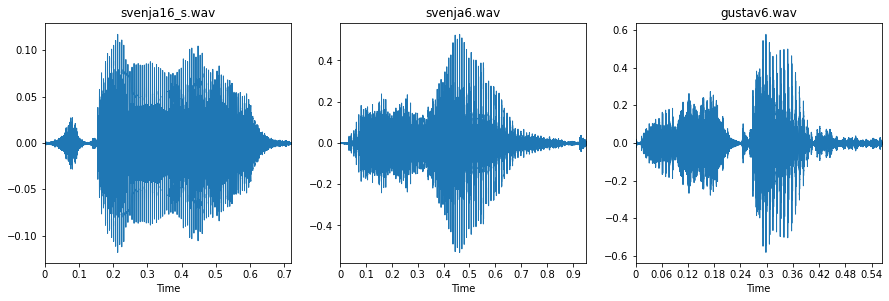

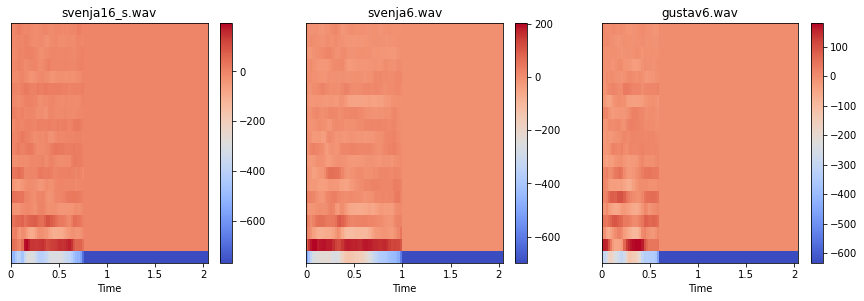

In [182]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr'

plt.figure(figsize=(15, 15))
mfcc_features={}
for i,el in enumerate (['svenja16_s.wav','svenja6.wav',"gustav6.wav"]):
    plt.subplot(3, 3, i+1)
    plt.title(el)
    librosa.display.waveplot(data_com[el]["raw_data"], sr=sr) 
    print(el)
    IPython.display.display(data_com[el]["audio"])

plt.show()  
plt.figure(figsize=(15, 15))
for i,el in enumerate (['svenja16_s.wav','svenja6.wav',"gustav6.wav"]):
    plt.subplot(3, 3, i+1)
    plt.title(el)
    librosa.display.specshow(data_com[el]["feature"], x_axis='time')
    plt.colorbar()

In [9]:
print(data_dict.keys())
data_raw["gustav18_s.wav"]

dict_keys(['svenja16_s.wav', 'svenja14_s.wav', 'svenja3.wav', 'svenja21_s.wav', 'svenja_20_s.wav', 'svenja4.wav', 'svenja9.wav', 'sevenja5.wav', 'svenja6.wav', 'svenja8.wav', 'svenja11_s.wav', 'svenja1.wav', 'svenja17_s.wav', 'svenja19_s.wav', 'svenja18_s.wav', 'svenja13_s.wav', 'svenja22_s.wav', 'svenja2.wav', 'svenja7.wav', 'svenja12_s.wav', 'svenja10.wav', 'svenja15_s.wav', 'gustav8.wav', 'gustav18_s.wav', 'gustav13_s.wav', 'gustav14_s.wav', 'gustav17_s.wav', 'gustav11_s.wav', 'gustav15_s.wav', 'gustav9_s.wav', 'gustav2.wav', 'gustav19_s.wav', 'gustav16_s.wav', 'gustav3.wav', 'gustav5.wav', 'gustav6.wav', 'gustav20_s.wav', 'gustav4.wav', 'gustav1.wav', 'gustav12_s.wav', 'gustav7.wav', 'gustav10_s.wav', 'hello2.wav', 'hello1.wav', 'hello4.wav', 'hello.wav', 'hello3.wav'])


# Build classifier

In [186]:
 data_dict["gustav5.wav"].shape

(1760,)

In [184]:
import numpy as np
X = np.array([
              data_dict["gustav5.wav"],
              data_dict["gustav4.wav"],
              data_dict["gustav3.wav"],
              data_dict["gustav18_s.wav"],
              data_dict["gustav17_s.wav"],
              data_dict["gustav14_s.wav"],
              data_dict["svenja3.wav"],
             data_dict["svenja3.wav"]]
            )
Y = np.array([1,1,1,2,2,2,3,3])
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)
print(clf.predict([data_dict["gustav15_s.wav"]]))
print(clf.predict_log_proba([data_dict["gustav15_s.wav"]]))


[2]
[[-1.23110458e+04  0.00000000e+00 -5.42608557e+10]]
